In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets                       # package for plotting 
using CSV
using DelimitedFiles
using Statistics

In [2]:
using Pkg
Pkg.status("JWAS")

    Status `/opt/julia/environments/v1.1/Project.toml`
  [c9a035f4] JWAS v0.8.5 #master (https://github.com/reworkhow/JWAS.jl.git)


In [24]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Exp_0.75_Complete.dat", 
    types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"] )
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,String,String,String⍰
1,0001,1,1,1B,A,1B_1715,FALSE,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,FALSE,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,FALSE,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,FALSE,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,FALSE,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,FALSE,1B_D02,1B_D02


In [25]:
phenotypes= dropmissing(phenotypes, :NurPenBatch)
phenotypes= dropmissing(phenotypes, :QNurPenBatch)
phenotypes

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,String,String,String
1,0001,1,1,1B,A,1B_1715,FALSE,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,FALSE,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,FALSE,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,FALSE,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,FALSE,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,FALSE,1B_D02,1B_D02


In [26]:
Nur2ADG_model_equations = "Nur2ADG = intercept + Batch + Died + EntryAge + NurPenBatch + SowID
                           Nur1ADG = intercept + Batch + EntryAge + QNurPenBatch + SowID"
Nur2ADG_R=[0.115504E-01 0
           0 0.115504E-01]
Nur2ADG_model=build_model(Nur2ADG_model_equations,Nur2ADG_R);

In [27]:
set_covariate(Nur2ADG_model,"EntryAge")

1-element Array{Symbol,1}:
 :EntryAge

In [28]:
Nur2ADG_G1=0.107150E-02
set_random(Nur2ADG_model,"NurPenBatch",Nur2ADG_G1)
Nur2ADG_G12=0.107150E-02
set_random(Nur2ADG_model,"QNurPenBatch",Nur2ADG_G12)

NurPenBatch is not found in model equation 2.
QNurPenBatch is not found in model equation 1.


In [29]:
Nur2ADG_G2=[0.927471E-03 0
           0 0.927471E-03]
set_random(Nur2ADG_model,"SowID",Nur2ADG_G2)

In [2]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 18.545937 seconds (37.31 k allocations: 10.393 GiB, 0.08% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [31]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [32]:
Nur2ADG_G3=[0.295395E-02  0
            0 0.295395E-02]
@time add_genotypes(Nur2ADG_model,M,Nur2ADG_G3,header=false, rowID=rowID)

The header (marker IDs) is set to 1,2,...,#markers
435172 markers on 3205 individuals were added.
 37.686375 seconds (6.81 M allocations: 15.931 GiB, 0.45% gc time)


In [33]:
@time Nur2ADG_outB=runMCMC(Nur2ADG_model,phenotypes,methods="BayesB", missing_phenotypes=true,
    estimatePi=false,Pi=Dict([1.0; 1.0]=>0.001,[1.0; 0.0]=>0.001,[0.0; 1.0]=>0.001,[0.0; 0.0]=>0.998),
    estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true, 
    output_samples_frequency=100)

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
The number of observations with both genotypes and phenotypes used in the analysis is 3181.

The prior for marker effects covariance matrix is calculated from genetic covariance matrix and Π.
The mean of the prior for the marker effects covariance matrix is:
 9.0e-6  0.0   
 0.0     9.0e-6



A Linear Mixed Model was build using model equations:

Nur2ADG = intercept + Batch + Died + EntryAge + NurPenBatch + SowID
Nur1ADG = intercept + Batch + EntryAge + QNurPenBatch + SowID

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               50
Died            factor       fixed                2
EntryAge        covariate    fixed                1
NurPenBatch     factor       random             436
SowID           factor       random            1119
QNurPenBatch    factor       ra

running MCMC for BayesB...100%|█████████████████████████| Time: 4 days, 8:23:20




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


375850.082442 seconds (2.61 T allocations: 143.304 TiB, 25.80% gc time)


Dict{Any,Any} with 9 entries:
  "marker effects"          => 870344×5 DataFrame…
  "EBV_Nur1ADG"             => 3205×3 DataFrame…
  "EBV_Nur2ADG"             => 3205×3 DataFrame…
  "heritability"            => 2×3 DataFrame…
  "location parameters"     => 3537×5 DataFrame…
  "residual variance"       => 4×3 DataFrame…
  "ScaleEffectVar"          => 4×3 DataFrame…
  "genetic_variance"        => 4×3 DataFrame…
  "marker effects variance" => 4×3 DataFrame…

In [34]:
@time Nur2ADG_outB,Nur2ADG_winVarProps = GWAS("MCMC_samples_marker_effects_Nur2ADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    Nur2ADG_model;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:22:32


BoundsError: BoundsError: attempt to access (2398×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA    │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64 │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼─────────┼───────────┤
│ 1    │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 0.000130229    │ 0.000103378 │ 4.71     │ 0.844   │ 0.844     │
│ 2    │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 6.69778e-5     │ 9.21311e-5  │ 2.4      │ 0.65    │ 0.747     │
│ 3    │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 2.26288e-5     │ 3.71279e-5  │ 0.82     │ 0.576   │ 0.69      │
│ 4    │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 1.74176e-5     │ 2.89024e-5  │ 0.64     │ 0.554   │ 0.656     │
│ 5    │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 1.18544e-5     │ 1.76718e-5  │ 0.44     │ 0.548   │ 0.6344    │
│ 6    │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 3.11093e-5     │ 4.67935e-5  │ 1.11     │ 0.536   │ 0.618     │
│ 7    │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 3.42932e-5     │ 6.15851e-5  │ 1.23     │ 0.458   │ 0.595143  │
│ 8    │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 7.31239e-6     │ 1.16239e-5  │ 0.27     │ 0.448   │ 0.57675   │
│ 9    │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 8.529e-6       │ 1.7877e-5   │ 0.31     │ 0.362   │ 0.552889  │
│ 10   │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 4.62465e-6     │ 1.0009e-5   │ 0.17     │ 0.336   │ 0.5312    │
│ 11   │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 5.90461e-6     │ 1.26148e-5  │ 0.21     │ 0.33    │ 0.512909  │
│ 12   │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 5.36504e-6     │ 1.19438e-5  │ 0.19     │ 0.32    │ 0.496833  │
│ 13   │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 6.50214e-6     │ 1.52618e-5  │ 0.24     │ 0.314   │ 0.482769  │
│ 14   │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 7.20366e-6     │ 2.04462e-5  │ 0.26     │ 0.314   │ 0.470714  │
│ 15   │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 5.29719e-6     │ 1.21596e-5  │ 0.19     │ 0.3     │ 0.459333  │
│ 16   │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 9.78202e-6     │ 2.43161e-5  │ 0.35     │ 0.3     │ 0.449375  │
│ 17   │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 4.53602e-6     │ 9.69864e-6  │ 0.17     │ 0.294   │ 0.440235  │
│ 18   │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 6.60594e-6     │ 1.67073e-5  │ 0.24     │ 0.29    │ 0.431889  │
│ 19   │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 3.75975e-6     │ 8.93485e-6  │ 0.13     │ 0.288   │ 0.424316  │
│ 20   │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 4.83934e-6     │ 1.13682e-5  │ 0.17     │ 0.288   │ 0.4175    │
│ 21   │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 3.73274e-6     │ 1.09073e-5  │ 0.14     │ 0.28    │ 0.410952  │
│ 22   │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 4.92501e-6     │ 1.1889e-5   │ 0.18     │ 0.274   │ 0.404727  │
│ 23   │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 5.75341e-6     │ 1.46315e-5  │ 0.21     │ 0.272   │ 0.398957  │
│ 24   │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 3.58906e-6     │ 7.89379e-6  │ 0.13     │ 0.27    │ 0.393583  │
│ 25   │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 4.63819e-6     │ 1.131e-5    │ 0.17     │ 0.268   │ 0.38856   │
│ 26   │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 3.41255e-6     │ 9.34138e-6  │ 0.12     │ 0.264   │ 0.383769  │
│ 27   │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 4.37549e-6     │ 1.07853e-5  │ 0.16     │ 0.26    │ 0.379185  │
│ 28   │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 2.82022e-6     │ 6.33899e-6  │ 0.1      │ 0.254   │ 0.374714  │
│ 29   │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 3.70686e-6     │ 9.06873e-6  │ 0.13     │ 0.254   │ 0.370552  │
│ 30   │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 4.9958e-6      │ 1.29869e-5  │ 0.18     │ 0.252   │ 0.3666    │
│ 31   │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 3.59571e-6     │ 8.89849e-6  │ 0.13     │ 0.248   │ 0.362774  │
│ 32   │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 4.02181e-6     │ 1.04214e-5  │ 0.15     │ 0.248   │ 0.359187  │
│ 33   │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 3.2822e-6      │ 7.8194e-6   │ 0.12     │ 0.246   │ 0.355758  │
│ 34   │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 3.42579e-6     │ 9.66708e-6  │ 0.13     │ 0.244   │ 0.352471  │
│ 35   │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 6.72222e-6     │ 1.87268e-5  │ 0.24     │ 0.244   │ 0.349371  │
│ 36   │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 5.06876e-6     │ 1.62673e-5  │ 0.18     │ 0.242   │ 0.346389  │
│ 37   │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 3.2764e-6      │ 7.99694e-6  │ 0.12     │ 0.242   │ 0.343568  │
│ 38   │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 2.54664e-6     │ 5.3646e-6   │ 0.09     │ 0.242   │ 0.340895  │
│ 39   │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 6.97091e-6     │ 2.3378e-5   │ 0.25     │ 0.24    │ 0.338308  │
│ 40   │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 5.03931e-6     │ 1.51447e-5  │ 0.18     │ 0.238   │ 0.3358    │
│ 41   │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 3.1934e-6      │ 8.54712e-6  │ 0.12     │ 0.236   │ 0.333366  │
│ 42   │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 3.67079e-6     │ 9.13488e-6  │ 0.14     │ 0.236   │ 0.331048  │
│ 43   │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 3.97727e-6     │ 1.09859e-5  │ 0.14     │ 0.236   │ 0.328837  │
│ 44   │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 3.14555e-6     │ 8.02084e-6  │ 0.11     │ 0.232   │ 0.326636  │
│ 45   │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 3.49354e-6     │ 8.18582e-6  │ 0.13     │ 0.23    │ 0.324489  │
│ 46   │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 3.82927e-6     │ 1.19365e-5  │ 0.14     │ 0.23    │ 0.322435  │
│ 47   │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 3.522e-6       │ 1.00919e-5  │ 0.13     │ 0.226   │ 0.320383  │
│ 48   │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 3.83779e-6     │ 1.21592e-5  │ 0.14     │ 0.226   │ 0.318417  │
│ 49   │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 2.55061e-6     │ 6.81385e-6  │ 0.09     │ 0.226   │ 0.316531  │
│ 50   │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 3.19899e-6     │ 7.7869e-6   │ 0.11     │ 0.226   │ 0.31472   │
│ 51   │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 2.78087e-6     │ 6.87471e-6  │ 0.1      │ 0.224   │ 0.312941  │
│ 52   │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 3.40721e-6     │ 1.06261e-5  │ 0.12     │ 0.224   │ 0.311231  │
│ 53   │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 1.94569e-6     │ 4.12238e-6  │ 0.07     │ 0.222   │ 0.309547  │
│ 54   │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 2.49789e-6     │ 5.87691e-6  │ 0.09     │ 0.222   │ 0.307926  │
│ 55   │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 3.5766e-6      │ 9.77815e-6  │ 0.13     │ 0.22    │ 0.306327  │
│ 56   │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 3.88739e-6     │ 1.05424e-5  │ 0.14     │ 0.218   │ 0.30475   │
│ 57   │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 4.45847e-6     │ 1.28947e-5  │ 0.16     │ 0.216   │ 0.303193  │
│ 58   │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 3.15184e-6     │ 1.01728e-5  │ 0.12     │ 0.216   │ 0.30169   │
│ 59   │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 3.4568e-6      │ 9.96488e-6  │ 0.13     │ 0.216   │ 0.300237  │
│ 60   │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 2.52676e-6     │ 6.28914e-6  │ 0.09     │ 0.214   │ 0.2988    │
│ 61   │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 4.07669e-6     │ 1.12992e-5  │ 0.15     │ 0.214   │ 0.29741   │
│ 62   │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 3.72339e-6     │ 1.31101e-5  │ 0.13     │ 0.214   │ 0.296065  │
│ 63   │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 3.33172e-6     │ 9.11754e-6  │ 0.12     │ 0.214   │ 0.294762  │
│ 64   │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 2.86702e-6     │ 8.00686e-6  │ 0.11     │ 0.214   │ 0.2935    │
│ 65   │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 2.91441e-6     │ 7.56114e-6  │ 0.11     │ 0.214   │ 0.292277  │
│ 66   │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 2.53836e-6     │ 6.75972e-6  │ 0.09     │ 0.212   │ 0.291061  │
│ 67   │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 2.52189e-6     │ 5.93146e-6  │ 0.09     │ 0.212   │ 0.289881  │
│ 68   │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 2.85922e-6     │ 8.51496e-6  │ 0.1      │ 0.212   │ 0.288735  │
│ 69   │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 2.15805e-6     │ 6.77531e-6  │ 0.08     │ 0.21    │ 0.287594  │
│ 70   │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 3.34135e-6     │ 1.00226e-5  │ 0.12     │ 0.21    │ 0.286486  │
│ 71   │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 2.61049e-6     │ 6.99415e-6  │ 0.1      │ 0.208   │ 0.28538   │
│ 72   │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 2.18041e-6     │ 5.06824e-6  │ 0.08     │ 0.208   │ 0.284306  │
│ 73   │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 1.98069e-6     │ 4.32237e-6  │ 0.07     │ 0.208   │ 0.28326   │
│ 74   │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 3.31632e-6     │ 9.47694e-6  │ 0.12     │ 0.206   │ 0.282216  │
│ 75   │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 3.01898e-6     │ 8.48613e-6  │ 0.11     │ 0.206   │ 0.2812    │
│ 76   │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 2.5206e-6      │ 6.95334e-6  │ 0.09     │ 0.204   │ 0.280184  │
│ 77   │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 6.00284e-6     │ 1.76562e-5  │ 0.22     │ 0.202   │ 0.279169  │
│ 78   │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 2.69962e-6     │ 7.60344e-6  │ 0.1      │ 0.202   │ 0.278179  │
│ 79   │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 2.01976e-6     │ 4.25809e-6  │ 0.07     │ 0.202   │ 0.277215  │
│ 80   │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 2.63783e-6     │ 7.46205e-6  │ 0.1      │ 0.202   │ 0.276275  │
│ 81   │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 2.66187e-6     │ 7.44603e-6  │ 0.1      │ 0.2     │ 0.275333  │
│ 82   │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 3.60581e-6     │ 1.13459e-5  │ 0.13     │ 0.2     │ 0.274415  │
│ 83   │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 2.40416e-6     │ 6.81832e-6  │ 0.09     │ 0.198   │ 0.273494  │
│ 84   │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 2.56236e-6     │ 7.39662e-6  │ 0.09     │ 0.198   │ 0.272595  │
│ 85   │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 2.89076e-6     │ 8.50259e-6  │ 0.1      │ 0.198   │ 0.271718  │
│ 86   │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 2.67193e-6     │ 7.68871e-6  │ 0.1      │ 0.196   │ 0.270837  │
│ 87   │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 2.07514e-6     │ 5.08372e-6  │ 0.08     │ 0.194   │ 0.269954  │
│ 88   │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 2.68073e-6     │ 7.72416e-6  │ 0.1      │ 0.194   │ 0.269091  │
│ 89   │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 2.09715e-6     │ 5.03345e-6  │ 0.08     │ 0.192   │ 0.268225  │
│ 90   │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 1.90278e-6     │ 5.15813e-6  │ 0.07     │ 0.192   │ 0.267378  │
│ 91   │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 2.68926e-6     │ 7.6156e-6   │ 0.1      │ 0.192   │ 0.266549  │
│ 92   │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 3.05444e-6     │ 9.66888e-6  │ 0.11     │ 0.192   │ 0.265739  │
│ 93   │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 2.93084e-6     │ 7.85493e-6  │ 0.11     │ 0.192   │ 0.264946  │
│ 94   │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 2.14056e-6     │ 5.61772e-6  │ 0.08     │ 0.19    │ 0.264149  │
│ 95   │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 2.1966e-6      │ 6.13087e-6  │ 0.08     │ 0.19    │ 0.263368  │
│ 96   │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 2.7486e-6      │ 8.068e-6    │ 0.1      │ 0.19    │ 0.262604  │
│ 97   │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 2.07534e-6     │ 5.99696e-6  │ 0.08     │ 0.19    │ 0.261856  │
│ 98   │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 2.35157e-6     │ 6.14116e-6  │ 0.09     │ 0.19    │ 0.261122  │
│ 99   │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 2.39392e-6     │ 6.88117e-6  │ 0.09     │ 0.19    │ 0.260404  │
│ 100  │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 2.07497e-6     │ 5.93061e-6  │ 0.07     │ 0.19    │ 0.2597    │
│ 101  │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 2.66041e-6     │ 8.6477e-6   │ 0.1      │ 0.19    │ 0.25901   │
│ 102  │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 1.65264e-6     │ 3.74118e-6  │ 0.06     │ 0.188   │ 0.258314  │
│ 103  │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 2.39291e-6     │ 7.22631e-6  │ 0.09     │ 0.188   │ 0.257631  │
│ 104  │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 2.34803e-6     │ 6.78471e-6  │ 0.09     │ 0.188   │ 0.256962  │
│ 105  │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 3.02599e-6     │ 1.01493e-5  │ 0.11     │ 0.188   │ 0.256305  │
│ 106  │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 2.92292e-6     │ 8.55489e-6  │ 0.11     │ 0.186   │ 0.255642  │
│ 107  │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 2.10559e-6     │ 6.36264e-6  │ 0.08     │ 0.186   │ 0.254991  │
│ 108  │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 2.69486e-6     │ 7.61844e-6  │ 0.1      │ 0.186   │ 0.254352  │
│ 109  │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 1.94741e-6     │ 4.57289e-6  │ 0.07     │ 0.186   │ 0.253725  │
│ 110  │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 2.34229e-6     │ 6.71331e-6  │ 0.08     │ 0.186   │ 0.253109  │
│ 111  │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 2.17415e-6     │ 5.696e-6    │ 0.08     │ 0.184   │ 0.252486  │
│ 112  │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 2.1124e-6      │ 5.27737e-6  │ 0.08     │ 0.184   │ 0.251875  │
│ 113  │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 1.98231e-6     │ 5.04306e-6  │ 0.07     │ 0.184   │ 0.251274  │
│ 114  │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 2.09116e-6     │ 5.23123e-6  │ 0.08     │ 0.182   │ 0.250667  │
│ 115  │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 2.60505e-6     │ 8.99683e-6  │ 0.09     │ 0.182   │ 0.25007   │
│ 116  │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 1.9714e-6      │ 5.10416e-6  │ 0.07     │ 0.182   │ 0.249483  │
│ 117  │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 3.90095e-6     │ 1.36403e-5  │ 0.14     │ 0.182   │ 0.248906  │
│ 118  │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 2.64392e-6     │ 8.05801e-6  │ 0.09     │ 0.182   │ 0.248339  │
│ 119  │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 2.08635e-6     │ 6.072e-6    │ 0.07     │ 0.182   │ 0.247782  │
│ 120  │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 1.9064e-6      │ 5.72413e-6  │ 0.07     │ 0.182   │ 0.247233  │
│ 121  │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 2.44429e-6     │ 6.21694e-6  │ 0.09     │ 0.182   │ 0.246694  │
│ 122  │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 1.95479e-6     │ 5.22123e-6  │ 0.07     │ 0.182   │ 0.246164  │
│ 123  │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 2.55263e-6     │ 6.93594e-6  │ 0.09     │ 0.18    │ 0.245626  │
│ 124  │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 1.98369e-6     │ 5.97387e-6  │ 0.07     │ 0.18    │ 0.245097  │
│ 125  │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 2.6425e-6      │ 8.26128e-6  │ 0.09     │ 0.18    │ 0.244576  │
│ 126  │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 2.49706e-6     │ 8.17077e-6  │ 0.09     │ 0.18    │ 0.244063  │
│ 127  │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 2.39372e-6     │ 7.50467e-6  │ 0.09     │ 0.18    │ 0.243559  │
│ 128  │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 1.86906e-6     │ 4.80233e-6  │ 0.07     │ 0.18    │ 0.243063  │
│ 129  │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 2.27306e-6     │ 6.10329e-6  │ 0.08     │ 0.18    │ 0.242574  │
│ 130  │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 2.39971e-6     │ 6.71645e-6  │ 0.09     │ 0.178   │ 0.242077  │
│ 131  │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 2.58372e-6     │ 7.73514e-6  │ 0.09     │ 0.176   │ 0.241573  │
│ 132  │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 2.15882e-6     │ 6.50024e-6  │ 0.08     │ 0.176   │ 0.241076  │
│ 133  │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 1.92498e-6     │ 5.2883e-6   │ 0.07     │ 0.176   │ 0.240586  │
│ 134  │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 2.10427e-6     │ 7.55988e-6  │ 0.08     │ 0.176   │ 0.240104  │
│ 135  │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 1.83974e-6     │ 4.58157e-6  │ 0.07     │ 0.176   │ 0.23963   │
│ 136  │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 2.38147e-6     │ 7.81454e-6  │ 0.09     │ 0.176   │ 0.239162  │
│ 137  │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 2.14928e-6     │ 6.50647e-6  │ 0.08     │ 0.174   │ 0.238686  │
│ 138  │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 1.58998e-6     │ 3.9134e-6   │ 0.06     │ 0.174   │ 0.238217  │
│ 139  │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 1.71213e-6     │ 4.38585e-6  │ 0.06     │ 0.174   │ 0.237755  │
│ 140  │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 2.25795e-6     │ 7.34824e-6  │ 0.08     │ 0.174   │ 0.2373    │
│ 141  │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 2.23278e-6     │ 6.62865e-6  │ 0.08     │ 0.174   │ 0.236851  │
│ 142  │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 1.99307e-6     │ 5.42443e-6  │ 0.07     │ 0.174   │ 0.236408  │
│ 143  │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 2.434e-6       │ 7.15557e-6  │ 0.09     │ 0.174   │ 0.235972  │
│ 144  │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 1.68333e-6     │ 3.93524e-6  │ 0.06     │ 0.174   │ 0.235542  │
│ 145  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 2.02068e-6     │ 6.16223e-6  │ 0.07     │ 0.174   │ 0.235117  │
│ 146  │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 1.73112e-6     │ 5.28455e-6  │ 0.06     │ 0.174   │ 0.234699  │
│ 147  │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 2.03949e-6     │ 5.98788e-6  │ 0.07     │ 0.174   │ 0.234286  │
│ 148  │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 5.19084e-6     │ 2.36384e-5  │ 0.19     │ 0.172   │ 0.233865  │
│ 149  │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 2.13953e-6     │ 5.97132e-6  │ 0.08     │ 0.172   │ 0.23345   │
│ 150  │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 2.85155e-6     │ 8.58082e-6  │ 0.1      │ 0.172   │ 0.23304   │
│ 151  │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 1.77196e-6     │ 4.77331e-6  │ 0.06     │ 0.172   │ 0.232636  │
│ 152  │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 1.68516e-6     │ 4.03681e-6  │ 0.06     │ 0.172   │ 0.232237  │
│ 153  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 2.04858e-6     │ 5.43222e-6  │ 0.07     │ 0.172   │ 0.231843  │
│ 154  │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 1.65063e-6     │ 4.4086e-6   │ 0.06     │ 0.172   │ 0.231455  │
│ 155  │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 4.53742e-6     │ 1.42598e-5  │ 0.16     │ 0.172   │ 0.231071  │
│ 156  │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 2.07162e-6     │ 6.31288e-6  │ 0.08     │ 0.172   │ 0.230692  │
│ 157  │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 1.87798e-6     │ 5.4086e-6   │ 0.07     │ 0.172   │ 0.230318  │
│ 158  │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 1.5035e-6      │ 3.70443e-6  │ 0.06     │ 0.172   │ 0.229949  │
│ 159  │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 2.52089e-6     │ 8.45874e-6  │ 0.09     │ 0.17    │ 0.229572  │
│ 160  │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 2.17693e-6     │ 6.82426e-6  │ 0.08     │ 0.17    │ 0.2292    │
│ 161  │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 2.34034e-6     │ 6.29892e-6  │ 0.09     │ 0.17    │ 0.228832  │
│ 162  │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 1.73382e-6     │ 5.04932e-6  │ 0.06     │ 0.17    │ 0.228469  │
│ 163  │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 2.46678e-6     │ 8.28939e-6  │ 0.09     │ 0.17    │ 0.22811   │
│ 164  │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 1.53326e-6     │ 3.55006e-6  │ 0.06     │ 0.168   │ 0.227744  │
│ 165  │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 1.69596e-6     │ 4.15923e-6  │ 0.06     │ 0.168   │ 0.227382  │
│ 166  │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 1.71924e-6     │ 4.39751e-6  │ 0.06     │ 0.168   │ 0.227024  │
│ 167  │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 2.16049e-6     │ 5.90992e-6  │ 0.08     │ 0.168   │ 0.226671  │
│ 168  │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 1.61832e-6     │ 4.22814e-6  │ 0.06     │ 0.168   │ 0.226321  │
│ 169  │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 2.35892e-6     │ 8.26789e-6  │ 0.08     │ 0.168   │ 0.225976  │
│ 170  │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 1.53213e-6     │ 3.73614e-6  │ 0.06     │ 0.168   │ 0.225635  │
│ 171  │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 1.92392e-6     │ 5.59807e-6  │ 0.07     │ 0.166   │ 0.225287  │
│ 172  │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 1.90053e-6     │ 5.55897e-6  │ 0.07     │ 0.166   │ 0.224942  │
│ 173  │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 2.69279e-6     │ 8.72199e-6  │ 0.1      │ 0.166   │ 0.224601  │
│ 174  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 1.76174e-6     │ 4.60669e-6  │ 0.06     │ 0.166   │ 0.224264  │
│ 175  │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 1.62744e-6     │ 4.0157e-6   │ 0.06     │ 0.166   │ 0.223931  │
│ 176  │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 2.00277e-6     │ 6.08835e-6  │ 0.08     │ 0.166   │ 0.223602  │
│ 177  │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 1.51272e-6     │ 3.70135e-6  │ 0.06     │ 0.164   │ 0.223266  │
│ 178  │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 1.96907e-6     │ 5.79836e-6  │ 0.07     │ 0.164   │ 0.222933  │
│ 179  │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 1.80776e-6     │ 5.32434e-6  │ 0.07     │ 0.164   │ 0.222603  │
│ 180  │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 1.87595e-6     │ 5.87124e-6  │ 0.07     │ 0.164   │ 0.222278  │
│ 181  │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 1.99399e-6     │ 5.85185e-6  │ 0.07     │ 0.164   │ 0.221956  │
│ 182  │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 2.27657e-6     │ 7.55523e-6  │ 0.08     │ 0.164   │ 0.221637  │
│ 183  │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 2.12997e-6     │ 6.15279e-6  │ 0.08     │ 0.164   │ 0.221322  │
│ 184  │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 2.44918e-6     │ 7.55286e-6  │ 0.09     │ 0.164   │ 0.221011  │
│ 185  │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 3.61451e-6     │ 1.28007e-5  │ 0.13     │ 0.164   │ 0.220703  │
│ 186  │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 1.75295e-6     │ 4.6878e-6   │ 0.06     │ 0.164   │ 0.220398  │
│ 187  │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 2.32035e-6     │ 6.94445e-6  │ 0.08     │ 0.162   │ 0.220086  │
│ 188  │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 3.08864e-6     │ 1.02919e-5  │ 0.11     │ 0.162   │ 0.219777  │
│ 189  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 2.11498e-6     │ 7.23923e-6  │ 0.08     │ 0.162   │ 0.219471  │
│ 190  │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 2.19516e-6     │ 6.74884e-6  │ 0.08     │ 0.162   │ 0.219168  │
│ 191  │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 2.73678e-6     │ 8.72517e-6  │ 0.1      │ 0.162   │ 0.218869  │
│ 192  │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 1.74018e-6     │ 4.90764e-6  │ 0.06     │ 0.162   │ 0.218573  │
│ 193  │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 1.40614e-6     │ 3.86965e-6  │ 0.05     │ 0.16    │ 0.218269  │
│ 194  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 1.71737e-6     │ 4.82919e-6  │ 0.06     │ 0.16    │ 0.217969  │
│ 195  │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 2.34754e-6     │ 7.76943e-6  │ 0.09     │ 0.16    │ 0.217672  │
│ 196  │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 1.62007e-6     │ 4.611e-6    │ 0.06     │ 0.16    │ 0.217378  │
│ 197  │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 1.78822e-6     │ 5.27901e-6  │ 0.07     │ 0.16    │ 0.217086  │
│ 198  │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 2.1359e-6      │ 6.87288e-6  │ 0.08     │ 0.16    │ 0.216798  │
│ 199  │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 1.52522e-6     │ 4.04787e-6  │ 0.06     │ 0.16    │ 0.216513  │
│ 200  │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 1.97386e-6     │ 5.53161e-6  │ 0.07     │ 0.16    │ 0.21623   │
│ 201  │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 1.77187e-6     │ 5.14748e-6  │ 0.06     │ 0.16    │ 0.21595   │
│ 202  │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 2.37295e-6     │ 7.62967e-6  │ 0.09     │ 0.16    │ 0.215673  │
│ 203  │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 1.82776e-6     │ 5.31466e-6  │ 0.07     │ 0.16    │ 0.215399  │
│ 204  │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 1.44424e-6     │ 3.75887e-6  │ 0.05     │ 0.16    │ 0.215127  │
│ 205  │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 1.43676e-6     │ 3.3238e-6   │ 0.05     │ 0.158   │ 0.214849  │
│ 206  │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 1.6436e-6      │ 4.92297e-6  │ 0.06     │ 0.158   │ 0.214573  │
│ 207  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 1.56422e-6     │ 4.3387e-6   │ 0.06     │ 0.158   │ 0.2143    │
│ 208  │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 2.03575e-6     │ 7.02309e-6  │ 0.07     │ 0.158   │ 0.214029  │
│ 209  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 1.67482e-6     │ 4.46399e-6  │ 0.06     │ 0.158   │ 0.213761  │
│ 210  │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 1.95557e-6     │ 5.5848e-6   │ 0.07     │ 0.158   │ 0.213495  │
│ 211  │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 1.63351e-6     │ 4.2496e-6   │ 0.06     │ 0.158   │ 0.213232  │
│ 212  │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 1.71138e-6     │ 4.8842e-6   │ 0.06     │ 0.158   │ 0.212972  │
│ 213  │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 1.69549e-6     │ 4.50854e-6  │ 0.06     │ 0.158   │ 0.212714  │
│ 214  │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 2.35247e-6     │ 7.29387e-6  │ 0.09     │ 0.158   │ 0.212458  │
│ 215  │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 1.73167e-6     │ 4.71932e-6  │ 0.06     │ 0.158   │ 0.212205  │
│ 216  │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 1.7937e-6      │ 5.1554e-6   │ 0.07     │ 0.158   │ 0.211954  │
│ 217  │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 1.84916e-6     │ 5.75933e-6  │ 0.07     │ 0.156   │ 0.211696  │
│ 218  │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 1.9444e-6      │ 5.76112e-6  │ 0.07     │ 0.156   │ 0.21144   │
│ 219  │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 2.07956e-6     │ 7.03519e-6  │ 0.07     │ 0.156   │ 0.211187  │
│ 220  │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 1.47786e-6     │ 3.73014e-6  │ 0.05     │ 0.156   │ 0.210936  │
│ 221  │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 1.86312e-6     │ 5.1217e-6   │ 0.07     │ 0.156   │ 0.210688  │
│ 222  │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 2.2154e-6      │ 7.20666e-6  │ 0.08     │ 0.156   │ 0.210441  │
│ 223  │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 1.48006e-6     │ 3.7775e-6   │ 0.05     │ 0.156   │ 0.210197  │
│ 224  │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 1.79293e-6     │ 5.05619e-6  │ 0.07     │ 0.156   │ 0.209955  │
│ 225  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 1.34297e-6     │ 3.43899e-6  │ 0.05     │ 0.154   │ 0.209707  │
│ 226  │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 1.70555e-6     │ 4.86581e-6  │ 0.06     │ 0.154   │ 0.20946   │
│ 227  │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 1.4444e-6      │ 4.1206e-6   │ 0.05     │ 0.154   │ 0.209216  │
│ 228  │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 1.5607e-6      │ 4.48536e-6  │ 0.06     │ 0.154   │ 0.208974  │
│ 229  │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 1.6364e-6      │ 6.15075e-6  │ 0.06     │ 0.154   │ 0.208734  │
│ 230  │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 1.69186e-6     │ 5.57029e-6  │ 0.06     │ 0.154   │ 0.208496  │
│ 231  │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 1.47966e-6     │ 3.97933e-6  │ 0.05     │ 0.154   │ 0.20826   │
│ 232  │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 1.974e-6       │ 5.85448e-6  │ 0.07     │ 0.154   │ 0.208026  │
│ 233  │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 2.34468e-6     │ 7.62093e-6  │ 0.09     │ 0.154   │ 0.207794  │
│ 234  │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 1.70564e-6     │ 4.33499e-6  │ 0.06     │ 0.154   │ 0.207564  │
│ 235  │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 1.58733e-6     │ 4.77318e-6  │ 0.06     │ 0.154   │ 0.207336  │
│ 236  │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 1.92688e-6     │ 6.1631e-6   │ 0.07     │ 0.152   │ 0.207102  │
│ 237  │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 1.55268e-6     │ 5.86768e-6  │ 0.06     │ 0.152   │ 0.206869  │
│ 238  │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 1.94968e-6     │ 6.30446e-6  │ 0.07     │ 0.152   │ 0.206639  │
│ 239  │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 1.54706e-6     │ 3.62959e-6  │ 0.06     │ 0.152   │ 0.20641   │
│ 240  │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 1.96369e-6     │ 6.31454e-6  │ 0.07     │ 0.152   │ 0.206183  │
│ 241  │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 1.93354e-6     │ 5.8612e-6   │ 0.07     │ 0.152   │ 0.205959  │
│ 242  │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 1.4146e-6      │ 3.45857e-6  │ 0.05     │ 0.152   │ 0.205736  │
│ 243  │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 1.76398e-6     │ 5.58487e-6  │ 0.06     │ 0.152   │ 0.205514  │
│ 244  │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 1.60506e-6     │ 4.77012e-6  │ 0.06     │ 0.152   │ 0.205295  │
│ 245  │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 1.73219e-6     │ 4.72191e-6  │ 0.06     │ 0.152   │ 0.205078  │
│ 246  │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 1.36148e-6     │ 3.18491e-6  │ 0.05     │ 0.152   │ 0.204862  │
│ 247  │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 1.60996e-6     │ 5.05227e-6  │ 0.06     │ 0.152   │ 0.204648  │
│ 248  │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 1.72597e-6     │ 4.7518e-6   │ 0.06     │ 0.15    │ 0.204427  │
│ 249  │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 1.77736e-6     │ 5.19433e-6  │ 0.06     │ 0.15    │ 0.204209  │
│ 250  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 1.59898e-6     │ 4.23982e-6  │ 0.06     │ 0.15    │ 0.203992  │
│ 251  │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 1.44246e-6     │ 3.65861e-6  │ 0.05     │ 0.15    │ 0.203777  │
│ 252  │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 2.0595e-6      │ 7.02837e-6  │ 0.08     │ 0.15    │ 0.203563  │
│ 253  │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 1.89864e-6     │ 5.64851e-6  │ 0.07     │ 0.15    │ 0.203352  │
│ 254  │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 1.62355e-6     │ 5.18257e-6  │ 0.06     │ 0.15    │ 0.203142  │
│ 255  │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 2.31262e-6     │ 7.5629e-6   │ 0.09     │ 0.15    │ 0.202933  │
│ 256  │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 1.46849e-6     │ 4.56776e-6  │ 0.05     │ 0.15    │ 0.202727  │
│ 257  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 2.00207e-6     │ 5.85162e-6  │ 0.07     │ 0.15    │ 0.202521  │
│ 258  │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 1.4462e-6      │ 4.00848e-6  │ 0.05     │ 0.15    │ 0.202318  │
│ 259  │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 1.85702e-6     │ 7.14286e-6  │ 0.07     │ 0.15    │ 0.202116  │
│ 260  │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 1.84628e-6     │ 5.67055e-6  │ 0.07     │ 0.15    │ 0.201915  │
│ 261  │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 1.96922e-6     │ 6.02995e-6  │ 0.07     │ 0.15    │ 0.201716  │
│ 262  │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 2.14664e-6     │ 6.36957e-6  │ 0.08     │ 0.15    │ 0.201519  │
│ 263  │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 1.47849e-6     │ 4.31606e-6  │ 0.05     │ 0.15    │ 0.201323  │
│ 264  │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 1.56629e-6     │ 4.98597e-6  │ 0.06     │ 0.15    │ 0.201129  │
│ 265  │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 1.2868e-6      │ 2.73848e-6  │ 0.05     │ 0.15    │ 0.200936  │
│ 266  │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 1.74032e-6     │ 4.94795e-6  │ 0.06     │ 0.15    │ 0.200744  │
│ 267  │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 1.38357e-6     │ 3.64139e-6  │ 0.05     │ 0.148   │ 0.200547  │
│ 268  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 1.64736e-6     │ 5.04903e-6  │ 0.06     │ 0.148   │ 0.200351  │
│ 269  │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 1.50277e-6     │ 4.16259e-6  │ 0.05     │ 0.148   │ 0.200156  │
│ 270  │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 1.66996e-6     │ 5.04724e-6  │ 0.06     │ 0.148   │ 0.199963  │
│ 271  │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 1.5654e-6      │ 4.25473e-6  │ 0.06     │ 0.148   │ 0.199771  │
│ 272  │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 1.79516e-6     │ 6.19127e-6  │ 0.07     │ 0.148   │ 0.199581  │
│ 273  │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 1.74748e-6     │ 5.17004e-6  │ 0.06     │ 0.148   │ 0.199392  │
│ 274  │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 2.2228e-6      │ 7.54371e-6  │ 0.08     │ 0.148   │ 0.199204  │
│ 275  │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 1.62114e-6     │ 4.45157e-6  │ 0.06     │ 0.148   │ 0.199018  │
│ 276  │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 1.97063e-6     │ 6.98618e-6  │ 0.07     │ 0.146   │ 0.198826  │
│ 277  │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 1.36296e-6     │ 3.33604e-6  │ 0.05     │ 0.146   │ 0.198635  │
│ 278  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 1.64672e-6     │ 5.13403e-6  │ 0.06     │ 0.146   │ 0.198446  │
│ 279  │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 1.88368e-6     │ 6.0345e-6   │ 0.07     │ 0.146   │ 0.198258  │
│ 280  │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 1.59936e-6     │ 4.26146e-6  │ 0.06     │ 0.146   │ 0.198071  │
│ 281  │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 2.72995e-6     │ 1.00144e-5  │ 0.1      │ 0.146   │ 0.197886  │
│ 282  │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 1.43969e-6     │ 3.73347e-6  │ 0.05     │ 0.146   │ 0.197702  │
│ 283  │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 1.53769e-6     │ 4.33223e-6  │ 0.06     │ 0.146   │ 0.197519  │
│ 284  │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 1.53227e-6     │ 4.53254e-6  │ 0.05     │ 0.146   │ 0.197338  │
│ 285  │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 1.76215e-6     │ 6.9869e-6   │ 0.06     │ 0.146   │ 0.197158  │
│ 286  │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 1.63006e-6     │ 5.69528e-6  │ 0.06     │ 0.146   │ 0.196979  │
│ 287  │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 1.3199e-6      │ 3.59061e-6  │ 0.05     │ 0.146   │ 0.196801  │
│ 288  │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 1.22388e-6     │ 3.26695e-6  │ 0.04     │ 0.146   │ 0.196625  │
│ 289  │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 2.05163e-6     │ 8.22479e-6  │ 0.07     │ 0.146   │ 0.19645   │
│ 290  │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 1.46334e-6     │ 3.72797e-6  │ 0.05     │ 0.146   │ 0.196276  │
│ 291  │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 1.83402e-6     │ 5.93383e-6  │ 0.07     │ 0.146   │ 0.196103  │
│ 292  │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 1.78824e-6     │ 5.45382e-6  │ 0.06     │ 0.146   │ 0.195932  │
│ 293  │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 2.38869e-6     │ 8.87327e-6  │ 0.09     │ 0.144   │ 0.195754  │
│ 294  │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 2.1342e-6      │ 7.43539e-6  │ 0.08     │ 0.144   │ 0.195578  │
│ 295  │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 3.16614e-6     │ 1.17824e-5  │ 0.12     │ 0.144   │ 0.195403  │
│ 296  │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 1.59186e-6     │ 4.3104e-6   │ 0.06     │ 0.144   │ 0.19523   │
│ 297  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 1.6466e-6      │ 4.56239e-6  │ 0.06     │ 0.144   │ 0.195057  │
│ 298  │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 1.71611e-6     │ 5.32747e-6  │ 0.06     │ 0.144   │ 0.194886  │
│ 299  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 1.34555e-6     │ 4.26256e-6  │ 0.05     │ 0.144   │ 0.194716  │
│ 300  │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 1.5999e-6      │ 4.73681e-6  │ 0.06     │ 0.144   │ 0.194547  │
│ 301  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 1.57121e-6     │ 4.95529e-6  │ 0.06     │ 0.144   │ 0.194379  │
│ 302  │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 1.79146e-6     │ 6.15204e-6  │ 0.07     │ 0.144   │ 0.194212  │
│ 303  │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 1.52841e-6     │ 4.26298e-6  │ 0.05     │ 0.142   │ 0.19404   │
│ 304  │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 1.76155e-6     │ 5.61606e-6  │ 0.06     │ 0.142   │ 0.193868  │
│ 305  │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 1.38802e-6     │ 3.95146e-6  │ 0.05     │ 0.142   │ 0.193698  │
│ 306  │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 1.48837e-6     │ 4.44078e-6  │ 0.05     │ 0.142   │ 0.193529  │
│ 307  │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 2.14622e-6     │ 6.78739e-6  │ 0.08     │ 0.142   │ 0.193362  │
│ 308  │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 1.36212e-6     │ 3.99139e-6  │ 0.05     │ 0.142   │ 0.193195  │
│ 309  │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 1.62263e-6     │ 4.98196e-6  │ 0.06     │ 0.142   │ 0.193029  │
│ 310  │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 1.64723e-6     │ 5.49349e-6  │ 0.06     │ 0.142   │ 0.192865  │
│ 311  │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 1.42679e-6     │ 4.46973e-6  │ 0.05     │ 0.142   │ 0.192701  │
│ 312  │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 1.29494e-6     │ 3.31076e-6  │ 0.05     │ 0.142   │ 0.192538  │
│ 313  │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 1.38434e-6     │ 4.01298e-6  │ 0.05     │ 0.142   │ 0.192377  │
│ 314  │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 2.12538e-6     │ 6.71176e-6  │ 0.08     │ 0.142   │ 0.192217  │
│ 315  │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 1.39224e-6     │ 3.83816e-6  │ 0.05     │ 0.142   │ 0.192057  │
│ 316  │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 1.33132e-6     │ 3.36819e-6  │ 0.05     │ 0.142   │ 0.191899  │
│ 317  │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 1.69524e-6     │ 5.32183e-6  │ 0.06     │ 0.142   │ 0.191741  │
│ 318  │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 1.41841e-6     │ 4.09102e-6  │ 0.05     │ 0.142   │ 0.191585  │
│ 319  │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 1.74441e-6     │ 5.65552e-6  │ 0.06     │ 0.142   │ 0.191429  │
│ 320  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 1.54504e-6     │ 4.83399e-6  │ 0.06     │ 0.142   │ 0.191275  │
│ 321  │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 1.58824e-6     │ 4.826e-6    │ 0.06     │ 0.142   │ 0.191121  │
│ 322  │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 2.14026e-6     │ 8.83968e-6  │ 0.08     │ 0.14    │ 0.190963  │
│ 323  │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 1.54468e-6     │ 5.25867e-6  │ 0.06     │ 0.14    │ 0.190805  │
│ 324  │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 1.48042e-6     │ 4.32267e-6  │ 0.05     │ 0.14    │ 0.190648  │
│ 325  │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 1.33035e-6     │ 3.63827e-6  │ 0.05     │ 0.14    │ 0.190492  │
│ 326  │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 1.276e-6       │ 3.43559e-6  │ 0.05     │ 0.14    │ 0.190337  │
│ 327  │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 1.38317e-6     │ 4.12072e-6  │ 0.05     │ 0.14    │ 0.190183  │
│ 328  │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 2.0227e-6      │ 6.60719e-6  │ 0.07     │ 0.14    │ 0.19003   │
│ 329  │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 1.34902e-6     │ 3.62246e-6  │ 0.05     │ 0.14    │ 0.189878  │
│ 330  │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 1.40445e-6     │ 3.65599e-6  │ 0.05     │ 0.14    │ 0.189727  │
│ 331  │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 1.18214e-6     │ 2.6961e-6   │ 0.04     │ 0.14    │ 0.189577  │
│ 332  │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 1.3284e-6      │ 3.50213e-6  │ 0.05     │ 0.14    │ 0.189428  │
│ 333  │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 1.74376e-6     │ 5.8304e-6   │ 0.06     │ 0.14    │ 0.189279  │
│ 334  │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 1.57537e-6     │ 5.08156e-6  │ 0.06     │ 0.14    │ 0.189132  │
│ 335  │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 1.64408e-6     │ 5.10641e-6  │ 0.06     │ 0.14    │ 0.188985  │
│ 336  │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 1.26221e-6     │ 3.55282e-6  │ 0.05     │ 0.14    │ 0.188839  │
│ 337  │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 1.20992e-6     │ 3.25378e-6  │ 0.04     │ 0.14    │ 0.188694  │
│ 338  │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 1.01978e-6     │ 2.43418e-6  │ 0.04     │ 0.14    │ 0.18855   │
│ 339  │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 1.96306e-6     │ 7.71081e-6  │ 0.07     │ 0.14    │ 0.188407  │
│ 340  │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 1.83322e-6     │ 5.65086e-6  │ 0.07     │ 0.14    │ 0.188265  │
│ 341  │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 1.24483e-6     │ 3.42737e-6  │ 0.05     │ 0.138   │ 0.188117  │
│ 342  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 1.67809e-6     │ 5.44763e-6  │ 0.06     │ 0.138   │ 0.187971  │
│ 343  │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 2.03315e-6     │ 7.18561e-6  │ 0.08     │ 0.138   │ 0.187825  │
│ 344  │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 1.58285e-6     │ 5.42569e-6  │ 0.06     │ 0.138   │ 0.18768   │
│ 345  │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 1.21912e-6     │ 3.6241e-6   │ 0.04     │ 0.138   │ 0.187536  │
│ 346  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 1.29334e-6     │ 3.74947e-6  │ 0.05     │ 0.138   │ 0.187393  │
│ 347  │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 1.64741e-6     │ 4.98082e-6  │ 0.06     │ 0.138   │ 0.187251  │
│ 348  │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 1.77194e-6     │ 5.49493e-6  │ 0.06     │ 0.138   │ 0.187109  │
│ 349  │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 1.5121e-6      │ 4.25034e-6  │ 0.05     │ 0.138   │ 0.186968  │
│ 350  │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 1.56004e-6     │ 4.7936e-6   │ 0.06     │ 0.138   │ 0.186829  │
│ 351  │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 1.54929e-6     │ 4.28375e-6  │ 0.06     │ 0.138   │ 0.186689  │
│ 352  │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 1.26203e-6     │ 3.45073e-6  │ 0.05     │ 0.138   │ 0.186551  │
│ 353  │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 1.70073e-6     │ 5.54698e-6  │ 0.06     │ 0.138   │ 0.186414  │
│ 354  │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 2.2809e-6      │ 8.73135e-6  │ 0.08     │ 0.138   │ 0.186277  │
│ 355  │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 1.40415e-6     │ 3.6238e-6   │ 0.05     │ 0.138   │ 0.186141  │
│ 356  │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 1.61911e-6     │ 5.43524e-6  │ 0.06     │ 0.138   │ 0.186006  │
│ 357  │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 1.43089e-6     │ 4.01589e-6  │ 0.05     │ 0.138   │ 0.185871  │
│ 358  │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 1.82765e-6     │ 5.71708e-6  │ 0.07     │ 0.138   │ 0.185737  │
│ 359  │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 1.43555e-6     │ 3.83287e-6  │ 0.05     │ 0.138   │ 0.185604  │
│ 360  │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 2.43579e-6     │ 9.78825e-6  │ 0.09     │ 0.138   │ 0.185472  │
│ 361  │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 1.3271e-6      │ 3.76124e-6  │ 0.05     │ 0.136   │ 0.185335  │
│ 362  │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 1.52354e-6     │ 4.06122e-6  │ 0.05     │ 0.136   │ 0.185199  │
│ 363  │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 2.16549e-6     │ 7.39987e-6  │ 0.08     │ 0.136   │ 0.185063  │
│ 364  │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 1.2776e-6      │ 3.90815e-6  │ 0.05     │ 0.136   │ 0.184929  │
│ 365  │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 1.54655e-6     │ 4.53394e-6  │ 0.06     │ 0.136   │ 0.184795  │
│ 366  │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 1.36251e-6     │ 4.15212e-6  │ 0.05     │ 0.136   │ 0.184661  │
│ 367  │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 1.8688e-6      │ 5.7908e-6   │ 0.07     │ 0.136   │ 0.184529  │
│ 368  │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 1.3998e-6      │ 4.39378e-6  │ 0.05     │ 0.136   │ 0.184397  │
│ 369  │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 1.54944e-6     │ 4.29138e-6  │ 0.06     │ 0.136   │ 0.184266  │
│ 370  │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 1.37988e-6     │ 4.06351e-6  │ 0.05     │ 0.136   │ 0.184135  │
│ 371  │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 1.40169e-6     │ 3.983e-6    │ 0.05     │ 0.136   │ 0.184005  │
│ 372  │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 1.43037e-6     │ 5.06961e-6  │ 0.05     │ 0.136   │ 0.183876  │
│ 373  │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 1.71252e-6     │ 5.70246e-6  │ 0.06     │ 0.136   │ 0.183748  │
│ 374  │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 1.25358e-6     │ 3.44152e-6  │ 0.05     │ 0.136   │ 0.18362   │
│ 375  │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 1.53968e-6     │ 4.86369e-6  │ 0.06     │ 0.136   │ 0.183493  │
│ 376  │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 1.28247e-6     │ 3.49558e-6  │ 0.05     │ 0.136   │ 0.183367  │
│ 377  │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 1.6152e-6      │ 4.95136e-6  │ 0.06     │ 0.136   │ 0.183241  │
│ 378  │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 1.43815e-6     │ 3.85294e-6  │ 0.05     │ 0.136   │ 0.183116  │
│ 379  │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 1.34364e-6     │ 3.66734e-6  │ 0.05     │ 0.136   │ 0.182992  │
│ 380  │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 1.73165e-6     │ 4.94834e-6  │ 0.06     │ 0.136   │ 0.182868  │
│ 381  │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 1.71547e-6     │ 5.3375e-6   │ 0.06     │ 0.136   │ 0.182745  │
│ 382  │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 1.2509e-6      │ 3.5897e-6   │ 0.04     │ 0.136   │ 0.182623  │
│ 383  │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 1.1155e-6      │ 2.92787e-6  │ 0.04     │ 0.134   │ 0.182496  │
│ 384  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 1.43646e-6     │ 4.25918e-6  │ 0.05     │ 0.134   │ 0.18237   │
│ 385  │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 1.30235e-6     │ 3.82766e-6  │ 0.05     │ 0.134   │ 0.182244  │
│ 386  │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 1.21495e-6     │ 3.11364e-6  │ 0.04     │ 0.134   │ 0.182119  │
│ 387  │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 1.25732e-6     │ 3.65248e-6  │ 0.05     │ 0.134   │ 0.181995  │
│ 388  │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 1.46251e-6     │ 4.22817e-6  │ 0.05     │ 0.134   │ 0.181871  │
│ 389  │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 1.2849e-6      │ 3.91399e-6  │ 0.05     │ 0.134   │ 0.181748  │
│ 390  │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 1.50991e-6     │ 5.63074e-6  │ 0.05     │ 0.134   │ 0.181626  │
│ 391  │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 1.3216e-6      │ 3.60078e-6  │ 0.05     │ 0.134   │ 0.181504  │
│ 392  │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 1.61397e-6     │ 5.08563e-6  │ 0.06     │ 0.134   │ 0.181383  │
│ 393  │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 1.31115e-6     │ 3.52936e-6  │ 0.05     │ 0.134   │ 0.181262  │
│ 394  │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 1.30055e-6     │ 3.90076e-6  │ 0.05     │ 0.134   │ 0.181142  │
│ 395  │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 1.60772e-6     │ 5.45111e-6  │ 0.06     │ 0.134   │ 0.181023  │
│ 396  │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 1.85682e-6     │ 6.58725e-6  │ 0.07     │ 0.134   │ 0.180904  │
│ 397  │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 1.43745e-6     │ 4.47053e-6  │ 0.05     │ 0.134   │ 0.180786  │
│ 398  │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 1.54922e-6     │ 4.30234e-6  │ 0.06     │ 0.134   │ 0.180668  │
│ 399  │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 1.40554e-6     │ 4.25066e-6  │ 0.05     │ 0.134   │ 0.180551  │
│ 400  │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 1.45883e-6     │ 4.63895e-6  │ 0.05     │ 0.132   │ 0.18043   │
│ 401  │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 1.16544e-6     │ 3.16742e-6  │ 0.04     │ 0.132   │ 0.180309  │
│ 402  │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 1.24865e-6     │ 3.99589e-6  │ 0.05     │ 0.132   │ 0.180189  │
│ 403  │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 1.27653e-6     │ 3.58846e-6  │ 0.05     │ 0.132   │ 0.180069  │
│ 404  │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 1.23517e-6     │ 3.64742e-6  │ 0.05     │ 0.132   │ 0.17995   │
│ 405  │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 1.71617e-6     │ 5.50134e-6  │ 0.06     │ 0.132   │ 0.179832  │
│ 406  │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 1.41618e-6     │ 4.68313e-6  │ 0.05     │ 0.132   │ 0.179714  │
│ 407  │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 1.87202e-6     │ 8.21117e-6  │ 0.07     │ 0.132   │ 0.179597  │
│ 408  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 1.46347e-6     │ 4.34676e-6  │ 0.05     │ 0.132   │ 0.17948   │
│ 409  │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 1.31074e-6     │ 3.683e-6    │ 0.05     │ 0.132   │ 0.179364  │
│ 410  │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 1.53215e-6     │ 4.77835e-6  │ 0.06     │ 0.132   │ 0.179249  │
│ 411  │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 1.63251e-6     │ 5.32511e-6  │ 0.06     │ 0.132   │ 0.179134  │
│ 412  │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 1.21326e-6     │ 3.37783e-6  │ 0.04     │ 0.132   │ 0.179019  │
│ 413  │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 1.57441e-6     │ 4.80014e-6  │ 0.06     │ 0.132   │ 0.178906  │
│ 414  │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 1.07338e-6     │ 2.78748e-6  │ 0.04     │ 0.132   │ 0.178792  │
│ 415  │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 1.47319e-6     │ 4.21905e-6  │ 0.05     │ 0.132   │ 0.17868   │
│ 416  │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 1.32588e-6     │ 4.2105e-6   │ 0.05     │ 0.132   │ 0.178567  │
│ 417  │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 1.44794e-6     │ 4.59346e-6  │ 0.05     │ 0.132   │ 0.178456  │
│ 418  │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 1.5472e-6      │ 4.83333e-6  │ 0.06     │ 0.132   │ 0.178344  │
│ 419  │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 1.25654e-6     │ 3.8035e-6   │ 0.05     │ 0.132   │ 0.178234  │
│ 420  │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 1.24831e-6     │ 3.35312e-6  │ 0.05     │ 0.132   │ 0.178124  │
│ 421  │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 1.63037e-6     │ 5.75423e-6  │ 0.06     │ 0.132   │ 0.178014  │
│ 422  │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 1.28935e-6     │ 3.56033e-6  │ 0.05     │ 0.132   │ 0.177905  │
│ 423  │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 1.85285e-6     │ 6.58086e-6  │ 0.07     │ 0.132   │ 0.177797  │
│ 424  │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 1.51745e-6     │ 5.56567e-6  │ 0.05     │ 0.132   │ 0.177689  │
│ 425  │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 1.50602e-6     │ 5.68389e-6  │ 0.05     │ 0.132   │ 0.177581  │
│ 426  │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 1.18249e-6     │ 2.8043e-6   │ 0.04     │ 0.132   │ 0.177474  │
│ 427  │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 1.17418e-6     │ 2.86002e-6  │ 0.04     │ 0.132   │ 0.177368  │
│ 428  │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 1.64218e-6     │ 5.62345e-6  │ 0.06     │ 0.132   │ 0.177262  │
│ 429  │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 1.30572e-6     │ 4.22103e-6  │ 0.05     │ 0.13    │ 0.177152  │
│ 430  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 1.69853e-6     │ 5.32746e-6  │ 0.06     │ 0.13    │ 0.177042  │
│ 431  │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 1.61736e-6     │ 5.84986e-6  │ 0.06     │ 0.13    │ 0.176933  │
│ 432  │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 1.4633e-6      │ 4.60307e-6  │ 0.05     │ 0.13    │ 0.176824  │
│ 433  │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 1.56244e-6     │ 5.18662e-6  │ 0.06     │ 0.13    │ 0.176716  │
│ 434  │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 1.71498e-6     │ 6.27345e-6  │ 0.06     │ 0.13    │ 0.176608  │
│ 435  │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 1.2746e-6      │ 3.47288e-6  │ 0.05     │ 0.13    │ 0.176501  │
│ 436  │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 1.48928e-6     │ 4.56513e-6  │ 0.05     │ 0.13    │ 0.176394  │
│ 437  │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 2.01053e-6     │ 7.93438e-6  │ 0.07     │ 0.13    │ 0.176288  │
│ 438  │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 1.51016e-6     │ 5.01152e-6  │ 0.06     │ 0.13    │ 0.176183  │
│ 439  │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 1.28612e-6     │ 4.4205e-6   │ 0.05     │ 0.13    │ 0.176077  │
│ 440  │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 1.38374e-6     │ 3.92946e-6  │ 0.05     │ 0.13    │ 0.175973  │
│ 441  │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 1.46368e-6     │ 4.602e-6    │ 0.05     │ 0.13    │ 0.175868  │
│ 442  │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 1.53435e-6     │ 4.70046e-6  │ 0.06     │ 0.13    │ 0.175765  │
│ 443  │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 1.30012e-6     │ 3.65895e-6  │ 0.05     │ 0.13    │ 0.175661  │
│ 444  │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 1.38045e-6     │ 4.19119e-6  │ 0.05     │ 0.13    │ 0.175559  │
│ 445  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 1.61625e-6     │ 5.07036e-6  │ 0.06     │ 0.13    │ 0.175456  │
│ 446  │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 1.43944e-6     │ 4.17279e-6  │ 0.05     │ 0.13    │ 0.175354  │
│ 447  │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 1.03346e-6     │ 2.98608e-6  │ 0.04     │ 0.128   │ 0.175248  │
│ 448  │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 1.39706e-6     │ 4.23738e-6  │ 0.05     │ 0.128   │ 0.175143  │
│ 449  │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 1.94293e-6     │ 7.66031e-6  │ 0.07     │ 0.128   │ 0.175038  │
│ 450  │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 1.40824e-6     │ 4.48e-6     │ 0.05     │ 0.128   │ 0.174933  │
│ 451  │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 1.29351e-6     │ 3.7552e-6   │ 0.05     │ 0.128   │ 0.174829  │
│ 452  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 1.30981e-6     │ 4.33083e-6  │ 0.05     │ 0.128   │ 0.174726  │
│ 453  │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 1.75552e-6     │ 6.89471e-6  │ 0.06     │ 0.128   │ 0.174623  │
│ 454  │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 2.11552e-6     │ 8.06262e-6  │ 0.08     │ 0.128   │ 0.17452   │
│ 455  │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 2.39388e-6     │ 9.34266e-6  │ 0.09     │ 0.128   │ 0.174418  │
│ 456  │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 1.2196e-6      │ 3.59085e-6  │ 0.05     │ 0.128   │ 0.174316  │
│ 457  │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 1.73795e-6     │ 5.67794e-6  │ 0.06     │ 0.128   │ 0.174214  │
│ 458  │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 1.14868e-6     │ 3.14769e-6  │ 0.04     │ 0.128   │ 0.174114  │
│ 459  │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 1.11685e-6     │ 3.60402e-6  │ 0.04     │ 0.128   │ 0.174013  │
│ 460  │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 1.5501e-6      │ 4.64981e-6  │ 0.06     │ 0.128   │ 0.173913  │
│ 461  │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 1.28757e-6     │ 4.16967e-6  │ 0.05     │ 0.128   │ 0.173813  │
│ 462  │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 1.53591e-6     │ 4.86658e-6  │ 0.06     │ 0.128   │ 0.173714  │
│ 463  │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 1.30873e-6     │ 4.52173e-6  │ 0.05     │ 0.128   │ 0.173616  │
│ 464  │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 1.66835e-6     │ 5.06864e-6  │ 0.06     │ 0.128   │ 0.173517  │
│ 465  │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 1.59411e-6     │ 5.38297e-6  │ 0.06     │ 0.128   │ 0.173419  │
│ 466  │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 1.89901e-6     │ 7.37536e-6  │ 0.07     │ 0.128   │ 0.173322  │
│ 467  │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 1.51977e-6     │ 5.8408e-6   │ 0.06     │ 0.128   │ 0.173225  │
│ 468  │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 1.82146e-6     │ 6.37034e-6  │ 0.07     │ 0.128   │ 0.173128  │
│ 469  │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 1.42692e-6     │ 4.48313e-6  │ 0.05     │ 0.128   │ 0.173032  │
│ 470  │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 1.16893e-6     │ 3.73088e-6  │ 0.04     │ 0.128   │ 0.172936  │
│ 471  │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 1.5872e-6      │ 6.04903e-6  │ 0.06     │ 0.128   │ 0.172841  │
│ 472  │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 1.3963e-6      │ 4.87548e-6  │ 0.05     │ 0.128   │ 0.172746  │
│ 473  │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 1.54162e-6     │ 5.31702e-6  │ 0.06     │ 0.128   │ 0.172651  │
│ 474  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 1.25573e-6     │ 3.94458e-6  │ 0.05     │ 0.126   │ 0.172553  │
│ 475  │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 1.18634e-6     │ 3.32373e-6  │ 0.04     │ 0.126   │ 0.172455  │
│ 476  │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 9.80256e-7     │ 2.72437e-6  │ 0.04     │ 0.126   │ 0.172357  │
│ 477  │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 1.3494e-6      │ 4.76062e-6  │ 0.05     │ 0.126   │ 0.17226   │
│ 478  │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 1.44526e-6     │ 4.40866e-6  │ 0.05     │ 0.126   │ 0.172163  │
│ 479  │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 1.58558e-6     │ 4.71652e-6  │ 0.06     │ 0.126   │ 0.172067  │
│ 480  │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 1.29923e-6     │ 4.16404e-6  │ 0.05     │ 0.126   │ 0.171971  │
│ 481  │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 1.41761e-6     │ 4.239e-6    │ 0.05     │ 0.126   │ 0.171875  │
│ 482  │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 1.47979e-6     │ 4.55551e-6  │ 0.05     │ 0.126   │ 0.17178   │
│ 483  │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 1.39371e-6     │ 4.49558e-6  │ 0.05     │ 0.126   │ 0.171685  │
│ 484  │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 1.30729e-6     │ 3.82895e-6  │ 0.05     │ 0.126   │ 0.171591  │
│ 485  │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 1.76817e-6     │ 6.15499e-6  │ 0.06     │ 0.126   │ 0.171497  │
│ 486  │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 1.19384e-6     │ 4.23456e-6  │ 0.04     │ 0.126   │ 0.171403  │
│ 487  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 1.1507e-6      │ 3.15159e-6  │ 0.04     │ 0.126   │ 0.17131   │
│ 488  │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 1.71123e-6     │ 6.87108e-6  │ 0.06     │ 0.126   │ 0.171217  │
│ 489  │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 1.49391e-6     │ 4.72406e-6  │ 0.05     │ 0.126   │ 0.171125  │
│ 490  │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 1.22613e-6     │ 3.30812e-6  │ 0.04     │ 0.126   │ 0.171033  │
│ 491  │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 1.45329e-6     │ 4.98295e-6  │ 0.05     │ 0.126   │ 0.170941  │
│ 492  │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 1.37108e-6     │ 4.11901e-6  │ 0.05     │ 0.126   │ 0.17085   │
│ 493  │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 1.15596e-6     │ 3.5877e-6   │ 0.04     │ 0.126   │ 0.170759  │
│ 494  │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 9.97009e-7     │ 2.50095e-6  │ 0.04     │ 0.126   │ 0.170668  │
│ 495  │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 1.10105e-6     │ 2.59927e-6  │ 0.04     │ 0.126   │ 0.170578  │
│ 496  │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 1.34621e-6     │ 4.03336e-6  │ 0.05     │ 0.126   │ 0.170488  │
│ 497  │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 1.77653e-6     │ 7.70416e-6  │ 0.06     │ 0.126   │ 0.170398  │
│ 498  │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 1.25571e-6     │ 3.91773e-6  │ 0.05     │ 0.126   │ 0.170309  │
│ 499  │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 1.49703e-6     │ 5.03872e-6  │ 0.05     │ 0.126   │ 0.17022   │
│ 500  │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 1.2208e-6      │ 3.52225e-6  │ 0.04     │ 0.126   │ 0.170132  │
│ 501  │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 1.34702e-6     │ 3.96321e-6  │ 0.05     │ 0.126   │ 0.170044  │
│ 502  │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 1.20425e-6     │ 3.45613e-6  │ 0.04     │ 0.126   │ 0.169956  │
│ 503  │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 1.43119e-6     │ 5.21264e-6  │ 0.05     │ 0.126   │ 0.169869  │
│ 504  │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 1.56502e-6     │ 6.09406e-6  │ 0.06     │ 0.126   │ 0.169782  │
│ 505  │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 1.33688e-6     │ 4.67324e-6  │ 0.05     │ 0.124   │ 0.169691  │
│ 506  │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 1.64562e-6     │ 5.97656e-6  │ 0.06     │ 0.124   │ 0.169601  │
│ 507  │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 1.2902e-6      │ 4.35221e-6  │ 0.05     │ 0.124   │ 0.169511  │
│ 508  │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 1.06523e-6     │ 2.91424e-6  │ 0.04     │ 0.124   │ 0.169421  │
│ 509  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 1.11477e-6     │ 3.39233e-6  │ 0.04     │ 0.124   │ 0.169332  │
│ 510  │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 1.24317e-6     │ 3.54508e-6  │ 0.05     │ 0.124   │ 0.169243  │
│ 511  │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 1.26972e-6     │ 3.52783e-6  │ 0.05     │ 0.124   │ 0.169155  │
│ 512  │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 1.0475e-6      │ 2.81272e-6  │ 0.04     │ 0.124   │ 0.169066  │
│ 513  │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 1.54385e-6     │ 5.01593e-6  │ 0.06     │ 0.124   │ 0.168979  │
│ 514  │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 1.30565e-6     │ 3.73534e-6  │ 0.05     │ 0.124   │ 0.168891  │
│ 515  │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 1.12697e-6     │ 3.44563e-6  │ 0.04     │ 0.124   │ 0.168804  │
│ 516  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 1.505e-6       │ 4.63083e-6  │ 0.05     │ 0.124   │ 0.168717  │
│ 517  │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 2.12273e-6     │ 7.81837e-6  │ 0.08     │ 0.124   │ 0.168631  │
│ 518  │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 2.04569e-6     │ 7.19291e-6  │ 0.08     │ 0.124   │ 0.168544  │
│ 519  │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 1.11119e-6     │ 3.11088e-6  │ 0.04     │ 0.124   │ 0.168459  │
│ 520  │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 1.8128e-6      │ 6.37743e-6  │ 0.07     │ 0.124   │ 0.168373  │
│ 521  │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 1.52981e-6     │ 4.72314e-6  │ 0.05     │ 0.124   │ 0.168288  │
│ 522  │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 1.24571e-6     │ 3.69419e-6  │ 0.04     │ 0.124   │ 0.168203  │
│ 523  │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 1.93284e-6     │ 7.41266e-6  │ 0.07     │ 0.124   │ 0.168119  │
│ 524  │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 1.45247e-6     │ 5.41493e-6  │ 0.05     │ 0.124   │ 0.168034  │
│ 525  │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 1.32218e-6     │ 4.12293e-6  │ 0.05     │ 0.124   │ 0.16795   │
│ 526  │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 1.53326e-6     │ 4.84192e-6  │ 0.05     │ 0.124   │ 0.167867  │
│ 527  │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 1.29471e-6     │ 3.93053e-6  │ 0.05     │ 0.124   │ 0.167784  │
│ 528  │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 1.56854e-6     │ 5.62225e-6  │ 0.06     │ 0.124   │ 0.167701  │
│ 529  │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 1.20987e-6     │ 3.37627e-6  │ 0.04     │ 0.124   │ 0.167618  │
│ 530  │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 1.12344e-6     │ 3.09426e-6  │ 0.04     │ 0.124   │ 0.167536  │
│ 531  │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 1.25538e-6     │ 3.45717e-6  │ 0.05     │ 0.124   │ 0.167454  │
│ 532  │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 1.30305e-6     │ 3.86924e-6  │ 0.05     │ 0.124   │ 0.167372  │
│ 533  │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 1.67965e-6     │ 5.792e-6    │ 0.06     │ 0.124   │ 0.167291  │
│ 534  │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 1.46602e-6     │ 4.95693e-6  │ 0.05     │ 0.124   │ 0.16721   │
│ 535  │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 1.08733e-6     │ 2.9647e-6   │ 0.04     │ 0.124   │ 0.167129  │
│ 536  │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 1.08682e-6     │ 3.00705e-6  │ 0.04     │ 0.124   │ 0.167049  │
│ 537  │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 1.34948e-6     │ 3.82606e-6  │ 0.05     │ 0.124   │ 0.166968  │
│ 538  │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 1.28677e-6     │ 4.0053e-6   │ 0.05     │ 0.124   │ 0.166888  │
│ 539  │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 1.40658e-6     │ 4.19488e-6  │ 0.05     │ 0.124   │ 0.166809  │
│ 540  │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 1.13788e-6     │ 3.62573e-6  │ 0.04     │ 0.122   │ 0.166726  │
│ 541  │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 1.17933e-6     │ 3.63185e-6  │ 0.04     │ 0.122   │ 0.166643  │
│ 542  │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 1.46016e-6     │ 4.71284e-6  │ 0.05     │ 0.122   │ 0.166561  │
│ 543  │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 1.20849e-6     │ 3.67231e-6  │ 0.04     │ 0.122   │ 0.166479  │
│ 544  │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 1.2154e-6      │ 3.55615e-6  │ 0.05     │ 0.122   │ 0.166397  │
│ 545  │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 1.13297e-6     │ 3.01226e-6  │ 0.04     │ 0.122   │ 0.166316  │
│ 546  │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 1.2527e-6      │ 3.68843e-6  │ 0.05     │ 0.122   │ 0.166234  │
│ 547  │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 1.19734e-6     │ 3.70799e-6  │ 0.04     │ 0.122   │ 0.166154  │
│ 548  │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 1.39688e-6     │ 4.17359e-6  │ 0.05     │ 0.122   │ 0.166073  │
│ 549  │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 1.1965e-6      │ 3.50172e-6  │ 0.04     │ 0.122   │ 0.165993  │
│ 550  │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 1.20755e-6     │ 3.47665e-6  │ 0.04     │ 0.122   │ 0.165913  │
│ 551  │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 1.39196e-6     │ 4.55273e-6  │ 0.05     │ 0.122   │ 0.165833  │
│ 552  │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 1.5561e-6      │ 5.23867e-6  │ 0.06     │ 0.122   │ 0.165754  │
│ 553  │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 1.04606e-6     │ 3.23347e-6  │ 0.04     │ 0.122   │ 0.165675  │
│ 554  │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 1.32738e-6     │ 3.9156e-6   │ 0.05     │ 0.122   │ 0.165596  │
│ 555  │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 1.02416e-6     │ 2.78279e-6  │ 0.04     │ 0.122   │ 0.165517  │
│ 556  │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 1.54165e-6     │ 5.4067e-6   │ 0.06     │ 0.122   │ 0.165439  │
│ 557  │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 1.12121e-6     │ 3.26421e-6  │ 0.04     │ 0.122   │ 0.165361  │
│ 558  │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 1.42845e-6     │ 4.72992e-6  │ 0.05     │ 0.122   │ 0.165283  │
│ 559  │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 1.04767e-6     │ 2.97901e-6  │ 0.04     │ 0.122   │ 0.165206  │
│ 560  │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 1.06423e-6     │ 2.88943e-6  │ 0.04     │ 0.122   │ 0.165129  │
│ 561  │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 1.34062e-6     │ 3.96916e-6  │ 0.05     │ 0.122   │ 0.165052  │
│ 562  │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 1.25481e-6     │ 3.79286e-6  │ 0.05     │ 0.122   │ 0.164975  │
│ 563  │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 1.07962e-6     │ 3.16563e-6  │ 0.04     │ 0.122   │ 0.164899  │
│ 564  │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 1.20668e-6     │ 3.48102e-6  │ 0.04     │ 0.122   │ 0.164823  │
│ 565  │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 1.27821e-6     │ 4.27983e-6  │ 0.05     │ 0.122   │ 0.164747  │
│ 566  │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 1.19138e-6     │ 3.3291e-6   │ 0.04     │ 0.122   │ 0.164671  │
│ 567  │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 1.66582e-6     │ 5.94e-6     │ 0.06     │ 0.122   │ 0.164596  │
│ 568  │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 1.149e-6       │ 3.33044e-6  │ 0.04     │ 0.122   │ 0.164521  │
│ 569  │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 1.18119e-6     │ 3.84444e-6  │ 0.04     │ 0.122   │ 0.164446  │
│ 570  │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 1.24887e-6     │ 3.82013e-6  │ 0.05     │ 0.122   │ 0.164372  │
│ 571  │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 1.22605e-6     │ 3.62432e-6  │ 0.05     │ 0.122   │ 0.164298  │
│ 572  │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 1.02922e-6     │ 2.94991e-6  │ 0.04     │ 0.122   │ 0.164224  │
│ 573  │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 1.22961e-6     │ 4.03755e-6  │ 0.04     │ 0.122   │ 0.16415   │
│ 574  │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 1.22604e-6     │ 3.69198e-6  │ 0.05     │ 0.122   │ 0.164077  │
│ 575  │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 1.46798e-6     │ 4.89339e-6  │ 0.05     │ 0.122   │ 0.164003  │
│ 576  │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 1.07948e-6     │ 3.11651e-6  │ 0.04     │ 0.122   │ 0.163931  │
│ 577  │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 1.13851e-6     │ 3.15309e-6  │ 0.04     │ 0.122   │ 0.163858  │
│ 578  │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 1.13014e-6     │ 3.16463e-6  │ 0.04     │ 0.122   │ 0.163785  │
│ 579  │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 1.35313e-6     │ 4.29465e-6  │ 0.05     │ 0.122   │ 0.163713  │
│ 580  │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 1.21191e-6     │ 3.09718e-6  │ 0.04     │ 0.122   │ 0.163641  │
│ 581  │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 1.2054e-6      │ 4.06818e-6  │ 0.04     │ 0.122   │ 0.16357   │
│ 582  │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 1.30913e-6     │ 3.85636e-6  │ 0.05     │ 0.12    │ 0.163495  │
│ 583  │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 1.42098e-6     │ 5.28985e-6  │ 0.05     │ 0.12    │ 0.16342   │
│ 584  │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 1.44097e-6     │ 6.01593e-6  │ 0.05     │ 0.12    │ 0.163346  │
│ 585  │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 1.2559e-6      │ 4.01701e-6  │ 0.05     │ 0.12    │ 0.163272  │
│ 586  │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 1.12293e-6     │ 3.24979e-6  │ 0.04     │ 0.12    │ 0.163198  │
│ 587  │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 1.23381e-6     │ 3.76243e-6  │ 0.05     │ 0.12    │ 0.163124  │
│ 588  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 1.45838e-6     │ 5.21279e-6  │ 0.05     │ 0.12    │ 0.163051  │
│ 589  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 1.0724e-6      │ 2.95881e-6  │ 0.04     │ 0.12    │ 0.162978  │
│ 590  │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 9.93326e-7     │ 2.88104e-6  │ 0.04     │ 0.12    │ 0.162905  │
│ 591  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 1.14385e-6     │ 3.1147e-6   │ 0.04     │ 0.12    │ 0.162832  │
│ 592  │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 1.04977e-6     │ 2.86944e-6  │ 0.04     │ 0.12    │ 0.16276   │
│ 593  │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 1.30127e-6     │ 4.28765e-6  │ 0.05     │ 0.12    │ 0.162688  │
│ 594  │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 1.10805e-6     │ 2.88346e-6  │ 0.04     │ 0.12    │ 0.162616  │
│ 595  │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 1.15838e-6     │ 3.47912e-6  │ 0.04     │ 0.12    │ 0.162545  │
│ 596  │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 1.29945e-6     │ 3.47157e-6  │ 0.05     │ 0.12    │ 0.162473  │
│ 597  │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 1.10246e-6     │ 3.29881e-6  │ 0.04     │ 0.12    │ 0.162402  │
│ 598  │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 1.3218e-6      │ 4.42385e-6  │ 0.05     │ 0.12    │ 0.162331  │
│ 599  │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 1.66903e-6     │ 6.17242e-6  │ 0.06     │ 0.12    │ 0.16226   │
│ 600  │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 1.91168e-6     │ 7.83473e-6  │ 0.07     │ 0.12    │ 0.16219   │
│ 601  │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 1.09558e-6     │ 3.19582e-6  │ 0.04     │ 0.12    │ 0.16212   │
│ 602  │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 9.74246e-7     │ 2.60672e-6  │ 0.04     │ 0.12    │ 0.16205   │
│ 603  │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 1.31193e-6     │ 5.02862e-6  │ 0.05     │ 0.12    │ 0.16198   │
│ 604  │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 1.22243e-6     │ 3.50751e-6  │ 0.05     │ 0.12    │ 0.161911  │
│ 605  │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 9.00014e-7     │ 2.31841e-6  │ 0.03     │ 0.12    │ 0.161841  │
│ 606  │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 1.10538e-6     │ 2.89062e-6  │ 0.04     │ 0.12    │ 0.161772  │
│ 607  │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 1.23228e-6     │ 3.79525e-6  │ 0.04     │ 0.12    │ 0.161703  │
│ 608  │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 1.94359e-6     │ 7.17267e-6  │ 0.07     │ 0.12    │ 0.161635  │
│ 609  │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 9.94814e-7     │ 2.58242e-6  │ 0.04     │ 0.12    │ 0.161567  │
│ 610  │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 1.0597e-6      │ 2.81886e-6  │ 0.04     │ 0.118   │ 0.161495  │
│ 611  │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 1.78835e-6     │ 6.69083e-6  │ 0.07     │ 0.118   │ 0.161424  │
│ 612  │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 1.27043e-6     │ 3.88958e-6  │ 0.05     │ 0.118   │ 0.161353  │
│ 613  │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 1.05434e-6     │ 2.96999e-6  │ 0.04     │ 0.118   │ 0.161282  │
│ 614  │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 1.17101e-6     │ 3.57591e-6  │ 0.04     │ 0.118   │ 0.161212  │
│ 615  │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 1.14678e-6     │ 3.24832e-6  │ 0.04     │ 0.118   │ 0.161141  │
│ 616  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 1.5276e-6      │ 5.01949e-6  │ 0.05     │ 0.118   │ 0.161071  │
│ 617  │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 9.98138e-7     │ 2.75565e-6  │ 0.04     │ 0.118   │ 0.161002  │
│ 618  │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 1.31126e-6     │ 4.27209e-6  │ 0.05     │ 0.118   │ 0.160932  │
│ 619  │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 1.91219e-6     │ 8.6581e-6   │ 0.07     │ 0.118   │ 0.160863  │
│ 620  │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 1.05273e-6     │ 3.07732e-6  │ 0.04     │ 0.118   │ 0.160794  │
│ 621  │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 1.10691e-6     │ 3.09008e-6  │ 0.04     │ 0.118   │ 0.160725  │
│ 622  │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 1.25143e-6     │ 4.03524e-6  │ 0.05     │ 0.118   │ 0.160656  │
│ 623  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 1.12732e-6     │ 2.88287e-6  │ 0.04     │ 0.118   │ 0.160587  │
│ 624  │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 1.21471e-6     │ 3.80901e-6  │ 0.04     │ 0.118   │ 0.160519  │
│ 625  │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 1.51592e-6     │ 5.25624e-6  │ 0.06     │ 0.118   │ 0.160451  │
│ 626  │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 1.12949e-6     │ 3.18825e-6  │ 0.04     │ 0.118   │ 0.160383  │
│ 627  │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 1.70963e-6     │ 7.00143e-6  │ 0.06     │ 0.118   │ 0.160316  │
│ 628  │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 1.1068e-6      │ 3.48049e-6  │ 0.04     │ 0.118   │ 0.160248  │
│ 629  │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 9.81928e-7     │ 2.72335e-6  │ 0.04     │ 0.118   │ 0.160181  │
│ 630  │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 1.22229e-6     │ 4.02675e-6  │ 0.04     │ 0.118   │ 0.160114  │
│ 631  │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 1.52105e-6     │ 6.31254e-6  │ 0.05     │ 0.118   │ 0.160048  │
│ 632  │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 1.07146e-6     │ 3.28563e-6  │ 0.04     │ 0.118   │ 0.159981  │
│ 633  │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 9.25787e-7     │ 2.6599e-6   │ 0.03     │ 0.118   │ 0.159915  │
│ 634  │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 1.88493e-6     │ 6.52642e-6  │ 0.07     │ 0.118   │ 0.159849  │
│ 635  │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 1.1551e-6      │ 3.4462e-6   │ 0.04     │ 0.118   │ 0.159783  │
│ 636  │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 1.13214e-6     │ 3.41588e-6  │ 0.04     │ 0.118   │ 0.159717  │
│ 637  │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 1.48712e-6     │ 5.17247e-6  │ 0.05     │ 0.118   │ 0.159651  │
│ 638  │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 1.39154e-6     │ 4.33311e-6  │ 0.05     │ 0.118   │ 0.159586  │
│ 639  │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 1.18746e-6     │ 3.65032e-6  │ 0.04     │ 0.118   │ 0.159521  │
│ 640  │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 1.09277e-6     │ 3.31789e-6  │ 0.04     │ 0.116   │ 0.159453  │
│ 641  │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 1.17117e-6     │ 3.37749e-6  │ 0.04     │ 0.116   │ 0.159385  │
│ 642  │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 1.04461e-6     │ 2.75761e-6  │ 0.04     │ 0.116   │ 0.159318  │
│ 643  │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 1.77567e-6     │ 7.40586e-6  │ 0.06     │ 0.116   │ 0.15925   │
│ 644  │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 1.17407e-6     │ 3.80957e-6  │ 0.04     │ 0.116   │ 0.159183  │
│ 645  │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 5.1797e-6      │ 2.16805e-5  │ 0.18     │ 0.116   │ 0.159116  │
│ 646  │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 1.0622e-6      │ 2.99362e-6  │ 0.04     │ 0.116   │ 0.15905   │
│ 647  │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 1.1178e-6      │ 3.39627e-6  │ 0.04     │ 0.116   │ 0.158983  │
│ 648  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 9.36593e-7     │ 2.18637e-6  │ 0.03     │ 0.116   │ 0.158917  │
│ 649  │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 1.37523e-6     │ 4.26798e-6  │ 0.05     │ 0.116   │ 0.158851  │
│ 650  │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 1.25335e-6     │ 3.47361e-6  │ 0.05     │ 0.116   │ 0.158785  │
│ 651  │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 1.21964e-6     │ 4.29423e-6  │ 0.04     │ 0.116   │ 0.158719  │
│ 652  │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 1.86124e-6     │ 7.23874e-6  │ 0.07     │ 0.116   │ 0.158653  │
│ 653  │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 1.69831e-6     │ 6.4675e-6   │ 0.06     │ 0.116   │ 0.158588  │
│ 654  │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 1.31393e-6     │ 4.86519e-6  │ 0.05     │ 0.116   │ 0.158523  │
│ 655  │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 1.26319e-6     │ 3.69197e-6  │ 0.05     │ 0.116   │ 0.158458  │
│ 656  │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 1.58526e-6     │ 6.35576e-6  │ 0.06     │ 0.116   │ 0.158393  │
│ 657  │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 1.2867e-6      │ 3.58943e-6  │ 0.05     │ 0.116   │ 0.158329  │
│ 658  │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 1.62553e-6     │ 6.2609e-6   │ 0.06     │ 0.116   │ 0.158264  │
│ 659  │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 1.1836e-6      │ 3.61268e-6  │ 0.04     │ 0.116   │ 0.1582    │
│ 660  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 1.14046e-6     │ 3.37998e-6  │ 0.04     │ 0.116   │ 0.158136  │
│ 661  │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 1.17945e-6     │ 3.60489e-6  │ 0.04     │ 0.116   │ 0.158073  │
│ 662  │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 1.09773e-6     │ 3.07369e-6  │ 0.04     │ 0.116   │ 0.158009  │
│ 663  │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 1.21463e-6     │ 4.34107e-6  │ 0.05     │ 0.116   │ 0.157946  │
│ 664  │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 1.2396e-6      │ 3.58542e-6  │ 0.05     │ 0.116   │ 0.157883  │
│ 665  │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 1.2308e-6      │ 3.33658e-6  │ 0.05     │ 0.116   │ 0.15782   │
│ 666  │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 1.40734e-6     │ 4.8783e-6   │ 0.05     │ 0.116   │ 0.157757  │
│ 667  │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 1.61206e-6     │ 5.92007e-6  │ 0.06     │ 0.116   │ 0.157694  │
│ 668  │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 1.33823e-6     │ 4.25071e-6  │ 0.05     │ 0.116   │ 0.157632  │
│ 669  │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 1.26467e-6     │ 4.18956e-6  │ 0.05     │ 0.116   │ 0.15757   │
│ 670  │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 1.01155e-6     │ 2.86134e-6  │ 0.04     │ 0.116   │ 0.157507  │
│ 671  │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 1.14492e-6     │ 3.97924e-6  │ 0.04     │ 0.116   │ 0.157446  │
│ 672  │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 9.81667e-7     │ 2.67105e-6  │ 0.04     │ 0.116   │ 0.157384  │
│ 673  │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 1.34146e-6     │ 5.08442e-6  │ 0.05     │ 0.116   │ 0.157322  │
│ 674  │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 1.0048e-6      │ 2.851e-6    │ 0.04     │ 0.116   │ 0.157261  │
│ 675  │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 1.27184e-6     │ 4.18501e-6  │ 0.05     │ 0.116   │ 0.1572    │
│ 676  │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 9.3442e-7      │ 2.80929e-6  │ 0.03     │ 0.114   │ 0.157136  │
│ 677  │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 8.80082e-7     │ 2.48128e-6  │ 0.03     │ 0.114   │ 0.157072  │
│ 678  │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 1.638e-6       │ 6.97418e-6  │ 0.06     │ 0.114   │ 0.157009  │
│ 679  │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 9.38468e-7     │ 2.66844e-6  │ 0.03     │ 0.114   │ 0.156946  │
│ 680  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 1.15881e-6     │ 3.4637e-6   │ 0.04     │ 0.114   │ 0.156882  │
│ 681  │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 1.07582e-6     │ 3.19907e-6  │ 0.04     │ 0.114   │ 0.156819  │
│ 682  │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 1.02211e-6     │ 3.1648e-6   │ 0.04     │ 0.114   │ 0.156757  │
│ 683  │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 1.40929e-6     │ 4.56441e-6  │ 0.05     │ 0.114   │ 0.156694  │
│ 684  │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 1.18751e-6     │ 3.46697e-6  │ 0.04     │ 0.114   │ 0.156632  │
│ 685  │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 9.99553e-7     │ 2.83841e-6  │ 0.04     │ 0.114   │ 0.156569  │
│ 686  │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 1.21678e-6     │ 4.58861e-6  │ 0.04     │ 0.114   │ 0.156507  │
│ 687  │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 1.12307e-6     │ 3.77919e-6  │ 0.04     │ 0.114   │ 0.156445  │
│ 688  │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 1.02261e-6     │ 2.93916e-6  │ 0.04     │ 0.114   │ 0.156384  │
│ 689  │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 1.12007e-6     │ 3.20712e-6  │ 0.04     │ 0.114   │ 0.156322  │
│ 690  │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 1.31579e-6     │ 4.42258e-6  │ 0.05     │ 0.114   │ 0.156261  │
│ 691  │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 1.10787e-6     │ 2.93363e-6  │ 0.04     │ 0.114   │ 0.1562    │
│ 692  │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 1.16628e-6     │ 3.30829e-6  │ 0.04     │ 0.114   │ 0.156139  │
│ 693  │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 1.06285e-6     │ 3.34033e-6  │ 0.04     │ 0.114   │ 0.156078  │
│ 694  │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 1.11902e-6     │ 3.72316e-6  │ 0.04     │ 0.114   │ 0.156017  │
│ 695  │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 1.11795e-6     │ 4.00498e-6  │ 0.04     │ 0.114   │ 0.155957  │
│ 696  │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 1.0465e-6      │ 3.26904e-6  │ 0.04     │ 0.114   │ 0.155897  │
│ 697  │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 9.88518e-7     │ 2.39042e-6  │ 0.04     │ 0.114   │ 0.155836  │
│ 698  │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 1.3023e-6      │ 5.16502e-6  │ 0.05     │ 0.114   │ 0.155777  │
│ 699  │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 1.06813e-6     │ 2.87556e-6  │ 0.04     │ 0.114   │ 0.155717  │
│ 700  │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 9.21745e-7     │ 2.54794e-6  │ 0.03     │ 0.114   │ 0.155657  │
│ 701  │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 1.0132e-6      │ 3.01256e-6  │ 0.04     │ 0.114   │ 0.155598  │
│ 702  │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 1.13952e-6     │ 3.96529e-6  │ 0.04     │ 0.114   │ 0.155538  │
│ 703  │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 1.18034e-6     │ 3.88744e-6  │ 0.04     │ 0.114   │ 0.155479  │
│ 704  │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 1.20425e-6     │ 3.75607e-6  │ 0.04     │ 0.114   │ 0.15542   │
│ 705  │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 1.05305e-6     │ 3.02696e-6  │ 0.04     │ 0.114   │ 0.155362  │
│ 706  │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 1.16402e-6     │ 4.01619e-6  │ 0.04     │ 0.114   │ 0.155303  │
│ 707  │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 1.32022e-6     │ 4.86781e-6  │ 0.05     │ 0.114   │ 0.155245  │
│ 708  │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 1.65989e-6     │ 7.06888e-6  │ 0.06     │ 0.114   │ 0.155186  │
│ 709  │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 1.4224e-6      │ 4.4978e-6   │ 0.05     │ 0.114   │ 0.155128  │
│ 710  │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 1.03087e-6     │ 2.77075e-6  │ 0.04     │ 0.114   │ 0.15507   │
│ 711  │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 1.03284e-6     │ 3.01943e-6  │ 0.04     │ 0.114   │ 0.155013  │
│ 712  │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 1.42129e-6     │ 4.91048e-6  │ 0.05     │ 0.114   │ 0.154955  │
│ 713  │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 1.25741e-6     │ 3.64555e-6  │ 0.05     │ 0.112   │ 0.154895  │
│ 714  │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 9.74851e-7     │ 2.73216e-6  │ 0.04     │ 0.112   │ 0.154835  │
│ 715  │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 1.11996e-6     │ 3.82981e-6  │ 0.04     │ 0.112   │ 0.154775  │
│ 716  │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 1.55215e-6     │ 6.1294e-6   │ 0.06     │ 0.112   │ 0.154715  │
│ 717  │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 1.17795e-6     │ 5.09712e-6  │ 0.05     │ 0.112   │ 0.154656  │
│ 718  │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 9.49919e-7     │ 2.46217e-6  │ 0.03     │ 0.112   │ 0.154596  │
│ 719  │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 1.10559e-6     │ 3.40996e-6  │ 0.04     │ 0.112   │ 0.154537  │
│ 720  │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 9.3853e-7      │ 2.59374e-6  │ 0.03     │ 0.112   │ 0.154478  │
│ 721  │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 1.10278e-6     │ 3.65334e-6  │ 0.04     │ 0.112   │ 0.154419  │
│ 722  │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 1.23974e-6     │ 4.24315e-6  │ 0.04     │ 0.112   │ 0.15436   │
│ 723  │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 1.16148e-6     │ 4.43017e-6  │ 0.04     │ 0.112   │ 0.154302  │
│ 724  │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 1.36548e-6     │ 4.71992e-6  │ 0.05     │ 0.112   │ 0.154243  │
│ 725  │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 1.31806e-6     │ 5.28064e-6  │ 0.05     │ 0.112   │ 0.154185  │
│ 726  │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 8.76107e-7     │ 2.20957e-6  │ 0.03     │ 0.112   │ 0.154127  │
│ 727  │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 1.63257e-6     │ 6.94114e-6  │ 0.06     │ 0.112   │ 0.154069  │
│ 728  │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 1.2883e-6      │ 4.36562e-6  │ 0.05     │ 0.112   │ 0.154011  │
│ 729  │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 1.04139e-6     │ 3.32652e-6  │ 0.04     │ 0.112   │ 0.153953  │
│ 730  │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 1.16772e-6     │ 3.84604e-6  │ 0.04     │ 0.112   │ 0.153896  │
│ 731  │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 1.02906e-6     │ 2.88729e-6  │ 0.04     │ 0.112   │ 0.153839  │
│ 732  │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 1.19088e-6     │ 5.34249e-6  │ 0.05     │ 0.112   │ 0.153781  │
│ 733  │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 1.07463e-6     │ 3.45004e-6  │ 0.04     │ 0.112   │ 0.153724  │
│ 734  │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 1.55962e-6     │ 6.21617e-6  │ 0.06     │ 0.112   │ 0.153668  │
│ 735  │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 1.17972e-6     │ 3.2657e-6   │ 0.04     │ 0.112   │ 0.153611  │
│ 736  │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 1.32613e-6     │ 5.71518e-6  │ 0.05     │ 0.112   │ 0.153554  │
│ 737  │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 1.27832e-6     │ 4.04187e-6  │ 0.05     │ 0.112   │ 0.153498  │
│ 738  │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 9.92107e-7     │ 2.81526e-6  │ 0.04     │ 0.112   │ 0.153442  │
│ 739  │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 9.99332e-7     │ 3.00327e-6  │ 0.04     │ 0.112   │ 0.153386  │
│ 740  │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 1.01214e-6     │ 2.73016e-6  │ 0.04     │ 0.112   │ 0.15333   │
│ 741  │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 1.46423e-6     │ 4.8071e-6   │ 0.05     │ 0.112   │ 0.153274  │
│ 742  │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 9.57382e-7     │ 2.83054e-6  │ 0.04     │ 0.112   │ 0.153218  │
│ 743  │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 1.23013e-6     │ 4.03975e-6  │ 0.04     │ 0.112   │ 0.153163  │
│ 744  │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 1.33115e-6     │ 4.42294e-6  │ 0.05     │ 0.112   │ 0.153108  │
│ 745  │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 1.24763e-6     │ 4.03085e-6  │ 0.05     │ 0.112   │ 0.153052  │
│ 746  │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 1.28047e-6     │ 4.29872e-6  │ 0.05     │ 0.112   │ 0.152997  │
│ 747  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 1.22849e-6     │ 3.98451e-6  │ 0.05     │ 0.112   │ 0.152942  │
│ 748  │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 1.30714e-6     │ 4.13627e-6  │ 0.05     │ 0.112   │ 0.152888  │
│ 749  │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 1.08397e-6     │ 3.39211e-6  │ 0.04     │ 0.112   │ 0.152833  │
│ 750  │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 1.21473e-6     │ 4.77784e-6  │ 0.04     │ 0.112   │ 0.152779  │
│ 751  │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 9.79286e-7     │ 3.10645e-6  │ 0.04     │ 0.112   │ 0.152724  │
│ 752  │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 1.02488e-6     │ 3.12255e-6  │ 0.04     │ 0.112   │ 0.15267   │
│ 753  │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 1.07982e-6     │ 3.28866e-6  │ 0.04     │ 0.112   │ 0.152616  │
│ 754  │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 1.15422e-6     │ 3.76229e-6  │ 0.04     │ 0.112   │ 0.152562  │
│ 755  │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 1.24878e-6     │ 4.31225e-6  │ 0.05     │ 0.11    │ 0.152506  │
│ 756  │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 1.37925e-6     │ 4.56487e-6  │ 0.05     │ 0.11    │ 0.15245   │
│ 757  │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 8.5377e-7      │ 2.31787e-6  │ 0.03     │ 0.11    │ 0.152394  │
│ 758  │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 1.08725e-6     │ 3.62664e-6  │ 0.04     │ 0.11    │ 0.152338  │
│ 759  │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 1.38091e-6     │ 4.9941e-6   │ 0.05     │ 0.11    │ 0.152282  │
│ 760  │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 1.21193e-6     │ 4.2773e-6   │ 0.04     │ 0.11    │ 0.152226  │
│ 761  │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 1.18819e-6     │ 3.88044e-6  │ 0.04     │ 0.11    │ 0.152171  │
│ 762  │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 1.01407e-6     │ 2.85973e-6  │ 0.04     │ 0.11    │ 0.152115  │
│ 763  │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 1.22446e-6     │ 4.89184e-6  │ 0.04     │ 0.11    │ 0.15206   │
│ 764  │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 1.10386e-6     │ 3.2784e-6   │ 0.04     │ 0.11    │ 0.152005  │
│ 765  │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 1.13408e-6     │ 3.48143e-6  │ 0.04     │ 0.11    │ 0.15195   │
│ 766  │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 1.13049e-6     │ 3.80082e-6  │ 0.04     │ 0.11    │ 0.151896  │
│ 767  │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 9.35474e-7     │ 2.45145e-6  │ 0.03     │ 0.11    │ 0.151841  │
│ 768  │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 1.08637e-6     │ 3.52506e-6  │ 0.04     │ 0.11    │ 0.151786  │
│ 769  │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 1.08751e-6     │ 3.42626e-6  │ 0.04     │ 0.11    │ 0.151732  │
│ 770  │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 8.34752e-7     │ 2.15924e-6  │ 0.03     │ 0.11    │ 0.151678  │
│ 771  │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 9.5689e-7      │ 2.59978e-6  │ 0.04     │ 0.11    │ 0.151624  │
│ 772  │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 1.19748e-6     │ 3.86181e-6  │ 0.04     │ 0.11    │ 0.15157   │
│ 773  │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 1.07901e-6     │ 3.47227e-6  │ 0.04     │ 0.11    │ 0.151516  │
│ 774  │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 1.12506e-6     │ 4.11709e-6  │ 0.04     │ 0.11    │ 0.151463  │
│ 775  │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 1.32057e-6     │ 4.5655e-6   │ 0.05     │ 0.11    │ 0.151409  │
│ 776  │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 1.04978e-6     │ 3.14567e-6  │ 0.04     │ 0.11    │ 0.151356  │
│ 777  │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 1.14943e-6     │ 3.61666e-6  │ 0.04     │ 0.11    │ 0.151302  │
│ 778  │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 1.13688e-6     │ 3.61056e-6  │ 0.04     │ 0.11    │ 0.151249  │
│ 779  │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 1.18558e-6     │ 4.05935e-6  │ 0.04     │ 0.11    │ 0.151196  │
│ 780  │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 1.05299e-6     │ 3.09302e-6  │ 0.04     │ 0.11    │ 0.151144  │
│ 781  │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 1.22973e-6     │ 4.5114e-6   │ 0.05     │ 0.11    │ 0.151091  │
│ 782  │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 1.14909e-6     │ 3.15896e-6  │ 0.04     │ 0.11    │ 0.151038  │
│ 783  │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 1.05671e-6     │ 2.7642e-6   │ 0.04     │ 0.11    │ 0.150986  │
│ 784  │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 1.07938e-6     │ 3.59685e-6  │ 0.04     │ 0.11    │ 0.150934  │
│ 785  │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 1.42934e-6     │ 6.95543e-6  │ 0.05     │ 0.11    │ 0.150882  │
│ 786  │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 1.17217e-6     │ 3.65257e-6  │ 0.04     │ 0.11    │ 0.15083   │
│ 787  │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 1.02432e-6     │ 2.88773e-6  │ 0.04     │ 0.11    │ 0.150778  │
│ 788  │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 1.14817e-6     │ 4.24057e-6  │ 0.04     │ 0.11    │ 0.150726  │
│ 789  │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 9.82557e-7     │ 3.15045e-6  │ 0.04     │ 0.11    │ 0.150674  │
│ 790  │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 1.38681e-6     │ 4.57291e-6  │ 0.05     │ 0.11    │ 0.150623  │
│ 791  │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 1.10877e-6     │ 4.49809e-6  │ 0.04     │ 0.11    │ 0.150571  │
│ 792  │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 8.93866e-7     │ 2.75729e-6  │ 0.03     │ 0.11    │ 0.15052   │
│ 793  │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 9.72254e-7     │ 2.75733e-6  │ 0.03     │ 0.11    │ 0.150469  │
│ 794  │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 1.11662e-6     │ 4.20459e-6  │ 0.04     │ 0.11    │ 0.150418  │
│ 795  │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 1.03338e-6     │ 2.96076e-6  │ 0.04     │ 0.11    │ 0.150367  │
│ 796  │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 1.19112e-6     │ 4.32621e-6  │ 0.04     │ 0.11    │ 0.150317  │
│ 797  │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 9.21015e-7     │ 2.74895e-6  │ 0.03     │ 0.108   │ 0.150263  │
│ 798  │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 1.0608e-6      │ 3.09498e-6  │ 0.04     │ 0.108   │ 0.150211  │
│ 799  │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 1.36865e-6     │ 4.81607e-6  │ 0.05     │ 0.108   │ 0.150158  │
│ 800  │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 9.85104e-7     │ 3.07082e-6  │ 0.04     │ 0.108   │ 0.150105  │
│ 801  │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 1.0353e-6      │ 3.55919e-6  │ 0.04     │ 0.108   │ 0.150052  │
│ 802  │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 1.07985e-6     │ 4.34489e-6  │ 0.04     │ 0.108   │ 0.15      │
│ 803  │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 1.16134e-6     │ 4.21751e-6  │ 0.04     │ 0.108   │ 0.149948  │
│ 804  │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 1.09378e-6     │ 4.29692e-6  │ 0.04     │ 0.108   │ 0.149896  │
│ 805  │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 1.11689e-6     │ 3.58114e-6  │ 0.04     │ 0.108   │ 0.149843  │
│ 806  │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 1.00323e-6     │ 3.17039e-6  │ 0.04     │ 0.108   │ 0.149792  │
│ 807  │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 1.07504e-6     │ 3.39875e-6  │ 0.04     │ 0.108   │ 0.14974   │
│ 808  │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 1.06383e-6     │ 3.55144e-6  │ 0.04     │ 0.108   │ 0.149688  │
│ 809  │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 1.08655e-6     │ 4.33529e-6  │ 0.04     │ 0.108   │ 0.149637  │
│ 810  │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 1.30114e-6     │ 4.43173e-6  │ 0.05     │ 0.108   │ 0.149585  │
│ 811  │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 1.10213e-6     │ 3.82619e-6  │ 0.04     │ 0.108   │ 0.149534  │
│ 812  │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 1.1831e-6      │ 3.43214e-6  │ 0.04     │ 0.108   │ 0.149483  │
│ 813  │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 1.11275e-6     │ 3.66754e-6  │ 0.04     │ 0.108   │ 0.149432  │
│ 814  │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 1.14458e-6     │ 4.0475e-6   │ 0.04     │ 0.108   │ 0.149381  │
│ 815  │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 1.15881e-6     │ 3.84966e-6  │ 0.04     │ 0.108   │ 0.14933   │
│ 816  │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 1.22553e-6     │ 4.65011e-6  │ 0.04     │ 0.108   │ 0.149279  │
│ 817  │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 8.9192e-7      │ 2.77965e-6  │ 0.03     │ 0.108   │ 0.149229  │
│ 818  │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 1.12779e-6     │ 3.74333e-6  │ 0.04     │ 0.108   │ 0.149178  │
│ 819  │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 9.47313e-7     │ 2.87098e-6  │ 0.03     │ 0.108   │ 0.149128  │
│ 820  │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 1.0887e-6      │ 3.33741e-6  │ 0.04     │ 0.108   │ 0.149078  │
│ 821  │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 1.07584e-6     │ 3.09725e-6  │ 0.04     │ 0.108   │ 0.149028  │
│ 822  │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 1.17464e-6     │ 3.8704e-6   │ 0.04     │ 0.108   │ 0.148978  │
│ 823  │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 9.08372e-7     │ 2.52517e-6  │ 0.03     │ 0.108   │ 0.148928  │
│ 824  │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 1.04266e-6     │ 3.43727e-6  │ 0.04     │ 0.108   │ 0.148879  │
│ 825  │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 1.39179e-6     │ 6.04016e-6  │ 0.05     │ 0.108   │ 0.148829  │
│ 826  │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 1.16844e-6     │ 3.552e-6    │ 0.04     │ 0.108   │ 0.14878   │
│ 827  │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 8.38414e-7     │ 2.36601e-6  │ 0.03     │ 0.108   │ 0.14873   │
│ 828  │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 1.26039e-6     │ 3.96275e-6  │ 0.05     │ 0.108   │ 0.148681  │
│ 829  │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 1.00095e-6     │ 2.90108e-6  │ 0.04     │ 0.108   │ 0.148632  │
│ 830  │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 9.26591e-7     │ 2.53748e-6  │ 0.03     │ 0.108   │ 0.148583  │
│ 831  │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 1.03756e-6     │ 3.53452e-6  │ 0.04     │ 0.108   │ 0.148534  │
│ 832  │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 9.22942e-7     │ 2.41535e-6  │ 0.03     │ 0.108   │ 0.148486  │
│ 833  │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 1.50674e-6     │ 5.1031e-6   │ 0.06     │ 0.108   │ 0.148437  │
│ 834  │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 8.4778e-7      │ 2.44358e-6  │ 0.03     │ 0.108   │ 0.148388  │
│ 835  │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 1.02359e-6     │ 3.0901e-6   │ 0.04     │ 0.108   │ 0.14834   │
│ 836  │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 1.31183e-6     │ 5.33148e-6  │ 0.05     │ 0.108   │ 0.148292  │
│ 837  │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 1.18223e-6     │ 3.93846e-6  │ 0.04     │ 0.106   │ 0.148241  │
│ 838  │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 1.26928e-6     │ 5.17725e-6  │ 0.05     │ 0.106   │ 0.148191  │
│ 839  │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 1.14814e-6     │ 5.51287e-6  │ 0.04     │ 0.106   │ 0.148141  │
│ 840  │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 9.17702e-7     │ 3.11518e-6  │ 0.03     │ 0.106   │ 0.14809   │
│ 841  │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 1.04261e-6     │ 3.62593e-6  │ 0.04     │ 0.106   │ 0.14804   │
│ 842  │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 9.05274e-7     │ 2.53639e-6  │ 0.03     │ 0.106   │ 0.14799   │
│ 843  │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 9.40547e-7     │ 2.68683e-6  │ 0.03     │ 0.106   │ 0.147941  │
│ 844  │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 8.49376e-7     │ 2.43645e-6  │ 0.03     │ 0.106   │ 0.147891  │
│ 845  │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 8.95038e-7     │ 2.52529e-6  │ 0.03     │ 0.106   │ 0.147841  │
│ 846  │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 1.00497e-6     │ 2.81573e-6  │ 0.04     │ 0.106   │ 0.147792  │
│ 847  │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 1.43817e-6     │ 6.24797e-6  │ 0.05     │ 0.106   │ 0.147743  │
│ 848  │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 9.23779e-7     │ 2.86099e-6  │ 0.03     │ 0.106   │ 0.147693  │
│ 849  │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 1.28647e-6     │ 4.65418e-6  │ 0.05     │ 0.106   │ 0.147644  │
│ 850  │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 1.04923e-6     │ 3.58217e-6  │ 0.04     │ 0.106   │ 0.147595  │
│ 851  │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 1.03611e-6     │ 3.43168e-6  │ 0.04     │ 0.106   │ 0.147546  │
│ 852  │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 1.10879e-6     │ 3.36089e-6  │ 0.04     │ 0.106   │ 0.147498  │
│ 853  │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 1.01595e-6     │ 3.24672e-6  │ 0.04     │ 0.106   │ 0.147449  │
│ 854  │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 1.1395e-6      │ 3.65958e-6  │ 0.04     │ 0.106   │ 0.1474    │
│ 855  │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 1.01971e-6     │ 2.89805e-6  │ 0.04     │ 0.106   │ 0.147352  │
│ 856  │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 1.12396e-6     │ 3.75835e-6  │ 0.04     │ 0.106   │ 0.147304  │
│ 857  │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 1.17099e-6     │ 3.94416e-6  │ 0.04     │ 0.106   │ 0.147256  │
│ 858  │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 1.35056e-6     │ 4.57279e-6  │ 0.05     │ 0.106   │ 0.147207  │
│ 859  │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 9.40809e-7     │ 2.8451e-6   │ 0.03     │ 0.106   │ 0.147159  │
│ 860  │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 1.09735e-6     │ 3.59322e-6  │ 0.04     │ 0.106   │ 0.147112  │
│ 861  │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 1.31706e-6     │ 4.79554e-6  │ 0.05     │ 0.106   │ 0.147064  │
│ 862  │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 1.03416e-6     │ 3.31332e-6  │ 0.04     │ 0.106   │ 0.147016  │
│ 863  │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 9.72932e-7     │ 3.24044e-6  │ 0.03     │ 0.106   │ 0.146969  │
│ 864  │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 9.99439e-7     │ 2.97646e-6  │ 0.04     │ 0.106   │ 0.146921  │
│ 865  │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 9.15802e-7     │ 2.9693e-6   │ 0.03     │ 0.106   │ 0.146874  │
│ 866  │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 1.02226e-6     │ 2.96118e-6  │ 0.04     │ 0.106   │ 0.146827  │
│ 867  │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 1.24817e-6     │ 4.2496e-6   │ 0.05     │ 0.106   │ 0.14678   │
│ 868  │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 1.22174e-6     │ 4.62701e-6  │ 0.04     │ 0.106   │ 0.146733  │
│ 869  │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 1.36938e-6     │ 4.40238e-6  │ 0.05     │ 0.106   │ 0.146686  │
│ 870  │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 1.5743e-6      │ 7.48124e-6  │ 0.06     │ 0.106   │ 0.146639  │
│ 871  │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 1.11639e-6     │ 4.13517e-6  │ 0.04     │ 0.106   │ 0.146592  │
│ 872  │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 1.11694e-6     │ 3.22104e-6  │ 0.04     │ 0.106   │ 0.146546  │
│ 873  │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 1.10328e-6     │ 3.1753e-6   │ 0.04     │ 0.106   │ 0.146499  │
│ 874  │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 1.25405e-6     │ 3.99037e-6  │ 0.05     │ 0.106   │ 0.146453  │
│ 875  │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 9.45157e-7     │ 3.24238e-6  │ 0.03     │ 0.106   │ 0.146407  │
│ 876  │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 1.36305e-6     │ 4.75119e-6  │ 0.05     │ 0.106   │ 0.146361  │
│ 877  │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 9.77604e-7     │ 3.07776e-6  │ 0.04     │ 0.106   │ 0.146315  │
│ 878  │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 9.21285e-7     │ 2.62948e-6  │ 0.03     │ 0.106   │ 0.146269  │
│ 879  │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 8.94824e-7     │ 2.61821e-6  │ 0.03     │ 0.106   │ 0.146223  │
│ 880  │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 9.93097e-7     │ 3.55612e-6  │ 0.04     │ 0.104   │ 0.146175  │
│ 881  │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 9.19308e-7     │ 2.88584e-6  │ 0.03     │ 0.104   │ 0.146127  │
│ 882  │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 1.11006e-6     │ 3.96736e-6  │ 0.04     │ 0.104   │ 0.146079  │
│ 883  │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 1.1835e-6      │ 4.08478e-6  │ 0.04     │ 0.104   │ 0.146032  │
│ 884  │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 1.02635e-6     │ 4.5178e-6   │ 0.04     │ 0.104   │ 0.145984  │
│ 885  │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 9.20823e-7     │ 2.56293e-6  │ 0.03     │ 0.104   │ 0.145937  │
│ 886  │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 9.22715e-7     │ 2.81172e-6  │ 0.03     │ 0.104   │ 0.145889  │
│ 887  │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 1.24668e-6     │ 4.54466e-6  │ 0.05     │ 0.104   │ 0.145842  │
│ 888  │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 1.14293e-6     │ 3.80123e-6  │ 0.04     │ 0.104   │ 0.145795  │
│ 889  │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 9.05149e-7     │ 2.49578e-6  │ 0.03     │ 0.104   │ 0.145748  │
│ 890  │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 9.98139e-7     │ 2.84824e-6  │ 0.04     │ 0.104   │ 0.145701  │
│ 891  │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 1.10886e-6     │ 3.59379e-6  │ 0.04     │ 0.104   │ 0.145654  │
│ 892  │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 9.29333e-7     │ 2.80115e-6  │ 0.03     │ 0.104   │ 0.145608  │
│ 893  │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 1.04457e-6     │ 3.57727e-6  │ 0.04     │ 0.104   │ 0.145561  │
│ 894  │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 1.42618e-6     │ 5.22456e-6  │ 0.05     │ 0.104   │ 0.145515  │
│ 895  │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 9.96035e-7     │ 2.73638e-6  │ 0.04     │ 0.104   │ 0.145468  │
│ 896  │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 1.06878e-6     │ 3.14674e-6  │ 0.04     │ 0.104   │ 0.145422  │
│ 897  │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 1.02341e-6     │ 3.67785e-6  │ 0.04     │ 0.104   │ 0.145376  │
│ 898  │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 9.06387e-7     │ 2.56806e-6  │ 0.03     │ 0.104   │ 0.14533   │
│ 899  │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 1.31231e-6     │ 4.96398e-6  │ 0.05     │ 0.104   │ 0.145284  │
│ 900  │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 8.30755e-7     │ 2.10636e-6  │ 0.03     │ 0.104   │ 0.145238  │
│ 901  │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 1.0883e-6      │ 3.55781e-6  │ 0.04     │ 0.104   │ 0.145192  │
│ 902  │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 1.08698e-6     │ 4.58467e-6  │ 0.04     │ 0.104   │ 0.145146  │
│ 903  │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 9.3593e-7      │ 2.6445e-6   │ 0.03     │ 0.104   │ 0.145101  │
│ 904  │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 9.98961e-7     │ 3.6004e-6   │ 0.04     │ 0.104   │ 0.145055  │
│ 905  │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 1.02702e-6     │ 3.32388e-6  │ 0.04     │ 0.104   │ 0.14501   │
│ 906  │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 9.78222e-7     │ 3.03444e-6  │ 0.04     │ 0.104   │ 0.144965  │
│ 907  │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 1.06582e-6     │ 3.44976e-6  │ 0.04     │ 0.104   │ 0.14492   │
│ 908  │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 1.06215e-6     │ 2.94621e-6  │ 0.04     │ 0.104   │ 0.144874  │
│ 909  │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 1.16988e-6     │ 3.6693e-6   │ 0.04     │ 0.104   │ 0.144829  │
│ 910  │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 9.51918e-7     │ 2.77121e-6  │ 0.04     │ 0.104   │ 0.144785  │
│ 911  │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 8.62683e-7     │ 3.04679e-6  │ 0.03     │ 0.104   │ 0.14474   │
│ 912  │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 1.0046e-6      │ 3.79734e-6  │ 0.04     │ 0.104   │ 0.144695  │
│ 913  │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 1.00063e-6     │ 3.39144e-6  │ 0.04     │ 0.104   │ 0.144651  │
│ 914  │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 1.04154e-6     │ 3.99762e-6  │ 0.04     │ 0.104   │ 0.144606  │
│ 915  │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 9.98078e-7     │ 3.00432e-6  │ 0.04     │ 0.104   │ 0.144562  │
│ 916  │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 9.92139e-7     │ 2.74909e-6  │ 0.04     │ 0.104   │ 0.144517  │
│ 917  │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 9.50734e-7     │ 3.19086e-6  │ 0.03     │ 0.102   │ 0.144471  │
│ 918  │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 9.57964e-7     │ 2.72451e-6  │ 0.04     │ 0.102   │ 0.144425  │
│ 919  │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 9.90272e-7     │ 2.89765e-6  │ 0.04     │ 0.102   │ 0.144379  │
│ 920  │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 1.08394e-6     │ 4.26353e-6  │ 0.04     │ 0.102   │ 0.144333  │
│ 921  │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 1.1012e-6      │ 4.26232e-6  │ 0.04     │ 0.102   │ 0.144287  │
│ 922  │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 1.16875e-6     │ 5.53162e-6  │ 0.04     │ 0.102   │ 0.144241  │
│ 923  │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 9.38814e-7     │ 3.11886e-6  │ 0.03     │ 0.102   │ 0.144195  │
│ 924  │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 8.07545e-7     │ 2.37833e-6  │ 0.03     │ 0.102   │ 0.144149  │
│ 925  │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 8.23625e-7     │ 2.3234e-6   │ 0.03     │ 0.102   │ 0.144104  │
│ 926  │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 1.06504e-6     │ 3.73017e-6  │ 0.04     │ 0.102   │ 0.144058  │
│ 927  │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 7.41683e-7     │ 2.15373e-6  │ 0.03     │ 0.102   │ 0.144013  │
│ 928  │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 8.95978e-7     │ 2.68788e-6  │ 0.03     │ 0.102   │ 0.143968  │
│ 929  │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 1.10149e-6     │ 4.25734e-6  │ 0.04     │ 0.102   │ 0.143922  │
│ 930  │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 9.66849e-7     │ 3.61537e-6  │ 0.03     │ 0.102   │ 0.143877  │
│ 931  │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 1.00188e-6     │ 3.01891e-6  │ 0.04     │ 0.102   │ 0.143832  │
│ 932  │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 1.30325e-6     │ 6.05744e-6  │ 0.05     │ 0.102   │ 0.143788  │
│ 933  │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 1.16567e-6     │ 4.00721e-6  │ 0.04     │ 0.102   │ 0.143743  │
│ 934  │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 8.51184e-7     │ 2.83389e-6  │ 0.03     │ 0.102   │ 0.143698  │
│ 935  │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 1.15469e-6     │ 3.76199e-6  │ 0.04     │ 0.102   │ 0.143653  │
│ 936  │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 9.80221e-7     │ 3.10512e-6  │ 0.04     │ 0.102   │ 0.143609  │
│ 937  │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 9.5131e-7      │ 4.00835e-6  │ 0.03     │ 0.102   │ 0.143565  │
│ 938  │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 9.64798e-7     │ 2.87552e-6  │ 0.04     │ 0.102   │ 0.14352   │
│ 939  │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 8.90361e-7     │ 2.54809e-6  │ 0.03     │ 0.102   │ 0.143476  │
│ 940  │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 8.38924e-7     │ 2.35024e-6  │ 0.03     │ 0.102   │ 0.143432  │
│ 941  │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 8.7648e-7      │ 2.43963e-6  │ 0.03     │ 0.102   │ 0.143388  │
│ 942  │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 1.04185e-6     │ 3.28956e-6  │ 0.04     │ 0.102   │ 0.143344  │
│ 943  │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 1.51836e-6     │ 6.07378e-6  │ 0.05     │ 0.102   │ 0.1433    │
│ 944  │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 9.23111e-7     │ 2.73379e-6  │ 0.03     │ 0.102   │ 0.143256  │
│ 945  │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 8.94722e-7     │ 3.10724e-6  │ 0.03     │ 0.102   │ 0.143213  │
│ 946  │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 9.35171e-7     │ 2.80746e-6  │ 0.03     │ 0.102   │ 0.143169  │
│ 947  │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 1.01484e-6     │ 3.6008e-6   │ 0.04     │ 0.102   │ 0.143126  │
│ 948  │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 1.22137e-6     │ 4.14744e-6  │ 0.05     │ 0.102   │ 0.143082  │
│ 949  │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 9.87293e-7     │ 3.13887e-6  │ 0.04     │ 0.102   │ 0.143039  │
│ 950  │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 1.21396e-6     │ 4.11616e-6  │ 0.04     │ 0.102   │ 0.142996  │
│ 951  │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 9.29744e-7     │ 3.53587e-6  │ 0.03     │ 0.102   │ 0.142953  │
│ 952  │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 1.13038e-6     │ 3.29327e-6  │ 0.04     │ 0.102   │ 0.14291   │
│ 953  │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 1.0673e-6      │ 4.40363e-6  │ 0.04     │ 0.102   │ 0.142867  │
│ 954  │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 1.12775e-6     │ 4.11801e-6  │ 0.04     │ 0.102   │ 0.142824  │
│ 955  │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 9.79468e-7     │ 3.25372e-6  │ 0.04     │ 0.102   │ 0.142781  │
│ 956  │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 1.00268e-6     │ 3.11898e-6  │ 0.04     │ 0.102   │ 0.142738  │
│ 957  │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 9.81905e-7     │ 3.36672e-6  │ 0.04     │ 0.102   │ 0.142696  │
│ 958  │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 1.05828e-6     │ 4.0957e-6   │ 0.04     │ 0.1     │ 0.142651  │
│ 959  │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 1.00911e-6     │ 3.18316e-6  │ 0.04     │ 0.1     │ 0.142607  │
│ 960  │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 9.44337e-7     │ 2.52276e-6  │ 0.03     │ 0.1     │ 0.142562  │
│ 961  │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 1.07414e-6     │ 3.77669e-6  │ 0.04     │ 0.1     │ 0.142518  │
│ 962  │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 9.39096e-7     │ 3.19813e-6  │ 0.03     │ 0.1     │ 0.142474  │
│ 963  │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 8.72075e-7     │ 2.57512e-6  │ 0.03     │ 0.1     │ 0.14243   │
│ 964  │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 1.04505e-6     │ 3.28702e-6  │ 0.04     │ 0.1     │ 0.142386  │
│ 965  │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 8.80128e-7     │ 2.58951e-6  │ 0.03     │ 0.1     │ 0.142342  │
│ 966  │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 9.39946e-7     │ 3.2423e-6   │ 0.04     │ 0.1     │ 0.142298  │
│ 967  │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 1.21926e-6     │ 5.52982e-6  │ 0.05     │ 0.1     │ 0.142254  │
│ 968  │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 1.08784e-6     │ 3.86532e-6  │ 0.04     │ 0.1     │ 0.142211  │
│ 969  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 8.55005e-7     │ 2.46944e-6  │ 0.03     │ 0.1     │ 0.142167  │
│ 970  │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 9.19462e-7     │ 2.73898e-6  │ 0.03     │ 0.1     │ 0.142124  │
│ 971  │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 9.40899e-7     │ 3.38341e-6  │ 0.03     │ 0.1     │ 0.14208   │
│ 972  │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 1.01461e-6     │ 3.44898e-6  │ 0.04     │ 0.1     │ 0.142037  │
│ 973  │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 1.29802e-6     │ 4.73791e-6  │ 0.05     │ 0.1     │ 0.141994  │
│ 974  │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 1.07793e-6     │ 3.8348e-6   │ 0.04     │ 0.1     │ 0.141951  │
│ 975  │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 9.84949e-7     │ 3.21552e-6  │ 0.04     │ 0.1     │ 0.141908  │
│ 976  │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 1.0546e-6      │ 3.21955e-6  │ 0.04     │ 0.1     │ 0.141865  │
│ 977  │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 8.63188e-7     │ 2.87854e-6  │ 0.03     │ 0.1     │ 0.141822  │
│ 978  │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 1.06154e-6     │ 3.75703e-6  │ 0.04     │ 0.1     │ 0.141779  │
│ 979  │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 1.00148e-6     │ 3.41699e-6  │ 0.04     │ 0.1     │ 0.141736  │
│ 980  │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 1.13826e-6     │ 3.90058e-6  │ 0.04     │ 0.1     │ 0.141694  │
│ 981  │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 9.85926e-7     │ 3.38253e-6  │ 0.04     │ 0.1     │ 0.141651  │
│ 982  │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 1.23827e-6     │ 4.15356e-6  │ 0.05     │ 0.1     │ 0.141609  │
│ 983  │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 1.36778e-6     │ 5.72763e-6  │ 0.05     │ 0.1     │ 0.141567  │
│ 984  │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 9.92093e-7     │ 3.68934e-6  │ 0.04     │ 0.1     │ 0.141524  │
│ 985  │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 1.21761e-6     │ 4.53824e-6  │ 0.04     │ 0.1     │ 0.141482  │
│ 986  │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 8.41497e-7     │ 2.34377e-6  │ 0.03     │ 0.1     │ 0.14144   │
│ 987  │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 1.05946e-6     │ 4.27036e-6  │ 0.04     │ 0.1     │ 0.141398  │
│ 988  │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 1.27441e-6     │ 4.91491e-6  │ 0.05     │ 0.1     │ 0.141356  │
│ 989  │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 9.01547e-7     │ 2.7861e-6   │ 0.03     │ 0.1     │ 0.141314  │
│ 990  │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 1.09818e-6     │ 4.33347e-6  │ 0.04     │ 0.1     │ 0.141273  │
│ 991  │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 9.82216e-7     │ 3.09605e-6  │ 0.04     │ 0.1     │ 0.141231  │
│ 992  │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 1.01809e-6     │ 3.12189e-6  │ 0.04     │ 0.1     │ 0.14119   │
│ 993  │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 1.01596e-6     │ 3.35791e-6  │ 0.04     │ 0.1     │ 0.141148  │
│ 994  │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 9.03939e-7     │ 2.74177e-6  │ 0.03     │ 0.1     │ 0.141107  │
│ 995  │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 1.16332e-6     │ 3.83556e-6  │ 0.04     │ 0.1     │ 0.141065  │
│ 996  │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 9.63944e-7     │ 3.21148e-6  │ 0.04     │ 0.1     │ 0.141024  │
│ 997  │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 1.04348e-6     │ 3.40365e-6  │ 0.04     │ 0.1     │ 0.140983  │
│ 998  │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 9.79619e-7     │ 3.02904e-6  │ 0.04     │ 0.1     │ 0.140942  │
│ 999  │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 1.41922e-6     │ 6.15163e-6  │ 0.05     │ 0.1     │ 0.140901  │
│ 1000 │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 9.39536e-7     │ 2.60846e-6  │ 0.03     │ 0.1     │ 0.14086   │
│ 1001 │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 7.94663e-7     │ 2.17781e-6  │ 0.03     │ 0.1     │ 0.140819  │
│ 1002 │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 9.01555e-7     │ 3.52257e-6  │ 0.03     │ 0.1     │ 0.140778  │
│ 1003 │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 9.27204e-7     │ 2.83908e-6  │ 0.03     │ 0.098   │ 0.140736  │
│ 1004 │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 1.01057e-6     │ 3.4026e-6   │ 0.04     │ 0.098   │ 0.140693  │
│ 1005 │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 8.29846e-7     │ 2.31802e-6  │ 0.03     │ 0.098   │ 0.140651  │
│ 1006 │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 8.85083e-7     │ 3.0591e-6   │ 0.03     │ 0.098   │ 0.140608  │
│ 1007 │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 9.23579e-7     │ 3.63741e-6  │ 0.03     │ 0.098   │ 0.140566  │
│ 1008 │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 1.15315e-6     │ 4.77665e-6  │ 0.04     │ 0.098   │ 0.140524  │
│ 1009 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 1.14999e-6     │ 4.2138e-6   │ 0.04     │ 0.098   │ 0.140482  │
│ 1010 │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 9.52267e-7     │ 2.68035e-6  │ 0.03     │ 0.098   │ 0.14044   │
│ 1011 │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 9.69619e-7     │ 2.69951e-6  │ 0.04     │ 0.098   │ 0.140398  │
│ 1012 │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 1.05196e-6     │ 4.00567e-6  │ 0.04     │ 0.098   │ 0.140356  │
│ 1013 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 1.45865e-6     │ 6.30849e-6  │ 0.05     │ 0.098   │ 0.140314  │
│ 1014 │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 9.63164e-7     │ 3.57698e-6  │ 0.03     │ 0.098   │ 0.140272  │
│ 1015 │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 7.1068e-7      │ 2.04898e-6  │ 0.03     │ 0.098   │ 0.140231  │
│ 1016 │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 7.86487e-7     │ 2.21898e-6  │ 0.03     │ 0.098   │ 0.140189  │
│ 1017 │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 9.37741e-7     │ 2.93076e-6  │ 0.03     │ 0.098   │ 0.140147  │
│ 1018 │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 9.18949e-7     │ 2.6959e-6   │ 0.03     │ 0.098   │ 0.140106  │
│ 1019 │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 1.00124e-6     │ 4.26906e-6  │ 0.04     │ 0.098   │ 0.140065  │
│ 1020 │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 9.15182e-7     │ 3.14326e-6  │ 0.03     │ 0.098   │ 0.140024  │
│ 1021 │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 1.16954e-6     │ 3.63643e-6  │ 0.04     │ 0.098   │ 0.139982  │
│ 1022 │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 1.11834e-6     │ 3.92929e-6  │ 0.04     │ 0.098   │ 0.139941  │
│ 1023 │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 9.78404e-7     │ 3.02861e-6  │ 0.04     │ 0.098   │ 0.1399    │
│ 1024 │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 7.10548e-7     │ 1.99869e-6  │ 0.03     │ 0.098   │ 0.139859  │
│ 1025 │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 8.89456e-7     │ 3.29759e-6  │ 0.03     │ 0.098   │ 0.139819  │
│ 1026 │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 1.00631e-6     │ 2.99407e-6  │ 0.04     │ 0.098   │ 0.139778  │
│ 1027 │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 1.39728e-6     │ 4.9005e-6   │ 0.05     │ 0.098   │ 0.139737  │
│ 1028 │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 1.12589e-6     │ 3.29101e-6  │ 0.04     │ 0.098   │ 0.139696  │
│ 1029 │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 8.92448e-7     │ 2.7943e-6   │ 0.03     │ 0.098   │ 0.139656  │
│ 1030 │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 8.797e-7       │ 2.69046e-6  │ 0.03     │ 0.098   │ 0.139616  │
│ 1031 │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 8.56102e-7     │ 2.57366e-6  │ 0.03     │ 0.098   │ 0.139575  │
│ 1032 │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 8.47398e-7     │ 2.77317e-6  │ 0.03     │ 0.098   │ 0.139535  │
│ 1033 │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 1.00547e-6     │ 3.27898e-6  │ 0.04     │ 0.098   │ 0.139495  │
│ 1034 │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 8.02685e-7     │ 2.25633e-6  │ 0.03     │ 0.098   │ 0.139455  │
│ 1035 │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 8.53461e-7     │ 2.82453e-6  │ 0.03     │ 0.098   │ 0.139414  │
│ 1036 │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 8.24893e-7     │ 2.61696e-6  │ 0.03     │ 0.098   │ 0.139375  │
│ 1037 │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 9.93258e-7     │ 3.48568e-6  │ 0.04     │ 0.098   │ 0.139335  │
│ 1038 │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 1.29671e-6     │ 4.48608e-6  │ 0.05     │ 0.098   │ 0.139295  │
│ 1039 │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 9.02561e-7     │ 2.56566e-6  │ 0.03     │ 0.098   │ 0.139255  │
│ 1040 │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 1.01991e-6     │ 5.13645e-6  │ 0.04     │ 0.098   │ 0.139215  │
│ 1041 │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 7.8869e-7      │ 2.25239e-6  │ 0.03     │ 0.098   │ 0.139176  │
│ 1042 │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 7.74939e-7     │ 2.36945e-6  │ 0.03     │ 0.098   │ 0.139136  │
│ 1043 │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 7.96446e-7     │ 2.25433e-6  │ 0.03     │ 0.098   │ 0.139097  │
│ 1044 │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 1.09819e-6     │ 3.83242e-6  │ 0.04     │ 0.098   │ 0.139057  │
│ 1045 │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 9.039e-7       │ 2.5758e-6   │ 0.03     │ 0.098   │ 0.139018  │
│ 1046 │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 9.24405e-7     │ 2.83329e-6  │ 0.03     │ 0.098   │ 0.138979  │
│ 1047 │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 1.00353e-6     │ 3.27027e-6  │ 0.04     │ 0.098   │ 0.13894   │
│ 1048 │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 1.1291e-6      │ 4.73704e-6  │ 0.04     │ 0.098   │ 0.138901  │
│ 1049 │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 1.02834e-6     │ 3.83813e-6  │ 0.04     │ 0.098   │ 0.138862  │
│ 1050 │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 1.06788e-6     │ 3.35056e-6  │ 0.04     │ 0.098   │ 0.138823  │
│ 1051 │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 8.78096e-7     │ 2.93925e-6  │ 0.03     │ 0.098   │ 0.138784  │
│ 1052 │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 8.85148e-7     │ 2.52991e-6  │ 0.03     │ 0.098   │ 0.138745  │
│ 1053 │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 9.7819e-7      │ 3.52592e-6  │ 0.04     │ 0.098   │ 0.138707  │
│ 1054 │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 1.30922e-6     │ 5.12084e-6  │ 0.05     │ 0.098   │ 0.138668  │
│ 1055 │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 8.70613e-7     │ 2.73823e-6  │ 0.03     │ 0.096   │ 0.138627  │
│ 1056 │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 8.51798e-7     │ 2.40904e-6  │ 0.03     │ 0.096   │ 0.138587  │
│ 1057 │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 9.35304e-7     │ 3.14933e-6  │ 0.03     │ 0.096   │ 0.138547  │
│ 1058 │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 9.5758e-7      │ 2.94899e-6  │ 0.04     │ 0.096   │ 0.138507  │
│ 1059 │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 1.09322e-6     │ 4.27118e-6  │ 0.04     │ 0.096   │ 0.138466  │
│ 1060 │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 1.60079e-6     │ 6.10233e-6  │ 0.06     │ 0.096   │ 0.138426  │
│ 1061 │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 8.11198e-7     │ 2.58675e-6  │ 0.03     │ 0.096   │ 0.138386  │
│ 1062 │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 9.80676e-7     │ 3.11409e-6  │ 0.04     │ 0.096   │ 0.138347  │
│ 1063 │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 1.17907e-6     │ 4.49988e-6  │ 0.04     │ 0.096   │ 0.138307  │
│ 1064 │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 8.7728e-7      │ 2.57233e-6  │ 0.03     │ 0.096   │ 0.138267  │
│ 1065 │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 9.98726e-7     │ 3.48839e-6  │ 0.04     │ 0.096   │ 0.138227  │
│ 1066 │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 8.7302e-7      │ 3.04593e-6  │ 0.03     │ 0.096   │ 0.138188  │
│ 1067 │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 7.45431e-7     │ 2.19467e-6  │ 0.03     │ 0.096   │ 0.138148  │
│ 1068 │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 9.34528e-7     │ 2.90997e-6  │ 0.03     │ 0.096   │ 0.138109  │
│ 1069 │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 1.04832e-6     │ 3.67711e-6  │ 0.04     │ 0.096   │ 0.138069  │
│ 1070 │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 1.30978e-6     │ 4.99364e-6  │ 0.05     │ 0.096   │ 0.13803   │
│ 1071 │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 9.64614e-7     │ 3.64718e-6  │ 0.03     │ 0.096   │ 0.137991  │
│ 1072 │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 8.77061e-7     │ 3.04532e-6  │ 0.03     │ 0.096   │ 0.137951  │
│ 1073 │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 9.39114e-7     │ 3.55298e-6  │ 0.03     │ 0.096   │ 0.137912  │
│ 1074 │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 9.39934e-7     │ 2.93759e-6  │ 0.03     │ 0.096   │ 0.137873  │
│ 1075 │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 1.13972e-6     │ 4.3296e-6   │ 0.04     │ 0.096   │ 0.137834  │
│ 1076 │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 9.78052e-7     │ 4.07687e-6  │ 0.04     │ 0.096   │ 0.137796  │
│ 1077 │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 8.95178e-7     │ 2.84821e-6  │ 0.03     │ 0.096   │ 0.137757  │
│ 1078 │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 1.4341e-6      │ 6.05869e-6  │ 0.05     │ 0.096   │ 0.137718  │
│ 1079 │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 8.80584e-7     │ 2.73337e-6  │ 0.03     │ 0.096   │ 0.137679  │
│ 1080 │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 8.70702e-7     │ 2.5707e-6   │ 0.03     │ 0.096   │ 0.137641  │
│ 1081 │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 8.70345e-7     │ 3.16428e-6  │ 0.03     │ 0.096   │ 0.137602  │
│ 1082 │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 1.05954e-6     │ 3.81884e-6  │ 0.04     │ 0.096   │ 0.137564  │
│ 1083 │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 9.32888e-7     │ 2.60605e-6  │ 0.03     │ 0.096   │ 0.137525  │
│ 1084 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 9.44183e-7     │ 3.53387e-6  │ 0.03     │ 0.096   │ 0.137487  │
│ 1085 │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 1.02242e-6     │ 3.42847e-6  │ 0.04     │ 0.096   │ 0.137449  │
│ 1086 │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 9.63446e-7     │ 3.13927e-6  │ 0.03     │ 0.096   │ 0.137411  │
│ 1087 │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 1.00636e-6     │ 3.2317e-6   │ 0.04     │ 0.096   │ 0.137373  │
│ 1088 │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 8.77814e-7     │ 2.41608e-6  │ 0.03     │ 0.096   │ 0.137335  │
│ 1089 │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 9.40412e-7     │ 3.01436e-6  │ 0.03     │ 0.096   │ 0.137297  │
│ 1090 │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 9.89862e-7     │ 3.93449e-6  │ 0.04     │ 0.096   │ 0.137259  │
│ 1091 │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 9.06106e-7     │ 2.97417e-6  │ 0.03     │ 0.096   │ 0.137221  │
│ 1092 │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 8.4892e-7      │ 2.41052e-6  │ 0.03     │ 0.096   │ 0.137183  │
│ 1093 │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 9.32572e-7     │ 2.72218e-6  │ 0.03     │ 0.096   │ 0.137145  │
│ 1094 │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 1.16918e-6     │ 4.91965e-6  │ 0.04     │ 0.096   │ 0.137108  │
│ 1095 │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 1.00957e-6     │ 3.73313e-6  │ 0.04     │ 0.096   │ 0.13707   │
│ 1096 │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 9.22845e-7     │ 2.85195e-6  │ 0.03     │ 0.096   │ 0.137033  │
│ 1097 │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 8.1067e-7      │ 2.58787e-6  │ 0.03     │ 0.096   │ 0.136995  │
│ 1098 │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 9.93412e-7     │ 3.10972e-6  │ 0.04     │ 0.096   │ 0.136958  │
│ 1099 │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 8.25137e-7     │ 2.58651e-6  │ 0.03     │ 0.096   │ 0.136921  │
│ 1100 │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 1.04879e-6     │ 3.55979e-6  │ 0.04     │ 0.096   │ 0.136884  │
│ 1101 │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 8.54884e-7     │ 2.50875e-6  │ 0.03     │ 0.096   │ 0.136847  │
│ 1102 │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 9.05815e-7     │ 2.81363e-6  │ 0.03     │ 0.096   │ 0.136809  │
│ 1103 │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 7.7768e-7      │ 2.42098e-6  │ 0.03     │ 0.096   │ 0.136772  │
│ 1104 │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 1.21781e-6     │ 4.59585e-6  │ 0.04     │ 0.096   │ 0.136736  │
│ 1105 │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 7.2633e-7      │ 1.9886e-6   │ 0.03     │ 0.096   │ 0.136699  │
│ 1106 │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 1.01155e-6     │ 3.68093e-6  │ 0.04     │ 0.096   │ 0.136662  │
│ 1107 │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 8.78928e-7     │ 2.66321e-6  │ 0.03     │ 0.096   │ 0.136625  │
│ 1108 │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 8.09727e-7     │ 2.29682e-6  │ 0.03     │ 0.096   │ 0.136588  │
│ 1109 │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 1.03152e-6     │ 3.37255e-6  │ 0.04     │ 0.096   │ 0.136552  │
│ 1110 │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 9.65832e-7     │ 3.28891e-6  │ 0.04     │ 0.096   │ 0.136515  │
│ 1111 │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 1.04193e-6     │ 3.75882e-6  │ 0.04     │ 0.096   │ 0.136479  │
│ 1112 │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 8.92848e-7     │ 2.86115e-6  │ 0.03     │ 0.094   │ 0.136441  │
│ 1113 │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 1.00988e-6     │ 3.41876e-6  │ 0.04     │ 0.094   │ 0.136403  │
│ 1114 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 9.68593e-7     │ 4.11339e-6  │ 0.04     │ 0.094   │ 0.136364  │
│ 1115 │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 9.28183e-7     │ 2.93269e-6  │ 0.03     │ 0.094   │ 0.136326  │
│ 1116 │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 8.78593e-7     │ 2.87842e-6  │ 0.03     │ 0.094   │ 0.136289  │
│ 1117 │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 9.20566e-7     │ 2.96792e-6  │ 0.03     │ 0.094   │ 0.136251  │
│ 1118 │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 1.07792e-6     │ 3.53351e-6  │ 0.04     │ 0.094   │ 0.136213  │
│ 1119 │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 9.93033e-7     │ 3.52058e-6  │ 0.04     │ 0.094   │ 0.136175  │
│ 1120 │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 9.67777e-7     │ 3.24105e-6  │ 0.04     │ 0.094   │ 0.136137  │
│ 1121 │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 6.46149e-7     │ 1.92863e-6  │ 0.02     │ 0.094   │ 0.1361    │
│ 1122 │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 8.99889e-7     │ 3.09958e-6  │ 0.03     │ 0.094   │ 0.136062  │
│ 1123 │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 7.87784e-7     │ 2.10929e-6  │ 0.03     │ 0.094   │ 0.136025  │
│ 1124 │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 9.67581e-7     │ 3.10544e-6  │ 0.03     │ 0.094   │ 0.135988  │
│ 1125 │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 1.07825e-6     │ 3.71505e-6  │ 0.04     │ 0.094   │ 0.13595   │
│ 1126 │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 8.70849e-7     │ 3.58142e-6  │ 0.03     │ 0.094   │ 0.135913  │
│ 1127 │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 9.759e-7       │ 3.90744e-6  │ 0.04     │ 0.094   │ 0.135876  │
│ 1128 │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 1.0823e-6      │ 4.16065e-6  │ 0.04     │ 0.094   │ 0.135839  │
│ 1129 │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 9.26621e-7     │ 2.89603e-6  │ 0.03     │ 0.094   │ 0.135802  │
│ 1130 │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 9.82353e-7     │ 2.93135e-6  │ 0.04     │ 0.094   │ 0.135765  │
│ 1131 │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 1.31281e-6     │ 6.11654e-6  │ 0.05     │ 0.094   │ 0.135728  │
│ 1132 │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 1.09105e-6     │ 4.0294e-6   │ 0.04     │ 0.094   │ 0.135691  │
│ 1133 │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 8.72901e-7     │ 2.34988e-6  │ 0.03     │ 0.094   │ 0.135654  │
│ 1134 │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 8.59669e-7     │ 2.56222e-6  │ 0.03     │ 0.094   │ 0.135617  │
│ 1135 │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 1.00805e-6     │ 3.5192e-6   │ 0.04     │ 0.094   │ 0.135581  │
│ 1136 │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 7.13747e-7     │ 2.13555e-6  │ 0.03     │ 0.094   │ 0.135544  │
│ 1137 │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 9.54428e-7     │ 3.04326e-6  │ 0.03     │ 0.094   │ 0.135507  │
│ 1138 │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 8.51041e-7     │ 2.55331e-6  │ 0.03     │ 0.094   │ 0.135471  │
│ 1139 │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 7.95388e-7     │ 2.96085e-6  │ 0.03     │ 0.094   │ 0.135435  │
│ 1140 │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 1.1756e-6      │ 5.36016e-6  │ 0.04     │ 0.094   │ 0.135398  │
│ 1141 │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 9.18137e-7     │ 3.04651e-6  │ 0.03     │ 0.094   │ 0.135362  │
│ 1142 │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 7.49394e-7     │ 2.40898e-6  │ 0.03     │ 0.094   │ 0.135326  │
│ 1143 │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 1.0902e-6      │ 4.04116e-6  │ 0.04     │ 0.094   │ 0.13529   │
│ 1144 │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 9.09178e-7     │ 3.17189e-6  │ 0.03     │ 0.094   │ 0.135253  │
│ 1145 │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 1.09999e-6     │ 4.09494e-6  │ 0.04     │ 0.094   │ 0.135217  │
│ 1146 │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 8.88929e-7     │ 2.86329e-6  │ 0.03     │ 0.094   │ 0.135182  │
│ 1147 │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 1.06748e-6     │ 3.97487e-6  │ 0.04     │ 0.092   │ 0.135144  │
│ 1148 │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 8.92396e-7     │ 2.51749e-6  │ 0.03     │ 0.092   │ 0.135106  │
│ 1149 │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 8.21244e-7     │ 2.97202e-6  │ 0.03     │ 0.092   │ 0.135069  │
│ 1150 │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 7.84008e-7     │ 2.46584e-6  │ 0.03     │ 0.092   │ 0.135031  │
│ 1151 │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 8.65303e-7     │ 2.86843e-6  │ 0.03     │ 0.092   │ 0.134994  │
│ 1152 │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 1.03253e-6     │ 3.49762e-6  │ 0.04     │ 0.092   │ 0.134957  │
│ 1153 │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 9.69276e-7     │ 3.40698e-6  │ 0.04     │ 0.092   │ 0.134919  │
│ 1154 │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 8.25615e-7     │ 2.35436e-6  │ 0.03     │ 0.092   │ 0.134882  │
│ 1155 │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 7.75395e-7     │ 2.27248e-6  │ 0.03     │ 0.092   │ 0.134845  │
│ 1156 │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 1.03351e-6     │ 3.11827e-6  │ 0.04     │ 0.092   │ 0.134808  │
│ 1157 │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 8.75978e-7     │ 2.44172e-6  │ 0.03     │ 0.092   │ 0.134771  │
│ 1158 │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 8.27068e-7     │ 2.59174e-6  │ 0.03     │ 0.092   │ 0.134734  │
│ 1159 │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 1.25227e-6     │ 4.62682e-6  │ 0.04     │ 0.092   │ 0.134697  │
│ 1160 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 8.91664e-7     │ 2.88865e-6  │ 0.03     │ 0.092   │ 0.13466   │
│ 1161 │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 1.16308e-6     │ 4.6753e-6   │ 0.04     │ 0.092   │ 0.134624  │
│ 1162 │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 7.64164e-7     │ 2.28332e-6  │ 0.03     │ 0.092   │ 0.134587  │
│ 1163 │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 1.06701e-6     │ 3.60915e-6  │ 0.04     │ 0.092   │ 0.13455   │
│ 1164 │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 7.28918e-7     │ 2.06075e-6  │ 0.03     │ 0.092   │ 0.134514  │
│ 1165 │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 9.28725e-7     │ 2.96725e-6  │ 0.03     │ 0.092   │ 0.134477  │
│ 1166 │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 8.60899e-7     │ 2.51962e-6  │ 0.03     │ 0.092   │ 0.134441  │
│ 1167 │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 9.11362e-7     │ 2.9568e-6   │ 0.03     │ 0.092   │ 0.134404  │
│ 1168 │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 8.6652e-7      │ 2.68672e-6  │ 0.03     │ 0.092   │ 0.134368  │
│ 1169 │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 8.83713e-7     │ 3.27315e-6  │ 0.03     │ 0.092   │ 0.134332  │
│ 1170 │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 8.43223e-7     │ 2.88004e-6  │ 0.03     │ 0.092   │ 0.134296  │
│ 1171 │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 1.00922e-6     │ 3.34081e-6  │ 0.04     │ 0.092   │ 0.13426   │
│ 1172 │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 9.51006e-7     │ 3.19469e-6  │ 0.03     │ 0.092   │ 0.134224  │
│ 1173 │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 8.54105e-7     │ 2.53118e-6  │ 0.03     │ 0.092   │ 0.134188  │
│ 1174 │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 9.00999e-7     │ 2.75287e-6  │ 0.03     │ 0.092   │ 0.134152  │
│ 1175 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 9.10646e-7     │ 3.38598e-6  │ 0.03     │ 0.092   │ 0.134116  │
│ 1176 │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 9.8631e-7      │ 3.12274e-6  │ 0.04     │ 0.092   │ 0.13408   │
│ 1177 │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 1.03415e-6     │ 3.64505e-6  │ 0.04     │ 0.092   │ 0.134044  │
│ 1178 │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 8.37088e-7     │ 2.50731e-6  │ 0.03     │ 0.092   │ 0.134008  │
│ 1179 │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 1.07618e-6     │ 4.1255e-6   │ 0.04     │ 0.092   │ 0.133973  │
│ 1180 │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 8.77549e-7     │ 2.49196e-6  │ 0.03     │ 0.092   │ 0.133937  │
│ 1181 │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 9.08896e-7     │ 3.58448e-6  │ 0.03     │ 0.092   │ 0.133902  │
│ 1182 │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 8.79941e-7     │ 2.76963e-6  │ 0.03     │ 0.092   │ 0.133866  │
│ 1183 │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 9.55668e-7     │ 4.3209e-6   │ 0.03     │ 0.092   │ 0.133831  │
│ 1184 │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 8.45917e-7     │ 3.04078e-6  │ 0.03     │ 0.092   │ 0.133796  │
│ 1185 │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 8.94816e-7     │ 3.15209e-6  │ 0.03     │ 0.092   │ 0.13376   │
│ 1186 │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 8.20334e-7     │ 3.53052e-6  │ 0.03     │ 0.092   │ 0.133725  │
│ 1187 │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 7.46982e-7     │ 2.03694e-6  │ 0.03     │ 0.092   │ 0.13369   │
│ 1188 │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 9.25564e-7     │ 3.31482e-6  │ 0.03     │ 0.092   │ 0.133655  │
│ 1189 │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 1.0118e-6      │ 5.21262e-6  │ 0.04     │ 0.092   │ 0.13362   │
│ 1190 │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 8.53257e-7     │ 2.93143e-6  │ 0.03     │ 0.092   │ 0.133585  │
│ 1191 │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 7.96721e-7     │ 2.80874e-6  │ 0.03     │ 0.092   │ 0.13355   │
│ 1192 │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 9.08851e-7     │ 3.32068e-6  │ 0.03     │ 0.092   │ 0.133515  │
│ 1193 │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 7.55437e-7     │ 2.41584e-6  │ 0.03     │ 0.092   │ 0.13348   │
│ 1194 │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 8.20291e-7     │ 2.27903e-6  │ 0.03     │ 0.09    │ 0.133444  │
│ 1195 │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 8.70595e-7     │ 2.8785e-6   │ 0.03     │ 0.09    │ 0.133408  │
│ 1196 │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 8.65358e-7     │ 3.32687e-6  │ 0.03     │ 0.09    │ 0.133371  │
│ 1197 │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 7.48095e-7     │ 2.34236e-6  │ 0.03     │ 0.09    │ 0.133335  │
│ 1198 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 1.24901e-6     │ 5.96922e-6  │ 0.04     │ 0.09    │ 0.133299  │
│ 1199 │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 8.64629e-7     │ 2.64913e-6  │ 0.03     │ 0.09    │ 0.133263  │
│ 1200 │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 1.01007e-6     │ 3.77059e-6  │ 0.04     │ 0.09    │ 0.133227  │
│ 1201 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 9.87206e-7     │ 4.20763e-6  │ 0.04     │ 0.09    │ 0.133191  │
│ 1202 │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 1.1562e-6      │ 4.30444e-6  │ 0.04     │ 0.09    │ 0.133155  │
│ 1203 │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 1.13835e-6     │ 4.25049e-6  │ 0.04     │ 0.09    │ 0.133119  │
│ 1204 │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 8.54705e-7     │ 3.08235e-6  │ 0.03     │ 0.09    │ 0.133083  │
│ 1205 │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 1.09173e-6     │ 4.09177e-6  │ 0.04     │ 0.09    │ 0.133047  │
│ 1206 │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 7.72864e-7     │ 2.46864e-6  │ 0.03     │ 0.09    │ 0.133012  │
│ 1207 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 7.65109e-7     │ 2.39365e-6  │ 0.03     │ 0.09    │ 0.132976  │
│ 1208 │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 7.07083e-7     │ 2.05894e-6  │ 0.03     │ 0.09    │ 0.13294   │
│ 1209 │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 8.24965e-7     │ 2.74674e-6  │ 0.03     │ 0.09    │ 0.132905  │
│ 1210 │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 9.99673e-7     │ 4.09628e-6  │ 0.04     │ 0.09    │ 0.132869  │
│ 1211 │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 8.61187e-7     │ 2.72182e-6  │ 0.03     │ 0.09    │ 0.132834  │
│ 1212 │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 8.08432e-7     │ 2.48033e-6  │ 0.03     │ 0.09    │ 0.132799  │
│ 1213 │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 7.93505e-7     │ 2.57915e-6  │ 0.03     │ 0.09    │ 0.132763  │
│ 1214 │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 7.62442e-7     │ 2.49035e-6  │ 0.03     │ 0.09    │ 0.132728  │
│ 1215 │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 7.39811e-7     │ 2.25524e-6  │ 0.03     │ 0.09    │ 0.132693  │
│ 1216 │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 7.67402e-7     │ 2.16095e-6  │ 0.03     │ 0.09    │ 0.132658  │
│ 1217 │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 7.60474e-7     │ 2.60138e-6  │ 0.03     │ 0.09    │ 0.132623  │
│ 1218 │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 9.27823e-7     │ 3.01298e-6  │ 0.03     │ 0.09    │ 0.132588  │
│ 1219 │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 8.89024e-7     │ 2.71914e-6  │ 0.03     │ 0.09    │ 0.132553  │
│ 1220 │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 8.77623e-7     │ 2.83634e-6  │ 0.03     │ 0.09    │ 0.132518  │
│ 1221 │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 8.66655e-7     │ 3.0347e-6   │ 0.03     │ 0.09    │ 0.132483  │
│ 1222 │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 7.73308e-7     │ 2.49827e-6  │ 0.03     │ 0.09    │ 0.132448  │
│ 1223 │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 8.12058e-7     │ 2.60135e-6  │ 0.03     │ 0.09    │ 0.132414  │
│ 1224 │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 1.16816e-6     │ 4.92378e-6  │ 0.04     │ 0.09    │ 0.132379  │
│ 1225 │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 1.01215e-6     │ 3.78263e-6  │ 0.04     │ 0.09    │ 0.132344  │
│ 1226 │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 8.97856e-7     │ 2.81496e-6  │ 0.03     │ 0.09    │ 0.13231   │
│ 1227 │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 9.6158e-7      │ 3.54607e-6  │ 0.04     │ 0.09    │ 0.132275  │
│ 1228 │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 8.11111e-7     │ 3.10059e-6  │ 0.03     │ 0.09    │ 0.132241  │
│ 1229 │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 8.66938e-7     │ 2.84632e-6  │ 0.03     │ 0.09    │ 0.132207  │
│ 1230 │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 7.6565e-7      │ 2.80045e-6  │ 0.03     │ 0.09    │ 0.132172  │
│ 1231 │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 9.34137e-7     │ 3.26441e-6  │ 0.03     │ 0.09    │ 0.132138  │
│ 1232 │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 7.99063e-7     │ 2.56012e-6  │ 0.03     │ 0.09    │ 0.132104  │
│ 1233 │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 1.04394e-6     │ 4.12785e-6  │ 0.04     │ 0.09    │ 0.13207   │
│ 1234 │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 8.6297e-7      │ 2.63906e-6  │ 0.03     │ 0.088   │ 0.132034  │
│ 1235 │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 8.20252e-7     │ 2.48116e-6  │ 0.03     │ 0.088   │ 0.131998  │
│ 1236 │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 7.57801e-7     │ 2.20775e-6  │ 0.03     │ 0.088   │ 0.131963  │
│ 1237 │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 8.56391e-7     │ 2.98948e-6  │ 0.03     │ 0.088   │ 0.131927  │
│ 1238 │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 7.9339e-7      │ 2.34518e-6  │ 0.03     │ 0.088   │ 0.131892  │
│ 1239 │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 8.6975e-7      │ 2.80904e-6  │ 0.03     │ 0.088   │ 0.131856  │
│ 1240 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 9.47293e-7     │ 3.29124e-6  │ 0.03     │ 0.088   │ 0.131821  │
│ 1241 │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 7.93729e-7     │ 2.6855e-6   │ 0.03     │ 0.088   │ 0.131786  │
│ 1242 │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 1.10009e-6     │ 4.2201e-6   │ 0.04     │ 0.088   │ 0.13175   │
│ 1243 │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 7.26295e-7     │ 2.44176e-6  │ 0.03     │ 0.088   │ 0.131715  │
│ 1244 │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 8.74844e-7     │ 2.71309e-6  │ 0.03     │ 0.088   │ 0.13168   │
│ 1245 │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 7.96838e-7     │ 2.57888e-6  │ 0.03     │ 0.088   │ 0.131645  │
│ 1246 │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 9.48595e-7     │ 4.03792e-6  │ 0.03     │ 0.088   │ 0.13161   │
│ 1247 │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 1.11549e-6     │ 3.55714e-6  │ 0.04     │ 0.088   │ 0.131575  │
│ 1248 │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 7.49149e-7     │ 2.34797e-6  │ 0.03     │ 0.088   │ 0.13154   │
│ 1249 │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 8.80864e-7     │ 2.99769e-6  │ 0.03     │ 0.088   │ 0.131505  │
│ 1250 │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 7.74009e-7     │ 2.52474e-6  │ 0.03     │ 0.088   │ 0.13147   │
│ 1251 │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 9.48585e-7     │ 3.52271e-6  │ 0.03     │ 0.088   │ 0.131436  │
│ 1252 │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 1.0447e-6      │ 4.61541e-6  │ 0.04     │ 0.088   │ 0.131401  │
│ 1253 │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 7.9923e-7      │ 2.3681e-6   │ 0.03     │ 0.088   │ 0.131366  │
│ 1254 │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 1.08683e-6     │ 4.10566e-6  │ 0.04     │ 0.088   │ 0.131332  │
│ 1255 │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 8.4901e-7      │ 2.63406e-6  │ 0.03     │ 0.088   │ 0.131297  │
│ 1256 │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 7.05071e-7     │ 2.43455e-6  │ 0.03     │ 0.088   │ 0.131263  │
│ 1257 │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 7.77654e-7     │ 2.46537e-6  │ 0.03     │ 0.088   │ 0.131228  │
│ 1258 │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 7.05194e-7     │ 2.36493e-6  │ 0.03     │ 0.088   │ 0.131194  │
│ 1259 │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 9.42064e-7     │ 3.51053e-6  │ 0.03     │ 0.088   │ 0.13116   │
│ 1260 │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 7.76694e-7     │ 2.48908e-6  │ 0.03     │ 0.088   │ 0.131125  │
│ 1261 │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 8.05825e-7     │ 2.68871e-6  │ 0.03     │ 0.088   │ 0.131091  │
│ 1262 │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 7.05669e-7     │ 2.18038e-6  │ 0.03     │ 0.088   │ 0.131057  │
│ 1263 │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 1.09138e-6     │ 3.90811e-6  │ 0.04     │ 0.088   │ 0.131023  │
│ 1264 │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 8.92399e-7     │ 3.09681e-6  │ 0.03     │ 0.088   │ 0.130989  │
│ 1265 │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 8.56021e-7     │ 3.05009e-6  │ 0.03     │ 0.088   │ 0.130955  │
│ 1266 │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 8.61732e-7     │ 3.07948e-6  │ 0.03     │ 0.088   │ 0.130921  │
│ 1267 │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 1.15676e-6     │ 4.63432e-6  │ 0.04     │ 0.088   │ 0.130887  │
│ 1268 │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 1.19667e-6     │ 4.28981e-6  │ 0.04     │ 0.088   │ 0.130853  │
│ 1269 │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 7.50212e-7     │ 2.70399e-6  │ 0.03     │ 0.088   │ 0.13082   │
│ 1270 │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 9.47226e-7     │ 3.61272e-6  │ 0.04     │ 0.088   │ 0.130786  │
│ 1271 │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 8.11626e-7     │ 2.547e-6    │ 0.03     │ 0.088   │ 0.130752  │
│ 1272 │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 9.58681e-7     │ 3.65209e-6  │ 0.03     │ 0.088   │ 0.130719  │
│ 1273 │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 9.82411e-7     │ 3.19371e-6  │ 0.04     │ 0.088   │ 0.130685  │
│ 1274 │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 7.16925e-7     │ 2.17811e-6  │ 0.03     │ 0.088   │ 0.130651  │
│ 1275 │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 9.27561e-7     │ 3.36668e-6  │ 0.03     │ 0.088   │ 0.130618  │
│ 1276 │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 9.48939e-7     │ 3.53189e-6  │ 0.03     │ 0.086   │ 0.130583  │
│ 1277 │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 7.89626e-7     │ 2.73738e-6  │ 0.03     │ 0.086   │ 0.130548  │
│ 1278 │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 1.01785e-6     │ 4.53853e-6  │ 0.04     │ 0.086   │ 0.130513  │
│ 1279 │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 1.26774e-6     │ 6.35202e-6  │ 0.05     │ 0.086   │ 0.130478  │
│ 1280 │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 8.76766e-7     │ 3.13652e-6  │ 0.03     │ 0.086   │ 0.130444  │
│ 1281 │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 7.27669e-7     │ 2.23253e-6  │ 0.03     │ 0.086   │ 0.130409  │
│ 1282 │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 7.65322e-7     │ 2.44587e-6  │ 0.03     │ 0.086   │ 0.130374  │
│ 1283 │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 9.09505e-7     │ 3.37085e-6  │ 0.03     │ 0.086   │ 0.13034   │
│ 1284 │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 7.80169e-7     │ 2.31984e-6  │ 0.03     │ 0.086   │ 0.130305  │
│ 1285 │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 9.00445e-7     │ 2.8504e-6   │ 0.03     │ 0.086   │ 0.130271  │
│ 1286 │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 6.68182e-7     │ 1.76762e-6  │ 0.02     │ 0.086   │ 0.130236  │
│ 1287 │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 9.23402e-7     │ 3.91647e-6  │ 0.03     │ 0.086   │ 0.130202  │
│ 1288 │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 8.51875e-7     │ 3.28085e-6  │ 0.03     │ 0.086   │ 0.130168  │
│ 1289 │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 7.43368e-7     │ 2.13803e-6  │ 0.03     │ 0.086   │ 0.130133  │
│ 1290 │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 7.60712e-7     │ 2.36379e-6  │ 0.03     │ 0.086   │ 0.130099  │
│ 1291 │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 7.75147e-7     │ 2.74223e-6  │ 0.03     │ 0.086   │ 0.130065  │
│ 1292 │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 8.30517e-7     │ 2.65478e-6  │ 0.03     │ 0.086   │ 0.130031  │
│ 1293 │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 8.14519e-7     │ 2.63425e-6  │ 0.03     │ 0.086   │ 0.129997  │
│ 1294 │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 7.27705e-7     │ 1.93648e-6  │ 0.03     │ 0.086   │ 0.129963  │
│ 1295 │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 8.76597e-7     │ 3.08457e-6  │ 0.03     │ 0.086   │ 0.129929  │
│ 1296 │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 8.84604e-7     │ 3.277e-6    │ 0.03     │ 0.086   │ 0.129895  │
│ 1297 │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 8.96328e-7     │ 2.87438e-6  │ 0.03     │ 0.086   │ 0.129861  │
│ 1298 │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 1.06009e-6     │ 4.4618e-6   │ 0.04     │ 0.086   │ 0.129827  │
│ 1299 │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 1.14381e-6     │ 5.19566e-6  │ 0.04     │ 0.086   │ 0.129794  │
│ 1300 │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 7.78729e-7     │ 2.55368e-6  │ 0.03     │ 0.086   │ 0.12976   │
│ 1301 │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 8.21674e-7     │ 2.63326e-6  │ 0.03     │ 0.086   │ 0.129726  │
│ 1302 │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 7.98409e-7     │ 2.6881e-6   │ 0.03     │ 0.086   │ 0.129693  │
│ 1303 │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 8.2251e-7      │ 2.35871e-6  │ 0.03     │ 0.086   │ 0.129659  │
│ 1304 │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 9.50269e-7     │ 3.32251e-6  │ 0.03     │ 0.086   │ 0.129626  │
│ 1305 │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 8.381e-7       │ 2.77516e-6  │ 0.03     │ 0.086   │ 0.129592  │
│ 1306 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 9.44586e-7     │ 3.50701e-6  │ 0.03     │ 0.086   │ 0.129559  │
│ 1307 │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 7.75319e-7     │ 2.89537e-6  │ 0.03     │ 0.086   │ 0.129526  │
│ 1308 │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 7.67275e-7     │ 2.35021e-6  │ 0.03     │ 0.086   │ 0.129492  │
│ 1309 │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 9.52518e-7     │ 3.89204e-6  │ 0.03     │ 0.086   │ 0.129459  │
│ 1310 │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 8.5913e-7      │ 2.78224e-6  │ 0.03     │ 0.086   │ 0.129426  │
│ 1311 │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 9.00609e-7     │ 3.24333e-6  │ 0.03     │ 0.086   │ 0.129393  │
│ 1312 │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 7.26314e-7     │ 1.97097e-6  │ 0.03     │ 0.086   │ 0.12936   │
│ 1313 │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 7.69837e-7     │ 2.24048e-6  │ 0.03     │ 0.086   │ 0.129327  │
│ 1314 │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 1.14671e-6     │ 4.96797e-6  │ 0.04     │ 0.086   │ 0.129294  │
│ 1315 │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 9.7172e-7      │ 3.58409e-6  │ 0.04     │ 0.086   │ 0.129261  │
│ 1316 │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 7.52857e-7     │ 2.22807e-6  │ 0.03     │ 0.086   │ 0.129228  │
│ 1317 │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 6.86333e-7     │ 1.99324e-6  │ 0.02     │ 0.086   │ 0.129195  │
│ 1318 │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 7.26883e-7     │ 2.0374e-6   │ 0.03     │ 0.086   │ 0.129162  │
│ 1319 │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 8.27446e-7     │ 2.54266e-6  │ 0.03     │ 0.086   │ 0.12913   │
│ 1320 │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 7.03492e-7     │ 2.39818e-6  │ 0.03     │ 0.084   │ 0.129095  │
│ 1321 │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 8.154e-7       │ 3.06701e-6  │ 0.03     │ 0.084   │ 0.129061  │
│ 1322 │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 6.76177e-7     │ 2.12314e-6  │ 0.02     │ 0.084   │ 0.129027  │
│ 1323 │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 7.42658e-7     │ 2.49991e-6  │ 0.03     │ 0.084   │ 0.128993  │
│ 1324 │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 7.24079e-7     │ 2.29252e-6  │ 0.03     │ 0.084   │ 0.128959  │
│ 1325 │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 7.60532e-7     │ 2.1043e-6   │ 0.03     │ 0.084   │ 0.128925  │
│ 1326 │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 1.03026e-6     │ 3.75206e-6  │ 0.04     │ 0.084   │ 0.128891  │
│ 1327 │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 9.85805e-7     │ 3.67871e-6  │ 0.04     │ 0.084   │ 0.128858  │
│ 1328 │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 8.74797e-7     │ 3.09825e-6  │ 0.03     │ 0.084   │ 0.128824  │
│ 1329 │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 1.04415e-6     │ 4.20911e-6  │ 0.04     │ 0.084   │ 0.12879   │
│ 1330 │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 8.22657e-7     │ 2.65985e-6  │ 0.03     │ 0.084   │ 0.128756  │
│ 1331 │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 7.79004e-7     │ 2.83256e-6  │ 0.03     │ 0.084   │ 0.128723  │
│ 1332 │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 9.63467e-7     │ 3.05357e-6  │ 0.04     │ 0.084   │ 0.128689  │
│ 1333 │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 8.22837e-7     │ 2.82812e-6  │ 0.03     │ 0.084   │ 0.128656  │
│ 1334 │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 7.23244e-7     │ 2.41623e-6  │ 0.03     │ 0.084   │ 0.128622  │
│ 1335 │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 7.95349e-7     │ 2.57594e-6  │ 0.03     │ 0.084   │ 0.128589  │
│ 1336 │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 9.33165e-7     │ 3.10699e-6  │ 0.03     │ 0.084   │ 0.128555  │
│ 1337 │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 7.68249e-7     │ 2.31357e-6  │ 0.03     │ 0.084   │ 0.128522  │
│ 1338 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 7.70329e-7     │ 2.9685e-6   │ 0.03     │ 0.084   │ 0.128489  │
│ 1339 │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 7.11465e-7     │ 2.29349e-6  │ 0.03     │ 0.084   │ 0.128456  │
│ 1340 │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 7.89199e-7     │ 2.21149e-6  │ 0.03     │ 0.084   │ 0.128422  │
│ 1341 │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 9.42473e-7     │ 4.17526e-6  │ 0.03     │ 0.084   │ 0.128389  │
│ 1342 │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 7.71237e-7     │ 3.46869e-6  │ 0.03     │ 0.084   │ 0.128356  │
│ 1343 │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 1.07538e-6     │ 4.39958e-6  │ 0.04     │ 0.084   │ 0.128323  │
│ 1344 │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 7.89309e-7     │ 2.34837e-6  │ 0.03     │ 0.084   │ 0.12829   │
│ 1345 │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 9.00851e-7     │ 3.40241e-6  │ 0.03     │ 0.084   │ 0.128257  │
│ 1346 │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 8.70193e-7     │ 3.64609e-6  │ 0.03     │ 0.084   │ 0.128224  │
│ 1347 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 1.06047e-6     │ 4.61762e-6  │ 0.04     │ 0.084   │ 0.128192  │
│ 1348 │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 6.75542e-7     │ 2.02319e-6  │ 0.02     │ 0.084   │ 0.128159  │
│ 1349 │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 8.82078e-7     │ 3.26599e-6  │ 0.03     │ 0.084   │ 0.128126  │
│ 1350 │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 6.98273e-7     │ 2.06413e-6  │ 0.03     │ 0.084   │ 0.128093  │
│ 1351 │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 1.05697e-6     │ 3.96748e-6  │ 0.04     │ 0.084   │ 0.128061  │
│ 1352 │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 8.03805e-7     │ 3.74327e-6  │ 0.03     │ 0.084   │ 0.128028  │
│ 1353 │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 7.93674e-7     │ 2.56209e-6  │ 0.03     │ 0.084   │ 0.127996  │
│ 1354 │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 9.36958e-7     │ 3.90268e-6  │ 0.04     │ 0.084   │ 0.127963  │
│ 1355 │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 1.24371e-6     │ 5.29526e-6  │ 0.05     │ 0.084   │ 0.127931  │
│ 1356 │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 8.06644e-7     │ 2.75211e-6  │ 0.03     │ 0.084   │ 0.127898  │
│ 1357 │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 1.2201e-6      │ 7.58066e-6  │ 0.04     │ 0.084   │ 0.127866  │
│ 1358 │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 7.79033e-7     │ 2.32902e-6  │ 0.03     │ 0.084   │ 0.127834  │
│ 1359 │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 7.48292e-7     │ 2.39517e-6  │ 0.03     │ 0.084   │ 0.127801  │
│ 1360 │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 8.29363e-7     │ 2.36947e-6  │ 0.03     │ 0.084   │ 0.127769  │
│ 1361 │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 7.8847e-7      │ 2.53223e-6  │ 0.03     │ 0.082   │ 0.127735  │
│ 1362 │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 7.21116e-7     │ 2.26573e-6  │ 0.03     │ 0.082   │ 0.127702  │
│ 1363 │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 9.60286e-7     │ 3.49395e-6  │ 0.03     │ 0.082   │ 0.127668  │
│ 1364 │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 7.84246e-7     │ 3.05243e-6  │ 0.03     │ 0.082   │ 0.127635  │
│ 1365 │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 1.70608e-6     │ 8.32217e-6  │ 0.06     │ 0.082   │ 0.127601  │
│ 1366 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 1.16735e-6     │ 5.12797e-6  │ 0.04     │ 0.082   │ 0.127568  │
│ 1367 │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 7.49819e-7     │ 2.39884e-6  │ 0.03     │ 0.082   │ 0.127535  │
│ 1368 │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 7.07197e-7     │ 2.35556e-6  │ 0.03     │ 0.082   │ 0.127501  │
│ 1369 │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 6.05727e-7     │ 1.68256e-6  │ 0.02     │ 0.082   │ 0.127468  │
│ 1370 │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 7.47622e-7     │ 3.04381e-6  │ 0.03     │ 0.082   │ 0.127435  │
│ 1371 │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 9.06954e-7     │ 3.39507e-6  │ 0.03     │ 0.082   │ 0.127402  │
│ 1372 │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 8.92016e-7     │ 4.33151e-6  │ 0.03     │ 0.082   │ 0.127369  │
│ 1373 │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 7.26471e-7     │ 2.37253e-6  │ 0.03     │ 0.082   │ 0.127336  │
│ 1374 │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 7.05066e-7     │ 2.3782e-6   │ 0.03     │ 0.082   │ 0.127303  │
│ 1375 │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 6.21471e-7     │ 2.06238e-6  │ 0.02     │ 0.082   │ 0.12727   │
│ 1376 │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 7.33364e-7     │ 2.27335e-6  │ 0.03     │ 0.082   │ 0.127237  │
│ 1377 │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 7.57002e-7     │ 2.26713e-6  │ 0.03     │ 0.082   │ 0.127204  │
│ 1378 │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 7.21657e-7     │ 2.45701e-6  │ 0.03     │ 0.082   │ 0.127171  │
│ 1379 │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 1.10129e-6     │ 4.56267e-6  │ 0.04     │ 0.082   │ 0.127139  │
│ 1380 │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 6.77278e-7     │ 2.02734e-6  │ 0.02     │ 0.082   │ 0.127106  │
│ 1381 │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 7.88641e-7     │ 2.86682e-6  │ 0.03     │ 0.082   │ 0.127073  │
│ 1382 │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 7.35665e-7     │ 2.90571e-6  │ 0.03     │ 0.082   │ 0.127041  │
│ 1383 │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 8.5074e-7      │ 2.83736e-6  │ 0.03     │ 0.082   │ 0.127008  │
│ 1384 │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 8.3204e-7      │ 3.08602e-6  │ 0.03     │ 0.082   │ 0.126975  │
│ 1385 │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 7.69959e-7     │ 2.19121e-6  │ 0.03     │ 0.082   │ 0.126943  │
│ 1386 │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 9.47867e-7     │ 3.40834e-6  │ 0.04     │ 0.082   │ 0.126911  │
│ 1387 │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 8.20291e-7     │ 2.69209e-6  │ 0.03     │ 0.082   │ 0.126878  │
│ 1388 │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 7.04246e-7     │ 2.41408e-6  │ 0.03     │ 0.082   │ 0.126846  │
│ 1389 │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 1.12321e-6     │ 4.55794e-6  │ 0.04     │ 0.082   │ 0.126814  │
│ 1390 │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 8.71621e-7     │ 2.97132e-6  │ 0.03     │ 0.082   │ 0.126781  │
│ 1391 │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 7.279e-7       │ 2.35339e-6  │ 0.03     │ 0.082   │ 0.126749  │
│ 1392 │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 8.62811e-7     │ 3.0137e-6   │ 0.03     │ 0.082   │ 0.126717  │
│ 1393 │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 7.54066e-7     │ 2.69667e-6  │ 0.03     │ 0.082   │ 0.126685  │
│ 1394 │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 8.9469e-7      │ 3.09945e-6  │ 0.03     │ 0.082   │ 0.126653  │
│ 1395 │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 8.58578e-7     │ 3.13753e-6  │ 0.03     │ 0.082   │ 0.126621  │
│ 1396 │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 7.18163e-7     │ 2.30645e-6  │ 0.03     │ 0.082   │ 0.126589  │
│ 1397 │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 8.51198e-7     │ 2.78298e-6  │ 0.03     │ 0.082   │ 0.126557  │
│ 1398 │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 7.36589e-7     │ 2.44073e-6  │ 0.03     │ 0.082   │ 0.126525  │
│ 1399 │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 8.06472e-7     │ 2.86624e-6  │ 0.03     │ 0.082   │ 0.126493  │
│ 1400 │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 8.3711e-7      │ 2.8841e-6   │ 0.03     │ 0.082   │ 0.126461  │
│ 1401 │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 9.94011e-7     │ 4.51622e-6  │ 0.04     │ 0.082   │ 0.12643   │
│ 1402 │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 7.42208e-7     │ 2.38415e-6  │ 0.03     │ 0.082   │ 0.126398  │
│ 1403 │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 8.57874e-7     │ 3.00535e-6  │ 0.03     │ 0.082   │ 0.126366  │
│ 1404 │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 8.99752e-7     │ 3.59495e-6  │ 0.03     │ 0.082   │ 0.126335  │
│ 1405 │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 7.21932e-7     │ 2.12133e-6  │ 0.03     │ 0.082   │ 0.126303  │
│ 1406 │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 8.28552e-7     │ 2.88755e-6  │ 0.03     │ 0.082   │ 0.126272  │
│ 1407 │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 5.84546e-7     │ 1.72895e-6  │ 0.02     │ 0.08    │ 0.126239  │
│ 1408 │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 8.10506e-7     │ 2.71645e-6  │ 0.03     │ 0.08    │ 0.126206  │
│ 1409 │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 6.56449e-7     │ 2.01081e-6  │ 0.02     │ 0.08    │ 0.126173  │
│ 1410 │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 8.0997e-7      │ 2.40752e-6  │ 0.03     │ 0.08    │ 0.12614   │
│ 1411 │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 7.32519e-7     │ 2.35111e-6  │ 0.03     │ 0.08    │ 0.126108  │
│ 1412 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 9.28599e-7     │ 3.64495e-6  │ 0.03     │ 0.08    │ 0.126075  │
│ 1413 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 1.1492e-6      │ 5.80455e-6  │ 0.04     │ 0.08    │ 0.126042  │
│ 1414 │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 7.04728e-7     │ 2.43855e-6  │ 0.03     │ 0.08    │ 0.12601   │
│ 1415 │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 7.21062e-7     │ 2.52884e-6  │ 0.03     │ 0.08    │ 0.125977  │
│ 1416 │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 6.66797e-7     │ 2.08073e-6  │ 0.02     │ 0.08    │ 0.125945  │
│ 1417 │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 6.96538e-7     │ 2.09678e-6  │ 0.03     │ 0.08    │ 0.125912  │
│ 1418 │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 7.21494e-7     │ 2.11972e-6  │ 0.03     │ 0.08    │ 0.12588   │
│ 1419 │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 7.07905e-7     │ 2.29946e-6  │ 0.03     │ 0.08    │ 0.125848  │
│ 1420 │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 6.01897e-7     │ 1.94611e-6  │ 0.02     │ 0.08    │ 0.125815  │
│ 1421 │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 6.91914e-7     │ 2.30505e-6  │ 0.03     │ 0.08    │ 0.125783  │
│ 1422 │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 7.86861e-7     │ 2.849e-6    │ 0.03     │ 0.08    │ 0.125751  │
│ 1423 │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 7.53572e-7     │ 2.67766e-6  │ 0.03     │ 0.08    │ 0.125719  │
│ 1424 │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 6.82313e-7     │ 2.43174e-6  │ 0.02     │ 0.08    │ 0.125687  │
│ 1425 │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 7.24451e-7     │ 2.70319e-6  │ 0.03     │ 0.08    │ 0.125655  │
│ 1426 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 7.38275e-7     │ 2.56737e-6  │ 0.03     │ 0.08    │ 0.125623  │
│ 1427 │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 8.62472e-7     │ 3.2795e-6   │ 0.03     │ 0.08    │ 0.125591  │
│ 1428 │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 8.18636e-7     │ 2.79116e-6  │ 0.03     │ 0.08    │ 0.125559  │
│ 1429 │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 8.19518e-7     │ 3.84677e-6  │ 0.03     │ 0.08    │ 0.125527  │
│ 1430 │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 9.88219e-7     │ 4.16439e-6  │ 0.04     │ 0.08    │ 0.125495  │
│ 1431 │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 6.44001e-7     │ 2.04449e-6  │ 0.02     │ 0.08    │ 0.125463  │
│ 1432 │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 7.52984e-7     │ 2.74043e-6  │ 0.03     │ 0.08    │ 0.125432  │
│ 1433 │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 7.07575e-7     │ 2.09359e-6  │ 0.03     │ 0.08    │ 0.1254    │
│ 1434 │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 8.1036e-7      │ 3.04389e-6  │ 0.03     │ 0.08    │ 0.125368  │
│ 1435 │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 8.08636e-7     │ 2.9495e-6   │ 0.03     │ 0.08    │ 0.125337  │
│ 1436 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 6.42481e-7     │ 2.071e-6    │ 0.02     │ 0.08    │ 0.125305  │
│ 1437 │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 7.88869e-7     │ 2.64796e-6  │ 0.03     │ 0.08    │ 0.125273  │
│ 1438 │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 7.32839e-7     │ 2.50708e-6  │ 0.03     │ 0.08    │ 0.125242  │
│ 1439 │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 6.32223e-7     │ 1.8758e-6   │ 0.02     │ 0.08    │ 0.125211  │
│ 1440 │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 7.50541e-7     │ 2.38515e-6  │ 0.03     │ 0.08    │ 0.125179  │
│ 1441 │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 7.78091e-7     │ 2.85864e-6  │ 0.03     │ 0.08    │ 0.125148  │
│ 1442 │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 1.06672e-6     │ 5.30053e-6  │ 0.04     │ 0.08    │ 0.125117  │
│ 1443 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 5.92417e-7     │ 1.86181e-6  │ 0.02     │ 0.08    │ 0.125085  │
│ 1444 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 8.10848e-7     │ 3.07352e-6  │ 0.03     │ 0.08    │ 0.125054  │
│ 1445 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 6.40968e-7     │ 2.07911e-6  │ 0.02     │ 0.08    │ 0.125023  │
│ 1446 │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 8.99011e-7     │ 3.62081e-6  │ 0.03     │ 0.08    │ 0.124992  │
│ 1447 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 1.0318e-6      │ 4.91027e-6  │ 0.04     │ 0.08    │ 0.124961  │
│ 1448 │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 7.18215e-7     │ 2.86981e-6  │ 0.03     │ 0.08    │ 0.12493   │
│ 1449 │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 7.34229e-7     │ 2.3308e-6   │ 0.03     │ 0.08    │ 0.124899  │
│ 1450 │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 7.1284e-7      │ 2.72964e-6  │ 0.03     │ 0.08    │ 0.124868  │
│ 1451 │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 8.79204e-7     │ 3.22893e-6  │ 0.03     │ 0.08    │ 0.124837  │
│ 1452 │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 8.21807e-7     │ 2.90729e-6  │ 0.03     │ 0.078   │ 0.124804  │
│ 1453 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 1.03032e-6     │ 4.21635e-6  │ 0.04     │ 0.078   │ 0.124772  │
│ 1454 │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 8.14247e-7     │ 2.81403e-6  │ 0.03     │ 0.078   │ 0.12474   │
│ 1455 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 7.29839e-7     │ 2.78884e-6  │ 0.03     │ 0.078   │ 0.124708  │
│ 1456 │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 7.77488e-7     │ 2.7944e-6   │ 0.03     │ 0.078   │ 0.124676  │
│ 1457 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 1.11712e-6     │ 4.71839e-6  │ 0.04     │ 0.078   │ 0.124644  │
│ 1458 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 7.81105e-7     │ 2.76428e-6  │ 0.03     │ 0.078   │ 0.124612  │
│ 1459 │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 6.9472e-7      │ 1.95482e-6  │ 0.03     │ 0.078   │ 0.12458   │
│ 1460 │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 7.35532e-7     │ 2.74585e-6  │ 0.03     │ 0.078   │ 0.124548  │
│ 1461 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 8.74365e-7     │ 3.7624e-6   │ 0.03     │ 0.078   │ 0.124516  │
│ 1462 │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 7.43396e-7     │ 2.54026e-6  │ 0.03     │ 0.078   │ 0.124484  │
│ 1463 │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 6.78992e-7     │ 2.19471e-6  │ 0.03     │ 0.078   │ 0.124452  │
│ 1464 │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 7.90211e-7     │ 2.95143e-6  │ 0.03     │ 0.078   │ 0.124421  │
│ 1465 │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 7.18852e-7     │ 2.76168e-6  │ 0.03     │ 0.078   │ 0.124389  │
│ 1466 │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 7.85787e-7     │ 3.04682e-6  │ 0.03     │ 0.078   │ 0.124357  │
│ 1467 │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 8.90458e-7     │ 3.12454e-6  │ 0.03     │ 0.078   │ 0.124326  │
│ 1468 │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 8.23104e-7     │ 3.49053e-6  │ 0.03     │ 0.078   │ 0.124294  │
│ 1469 │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 7.44536e-7     │ 2.53304e-6  │ 0.03     │ 0.078   │ 0.124263  │
│ 1470 │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 9.20558e-7     │ 3.44672e-6  │ 0.03     │ 0.078   │ 0.124231  │
│ 1471 │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 9.28261e-7     │ 4.2838e-6   │ 0.03     │ 0.078   │ 0.1242    │
│ 1472 │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 7.83486e-7     │ 2.48246e-6  │ 0.03     │ 0.078   │ 0.124168  │
│ 1473 │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 7.48288e-7     │ 2.63497e-6  │ 0.03     │ 0.078   │ 0.124137  │
│ 1474 │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 9.51905e-7     │ 4.04284e-6  │ 0.03     │ 0.078   │ 0.124106  │
│ 1475 │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 6.708e-7       │ 2.04864e-6  │ 0.02     │ 0.078   │ 0.124075  │
│ 1476 │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 8.90807e-7     │ 3.70085e-6  │ 0.03     │ 0.078   │ 0.124043  │
│ 1477 │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 6.59126e-7     │ 2.84866e-6  │ 0.02     │ 0.078   │ 0.124012  │
│ 1478 │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 6.55764e-7     │ 2.35313e-6  │ 0.02     │ 0.078   │ 0.123981  │
│ 1479 │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 7.7239e-7      │ 2.97921e-6  │ 0.03     │ 0.078   │ 0.12395   │
│ 1480 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 6.95061e-7     │ 2.70385e-6  │ 0.03     │ 0.078   │ 0.123919  │
│ 1481 │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 6.37079e-7     │ 2.07627e-6  │ 0.02     │ 0.078   │ 0.123888  │
│ 1482 │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 5.92291e-7     │ 1.88205e-6  │ 0.02     │ 0.078   │ 0.123857  │
│ 1483 │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 6.80881e-7     │ 2.31361e-6  │ 0.02     │ 0.078   │ 0.123826  │
│ 1484 │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 7.33811e-7     │ 2.70706e-6  │ 0.03     │ 0.078   │ 0.123795  │
│ 1485 │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 5.75687e-7     │ 1.95175e-6  │ 0.02     │ 0.078   │ 0.123764  │
│ 1486 │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 6.77813e-7     │ 2.73708e-6  │ 0.02     │ 0.078   │ 0.123734  │
│ 1487 │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 7.42535e-7     │ 2.68116e-6  │ 0.03     │ 0.078   │ 0.123703  │
│ 1488 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 7.64446e-7     │ 2.86742e-6  │ 0.03     │ 0.078   │ 0.123672  │
│ 1489 │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 7.20121e-7     │ 2.15696e-6  │ 0.03     │ 0.078   │ 0.123641  │
│ 1490 │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 6.38217e-7     │ 2.01706e-6  │ 0.02     │ 0.078   │ 0.123611  │
│ 1491 │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 7.19121e-7     │ 2.74219e-6  │ 0.03     │ 0.078   │ 0.12358   │
│ 1492 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 6.2831e-7      │ 2.24161e-6  │ 0.02     │ 0.078   │ 0.12355   │
│ 1493 │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 9.12918e-7     │ 3.51087e-6  │ 0.03     │ 0.078   │ 0.123519  │
│ 1494 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 1.04669e-6     │ 4.61744e-6  │ 0.04     │ 0.078   │ 0.123489  │
│ 1495 │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 6.62659e-7     │ 2.36316e-6  │ 0.02     │ 0.078   │ 0.123458  │
│ 1496 │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 8.29882e-7     │ 2.78956e-6  │ 0.03     │ 0.078   │ 0.123428  │
│ 1497 │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 7.90194e-7     │ 3.1519e-6   │ 0.03     │ 0.078   │ 0.123397  │
│ 1498 │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 6.16476e-7     │ 1.88672e-6  │ 0.02     │ 0.078   │ 0.123367  │
│ 1499 │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 6.44007e-7     │ 2.11735e-6  │ 0.02     │ 0.076   │ 0.123336  │
│ 1500 │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 8.0947e-7      │ 2.81189e-6  │ 0.03     │ 0.076   │ 0.123304  │
│ 1501 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 7.17843e-7     │ 2.56175e-6  │ 0.03     │ 0.076   │ 0.123272  │
│ 1502 │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 5.95557e-7     │ 1.75672e-6  │ 0.02     │ 0.076   │ 0.123241  │
│ 1503 │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 6.09276e-7     │ 1.93487e-6  │ 0.02     │ 0.076   │ 0.12321   │
│ 1504 │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 6.88694e-7     │ 2.29987e-6  │ 0.02     │ 0.076   │ 0.123178  │
│ 1505 │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 7.22092e-7     │ 2.29881e-6  │ 0.03     │ 0.076   │ 0.123147  │
│ 1506 │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 6.20929e-7     │ 1.68207e-6  │ 0.02     │ 0.076   │ 0.123116  │
│ 1507 │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 7.67181e-7     │ 2.50268e-6  │ 0.03     │ 0.076   │ 0.123084  │
│ 1508 │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 5.43591e-7     │ 1.75278e-6  │ 0.02     │ 0.076   │ 0.123053  │
│ 1509 │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 7.45065e-7     │ 2.35871e-6  │ 0.03     │ 0.076   │ 0.123022  │
│ 1510 │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 6.30858e-7     │ 1.8738e-6   │ 0.02     │ 0.076   │ 0.122991  │
│ 1511 │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 8.44694e-7     │ 2.99499e-6  │ 0.03     │ 0.076   │ 0.12296   │
│ 1512 │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 6.62735e-7     │ 1.9184e-6   │ 0.02     │ 0.076   │ 0.122929  │
│ 1513 │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 8.09383e-7     │ 3.15477e-6  │ 0.03     │ 0.076   │ 0.122898  │
│ 1514 │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 7.43193e-7     │ 2.4732e-6   │ 0.03     │ 0.076   │ 0.122867  │
│ 1515 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 6.69753e-7     │ 2.31447e-6  │ 0.02     │ 0.076   │ 0.122836  │
│ 1516 │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 7.19026e-7     │ 3.95153e-6  │ 0.03     │ 0.076   │ 0.122805  │
│ 1517 │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 7.08878e-7     │ 2.34103e-6  │ 0.03     │ 0.076   │ 0.122774  │
│ 1518 │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 8.85e-7        │ 3.38513e-6  │ 0.03     │ 0.076   │ 0.122743  │
│ 1519 │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 6.61295e-7     │ 2.17138e-6  │ 0.02     │ 0.076   │ 0.122712  │
│ 1520 │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 8.51051e-7     │ 4.43218e-6  │ 0.03     │ 0.076   │ 0.122682  │
│ 1521 │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 9.8068e-7      │ 4.26541e-6  │ 0.04     │ 0.076   │ 0.122651  │
│ 1522 │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 7.32875e-7     │ 2.65885e-6  │ 0.03     │ 0.076   │ 0.12262   │
│ 1523 │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 9.48273e-7     │ 3.90817e-6  │ 0.03     │ 0.076   │ 0.12259   │
│ 1524 │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 7.01848e-7     │ 2.29875e-6  │ 0.03     │ 0.076   │ 0.122559  │
│ 1525 │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 6.47758e-7     │ 2.22572e-6  │ 0.02     │ 0.076   │ 0.122529  │
│ 1526 │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 6.54946e-7     │ 2.1694e-6   │ 0.02     │ 0.076   │ 0.122498  │
│ 1527 │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 7.64564e-7     │ 2.515e-6    │ 0.03     │ 0.076   │ 0.122468  │
│ 1528 │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 8.59378e-7     │ 3.31633e-6  │ 0.03     │ 0.076   │ 0.122437  │
│ 1529 │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 8.6253e-7      │ 3.2022e-6   │ 0.03     │ 0.076   │ 0.122407  │
│ 1530 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 5.01989e-7     │ 1.55994e-6  │ 0.02     │ 0.076   │ 0.122376  │
│ 1531 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 6.26833e-7     │ 2.28813e-6  │ 0.02     │ 0.076   │ 0.122346  │
│ 1532 │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 7.27978e-7     │ 2.51991e-6  │ 0.03     │ 0.076   │ 0.122316  │
│ 1533 │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 8.16352e-7     │ 3.11055e-6  │ 0.03     │ 0.076   │ 0.122286  │
│ 1534 │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 5.87205e-7     │ 2.23436e-6  │ 0.02     │ 0.076   │ 0.122256  │
│ 1535 │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 8.62179e-7     │ 3.73705e-6  │ 0.03     │ 0.076   │ 0.122225  │
│ 1536 │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 8.22141e-7     │ 3.05135e-6  │ 0.03     │ 0.076   │ 0.122195  │
│ 1537 │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 5.57895e-7     │ 2.01693e-6  │ 0.02     │ 0.076   │ 0.122165  │
│ 1538 │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 7.02283e-7     │ 2.24841e-6  │ 0.02     │ 0.076   │ 0.122135  │
│ 1539 │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 8.4527e-7      │ 3.27307e-6  │ 0.03     │ 0.076   │ 0.122105  │
│ 1540 │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 8.49161e-7     │ 2.64332e-6  │ 0.03     │ 0.076   │ 0.122075  │
│ 1541 │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 7.61895e-7     │ 2.89823e-6  │ 0.03     │ 0.076   │ 0.122045  │
│ 1542 │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 6.9316e-7      │ 2.4706e-6   │ 0.03     │ 0.076   │ 0.122016  │
│ 1543 │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 6.47798e-7     │ 1.99994e-6  │ 0.02     │ 0.076   │ 0.121986  │
│ 1544 │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 6.99124e-7     │ 2.33408e-6  │ 0.03     │ 0.076   │ 0.121956  │
│ 1545 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 8.3432e-7      │ 3.20013e-6  │ 0.03     │ 0.076   │ 0.121926  │
│ 1546 │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 7.70921e-7     │ 2.87211e-6  │ 0.03     │ 0.076   │ 0.121897  │
│ 1547 │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 6.66604e-7     │ 2.43506e-6  │ 0.02     │ 0.074   │ 0.121866  │
│ 1548 │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 7.96213e-7     │ 2.75312e-6  │ 0.03     │ 0.074   │ 0.121835  │
│ 1549 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 6.28867e-7     │ 1.90903e-6  │ 0.02     │ 0.074   │ 0.121804  │
│ 1550 │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 6.49891e-7     │ 2.0722e-6   │ 0.02     │ 0.074   │ 0.121773  │
│ 1551 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 6.48427e-7     │ 2.48596e-6  │ 0.02     │ 0.074   │ 0.121742  │
│ 1552 │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 7.58883e-7     │ 2.70411e-6  │ 0.03     │ 0.074   │ 0.121711  │
│ 1553 │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 6.92494e-7     │ 2.59964e-6  │ 0.03     │ 0.074   │ 0.121681  │
│ 1554 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 7.35135e-7     │ 2.62768e-6  │ 0.03     │ 0.074   │ 0.12165   │
│ 1555 │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 6.56253e-7     │ 2.07304e-6  │ 0.02     │ 0.074   │ 0.121619  │
│ 1556 │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 6.31625e-7     │ 2.10206e-6  │ 0.02     │ 0.074   │ 0.121589  │
│ 1557 │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 7.5887e-7      │ 2.98908e-6  │ 0.03     │ 0.074   │ 0.121558  │
│ 1558 │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 6.41589e-7     │ 2.37762e-6  │ 0.02     │ 0.074   │ 0.121528  │
│ 1559 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 6.58685e-7     │ 2.48736e-6  │ 0.02     │ 0.074   │ 0.121497  │
│ 1560 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 6.70176e-7     │ 2.62644e-6  │ 0.02     │ 0.074   │ 0.121467  │
│ 1561 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 6.56172e-7     │ 2.10904e-6  │ 0.02     │ 0.074   │ 0.121436  │
│ 1562 │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 7.10931e-7     │ 2.41437e-6  │ 0.03     │ 0.074   │ 0.121406  │
│ 1563 │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 5.76583e-7     │ 1.97649e-6  │ 0.02     │ 0.074   │ 0.121376  │
│ 1564 │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 7.14775e-7     │ 2.61743e-6  │ 0.03     │ 0.074   │ 0.121345  │
│ 1565 │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 6.30829e-7     │ 2.14705e-6  │ 0.02     │ 0.074   │ 0.121315  │
│ 1566 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 6.81242e-7     │ 2.61077e-6  │ 0.03     │ 0.074   │ 0.121285  │
│ 1567 │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 5.83225e-7     │ 1.84071e-6  │ 0.02     │ 0.074   │ 0.121255  │
│ 1568 │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 6.74869e-7     │ 2.24596e-6  │ 0.02     │ 0.074   │ 0.121224  │
│ 1569 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 6.91415e-7     │ 2.58707e-6  │ 0.03     │ 0.074   │ 0.121194  │
│ 1570 │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 6.72867e-7     │ 2.04807e-6  │ 0.02     │ 0.074   │ 0.121164  │
│ 1571 │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 7.65385e-7     │ 2.89965e-6  │ 0.03     │ 0.074   │ 0.121134  │
│ 1572 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 6.78105e-7     │ 2.57225e-6  │ 0.03     │ 0.074   │ 0.121104  │
│ 1573 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 6.43477e-7     │ 2.58739e-6  │ 0.02     │ 0.074   │ 0.121074  │
│ 1574 │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 7.34868e-7     │ 2.3665e-6   │ 0.03     │ 0.074   │ 0.121044  │
│ 1575 │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 7.78437e-7     │ 3.02275e-6  │ 0.03     │ 0.074   │ 0.121015  │
│ 1576 │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 6.34972e-7     │ 2.15461e-6  │ 0.02     │ 0.074   │ 0.120985  │
│ 1577 │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 7.62686e-7     │ 2.91717e-6  │ 0.03     │ 0.074   │ 0.120955  │
│ 1578 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 7.35923e-7     │ 2.75634e-6  │ 0.03     │ 0.074   │ 0.120925  │
│ 1579 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 7.22447e-7     │ 2.66282e-6  │ 0.03     │ 0.074   │ 0.120896  │
│ 1580 │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 5.82426e-7     │ 1.61562e-6  │ 0.02     │ 0.074   │ 0.120866  │
│ 1581 │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 7.5441e-7      │ 3.04069e-6  │ 0.03     │ 0.074   │ 0.120836  │
│ 1582 │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 6.99261e-7     │ 2.51e-6     │ 0.03     │ 0.074   │ 0.120807  │
│ 1583 │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 1.0044e-6      │ 4.72335e-6  │ 0.04     │ 0.074   │ 0.120777  │
│ 1584 │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 8.56262e-7     │ 3.05262e-6  │ 0.03     │ 0.074   │ 0.120747  │
│ 1585 │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 8.31124e-7     │ 3.73012e-6  │ 0.03     │ 0.074   │ 0.120718  │
│ 1586 │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 5.79319e-7     │ 1.79911e-6  │ 0.02     │ 0.074   │ 0.120689  │
│ 1587 │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 7.39599e-7     │ 2.19225e-6  │ 0.03     │ 0.074   │ 0.120659  │
│ 1588 │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 6.45463e-7     │ 2.32992e-6  │ 0.02     │ 0.074   │ 0.12063   │
│ 1589 │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 6.47079e-7     │ 2.31781e-6  │ 0.02     │ 0.072   │ 0.120599  │
│ 1590 │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 7.43459e-7     │ 2.54802e-6  │ 0.03     │ 0.072   │ 0.120569  │
│ 1591 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 6.96159e-7     │ 2.81326e-6  │ 0.03     │ 0.072   │ 0.120538  │
│ 1592 │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 6.25618e-7     │ 2.12151e-6  │ 0.02     │ 0.072   │ 0.120508  │
│ 1593 │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 5.71082e-7     │ 1.87065e-6  │ 0.02     │ 0.072   │ 0.120477  │
│ 1594 │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 6.02796e-7     │ 2.03844e-6  │ 0.02     │ 0.072   │ 0.120447  │
│ 1595 │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 5.8584e-7      │ 2.2793e-6   │ 0.02     │ 0.072   │ 0.120416  │
│ 1596 │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 5.828e-7       │ 1.72657e-6  │ 0.02     │ 0.072   │ 0.120386  │
│ 1597 │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 5.65185e-7     │ 1.88283e-6  │ 0.02     │ 0.072   │ 0.120356  │
│ 1598 │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 1.00826e-6     │ 4.01142e-6  │ 0.04     │ 0.072   │ 0.120325  │
│ 1599 │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 5.7939e-7      │ 1.80592e-6  │ 0.02     │ 0.072   │ 0.120295  │
│ 1600 │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 7.09245e-7     │ 3.14489e-6  │ 0.03     │ 0.072   │ 0.120265  │
│ 1601 │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 7.35017e-7     │ 2.62262e-6  │ 0.03     │ 0.072   │ 0.120235  │
│ 1602 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 9.26059e-7     │ 3.78606e-6  │ 0.03     │ 0.072   │ 0.120205  │
│ 1603 │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 6.70464e-7     │ 2.45854e-6  │ 0.02     │ 0.072   │ 0.120175  │
│ 1604 │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 5.46642e-7     │ 1.77509e-6  │ 0.02     │ 0.072   │ 0.120145  │
│ 1605 │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 6.08769e-7     │ 1.93635e-6  │ 0.02     │ 0.072   │ 0.120115  │
│ 1606 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 5.28176e-7     │ 1.84944e-6  │ 0.02     │ 0.072   │ 0.120085  │
│ 1607 │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 8.01477e-7     │ 3.17383e-6  │ 0.03     │ 0.072   │ 0.120055  │
│ 1608 │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 9.20573e-7     │ 4.559e-6    │ 0.03     │ 0.072   │ 0.120025  │
│ 1609 │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 6.21369e-7     │ 1.88087e-6  │ 0.02     │ 0.072   │ 0.119995  │
│ 1610 │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 7.04712e-7     │ 2.68919e-6  │ 0.03     │ 0.072   │ 0.119965  │
│ 1611 │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 9.40823e-7     │ 4.73568e-6  │ 0.03     │ 0.072   │ 0.119935  │
│ 1612 │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 6.67424e-7     │ 2.11904e-6  │ 0.02     │ 0.072   │ 0.119906  │
│ 1613 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 9.67647e-7     │ 4.37098e-6  │ 0.04     │ 0.072   │ 0.119876  │
│ 1614 │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 6.72899e-7     │ 2.23785e-6  │ 0.02     │ 0.072   │ 0.119846  │
│ 1615 │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 7.67834e-7     │ 2.89852e-6  │ 0.03     │ 0.072   │ 0.119817  │
│ 1616 │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 7.17569e-7     │ 2.59487e-6  │ 0.03     │ 0.072   │ 0.119787  │
│ 1617 │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 5.94394e-7     │ 1.85582e-6  │ 0.02     │ 0.072   │ 0.119758  │
│ 1618 │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 7.91318e-7     │ 2.78887e-6  │ 0.03     │ 0.072   │ 0.119728  │
│ 1619 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 7.21223e-7     │ 3.72367e-6  │ 0.03     │ 0.072   │ 0.119699  │
│ 1620 │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 6.46657e-7     │ 2.08911e-6  │ 0.02     │ 0.072   │ 0.119669  │
│ 1621 │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 5.67171e-7     │ 1.93346e-6  │ 0.02     │ 0.072   │ 0.11964   │
│ 1622 │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 6.27128e-7     │ 2.17504e-6  │ 0.02     │ 0.072   │ 0.11961   │
│ 1623 │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 7.17168e-7     │ 2.9869e-6   │ 0.03     │ 0.072   │ 0.119581  │
│ 1624 │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 6.29849e-7     │ 2.12669e-6  │ 0.02     │ 0.072   │ 0.119552  │
│ 1625 │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 6.2943e-7      │ 2.23515e-6  │ 0.02     │ 0.072   │ 0.119522  │
│ 1626 │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 7.32483e-7     │ 2.47037e-6  │ 0.03     │ 0.072   │ 0.119493  │
│ 1627 │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 6.91647e-7     │ 2.82497e-6  │ 0.03     │ 0.072   │ 0.119464  │
│ 1628 │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 7.98365e-7     │ 3.4137e-6   │ 0.03     │ 0.072   │ 0.119435  │
│ 1629 │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 7.40302e-7     │ 2.82896e-6  │ 0.03     │ 0.072   │ 0.119406  │
│ 1630 │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 8.2153e-7      │ 4.19721e-6  │ 0.03     │ 0.072   │ 0.119377  │
│ 1631 │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 6.74378e-7     │ 2.05103e-6  │ 0.02     │ 0.07    │ 0.119346  │
│ 1632 │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 7.44369e-7     │ 2.78716e-6  │ 0.03     │ 0.07    │ 0.119316  │
│ 1633 │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 8.14134e-7     │ 3.26877e-6  │ 0.03     │ 0.07    │ 0.119286  │
│ 1634 │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 1.02145e-6     │ 4.0268e-6   │ 0.04     │ 0.07    │ 0.119256  │
│ 1635 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 5.68207e-7     │ 2.10562e-6  │ 0.02     │ 0.07    │ 0.119226  │
│ 1636 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 7.17077e-7     │ 2.55335e-6  │ 0.03     │ 0.07    │ 0.119196  │
│ 1637 │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 7.48903e-7     │ 2.5935e-6   │ 0.03     │ 0.07    │ 0.119166  │
│ 1638 │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 5.80262e-7     │ 1.99865e-6  │ 0.02     │ 0.07    │ 0.119136  │
│ 1639 │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 7.25023e-7     │ 2.854e-6    │ 0.03     │ 0.07    │ 0.119106  │
│ 1640 │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 7.71356e-7     │ 2.84693e-6  │ 0.03     │ 0.07    │ 0.119076  │
│ 1641 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 6.63606e-7     │ 2.29705e-6  │ 0.02     │ 0.07    │ 0.119046  │
│ 1642 │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 5.88215e-7     │ 2.03291e-6  │ 0.02     │ 0.07    │ 0.119016  │
│ 1643 │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 6.63287e-7     │ 2.01219e-6  │ 0.02     │ 0.07    │ 0.118986  │
│ 1644 │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 8.10812e-7     │ 3.49243e-6  │ 0.03     │ 0.07    │ 0.118956  │
│ 1645 │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 5.31884e-7     │ 1.66925e-6  │ 0.02     │ 0.07    │ 0.118926  │
│ 1646 │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 6.26498e-7     │ 1.80665e-6  │ 0.02     │ 0.07    │ 0.118897  │
│ 1647 │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 7.59343e-7     │ 3.09028e-6  │ 0.03     │ 0.07    │ 0.118867  │
│ 1648 │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 4.63272e-7     │ 1.45445e-6  │ 0.02     │ 0.07    │ 0.118837  │
│ 1649 │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 6.7144e-7      │ 2.27455e-6  │ 0.03     │ 0.07    │ 0.118808  │
│ 1650 │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 6.52842e-7     │ 2.16357e-6  │ 0.02     │ 0.07    │ 0.118778  │
│ 1651 │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 6.47243e-7     │ 1.91915e-6  │ 0.02     │ 0.07    │ 0.118749  │
│ 1652 │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 6.53302e-7     │ 1.96247e-6  │ 0.02     │ 0.07    │ 0.118719  │
│ 1653 │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 7.03573e-7     │ 2.90895e-6  │ 0.03     │ 0.07    │ 0.11869   │
│ 1654 │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 7.50175e-7     │ 2.77281e-6  │ 0.03     │ 0.07    │ 0.11866   │
│ 1655 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 5.66735e-7     │ 2.2241e-6   │ 0.02     │ 0.07    │ 0.118631  │
│ 1656 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 7.36638e-7     │ 3.44821e-6  │ 0.03     │ 0.07    │ 0.118601  │
│ 1657 │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 6.60444e-7     │ 2.5055e-6   │ 0.02     │ 0.07    │ 0.118572  │
│ 1658 │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 6.30681e-7     │ 2.19628e-6  │ 0.02     │ 0.07    │ 0.118543  │
│ 1659 │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 8.73309e-7     │ 4.33828e-6  │ 0.03     │ 0.07    │ 0.118514  │
│ 1660 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 6.5148e-7      │ 2.43207e-6  │ 0.02     │ 0.07    │ 0.118484  │
│ 1661 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 7.09723e-7     │ 2.86592e-6  │ 0.03     │ 0.07    │ 0.118455  │
│ 1662 │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 6.55219e-7     │ 2.39188e-6  │ 0.02     │ 0.07    │ 0.118426  │
│ 1663 │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 7.07061e-7     │ 2.94176e-6  │ 0.03     │ 0.07    │ 0.118397  │
│ 1664 │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 6.22439e-7     │ 2.04393e-6  │ 0.02     │ 0.07    │ 0.118368  │
│ 1665 │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 7.28697e-7     │ 2.93679e-6  │ 0.03     │ 0.07    │ 0.118339  │
│ 1666 │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 5.37188e-7     │ 1.86967e-6  │ 0.02     │ 0.07    │ 0.11831   │
│ 1667 │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 5.1095e-7      │ 1.62976e-6  │ 0.02     │ 0.07    │ 0.118281  │
│ 1668 │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 7.7261e-7      │ 3.23195e-6  │ 0.03     │ 0.07    │ 0.118252  │
│ 1669 │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 6.76921e-7     │ 2.29802e-6  │ 0.02     │ 0.07    │ 0.118223  │
│ 1670 │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 6.30391e-7     │ 2.4629e-6   │ 0.02     │ 0.07    │ 0.118194  │
│ 1671 │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 7.28757e-7     │ 2.60767e-6  │ 0.03     │ 0.07    │ 0.118165  │
│ 1672 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 7.44281e-7     │ 2.83342e-6  │ 0.03     │ 0.07    │ 0.118136  │
│ 1673 │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 6.08617e-7     │ 1.86159e-6  │ 0.02     │ 0.07    │ 0.118108  │
│ 1674 │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 6.72128e-7     │ 2.82985e-6  │ 0.02     │ 0.07    │ 0.118079  │
│ 1675 │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 6.39354e-7     │ 2.12439e-6  │ 0.02     │ 0.07    │ 0.11805   │
│ 1676 │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 6.7e-7         │ 2.69345e-6  │ 0.02     │ 0.07    │ 0.118021  │
│ 1677 │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 7.52504e-7     │ 3.31845e-6  │ 0.03     │ 0.068   │ 0.117992  │
│ 1678 │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 6.96161e-7     │ 2.7506e-6   │ 0.03     │ 0.068   │ 0.117962  │
│ 1679 │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 6.46572e-7     │ 2.34023e-6  │ 0.02     │ 0.068   │ 0.117932  │
│ 1680 │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 6.65767e-7     │ 2.73342e-6  │ 0.02     │ 0.068   │ 0.117902  │
│ 1681 │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 5.35759e-7     │ 1.69432e-6  │ 0.02     │ 0.068   │ 0.117873  │
│ 1682 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 1.03881e-6     │ 6.14169e-6  │ 0.04     │ 0.068   │ 0.117843  │
│ 1683 │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 6.51366e-7     │ 2.52773e-6  │ 0.02     │ 0.068   │ 0.117813  │
│ 1684 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 6.0391e-7      │ 2.16795e-6  │ 0.02     │ 0.068   │ 0.117784  │
│ 1685 │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 6.73585e-7     │ 2.37256e-6  │ 0.03     │ 0.068   │ 0.117754  │
│ 1686 │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 6.09594e-7     │ 1.81849e-6  │ 0.02     │ 0.068   │ 0.117725  │
│ 1687 │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 6.70581e-7     │ 2.28394e-6  │ 0.02     │ 0.068   │ 0.117695  │
│ 1688 │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 6.65357e-7     │ 2.5496e-6   │ 0.02     │ 0.068   │ 0.117666  │
│ 1689 │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 6.09748e-7     │ 1.75783e-6  │ 0.02     │ 0.068   │ 0.117636  │
│ 1690 │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 7.03352e-7     │ 2.19618e-6  │ 0.03     │ 0.068   │ 0.117607  │
│ 1691 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 7.31728e-7     │ 2.73403e-6  │ 0.03     │ 0.068   │ 0.117578  │
│ 1692 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 5.98691e-7     │ 2.51463e-6  │ 0.02     │ 0.068   │ 0.117548  │
│ 1693 │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 5.95814e-7     │ 2.05555e-6  │ 0.02     │ 0.068   │ 0.117519  │
│ 1694 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 6.21626e-7     │ 2.46258e-6  │ 0.02     │ 0.068   │ 0.11749   │
│ 1695 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 7.39948e-7     │ 3.04806e-6  │ 0.03     │ 0.068   │ 0.117461  │
│ 1696 │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 6.98543e-7     │ 2.5792e-6   │ 0.03     │ 0.068   │ 0.117432  │
│ 1697 │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 6.70831e-7     │ 2.7619e-6   │ 0.02     │ 0.068   │ 0.117402  │
│ 1698 │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 5.92044e-7     │ 2.46849e-6  │ 0.02     │ 0.068   │ 0.117373  │
│ 1699 │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 5.76934e-7     │ 1.73018e-6  │ 0.02     │ 0.068   │ 0.117344  │
│ 1700 │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 6.27623e-7     │ 2.20363e-6  │ 0.02     │ 0.068   │ 0.117315  │
│ 1701 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 5.01768e-7     │ 1.59804e-6  │ 0.02     │ 0.068   │ 0.117286  │
│ 1702 │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 6.35043e-7     │ 2.36074e-6  │ 0.02     │ 0.068   │ 0.117257  │
│ 1703 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 1.04985e-6     │ 7.25207e-6  │ 0.04     │ 0.068   │ 0.117228  │
│ 1704 │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 8.73935e-7     │ 3.62634e-6  │ 0.03     │ 0.068   │ 0.1172    │
│ 1705 │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 7.54971e-7     │ 3.12978e-6  │ 0.03     │ 0.068   │ 0.117171  │
│ 1706 │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 7.57629e-7     │ 3.12989e-6  │ 0.03     │ 0.068   │ 0.117142  │
│ 1707 │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 7.23653e-7     │ 2.96533e-6  │ 0.03     │ 0.068   │ 0.117113  │
│ 1708 │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 6.43861e-7     │ 2.23877e-6  │ 0.02     │ 0.068   │ 0.117084  │
│ 1709 │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 6.42633e-7     │ 2.11351e-6  │ 0.02     │ 0.068   │ 0.117056  │
│ 1710 │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 8.04255e-7     │ 3.23513e-6  │ 0.03     │ 0.068   │ 0.117027  │
│ 1711 │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 7.02787e-7     │ 3.24052e-6  │ 0.03     │ 0.068   │ 0.116998  │
│ 1712 │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 4.61528e-7     │ 1.55087e-6  │ 0.02     │ 0.068   │ 0.11697   │
│ 1713 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 6.03504e-7     │ 2.06695e-6  │ 0.02     │ 0.068   │ 0.116941  │
│ 1714 │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 5.76172e-7     │ 2.15584e-6  │ 0.02     │ 0.068   │ 0.116912  │
│ 1715 │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 5.68864e-7     │ 1.61025e-6  │ 0.02     │ 0.068   │ 0.116884  │
│ 1716 │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 7.14782e-7     │ 2.40698e-6  │ 0.03     │ 0.068   │ 0.116855  │
│ 1717 │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 5.55497e-7     │ 1.91555e-6  │ 0.02     │ 0.068   │ 0.116827  │
│ 1718 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 6.02824e-7     │ 2.23288e-6  │ 0.02     │ 0.068   │ 0.116799  │
│ 1719 │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 6.42168e-7     │ 2.23198e-6  │ 0.02     │ 0.068   │ 0.11677   │
│ 1720 │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 7.29506e-7     │ 2.86177e-6  │ 0.03     │ 0.068   │ 0.116742  │
│ 1721 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 7.4334e-7      │ 2.86035e-6  │ 0.03     │ 0.068   │ 0.116714  │
│ 1722 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 6.23849e-7     │ 2.36463e-6  │ 0.02     │ 0.068   │ 0.116685  │
│ 1723 │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 6.80802e-7     │ 2.4103e-6   │ 0.03     │ 0.066   │ 0.116656  │
│ 1724 │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 6.30688e-7     │ 2.36948e-6  │ 0.02     │ 0.066   │ 0.116626  │
│ 1725 │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 5.89275e-7     │ 2.20491e-6  │ 0.02     │ 0.066   │ 0.116597  │
│ 1726 │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 7.5652e-7      │ 2.68502e-6  │ 0.03     │ 0.066   │ 0.116568  │
│ 1727 │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 6.85823e-7     │ 2.6852e-6   │ 0.03     │ 0.066   │ 0.116539  │
│ 1728 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 6.34597e-7     │ 2.31535e-6  │ 0.02     │ 0.066   │ 0.116509  │
│ 1729 │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 5.49701e-7     │ 1.74881e-6  │ 0.02     │ 0.066   │ 0.11648   │
│ 1730 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 5.02096e-7     │ 1.73892e-6  │ 0.02     │ 0.066   │ 0.116451  │
│ 1731 │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 7.18985e-7     │ 3.05142e-6  │ 0.03     │ 0.066   │ 0.116422  │
│ 1732 │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 6.47517e-7     │ 2.56781e-6  │ 0.02     │ 0.066   │ 0.116393  │
│ 1733 │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 8.33219e-7     │ 3.98185e-6  │ 0.03     │ 0.066   │ 0.116364  │
│ 1734 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 6.60986e-7     │ 3.10301e-6  │ 0.02     │ 0.066   │ 0.116334  │
│ 1735 │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 6.31212e-7     │ 2.34163e-6  │ 0.02     │ 0.066   │ 0.116305  │
│ 1736 │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 6.91475e-7     │ 3.08038e-6  │ 0.03     │ 0.066   │ 0.116276  │
│ 1737 │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 5.60889e-7     │ 1.91218e-6  │ 0.02     │ 0.066   │ 0.116248  │
│ 1738 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 6.10812e-7     │ 2.46725e-6  │ 0.02     │ 0.066   │ 0.116219  │
│ 1739 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 5.44918e-7     │ 2.12434e-6  │ 0.02     │ 0.066   │ 0.11619   │
│ 1740 │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 5.75297e-7     │ 1.90957e-6  │ 0.02     │ 0.066   │ 0.116161  │
│ 1741 │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 6.81945e-7     │ 2.42088e-6  │ 0.02     │ 0.066   │ 0.116132  │
│ 1742 │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 7.82469e-7     │ 3.81778e-6  │ 0.03     │ 0.066   │ 0.116103  │
│ 1743 │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 7.67487e-7     │ 2.39089e-6  │ 0.03     │ 0.066   │ 0.116075  │
│ 1744 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 7.80588e-7     │ 3.4265e-6   │ 0.03     │ 0.066   │ 0.116046  │
│ 1745 │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 6.95431e-7     │ 2.84627e-6  │ 0.03     │ 0.066   │ 0.116017  │
│ 1746 │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 6.39127e-7     │ 2.2601e-6   │ 0.02     │ 0.066   │ 0.115989  │
│ 1747 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 6.87782e-7     │ 2.62841e-6  │ 0.03     │ 0.066   │ 0.11596   │
│ 1748 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 5.93049e-7     │ 2.22075e-6  │ 0.02     │ 0.066   │ 0.115931  │
│ 1749 │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 6.93709e-7     │ 2.89862e-6  │ 0.03     │ 0.066   │ 0.115903  │
│ 1750 │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 9.26219e-7     │ 3.95004e-6  │ 0.03     │ 0.066   │ 0.115874  │
│ 1751 │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 5.74425e-7     │ 2.04042e-6  │ 0.02     │ 0.066   │ 0.115846  │
│ 1752 │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 6.41187e-7     │ 2.12177e-6  │ 0.02     │ 0.066   │ 0.115817  │
│ 1753 │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 5.52401e-7     │ 1.72196e-6  │ 0.02     │ 0.066   │ 0.115789  │
│ 1754 │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 6.98908e-7     │ 2.64345e-6  │ 0.03     │ 0.066   │ 0.115761  │
│ 1755 │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 5.54295e-7     │ 2.00375e-6  │ 0.02     │ 0.066   │ 0.115732  │
│ 1756 │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 7.24767e-7     │ 3.91068e-6  │ 0.03     │ 0.066   │ 0.115704  │
│ 1757 │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 5.28973e-7     │ 2.02132e-6  │ 0.02     │ 0.066   │ 0.115676  │
│ 1758 │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 5.28653e-7     │ 1.78361e-6  │ 0.02     │ 0.066   │ 0.115647  │
│ 1759 │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 6.20224e-7     │ 2.17547e-6  │ 0.02     │ 0.066   │ 0.115619  │
│ 1760 │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 6.60097e-7     │ 2.59395e-6  │ 0.02     │ 0.066   │ 0.115591  │
│ 1761 │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 6.86369e-7     │ 2.60836e-6  │ 0.02     │ 0.064   │ 0.115562  │
│ 1762 │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 5.39548e-7     │ 2.31579e-6  │ 0.02     │ 0.064   │ 0.115532  │
│ 1763 │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 6.53257e-7     │ 2.8707e-6   │ 0.02     │ 0.064   │ 0.115503  │
│ 1764 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 5.41627e-7     │ 1.97396e-6  │ 0.02     │ 0.064   │ 0.115474  │
│ 1765 │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 5.20774e-7     │ 1.77968e-6  │ 0.02     │ 0.064   │ 0.115445  │
│ 1766 │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 6.52003e-7     │ 2.606e-6    │ 0.02     │ 0.064   │ 0.115416  │
│ 1767 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 5.66316e-7     │ 2.07857e-6  │ 0.02     │ 0.064   │ 0.115387  │
│ 1768 │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 5.9538e-7      │ 2.14582e-6  │ 0.02     │ 0.064   │ 0.115357  │
│ 1769 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 6.66424e-7     │ 2.59901e-6  │ 0.02     │ 0.064   │ 0.115328  │
│ 1770 │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 5.99953e-7     │ 2.3058e-6   │ 0.02     │ 0.064   │ 0.115299  │
│ 1771 │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 5.77714e-7     │ 1.73848e-6  │ 0.02     │ 0.064   │ 0.11527   │
│ 1772 │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 4.93692e-7     │ 1.55562e-6  │ 0.02     │ 0.064   │ 0.115242  │
│ 1773 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 5.3809e-7      │ 2.05614e-6  │ 0.02     │ 0.064   │ 0.115213  │
│ 1774 │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 6.27688e-7     │ 2.9748e-6   │ 0.02     │ 0.064   │ 0.115184  │
│ 1775 │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 5.83285e-7     │ 1.96241e-6  │ 0.02     │ 0.064   │ 0.115155  │
│ 1776 │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 4.57784e-7     │ 1.33021e-6  │ 0.02     │ 0.064   │ 0.115126  │
│ 1777 │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 6.98845e-7     │ 2.66649e-6  │ 0.03     │ 0.064   │ 0.115097  │
│ 1778 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 7.37393e-7     │ 3.9228e-6   │ 0.03     │ 0.064   │ 0.115069  │
│ 1779 │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 6.06543e-7     │ 2.32498e-6  │ 0.02     │ 0.064   │ 0.11504   │
│ 1780 │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 5.4994e-7      │ 2.00467e-6  │ 0.02     │ 0.064   │ 0.115011  │
│ 1781 │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 6.06912e-7     │ 2.53806e-6  │ 0.02     │ 0.064   │ 0.114983  │
│ 1782 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 4.88021e-7     │ 1.81735e-6  │ 0.02     │ 0.064   │ 0.114954  │
│ 1783 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 7.47731e-7     │ 3.12175e-6  │ 0.03     │ 0.064   │ 0.114925  │
│ 1784 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 5.83172e-7     │ 2.34551e-6  │ 0.02     │ 0.064   │ 0.114897  │
│ 1785 │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 6.0084e-7      │ 2.3391e-6   │ 0.02     │ 0.064   │ 0.114868  │
│ 1786 │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 5.88502e-7     │ 1.95654e-6  │ 0.02     │ 0.064   │ 0.11484   │
│ 1787 │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 6.14798e-7     │ 2.21497e-6  │ 0.02     │ 0.064   │ 0.114811  │
│ 1788 │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 5.9605e-7      │ 1.93837e-6  │ 0.02     │ 0.064   │ 0.114783  │
│ 1789 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 9.22389e-7     │ 4.99486e-6  │ 0.03     │ 0.064   │ 0.114755  │
│ 1790 │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 5.43832e-7     │ 1.95881e-6  │ 0.02     │ 0.064   │ 0.114726  │
│ 1791 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 6.23221e-7     │ 2.33754e-6  │ 0.02     │ 0.064   │ 0.114698  │
│ 1792 │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 6.31132e-7     │ 2.47265e-6  │ 0.02     │ 0.064   │ 0.11467   │
│ 1793 │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 6.6737e-7      │ 2.72484e-6  │ 0.02     │ 0.064   │ 0.114641  │
│ 1794 │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 6.64955e-7     │ 2.99339e-6  │ 0.02     │ 0.064   │ 0.114613  │
│ 1795 │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 7.18373e-7     │ 3.1892e-6   │ 0.03     │ 0.064   │ 0.114585  │
│ 1796 │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 5.9033e-7      │ 2.26053e-6  │ 0.02     │ 0.064   │ 0.114557  │
│ 1797 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 5.98865e-7     │ 2.80145e-6  │ 0.02     │ 0.062   │ 0.114528  │
│ 1798 │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 6.82217e-7     │ 2.61609e-6  │ 0.02     │ 0.062   │ 0.114498  │
│ 1799 │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 6.32453e-7     │ 2.64419e-6  │ 0.02     │ 0.062   │ 0.114469  │
│ 1800 │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 5.9546e-7      │ 2.50592e-6  │ 0.02     │ 0.062   │ 0.11444   │
│ 1801 │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 6.85265e-7     │ 2.27063e-6  │ 0.03     │ 0.062   │ 0.114411  │
│ 1802 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 5.91186e-7     │ 2.3404e-6   │ 0.02     │ 0.062   │ 0.114382  │
│ 1803 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 4.9279e-7      │ 1.65483e-6  │ 0.02     │ 0.062   │ 0.114353  │
│ 1804 │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 6.58119e-7     │ 2.51209e-6  │ 0.02     │ 0.062   │ 0.114324  │
│ 1805 │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 5.73289e-7     │ 2.38176e-6  │ 0.02     │ 0.062   │ 0.114295  │
│ 1806 │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 5.37667e-7     │ 1.92064e-6  │ 0.02     │ 0.062   │ 0.114266  │
│ 1807 │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 8.17839e-7     │ 3.32666e-6  │ 0.03     │ 0.062   │ 0.114237  │
│ 1808 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 6.89895e-7     │ 4.33271e-6  │ 0.03     │ 0.062   │ 0.114208  │
│ 1809 │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 6.05326e-7     │ 2.33358e-6  │ 0.02     │ 0.062   │ 0.114179  │
│ 1810 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 6.14903e-7     │ 2.37578e-6  │ 0.02     │ 0.062   │ 0.11415   │
│ 1811 │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 5.81099e-7     │ 2.06614e-6  │ 0.02     │ 0.062   │ 0.114121  │
│ 1812 │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 4.91117e-7     │ 1.70026e-6  │ 0.02     │ 0.062   │ 0.114093  │
│ 1813 │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 5.63552e-7     │ 2.00428e-6  │ 0.02     │ 0.062   │ 0.114064  │
│ 1814 │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 5.28605e-7     │ 1.4051e-6   │ 0.02     │ 0.062   │ 0.114035  │
│ 1815 │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 6.46596e-7     │ 2.48897e-6  │ 0.02     │ 0.062   │ 0.114007  │
│ 1816 │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 5.3968e-7      │ 1.55046e-6  │ 0.02     │ 0.062   │ 0.113978  │
│ 1817 │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 6.00441e-7     │ 2.23245e-6  │ 0.02     │ 0.062   │ 0.113949  │
│ 1818 │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 6.40068e-7     │ 1.91559e-6  │ 0.02     │ 0.062   │ 0.113921  │
│ 1819 │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 6.88429e-7     │ 2.80052e-6  │ 0.02     │ 0.062   │ 0.113892  │
│ 1820 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 6.70947e-7     │ 3.2647e-6   │ 0.02     │ 0.062   │ 0.113864  │
│ 1821 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 6.29638e-7     │ 2.30013e-6  │ 0.02     │ 0.062   │ 0.113835  │
│ 1822 │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 8.48875e-7     │ 4.02126e-6  │ 0.03     │ 0.062   │ 0.113807  │
│ 1823 │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 5.10315e-7     │ 1.9355e-6   │ 0.02     │ 0.062   │ 0.113778  │
│ 1824 │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 4.71313e-7     │ 1.54795e-6  │ 0.02     │ 0.062   │ 0.11375   │
│ 1825 │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 6.07944e-7     │ 1.98305e-6  │ 0.02     │ 0.062   │ 0.113722  │
│ 1826 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 6.02953e-7     │ 2.70855e-6  │ 0.02     │ 0.062   │ 0.113693  │
│ 1827 │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 8.98475e-7     │ 5.40809e-6  │ 0.03     │ 0.06    │ 0.113664  │
│ 1828 │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 5.48256e-7     │ 1.91311e-6  │ 0.02     │ 0.06    │ 0.113635  │
│ 1829 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 5.32404e-7     │ 1.80047e-6  │ 0.02     │ 0.06    │ 0.113605  │
│ 1830 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 5.12855e-7     │ 1.92231e-6  │ 0.02     │ 0.06    │ 0.113576  │
│ 1831 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 6.16257e-7     │ 2.87349e-6  │ 0.02     │ 0.06    │ 0.113547  │
│ 1832 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 7.62483e-7     │ 4.26475e-6  │ 0.03     │ 0.06    │ 0.113517  │
│ 1833 │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 5.53044e-7     │ 2.30375e-6  │ 0.02     │ 0.06    │ 0.113488  │
│ 1834 │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 5.32423e-7     │ 2.11882e-6  │ 0.02     │ 0.06    │ 0.113459  │
│ 1835 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 6.17684e-7     │ 1.97551e-6  │ 0.02     │ 0.06    │ 0.11343   │
│ 1836 │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 4.71235e-7     │ 1.72466e-6  │ 0.02     │ 0.06    │ 0.113401  │
│ 1837 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 5.06812e-7     │ 1.81854e-6  │ 0.02     │ 0.06    │ 0.113372  │
│ 1838 │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 5.29179e-7     │ 1.9246e-6   │ 0.02     │ 0.06    │ 0.113343  │
│ 1839 │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 5.74545e-7     │ 2.0748e-6   │ 0.02     │ 0.06    │ 0.113314  │
│ 1840 │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 5.0064e-7      │ 1.54097e-6  │ 0.02     │ 0.06    │ 0.113285  │
│ 1841 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 6.72675e-7     │ 2.69896e-6  │ 0.02     │ 0.06    │ 0.113256  │
│ 1842 │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 5.66644e-7     │ 2.44716e-6  │ 0.02     │ 0.06    │ 0.113227  │
│ 1843 │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 4.59738e-7     │ 1.4022e-6   │ 0.02     │ 0.06    │ 0.113198  │
│ 1844 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 7.21137e-7     │ 3.47364e-6  │ 0.03     │ 0.06    │ 0.113169  │
│ 1845 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 5.77141e-7     │ 2.95643e-6  │ 0.02     │ 0.06    │ 0.11314   │
│ 1846 │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 7.44798e-7     │ 3.64566e-6  │ 0.03     │ 0.06    │ 0.113112  │
│ 1847 │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 6.86312e-7     │ 2.95909e-6  │ 0.02     │ 0.06    │ 0.113083  │
│ 1848 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 5.89034e-7     │ 2.33587e-6  │ 0.02     │ 0.06    │ 0.113054  │
│ 1849 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 6.0057e-7      │ 2.12281e-6  │ 0.02     │ 0.06    │ 0.113025  │
│ 1850 │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 6.38363e-7     │ 2.54447e-6  │ 0.02     │ 0.06    │ 0.112997  │
│ 1851 │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 5.18863e-7     │ 1.63314e-6  │ 0.02     │ 0.06    │ 0.112968  │
│ 1852 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 5.51136e-7     │ 2.04618e-6  │ 0.02     │ 0.06    │ 0.11294   │
│ 1853 │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 6.0313e-7      │ 2.79466e-6  │ 0.02     │ 0.06    │ 0.112911  │
│ 1854 │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 5.06445e-7     │ 2.05497e-6  │ 0.02     │ 0.06    │ 0.112882  │
│ 1855 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 6.03394e-7     │ 2.26915e-6  │ 0.02     │ 0.06    │ 0.112854  │
│ 1856 │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 6.60808e-7     │ 2.097e-6    │ 0.02     │ 0.06    │ 0.112825  │
│ 1857 │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 5.51294e-7     │ 2.10047e-6  │ 0.02     │ 0.06    │ 0.112797  │
│ 1858 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 5.70556e-7     │ 2.04899e-6  │ 0.02     │ 0.06    │ 0.112769  │
│ 1859 │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 5.09611e-7     │ 1.9185e-6   │ 0.02     │ 0.06    │ 0.11274   │
│ 1860 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 6.0625e-7      │ 2.62422e-6  │ 0.02     │ 0.06    │ 0.112712  │
│ 1861 │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 5.54096e-7     │ 2.03982e-6  │ 0.02     │ 0.058   │ 0.112682  │
│ 1862 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 5.07599e-7     │ 2.15896e-6  │ 0.02     │ 0.058   │ 0.112653  │
│ 1863 │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 5.4521e-7      │ 2.46563e-6  │ 0.02     │ 0.058   │ 0.112624  │
│ 1864 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 4.8604e-7      │ 1.62999e-6  │ 0.02     │ 0.058   │ 0.112594  │
│ 1865 │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 6.66666e-7     │ 2.73015e-6  │ 0.03     │ 0.058   │ 0.112565  │
│ 1866 │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 5.25527e-7     │ 1.92234e-6  │ 0.02     │ 0.058   │ 0.112536  │
│ 1867 │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 5.32255e-7     │ 2.13389e-6  │ 0.02     │ 0.058   │ 0.112507  │
│ 1868 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 5.79408e-7     │ 2.34799e-6  │ 0.02     │ 0.058   │ 0.112478  │
│ 1869 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 6.16182e-7     │ 2.48593e-6  │ 0.02     │ 0.058   │ 0.112448  │
│ 1870 │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 7.0401e-7      │ 3.06673e-6  │ 0.03     │ 0.058   │ 0.112419  │
│ 1871 │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 4.98704e-7     │ 1.82389e-6  │ 0.02     │ 0.058   │ 0.11239   │
│ 1872 │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 4.74852e-7     │ 1.78435e-6  │ 0.02     │ 0.058   │ 0.112361  │
│ 1873 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 6.36335e-7     │ 3.03496e-6  │ 0.02     │ 0.058   │ 0.112332  │
│ 1874 │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 6.52202e-7     │ 2.08965e-6  │ 0.02     │ 0.058   │ 0.112303  │
│ 1875 │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 4.77726e-7     │ 1.70606e-6  │ 0.02     │ 0.058   │ 0.112274  │
│ 1876 │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 5.24655e-7     │ 2.04992e-6  │ 0.02     │ 0.058   │ 0.112245  │
│ 1877 │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 5.28506e-7     │ 2.15673e-6  │ 0.02     │ 0.058   │ 0.112216  │
│ 1878 │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 5.19096e-7     │ 1.72809e-6  │ 0.02     │ 0.058   │ 0.112187  │
│ 1879 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 4.58317e-7     │ 1.64369e-6  │ 0.02     │ 0.058   │ 0.112159  │
│ 1880 │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 6.24692e-7     │ 2.51619e-6  │ 0.02     │ 0.058   │ 0.11213   │
│ 1881 │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 5.6641e-7      │ 1.94934e-6  │ 0.02     │ 0.058   │ 0.112101  │
│ 1882 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 6.54563e-7     │ 3.25683e-6  │ 0.02     │ 0.058   │ 0.112072  │
│ 1883 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 5.17552e-7     │ 1.76995e-6  │ 0.02     │ 0.058   │ 0.112044  │
│ 1884 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 6.47552e-7     │ 2.87857e-6  │ 0.02     │ 0.058   │ 0.112015  │
│ 1885 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 4.81931e-7     │ 1.6417e-6   │ 0.02     │ 0.058   │ 0.111986  │
│ 1886 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 6.97326e-7     │ 2.98264e-6  │ 0.03     │ 0.058   │ 0.111958  │
│ 1887 │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 6.31634e-7     │ 2.91722e-6  │ 0.02     │ 0.058   │ 0.111929  │
│ 1888 │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 5.56871e-7     │ 2.00958e-6  │ 0.02     │ 0.058   │ 0.1119    │
│ 1889 │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 4.81255e-7     │ 1.75543e-6  │ 0.02     │ 0.058   │ 0.111872  │
│ 1890 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 4.59694e-7     │ 1.46389e-6  │ 0.02     │ 0.058   │ 0.111843  │
│ 1891 │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 5.11344e-7     │ 1.588e-6    │ 0.02     │ 0.058   │ 0.111815  │
│ 1892 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 5.32566e-7     │ 2.12738e-6  │ 0.02     │ 0.058   │ 0.111786  │
│ 1893 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 7.08698e-7     │ 3.85758e-6  │ 0.03     │ 0.058   │ 0.111758  │
│ 1894 │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 4.86504e-7     │ 1.66909e-6  │ 0.02     │ 0.058   │ 0.11173   │
│ 1895 │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 5.31862e-7     │ 2.03522e-6  │ 0.02     │ 0.058   │ 0.111701  │
│ 1896 │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 6.53368e-7     │ 2.2938e-6   │ 0.02     │ 0.058   │ 0.111673  │
│ 1897 │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 6.27914e-7     │ 2.13205e-6  │ 0.02     │ 0.058   │ 0.111645  │
│ 1898 │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 5.17646e-7     │ 1.88552e-6  │ 0.02     │ 0.058   │ 0.111616  │
│ 1899 │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 4.74965e-7     │ 1.61143e-6  │ 0.02     │ 0.056   │ 0.111587  │
│ 1900 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 5.38993e-7     │ 2.25235e-6  │ 0.02     │ 0.056   │ 0.111558  │
│ 1901 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 7.24723e-7     │ 3.77849e-6  │ 0.03     │ 0.056   │ 0.111529  │
│ 1902 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 4.8784e-7      │ 1.95254e-6  │ 0.02     │ 0.056   │ 0.111499  │
│ 1903 │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 4.86174e-7     │ 1.69976e-6  │ 0.02     │ 0.056   │ 0.11147   │
│ 1904 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 3.78297e-7     │ 1.47787e-6  │ 0.01     │ 0.056   │ 0.111441  │
│ 1905 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 5.65382e-7     │ 2.20782e-6  │ 0.02     │ 0.056   │ 0.111412  │
│ 1906 │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 5.25892e-7     │ 1.76494e-6  │ 0.02     │ 0.056   │ 0.111383  │
│ 1907 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 5.11027e-7     │ 1.97407e-6  │ 0.02     │ 0.056   │ 0.111354  │
│ 1908 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 4.91347e-7     │ 2.17972e-6  │ 0.02     │ 0.056   │ 0.111325  │
│ 1909 │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 5.80244e-7     │ 2.8683e-6   │ 0.02     │ 0.056   │ 0.111296  │
│ 1910 │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 5.54584e-7     │ 1.92181e-6  │ 0.02     │ 0.056   │ 0.111267  │
│ 1911 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 4.96216e-7     │ 1.96888e-6  │ 0.02     │ 0.056   │ 0.111238  │
│ 1912 │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 4.62932e-7     │ 1.78707e-6  │ 0.02     │ 0.056   │ 0.111209  │
│ 1913 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 4.77556e-7     │ 2.06708e-6  │ 0.02     │ 0.056   │ 0.11118   │
│ 1914 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 5.43768e-7     │ 2.26283e-6  │ 0.02     │ 0.056   │ 0.111152  │
│ 1915 │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 5.8986e-7      │ 2.28526e-6  │ 0.02     │ 0.056   │ 0.111123  │
│ 1916 │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 5.57736e-7     │ 1.79698e-6  │ 0.02     │ 0.056   │ 0.111094  │
│ 1917 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 5.16604e-7     │ 1.89637e-6  │ 0.02     │ 0.056   │ 0.111065  │
│ 1918 │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 6.83004e-7     │ 3.30896e-6  │ 0.02     │ 0.056   │ 0.111036  │
│ 1919 │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 5.67356e-7     │ 1.8193e-6   │ 0.02     │ 0.056   │ 0.111008  │
│ 1920 │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 5.27065e-7     │ 2.14989e-6  │ 0.02     │ 0.056   │ 0.110979  │
│ 1921 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 5.957e-7       │ 3.13628e-6  │ 0.02     │ 0.056   │ 0.110951  │
│ 1922 │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 6.14739e-7     │ 2.56432e-6  │ 0.02     │ 0.056   │ 0.110922  │
│ 1923 │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 5.33964e-7     │ 1.86121e-6  │ 0.02     │ 0.056   │ 0.110893  │
│ 1924 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 6.65345e-7     │ 3.0618e-6   │ 0.02     │ 0.056   │ 0.110865  │
│ 1925 │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 6.51146e-7     │ 3.89966e-6  │ 0.02     │ 0.056   │ 0.110836  │
│ 1926 │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 5.24926e-7     │ 1.93823e-6  │ 0.02     │ 0.056   │ 0.110808  │
│ 1927 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 4.48483e-7     │ 1.65391e-6  │ 0.02     │ 0.054   │ 0.110778  │
│ 1928 │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 4.93107e-7     │ 2.15841e-6  │ 0.02     │ 0.054   │ 0.110749  │
│ 1929 │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 5.9506e-7      │ 2.10535e-6  │ 0.02     │ 0.054   │ 0.11072   │
│ 1930 │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 6.00782e-7     │ 2.35183e-6  │ 0.02     │ 0.054   │ 0.11069   │
│ 1931 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 6.00311e-7     │ 2.36697e-6  │ 0.02     │ 0.054   │ 0.110661  │
│ 1932 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 4.4112e-7      │ 1.60201e-6  │ 0.02     │ 0.054   │ 0.110631  │
│ 1933 │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 4.27425e-7     │ 1.54901e-6  │ 0.02     │ 0.054   │ 0.110602  │
│ 1934 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 4.90024e-7     │ 2.09526e-6  │ 0.02     │ 0.054   │ 0.110573  │
│ 1935 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 5.39633e-7     │ 2.66085e-6  │ 0.02     │ 0.054   │ 0.110544  │
│ 1936 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 4.45101e-7     │ 1.56564e-6  │ 0.02     │ 0.054   │ 0.110514  │
│ 1937 │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 5.34945e-7     │ 2.09729e-6  │ 0.02     │ 0.054   │ 0.110485  │
│ 1938 │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 4.96952e-7     │ 1.71813e-6  │ 0.02     │ 0.054   │ 0.110456  │
│ 1939 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 4.90318e-7     │ 1.90619e-6  │ 0.02     │ 0.054   │ 0.110427  │
│ 1940 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 4.63285e-7     │ 1.76696e-6  │ 0.02     │ 0.054   │ 0.110398  │
│ 1941 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 4.41568e-7     │ 1.83971e-6  │ 0.02     │ 0.054   │ 0.110369  │
│ 1942 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 5.18005e-7     │ 1.78702e-6  │ 0.02     │ 0.054   │ 0.11034   │
│ 1943 │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 4.31635e-7     │ 1.56365e-6  │ 0.02     │ 0.054   │ 0.110311  │
│ 1944 │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 4.80464e-7     │ 1.92238e-6  │ 0.02     │ 0.054   │ 0.110282  │
│ 1945 │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 5.81484e-7     │ 1.96928e-6  │ 0.02     │ 0.054   │ 0.110253  │
│ 1946 │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 6.63956e-7     │ 3.24859e-6  │ 0.02     │ 0.054   │ 0.110224  │
│ 1947 │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 6.28014e-7     │ 5.19323e-6  │ 0.02     │ 0.054   │ 0.110195  │
│ 1948 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 5.18502e-7     │ 2.58312e-6  │ 0.02     │ 0.054   │ 0.110166  │
│ 1949 │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 5.10979e-7     │ 1.87057e-6  │ 0.02     │ 0.054   │ 0.110138  │
│ 1950 │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 4.68029e-7     │ 1.6518e-6   │ 0.02     │ 0.054   │ 0.110109  │
│ 1951 │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 5.2407e-7      │ 2.45265e-6  │ 0.02     │ 0.054   │ 0.11008   │
│ 1952 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 4.09218e-7     │ 1.84979e-6  │ 0.01     │ 0.054   │ 0.110051  │
│ 1953 │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 4.37674e-7     │ 1.21877e-6  │ 0.02     │ 0.054   │ 0.110023  │
│ 1954 │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 4.98678e-7     │ 1.79297e-6  │ 0.02     │ 0.054   │ 0.109994  │
│ 1955 │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 4.60247e-7     │ 1.94665e-6  │ 0.02     │ 0.052   │ 0.109964  │
│ 1956 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 5.85071e-7     │ 2.42044e-6  │ 0.02     │ 0.052   │ 0.109935  │
│ 1957 │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 5.48486e-7     │ 2.10548e-6  │ 0.02     │ 0.052   │ 0.109905  │
│ 1958 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 6.20452e-7     │ 4.13185e-6  │ 0.02     │ 0.052   │ 0.109875  │
│ 1959 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 4.39138e-7     │ 1.94165e-6  │ 0.02     │ 0.052   │ 0.109846  │
│ 1960 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 3.96458e-7     │ 1.33906e-6  │ 0.01     │ 0.052   │ 0.109816  │
│ 1961 │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 4.23946e-7     │ 1.78242e-6  │ 0.01     │ 0.052   │ 0.109787  │
│ 1962 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 4.75583e-7     │ 1.93594e-6  │ 0.02     │ 0.052   │ 0.109757  │
│ 1963 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 4.76074e-7     │ 1.68064e-6  │ 0.02     │ 0.052   │ 0.109728  │
│ 1964 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 4.81204e-7     │ 1.9733e-6   │ 0.02     │ 0.052   │ 0.109699  │
│ 1965 │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 4.30188e-7     │ 1.67551e-6  │ 0.02     │ 0.052   │ 0.109669  │
│ 1966 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 5.5007e-7      │ 2.3047e-6   │ 0.02     │ 0.052   │ 0.10964   │
│ 1967 │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 5.37935e-7     │ 1.98427e-6  │ 0.02     │ 0.052   │ 0.109611  │
│ 1968 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 4.1711e-7      │ 1.67587e-6  │ 0.02     │ 0.052   │ 0.109581  │
│ 1969 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 4.59802e-7     │ 1.95438e-6  │ 0.02     │ 0.052   │ 0.109552  │
│ 1970 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 4.68167e-7     │ 1.77228e-6  │ 0.02     │ 0.052   │ 0.109523  │
│ 1971 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 4.64268e-7     │ 2.03103e-6  │ 0.02     │ 0.052   │ 0.109494  │
│ 1972 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 4.88553e-7     │ 1.88526e-6  │ 0.02     │ 0.052   │ 0.109465  │
│ 1973 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 4.80359e-7     │ 1.94642e-6  │ 0.02     │ 0.052   │ 0.109435  │
│ 1974 │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 5.10564e-7     │ 2.48658e-6  │ 0.02     │ 0.052   │ 0.109406  │
│ 1975 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 4.97613e-7     │ 1.98694e-6  │ 0.02     │ 0.052   │ 0.109377  │
│ 1976 │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 5.66852e-7     │ 2.20435e-6  │ 0.02     │ 0.052   │ 0.109348  │
│ 1977 │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 4.16046e-7     │ 1.62921e-6  │ 0.02     │ 0.052   │ 0.109319  │
│ 1978 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 4.22735e-7     │ 1.80384e-6  │ 0.02     │ 0.05    │ 0.109289  │
│ 1979 │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 4.50644e-7     │ 1.92341e-6  │ 0.02     │ 0.05    │ 0.109259  │
│ 1980 │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 4.66564e-7     │ 2.00712e-6  │ 0.02     │ 0.05    │ 0.109229  │
│ 1981 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 4.57293e-7     │ 2.00935e-6  │ 0.02     │ 0.05    │ 0.109199  │
│ 1982 │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 5.12191e-7     │ 2.12587e-6  │ 0.02     │ 0.05    │ 0.10917   │
│ 1983 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 6.19082e-7     │ 3.79647e-6  │ 0.02     │ 0.05    │ 0.10914   │
│ 1984 │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 7.2936e-7      │ 3.87516e-6  │ 0.03     │ 0.05    │ 0.10911   │
│ 1985 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 5.36145e-7     │ 2.31829e-6  │ 0.02     │ 0.05    │ 0.10908   │
│ 1986 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 4.94776e-7     │ 2.26836e-6  │ 0.02     │ 0.05    │ 0.10905   │
│ 1987 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 5.90534e-7     │ 3.25874e-6  │ 0.02     │ 0.05    │ 0.109021  │
│ 1988 │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 4.5741e-7      │ 1.55944e-6  │ 0.02     │ 0.05    │ 0.108991  │
│ 1989 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 5.42514e-7     │ 2.60155e-6  │ 0.02     │ 0.05    │ 0.108961  │
│ 1990 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 4.87203e-7     │ 2.12323e-6  │ 0.02     │ 0.05    │ 0.108932  │
│ 1991 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 3.86515e-7     │ 1.54212e-6  │ 0.01     │ 0.05    │ 0.108902  │
│ 1992 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 4.13907e-7     │ 1.58105e-6  │ 0.02     │ 0.05    │ 0.108872  │
│ 1993 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 4.05635e-7     │ 1.82466e-6  │ 0.01     │ 0.05    │ 0.108843  │
│ 1994 │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 4.33793e-7     │ 1.75921e-6  │ 0.02     │ 0.05    │ 0.108813  │
│ 1995 │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 4.57203e-7     │ 2.11067e-6  │ 0.02     │ 0.05    │ 0.108784  │
│ 1996 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 5.69154e-7     │ 2.41031e-6  │ 0.02     │ 0.05    │ 0.108755  │
│ 1997 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 4.85198e-7     │ 2.08893e-6  │ 0.02     │ 0.05    │ 0.108725  │
│ 1998 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 8.20157e-7     │ 5.80179e-6  │ 0.03     │ 0.05    │ 0.108696  │
│ 1999 │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 4.91432e-7     │ 1.85861e-6  │ 0.02     │ 0.048   │ 0.108665  │
│ 2000 │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 5.30296e-7     │ 2.18595e-6  │ 0.02     │ 0.048   │ 0.108635  │
│ 2001 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 3.86276e-7     │ 1.71965e-6  │ 0.01     │ 0.048   │ 0.108605  │
│ 2002 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 3.98459e-7     │ 1.57216e-6  │ 0.01     │ 0.048   │ 0.108574  │
│ 2003 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 4.70376e-7     │ 1.68959e-6  │ 0.02     │ 0.048   │ 0.108544  │
│ 2004 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 3.99516e-7     │ 1.30091e-6  │ 0.01     │ 0.048   │ 0.108514  │
│ 2005 │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 5.5475e-7      │ 2.8446e-6   │ 0.02     │ 0.048   │ 0.108484  │
│ 2006 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 4.4962e-7      │ 1.74209e-6  │ 0.02     │ 0.048   │ 0.108454  │
│ 2007 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 5.6226e-7      │ 2.87199e-6  │ 0.02     │ 0.048   │ 0.108424  │
│ 2008 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 4.87275e-7     │ 2.43555e-6  │ 0.02     │ 0.048   │ 0.108393  │
│ 2009 │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 4.47076e-7     │ 1.72642e-6  │ 0.02     │ 0.048   │ 0.108363  │
│ 2010 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 6.38483e-7     │ 3.40129e-6  │ 0.02     │ 0.048   │ 0.108333  │
│ 2011 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 6.05306e-7     │ 2.93222e-6  │ 0.02     │ 0.048   │ 0.108303  │
│ 2012 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 4.79082e-7     │ 2.47618e-6  │ 0.02     │ 0.048   │ 0.108273  │
│ 2013 │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 5.06073e-7     │ 1.92817e-6  │ 0.02     │ 0.048   │ 0.108243  │
│ 2014 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 4.90849e-7     │ 1.8591e-6   │ 0.02     │ 0.048   │ 0.108214  │
│ 2015 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 4.52697e-7     │ 1.84695e-6  │ 0.02     │ 0.048   │ 0.108184  │
│ 2016 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 3.92295e-7     │ 1.51828e-6  │ 0.01     │ 0.048   │ 0.108154  │
│ 2017 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 5.21076e-7     │ 2.0262e-6   │ 0.02     │ 0.048   │ 0.108124  │
│ 2018 │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 4.7841e-7      │ 2.08493e-6  │ 0.02     │ 0.048   │ 0.108094  │
│ 2019 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 4.15904e-7     │ 1.77637e-6  │ 0.02     │ 0.048   │ 0.108064  │
│ 2020 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 5.81705e-7     │ 2.71705e-6  │ 0.02     │ 0.048   │ 0.108035  │
│ 2021 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 5.14775e-7     │ 2.17078e-6  │ 0.02     │ 0.048   │ 0.108005  │
│ 2022 │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 4.27097e-7     │ 1.43882e-6  │ 0.02     │ 0.048   │ 0.107975  │
│ 2023 │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 4.19882e-7     │ 1.86552e-6  │ 0.02     │ 0.048   │ 0.107946  │
│ 2024 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 3.68206e-7     │ 1.53051e-6  │ 0.01     │ 0.048   │ 0.107916  │
│ 2025 │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 4.07446e-7     │ 2.01415e-6  │ 0.01     │ 0.048   │ 0.107886  │
│ 2026 │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 4.46275e-7     │ 2.13499e-6  │ 0.02     │ 0.048   │ 0.107857  │
│ 2027 │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 4.18957e-7     │ 1.32808e-6  │ 0.02     │ 0.046   │ 0.107826  │
│ 2028 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 4.21537e-7     │ 1.71508e-6  │ 0.02     │ 0.046   │ 0.107796  │
│ 2029 │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 3.96267e-7     │ 1.31001e-6  │ 0.01     │ 0.046   │ 0.107765  │
│ 2030 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 8.39554e-7     │ 5.18709e-6  │ 0.03     │ 0.046   │ 0.107735  │
│ 2031 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 4.3675e-7      │ 2.39384e-6  │ 0.02     │ 0.046   │ 0.107705  │
│ 2032 │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 5.45931e-7     │ 2.52855e-6  │ 0.02     │ 0.046   │ 0.107674  │
│ 2033 │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 3.3097e-7      │ 1.25903e-6  │ 0.01     │ 0.046   │ 0.107644  │
│ 2034 │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 4.82907e-7     │ 1.82057e-6  │ 0.02     │ 0.046   │ 0.107614  │
│ 2035 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 4.08103e-7     │ 1.68603e-6  │ 0.02     │ 0.046   │ 0.107583  │
│ 2036 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 4.06744e-7     │ 1.73061e-6  │ 0.01     │ 0.046   │ 0.107553  │
│ 2037 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 4.72123e-7     │ 2.21399e-6  │ 0.02     │ 0.046   │ 0.107523  │
│ 2038 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 4.80902e-7     │ 2.07116e-6  │ 0.02     │ 0.046   │ 0.107493  │
│ 2039 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 4.6268e-7      │ 1.93065e-6  │ 0.02     │ 0.046   │ 0.107462  │
│ 2040 │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 5.16987e-7     │ 2.64313e-6  │ 0.02     │ 0.046   │ 0.107432  │
│ 2041 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 5.1675e-7      │ 2.61765e-6  │ 0.02     │ 0.046   │ 0.107402  │
│ 2042 │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 4.42969e-7     │ 1.87979e-6  │ 0.02     │ 0.046   │ 0.107372  │
│ 2043 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 4.33898e-7     │ 1.89259e-6  │ 0.02     │ 0.046   │ 0.107342  │
│ 2044 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 3.9772e-7      │ 1.70455e-6  │ 0.01     │ 0.046   │ 0.107312  │
│ 2045 │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 1.24797e-6     │ 9.68351e-6  │ 0.04     │ 0.046   │ 0.107282  │
│ 2046 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 3.50632e-7     │ 1.21702e-6  │ 0.01     │ 0.046   │ 0.107252  │
│ 2047 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 3.22797e-7     │ 1.30735e-6  │ 0.01     │ 0.044   │ 0.107221  │
│ 2048 │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 4.7106e-7      │ 2.0021e-6   │ 0.02     │ 0.044   │ 0.10719   │
│ 2049 │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 4.19352e-7     │ 1.6365e-6   │ 0.02     │ 0.044   │ 0.10716   │
│ 2050 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 4.7627e-7      │ 2.32335e-6  │ 0.02     │ 0.044   │ 0.107129  │
│ 2051 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 4.46062e-7     │ 1.99537e-6  │ 0.02     │ 0.044   │ 0.107098  │
│ 2052 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 4.84859e-7     │ 2.33807e-6  │ 0.02     │ 0.044   │ 0.107067  │
│ 2053 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 4.74157e-7     │ 2.02906e-6  │ 0.02     │ 0.044   │ 0.107037  │
│ 2054 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 4.61086e-7     │ 2.40585e-6  │ 0.02     │ 0.044   │ 0.107006  │
│ 2055 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 4.48125e-7     │ 2.23844e-6  │ 0.02     │ 0.044   │ 0.106975  │
│ 2056 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 4.03114e-7     │ 1.54052e-6  │ 0.01     │ 0.044   │ 0.106945  │
│ 2057 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 4.18311e-7     │ 2.07928e-6  │ 0.02     │ 0.044   │ 0.106914  │
│ 2058 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 6.89684e-7     │ 3.86925e-6  │ 0.03     │ 0.044   │ 0.106883  │
│ 2059 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 3.53962e-7     │ 1.39762e-6  │ 0.01     │ 0.044   │ 0.106853  │
│ 2060 │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 4.55914e-7     │ 1.75362e-6  │ 0.02     │ 0.044   │ 0.106822  │
│ 2061 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 2.85956e-7     │ 9.77306e-7  │ 0.01     │ 0.044   │ 0.106792  │
│ 2062 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 4.22848e-7     │ 2.12248e-6  │ 0.02     │ 0.044   │ 0.106761  │
│ 2063 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 4.58658e-7     │ 2.32605e-6  │ 0.02     │ 0.044   │ 0.106731  │
│ 2064 │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 4.17364e-7     │ 1.76972e-6  │ 0.02     │ 0.044   │ 0.106701  │
│ 2065 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 4.12246e-7     │ 2.08615e-6  │ 0.02     │ 0.044   │ 0.10667   │
│ 2066 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 6.09488e-7     │ 3.16388e-6  │ 0.02     │ 0.044   │ 0.10664   │
│ 2067 │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 4.83518e-7     │ 1.98561e-6  │ 0.02     │ 0.044   │ 0.10661   │
│ 2068 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 3.06851e-7     │ 1.49472e-6  │ 0.01     │ 0.044   │ 0.106579  │
│ 2069 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 4.31811e-7     │ 1.55684e-6  │ 0.02     │ 0.044   │ 0.106549  │
│ 2070 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 3.51603e-7     │ 1.30551e-6  │ 0.01     │ 0.044   │ 0.106519  │
│ 2071 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 4.51319e-7     │ 1.88506e-6  │ 0.02     │ 0.044   │ 0.106489  │
│ 2072 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 3.43326e-7     │ 1.40497e-6  │ 0.01     │ 0.042   │ 0.106458  │
│ 2073 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 3.7054e-7      │ 1.36159e-6  │ 0.01     │ 0.042   │ 0.106426  │
│ 2074 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 4.81463e-7     │ 2.39897e-6  │ 0.02     │ 0.042   │ 0.106395  │
│ 2075 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 3.98349e-7     │ 2.22202e-6  │ 0.01     │ 0.042   │ 0.106364  │
│ 2076 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 4.02042e-7     │ 1.87327e-6  │ 0.01     │ 0.042   │ 0.106333  │
│ 2077 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 3.16664e-7     │ 1.25639e-6  │ 0.01     │ 0.042   │ 0.106302  │
│ 2078 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 3.79716e-7     │ 1.62106e-6  │ 0.01     │ 0.042   │ 0.106271  │
│ 2079 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 3.76008e-7     │ 1.33704e-6  │ 0.01     │ 0.042   │ 0.106241  │
│ 2080 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 3.59399e-7     │ 1.68091e-6  │ 0.01     │ 0.042   │ 0.10621   │
│ 2081 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 3.70648e-7     │ 1.8548e-6   │ 0.01     │ 0.042   │ 0.106179  │
│ 2082 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 3.8797e-7      │ 1.65979e-6  │ 0.01     │ 0.042   │ 0.106148  │
│ 2083 │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 3.91315e-7     │ 1.5733e-6   │ 0.01     │ 0.042   │ 0.106117  │
│ 2084 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 4.22741e-7     │ 1.72302e-6  │ 0.02     │ 0.042   │ 0.106086  │
│ 2085 │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 4.77684e-7     │ 2.30192e-6  │ 0.02     │ 0.042   │ 0.106056  │
│ 2086 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 4.08567e-7     │ 2.19679e-6  │ 0.01     │ 0.042   │ 0.106025  │
│ 2087 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 4.56763e-7     │ 2.18338e-6  │ 0.02     │ 0.042   │ 0.105994  │
│ 2088 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 4.07209e-7     │ 1.49941e-6  │ 0.01     │ 0.042   │ 0.105964  │
│ 2089 │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 3.55432e-7     │ 1.65222e-6  │ 0.01     │ 0.042   │ 0.105933  │
│ 2090 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 3.23193e-7     │ 1.30474e-6  │ 0.01     │ 0.042   │ 0.105902  │
│ 2091 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 4.30948e-7     │ 2.31539e-6  │ 0.02     │ 0.042   │ 0.105872  │
│ 2092 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 4.86799e-7     │ 2.85446e-6  │ 0.02     │ 0.042   │ 0.105841  │
│ 2093 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 4.06533e-7     │ 1.97724e-6  │ 0.01     │ 0.04    │ 0.10581   │
│ 2094 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 3.84818e-7     │ 1.70577e-6  │ 0.01     │ 0.04    │ 0.105778  │
│ 2095 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 3.20654e-7     │ 1.26091e-6  │ 0.01     │ 0.04    │ 0.105747  │
│ 2096 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 3.93522e-7     │ 1.56763e-6  │ 0.01     │ 0.04    │ 0.105716  │
│ 2097 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 3.83918e-7     │ 1.33039e-6  │ 0.01     │ 0.04    │ 0.105684  │
│ 2098 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 5.00172e-7     │ 2.99786e-6  │ 0.02     │ 0.04    │ 0.105653  │
│ 2099 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 3.11962e-7     │ 1.14162e-6  │ 0.01     │ 0.04    │ 0.105622  │
│ 2100 │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 3.80533e-7     │ 1.56818e-6  │ 0.01     │ 0.04    │ 0.10559   │
│ 2101 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 3.32476e-7     │ 1.88122e-6  │ 0.01     │ 0.04    │ 0.105559  │
│ 2102 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 3.8404e-7      │ 1.5701e-6   │ 0.01     │ 0.04    │ 0.105528  │
│ 2103 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 4.32208e-7     │ 2.21491e-6  │ 0.02     │ 0.04    │ 0.105497  │
│ 2104 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 3.81461e-7     │ 1.76584e-6  │ 0.01     │ 0.04    │ 0.105466  │
│ 2105 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 4.0073e-7      │ 2.01353e-6  │ 0.01     │ 0.04    │ 0.105435  │
│ 2106 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 4.14142e-7     │ 2.98226e-6  │ 0.01     │ 0.038   │ 0.105403  │
│ 2107 │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 4.14721e-7     │ 2.02357e-6  │ 0.02     │ 0.038   │ 0.105371  │
│ 2108 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 4.50326e-7     │ 2.48004e-6  │ 0.02     │ 0.038   │ 0.105339  │
│ 2109 │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 4.08996e-7     │ 1.87716e-6  │ 0.01     │ 0.038   │ 0.105307  │
│ 2110 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 2.94848e-7     │ 1.19195e-6  │ 0.01     │ 0.038   │ 0.105275  │
│ 2111 │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 4.28738e-7     │ 2.18479e-6  │ 0.02     │ 0.038   │ 0.105243  │
│ 2112 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 4.17981e-7     │ 2.12644e-6  │ 0.02     │ 0.038   │ 0.105211  │
│ 2113 │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 4.64304e-7     │ 1.78724e-6  │ 0.02     │ 0.038   │ 0.105179  │
│ 2114 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 4.22851e-7     │ 2.31191e-6  │ 0.02     │ 0.038   │ 0.105148  │
│ 2115 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 4.41739e-7     │ 1.59159e-6  │ 0.02     │ 0.038   │ 0.105116  │
│ 2116 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 4.14954e-7     │ 1.57951e-6  │ 0.02     │ 0.038   │ 0.105084  │
│ 2117 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 4.35975e-7     │ 2.32776e-6  │ 0.02     │ 0.038   │ 0.105052  │
│ 2118 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 3.01494e-7     │ 1.30479e-6  │ 0.01     │ 0.038   │ 0.105021  │
│ 2119 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 3.64118e-7     │ 1.69955e-6  │ 0.01     │ 0.038   │ 0.104989  │
│ 2120 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 4.03949e-7     │ 1.64226e-6  │ 0.01     │ 0.038   │ 0.104958  │
│ 2121 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 3.30946e-7     │ 1.27201e-6  │ 0.01     │ 0.038   │ 0.104926  │
│ 2122 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 3.9196e-7      │ 1.87899e-6  │ 0.01     │ 0.038   │ 0.104894  │
│ 2123 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 3.79096e-7     │ 1.87437e-6  │ 0.01     │ 0.038   │ 0.104863  │
│ 2124 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 4.20337e-7     │ 2.1523e-6   │ 0.02     │ 0.038   │ 0.104831  │
│ 2125 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 3.53362e-7     │ 1.31017e-6  │ 0.01     │ 0.038   │ 0.1048    │
│ 2126 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 4.12651e-7     │ 1.92576e-6  │ 0.01     │ 0.038   │ 0.104769  │
│ 2127 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 4.3579e-7      │ 2.34336e-6  │ 0.02     │ 0.038   │ 0.104737  │
│ 2128 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 3.33205e-7     │ 1.4708e-6   │ 0.01     │ 0.036   │ 0.104705  │
│ 2129 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 3.09004e-7     │ 1.32344e-6  │ 0.01     │ 0.036   │ 0.104673  │
│ 2130 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 3.63072e-7     │ 1.65648e-6  │ 0.01     │ 0.036   │ 0.10464   │
│ 2131 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 3.26262e-7     │ 1.25957e-6  │ 0.01     │ 0.036   │ 0.104608  │
│ 2132 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 3.60533e-7     │ 1.90825e-6  │ 0.01     │ 0.036   │ 0.104576  │
│ 2133 │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 2.97052e-7     │ 1.28725e-6  │ 0.01     │ 0.036   │ 0.104544  │
│ 2134 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 4.09924e-7     │ 2.15325e-6  │ 0.01     │ 0.036   │ 0.104512  │
│ 2135 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 3.34516e-7     │ 1.79784e-6  │ 0.01     │ 0.036   │ 0.10448   │
│ 2136 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 4.06422e-7     │ 1.4752e-6   │ 0.01     │ 0.036   │ 0.104448  │
│ 2137 │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 2.78929e-7     │ 1.16755e-6  │ 0.01     │ 0.036   │ 0.104416  │
│ 2138 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 3.5951e-7      │ 1.34503e-6  │ 0.01     │ 0.036   │ 0.104384  │
│ 2139 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 3.30616e-7     │ 1.46119e-6  │ 0.01     │ 0.036   │ 0.104352  │
│ 2140 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 4.07739e-7     │ 1.77133e-6  │ 0.01     │ 0.036   │ 0.10432   │
│ 2141 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 3.51685e-7     │ 1.68612e-6  │ 0.01     │ 0.036   │ 0.104288  │
│ 2142 │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 2.92157e-7     │ 1.38911e-6  │ 0.01     │ 0.036   │ 0.104256  │
│ 2143 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 3.07647e-7     │ 1.38831e-6  │ 0.01     │ 0.034   │ 0.104223  │
│ 2144 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 2.31903e-7     │ 9.91606e-7  │ 0.01     │ 0.034   │ 0.10419   │
│ 2145 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 4.26138e-7     │ 2.52725e-6  │ 0.02     │ 0.034   │ 0.104158  │
│ 2146 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 3.03535e-7     │ 1.57258e-6  │ 0.01     │ 0.034   │ 0.104125  │
│ 2147 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 4.00868e-7     │ 1.77823e-6  │ 0.01     │ 0.034   │ 0.104092  │
│ 2148 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 3.37036e-7     │ 2.21666e-6  │ 0.01     │ 0.034   │ 0.10406   │
│ 2149 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 3.80681e-7     │ 2.1021e-6   │ 0.01     │ 0.034   │ 0.104027  │
│ 2150 │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 4.74365e-7     │ 2.23635e-6  │ 0.02     │ 0.034   │ 0.103994  │
│ 2151 │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 3.36847e-7     │ 1.51312e-6  │ 0.01     │ 0.034   │ 0.103962  │
│ 2152 │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 3.67214e-7     │ 1.61282e-6  │ 0.01     │ 0.034   │ 0.103929  │
│ 2153 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 3.91995e-7     │ 1.68406e-6  │ 0.01     │ 0.034   │ 0.103897  │
│ 2154 │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 3.54924e-7     │ 1.33667e-6  │ 0.01     │ 0.034   │ 0.103864  │
│ 2155 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 3.14689e-7     │ 1.67372e-6  │ 0.01     │ 0.034   │ 0.103832  │
│ 2156 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 4.11915e-7     │ 1.98752e-6  │ 0.02     │ 0.034   │ 0.1038    │
│ 2157 │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 3.56135e-7     │ 1.27466e-6  │ 0.01     │ 0.034   │ 0.103767  │
│ 2158 │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 3.5688e-7      │ 1.45492e-6  │ 0.01     │ 0.034   │ 0.103735  │
│ 2159 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 2.84237e-7     │ 1.42736e-6  │ 0.01     │ 0.034   │ 0.103703  │
│ 2160 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 2.80432e-7     │ 1.22967e-6  │ 0.01     │ 0.034   │ 0.10367   │
│ 2161 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 3.32193e-7     │ 1.3528e-6   │ 0.01     │ 0.034   │ 0.103638  │
│ 2162 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 2.79936e-7     │ 1.32721e-6  │ 0.01     │ 0.034   │ 0.103606  │
│ 2163 │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 3.31164e-7     │ 1.51676e-6  │ 0.01     │ 0.034   │ 0.103574  │
│ 2164 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 3.52161e-7     │ 2.47467e-6  │ 0.01     │ 0.034   │ 0.103542  │
│ 2165 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 2.52285e-7     │ 1.31812e-6  │ 0.01     │ 0.032   │ 0.103509  │
│ 2166 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 2.87668e-7     │ 1.39224e-6  │ 0.01     │ 0.032   │ 0.103476  │
│ 2167 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 2.66789e-7     │ 1.45545e-6  │ 0.01     │ 0.032   │ 0.103443  │
│ 2168 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 2.61976e-7     │ 1.06689e-6  │ 0.01     │ 0.032   │ 0.10341   │
│ 2169 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 2.66322e-7     │ 1.12332e-6  │ 0.01     │ 0.032   │ 0.103377  │
│ 2170 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 2.87433e-7     │ 9.62535e-7  │ 0.01     │ 0.032   │ 0.103344  │
│ 2171 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 2.92633e-7     │ 1.39445e-6  │ 0.01     │ 0.032   │ 0.103311  │
│ 2172 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 6.03445e-7     │ 4.04522e-6  │ 0.02     │ 0.032   │ 0.103278  │
│ 2173 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 3.58473e-7     │ 2.08335e-6  │ 0.01     │ 0.032   │ 0.103245  │
│ 2174 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 2.79181e-7     │ 1.47408e-6  │ 0.01     │ 0.032   │ 0.103213  │
│ 2175 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 2.88943e-7     │ 1.32121e-6  │ 0.01     │ 0.032   │ 0.10318   │
│ 2176 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 2.83985e-7     │ 1.15169e-6  │ 0.01     │ 0.032   │ 0.103147  │
│ 2177 │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 4.1111e-7      │ 1.86624e-6  │ 0.02     │ 0.032   │ 0.103114  │
│ 2178 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 2.98815e-7     │ 1.28346e-6  │ 0.01     │ 0.032   │ 0.103082  │
│ 2179 │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 3.25143e-7     │ 1.30035e-6  │ 0.01     │ 0.032   │ 0.103049  │
│ 2180 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 3.36446e-7     │ 1.86991e-6  │ 0.01     │ 0.032   │ 0.103017  │
│ 2181 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 3.80917e-7     │ 2.12804e-6  │ 0.01     │ 0.032   │ 0.102984  │
│ 2182 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 3.21512e-7     │ 1.69321e-6  │ 0.01     │ 0.032   │ 0.102951  │
│ 2183 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 3.33782e-7     │ 1.43666e-6  │ 0.01     │ 0.032   │ 0.102919  │
│ 2184 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 2.3888e-7      │ 1.23179e-6  │ 0.01     │ 0.032   │ 0.102886  │
│ 2185 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 4.35757e-7     │ 3.10306e-6  │ 0.02     │ 0.03    │ 0.102853  │
│ 2186 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 3.00281e-7     │ 1.3367e-6   │ 0.01     │ 0.03    │ 0.10282   │
│ 2187 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 3.31802e-7     │ 1.90701e-6  │ 0.01     │ 0.03    │ 0.102786  │
│ 2188 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 3.17965e-7     │ 2.03157e-6  │ 0.01     │ 0.03    │ 0.102753  │
│ 2189 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 2.56846e-7     │ 1.27745e-6  │ 0.01     │ 0.03    │ 0.10272   │
│ 2190 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 2.17348e-7     │ 9.61873e-7  │ 0.01     │ 0.03    │ 0.102687  │
│ 2191 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 2.99761e-7     │ 2.04636e-6  │ 0.01     │ 0.03    │ 0.102654  │
│ 2192 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 3.90805e-7     │ 2.10357e-6  │ 0.01     │ 0.03    │ 0.10262   │
│ 2193 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 2.28997e-7     │ 1.34842e-6  │ 0.01     │ 0.03    │ 0.102587  │
│ 2194 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 3.33177e-7     │ 1.95028e-6  │ 0.01     │ 0.03    │ 0.102554  │
│ 2195 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 2.71558e-7     │ 1.08682e-6  │ 0.01     │ 0.028   │ 0.10252   │
│ 2196 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 2.91398e-7     │ 1.34157e-6  │ 0.01     │ 0.028   │ 0.102486  │
│ 2197 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 2.87033e-7     │ 1.27617e-6  │ 0.01     │ 0.028   │ 0.102452  │
│ 2198 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 2.43127e-7     │ 1.10462e-6  │ 0.01     │ 0.028   │ 0.102419  │
│ 2199 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 2.65655e-7     │ 1.41902e-6  │ 0.01     │ 0.028   │ 0.102385  │
│ 2200 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 3.77386e-7     │ 3.16848e-6  │ 0.01     │ 0.028   │ 0.102351  │
│ 2201 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 2.26791e-7     │ 1.11876e-6  │ 0.01     │ 0.028   │ 0.102317  │
│ 2202 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 2.53931e-7     │ 1.21408e-6  │ 0.01     │ 0.028   │ 0.102283  │
│ 2203 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 3.46127e-7     │ 2.22427e-6  │ 0.01     │ 0.028   │ 0.10225   │
│ 2204 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 1.91697e-7     │ 9.05238e-7  │ 0.01     │ 0.028   │ 0.102216  │
│ 2205 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 2.69484e-7     │ 1.23058e-6  │ 0.01     │ 0.028   │ 0.102182  │
│ 2206 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 2.87084e-7     │ 1.56945e-6  │ 0.01     │ 0.028   │ 0.102149  │
│ 2207 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 1.87551e-7     │ 8.37381e-7  │ 0.01     │ 0.026   │ 0.102114  │
│ 2208 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 3.08877e-7     │ 1.49566e-6  │ 0.01     │ 0.026   │ 0.10208   │
│ 2209 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 2.93342e-7     │ 1.84342e-6  │ 0.01     │ 0.026   │ 0.102045  │
│ 2210 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 2.07899e-7     │ 8.30073e-7  │ 0.01     │ 0.026   │ 0.102011  │
│ 2211 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 3.27383e-7     │ 1.1687e-6   │ 0.01     │ 0.026   │ 0.101976  │
│ 2212 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 2.23563e-7     │ 1.19636e-6  │ 0.01     │ 0.026   │ 0.101942  │
│ 2213 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 2.2723e-7      │ 1.20807e-6  │ 0.01     │ 0.026   │ 0.101908  │
│ 2214 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 2.63018e-7     │ 1.45984e-6  │ 0.01     │ 0.026   │ 0.101874  │
│ 2215 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 2.8275e-7      │ 1.38796e-6  │ 0.01     │ 0.026   │ 0.101839  │
│ 2216 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 2.81763e-7     │ 1.41082e-6  │ 0.01     │ 0.026   │ 0.101805  │
│ 2217 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 1.91793e-7     │ 8.91207e-7  │ 0.01     │ 0.026   │ 0.101771  │
│ 2218 │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 2.73554e-7     │ 1.22855e-6  │ 0.01     │ 0.026   │ 0.101737  │
│ 2219 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 2.29312e-7     │ 1.47688e-6  │ 0.01     │ 0.026   │ 0.101703  │
│ 2220 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 2.51575e-7     │ 1.80993e-6  │ 0.01     │ 0.024   │ 0.101668  │
│ 2221 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 2.39424e-7     │ 1.56461e-6  │ 0.01     │ 0.024   │ 0.101633  │
│ 2222 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 2.47903e-7     │ 1.13836e-6  │ 0.01     │ 0.024   │ 0.101598  │
│ 2223 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 2.60634e-7     │ 1.34335e-6  │ 0.01     │ 0.024   │ 0.101563  │
│ 2224 │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 2.87766e-7     │ 1.46159e-6  │ 0.01     │ 0.024   │ 0.101528  │
│ 2225 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 3.49099e-7     │ 2.20195e-6  │ 0.01     │ 0.024   │ 0.101493  │
│ 2226 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 2.34286e-7     │ 1.06194e-6  │ 0.01     │ 0.024   │ 0.101458  │
│ 2227 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 5.29797e-7     │ 5.03684e-6  │ 0.02     │ 0.022   │ 0.101423  │
│ 2228 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 2.57537e-7     │ 2.06381e-6  │ 0.01     │ 0.022   │ 0.101387  │
│ 2229 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 2.13794e-7     │ 1.1602e-6   │ 0.01     │ 0.022   │ 0.101351  │
│ 2230 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 1.80461e-7     │ 1.05182e-6  │ 0.01     │ 0.022   │ 0.101316  │
│ 2231 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 2.93023e-7     │ 1.55439e-6  │ 0.01     │ 0.022   │ 0.10128   │
│ 2232 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 3.08539e-7     │ 1.84105e-6  │ 0.01     │ 0.022   │ 0.101245  │
│ 2233 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 1.94179e-7     │ 1.2185e-6   │ 0.01     │ 0.022   │ 0.101209  │
│ 2234 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 2.33959e-7     │ 1.42749e-6  │ 0.01     │ 0.02    │ 0.101173  │
│ 2235 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 2.30056e-7     │ 1.84092e-6  │ 0.01     │ 0.02    │ 0.101136  │
│ 2236 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 1.83714e-7     │ 9.57829e-7  │ 0.01     │ 0.02    │ 0.1011    │
│ 2237 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 2.1349e-7      │ 1.55746e-6  │ 0.01     │ 0.02    │ 0.101064  │
│ 2238 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 2.71637e-7     │ 1.6611e-6   │ 0.01     │ 0.02    │ 0.101028  │
│ 2239 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 2.08027e-7     │ 1.46464e-6  │ 0.01     │ 0.02    │ 0.100992  │
│ 2240 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 2.62336e-7     │ 2.18783e-6  │ 0.01     │ 0.02    │ 0.100955  │
│ 2241 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 2.17169e-7     │ 1.65888e-6  │ 0.01     │ 0.018   │ 0.100918  │
│ 2242 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 1.52083e-7     │ 9.60572e-7  │ 0.01     │ 0.018   │ 0.100881  │
│ 2243 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 2.68098e-7     │ 1.94847e-6  │ 0.01     │ 0.018   │ 0.100844  │
│ 2244 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 1.65404e-7     │ 9.56601e-7  │ 0.01     │ 0.018   │ 0.100807  │
│ 2245 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 1.37154e-7     │ 1.11049e-6  │ 0.0      │ 0.018   │ 0.100771  │
│ 2246 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 2.04016e-7     │ 9.52973e-7  │ 0.01     │ 0.018   │ 0.100734  │
│ 2247 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 1.69098e-7     │ 9.21427e-7  │ 0.01     │ 0.018   │ 0.100697  │
│ 2248 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 1.32463e-7     │ 7.875e-7    │ 0.0      │ 0.018   │ 0.10066   │
│ 2249 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 1.25049e-7     │ 6.98445e-7  │ 0.0      │ 0.016   │ 0.100622  │
│ 2250 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 1.75995e-7     │ 8.59874e-7  │ 0.01     │ 0.016   │ 0.100585  │
│ 2251 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 1.57835e-7     │ 9.72295e-7  │ 0.01     │ 0.016   │ 0.100547  │
│ 2252 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 1.36747e-7     │ 8.30127e-7  │ 0.01     │ 0.016   │ 0.10051   │
│ 2253 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 2.60767e-7     │ 2.429e-6    │ 0.01     │ 0.016   │ 0.100472  │
│ 2254 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 1.34353e-7     │ 6.65672e-7  │ 0.01     │ 0.016   │ 0.100435  │
│ 2255 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 8.84088e-8     │ 5.43679e-7  │ 0.0      │ 0.016   │ 0.100397  │
│ 2256 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 4.52203e-7     │ 4.66496e-6  │ 0.02     │ 0.016   │ 0.10036   │
│ 2257 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 1.60657e-7     │ 6.57056e-7  │ 0.01     │ 0.016   │ 0.100323  │
│ 2258 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 2.3391e-7      │ 2.70102e-6  │ 0.01     │ 0.016   │ 0.100285  │
│ 2259 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 1.2424e-7      │ 8.62678e-7  │ 0.0      │ 0.014   │ 0.100247  │
│ 2260 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 1.5977e-7      │ 7.53272e-7  │ 0.01     │ 0.014   │ 0.100209  │
│ 2261 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 1.50107e-7     │ 9.014e-7    │ 0.01     │ 0.014   │ 0.100171  │
│ 2262 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 1.29671e-7     │ 6.43935e-7  │ 0.0      │ 0.014   │ 0.100133  │
│ 2263 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 1.30905e-7     │ 5.33388e-7  │ 0.0      │ 0.014   │ 0.100095  │
│ 2264 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 1.24411e-7     │ 8.59975e-7  │ 0.0      │ 0.014   │ 0.100057  │
│ 2265 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 1.50604e-7     │ 1.34424e-6  │ 0.01     │ 0.014   │ 0.100019  │
│ 2266 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 2.05411e-7     │ 1.74316e-6  │ 0.01     │ 0.012   │ 0.0999797 │
│ 2267 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 1.64558e-7     │ 1.21921e-6  │ 0.01     │ 0.012   │ 0.0999409 │
│ 2268 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 1.36761e-7     │ 6.53249e-7  │ 0.01     │ 0.012   │ 0.0999021 │
│ 2269 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 1.09563e-7     │ 1.21139e-6  │ 0.0      │ 0.01    │ 0.0998625 │
│ 2270 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 1.23404e-7     │ 9.84291e-7  │ 0.0      │ 0.01    │ 0.0998229 │
│ 2271 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 1.10684e-7     │ 7.01737e-7  │ 0.0      │ 0.01    │ 0.0997834 │
│ 2272 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 7.39613e-8     │ 6.45795e-7  │ 0.0      │ 0.008   │ 0.099743  │
│ 2273 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 1.04889e-7     │ 7.17266e-7  │ 0.0      │ 0.008   │ 0.0997026 │
│ 2274 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 5.46051e-8     │ 6.63836e-7  │ 0.0      │ 0.008   │ 0.0996623 │
│ 2275 │ 1     │ 2364   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 5.88204e-8     │ 6.01293e-7  │ 0.0      │ 0.008   │ 0.099622  │
│ 2276 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 1.09061e-7     │ 1.66688e-6  │ 0.0      │ 0.006   │ 0.0995808 │
│ 2277 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 6.86669e-8     │ 6.08829e-7  │ 0.0      │ 0.006   │ 0.0995397 │
│ 2278 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 3.11275e-8     │ 2.99338e-7  │ 0.0      │ 0.006   │ 0.0994987 │
│ 2279 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 8.45171e-8     │ 1.18536e-6  │ 0.0      │ 0.006   │ 0.0994577 │
│ 2280 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 1.05836e-7     │ 1.07228e-6  │ 0.0      │ 0.004   │ 0.0994158 │
│ 2281 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 3.91819e-8     │ 4.87399e-7  │ 0.0      │ 0.004   │ 0.099374  │
│ 2282 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 2.79128e-8     │ 2.36413e-7  │ 0.0      │ 0.004   │ 0.0993322 │
│ 2283 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 6.56706e-8     │ 1.12549e-6  │ 0.0      │ 0.004   │ 0.0992904 │
│ 2284 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 5.48873e-8     │ 8.25047e-7  │ 0.0      │ 0.004   │ 0.0992487 │
│ 2285 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 2.18906e-8     │ 3.57411e-7  │ 0.0      │ 0.004   │ 0.099207  │
│ 2286 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 1.903e-8       │ 3.3486e-7   │ 0.0      │ 0.002   │ 0.0991645 │
│ 2287 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 2.08903e-8     │ 4.35979e-7  │ 0.0      │ 0.002   │ 0.099122  │
│ 2288 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 1.23028e-8     │ 2.15888e-7  │ 0.0      │ 0.002   │ 0.0990795 │
│ 2289 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 7.73447e-9     │ 1.61689e-7  │ 0.0      │ 0.002   │ 0.0990371 │
│ 2290 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 7.90255e-9     │ 1.76706e-7  │ 0.0      │ 0.002   │ 0.0989948 │
│ 2291 │ 1     │ 2331   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 1.83511e-8     │ 3.94242e-7  │ 0.0      │ 0.002   │ 0.0989524 │
│ 2292 │ 1     │ 2339   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 2.13139e-8     │ 3.56703e-7  │ 0.0      │ 0.002   │ 0.0989101 │
│ 2293 │ 1     │ 2341   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 6.35049e-9     │ 1.4189e-7   │ 0.0      │ 0.002   │ 0.0988679 │
│ 2294 │ 1     │ 2343   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 1.35802e-8     │ 2.59029e-7  │ 0.0      │ 0.002   │ 0.0988256 │
│ 2295 │ 1     │ 2350   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 2.85426e-8     │ 5.67025e-7  │ 0.0      │ 0.002   │ 0.0987834 │
│ 2296 │ 1     │ 2355   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 9.62615e-9     │ 2.08989e-7  │ 0.0      │ 0.002   │ 0.0987413 │
│ 2297 │ 1     │ 2361   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 2.6029e-8      │ 2.46542e-7  │ 0.0      │ 0.002   │ 0.0986992 │
│ 2298 │ 1     │ 2362   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 9.37485e-9     │ 1.7817e-7   │ 0.0      │ 0.002   │ 0.0986571 │
│ 2299 │ 1     │ 2369   │ 19     │ 96000000  │ 97000000  │ 0         │ 0         │ 0      │ 7.32132e-8     │ 1.51651e-6  │ 0.0      │ 0.002   │ 0.0986151 │
│ 2300 │ 1     │ 2371   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 7.36922e-9     │ 1.64781e-7  │ 0.0      │ 0.002   │ 0.098573  │
│ 2301 │ 1     │ 2372   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 2.1305e-8      │ 2.18865e-7  │ 0.0      │ 0.002   │ 0.0985311 │
│ 2302 │ 1     │ 2373   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 8.99141e-9     │ 2.01054e-7  │ 0.0      │ 0.002   │ 0.0984891 │
│ 2303 │ 1     │ 2374   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 7.74997e-9     │ 1.56564e-7  │ 0.0      │ 0.002   │ 0.0984472 │
│ 2304 │ 1     │ 2388   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 2.95293e-8     │ 5.20317e-7  │ 0.0      │ 0.002   │ 0.0984054 │
│ 2305 │ 1     │ 2389   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 1.70048e-8     │ 3.76841e-7  │ 0.0      │ 0.002   │ 0.0983636 │
│ 2306 │ 1     │ 2391   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 6.0827e-9      │ 1.33772e-7  │ 0.0      │ 0.002   │ 0.0983218 │
│ 2307 │ 1     │ 2394   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 8.28576e-9     │ 1.85189e-7  │ 0.0      │ 0.002   │ 0.09828   │
│ 2308 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 1.37447e-11    │ 2.664e-10   │ 0.0      │ 0.0     │ 0.0982374 │
│ 2309 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 6.19175e-9     │ 8.72578e-8  │ 0.0      │ 0.0     │ 0.0981949 │
│ 2310 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 4.4259e-9      │ 5.98424e-8  │ 0.0      │ 0.0     │ 0.0981524 │
│ 2311 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 1.1553e-10     │ 1.96902e-9  │ 0.0      │ 0.0     │ 0.0981099 │
│ 2312 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0980675 │
│ 2313 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 1.08725e-8     │ 1.19354e-7  │ 0.0      │ 0.0     │ 0.0980251 │
│ 2314 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 1.71657e-8     │ 1.81972e-7  │ 0.0      │ 0.0     │ 0.0979827 │
│ 2315 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 1.31652e-9     │ 2.60714e-8  │ 0.0      │ 0.0     │ 0.0979404 │
│ 2316 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 8.97502e-10    │ 1.73617e-8  │ 0.0      │ 0.0     │ 0.0978981 │
│ 2317 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 7.23724e-9     │ 1.05649e-7  │ 0.0      │ 0.0     │ 0.0978558 │
│ 2318 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 5.97379e-9     │ 5.85494e-8  │ 0.0      │ 0.0     │ 0.0978136 │
│ 2319 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 2.17798e-9     │ 3.45118e-8  │ 0.0      │ 0.0     │ 0.0977715 │
│ 2320 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 2.81488e-9     │ 2.81649e-8  │ 0.0      │ 0.0     │ 0.0977293 │
│ 2321 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 3.71206e-10    │ 5.25812e-9  │ 0.0      │ 0.0     │ 0.0976872 │
│ 2322 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 1.55015e-9     │ 3.29661e-8  │ 0.0      │ 0.0     │ 0.0976451 │
│ 2323 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0976031 │
│ 2324 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 1.28788e-9     │ 2.87979e-8  │ 0.0      │ 0.0     │ 0.0975611 │
│ 2325 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 1.51503e-9     │ 2.81423e-8  │ 0.0      │ 0.0     │ 0.0975191 │
│ 2326 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 1.57804e-9     │ 2.8537e-8   │ 0.0      │ 0.0     │ 0.0974772 │
│ 2327 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0974353 │
│ 2328 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 3.60379e-9     │ 7.82212e-8  │ 0.0      │ 0.0     │ 0.0973935 │
│ 2329 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 1.22142e-10    │ 1.92622e-9  │ 0.0      │ 0.0     │ 0.0973517 │
│ 2330 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 4.81095e-9     │ 6.05513e-8  │ 0.0      │ 0.0     │ 0.0973099 │
│ 2331 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 5.0161e-12     │ 1.12163e-10 │ 0.0      │ 0.0     │ 0.0972681 │
│ 2332 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0972264 │
│ 2333 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 1.28638e-11    │ 2.87643e-10 │ 0.0      │ 0.0     │ 0.0971847 │
│ 2334 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 2.02762e-9     │ 4.34865e-8  │ 0.0      │ 0.0     │ 0.0971431 │
│ 2335 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 1.38937e-9     │ 2.22384e-8  │ 0.0      │ 0.0     │ 0.0971015 │
│ 2336 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 3.48878e-9     │ 3.89462e-8  │ 0.0      │ 0.0     │ 0.0970599 │
│ 2337 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 3.34151e-10    │ 5.62601e-9  │ 0.0      │ 0.0     │ 0.0970184 │
│ 2338 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 1.90807e-10    │ 3.15312e-9  │ 0.0      │ 0.0     │ 0.0969769 │
│ 2339 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0969354 │
│ 2340 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 5.36552e-10    │ 1.19977e-8  │ 0.0      │ 0.0     │ 0.096894  │
│ 2341 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 3.56323e-11    │ 7.32347e-10 │ 0.0      │ 0.0     │ 0.0968526 │
│ 2342 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 2.67098e-10    │ 3.98101e-9  │ 0.0      │ 0.0     │ 0.0968113 │
│ 2343 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 1.35327e-10    │ 2.04551e-9  │ 0.0      │ 0.0     │ 0.09677   │
│ 2344 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0967287 │
│ 2345 │ 1     │ 2327   │ 19     │ 54000000  │ 55000000  │ 0         │ 0         │ 0      │ 2.06992e-9     │ 2.39521e-8  │ 0.0      │ 0.0     │ 0.0966874 │
│ 2346 │ 1     │ 2328   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0966462 │
│ 2347 │ 1     │ 2329   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 1.20767e-9     │ 1.82232e-8  │ 0.0      │ 0.0     │ 0.096605  │
│ 2348 │ 1     │ 2330   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 1.36014e-11    │ 2.92977e-10 │ 0.0      │ 0.0     │ 0.0965639 │
│ 2349 │ 1     │ 2332   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 3.07047e-9     │ 6.84715e-8  │ 0.0      │ 0.0     │ 0.0965228 │
│ 2350 │ 1     │ 2333   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 4.09557e-9     │ 8.89796e-8  │ 0.0      │ 0.0     │ 0.0964817 │
│ 2351 │ 1     │ 2334   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 4.86684e-12    │ 8.58318e-11 │ 0.0      │ 0.0     │ 0.0964407 │
│ 2352 │ 1     │ 2335   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 1.70244e-11    │ 2.49659e-10 │ 0.0      │ 0.0     │ 0.0963997 │
│ 2353 │ 1     │ 2336   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 1.85433e-10    │ 4.1464e-9   │ 0.0      │ 0.0     │ 0.0963587 │
│ 2354 │ 1     │ 2337   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 5.54567e-9     │ 9.10623e-8  │ 0.0      │ 0.0     │ 0.0963178 │
│ 2355 │ 1     │ 2338   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 7.34496e-9     │ 7.63263e-8  │ 0.0      │ 0.0     │ 0.0962769 │
│ 2356 │ 1     │ 2340   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 1.1972e-9      │ 1.02707e-8  │ 0.0      │ 0.0     │ 0.096236  │
│ 2357 │ 1     │ 2342   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 2.94481e-9     │ 6.5848e-8   │ 0.0      │ 0.0     │ 0.0961952 │
│ 2358 │ 1     │ 2344   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 2.01627e-8     │ 1.90742e-7  │ 0.0      │ 0.0     │ 0.0961544 │
│ 2359 │ 1     │ 2345   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 1.48252e-9     │ 3.291e-8    │ 0.0      │ 0.0     │ 0.0961136 │
│ 2360 │ 1     │ 2346   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0960729 │
│ 2361 │ 1     │ 2347   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 3.05423e-9     │ 6.82946e-8  │ 0.0      │ 0.0     │ 0.0960322 │
│ 2362 │ 1     │ 2348   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 1.50885e-9     │ 2.37564e-8  │ 0.0      │ 0.0     │ 0.0959915 │
│ 2363 │ 1     │ 2349   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0959509 │
│ 2364 │ 1     │ 2351   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0959103 │
│ 2365 │ 1     │ 2352   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0958698 │
│ 2366 │ 1     │ 2353   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 3.65425e-9     │ 4.61487e-8  │ 0.0      │ 0.0     │ 0.0958292 │
│ 2367 │ 1     │ 2354   │ 19     │ 81000000  │ 82000000  │ 0         │ 0         │ 0      │ 5.21501e-12    │ 8.29241e-11 │ 0.0      │ 0.0     │ 0.0957888 │
│ 2368 │ 1     │ 2356   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 2.42338e-9     │ 4.15744e-8  │ 0.0      │ 0.0     │ 0.0957483 │
│ 2369 │ 1     │ 2357   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 7.29976e-11    │ 1.23004e-9  │ 0.0      │ 0.0     │ 0.0957079 │
│ 2370 │ 1     │ 2358   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 1.60359e-10    │ 2.80131e-9  │ 0.0      │ 0.0     │ 0.0956675 │
│ 2371 │ 1     │ 2359   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 3.3279e-10     │ 5.47876e-9  │ 0.0      │ 0.0     │ 0.0956272 │
│ 2372 │ 1     │ 2360   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 4.39525e-10    │ 8.07278e-9  │ 0.0      │ 0.0     │ 0.0955868 │
│ 2373 │ 1     │ 2363   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 3.49098e-11    │ 5.52069e-10 │ 0.0      │ 0.0     │ 0.0955466 │
│ 2374 │ 1     │ 2365   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 1.6684e-9      │ 3.22613e-8  │ 0.0      │ 0.0     │ 0.0955063 │
│ 2375 │ 1     │ 2366   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 5.8862e-10     │ 1.31619e-8  │ 0.0      │ 0.0     │ 0.0954661 │
│ 2376 │ 1     │ 2367   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 3.52704e-9     │ 6.502e-8    │ 0.0      │ 0.0     │ 0.0954259 │
│ 2377 │ 1     │ 2368   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0953858 │
│ 2378 │ 1     │ 2370   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 5.11565e-12    │ 1.14389e-10 │ 0.0      │ 0.0     │ 0.0953457 │
│ 2379 │ 1     │ 2375   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0953056 │
│ 2380 │ 1     │ 2376   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 1.21451e-9     │ 1.38765e-8  │ 0.0      │ 0.0     │ 0.0952655 │
│ 2381 │ 1     │ 2377   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0952255 │
│ 2382 │ 1     │ 2378   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 8.37635e-10    │ 1.09131e-8  │ 0.0      │ 0.0     │ 0.0951856 │
│ 2383 │ 1     │ 2379   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0951456 │
│ 2384 │ 1     │ 2380   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 1.87234e-9     │ 3.49169e-8  │ 0.0      │ 0.0     │ 0.0951057 │
│ 2385 │ 1     │ 2381   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 6.44158e-9     │ 9.41008e-8  │ 0.0      │ 0.0     │ 0.0950658 │
│ 2386 │ 1     │ 2382   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 8.02637e-9     │ 8.29522e-8  │ 0.0      │ 0.0     │ 0.095026  │
│ 2387 │ 1     │ 2383   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 1.3402e-9      │ 1.71554e-8  │ 0.0      │ 0.0     │ 0.0949862 │
│ 2388 │ 1     │ 2384   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 1.02225e-8     │ 1.17429e-7  │ 0.0      │ 0.0     │ 0.0949464 │
│ 2389 │ 1     │ 2385   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0949067 │
│ 2390 │ 1     │ 2386   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 3.07598e-9     │ 5.28139e-8  │ 0.0      │ 0.0     │ 0.0948669 │
│ 2391 │ 1     │ 2387   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 3.00431e-9     │ 4.21881e-8  │ 0.0      │ 0.0     │ 0.0948273 │
│ 2392 │ 1     │ 2390   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 1.14982e-9     │ 1.65803e-8  │ 0.0      │ 0.0     │ 0.0947876 │
│ 2393 │ 1     │ 2392   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.094748  │
│ 2394 │ 1     │ 2393   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 2.86836e-9     │ 5.88188e-8  │ 0.0      │ 0.0     │ 0.0947084 │
│ 2395 │ 1     │ 2395   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0946689 │
│ 2396 │ 1     │ 2396   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0946294 │
│ 2397 │ 1     │ 2397   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0945899 │
│ 2398 │ 1     │ 2398   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0945505 │,)
  at index [2]

In [35]:
@time Nur1ADG_outB,Nur1ADG_winVarProps = GWAS("MCMC_samples_marker_effects_Nur1ADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    Nur2ADG_model;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:22:35


BoundsError: BoundsError: attempt to access (2398×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA    │ PPA_t    │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64 │ Float64  │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼─────────┼──────────┤
│ 1    │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 2.43832e-5     │ 1.79303e-5  │ 1.36     │ 0.878   │ 0.878    │
│ 2    │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 4.04866e-5     │ 4.02038e-5  │ 2.29     │ 0.68    │ 0.779    │
│ 3    │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 9.08486e-6     │ 1.11149e-5  │ 0.51     │ 0.628   │ 0.728667 │
│ 4    │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 7.25203e-6     │ 9.30624e-6  │ 0.4      │ 0.59    │ 0.694    │
│ 5    │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 8.16018e-6     │ 1.0521e-5   │ 0.46     │ 0.58    │ 0.6712   │
│ 6    │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 6.67779e-6     │ 9.06219e-6  │ 0.38     │ 0.56    │ 0.652667 │
│ 7    │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 8.99782e-6     │ 1.31493e-5  │ 0.51     │ 0.536   │ 0.636    │
│ 8    │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 7.0873e-6      │ 9.9705e-6   │ 0.4      │ 0.526   │ 0.62225  │
│ 9    │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 7.8708e-6      │ 1.12572e-5  │ 0.45     │ 0.522   │ 0.611111 │
│ 10   │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 2.22464e-5     │ 3.12217e-5  │ 1.25     │ 0.522   │ 0.6022   │
│ 11   │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 4.94069e-6     │ 7.08249e-6  │ 0.28     │ 0.48    │ 0.591091 │
│ 12   │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 6.57931e-6     │ 1.07005e-5  │ 0.37     │ 0.472   │ 0.581167 │
│ 13   │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 7.43555e-6     │ 1.1671e-5   │ 0.42     │ 0.46    │ 0.571846 │
│ 14   │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 4.97438e-6     │ 7.69335e-6  │ 0.28     │ 0.452   │ 0.563286 │
│ 15   │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 4.57664e-6     │ 6.97989e-6  │ 0.26     │ 0.448   │ 0.5556   │
│ 16   │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 4.69067e-6     │ 7.59404e-6  │ 0.26     │ 0.448   │ 0.548875 │
│ 17   │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 5.48876e-6     │ 8.88082e-6  │ 0.31     │ 0.446   │ 0.542824 │
│ 18   │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 4.00085e-6     │ 6.15515e-6  │ 0.23     │ 0.442   │ 0.537222 │
│ 19   │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 4.74097e-6     │ 7.50896e-6  │ 0.27     │ 0.438   │ 0.532    │
│ 20   │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 5.5294e-6      │ 9.3428e-6   │ 0.31     │ 0.436   │ 0.5272   │
│ 21   │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 7.58724e-6     │ 1.26537e-5  │ 0.42     │ 0.426   │ 0.522381 │
│ 22   │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 4.71758e-6     │ 7.44957e-6  │ 0.26     │ 0.426   │ 0.518    │
│ 23   │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 4.64347e-6     │ 7.72581e-6  │ 0.26     │ 0.424   │ 0.513913 │
│ 24   │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 9.2536e-6      │ 1.95843e-5  │ 0.52     │ 0.402   │ 0.50925  │
│ 25   │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 5.76391e-6     │ 1.06012e-5  │ 0.32     │ 0.394   │ 0.50464  │
│ 26   │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 4.53896e-6     │ 7.52675e-6  │ 0.25     │ 0.392   │ 0.500308 │
│ 27   │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 3.57954e-6     │ 6.00834e-6  │ 0.2      │ 0.392   │ 0.496296 │
│ 28   │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 4.63723e-6     │ 8.35036e-6  │ 0.26     │ 0.384   │ 0.492286 │
│ 29   │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 3.49599e-6     │ 6.1419e-6   │ 0.2      │ 0.384   │ 0.488552 │
│ 30   │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 5.27206e-6     │ 1.02774e-5  │ 0.29     │ 0.378   │ 0.484867 │
│ 31   │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 3.76742e-6     │ 6.52707e-6  │ 0.21     │ 0.376   │ 0.481355 │
│ 32   │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 3.61749e-6     │ 7.11707e-6  │ 0.2      │ 0.376   │ 0.478063 │
│ 33   │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 3.11708e-6     │ 5.46382e-6  │ 0.18     │ 0.372   │ 0.474848 │
│ 34   │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 3.9667e-6      │ 7.29809e-6  │ 0.22     │ 0.37    │ 0.471765 │
│ 35   │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 3.19222e-6     │ 5.37766e-6  │ 0.18     │ 0.366   │ 0.468743 │
│ 36   │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 3.15309e-6     │ 5.61528e-6  │ 0.18     │ 0.356   │ 0.465611 │
│ 37   │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 3.71194e-6     │ 7.2034e-6   │ 0.2      │ 0.352   │ 0.462541 │
│ 38   │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 4.9759e-6      │ 9.56487e-6  │ 0.28     │ 0.35    │ 0.459579 │
│ 39   │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 3.86447e-6     │ 7.63353e-6  │ 0.22     │ 0.346   │ 0.456667 │
│ 40   │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 3.0909e-6      │ 5.86281e-6  │ 0.17     │ 0.344   │ 0.45385  │
│ 41   │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 3.233e-6       │ 6.38787e-6  │ 0.18     │ 0.338   │ 0.451024 │
│ 42   │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 3.79502e-6     │ 7.23441e-6  │ 0.21     │ 0.338   │ 0.448333 │
│ 43   │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 3.43128e-6     │ 6.52257e-6  │ 0.19     │ 0.332   │ 0.445628 │
│ 44   │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 3.47306e-6     │ 6.69122e-6  │ 0.2      │ 0.332   │ 0.443045 │
│ 45   │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 3.01675e-6     │ 5.79036e-6  │ 0.17     │ 0.33    │ 0.440533 │
│ 46   │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 4.63295e-6     │ 9.72628e-6  │ 0.26     │ 0.318   │ 0.43787  │
│ 47   │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 3.57762e-6     │ 7.49198e-6  │ 0.2      │ 0.318   │ 0.435319 │
│ 48   │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 4.85204e-6     │ 1.00527e-5  │ 0.27     │ 0.318   │ 0.432875 │
│ 49   │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 2.75091e-6     │ 5.13426e-6  │ 0.15     │ 0.314   │ 0.430449 │
│ 50   │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 3.67393e-6     │ 7.66874e-6  │ 0.21     │ 0.314   │ 0.42812  │
│ 51   │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 2.45243e-6     │ 4.98806e-6  │ 0.14     │ 0.314   │ 0.425882 │
│ 52   │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 2.72147e-6     │ 5.15569e-6  │ 0.15     │ 0.31    │ 0.423654 │
│ 53   │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 3.28927e-6     │ 6.66176e-6  │ 0.18     │ 0.31    │ 0.421509 │
│ 54   │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 2.57743e-6     │ 5.29576e-6  │ 0.15     │ 0.31    │ 0.419444 │
│ 55   │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 2.83919e-6     │ 5.62486e-6  │ 0.16     │ 0.31    │ 0.417455 │
│ 56   │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 2.69404e-6     │ 5.25989e-6  │ 0.15     │ 0.31    │ 0.415536 │
│ 57   │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 2.39731e-6     │ 4.34353e-6  │ 0.13     │ 0.306   │ 0.413614 │
│ 58   │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 2.47972e-6     │ 4.75551e-6  │ 0.14     │ 0.306   │ 0.411759 │
│ 59   │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 3.15875e-6     │ 7.01156e-6  │ 0.18     │ 0.3     │ 0.409864 │
│ 60   │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 2.73655e-6     │ 5.42926e-6  │ 0.15     │ 0.298   │ 0.408    │
│ 61   │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 2.58311e-6     │ 5.55717e-6  │ 0.14     │ 0.298   │ 0.406197 │
│ 62   │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 3.2515e-6      │ 7.43347e-6  │ 0.19     │ 0.298   │ 0.404452 │
│ 63   │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 2.39149e-6     │ 4.83588e-6  │ 0.13     │ 0.298   │ 0.402762 │
│ 64   │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 2.63496e-6     │ 5.31482e-6  │ 0.15     │ 0.298   │ 0.401125 │
│ 65   │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 3.90392e-6     │ 9.23083e-6  │ 0.22     │ 0.296   │ 0.399508 │
│ 66   │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 3.99946e-6     │ 9.20017e-6  │ 0.22     │ 0.294   │ 0.397909 │
│ 67   │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 2.66507e-6     │ 5.70805e-6  │ 0.15     │ 0.294   │ 0.396358 │
│ 68   │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 3.03021e-6     │ 7.19987e-6  │ 0.17     │ 0.294   │ 0.394853 │
│ 69   │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 2.97933e-6     │ 6.24429e-6  │ 0.17     │ 0.292   │ 0.393362 │
│ 70   │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 3.78536e-6     │ 8.69581e-6  │ 0.22     │ 0.29    │ 0.391886 │
│ 71   │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 2.58409e-6     │ 5.67164e-6  │ 0.14     │ 0.288   │ 0.390423 │
│ 72   │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 2.81385e-6     │ 5.84249e-6  │ 0.16     │ 0.288   │ 0.389    │
│ 73   │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 2.52792e-6     │ 5.99367e-6  │ 0.14     │ 0.286   │ 0.387589 │
│ 74   │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 2.15403e-6     │ 4.37528e-6  │ 0.12     │ 0.284   │ 0.386189 │
│ 75   │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 2.90045e-6     │ 6.06745e-6  │ 0.16     │ 0.284   │ 0.384827 │
│ 76   │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 2.98162e-6     │ 6.29077e-6  │ 0.17     │ 0.282   │ 0.383474 │
│ 77   │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 2.5315e-6      │ 5.51783e-6  │ 0.14     │ 0.282   │ 0.382156 │
│ 78   │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 1.89754e-6     │ 3.57232e-6  │ 0.11     │ 0.28    │ 0.380846 │
│ 79   │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 2.66425e-6     │ 5.88118e-6  │ 0.15     │ 0.28    │ 0.37957  │
│ 80   │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 1.98535e-6     │ 4.01119e-6  │ 0.11     │ 0.278   │ 0.3783   │
│ 81   │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 2.53674e-6     │ 5.41233e-6  │ 0.15     │ 0.278   │ 0.377062 │
│ 82   │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 2.23031e-6     │ 4.93208e-6  │ 0.12     │ 0.276   │ 0.375829 │
│ 83   │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 2.22697e-6     │ 4.54784e-6  │ 0.12     │ 0.276   │ 0.374627 │
│ 84   │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 2.38023e-6     │ 5.12615e-6  │ 0.13     │ 0.276   │ 0.373452 │
│ 85   │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 2.61463e-6     │ 5.87799e-6  │ 0.15     │ 0.272   │ 0.372259 │
│ 86   │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 2.35782e-6     │ 5.69837e-6  │ 0.13     │ 0.272   │ 0.371093 │
│ 87   │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 2.50726e-6     │ 5.11105e-6  │ 0.14     │ 0.27    │ 0.369931 │
│ 88   │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 2.25025e-6     │ 4.7079e-6   │ 0.13     │ 0.268   │ 0.368773 │
│ 89   │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 3.03668e-6     │ 6.52649e-6  │ 0.17     │ 0.266   │ 0.367618 │
│ 90   │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 2.11178e-6     │ 4.50283e-6  │ 0.12     │ 0.266   │ 0.366489 │
│ 91   │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 2.7491e-6      │ 6.34083e-6  │ 0.16     │ 0.266   │ 0.365385 │
│ 92   │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 2.2598e-6      │ 4.92246e-6  │ 0.13     │ 0.264   │ 0.364283 │
│ 93   │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 2.28719e-6     │ 4.76502e-6  │ 0.13     │ 0.262   │ 0.363183 │
│ 94   │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 1.94893e-6     │ 4.11605e-6  │ 0.11     │ 0.262   │ 0.362106 │
│ 95   │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 2.45565e-6     │ 5.82546e-6  │ 0.14     │ 0.26    │ 0.361032 │
│ 96   │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 2.06726e-6     │ 4.51155e-6  │ 0.12     │ 0.26    │ 0.359979 │
│ 97   │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 2.07362e-6     │ 4.20605e-6  │ 0.11     │ 0.26    │ 0.358948 │
│ 98   │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 2.03581e-6     │ 4.48175e-6  │ 0.11     │ 0.258   │ 0.357918 │
│ 99   │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 1.84795e-6     │ 3.89106e-6  │ 0.1      │ 0.256   │ 0.356889 │
│ 100  │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 2.69321e-6     │ 6.19951e-6  │ 0.15     │ 0.256   │ 0.35588  │
│ 101  │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 1.84116e-6     │ 4.09406e-6  │ 0.1      │ 0.254   │ 0.354871 │
│ 102  │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 2.12584e-6     │ 4.85385e-6  │ 0.12     │ 0.254   │ 0.353882 │
│ 103  │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 2.12457e-6     │ 4.77331e-6  │ 0.12     │ 0.254   │ 0.352913 │
│ 104  │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 2.43271e-6     │ 5.32536e-6  │ 0.14     │ 0.252   │ 0.351942 │
│ 105  │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 2.22467e-6     │ 4.95703e-6  │ 0.13     │ 0.252   │ 0.35099  │
│ 106  │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 1.82241e-6     │ 3.67519e-6  │ 0.1      │ 0.252   │ 0.350057 │
│ 107  │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 2.2406e-6      │ 5.14493e-6  │ 0.12     │ 0.25    │ 0.349121 │
│ 108  │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 2.20258e-6     │ 4.81462e-6  │ 0.13     │ 0.25    │ 0.348204 │
│ 109  │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 1.97721e-6     │ 4.49138e-6  │ 0.11     │ 0.248   │ 0.347284 │
│ 110  │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 1.96144e-6     │ 4.46726e-6  │ 0.11     │ 0.248   │ 0.346382 │
│ 111  │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 2.06194e-6     │ 4.79312e-6  │ 0.12     │ 0.248   │ 0.345495 │
│ 112  │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 1.93762e-6     │ 4.55687e-6  │ 0.11     │ 0.248   │ 0.344625 │
│ 113  │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 1.77732e-6     │ 3.8173e-6   │ 0.1      │ 0.246   │ 0.343752 │
│ 114  │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 2.24485e-6     │ 5.65463e-6  │ 0.12     │ 0.246   │ 0.342895 │
│ 115  │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 2.09097e-6     │ 5.09619e-6  │ 0.12     │ 0.244   │ 0.342035 │
│ 116  │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 1.71944e-6     │ 3.68318e-6  │ 0.1      │ 0.244   │ 0.34119  │
│ 117  │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 2.10432e-6     │ 4.70521e-6  │ 0.12     │ 0.242   │ 0.340342 │
│ 118  │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 2.10764e-6     │ 4.84798e-6  │ 0.12     │ 0.242   │ 0.339508 │
│ 119  │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 2.36424e-6     │ 5.43027e-6  │ 0.13     │ 0.242   │ 0.338689 │
│ 120  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 2.09522e-6     │ 4.90074e-6  │ 0.12     │ 0.242   │ 0.337883 │
│ 121  │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 1.78869e-6     │ 4.02202e-6  │ 0.1      │ 0.242   │ 0.337091 │
│ 122  │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 2.08332e-6     │ 4.5887e-6   │ 0.12     │ 0.242   │ 0.336311 │
│ 123  │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 1.82286e-6     │ 4.24394e-6  │ 0.1      │ 0.242   │ 0.335545 │
│ 124  │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 1.60509e-6     │ 3.71342e-6  │ 0.09     │ 0.24    │ 0.334774 │
│ 125  │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 1.58427e-6     │ 3.57298e-6  │ 0.09     │ 0.24    │ 0.334016 │
│ 126  │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 2.30019e-6     │ 5.16703e-6  │ 0.13     │ 0.238   │ 0.333254 │
│ 127  │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 1.98546e-6     │ 4.97631e-6  │ 0.11     │ 0.238   │ 0.332504 │
│ 128  │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 1.69734e-6     │ 3.92714e-6  │ 0.1      │ 0.238   │ 0.331766 │
│ 129  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 1.60075e-6     │ 3.57585e-6  │ 0.09     │ 0.236   │ 0.331023 │
│ 130  │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 2.31973e-6     │ 5.52436e-6  │ 0.13     │ 0.234   │ 0.330277 │
│ 131  │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 1.50238e-6     │ 3.23469e-6  │ 0.09     │ 0.234   │ 0.329542 │
│ 132  │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 1.60023e-6     │ 3.7015e-6   │ 0.09     │ 0.234   │ 0.328818 │
│ 133  │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 3.50268e-6     │ 8.77612e-6  │ 0.19     │ 0.234   │ 0.328105 │
│ 134  │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 2.10261e-6     │ 4.80871e-6  │ 0.12     │ 0.234   │ 0.327403 │
│ 135  │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 2.14856e-6     │ 5.1467e-6   │ 0.12     │ 0.232   │ 0.326696 │
│ 136  │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 1.9634e-6      │ 4.73057e-6  │ 0.11     │ 0.232   │ 0.326    │
│ 137  │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 1.62313e-6     │ 3.52149e-6  │ 0.09     │ 0.232   │ 0.325314 │
│ 138  │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 2.39942e-6     │ 5.75379e-6  │ 0.13     │ 0.232   │ 0.324638 │
│ 139  │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 2.26623e-6     │ 5.17697e-6  │ 0.13     │ 0.232   │ 0.323971 │
│ 140  │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 1.7066e-6      │ 3.85613e-6  │ 0.1      │ 0.23    │ 0.3233   │
│ 141  │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 1.87592e-6     │ 4.13765e-6  │ 0.11     │ 0.228   │ 0.322624 │
│ 142  │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 1.65471e-6     │ 3.79867e-6  │ 0.09     │ 0.228   │ 0.321958 │
│ 143  │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 1.69497e-6     │ 3.80327e-6  │ 0.1      │ 0.228   │ 0.321301 │
│ 144  │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 1.76974e-6     │ 4.25433e-6  │ 0.1      │ 0.226   │ 0.320639 │
│ 145  │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 1.49118e-6     │ 3.55155e-6  │ 0.08     │ 0.226   │ 0.319986 │
│ 146  │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 1.6144e-6      │ 3.47176e-6  │ 0.09     │ 0.224   │ 0.319329 │
│ 147  │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 1.66972e-6     │ 3.90764e-6  │ 0.09     │ 0.224   │ 0.31868  │
│ 148  │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 1.7522e-6      │ 4.11021e-6  │ 0.1      │ 0.224   │ 0.318041 │
│ 149  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 2.03096e-6     │ 4.92438e-6  │ 0.12     │ 0.222   │ 0.317396 │
│ 150  │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 1.56712e-6     │ 3.70929e-6  │ 0.09     │ 0.222   │ 0.31676  │
│ 151  │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 1.69836e-6     │ 3.80631e-6  │ 0.1      │ 0.222   │ 0.316132 │
│ 152  │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 1.67913e-6     │ 4.19766e-6  │ 0.09     │ 0.222   │ 0.315513 │
│ 153  │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 1.51202e-6     │ 3.11186e-6  │ 0.08     │ 0.222   │ 0.314902 │
│ 154  │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 1.79233e-6     │ 4.07694e-6  │ 0.1      │ 0.222   │ 0.314299 │
│ 155  │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 1.79582e-6     │ 4.21779e-6  │ 0.1      │ 0.222   │ 0.313703 │
│ 156  │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 1.7026e-6      │ 3.86265e-6  │ 0.1      │ 0.22    │ 0.313103 │
│ 157  │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 1.67863e-6     │ 3.68184e-6  │ 0.09     │ 0.22    │ 0.31251  │
│ 158  │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 1.48517e-6     │ 3.44407e-6  │ 0.08     │ 0.22    │ 0.311924 │
│ 159  │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 1.92975e-6     │ 4.99246e-6  │ 0.11     │ 0.22    │ 0.311346 │
│ 160  │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 2.3391e-6      │ 5.87621e-6  │ 0.13     │ 0.218   │ 0.310762 │
│ 161  │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 1.55244e-6     │ 3.43458e-6  │ 0.09     │ 0.218   │ 0.310186 │
│ 162  │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 1.5409e-6      │ 3.47504e-6  │ 0.09     │ 0.218   │ 0.309617 │
│ 163  │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 1.54917e-6     │ 3.70954e-6  │ 0.09     │ 0.218   │ 0.309055 │
│ 164  │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 1.31377e-6     │ 2.78251e-6  │ 0.08     │ 0.216   │ 0.308488 │
│ 165  │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 1.58199e-6     │ 4.15835e-6  │ 0.09     │ 0.214   │ 0.307915 │
│ 166  │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 1.27803e-6     │ 2.69208e-6  │ 0.07     │ 0.214   │ 0.307349 │
│ 167  │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 1.59283e-6     │ 3.53612e-6  │ 0.09     │ 0.214   │ 0.30679  │
│ 168  │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 2.18285e-6     │ 5.0628e-6   │ 0.12     │ 0.214   │ 0.306238 │
│ 169  │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 1.70752e-6     │ 4.10594e-6  │ 0.1      │ 0.214   │ 0.305692 │
│ 170  │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 2.02293e-6     │ 4.68876e-6  │ 0.12     │ 0.212   │ 0.305141 │
│ 171  │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 1.70249e-6     │ 3.99534e-6  │ 0.1      │ 0.212   │ 0.304596 │
│ 172  │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 2.17775e-6     │ 5.52993e-6  │ 0.12     │ 0.212   │ 0.304058 │
│ 173  │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 1.3242e-6      │ 2.77972e-6  │ 0.07     │ 0.212   │ 0.303526 │
│ 174  │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 1.72963e-6     │ 4.1239e-6   │ 0.1      │ 0.21    │ 0.302989 │
│ 175  │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 1.55333e-6     │ 3.86924e-6  │ 0.09     │ 0.21    │ 0.302457 │
│ 176  │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 1.58636e-6     │ 3.86278e-6  │ 0.09     │ 0.21    │ 0.301932 │
│ 177  │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 1.53282e-6     │ 3.61846e-6  │ 0.09     │ 0.21    │ 0.301412 │
│ 178  │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 1.68212e-6     │ 3.81864e-6  │ 0.09     │ 0.21    │ 0.300899 │
│ 179  │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 1.32574e-6     │ 3.02521e-6  │ 0.07     │ 0.21    │ 0.300391 │
│ 180  │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 1.56683e-6     │ 3.8619e-6   │ 0.09     │ 0.21    │ 0.299889 │
│ 181  │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 1.53853e-6     │ 3.72885e-6  │ 0.09     │ 0.208   │ 0.299381 │
│ 182  │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 1.60674e-6     │ 3.93649e-6  │ 0.09     │ 0.208   │ 0.298879 │
│ 183  │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 2.1978e-6      │ 5.66241e-6  │ 0.12     │ 0.208   │ 0.298383 │
│ 184  │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 1.50814e-6     │ 3.66021e-6  │ 0.09     │ 0.206   │ 0.29788  │
│ 185  │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 1.29493e-6     │ 3.15545e-6  │ 0.07     │ 0.206   │ 0.297384 │
│ 186  │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 1.61192e-6     │ 3.96091e-6  │ 0.09     │ 0.206   │ 0.296892 │
│ 187  │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 2.10587e-6     │ 5.54376e-6  │ 0.12     │ 0.206   │ 0.296406 │
│ 188  │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 1.71142e-6     │ 5.46795e-6  │ 0.09     │ 0.204   │ 0.295915 │
│ 189  │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 1.5348e-6      │ 3.6458e-6   │ 0.09     │ 0.204   │ 0.295429 │
│ 190  │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 1.48872e-6     │ 3.62269e-6  │ 0.08     │ 0.204   │ 0.294947 │
│ 191  │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 1.73309e-6     │ 4.55229e-6  │ 0.1      │ 0.204   │ 0.294471 │
│ 192  │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 1.61917e-6     │ 4.08617e-6  │ 0.09     │ 0.204   │ 0.294    │
│ 193  │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 1.53961e-6     │ 3.58436e-6  │ 0.08     │ 0.204   │ 0.293534 │
│ 194  │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 2.02051e-6     │ 5.09449e-6  │ 0.12     │ 0.204   │ 0.293072 │
│ 195  │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 1.76753e-6     │ 4.72689e-6  │ 0.1      │ 0.202   │ 0.292605 │
│ 196  │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 1.49465e-6     │ 3.87105e-6  │ 0.08     │ 0.202   │ 0.292143 │
│ 197  │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 1.26966e-6     │ 2.9999e-6   │ 0.07     │ 0.202   │ 0.291685 │
│ 198  │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 1.57271e-6     │ 3.60258e-6  │ 0.09     │ 0.202   │ 0.291232 │
│ 199  │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 1.62134e-6     │ 4.12286e-6  │ 0.09     │ 0.2     │ 0.290774 │
│ 200  │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 1.73872e-6     │ 4.5809e-6   │ 0.1      │ 0.2     │ 0.29032  │
│ 201  │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 1.33507e-6     │ 3.11577e-6  │ 0.08     │ 0.2     │ 0.289871 │
│ 202  │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 1.53694e-6     │ 3.77448e-6  │ 0.09     │ 0.2     │ 0.289426 │
│ 203  │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 1.3366e-6      │ 3.35167e-6  │ 0.08     │ 0.2     │ 0.288985 │
│ 204  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 1.40442e-6     │ 3.45396e-6  │ 0.08     │ 0.198   │ 0.288539 │
│ 205  │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 1.30655e-6     │ 3.09121e-6  │ 0.07     │ 0.198   │ 0.288098 │
│ 206  │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 1.39168e-6     │ 3.64437e-6  │ 0.08     │ 0.198   │ 0.28766  │
│ 207  │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 1.30102e-6     │ 3.2212e-6   │ 0.07     │ 0.198   │ 0.287227 │
│ 208  │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 1.52214e-6     │ 3.90265e-6  │ 0.09     │ 0.198   │ 0.286798 │
│ 209  │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 1.24048e-6     │ 2.81677e-6  │ 0.07     │ 0.198   │ 0.286373 │
│ 210  │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 1.46299e-6     │ 3.28411e-6  │ 0.08     │ 0.196   │ 0.285943 │
│ 211  │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 1.26588e-6     │ 2.8603e-6   │ 0.07     │ 0.196   │ 0.285517 │
│ 212  │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 1.2936e-6      │ 3.11754e-6  │ 0.07     │ 0.196   │ 0.285094 │
│ 213  │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 1.35164e-6     │ 3.44177e-6  │ 0.08     │ 0.196   │ 0.284676 │
│ 214  │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 1.46531e-6     │ 3.45043e-6  │ 0.08     │ 0.196   │ 0.284262 │
│ 215  │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 1.52925e-6     │ 3.79381e-6  │ 0.09     │ 0.196   │ 0.283851 │
│ 216  │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 2.04388e-6     │ 6.32002e-6  │ 0.11     │ 0.196   │ 0.283444 │
│ 217  │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 1.37693e-6     │ 3.21153e-6  │ 0.08     │ 0.194   │ 0.283032 │
│ 218  │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 1.2628e-6      │ 2.83997e-6  │ 0.07     │ 0.194   │ 0.282624 │
│ 219  │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 1.45681e-6     │ 4.08726e-6  │ 0.08     │ 0.194   │ 0.282219 │
│ 220  │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 1.56379e-6     │ 3.85685e-6  │ 0.09     │ 0.194   │ 0.281818 │
│ 221  │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 1.54759e-6     │ 4.42436e-6  │ 0.09     │ 0.194   │ 0.281421 │
│ 222  │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 1.53969e-6     │ 3.84618e-6  │ 0.08     │ 0.194   │ 0.281027 │
│ 223  │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 1.37081e-6     │ 3.3105e-6   │ 0.08     │ 0.194   │ 0.280637 │
│ 224  │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 1.41901e-6     │ 4.07611e-6  │ 0.08     │ 0.194   │ 0.28025  │
│ 225  │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 1.52416e-6     │ 3.71148e-6  │ 0.09     │ 0.194   │ 0.279867 │
│ 226  │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 1.5825e-6      │ 4.03235e-6  │ 0.09     │ 0.192   │ 0.279478 │
│ 227  │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 1.25623e-6     │ 2.89126e-6  │ 0.07     │ 0.192   │ 0.279093 │
│ 228  │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 1.27813e-6     │ 3.00823e-6  │ 0.07     │ 0.192   │ 0.278711 │
│ 229  │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 1.54471e-6     │ 3.64357e-6  │ 0.09     │ 0.192   │ 0.278332 │
│ 230  │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 1.46055e-6     │ 3.62628e-6  │ 0.08     │ 0.192   │ 0.277957 │
│ 231  │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 1.8738e-6      │ 5.05449e-6  │ 0.11     │ 0.192   │ 0.277584 │
│ 232  │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 1.4802e-6      │ 3.99542e-6  │ 0.08     │ 0.192   │ 0.277216 │
│ 233  │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 1.42132e-6     │ 3.62485e-6  │ 0.08     │ 0.19    │ 0.276841 │
│ 234  │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 1.89171e-6     │ 5.35099e-6  │ 0.11     │ 0.19    │ 0.27647  │
│ 235  │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 1.1432e-6      │ 2.6547e-6   │ 0.07     │ 0.19    │ 0.276102 │
│ 236  │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 1.31684e-6     │ 3.29114e-6  │ 0.07     │ 0.19    │ 0.275737 │
│ 237  │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 2.02759e-6     │ 5.667e-6    │ 0.12     │ 0.19    │ 0.275376 │
│ 238  │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 1.43644e-6     │ 3.32493e-6  │ 0.08     │ 0.19    │ 0.275017 │
│ 239  │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 1.25251e-6     │ 2.91657e-6  │ 0.07     │ 0.19    │ 0.274661 │
│ 240  │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 1.53135e-6     │ 4.25474e-6  │ 0.09     │ 0.19    │ 0.274308 │
│ 241  │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 1.66395e-6     │ 4.45669e-6  │ 0.09     │ 0.19    │ 0.273959 │
│ 242  │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 1.53591e-6     │ 4.26226e-6  │ 0.09     │ 0.19    │ 0.273612 │
│ 243  │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 1.17046e-6     │ 2.78268e-6  │ 0.07     │ 0.19    │ 0.273267 │
│ 244  │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 1.19977e-6     │ 3.04609e-6  │ 0.07     │ 0.188   │ 0.272918 │
│ 245  │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 1.30459e-6     │ 3.19522e-6  │ 0.07     │ 0.188   │ 0.272571 │
│ 246  │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 1.47661e-6     │ 3.7554e-6   │ 0.08     │ 0.188   │ 0.272228 │
│ 247  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 1.27057e-6     │ 3.0938e-6   │ 0.07     │ 0.188   │ 0.271887 │
│ 248  │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 1.35156e-6     │ 3.36548e-6  │ 0.08     │ 0.188   │ 0.271548 │
│ 249  │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 1.47523e-6     │ 3.30838e-6  │ 0.08     │ 0.188   │ 0.271213 │
│ 250  │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 1.49552e-6     │ 4.80494e-6  │ 0.08     │ 0.188   │ 0.27088  │
│ 251  │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 1.31183e-6     │ 3.13918e-6  │ 0.07     │ 0.188   │ 0.27055  │
│ 252  │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 1.17296e-6     │ 3.20289e-6  │ 0.07     │ 0.186   │ 0.270214 │
│ 253  │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 1.53131e-6     │ 3.94911e-6  │ 0.09     │ 0.186   │ 0.269881 │
│ 254  │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 1.20032e-6     │ 3.07518e-6  │ 0.07     │ 0.186   │ 0.269551 │
│ 255  │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 1.57585e-6     │ 4.1687e-6   │ 0.09     │ 0.186   │ 0.269224 │
│ 256  │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 1.28319e-6     │ 2.97381e-6  │ 0.07     │ 0.186   │ 0.268898 │
│ 257  │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 1.80911e-6     │ 5.4172e-6   │ 0.1      │ 0.186   │ 0.268576 │
│ 258  │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 1.83751e-6     │ 5.14796e-6  │ 0.1      │ 0.186   │ 0.268256 │
│ 259  │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 1.42529e-6     │ 4.06751e-6  │ 0.08     │ 0.186   │ 0.267938 │
│ 260  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 1.40833e-6     │ 3.63505e-6  │ 0.08     │ 0.186   │ 0.267623 │
│ 261  │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 1.34006e-6     │ 3.11327e-6  │ 0.07     │ 0.186   │ 0.26731  │
│ 262  │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 1.17739e-6     │ 2.79805e-6  │ 0.07     │ 0.186   │ 0.267    │
│ 263  │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 1.64605e-6     │ 4.56827e-6  │ 0.09     │ 0.184   │ 0.266684 │
│ 264  │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 1.4017e-6      │ 3.49564e-6  │ 0.08     │ 0.184   │ 0.266371 │
│ 265  │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 1.21818e-6     │ 2.88801e-6  │ 0.07     │ 0.184   │ 0.26606  │
│ 266  │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 1.46702e-6     │ 4.22226e-6  │ 0.08     │ 0.184   │ 0.265752 │
│ 267  │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 1.40692e-6     │ 3.27095e-6  │ 0.08     │ 0.184   │ 0.265446 │
│ 268  │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 1.28375e-6     │ 3.4305e-6   │ 0.07     │ 0.184   │ 0.265142 │
│ 269  │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 1.15661e-6     │ 2.98953e-6  │ 0.07     │ 0.184   │ 0.26484  │
│ 270  │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 1.62405e-6     │ 4.19788e-6  │ 0.09     │ 0.184   │ 0.264541 │
│ 271  │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 1.71799e-6     │ 4.57165e-6  │ 0.09     │ 0.184   │ 0.264244 │
│ 272  │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 1.31079e-6     │ 3.25931e-6  │ 0.07     │ 0.184   │ 0.263949 │
│ 273  │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 1.34539e-6     │ 3.83699e-6  │ 0.08     │ 0.184   │ 0.263656 │
│ 274  │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 1.64582e-6     │ 4.58657e-6  │ 0.09     │ 0.182   │ 0.263358 │
│ 275  │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 1.8497e-6      │ 4.75171e-6  │ 0.1      │ 0.182   │ 0.263062 │
│ 276  │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 1.19795e-6     │ 3.04046e-6  │ 0.07     │ 0.182   │ 0.262768 │
│ 277  │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 1.0277e-6      │ 2.39812e-6  │ 0.06     │ 0.18    │ 0.262469 │
│ 278  │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 1.49942e-6     │ 3.84818e-6  │ 0.08     │ 0.18    │ 0.262173 │
│ 279  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 1.37688e-6     │ 3.68652e-6  │ 0.08     │ 0.18    │ 0.261878 │
│ 280  │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 1.3584e-6      │ 3.58855e-6  │ 0.08     │ 0.18    │ 0.261586 │
│ 281  │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 1.34885e-6     │ 3.53046e-6  │ 0.08     │ 0.18    │ 0.261295 │
│ 282  │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 1.19561e-6     │ 2.97298e-6  │ 0.07     │ 0.18    │ 0.261007 │
│ 283  │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 1.26464e-6     │ 3.38823e-6  │ 0.07     │ 0.18    │ 0.260721 │
│ 284  │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 1.64525e-6     │ 5.19566e-6  │ 0.09     │ 0.18    │ 0.260437 │
│ 285  │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 1.56573e-6     │ 4.15392e-6  │ 0.09     │ 0.18    │ 0.260154 │
│ 286  │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 1.34743e-6     │ 3.63796e-6  │ 0.08     │ 0.18    │ 0.259874 │
│ 287  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 1.19373e-6     │ 3.01137e-6  │ 0.07     │ 0.178   │ 0.259589 │
│ 288  │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 1.31409e-6     │ 3.46839e-6  │ 0.07     │ 0.178   │ 0.259306 │
│ 289  │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 1.13017e-6     │ 2.64724e-6  │ 0.06     │ 0.178   │ 0.259024 │
│ 290  │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 1.2809e-6      │ 3.25074e-6  │ 0.07     │ 0.178   │ 0.258745 │
│ 291  │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 1.45423e-6     │ 3.84937e-6  │ 0.08     │ 0.178   │ 0.258467 │
│ 292  │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 1.42179e-6     │ 3.7874e-6   │ 0.08     │ 0.178   │ 0.258192 │
│ 293  │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 2.01324e-6     │ 6.83122e-6  │ 0.11     │ 0.178   │ 0.257918 │
│ 294  │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 1.20188e-6     │ 3.55759e-6  │ 0.07     │ 0.178   │ 0.257646 │
│ 295  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 1.18115e-6     │ 2.79277e-6  │ 0.07     │ 0.178   │ 0.257376 │
│ 296  │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 1.2458e-6      │ 2.97989e-6  │ 0.07     │ 0.178   │ 0.257108 │
│ 297  │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 1.95597e-6     │ 5.89178e-6  │ 0.11     │ 0.178   │ 0.256842 │
│ 298  │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 1.61395e-6     │ 4.37359e-6  │ 0.09     │ 0.178   │ 0.256577 │
│ 299  │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 1.31692e-6     │ 3.36072e-6  │ 0.07     │ 0.178   │ 0.256314 │
│ 300  │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 1.27404e-6     │ 3.29112e-6  │ 0.07     │ 0.178   │ 0.256053 │
│ 301  │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 1.1162e-6      │ 2.74385e-6  │ 0.06     │ 0.178   │ 0.255794 │
│ 302  │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 1.33103e-6     │ 3.49131e-6  │ 0.07     │ 0.178   │ 0.255536 │
│ 303  │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 1.53499e-6     │ 4.69022e-6  │ 0.09     │ 0.176   │ 0.255274 │
│ 304  │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 1.23194e-6     │ 3.26526e-6  │ 0.07     │ 0.176   │ 0.255013 │
│ 305  │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 1.21995e-6     │ 3.06773e-6  │ 0.07     │ 0.176   │ 0.254754 │
│ 306  │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 1.35306e-6     │ 3.5143e-6   │ 0.08     │ 0.176   │ 0.254497 │
│ 307  │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 1.38095e-6     │ 3.46662e-6  │ 0.08     │ 0.176   │ 0.254241 │
│ 308  │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 1.14838e-6     │ 2.91632e-6  │ 0.06     │ 0.176   │ 0.253987 │
│ 309  │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 1.42986e-6     │ 3.98618e-6  │ 0.08     │ 0.176   │ 0.253735 │
│ 310  │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 1.24867e-6     │ 3.34811e-6  │ 0.07     │ 0.176   │ 0.253484 │
│ 311  │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 1.19953e-6     │ 2.92158e-6  │ 0.07     │ 0.174   │ 0.253228 │
│ 312  │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 1.62933e-6     │ 5.20747e-6  │ 0.09     │ 0.174   │ 0.252974 │
│ 313  │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 1.30499e-6     │ 3.41997e-6  │ 0.07     │ 0.174   │ 0.252722 │
│ 314  │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 1.15228e-6     │ 2.76482e-6  │ 0.07     │ 0.174   │ 0.252471 │
│ 315  │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 1.1189e-6      │ 2.76615e-6  │ 0.06     │ 0.174   │ 0.252222 │
│ 316  │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 1.30682e-6     │ 3.55419e-6  │ 0.07     │ 0.174   │ 0.251975 │
│ 317  │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 1.11379e-6     │ 2.87171e-6  │ 0.06     │ 0.174   │ 0.251729 │
│ 318  │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 1.29581e-6     │ 3.15498e-6  │ 0.07     │ 0.174   │ 0.251484 │
│ 319  │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 1.05061e-6     │ 2.41129e-6  │ 0.06     │ 0.174   │ 0.251241 │
│ 320  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 1.08575e-6     │ 2.59782e-6  │ 0.06     │ 0.172   │ 0.250994 │
│ 321  │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 1.55679e-6     │ 4.33784e-6  │ 0.09     │ 0.172   │ 0.250748 │
│ 322  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 1.15269e-6     │ 3.06878e-6  │ 0.06     │ 0.172   │ 0.250503 │
│ 323  │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 1.34361e-6     │ 3.6361e-6   │ 0.08     │ 0.172   │ 0.25026  │
│ 324  │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 1.34169e-6     │ 4.19451e-6  │ 0.08     │ 0.172   │ 0.250019 │
│ 325  │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 1.49256e-6     │ 3.85802e-6  │ 0.08     │ 0.172   │ 0.249778 │
│ 326  │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 1.34786e-6     │ 3.47379e-6  │ 0.08     │ 0.172   │ 0.24954  │
│ 327  │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 1.06912e-6     │ 2.74702e-6  │ 0.06     │ 0.172   │ 0.249303 │
│ 328  │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 1.15381e-6     │ 2.97093e-6  │ 0.06     │ 0.172   │ 0.249067 │
│ 329  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 1.19768e-6     │ 3.1854e-6   │ 0.07     │ 0.17    │ 0.248827 │
│ 330  │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 1.37933e-6     │ 3.86687e-6  │ 0.08     │ 0.17    │ 0.248588 │
│ 331  │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 1.12903e-6     │ 3.01078e-6  │ 0.06     │ 0.17    │ 0.24835  │
│ 332  │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 1.12673e-6     │ 2.86293e-6  │ 0.06     │ 0.17    │ 0.248114 │
│ 333  │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 1.01451e-6     │ 2.46315e-6  │ 0.06     │ 0.17    │ 0.24788  │
│ 334  │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 1.33247e-6     │ 3.22166e-6  │ 0.08     │ 0.17    │ 0.247647 │
│ 335  │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 1.22837e-6     │ 3.02134e-6  │ 0.07     │ 0.17    │ 0.247415 │
│ 336  │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 1.26033e-6     │ 3.55591e-6  │ 0.07     │ 0.17    │ 0.247185 │
│ 337  │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 1.43083e-6     │ 3.74672e-6  │ 0.08     │ 0.17    │ 0.246955 │
│ 338  │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 1.20617e-6     │ 2.98744e-6  │ 0.07     │ 0.17    │ 0.246728 │
│ 339  │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 1.05015e-6     │ 2.61824e-6  │ 0.06     │ 0.17    │ 0.246501 │
│ 340  │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 1.17624e-6     │ 3.21851e-6  │ 0.07     │ 0.168   │ 0.246271 │
│ 341  │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 1.2478e-6      │ 3.52335e-6  │ 0.07     │ 0.168   │ 0.246041 │
│ 342  │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 1.12207e-6     │ 3.27486e-6  │ 0.06     │ 0.168   │ 0.245813 │
│ 343  │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 1.24845e-6     │ 3.41307e-6  │ 0.07     │ 0.168   │ 0.245586 │
│ 344  │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 1.09297e-6     │ 2.8877e-6   │ 0.06     │ 0.168   │ 0.24536  │
│ 345  │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 1.63374e-6     │ 5.34303e-6  │ 0.09     │ 0.168   │ 0.245136 │
│ 346  │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 1.43629e-6     │ 3.89337e-6  │ 0.08     │ 0.168   │ 0.244913 │
│ 347  │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 1.13854e-6     │ 3.08081e-6  │ 0.07     │ 0.168   │ 0.244692 │
│ 348  │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 1.44228e-6     │ 3.82991e-6  │ 0.08     │ 0.168   │ 0.244471 │
│ 349  │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 1.27683e-6     │ 3.45287e-6  │ 0.07     │ 0.168   │ 0.244252 │
│ 350  │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 1.31535e-6     │ 3.58e-6     │ 0.07     │ 0.168   │ 0.244034 │
│ 351  │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 1.2061e-6      │ 3.09862e-6  │ 0.07     │ 0.168   │ 0.243818 │
│ 352  │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 1.03178e-6     │ 2.69929e-6  │ 0.06     │ 0.166   │ 0.243597 │
│ 353  │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 8.83987e-7     │ 2.1117e-6   │ 0.05     │ 0.166   │ 0.243377 │
│ 354  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 1.02718e-6     │ 2.42806e-6  │ 0.06     │ 0.166   │ 0.243158 │
│ 355  │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 1.2171e-6      │ 3.3497e-6   │ 0.07     │ 0.166   │ 0.242941 │
│ 356  │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 1.06338e-6     │ 2.81783e-6  │ 0.06     │ 0.166   │ 0.242725 │
│ 357  │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 1.18425e-6     │ 3.23264e-6  │ 0.07     │ 0.166   │ 0.24251  │
│ 358  │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 1.23025e-6     │ 3.3954e-6   │ 0.07     │ 0.166   │ 0.242296 │
│ 359  │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 1.24653e-6     │ 3.40341e-6  │ 0.07     │ 0.166   │ 0.242084 │
│ 360  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 1.21593e-6     │ 3.11812e-6  │ 0.07     │ 0.166   │ 0.241872 │
│ 361  │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 1.05495e-6     │ 2.67268e-6  │ 0.06     │ 0.166   │ 0.241662 │
│ 362  │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 1.19945e-6     │ 2.98953e-6  │ 0.07     │ 0.166   │ 0.241453 │
│ 363  │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 1.05388e-6     │ 2.82824e-6  │ 0.06     │ 0.166   │ 0.241245 │
│ 364  │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 9.94213e-7     │ 2.95588e-6  │ 0.05     │ 0.166   │ 0.241038 │
│ 365  │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 1.44246e-6     │ 3.64614e-6  │ 0.08     │ 0.166   │ 0.240833 │
│ 366  │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 1.3073e-6      │ 3.57471e-6  │ 0.07     │ 0.166   │ 0.240628 │
│ 367  │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 9.15059e-7     │ 2.10844e-6  │ 0.05     │ 0.166   │ 0.240425 │
│ 368  │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 1.25582e-6     │ 3.57241e-6  │ 0.07     │ 0.166   │ 0.240223 │
│ 369  │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 1.42589e-6     │ 4.39362e-6  │ 0.08     │ 0.166   │ 0.240022 │
│ 370  │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 1.25508e-6     │ 3.47855e-6  │ 0.07     │ 0.166   │ 0.239822 │
│ 371  │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 1.22068e-6     │ 3.53126e-6  │ 0.07     │ 0.166   │ 0.239623 │
│ 372  │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 1.56516e-6     │ 4.35254e-6  │ 0.09     │ 0.166   │ 0.239425 │
│ 373  │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 1.98319e-6     │ 5.8075e-6   │ 0.11     │ 0.166   │ 0.239228 │
│ 374  │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 1.19293e-6     │ 3.32109e-6  │ 0.07     │ 0.166   │ 0.239032 │
│ 375  │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 1.26565e-6     │ 3.38081e-6  │ 0.07     │ 0.166   │ 0.238837 │
│ 376  │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 1.38631e-6     │ 3.89586e-6  │ 0.08     │ 0.166   │ 0.238644 │
│ 377  │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 1.47548e-6     │ 4.27467e-6  │ 0.08     │ 0.164   │ 0.238446 │
│ 378  │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 1.22091e-6     │ 3.49596e-6  │ 0.07     │ 0.164   │ 0.238249 │
│ 379  │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 1.25172e-6     │ 3.7213e-6   │ 0.07     │ 0.164   │ 0.238053 │
│ 380  │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 9.45308e-7     │ 2.37504e-6  │ 0.05     │ 0.164   │ 0.237858 │
│ 381  │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 1.04818e-6     │ 2.65766e-6  │ 0.06     │ 0.164   │ 0.237664 │
│ 382  │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 9.41863e-7     │ 2.39461e-6  │ 0.05     │ 0.164   │ 0.237471 │
│ 383  │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 9.74092e-7     │ 2.47859e-6  │ 0.05     │ 0.164   │ 0.237279 │
│ 384  │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 1.16844e-6     │ 3.29031e-6  │ 0.07     │ 0.164   │ 0.237089 │
│ 385  │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 1.95644e-6     │ 5.74035e-6  │ 0.11     │ 0.164   │ 0.236899 │
│ 386  │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 9.09503e-7     │ 2.2812e-6   │ 0.05     │ 0.164   │ 0.23671  │
│ 387  │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 1.08818e-6     │ 3.52472e-6  │ 0.06     │ 0.164   │ 0.236522 │
│ 388  │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 9.79818e-7     │ 2.4012e-6   │ 0.06     │ 0.162   │ 0.23633  │
│ 389  │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 1.29577e-6     │ 3.3652e-6   │ 0.07     │ 0.162   │ 0.236139 │
│ 390  │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 1.07194e-6     │ 2.84573e-6  │ 0.06     │ 0.162   │ 0.235949 │
│ 391  │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 9.79881e-7     │ 2.96048e-6  │ 0.05     │ 0.162   │ 0.23576  │
│ 392  │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 1.27824e-6     │ 3.41608e-6  │ 0.07     │ 0.162   │ 0.235571 │
│ 393  │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 1.09686e-6     │ 2.96884e-6  │ 0.06     │ 0.162   │ 0.235384 │
│ 394  │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 1.07038e-6     │ 2.69902e-6  │ 0.06     │ 0.162   │ 0.235198 │
│ 395  │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 1.24706e-6     │ 3.25662e-6  │ 0.07     │ 0.162   │ 0.235013 │
│ 396  │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 1.27817e-6     │ 3.73008e-6  │ 0.07     │ 0.162   │ 0.234828 │
│ 397  │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 1.37117e-6     │ 3.72842e-6  │ 0.08     │ 0.162   │ 0.234645 │
│ 398  │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 1.44577e-6     │ 4.20512e-6  │ 0.08     │ 0.162   │ 0.234462 │
│ 399  │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 1.15872e-6     │ 3.12729e-6  │ 0.06     │ 0.16    │ 0.234276 │
│ 400  │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 9.85837e-7     │ 2.59563e-6  │ 0.06     │ 0.16    │ 0.23409  │
│ 401  │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 1.0319e-6      │ 2.46522e-6  │ 0.06     │ 0.16    │ 0.233905 │
│ 402  │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 1.03057e-6     │ 2.67507e-6  │ 0.06     │ 0.16    │ 0.233721 │
│ 403  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 1.01073e-6     │ 2.79147e-6  │ 0.06     │ 0.16    │ 0.233538 │
│ 404  │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 1.01564e-6     │ 2.52846e-6  │ 0.06     │ 0.16    │ 0.233356 │
│ 405  │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 1.20026e-6     │ 4.02381e-6  │ 0.07     │ 0.16    │ 0.233175 │
│ 406  │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 1.36939e-6     │ 3.82049e-6  │ 0.08     │ 0.16    │ 0.232995 │
│ 407  │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 1.27819e-6     │ 3.53569e-6  │ 0.07     │ 0.16    │ 0.232816 │
│ 408  │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 8.95568e-7     │ 2.17228e-6  │ 0.05     │ 0.16    │ 0.232637 │
│ 409  │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 1.0177e-6      │ 2.77226e-6  │ 0.06     │ 0.16    │ 0.23246  │
│ 410  │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 1.13642e-6     │ 2.96314e-6  │ 0.06     │ 0.16    │ 0.232283 │
│ 411  │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 1.76433e-6     │ 6.0955e-6   │ 0.1      │ 0.16    │ 0.232107 │
│ 412  │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 1.10263e-6     │ 3.02584e-6  │ 0.06     │ 0.16    │ 0.231932 │
│ 413  │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 9.81175e-7     │ 2.41074e-6  │ 0.06     │ 0.16    │ 0.231758 │
│ 414  │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 1.02782e-6     │ 2.71034e-6  │ 0.06     │ 0.158   │ 0.23158  │
│ 415  │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 1.12656e-6     │ 3.10484e-6  │ 0.06     │ 0.158   │ 0.231402 │
│ 416  │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 9.59442e-7     │ 2.43212e-6  │ 0.05     │ 0.158   │ 0.231226 │
│ 417  │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 1.14579e-6     │ 3.47067e-6  │ 0.07     │ 0.158   │ 0.23105  │
│ 418  │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 1.08294e-6     │ 2.8494e-6   │ 0.06     │ 0.158   │ 0.230876 │
│ 419  │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 1.23495e-6     │ 3.28228e-6  │ 0.07     │ 0.158   │ 0.230702 │
│ 420  │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 1.00462e-6     │ 2.56116e-6  │ 0.06     │ 0.158   │ 0.230529 │
│ 421  │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 1.09113e-6     │ 2.77915e-6  │ 0.06     │ 0.158   │ 0.230356 │
│ 422  │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 1.05727e-6     │ 3.11591e-6  │ 0.06     │ 0.158   │ 0.230185 │
│ 423  │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 1.29459e-6     │ 3.95391e-6  │ 0.07     │ 0.158   │ 0.230014 │
│ 424  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 8.59757e-7     │ 1.91506e-6  │ 0.05     │ 0.158   │ 0.229844 │
│ 425  │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 1.0186e-6      │ 2.63492e-6  │ 0.06     │ 0.158   │ 0.229675 │
│ 426  │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 1.46092e-6     │ 4.74291e-6  │ 0.08     │ 0.158   │ 0.229507 │
│ 427  │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 1.21841e-6     │ 3.18564e-6  │ 0.07     │ 0.158   │ 0.22934  │
│ 428  │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 1.25065e-6     │ 3.34367e-6  │ 0.07     │ 0.158   │ 0.229173 │
│ 429  │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 1.21699e-6     │ 3.47926e-6  │ 0.07     │ 0.158   │ 0.229007 │
│ 430  │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 1.06944e-6     │ 2.91904e-6  │ 0.06     │ 0.158   │ 0.228842 │
│ 431  │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 1.08279e-6     │ 2.93045e-6  │ 0.06     │ 0.158   │ 0.228677 │
│ 432  │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 1.49059e-6     │ 4.4757e-6   │ 0.09     │ 0.158   │ 0.228514 │
│ 433  │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 1.19854e-6     │ 3.53971e-6  │ 0.07     │ 0.156   │ 0.228346 │
│ 434  │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 1.28886e-6     │ 3.74624e-6  │ 0.07     │ 0.156   │ 0.22818  │
│ 435  │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 8.95881e-7     │ 2.42489e-6  │ 0.05     │ 0.156   │ 0.228014 │
│ 436  │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 1.22118e-6     │ 3.29409e-6  │ 0.07     │ 0.156   │ 0.227849 │
│ 437  │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 9.79794e-7     │ 2.48234e-6  │ 0.06     │ 0.156   │ 0.227684 │
│ 438  │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 1.21715e-6     │ 3.20547e-6  │ 0.07     │ 0.156   │ 0.227521 │
│ 439  │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 1.0081e-6      │ 2.84946e-6  │ 0.06     │ 0.156   │ 0.227358 │
│ 440  │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 9.52468e-7     │ 2.49357e-6  │ 0.05     │ 0.156   │ 0.227195 │
│ 441  │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 1.27274e-6     │ 3.58726e-6  │ 0.07     │ 0.156   │ 0.227034 │
│ 442  │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 1.06927e-6     │ 3.02899e-6  │ 0.06     │ 0.156   │ 0.226873 │
│ 443  │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 1.03848e-6     │ 2.89311e-6  │ 0.06     │ 0.156   │ 0.226713 │
│ 444  │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 1.12425e-6     │ 3.22352e-6  │ 0.06     │ 0.156   │ 0.226554 │
│ 445  │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 9.29454e-7     │ 2.15782e-6  │ 0.05     │ 0.156   │ 0.226396 │
│ 446  │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 9.37808e-7     │ 2.49402e-6  │ 0.05     │ 0.156   │ 0.226238 │
│ 447  │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 1.11095e-6     │ 3.08929e-6  │ 0.06     │ 0.156   │ 0.226081 │
│ 448  │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 1.11802e-6     │ 3.10588e-6  │ 0.06     │ 0.156   │ 0.225924 │
│ 449  │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 9.66506e-7     │ 2.43838e-6  │ 0.05     │ 0.154   │ 0.225764 │
│ 450  │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 1.38427e-6     │ 4.10341e-6  │ 0.08     │ 0.154   │ 0.225604 │
│ 451  │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 1.01875e-6     │ 3.079e-6    │ 0.06     │ 0.154   │ 0.225446 │
│ 452  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 1.0385e-6      │ 2.92046e-6  │ 0.06     │ 0.154   │ 0.225288 │
│ 453  │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 1.03718e-6     │ 2.90405e-6  │ 0.06     │ 0.154   │ 0.22513  │
│ 454  │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 9.48979e-7     │ 2.32154e-6  │ 0.05     │ 0.154   │ 0.224974 │
│ 455  │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 9.36932e-7     │ 2.53992e-6  │ 0.05     │ 0.154   │ 0.224818 │
│ 456  │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 9.62561e-7     │ 2.58586e-6  │ 0.05     │ 0.154   │ 0.224662 │
│ 457  │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 1.11842e-6     │ 3.5442e-6   │ 0.06     │ 0.154   │ 0.224508 │
│ 458  │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 1.08552e-6     │ 2.9197e-6   │ 0.06     │ 0.154   │ 0.224354 │
│ 459  │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 1.0634e-6      │ 3.4827e-6   │ 0.06     │ 0.154   │ 0.2242   │
│ 460  │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 1.22736e-6     │ 3.94374e-6  │ 0.07     │ 0.154   │ 0.224048 │
│ 461  │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 1.08733e-6     │ 3.11266e-6  │ 0.06     │ 0.154   │ 0.223896 │
│ 462  │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 8.7318e-7      │ 2.2378e-6   │ 0.05     │ 0.154   │ 0.223745 │
│ 463  │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 9.98666e-7     │ 2.62628e-6  │ 0.06     │ 0.154   │ 0.223594 │
│ 464  │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 1.39289e-6     │ 4.57186e-6  │ 0.08     │ 0.152   │ 0.22344  │
│ 465  │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 1.11017e-6     │ 3.10184e-6  │ 0.06     │ 0.152   │ 0.223286 │
│ 466  │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 1.09474e-6     │ 3.21112e-6  │ 0.06     │ 0.152   │ 0.223133 │
│ 467  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 1.10215e-6     │ 3.13747e-6  │ 0.06     │ 0.152   │ 0.222981 │
│ 468  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 9.96506e-7     │ 2.87953e-6  │ 0.06     │ 0.152   │ 0.222829 │
│ 469  │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 1.0226e-6      │ 3.33491e-6  │ 0.06     │ 0.152   │ 0.222678 │
│ 470  │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 1.00004e-6     │ 2.50994e-6  │ 0.06     │ 0.152   │ 0.222528 │
│ 471  │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 1.22546e-6     │ 3.22044e-6  │ 0.07     │ 0.152   │ 0.222378 │
│ 472  │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 1.08355e-6     │ 3.07662e-6  │ 0.06     │ 0.152   │ 0.222229 │
│ 473  │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 1.28331e-6     │ 3.8906e-6   │ 0.07     │ 0.152   │ 0.22208  │
│ 474  │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 9.47718e-7     │ 2.55789e-6  │ 0.05     │ 0.152   │ 0.221932 │
│ 475  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 9.04386e-7     │ 2.60764e-6  │ 0.05     │ 0.152   │ 0.221785 │
│ 476  │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 9.39539e-7     │ 2.35776e-6  │ 0.05     │ 0.152   │ 0.221639 │
│ 477  │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 1.21505e-6     │ 3.60757e-6  │ 0.07     │ 0.152   │ 0.221493 │
│ 478  │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 1.53223e-6     │ 4.87315e-6  │ 0.08     │ 0.152   │ 0.221347 │
│ 479  │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 9.01546e-7     │ 2.10781e-6  │ 0.05     │ 0.152   │ 0.221203 │
│ 480  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 1.05692e-6     │ 3.13059e-6  │ 0.06     │ 0.152   │ 0.221058 │
│ 481  │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 8.64911e-7     │ 2.17975e-6  │ 0.05     │ 0.15    │ 0.220911 │
│ 482  │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 7.91908e-7     │ 2.01896e-6  │ 0.04     │ 0.15    │ 0.220763 │
│ 483  │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 9.59689e-7     │ 2.82477e-6  │ 0.05     │ 0.15    │ 0.220617 │
│ 484  │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 9.84347e-7     │ 2.70913e-6  │ 0.06     │ 0.15    │ 0.220471 │
│ 485  │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 1.15155e-6     │ 3.45981e-6  │ 0.07     │ 0.15    │ 0.220326 │
│ 486  │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 9.5161e-7      │ 2.58535e-6  │ 0.05     │ 0.15    │ 0.220181 │
│ 487  │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 1.10055e-6     │ 2.86798e-6  │ 0.06     │ 0.15    │ 0.220037 │
│ 488  │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 1.13026e-6     │ 3.58313e-6  │ 0.06     │ 0.15    │ 0.219893 │
│ 489  │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 9.2968e-7      │ 2.56815e-6  │ 0.05     │ 0.15    │ 0.219751 │
│ 490  │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 9.6742e-7      │ 2.56619e-6  │ 0.05     │ 0.15    │ 0.219608 │
│ 491  │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 1.1456e-6      │ 3.37101e-6  │ 0.06     │ 0.15    │ 0.219466 │
│ 492  │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 1.04677e-6     │ 2.83647e-6  │ 0.06     │ 0.15    │ 0.219325 │
│ 493  │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 1.02144e-6     │ 3.15267e-6  │ 0.06     │ 0.15    │ 0.219185 │
│ 494  │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 9.77003e-7     │ 2.58179e-6  │ 0.05     │ 0.15    │ 0.219045 │
│ 495  │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 1.35664e-6     │ 3.99067e-6  │ 0.08     │ 0.15    │ 0.218905 │
│ 496  │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 9.05935e-7     │ 2.13083e-6  │ 0.05     │ 0.15    │ 0.218766 │
│ 497  │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 8.3601e-7      │ 2.03517e-6  │ 0.05     │ 0.15    │ 0.218628 │
│ 498  │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 1.25164e-6     │ 3.48996e-6  │ 0.07     │ 0.15    │ 0.21849  │
│ 499  │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 1.13614e-6     │ 3.41041e-6  │ 0.07     │ 0.148   │ 0.218349 │
│ 500  │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 1.13454e-6     │ 3.27974e-6  │ 0.07     │ 0.148   │ 0.218208 │
│ 501  │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 1.11341e-6     │ 3.12811e-6  │ 0.06     │ 0.148   │ 0.218068 │
│ 502  │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 1.11022e-6     │ 3.09563e-6  │ 0.06     │ 0.148   │ 0.217928 │
│ 503  │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 9.51191e-7     │ 2.5842e-6   │ 0.05     │ 0.148   │ 0.217789 │
│ 504  │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 8.33267e-7     │ 2.23941e-6  │ 0.05     │ 0.148   │ 0.217651 │
│ 505  │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 9.29442e-7     │ 2.49103e-6  │ 0.05     │ 0.148   │ 0.217513 │
│ 506  │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 1.23501e-6     │ 3.72502e-6  │ 0.07     │ 0.148   │ 0.217375 │
│ 507  │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 8.84845e-7     │ 2.14453e-6  │ 0.05     │ 0.148   │ 0.217239 │
│ 508  │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 1.2137e-6      │ 3.18415e-6  │ 0.07     │ 0.148   │ 0.217102 │
│ 509  │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 1.03529e-6     │ 3.27774e-6  │ 0.06     │ 0.148   │ 0.216967 │
│ 510  │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 9.35544e-7     │ 2.63509e-6  │ 0.05     │ 0.148   │ 0.216831 │
│ 511  │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 1.25246e-6     │ 3.69591e-6  │ 0.07     │ 0.148   │ 0.216697 │
│ 512  │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 1.4061e-6      │ 4.356e-6    │ 0.08     │ 0.148   │ 0.216563 │
│ 513  │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 1.14105e-6     │ 4.12864e-6  │ 0.06     │ 0.148   │ 0.216429 │
│ 514  │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 1.26955e-6     │ 3.76661e-6  │ 0.07     │ 0.148   │ 0.216296 │
│ 515  │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 1.18887e-6     │ 3.46714e-6  │ 0.07     │ 0.148   │ 0.216163 │
│ 516  │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 8.58769e-7     │ 2.30438e-6  │ 0.05     │ 0.148   │ 0.216031 │
│ 517  │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 9.80174e-7     │ 2.77203e-6  │ 0.05     │ 0.148   │ 0.215899 │
│ 518  │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 1.0348e-6      │ 2.91579e-6  │ 0.06     │ 0.148   │ 0.215768 │
│ 519  │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 1.46025e-6     │ 4.35119e-6  │ 0.09     │ 0.148   │ 0.215638 │
│ 520  │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 1.03519e-6     │ 2.81565e-6  │ 0.06     │ 0.148   │ 0.215508 │
│ 521  │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 8.32568e-7     │ 2.02797e-6  │ 0.05     │ 0.146   │ 0.215374 │
│ 522  │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 8.66898e-7     │ 2.22496e-6  │ 0.05     │ 0.146   │ 0.215241 │
│ 523  │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 1.02087e-6     │ 2.82498e-6  │ 0.06     │ 0.146   │ 0.215109 │
│ 524  │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 9.54069e-7     │ 2.71721e-6  │ 0.05     │ 0.146   │ 0.214977 │
│ 525  │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 9.53437e-7     │ 2.87964e-6  │ 0.05     │ 0.146   │ 0.214846 │
│ 526  │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 1.08529e-6     │ 2.97583e-6  │ 0.06     │ 0.146   │ 0.214715 │
│ 527  │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 9.24292e-7     │ 2.45193e-6  │ 0.05     │ 0.146   │ 0.214584 │
│ 528  │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 8.68673e-7     │ 2.36846e-6  │ 0.05     │ 0.146   │ 0.214455 │
│ 529  │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 8.16613e-7     │ 2.20193e-6  │ 0.05     │ 0.146   │ 0.214325 │
│ 530  │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 1.01714e-6     │ 3.14524e-6  │ 0.06     │ 0.146   │ 0.214196 │
│ 531  │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 1.19077e-6     │ 3.31575e-6  │ 0.07     │ 0.146   │ 0.214068 │
│ 532  │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 1.04919e-6     │ 2.66557e-6  │ 0.06     │ 0.146   │ 0.21394  │
│ 533  │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 9.18531e-7     │ 2.41379e-6  │ 0.05     │ 0.146   │ 0.213812 │
│ 534  │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 8.38038e-7     │ 2.2283e-6   │ 0.05     │ 0.146   │ 0.213685 │
│ 535  │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 1.06598e-6     │ 3.09849e-6  │ 0.06     │ 0.146   │ 0.213559 │
│ 536  │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 9.0633e-7      │ 2.27112e-6  │ 0.05     │ 0.146   │ 0.213433 │
│ 537  │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 9.31727e-7     │ 2.37594e-6  │ 0.05     │ 0.146   │ 0.213307 │
│ 538  │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 9.79736e-7     │ 2.83655e-6  │ 0.06     │ 0.144   │ 0.213178 │
│ 539  │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 9.84489e-7     │ 2.95616e-6  │ 0.06     │ 0.144   │ 0.21305  │
│ 540  │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 9.98534e-7     │ 2.62514e-6  │ 0.06     │ 0.144   │ 0.212922 │
│ 541  │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 7.79404e-7     │ 2.12721e-6  │ 0.04     │ 0.144   │ 0.212795 │
│ 542  │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 9.07545e-7     │ 2.3547e-6   │ 0.05     │ 0.144   │ 0.212668 │
│ 543  │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 1.05502e-6     │ 3.14203e-6  │ 0.06     │ 0.144   │ 0.212541 │
│ 544  │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 9.59453e-7     │ 2.76501e-6  │ 0.05     │ 0.144   │ 0.212415 │
│ 545  │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 1.01884e-6     │ 3.05642e-6  │ 0.06     │ 0.144   │ 0.21229  │
│ 546  │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 1.03167e-6     │ 2.86532e-6  │ 0.06     │ 0.144   │ 0.212165 │
│ 547  │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 8.87226e-7     │ 2.64287e-6  │ 0.05     │ 0.144   │ 0.21204  │
│ 548  │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 9.10996e-7     │ 2.44552e-6  │ 0.05     │ 0.144   │ 0.211916 │
│ 549  │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 9.6123e-7      │ 2.78543e-6  │ 0.05     │ 0.144   │ 0.211792 │
│ 550  │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 9.04992e-7     │ 2.57417e-6  │ 0.05     │ 0.144   │ 0.211669 │
│ 551  │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 1.01462e-6     │ 2.7168e-6   │ 0.06     │ 0.144   │ 0.211546 │
│ 552  │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 8.16496e-7     │ 2.10502e-6  │ 0.05     │ 0.144   │ 0.211424 │
│ 553  │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 8.28008e-7     │ 2.04661e-6  │ 0.05     │ 0.144   │ 0.211302 │
│ 554  │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 9.81435e-7     │ 2.7817e-6   │ 0.05     │ 0.144   │ 0.211181 │
│ 555  │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 8.99336e-7     │ 2.49359e-6  │ 0.05     │ 0.144   │ 0.211059 │
│ 556  │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 9.34123e-7     │ 2.79247e-6  │ 0.05     │ 0.144   │ 0.210939 │
│ 557  │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 9.879e-7       │ 2.77596e-6  │ 0.06     │ 0.144   │ 0.210819 │
│ 558  │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 1.29442e-6     │ 4.01494e-6  │ 0.07     │ 0.144   │ 0.210699 │
│ 559  │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 9.07929e-7     │ 2.71119e-6  │ 0.05     │ 0.142   │ 0.210576 │
│ 560  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 9.96409e-7     │ 2.86218e-6  │ 0.06     │ 0.142   │ 0.210454 │
│ 561  │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 9.41778e-7     │ 2.69969e-6  │ 0.05     │ 0.142   │ 0.210332 │
│ 562  │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 8.32826e-7     │ 2.3148e-6   │ 0.05     │ 0.142   │ 0.21021  │
│ 563  │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 1.09035e-6     │ 3.20775e-6  │ 0.06     │ 0.142   │ 0.210089 │
│ 564  │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 9.26056e-7     │ 2.6319e-6   │ 0.05     │ 0.142   │ 0.209968 │
│ 565  │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 8.79445e-7     │ 2.42177e-6  │ 0.05     │ 0.142   │ 0.209848 │
│ 566  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 8.57662e-7     │ 2.36946e-6  │ 0.05     │ 0.142   │ 0.209728 │
│ 567  │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 8.5889e-7      │ 2.3274e-6   │ 0.05     │ 0.142   │ 0.209608 │
│ 568  │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 7.60152e-7     │ 2.03414e-6  │ 0.04     │ 0.142   │ 0.209489 │
│ 569  │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 1.02566e-6     │ 2.93505e-6  │ 0.06     │ 0.142   │ 0.209371 │
│ 570  │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 1.04878e-6     │ 3.4351e-6   │ 0.06     │ 0.142   │ 0.209253 │
│ 571  │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 9.51228e-7     │ 2.65224e-6  │ 0.05     │ 0.142   │ 0.209135 │
│ 572  │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 9.95376e-7     │ 3.54141e-6  │ 0.05     │ 0.142   │ 0.209017 │
│ 573  │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 9.55037e-7     │ 2.76753e-6  │ 0.05     │ 0.142   │ 0.208901 │
│ 574  │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 9.42376e-7     │ 2.32599e-6  │ 0.05     │ 0.142   │ 0.208784 │
│ 575  │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 7.44442e-7     │ 1.88481e-6  │ 0.04     │ 0.142   │ 0.208668 │
│ 576  │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 9.02136e-7     │ 2.38845e-6  │ 0.05     │ 0.142   │ 0.208552 │
│ 577  │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 1.00293e-6     │ 3.49073e-6  │ 0.06     │ 0.142   │ 0.208437 │
│ 578  │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 1.21291e-6     │ 3.61203e-6  │ 0.07     │ 0.142   │ 0.208322 │
│ 579  │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 8.14438e-7     │ 2.23438e-6  │ 0.05     │ 0.142   │ 0.208207 │
│ 580  │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 1.18981e-6     │ 3.82136e-6  │ 0.07     │ 0.142   │ 0.208093 │
│ 581  │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 9.18656e-7     │ 2.77602e-6  │ 0.05     │ 0.142   │ 0.207979 │
│ 582  │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 9.9082e-7      │ 2.9876e-6   │ 0.06     │ 0.142   │ 0.207866 │
│ 583  │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 9.56719e-7     │ 2.89495e-6  │ 0.05     │ 0.14    │ 0.20775  │
│ 584  │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 9.02147e-7     │ 2.87212e-6  │ 0.05     │ 0.14    │ 0.207634 │
│ 585  │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 8.64351e-7     │ 2.59718e-6  │ 0.05     │ 0.14    │ 0.207518 │
│ 586  │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 1.00366e-6     │ 2.76879e-6  │ 0.06     │ 0.14    │ 0.207403 │
│ 587  │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 8.3115e-7      │ 2.57127e-6  │ 0.05     │ 0.14    │ 0.207288 │
│ 588  │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 8.71918e-7     │ 2.3896e-6   │ 0.05     │ 0.14    │ 0.207173 │
│ 589  │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 1.0159e-6      │ 2.91262e-6  │ 0.06     │ 0.14    │ 0.207059 │
│ 590  │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 9.03866e-7     │ 2.55022e-6  │ 0.05     │ 0.14    │ 0.206946 │
│ 591  │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 7.67361e-7     │ 1.94431e-6  │ 0.04     │ 0.14    │ 0.206832 │
│ 592  │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 8.59144e-7     │ 2.19537e-6  │ 0.05     │ 0.14    │ 0.20672  │
│ 593  │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 9.60476e-7     │ 2.82019e-6  │ 0.05     │ 0.14    │ 0.206607 │
│ 594  │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 9.87915e-7     │ 2.77317e-6  │ 0.06     │ 0.14    │ 0.206495 │
│ 595  │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 7.93873e-7     │ 1.99069e-6  │ 0.05     │ 0.14    │ 0.206383 │
│ 596  │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 8.79629e-7     │ 2.73536e-6  │ 0.05     │ 0.14    │ 0.206272 │
│ 597  │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 9.57284e-7     │ 2.62474e-6  │ 0.05     │ 0.14    │ 0.206161 │
│ 598  │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 8.78044e-7     │ 2.61194e-6  │ 0.05     │ 0.14    │ 0.20605  │
│ 599  │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 1.1977e-6      │ 3.90683e-6  │ 0.07     │ 0.14    │ 0.20594  │
│ 600  │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 8.12122e-7     │ 2.05104e-6  │ 0.04     │ 0.14    │ 0.20583  │
│ 601  │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 9.53906e-7     │ 2.53039e-6  │ 0.05     │ 0.14    │ 0.20572  │
│ 602  │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 9.16078e-7     │ 2.54799e-6  │ 0.05     │ 0.138   │ 0.205608 │
│ 603  │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 9.51295e-7     │ 3.08634e-6  │ 0.05     │ 0.138   │ 0.205496 │
│ 604  │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 9.34248e-7     │ 2.66574e-6  │ 0.05     │ 0.138   │ 0.205384 │
│ 605  │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 9.26032e-7     │ 2.85624e-6  │ 0.05     │ 0.138   │ 0.205273 │
│ 606  │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 7.92491e-7     │ 1.94578e-6  │ 0.04     │ 0.138   │ 0.205162 │
│ 607  │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 9.17745e-7     │ 2.62484e-6  │ 0.05     │ 0.138   │ 0.205051 │
│ 608  │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 9.76632e-7     │ 2.8347e-6   │ 0.06     │ 0.138   │ 0.204941 │
│ 609  │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 7.37411e-7     │ 1.8024e-6   │ 0.04     │ 0.138   │ 0.204831 │
│ 610  │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 8.38433e-7     │ 2.41041e-6  │ 0.05     │ 0.138   │ 0.204721 │
│ 611  │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 8.70946e-7     │ 2.17443e-6  │ 0.05     │ 0.138   │ 0.204612 │
│ 612  │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 9.78198e-7     │ 2.77236e-6  │ 0.06     │ 0.138   │ 0.204503 │
│ 613  │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 7.94955e-7     │ 2.10271e-6  │ 0.05     │ 0.138   │ 0.204395 │
│ 614  │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 9.17267e-7     │ 2.8869e-6   │ 0.05     │ 0.138   │ 0.204287 │
│ 615  │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 8.27088e-7     │ 2.19642e-6  │ 0.05     │ 0.138   │ 0.204179 │
│ 616  │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 7.76688e-7     │ 2.13845e-6  │ 0.04     │ 0.138   │ 0.204071 │
│ 617  │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 8.01447e-7     │ 2.07078e-6  │ 0.04     │ 0.138   │ 0.203964 │
│ 618  │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 6.88016e-7     │ 1.80108e-6  │ 0.04     │ 0.138   │ 0.203858 │
│ 619  │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 9.81413e-7     │ 2.86875e-6  │ 0.06     │ 0.138   │ 0.203751 │
│ 620  │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 8.15395e-7     │ 2.39317e-6  │ 0.05     │ 0.136   │ 0.203642 │
│ 621  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 7.66602e-7     │ 2.13134e-6  │ 0.04     │ 0.136   │ 0.203533 │
│ 622  │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 1.07879e-6     │ 3.29533e-6  │ 0.06     │ 0.136   │ 0.203424 │
│ 623  │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 1.08198e-6     │ 3.12556e-6  │ 0.06     │ 0.136   │ 0.203316 │
│ 624  │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 8.56791e-7     │ 2.57961e-6  │ 0.05     │ 0.136   │ 0.203208 │
│ 625  │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 7.36359e-7     │ 1.91888e-6  │ 0.04     │ 0.136   │ 0.203101 │
│ 626  │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 7.20481e-7     │ 1.82006e-6  │ 0.04     │ 0.136   │ 0.202994 │
│ 627  │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 8.2887e-7      │ 2.26284e-6  │ 0.05     │ 0.136   │ 0.202887 │
│ 628  │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 1.01369e-6     │ 3.23533e-6  │ 0.06     │ 0.136   │ 0.20278  │
│ 629  │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 8.92602e-7     │ 2.87515e-6  │ 0.05     │ 0.136   │ 0.202674 │
│ 630  │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 9.06299e-7     │ 2.34173e-6  │ 0.05     │ 0.136   │ 0.202568 │
│ 631  │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 8.59895e-7     │ 2.36739e-6  │ 0.05     │ 0.136   │ 0.202463 │
│ 632  │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 8.37489e-7     │ 2.5033e-6   │ 0.05     │ 0.136   │ 0.202358 │
│ 633  │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 8.26951e-7     │ 2.08454e-6  │ 0.05     │ 0.136   │ 0.202253 │
│ 634  │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 9.02563e-7     │ 2.46464e-6  │ 0.05     │ 0.136   │ 0.202148 │
│ 635  │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 8.67468e-7     │ 2.20881e-6  │ 0.05     │ 0.136   │ 0.202044 │
│ 636  │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 8.93587e-7     │ 2.73504e-6  │ 0.05     │ 0.136   │ 0.20194  │
│ 637  │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 8.67905e-7     │ 3.06829e-6  │ 0.05     │ 0.136   │ 0.201837 │
│ 638  │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 9.43709e-7     │ 3.02636e-6  │ 0.05     │ 0.136   │ 0.201734 │
│ 639  │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 8.41948e-7     │ 2.34124e-6  │ 0.05     │ 0.136   │ 0.201631 │
│ 640  │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 9.73569e-7     │ 3.04231e-6  │ 0.05     │ 0.136   │ 0.201528 │
│ 641  │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 8.34173e-7     │ 2.3434e-6   │ 0.05     │ 0.136   │ 0.201426 │
│ 642  │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 8.41561e-7     │ 2.21846e-6  │ 0.05     │ 0.136   │ 0.201324 │
│ 643  │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 8.88518e-7     │ 2.56241e-6  │ 0.05     │ 0.136   │ 0.201222 │
│ 644  │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 9.89579e-7     │ 3.17063e-6  │ 0.06     │ 0.136   │ 0.201121 │
│ 645  │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 8.28071e-7     │ 2.60815e-6  │ 0.05     │ 0.136   │ 0.20102  │
│ 646  │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 1.03212e-6     │ 2.96852e-6  │ 0.06     │ 0.136   │ 0.20092  │
│ 647  │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 8.29681e-7     │ 2.25722e-6  │ 0.05     │ 0.134   │ 0.200816 │
│ 648  │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 9.06072e-7     │ 2.99109e-6  │ 0.05     │ 0.134   │ 0.200713 │
│ 649  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 8.45303e-7     │ 2.35671e-6  │ 0.05     │ 0.134   │ 0.20061  │
│ 650  │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 1.06097e-6     │ 3.40445e-6  │ 0.06     │ 0.134   │ 0.200508 │
│ 651  │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 7.57166e-7     │ 2.19588e-6  │ 0.04     │ 0.134   │ 0.200406 │
│ 652  │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 1.07681e-6     │ 3.50073e-6  │ 0.06     │ 0.134   │ 0.200304 │
│ 653  │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 8.30432e-7     │ 2.38208e-6  │ 0.05     │ 0.134   │ 0.200202 │
│ 654  │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 1.00189e-6     │ 3.17065e-6  │ 0.06     │ 0.134   │ 0.200101 │
│ 655  │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 7.91283e-7     │ 1.96588e-6  │ 0.04     │ 0.134   │ 0.2      │
│ 656  │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 6.9556e-7      │ 1.919e-6    │ 0.04     │ 0.134   │ 0.199899 │
│ 657  │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 8.5126e-7      │ 2.35964e-6  │ 0.05     │ 0.134   │ 0.199799 │
│ 658  │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 8.20175e-7     │ 2.34626e-6  │ 0.05     │ 0.134   │ 0.199699 │
│ 659  │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 1.14762e-6     │ 3.86426e-6  │ 0.07     │ 0.134   │ 0.199599 │
│ 660  │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 7.53444e-7     │ 1.84495e-6  │ 0.04     │ 0.134   │ 0.1995   │
│ 661  │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 8.76463e-7     │ 2.25798e-6  │ 0.05     │ 0.134   │ 0.199401 │
│ 662  │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 7.61426e-7     │ 2.02651e-6  │ 0.04     │ 0.134   │ 0.199302 │
│ 663  │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 9.36806e-7     │ 2.50314e-6  │ 0.05     │ 0.134   │ 0.199204 │
│ 664  │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 8.35354e-7     │ 2.41865e-6  │ 0.05     │ 0.132   │ 0.199102 │
│ 665  │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 1.15e-6        │ 4.01986e-6  │ 0.06     │ 0.132   │ 0.199002 │
│ 666  │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 7.0186e-7      │ 1.93075e-6  │ 0.04     │ 0.132   │ 0.198901 │
│ 667  │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 9.90135e-7     │ 3.06054e-6  │ 0.06     │ 0.132   │ 0.198801 │
│ 668  │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 8.50455e-7     │ 2.28798e-6  │ 0.05     │ 0.132   │ 0.198701 │
│ 669  │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 8.4663e-7      │ 2.44861e-6  │ 0.05     │ 0.132   │ 0.198601 │
│ 670  │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 7.94496e-7     │ 2.44279e-6  │ 0.05     │ 0.132   │ 0.198501 │
│ 671  │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 9.1631e-7      │ 2.67641e-6  │ 0.05     │ 0.132   │ 0.198402 │
│ 672  │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 8.03747e-7     │ 2.23316e-6  │ 0.05     │ 0.132   │ 0.198304 │
│ 673  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 7.25421e-7     │ 2.03642e-6  │ 0.04     │ 0.132   │ 0.198205 │
│ 674  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 8.29029e-7     │ 2.13134e-6  │ 0.05     │ 0.132   │ 0.198107 │
│ 675  │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 8.78851e-7     │ 2.36867e-6  │ 0.05     │ 0.132   │ 0.198009 │
│ 676  │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 7.66531e-7     │ 2.21061e-6  │ 0.04     │ 0.132   │ 0.197911 │
│ 677  │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 9.08769e-7     │ 2.7462e-6   │ 0.05     │ 0.132   │ 0.197814 │
│ 678  │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 9.71103e-7     │ 2.77072e-6  │ 0.05     │ 0.132   │ 0.197717 │
│ 679  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 7.82388e-7     │ 2.22952e-6  │ 0.04     │ 0.132   │ 0.19762  │
│ 680  │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 8.87893e-7     │ 2.52666e-6  │ 0.05     │ 0.132   │ 0.197524 │
│ 681  │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 1.12481e-6     │ 3.39082e-6  │ 0.06     │ 0.132   │ 0.197427 │
│ 682  │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 8.94022e-7     │ 2.42916e-6  │ 0.05     │ 0.132   │ 0.197331 │
│ 683  │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 7.63513e-7     │ 2.01057e-6  │ 0.04     │ 0.13    │ 0.197233 │
│ 684  │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 1.02117e-6     │ 3.34662e-6  │ 0.06     │ 0.13    │ 0.197135 │
│ 685  │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 8.91124e-7     │ 3.04279e-6  │ 0.05     │ 0.13    │ 0.197036 │
│ 686  │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 8.93572e-7     │ 2.81375e-6  │ 0.05     │ 0.13    │ 0.196939 │
│ 687  │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 1.00353e-6     │ 3.42521e-6  │ 0.06     │ 0.13    │ 0.196841 │
│ 688  │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 8.17047e-7     │ 2.48707e-6  │ 0.05     │ 0.13    │ 0.196744 │
│ 689  │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 8.7241e-7      │ 2.43309e-6  │ 0.05     │ 0.13    │ 0.196647 │
│ 690  │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 7.34443e-7     │ 1.93858e-6  │ 0.04     │ 0.13    │ 0.196551 │
│ 691  │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 7.04971e-7     │ 1.86093e-6  │ 0.04     │ 0.13    │ 0.196454 │
│ 692  │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 1.15418e-6     │ 3.56298e-6  │ 0.07     │ 0.13    │ 0.196358 │
│ 693  │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 8.50419e-7     │ 2.61446e-6  │ 0.05     │ 0.13    │ 0.196263 │
│ 694  │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 7.91908e-7     │ 2.23533e-6  │ 0.05     │ 0.13    │ 0.196167 │
│ 695  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 8.07689e-7     │ 2.17009e-6  │ 0.05     │ 0.13    │ 0.196072 │
│ 696  │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 7.61337e-7     │ 2.3319e-6   │ 0.04     │ 0.13    │ 0.195977 │
│ 697  │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 8.4351e-7      │ 2.5089e-6   │ 0.05     │ 0.13    │ 0.195882 │
│ 698  │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 8.40412e-7     │ 2.36206e-6  │ 0.05     │ 0.13    │ 0.195788 │
│ 699  │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 7.45747e-7     │ 1.91512e-6  │ 0.04     │ 0.13    │ 0.195694 │
│ 700  │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 9.7585e-7      │ 2.99438e-6  │ 0.05     │ 0.13    │ 0.1956   │
│ 701  │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 7.33507e-7     │ 2.05985e-6  │ 0.04     │ 0.13    │ 0.195506 │
│ 702  │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 9.44886e-7     │ 2.72678e-6  │ 0.05     │ 0.13    │ 0.195413 │
│ 703  │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 8.70594e-7     │ 2.4731e-6   │ 0.05     │ 0.13    │ 0.19532  │
│ 704  │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 7.37734e-7     │ 2.05923e-6  │ 0.04     │ 0.13    │ 0.195227 │
│ 705  │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 1.31522e-6     │ 4.89344e-6  │ 0.07     │ 0.13    │ 0.195135 │
│ 706  │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 8.38642e-7     │ 2.47978e-6  │ 0.05     │ 0.13    │ 0.195042 │
│ 707  │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 7.29474e-7     │ 1.89252e-6  │ 0.04     │ 0.13    │ 0.19495  │
│ 708  │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 9.98791e-7     │ 3.08363e-6  │ 0.06     │ 0.13    │ 0.194859 │
│ 709  │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 7.96157e-7     │ 2.36024e-6  │ 0.04     │ 0.13    │ 0.194767 │
│ 710  │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 8.80001e-7     │ 2.61657e-6  │ 0.05     │ 0.13    │ 0.194676 │
│ 711  │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 8.56732e-7     │ 2.40355e-6  │ 0.05     │ 0.13    │ 0.194585 │
│ 712  │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 7.13073e-7     │ 1.70475e-6  │ 0.04     │ 0.13    │ 0.194494 │
│ 713  │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 8.19896e-7     │ 2.32391e-6  │ 0.05     │ 0.13    │ 0.194404 │
│ 714  │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 8.77943e-7     │ 2.59331e-6  │ 0.05     │ 0.128   │ 0.194311 │
│ 715  │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 9.27813e-7     │ 2.942e-6    │ 0.05     │ 0.128   │ 0.194218 │
│ 716  │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 8.98709e-7     │ 2.94401e-6  │ 0.05     │ 0.128   │ 0.194126 │
│ 717  │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 7.50142e-7     │ 2.30697e-6  │ 0.04     │ 0.128   │ 0.194033 │
│ 718  │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 1.22222e-6     │ 4.13636e-6  │ 0.07     │ 0.128   │ 0.193942 │
│ 719  │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 8.76602e-7     │ 2.70264e-6  │ 0.05     │ 0.128   │ 0.19385  │
│ 720  │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 8.7113e-7      │ 2.54043e-6  │ 0.05     │ 0.128   │ 0.193758 │
│ 721  │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 7.66316e-7     │ 2.11878e-6  │ 0.04     │ 0.128   │ 0.193667 │
│ 722  │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 7.57759e-7     │ 1.93065e-6  │ 0.04     │ 0.128   │ 0.193576 │
│ 723  │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 8.30253e-7     │ 2.46285e-6  │ 0.05     │ 0.128   │ 0.193485 │
│ 724  │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 7.74674e-7     │ 2.45659e-6  │ 0.04     │ 0.128   │ 0.193395 │
│ 725  │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 7.65948e-7     │ 2.34747e-6  │ 0.04     │ 0.128   │ 0.193305 │
│ 726  │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 8.88088e-7     │ 2.60614e-6  │ 0.05     │ 0.128   │ 0.193215 │
│ 727  │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 7.49289e-7     │ 2.25269e-6  │ 0.04     │ 0.128   │ 0.193125 │
│ 728  │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 9.98152e-7     │ 2.90578e-6  │ 0.06     │ 0.128   │ 0.193036 │
│ 729  │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 9.13235e-7     │ 2.56234e-6  │ 0.05     │ 0.128   │ 0.192947 │
│ 730  │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 6.91355e-7     │ 1.89329e-6  │ 0.04     │ 0.128   │ 0.192858 │
│ 731  │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 1.08308e-6     │ 3.30163e-6  │ 0.06     │ 0.128   │ 0.192769 │
│ 732  │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 7.56185e-7     │ 2.1589e-6   │ 0.04     │ 0.128   │ 0.19268  │
│ 733  │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 7.95522e-7     │ 2.16679e-6  │ 0.04     │ 0.128   │ 0.192592 │
│ 734  │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 7.36566e-7     │ 2.04625e-6  │ 0.04     │ 0.128   │ 0.192504 │
│ 735  │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 8.93236e-7     │ 2.89859e-6  │ 0.05     │ 0.128   │ 0.192416 │
│ 736  │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 9.037e-7       │ 2.65281e-6  │ 0.05     │ 0.128   │ 0.192329 │
│ 737  │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 8.50064e-7     │ 2.3516e-6   │ 0.05     │ 0.128   │ 0.192242 │
│ 738  │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 1.05813e-6     │ 3.30912e-6  │ 0.06     │ 0.128   │ 0.192154 │
│ 739  │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 7.50063e-7     │ 2.17417e-6  │ 0.04     │ 0.128   │ 0.192068 │
│ 740  │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 7.92096e-7     │ 2.33379e-6  │ 0.04     │ 0.126   │ 0.191978 │
│ 741  │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 9.23116e-7     │ 2.79601e-6  │ 0.05     │ 0.126   │ 0.191889 │
│ 742  │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 9.88258e-7     │ 3.20388e-6  │ 0.06     │ 0.126   │ 0.191801 │
│ 743  │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 7.52365e-7     │ 2.05074e-6  │ 0.04     │ 0.126   │ 0.191712 │
│ 744  │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 9.717e-7       │ 3.52633e-6  │ 0.06     │ 0.126   │ 0.191624 │
│ 745  │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 8.72499e-7     │ 2.63961e-6  │ 0.05     │ 0.126   │ 0.191536 │
│ 746  │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 9.65227e-7     │ 3.05432e-6  │ 0.05     │ 0.126   │ 0.191448 │
│ 747  │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 7.91959e-7     │ 2.28403e-6  │ 0.04     │ 0.126   │ 0.19136  │
│ 748  │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 7.95403e-7     │ 2.39319e-6  │ 0.04     │ 0.126   │ 0.191273 │
│ 749  │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 8.59083e-7     │ 2.69565e-6  │ 0.05     │ 0.126   │ 0.191186 │
│ 750  │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 6.92526e-7     │ 2.02768e-6  │ 0.04     │ 0.126   │ 0.191099 │
│ 751  │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 1.14022e-6     │ 4.0652e-6   │ 0.06     │ 0.126   │ 0.191012 │
│ 752  │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 7.4988e-7      │ 2.19226e-6  │ 0.04     │ 0.126   │ 0.190926 │
│ 753  │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 6.6587e-7      │ 1.80622e-6  │ 0.04     │ 0.126   │ 0.190839 │
│ 754  │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 9.05358e-7     │ 3.47638e-6  │ 0.05     │ 0.126   │ 0.190753 │
│ 755  │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 9.53054e-7     │ 2.94518e-6  │ 0.05     │ 0.126   │ 0.190668 │
│ 756  │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 1.07851e-6     │ 3.36231e-6  │ 0.06     │ 0.126   │ 0.190582 │
│ 757  │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 9.18311e-7     │ 2.70431e-6  │ 0.05     │ 0.126   │ 0.190497 │
│ 758  │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 8.33733e-7     │ 2.3191e-6   │ 0.05     │ 0.126   │ 0.190412 │
│ 759  │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 8.74135e-7     │ 2.46089e-6  │ 0.05     │ 0.126   │ 0.190327 │
│ 760  │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 6.89358e-7     │ 1.93428e-6  │ 0.04     │ 0.126   │ 0.190242 │
│ 761  │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 7.1779e-7      │ 2.01976e-6  │ 0.04     │ 0.126   │ 0.190158 │
│ 762  │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 7.71694e-7     │ 2.53412e-6  │ 0.05     │ 0.126   │ 0.190073 │
│ 763  │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 7.45234e-7     │ 2.0045e-6   │ 0.04     │ 0.126   │ 0.18999  │
│ 764  │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 7.62391e-7     │ 1.99268e-6  │ 0.04     │ 0.126   │ 0.189906 │
│ 765  │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 7.00447e-7     │ 1.9518e-6   │ 0.04     │ 0.124   │ 0.18982  │
│ 766  │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 8.13794e-7     │ 2.30452e-6  │ 0.05     │ 0.124   │ 0.189734 │
│ 767  │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 8.33815e-7     │ 2.59777e-6  │ 0.05     │ 0.124   │ 0.189648 │
│ 768  │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 8.27307e-7     │ 2.54596e-6  │ 0.05     │ 0.124   │ 0.189563 │
│ 769  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 7.96163e-7     │ 2.3985e-6   │ 0.05     │ 0.124   │ 0.189477 │
│ 770  │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 7.74647e-7     │ 2.43481e-6  │ 0.04     │ 0.124   │ 0.189392 │
│ 771  │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 7.28334e-7     │ 2.2252e-6   │ 0.04     │ 0.124   │ 0.189307 │
│ 772  │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 8.27682e-7     │ 2.59676e-6  │ 0.05     │ 0.124   │ 0.189223 │
│ 773  │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 5.87046e-7     │ 1.75719e-6  │ 0.03     │ 0.124   │ 0.189138 │
│ 774  │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 7.70895e-7     │ 2.0694e-6   │ 0.04     │ 0.124   │ 0.189054 │
│ 775  │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 1.0025e-6      │ 3.38198e-6  │ 0.06     │ 0.124   │ 0.18897  │
│ 776  │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 6.7299e-7      │ 1.87751e-6  │ 0.04     │ 0.124   │ 0.188887 │
│ 777  │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 6.87378e-7     │ 1.82294e-6  │ 0.04     │ 0.124   │ 0.188803 │
│ 778  │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 7.85513e-7     │ 2.21017e-6  │ 0.04     │ 0.124   │ 0.18872  │
│ 779  │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 8.20733e-7     │ 2.30283e-6  │ 0.05     │ 0.124   │ 0.188637 │
│ 780  │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 6.31366e-7     │ 1.63791e-6  │ 0.04     │ 0.124   │ 0.188554 │
│ 781  │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 7.39248e-7     │ 2.13816e-6  │ 0.04     │ 0.124   │ 0.188471 │
│ 782  │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 6.76185e-7     │ 1.80659e-6  │ 0.04     │ 0.124   │ 0.188389 │
│ 783  │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 7.47938e-7     │ 2.09982e-6  │ 0.04     │ 0.124   │ 0.188307 │
│ 784  │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 8.45446e-7     │ 2.80313e-6  │ 0.05     │ 0.124   │ 0.188224 │
│ 785  │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 6.97451e-7     │ 2.00313e-6  │ 0.04     │ 0.124   │ 0.188143 │
│ 786  │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 7.58846e-7     │ 2.45275e-6  │ 0.04     │ 0.124   │ 0.188061 │
│ 787  │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 7.09735e-7     │ 1.99815e-6  │ 0.04     │ 0.122   │ 0.187977 │
│ 788  │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 6.93433e-7     │ 2.20199e-6  │ 0.04     │ 0.122   │ 0.187893 │
│ 789  │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 6.94279e-7     │ 2.04122e-6  │ 0.04     │ 0.122   │ 0.18781  │
│ 790  │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 8.94692e-7     │ 2.56221e-6  │ 0.05     │ 0.122   │ 0.187727 │
│ 791  │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 7.68575e-7     │ 2.08301e-6  │ 0.04     │ 0.122   │ 0.187643 │
│ 792  │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 1.13445e-6     │ 4.04409e-6  │ 0.06     │ 0.122   │ 0.187561 │
│ 793  │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 7.88055e-7     │ 2.4648e-6   │ 0.04     │ 0.122   │ 0.187478 │
│ 794  │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 6.64634e-7     │ 1.85797e-6  │ 0.04     │ 0.122   │ 0.187395 │
│ 795  │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 8.19859e-7     │ 2.32436e-6  │ 0.05     │ 0.122   │ 0.187313 │
│ 796  │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 7.83775e-7     │ 2.41324e-6  │ 0.04     │ 0.122   │ 0.187231 │
│ 797  │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 8.07826e-7     │ 2.60642e-6  │ 0.05     │ 0.122   │ 0.187149 │
│ 798  │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 8.55895e-7     │ 2.92068e-6  │ 0.05     │ 0.122   │ 0.187068 │
│ 799  │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 7.87035e-7     │ 2.34373e-6  │ 0.04     │ 0.122   │ 0.186986 │
│ 800  │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 8.84416e-7     │ 2.74187e-6  │ 0.05     │ 0.122   │ 0.186905 │
│ 801  │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 6.89369e-7     │ 1.99391e-6  │ 0.04     │ 0.122   │ 0.186824 │
│ 802  │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 7.65079e-7     │ 2.29325e-6  │ 0.04     │ 0.122   │ 0.186743 │
│ 803  │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 7.80204e-7     │ 2.41282e-6  │ 0.04     │ 0.122   │ 0.186663 │
│ 804  │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 8.6766e-7      │ 2.4075e-6   │ 0.05     │ 0.122   │ 0.186582 │
│ 805  │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 6.63046e-7     │ 1.71009e-6  │ 0.04     │ 0.122   │ 0.186502 │
│ 806  │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 6.92875e-7     │ 1.74626e-6  │ 0.04     │ 0.122   │ 0.186422 │
│ 807  │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 1.09992e-6     │ 3.62382e-6  │ 0.06     │ 0.122   │ 0.186342 │
│ 808  │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 6.56029e-7     │ 2.03674e-6  │ 0.04     │ 0.122   │ 0.186262 │
│ 809  │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 7.686e-7       │ 2.68488e-6  │ 0.04     │ 0.122   │ 0.186183 │
│ 810  │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 7.45236e-7     │ 2.0038e-6   │ 0.04     │ 0.122   │ 0.186104 │
│ 811  │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 8.39621e-7     │ 3.07599e-6  │ 0.05     │ 0.122   │ 0.186025 │
│ 812  │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 7.92136e-7     │ 2.48611e-6  │ 0.04     │ 0.12    │ 0.185943 │
│ 813  │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 7.80208e-7     │ 2.33781e-6  │ 0.04     │ 0.12    │ 0.185862 │
│ 814  │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 9.05464e-7     │ 3.52592e-6  │ 0.05     │ 0.12    │ 0.185781 │
│ 815  │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 8.35092e-7     │ 2.71969e-6  │ 0.05     │ 0.12    │ 0.185701 │
│ 816  │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 8.74562e-7     │ 2.91817e-6  │ 0.05     │ 0.12    │ 0.18562  │
│ 817  │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 1.125e-6       │ 4.67784e-6  │ 0.06     │ 0.12    │ 0.18554  │
│ 818  │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 7.35187e-7     │ 2.21272e-6  │ 0.04     │ 0.12    │ 0.18546  │
│ 819  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 8.17838e-7     │ 2.34738e-6  │ 0.05     │ 0.12    │ 0.18538  │
│ 820  │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 6.36439e-7     │ 1.68367e-6  │ 0.04     │ 0.12    │ 0.1853   │
│ 821  │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 9.33092e-7     │ 3.26729e-6  │ 0.05     │ 0.12    │ 0.18522  │
│ 822  │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 6.5473e-7      │ 1.79707e-6  │ 0.04     │ 0.12    │ 0.185141 │
│ 823  │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 7.93823e-7     │ 2.0918e-6   │ 0.04     │ 0.12    │ 0.185062 │
│ 824  │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 8.06265e-7     │ 2.40658e-6  │ 0.05     │ 0.12    │ 0.184983 │
│ 825  │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 7.9677e-7      │ 2.57006e-6  │ 0.05     │ 0.12    │ 0.184904 │
│ 826  │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 8.30462e-7     │ 2.77272e-6  │ 0.05     │ 0.12    │ 0.184826 │
│ 827  │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 8.76559e-7     │ 2.74745e-6  │ 0.05     │ 0.12    │ 0.184747 │
│ 828  │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 6.99118e-7     │ 1.9605e-6   │ 0.04     │ 0.12    │ 0.184669 │
│ 829  │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 7.81416e-7     │ 2.46421e-6  │ 0.04     │ 0.12    │ 0.184591 │
│ 830  │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 8.27111e-7     │ 2.49535e-6  │ 0.05     │ 0.12    │ 0.184513 │
│ 831  │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 6.59715e-7     │ 1.83839e-6  │ 0.04     │ 0.12    │ 0.184436 │
│ 832  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 6.80683e-7     │ 1.92047e-6  │ 0.04     │ 0.12    │ 0.184358 │
│ 833  │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 7.8644e-7      │ 2.24956e-6  │ 0.04     │ 0.12    │ 0.184281 │
│ 834  │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 6.94776e-7     │ 1.97443e-6  │ 0.04     │ 0.12    │ 0.184204 │
│ 835  │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 7.42328e-7     │ 2.54697e-6  │ 0.04     │ 0.12    │ 0.184127 │
│ 836  │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 7.40369e-7     │ 2.19738e-6  │ 0.04     │ 0.12    │ 0.18405  │
│ 837  │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 8.39054e-7     │ 2.35379e-6  │ 0.05     │ 0.12    │ 0.183974 │
│ 838  │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 6.77368e-7     │ 1.88537e-6  │ 0.04     │ 0.12    │ 0.183897 │
│ 839  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 7.69639e-7     │ 2.3152e-6   │ 0.04     │ 0.12    │ 0.183821 │
│ 840  │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 6.65876e-7     │ 1.76465e-6  │ 0.04     │ 0.12    │ 0.183745 │
│ 841  │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 6.84261e-7     │ 2.02644e-6  │ 0.04     │ 0.12    │ 0.183669 │
│ 842  │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 9.03916e-7     │ 2.86355e-6  │ 0.05     │ 0.118   │ 0.183591 │
│ 843  │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 7.47552e-7     │ 2.0889e-6   │ 0.04     │ 0.118   │ 0.183514 │
│ 844  │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 7.3844e-7      │ 2.17048e-6  │ 0.04     │ 0.118   │ 0.183436 │
│ 845  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 7.44648e-7     │ 2.3557e-6   │ 0.04     │ 0.118   │ 0.183359 │
│ 846  │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 8.68548e-7     │ 2.74635e-6  │ 0.05     │ 0.118   │ 0.183281 │
│ 847  │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 8.03959e-7     │ 3.00053e-6  │ 0.04     │ 0.118   │ 0.183204 │
│ 848  │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 7.04917e-7     │ 1.95195e-6  │ 0.04     │ 0.118   │ 0.183127 │
│ 849  │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 7.62806e-7     │ 2.40203e-6  │ 0.04     │ 0.118   │ 0.183051 │
│ 850  │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 5.96856e-7     │ 1.77874e-6  │ 0.03     │ 0.118   │ 0.182974 │
│ 851  │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 6.76446e-7     │ 1.88171e-6  │ 0.04     │ 0.118   │ 0.182898 │
│ 852  │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 9.23774e-7     │ 3.26112e-6  │ 0.05     │ 0.118   │ 0.182822 │
│ 853  │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 6.52538e-7     │ 1.78188e-6  │ 0.04     │ 0.118   │ 0.182746 │
│ 854  │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 6.24845e-7     │ 1.76532e-6  │ 0.03     │ 0.118   │ 0.18267  │
│ 855  │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 7.41691e-7     │ 1.94259e-6  │ 0.04     │ 0.118   │ 0.182594 │
│ 856  │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 7.10193e-7     │ 2.20266e-6  │ 0.04     │ 0.118   │ 0.182519 │
│ 857  │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 7.15364e-7     │ 1.97332e-6  │ 0.04     │ 0.118   │ 0.182443 │
│ 858  │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 1.036e-6       │ 3.36539e-6  │ 0.06     │ 0.118   │ 0.182368 │
│ 859  │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 6.43425e-7     │ 1.69895e-6  │ 0.04     │ 0.118   │ 0.182293 │
│ 860  │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 8.05868e-7     │ 2.44653e-6  │ 0.05     │ 0.118   │ 0.182219 │
│ 861  │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 7.74247e-7     │ 2.46131e-6  │ 0.04     │ 0.118   │ 0.182144 │
│ 862  │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 6.59076e-7     │ 1.62836e-6  │ 0.04     │ 0.118   │ 0.18207  │
│ 863  │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 1.02691e-6     │ 3.93589e-6  │ 0.06     │ 0.118   │ 0.181995 │
│ 864  │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 6.89901e-7     │ 2.05032e-6  │ 0.04     │ 0.118   │ 0.181921 │
│ 865  │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 6.59484e-7     │ 1.69033e-6  │ 0.04     │ 0.118   │ 0.181847 │
│ 866  │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 7.65896e-7     │ 2.27693e-6  │ 0.04     │ 0.118   │ 0.181774 │
│ 867  │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 7.68732e-7     │ 2.27702e-6  │ 0.04     │ 0.118   │ 0.1817   │
│ 868  │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 7.96132e-7     │ 2.34982e-6  │ 0.04     │ 0.118   │ 0.181627 │
│ 869  │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 7.98025e-7     │ 2.32114e-6  │ 0.04     │ 0.118   │ 0.181554 │
│ 870  │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 8.4015e-7      │ 2.67118e-6  │ 0.05     │ 0.118   │ 0.18148  │
│ 871  │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 6.20825e-7     │ 1.5316e-6   │ 0.04     │ 0.118   │ 0.181408 │
│ 872  │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 7.28922e-7     │ 2.1787e-6   │ 0.04     │ 0.116   │ 0.181333 │
│ 873  │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 7.71038e-7     │ 2.39475e-6  │ 0.04     │ 0.116   │ 0.181258 │
│ 874  │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 7.28859e-7     │ 2.17951e-6  │ 0.04     │ 0.116   │ 0.181183 │
│ 875  │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 6.89837e-7     │ 1.88466e-6  │ 0.04     │ 0.116   │ 0.181109 │
│ 876  │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 8.58626e-7     │ 2.66216e-6  │ 0.05     │ 0.116   │ 0.181034 │
│ 877  │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 7.18844e-7     │ 1.99499e-6  │ 0.04     │ 0.116   │ 0.18096  │
│ 878  │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 6.96137e-7     │ 2.231e-6    │ 0.04     │ 0.116   │ 0.180886 │
│ 879  │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 7.46777e-7     │ 2.3654e-6   │ 0.04     │ 0.116   │ 0.180812 │
│ 880  │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 7.59624e-7     │ 2.45183e-6  │ 0.04     │ 0.116   │ 0.180739 │
│ 881  │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 1.4116e-6      │ 5.06225e-6  │ 0.08     │ 0.116   │ 0.180665 │
│ 882  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 7.55106e-7     │ 2.16868e-6  │ 0.04     │ 0.116   │ 0.180592 │
│ 883  │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 7.70724e-7     │ 2.29883e-6  │ 0.04     │ 0.116   │ 0.180519 │
│ 884  │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 7.49207e-7     │ 2.28317e-6  │ 0.04     │ 0.116   │ 0.180446 │
│ 885  │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 7.28124e-7     │ 2.19423e-6  │ 0.04     │ 0.116   │ 0.180373 │
│ 886  │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 7.12209e-7     │ 1.96576e-6  │ 0.04     │ 0.116   │ 0.1803   │
│ 887  │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 7.94337e-7     │ 2.4673e-6   │ 0.04     │ 0.116   │ 0.180228 │
│ 888  │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 6.74768e-7     │ 1.94401e-6  │ 0.04     │ 0.116   │ 0.180155 │
│ 889  │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 7.08845e-7     │ 1.98618e-6  │ 0.04     │ 0.116   │ 0.180083 │
│ 890  │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 7.28084e-7     │ 1.87529e-6  │ 0.04     │ 0.116   │ 0.180011 │
│ 891  │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 8.35851e-7     │ 2.40216e-6  │ 0.05     │ 0.116   │ 0.179939 │
│ 892  │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 7.44391e-7     │ 2.11973e-6  │ 0.04     │ 0.116   │ 0.179868 │
│ 893  │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 6.48135e-7     │ 1.86821e-6  │ 0.04     │ 0.116   │ 0.179796 │
│ 894  │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 6.42593e-7     │ 1.78085e-6  │ 0.04     │ 0.116   │ 0.179725 │
│ 895  │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 6.61763e-7     │ 1.98734e-6  │ 0.04     │ 0.116   │ 0.179654 │
│ 896  │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 8.61375e-7     │ 2.4565e-6   │ 0.05     │ 0.116   │ 0.179583 │
│ 897  │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 6.953e-7       │ 2.36196e-6  │ 0.04     │ 0.114   │ 0.179509 │
│ 898  │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 5.82657e-7     │ 1.73565e-6  │ 0.03     │ 0.114   │ 0.179437 │
│ 899  │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 7.95538e-7     │ 2.67529e-6  │ 0.04     │ 0.114   │ 0.179364 │
│ 900  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 7.3699e-7      │ 2.23509e-6  │ 0.04     │ 0.114   │ 0.179291 │
│ 901  │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 7.81866e-7     │ 2.32787e-6  │ 0.04     │ 0.114   │ 0.179219 │
│ 902  │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 7.51451e-7     │ 2.20212e-6  │ 0.04     │ 0.114   │ 0.179146 │
│ 903  │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 7.93672e-7     │ 2.68692e-6  │ 0.05     │ 0.114   │ 0.179074 │
│ 904  │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 6.55615e-7     │ 1.88312e-6  │ 0.04     │ 0.114   │ 0.179002 │
│ 905  │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 7.57109e-7     │ 2.1162e-6   │ 0.04     │ 0.114   │ 0.17893  │
│ 906  │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 8.37153e-7     │ 2.97738e-6  │ 0.05     │ 0.114   │ 0.178859 │
│ 907  │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 7.17759e-7     │ 2.24194e-6  │ 0.04     │ 0.114   │ 0.178787 │
│ 908  │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 5.48725e-7     │ 1.36583e-6  │ 0.03     │ 0.114   │ 0.178716 │
│ 909  │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 7.89639e-7     │ 2.37908e-6  │ 0.05     │ 0.114   │ 0.178645 │
│ 910  │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 7.55138e-7     │ 2.42565e-6  │ 0.04     │ 0.114   │ 0.178574 │
│ 911  │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 7.22054e-7     │ 2.39933e-6  │ 0.04     │ 0.114   │ 0.178503 │
│ 912  │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 7.46143e-7     │ 2.10353e-6  │ 0.04     │ 0.114   │ 0.178432 │
│ 913  │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 7.796e-7       │ 2.68656e-6  │ 0.04     │ 0.114   │ 0.178361 │
│ 914  │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 9.84687e-7     │ 3.36862e-6  │ 0.06     │ 0.114   │ 0.178291 │
│ 915  │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 7.6284e-7      │ 2.19979e-6  │ 0.04     │ 0.114   │ 0.178221 │
│ 916  │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 7.24366e-7     │ 2.01441e-6  │ 0.04     │ 0.114   │ 0.178151 │
│ 917  │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 7.48634e-7     │ 2.49668e-6  │ 0.04     │ 0.114   │ 0.178081 │
│ 918  │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 7.58993e-7     │ 2.38143e-6  │ 0.04     │ 0.114   │ 0.178011 │
│ 919  │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 7.38196e-7     │ 2.34152e-6  │ 0.04     │ 0.114   │ 0.177941 │
│ 920  │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 7.7943e-7      │ 2.29567e-6  │ 0.04     │ 0.114   │ 0.177872 │
│ 921  │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 7.06004e-7     │ 2.11663e-6  │ 0.04     │ 0.114   │ 0.177802 │
│ 922  │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 7.26869e-7     │ 2.10201e-6  │ 0.04     │ 0.114   │ 0.177733 │
│ 923  │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 7.01905e-7     │ 2.02915e-6  │ 0.04     │ 0.114   │ 0.177664 │
│ 924  │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 6.41374e-7     │ 1.7815e-6   │ 0.04     │ 0.114   │ 0.177595 │
│ 925  │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 6.69956e-7     │ 1.88598e-6  │ 0.04     │ 0.112   │ 0.177524 │
│ 926  │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 6.35956e-7     │ 1.84933e-6  │ 0.04     │ 0.112   │ 0.177454 │
│ 927  │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 6.77098e-7     │ 2.12257e-6  │ 0.04     │ 0.112   │ 0.177383 │
│ 928  │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 6.33646e-7     │ 1.77232e-6  │ 0.04     │ 0.112   │ 0.177313 │
│ 929  │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 5.91256e-7     │ 1.62678e-6  │ 0.03     │ 0.112   │ 0.177242 │
│ 930  │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 7.15186e-7     │ 2.45743e-6  │ 0.04     │ 0.112   │ 0.177172 │
│ 931  │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 7.52079e-7     │ 2.38873e-6  │ 0.04     │ 0.112   │ 0.177102 │
│ 932  │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 6.98745e-7     │ 1.97959e-6  │ 0.04     │ 0.112   │ 0.177032 │
│ 933  │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 6.56037e-7     │ 1.87638e-6  │ 0.04     │ 0.112   │ 0.176962 │
│ 934  │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 5.60164e-7     │ 1.57831e-6  │ 0.03     │ 0.112   │ 0.176893 │
│ 935  │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 7.39223e-7     │ 2.15002e-6  │ 0.04     │ 0.112   │ 0.176824 │
│ 936  │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 6.73648e-7     │ 1.99154e-6  │ 0.04     │ 0.112   │ 0.176754 │
│ 937  │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 5.94266e-7     │ 1.63894e-6  │ 0.03     │ 0.112   │ 0.176685 │
│ 938  │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 6.61942e-7     │ 2.11649e-6  │ 0.04     │ 0.112   │ 0.176616 │
│ 939  │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 6.08172e-7     │ 1.63873e-6  │ 0.03     │ 0.112   │ 0.176547 │
│ 940  │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 7.67262e-7     │ 2.54034e-6  │ 0.04     │ 0.112   │ 0.176479 │
│ 941  │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 6.21196e-7     │ 1.75375e-6  │ 0.04     │ 0.112   │ 0.17641  │
│ 942  │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 5.99027e-7     │ 1.71021e-6  │ 0.03     │ 0.112   │ 0.176342 │
│ 943  │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 7.07923e-7     │ 2.10463e-6  │ 0.04     │ 0.112   │ 0.176274 │
│ 944  │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 5.81721e-7     │ 1.68195e-6  │ 0.03     │ 0.112   │ 0.176206 │
│ 945  │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 6.55625e-7     │ 1.84074e-6  │ 0.04     │ 0.112   │ 0.176138 │
│ 946  │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 7.14216e-7     │ 1.94612e-6  │ 0.04     │ 0.112   │ 0.17607  │
│ 947  │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 5.69055e-7     │ 1.43557e-6  │ 0.03     │ 0.112   │ 0.176002 │
│ 948  │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 7.51503e-7     │ 2.52855e-6  │ 0.04     │ 0.112   │ 0.175935 │
│ 949  │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 7.64536e-7     │ 2.43352e-6  │ 0.04     │ 0.112   │ 0.175867 │
│ 950  │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 6.68123e-7     │ 2.1512e-6   │ 0.04     │ 0.112   │ 0.1758   │
│ 951  │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 9.3561e-7      │ 3.12887e-6  │ 0.05     │ 0.112   │ 0.175733 │
│ 952  │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 7.09454e-7     │ 1.91704e-6  │ 0.04     │ 0.112   │ 0.175666 │
│ 953  │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 7.12557e-7     │ 2.19588e-6  │ 0.04     │ 0.112   │ 0.175599 │
│ 954  │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 6.93495e-7     │ 2.03025e-6  │ 0.04     │ 0.112   │ 0.175532 │
│ 955  │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 7.7094e-7      │ 2.44836e-6  │ 0.04     │ 0.112   │ 0.175466 │
│ 956  │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 1.00499e-6     │ 3.99647e-6  │ 0.05     │ 0.112   │ 0.1754   │
│ 957  │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 7.66587e-7     │ 2.43166e-6  │ 0.04     │ 0.112   │ 0.175333 │
│ 958  │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 6.62106e-7     │ 2.07444e-6  │ 0.04     │ 0.112   │ 0.175267 │
│ 959  │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 7.55218e-7     │ 2.23703e-6  │ 0.04     │ 0.112   │ 0.175201 │
│ 960  │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 6.86715e-7     │ 2.17213e-6  │ 0.04     │ 0.112   │ 0.175135 │
│ 961  │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 6.92274e-7     │ 2.00459e-6  │ 0.04     │ 0.112   │ 0.17507  │
│ 962  │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 6.58645e-7     │ 1.87221e-6  │ 0.04     │ 0.112   │ 0.175004 │
│ 963  │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 6.01062e-7     │ 1.69256e-6  │ 0.03     │ 0.11    │ 0.174937 │
│ 964  │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 7.40647e-7     │ 2.62461e-6  │ 0.04     │ 0.11    │ 0.174869 │
│ 965  │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 7.57144e-7     │ 2.36502e-6  │ 0.04     │ 0.11    │ 0.174802 │
│ 966  │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 7.66063e-7     │ 2.37016e-6  │ 0.04     │ 0.11    │ 0.174735 │
│ 967  │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 7.85271e-7     │ 2.28868e-6  │ 0.04     │ 0.11    │ 0.174668 │
│ 968  │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 7.09621e-7     │ 2.18124e-6  │ 0.04     │ 0.11    │ 0.174601 │
│ 969  │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 6.70696e-7     │ 1.97016e-6  │ 0.04     │ 0.11    │ 0.174535 │
│ 970  │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 6.27682e-7     │ 2.09471e-6  │ 0.04     │ 0.11    │ 0.174468 │
│ 971  │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 7.62386e-7     │ 2.37044e-6  │ 0.04     │ 0.11    │ 0.174402 │
│ 972  │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 8.2911e-7      │ 2.51008e-6  │ 0.05     │ 0.11    │ 0.174335 │
│ 973  │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 6.62403e-7     │ 1.84498e-6  │ 0.04     │ 0.11    │ 0.174269 │
│ 974  │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 6.56013e-7     │ 1.97045e-6  │ 0.04     │ 0.11    │ 0.174203 │
│ 975  │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 6.33102e-7     │ 1.8289e-6   │ 0.04     │ 0.11    │ 0.174137 │
│ 976  │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 8.0466e-7      │ 2.43045e-6  │ 0.05     │ 0.11    │ 0.174072 │
│ 977  │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 6.70359e-7     │ 1.83114e-6  │ 0.04     │ 0.11    │ 0.174006 │
│ 978  │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 7.15909e-7     │ 2.24828e-6  │ 0.04     │ 0.11    │ 0.173941 │
│ 979  │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 7.42494e-7     │ 2.31847e-6  │ 0.04     │ 0.11    │ 0.173875 │
│ 980  │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 6.71455e-7     │ 2.13331e-6  │ 0.04     │ 0.11    │ 0.17381  │
│ 981  │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 7.17628e-7     │ 2.21344e-6  │ 0.04     │ 0.11    │ 0.173745 │
│ 982  │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 6.5672e-7      │ 1.73149e-6  │ 0.04     │ 0.11    │ 0.17368  │
│ 983  │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 7.39251e-7     │ 2.49785e-6  │ 0.04     │ 0.11    │ 0.173615 │
│ 984  │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 6.9195e-7      │ 2.17771e-6  │ 0.04     │ 0.11    │ 0.173551 │
│ 985  │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 8.60018e-7     │ 3.039e-6    │ 0.05     │ 0.11    │ 0.173486 │
│ 986  │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 5.90896e-7     │ 1.51337e-6  │ 0.03     │ 0.11    │ 0.173422 │
│ 987  │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 7.53597e-7     │ 2.26085e-6  │ 0.04     │ 0.11    │ 0.173358 │
│ 988  │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 6.06864e-7     │ 1.95675e-6  │ 0.04     │ 0.11    │ 0.173294 │
│ 989  │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 7.34945e-7     │ 2.22105e-6  │ 0.04     │ 0.11    │ 0.17323  │
│ 990  │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 8.06523e-7     │ 2.87969e-6  │ 0.05     │ 0.11    │ 0.173166 │
│ 991  │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 7.55818e-7     │ 2.29028e-6  │ 0.04     │ 0.11    │ 0.173102 │
│ 992  │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 6.45631e-7     │ 1.90962e-6  │ 0.04     │ 0.11    │ 0.173038 │
│ 993  │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 7.2326e-7      │ 1.91154e-6  │ 0.04     │ 0.11    │ 0.172975 │
│ 994  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 6.26719e-7     │ 1.8854e-6   │ 0.04     │ 0.108   │ 0.172909 │
│ 995  │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 7.77955e-7     │ 2.55366e-6  │ 0.04     │ 0.108   │ 0.172844 │
│ 996  │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 6.10346e-7     │ 1.7352e-6   │ 0.03     │ 0.108   │ 0.172779 │
│ 997  │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 7.19653e-7     │ 2.31553e-6  │ 0.04     │ 0.108   │ 0.172714 │
│ 998  │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 7.46458e-7     │ 2.398e-6    │ 0.04     │ 0.108   │ 0.172649 │
│ 999  │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 9.67112e-7     │ 3.71439e-6  │ 0.05     │ 0.108   │ 0.172585 │
│ 1000 │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 5.78435e-7     │ 1.58071e-6  │ 0.03     │ 0.108   │ 0.17252  │
│ 1001 │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 1.02001e-6     │ 3.69718e-6  │ 0.06     │ 0.108   │ 0.172456 │
│ 1002 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 6.92485e-7     │ 2.38897e-6  │ 0.04     │ 0.108   │ 0.172391 │
│ 1003 │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 5.56241e-7     │ 1.66323e-6  │ 0.03     │ 0.108   │ 0.172327 │
│ 1004 │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 5.80697e-7     │ 1.84209e-6  │ 0.03     │ 0.108   │ 0.172263 │
│ 1005 │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 7.64776e-7     │ 2.34112e-6  │ 0.04     │ 0.108   │ 0.172199 │
│ 1006 │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 6.00743e-7     │ 1.71091e-6  │ 0.03     │ 0.108   │ 0.172135 │
│ 1007 │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 5.73485e-7     │ 1.57904e-6  │ 0.03     │ 0.108   │ 0.172071 │
│ 1008 │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 6.79784e-7     │ 2.15896e-6  │ 0.04     │ 0.108   │ 0.172008 │
│ 1009 │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 8.60088e-7     │ 2.81236e-6  │ 0.05     │ 0.108   │ 0.171944 │
│ 1010 │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 6.73657e-7     │ 1.96978e-6  │ 0.04     │ 0.108   │ 0.171881 │
│ 1011 │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 6.60706e-7     │ 1.93085e-6  │ 0.04     │ 0.108   │ 0.171818 │
│ 1012 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 6.3961e-7      │ 2.10092e-6  │ 0.04     │ 0.108   │ 0.171755 │
│ 1013 │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 7.12625e-7     │ 1.98981e-6  │ 0.04     │ 0.108   │ 0.171692 │
│ 1014 │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 6.85902e-7     │ 2.06968e-6  │ 0.04     │ 0.108   │ 0.171629 │
│ 1015 │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 6.42651e-7     │ 1.95291e-6  │ 0.04     │ 0.108   │ 0.171567 │
│ 1016 │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 6.4613e-7      │ 1.83337e-6  │ 0.04     │ 0.108   │ 0.171504 │
│ 1017 │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 7.35247e-7     │ 2.38946e-6  │ 0.04     │ 0.108   │ 0.171441 │
│ 1018 │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 6.48161e-7     │ 1.92041e-6  │ 0.04     │ 0.108   │ 0.171379 │
│ 1019 │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 8.41847e-7     │ 2.87381e-6  │ 0.05     │ 0.108   │ 0.171317 │
│ 1020 │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 6.81285e-7     │ 2.09889e-6  │ 0.04     │ 0.108   │ 0.171255 │
│ 1021 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 9.10865e-7     │ 3.2137e-6   │ 0.05     │ 0.108   │ 0.171193 │
│ 1022 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 7.15134e-7     │ 2.38929e-6  │ 0.04     │ 0.108   │ 0.171131 │
│ 1023 │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 6.6119e-7      │ 2.18529e-6  │ 0.04     │ 0.108   │ 0.171069 │
│ 1024 │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 7.87157e-7     │ 2.27902e-6  │ 0.04     │ 0.108   │ 0.171008 │
│ 1025 │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 6.06295e-7     │ 1.77448e-6  │ 0.03     │ 0.108   │ 0.170946 │
│ 1026 │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 6.65302e-7     │ 1.91678e-6  │ 0.04     │ 0.108   │ 0.170885 │
│ 1027 │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 7.09728e-7     │ 1.99936e-6  │ 0.04     │ 0.108   │ 0.170824 │
│ 1028 │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 7.56054e-7     │ 2.56371e-6  │ 0.04     │ 0.108   │ 0.170763 │
│ 1029 │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 6.33336e-7     │ 1.91271e-6  │ 0.04     │ 0.108   │ 0.170702 │
│ 1030 │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 7.66016e-7     │ 2.71822e-6  │ 0.04     │ 0.108   │ 0.170641 │
│ 1031 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 8.31297e-7     │ 2.59495e-6  │ 0.05     │ 0.108   │ 0.17058  │
│ 1032 │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 7.8229e-7      │ 2.34562e-6  │ 0.04     │ 0.108   │ 0.170519 │
│ 1033 │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 6.58049e-7     │ 1.77742e-6  │ 0.04     │ 0.108   │ 0.170459 │
│ 1034 │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 6.76923e-7     │ 1.89979e-6  │ 0.04     │ 0.108   │ 0.170398 │
│ 1035 │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 6.2656e-7      │ 1.78081e-6  │ 0.03     │ 0.106   │ 0.170336 │
│ 1036 │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 6.37617e-7     │ 1.91106e-6  │ 0.04     │ 0.106   │ 0.170274 │
│ 1037 │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 6.15653e-7     │ 1.80038e-6  │ 0.04     │ 0.106   │ 0.170212 │
│ 1038 │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 6.09946e-7     │ 1.73305e-6  │ 0.03     │ 0.106   │ 0.17015  │
│ 1039 │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 6.21213e-7     │ 1.98924e-6  │ 0.03     │ 0.106   │ 0.170089 │
│ 1040 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 6.45999e-7     │ 1.96185e-6  │ 0.04     │ 0.106   │ 0.170027 │
│ 1041 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 6.01684e-7     │ 1.74913e-6  │ 0.03     │ 0.106   │ 0.169965 │
│ 1042 │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 6.53037e-7     │ 1.84337e-6  │ 0.04     │ 0.106   │ 0.169904 │
│ 1043 │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 8.04553e-7     │ 4.07114e-6  │ 0.04     │ 0.106   │ 0.169843 │
│ 1044 │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 6.61788e-7     │ 2.30792e-6  │ 0.04     │ 0.106   │ 0.169782 │
│ 1045 │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 6.94354e-7     │ 2.18275e-6  │ 0.04     │ 0.106   │ 0.169721 │
│ 1046 │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 6.17789e-7     │ 1.76833e-6  │ 0.03     │ 0.106   │ 0.16966  │
│ 1047 │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 6.06077e-7     │ 1.62968e-6  │ 0.03     │ 0.106   │ 0.169599 │
│ 1048 │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 6.15307e-7     │ 2.02613e-6  │ 0.03     │ 0.106   │ 0.169538 │
│ 1049 │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 7.09439e-7     │ 2.1801e-6   │ 0.04     │ 0.106   │ 0.169478 │
│ 1050 │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 7.44305e-7     │ 2.5494e-6   │ 0.04     │ 0.106   │ 0.169417 │
│ 1051 │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 6.93605e-7     │ 2.2898e-6   │ 0.04     │ 0.106   │ 0.169357 │
│ 1052 │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 6.34181e-7     │ 1.79804e-6  │ 0.04     │ 0.106   │ 0.169297 │
│ 1053 │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 6.58578e-7     │ 2.07854e-6  │ 0.04     │ 0.106   │ 0.169236 │
│ 1054 │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 7.39113e-7     │ 2.26717e-6  │ 0.04     │ 0.106   │ 0.169176 │
│ 1055 │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 5.81888e-7     │ 1.72604e-6  │ 0.03     │ 0.106   │ 0.169117 │
│ 1056 │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 5.53455e-7     │ 1.69548e-6  │ 0.03     │ 0.106   │ 0.169057 │
│ 1057 │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 6.02583e-7     │ 1.85133e-6  │ 0.03     │ 0.106   │ 0.168997 │
│ 1058 │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 8.08133e-7     │ 2.70458e-6  │ 0.05     │ 0.106   │ 0.168938 │
│ 1059 │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 6.43958e-7     │ 2.04562e-6  │ 0.04     │ 0.106   │ 0.168878 │
│ 1060 │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 6.33932e-7     │ 1.74845e-6  │ 0.03     │ 0.106   │ 0.168819 │
│ 1061 │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 7.03093e-7     │ 2.36902e-6  │ 0.04     │ 0.106   │ 0.16876  │
│ 1062 │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 6.16617e-7     │ 1.89804e-6  │ 0.04     │ 0.106   │ 0.168701 │
│ 1063 │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 7.60384e-7     │ 2.38833e-6  │ 0.04     │ 0.106   │ 0.168642 │
│ 1064 │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 6.28653e-7     │ 1.93773e-6  │ 0.04     │ 0.106   │ 0.168583 │
│ 1065 │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 7.09828e-7     │ 2.33506e-6  │ 0.04     │ 0.106   │ 0.168524 │
│ 1066 │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 6.10392e-7     │ 1.85878e-6  │ 0.03     │ 0.106   │ 0.168465 │
│ 1067 │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 7.21984e-7     │ 2.05211e-6  │ 0.04     │ 0.106   │ 0.168407 │
│ 1068 │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 6.66757e-7     │ 1.91046e-6  │ 0.04     │ 0.106   │ 0.168348 │
│ 1069 │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 5.24775e-7     │ 1.49832e-6  │ 0.03     │ 0.106   │ 0.16829  │
│ 1070 │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 6.0095e-7      │ 1.87968e-6  │ 0.03     │ 0.106   │ 0.168232 │
│ 1071 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 5.36818e-7     │ 1.52173e-6  │ 0.03     │ 0.106   │ 0.168174 │
│ 1072 │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 5.38792e-7     │ 1.49002e-6  │ 0.03     │ 0.106   │ 0.168116 │
│ 1073 │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 6.52631e-7     │ 2.16437e-6  │ 0.04     │ 0.106   │ 0.168058 │
│ 1074 │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 6.57676e-7     │ 2.13652e-6  │ 0.04     │ 0.106   │ 0.168    │
│ 1075 │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 5.45015e-7     │ 1.42595e-6  │ 0.03     │ 0.106   │ 0.167942 │
│ 1076 │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 6.70783e-7     │ 2.09727e-6  │ 0.04     │ 0.104   │ 0.167883 │
│ 1077 │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 5.26028e-7     │ 1.44792e-6  │ 0.03     │ 0.104   │ 0.167824 │
│ 1078 │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 7.51737e-7     │ 2.48619e-6  │ 0.04     │ 0.104   │ 0.167764 │
│ 1079 │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 6.64731e-7     │ 2.26692e-6  │ 0.04     │ 0.104   │ 0.167705 │
│ 1080 │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 6.00093e-7     │ 1.62358e-6  │ 0.03     │ 0.104   │ 0.167646 │
│ 1081 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 6.54299e-7     │ 2.04768e-6  │ 0.04     │ 0.104   │ 0.167587 │
│ 1082 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 8.85784e-7     │ 3.39528e-6  │ 0.05     │ 0.104   │ 0.167529 │
│ 1083 │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 6.12385e-7     │ 1.9736e-6   │ 0.03     │ 0.104   │ 0.16747  │
│ 1084 │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 6.38109e-7     │ 1.89058e-6  │ 0.04     │ 0.104   │ 0.167411 │
│ 1085 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 6.01018e-7     │ 1.89617e-6  │ 0.03     │ 0.104   │ 0.167353 │
│ 1086 │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 6.98213e-7     │ 2.09444e-6  │ 0.04     │ 0.104   │ 0.167295 │
│ 1087 │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 5.36998e-7     │ 1.60558e-6  │ 0.03     │ 0.104   │ 0.167236 │
│ 1088 │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 6.71592e-7     │ 2.26413e-6  │ 0.04     │ 0.104   │ 0.167178 │
│ 1089 │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 5.46997e-7     │ 1.46454e-6  │ 0.03     │ 0.104   │ 0.16712  │
│ 1090 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 7.10238e-7     │ 2.26679e-6  │ 0.04     │ 0.104   │ 0.167062 │
│ 1091 │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 6.64746e-7     │ 1.87828e-6  │ 0.04     │ 0.104   │ 0.167005 │
│ 1092 │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 5.52756e-7     │ 1.60957e-6  │ 0.03     │ 0.104   │ 0.166947 │
│ 1093 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 6.45524e-7     │ 2.26434e-6  │ 0.04     │ 0.104   │ 0.166889 │
│ 1094 │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 5.26961e-7     │ 1.45482e-6  │ 0.03     │ 0.104   │ 0.166832 │
│ 1095 │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 4.84619e-7     │ 1.38265e-6  │ 0.03     │ 0.104   │ 0.166774 │
│ 1096 │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 6.13987e-7     │ 1.67787e-6  │ 0.04     │ 0.104   │ 0.166717 │
│ 1097 │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 7.27196e-7     │ 2.29296e-6  │ 0.04     │ 0.104   │ 0.16666  │
│ 1098 │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 5.23266e-7     │ 1.2941e-6   │ 0.03     │ 0.104   │ 0.166603 │
│ 1099 │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 5.85091e-7     │ 1.6817e-6   │ 0.03     │ 0.104   │ 0.166546 │
│ 1100 │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 6.32806e-7     │ 1.87356e-6  │ 0.04     │ 0.104   │ 0.166489 │
│ 1101 │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 6.23496e-7     │ 2.13105e-6  │ 0.04     │ 0.104   │ 0.166432 │
│ 1102 │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 6.65176e-7     │ 2.01321e-6  │ 0.04     │ 0.104   │ 0.166376 │
│ 1103 │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 7.56294e-7     │ 2.21882e-6  │ 0.04     │ 0.104   │ 0.166319 │
│ 1104 │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 5.84204e-7     │ 1.72463e-6  │ 0.03     │ 0.104   │ 0.166263 │
│ 1105 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 8.59254e-7     │ 3.19358e-6  │ 0.05     │ 0.104   │ 0.166206 │
│ 1106 │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 6.65385e-7     │ 2.18395e-6  │ 0.04     │ 0.104   │ 0.16615  │
│ 1107 │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 6.9255e-7      │ 2.22113e-6  │ 0.04     │ 0.104   │ 0.166094 │
│ 1108 │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 5.74102e-7     │ 1.76914e-6  │ 0.03     │ 0.104   │ 0.166038 │
│ 1109 │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 6.71575e-7     │ 2.11224e-6  │ 0.04     │ 0.104   │ 0.165982 │
│ 1110 │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 6.22588e-7     │ 1.68846e-6  │ 0.04     │ 0.104   │ 0.165926 │
│ 1111 │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 6.62003e-7     │ 2.07229e-6  │ 0.04     │ 0.104   │ 0.16587  │
│ 1112 │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 5.61477e-7     │ 1.7668e-6   │ 0.03     │ 0.104   │ 0.165815 │
│ 1113 │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 6.6923e-7      │ 2.22681e-6  │ 0.04     │ 0.104   │ 0.165759 │
│ 1114 │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 7.97252e-7     │ 2.58592e-6  │ 0.04     │ 0.104   │ 0.165704 │
│ 1115 │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 6.08101e-7     │ 1.80131e-6  │ 0.03     │ 0.102   │ 0.165647 │
│ 1116 │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 6.73407e-7     │ 2.2111e-6   │ 0.04     │ 0.102   │ 0.16559  │
│ 1117 │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 1.01234e-6     │ 4.1577e-6   │ 0.06     │ 0.102   │ 0.165533 │
│ 1118 │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 7.05968e-7     │ 2.08381e-6  │ 0.04     │ 0.102   │ 0.165476 │
│ 1119 │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 6.26403e-7     │ 1.98393e-6  │ 0.03     │ 0.102   │ 0.165419 │
│ 1120 │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 7.62975e-7     │ 2.64064e-6  │ 0.04     │ 0.102   │ 0.165363 │
│ 1121 │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 6.67119e-7     │ 1.89813e-6  │ 0.04     │ 0.102   │ 0.165306 │
│ 1122 │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 7.62052e-7     │ 2.61699e-6  │ 0.04     │ 0.102   │ 0.16525  │
│ 1123 │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 6.74901e-7     │ 2.06164e-6  │ 0.04     │ 0.102   │ 0.165193 │
│ 1124 │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 7.35072e-7     │ 2.93745e-6  │ 0.04     │ 0.102   │ 0.165137 │
│ 1125 │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 5.89956e-7     │ 1.82155e-6  │ 0.03     │ 0.102   │ 0.165081 │
│ 1126 │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 5.98107e-7     │ 1.71939e-6  │ 0.03     │ 0.102   │ 0.165025 │
│ 1127 │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 7.49678e-7     │ 2.58949e-6  │ 0.04     │ 0.102   │ 0.164969 │
│ 1128 │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 7.30139e-7     │ 2.38004e-6  │ 0.04     │ 0.102   │ 0.164913 │
│ 1129 │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 5.35303e-7     │ 1.60074e-6  │ 0.03     │ 0.102   │ 0.164857 │
│ 1130 │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 5.26435e-7     │ 1.53474e-6  │ 0.03     │ 0.102   │ 0.164802 │
│ 1131 │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 7.23272e-7     │ 2.26385e-6  │ 0.04     │ 0.102   │ 0.164746 │
│ 1132 │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 6.65263e-7     │ 2.31466e-6  │ 0.04     │ 0.102   │ 0.164691 │
│ 1133 │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 5.55038e-7     │ 1.62016e-6  │ 0.03     │ 0.102   │ 0.164635 │
│ 1134 │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 6.24246e-7     │ 1.95568e-6  │ 0.04     │ 0.102   │ 0.16458  │
│ 1135 │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 7.42585e-7     │ 2.60324e-6  │ 0.04     │ 0.102   │ 0.164525 │
│ 1136 │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 5.86587e-7     │ 1.72092e-6  │ 0.03     │ 0.102   │ 0.16447  │
│ 1137 │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 6.18674e-7     │ 2.72666e-6  │ 0.03     │ 0.102   │ 0.164415 │
│ 1138 │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 6.45047e-7     │ 1.91387e-6  │ 0.04     │ 0.102   │ 0.16436  │
│ 1139 │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 5.72012e-7     │ 1.62638e-6  │ 0.03     │ 0.1     │ 0.164304 │
│ 1140 │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 6.09363e-7     │ 1.92806e-6  │ 0.03     │ 0.1     │ 0.164247 │
│ 1141 │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 6.2154e-7      │ 1.8687e-6   │ 0.03     │ 0.1     │ 0.164191 │
│ 1142 │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 5.35188e-7     │ 1.48149e-6  │ 0.03     │ 0.1     │ 0.164135 │
│ 1143 │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 5.58683e-7     │ 1.67476e-6  │ 0.03     │ 0.1     │ 0.164079 │
│ 1144 │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 6.09858e-7     │ 2.14071e-6  │ 0.03     │ 0.1     │ 0.164023 │
│ 1145 │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 6.54877e-7     │ 2.40541e-6  │ 0.04     │ 0.1     │ 0.163967 │
│ 1146 │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 5.71443e-7     │ 1.74403e-6  │ 0.03     │ 0.1     │ 0.163911 │
│ 1147 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 6.85832e-7     │ 2.52955e-6  │ 0.04     │ 0.1     │ 0.163855 │
│ 1148 │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 5.42465e-7     │ 1.54536e-6  │ 0.03     │ 0.1     │ 0.1638   │
│ 1149 │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 7.14728e-7     │ 2.0939e-6   │ 0.04     │ 0.1     │ 0.163744 │
│ 1150 │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 6.04804e-7     │ 1.81877e-6  │ 0.03     │ 0.1     │ 0.163689 │
│ 1151 │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 5.78126e-7     │ 1.74331e-6  │ 0.03     │ 0.1     │ 0.163633 │
│ 1152 │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 6.73246e-7     │ 2.34375e-6  │ 0.04     │ 0.1     │ 0.163578 │
│ 1153 │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 5.55483e-7     │ 1.77986e-6  │ 0.03     │ 0.1     │ 0.163523 │
│ 1154 │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 6.3297e-7      │ 1.95246e-6  │ 0.04     │ 0.1     │ 0.163468 │
│ 1155 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 6.96558e-7     │ 2.65399e-6  │ 0.04     │ 0.1     │ 0.163413 │
│ 1156 │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 6.89376e-7     │ 2.53446e-6  │ 0.04     │ 0.1     │ 0.163358 │
│ 1157 │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 5.90941e-7     │ 1.71752e-6  │ 0.03     │ 0.1     │ 0.163303 │
│ 1158 │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 5.42359e-7     │ 1.6257e-6   │ 0.03     │ 0.1     │ 0.163249 │
│ 1159 │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 6.24566e-7     │ 2.02706e-6  │ 0.04     │ 0.1     │ 0.163194 │
│ 1160 │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 7.13212e-7     │ 2.49052e-6  │ 0.04     │ 0.1     │ 0.16314  │
│ 1161 │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 6.20092e-7     │ 1.96352e-6  │ 0.03     │ 0.1     │ 0.163085 │
│ 1162 │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 5.54684e-7     │ 1.74717e-6  │ 0.03     │ 0.1     │ 0.163031 │
│ 1163 │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 6.66417e-7     │ 2.13049e-6  │ 0.04     │ 0.1     │ 0.162977 │
│ 1164 │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 8.02853e-7     │ 2.78192e-6  │ 0.05     │ 0.1     │ 0.162923 │
│ 1165 │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 6.14051e-7     │ 1.63258e-6  │ 0.03     │ 0.1     │ 0.162869 │
│ 1166 │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 7.3419e-7      │ 2.50328e-6  │ 0.04     │ 0.1     │ 0.162815 │
│ 1167 │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 6.92948e-7     │ 2.45288e-6  │ 0.04     │ 0.1     │ 0.162761 │
│ 1168 │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 6.13919e-7     │ 1.9704e-6   │ 0.03     │ 0.1     │ 0.162707 │
│ 1169 │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 5.9409e-7      │ 1.98256e-6  │ 0.03     │ 0.1     │ 0.162654 │
│ 1170 │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 7.66946e-7     │ 2.5092e-6   │ 0.04     │ 0.1     │ 0.1626   │
│ 1171 │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 6.11405e-7     │ 1.87537e-6  │ 0.04     │ 0.1     │ 0.162547 │
│ 1172 │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 5.72689e-7     │ 1.66699e-6  │ 0.03     │ 0.1     │ 0.162493 │
│ 1173 │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 5.11431e-7     │ 1.41532e-6  │ 0.03     │ 0.1     │ 0.16244  │
│ 1174 │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 6.77935e-7     │ 2.3156e-6   │ 0.04     │ 0.1     │ 0.162387 │
│ 1175 │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 5.65444e-7     │ 1.73498e-6  │ 0.03     │ 0.1     │ 0.162334 │
│ 1176 │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 5.36354e-7     │ 1.67517e-6  │ 0.03     │ 0.1     │ 0.162281 │
│ 1177 │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 7.21067e-7     │ 2.46903e-6  │ 0.04     │ 0.1     │ 0.162228 │
│ 1178 │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 6.63952e-7     │ 2.24043e-6  │ 0.04     │ 0.1     │ 0.162175 │
│ 1179 │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 7.34807e-7     │ 2.55738e-6  │ 0.04     │ 0.1     │ 0.162122 │
│ 1180 │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 6.19158e-7     │ 1.85037e-6  │ 0.04     │ 0.1     │ 0.162069 │
│ 1181 │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 5.40317e-7     │ 1.46152e-6  │ 0.03     │ 0.1     │ 0.162017 │
│ 1182 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 6.92767e-7     │ 2.52191e-6  │ 0.04     │ 0.1     │ 0.161964 │
│ 1183 │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 5.05701e-7     │ 1.4417e-6   │ 0.03     │ 0.098   │ 0.16191  │
│ 1184 │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 5.61839e-7     │ 1.72163e-6  │ 0.03     │ 0.098   │ 0.161856 │
│ 1185 │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 6.24929e-7     │ 2.06299e-6  │ 0.03     │ 0.098   │ 0.161803 │
│ 1186 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 6.44098e-7     │ 2.17371e-6  │ 0.04     │ 0.098   │ 0.161749 │
│ 1187 │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 5.9893e-7      │ 1.88611e-6  │ 0.03     │ 0.098   │ 0.161695 │
│ 1188 │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 7.24037e-7     │ 2.58512e-6  │ 0.04     │ 0.098   │ 0.161641 │
│ 1189 │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 5.24891e-7     │ 1.50335e-6  │ 0.03     │ 0.098   │ 0.161588 │
│ 1190 │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 5.78178e-7     │ 1.8061e-6   │ 0.03     │ 0.098   │ 0.161534 │
│ 1191 │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 7.04063e-7     │ 2.30582e-6  │ 0.04     │ 0.098   │ 0.161481 │
│ 1192 │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 5.31314e-7     │ 1.46777e-6  │ 0.03     │ 0.098   │ 0.161428 │
│ 1193 │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 5.00906e-7     │ 1.49857e-6  │ 0.03     │ 0.098   │ 0.161375 │
│ 1194 │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 5.0637e-7      │ 1.36611e-6  │ 0.03     │ 0.098   │ 0.161322 │
│ 1195 │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 6.71585e-7     │ 2.16084e-6  │ 0.04     │ 0.098   │ 0.161269 │
│ 1196 │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 6.66058e-7     │ 2.14616e-6  │ 0.04     │ 0.098   │ 0.161216 │
│ 1197 │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 6.36205e-7     │ 1.9302e-6   │ 0.04     │ 0.098   │ 0.161163 │
│ 1198 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 6.21333e-7     │ 2.0478e-6   │ 0.03     │ 0.098   │ 0.16111  │
│ 1199 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 6.78384e-7     │ 2.37634e-6  │ 0.04     │ 0.098   │ 0.161058 │
│ 1200 │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 4.69898e-7     │ 1.19776e-6  │ 0.03     │ 0.098   │ 0.161005 │
│ 1201 │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 5.52279e-7     │ 1.84239e-6  │ 0.03     │ 0.098   │ 0.160953 │
│ 1202 │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 5.35779e-7     │ 1.53742e-6  │ 0.03     │ 0.098   │ 0.1609   │
│ 1203 │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 6.15282e-7     │ 2.38167e-6  │ 0.04     │ 0.098   │ 0.160848 │
│ 1204 │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 7.125e-7       │ 2.71802e-6  │ 0.04     │ 0.098   │ 0.160796 │
│ 1205 │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 7.04434e-7     │ 2.86951e-6  │ 0.04     │ 0.098   │ 0.160744 │
│ 1206 │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 5.78052e-7     │ 1.68448e-6  │ 0.03     │ 0.098   │ 0.160692 │
│ 1207 │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 7.0933e-7      │ 2.61814e-6  │ 0.04     │ 0.098   │ 0.16064  │
│ 1208 │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 4.87041e-7     │ 1.42599e-6  │ 0.03     │ 0.098   │ 0.160588 │
│ 1209 │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 5.67574e-7     │ 1.8103e-6   │ 0.03     │ 0.098   │ 0.160536 │
│ 1210 │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 5.76483e-7     │ 1.78701e-6  │ 0.03     │ 0.098   │ 0.160484 │
│ 1211 │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 4.85269e-7     │ 1.33751e-6  │ 0.03     │ 0.098   │ 0.160433 │
│ 1212 │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 5.54028e-7     │ 1.70858e-6  │ 0.03     │ 0.098   │ 0.160381 │
│ 1213 │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 6.3495e-7      │ 1.96133e-6  │ 0.04     │ 0.096   │ 0.160328 │
│ 1214 │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 6.10584e-7     │ 1.95511e-6  │ 0.03     │ 0.096   │ 0.160275 │
│ 1215 │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 5.93391e-7     │ 1.90958e-6  │ 0.03     │ 0.096   │ 0.160222 │
│ 1216 │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 7.02999e-7     │ 2.1695e-6   │ 0.04     │ 0.096   │ 0.160169 │
│ 1217 │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 5.43198e-7     │ 1.55677e-6  │ 0.03     │ 0.096   │ 0.160117 │
│ 1218 │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 6.1592e-7      │ 2.04851e-6  │ 0.03     │ 0.096   │ 0.160064 │
│ 1219 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 6.07483e-7     │ 2.01557e-6  │ 0.03     │ 0.096   │ 0.160011 │
│ 1220 │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 5.83734e-7     │ 1.88304e-6  │ 0.03     │ 0.096   │ 0.159959 │
│ 1221 │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 5.61885e-7     │ 1.67912e-6  │ 0.03     │ 0.096   │ 0.159907 │
│ 1222 │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 5.52443e-7     │ 1.71052e-6  │ 0.03     │ 0.096   │ 0.159854 │
│ 1223 │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 4.90627e-7     │ 1.49161e-6  │ 0.03     │ 0.096   │ 0.159802 │
│ 1224 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 5.19535e-7     │ 1.70713e-6  │ 0.03     │ 0.096   │ 0.15975  │
│ 1225 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 6.14118e-7     │ 2.70486e-6  │ 0.03     │ 0.096   │ 0.159698 │
│ 1226 │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 4.93841e-7     │ 1.49715e-6  │ 0.03     │ 0.096   │ 0.159646 │
│ 1227 │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 4.39583e-7     │ 1.28821e-6  │ 0.02     │ 0.096   │ 0.159594 │
│ 1228 │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 5.22984e-7     │ 1.56851e-6  │ 0.03     │ 0.096   │ 0.159542 │
│ 1229 │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 7.49944e-7     │ 2.62056e-6  │ 0.04     │ 0.096   │ 0.159491 │
│ 1230 │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 6.89842e-7     │ 2.49206e-6  │ 0.04     │ 0.096   │ 0.159439 │
│ 1231 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 6.54856e-7     │ 2.23689e-6  │ 0.04     │ 0.096   │ 0.159387 │
│ 1232 │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 6.35891e-7     │ 2.02152e-6  │ 0.04     │ 0.096   │ 0.159336 │
│ 1233 │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 6.61953e-7     │ 2.2013e-6   │ 0.04     │ 0.096   │ 0.159285 │
│ 1234 │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 5.38314e-7     │ 1.72619e-6  │ 0.03     │ 0.096   │ 0.159233 │
│ 1235 │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 5.33076e-7     │ 1.58455e-6  │ 0.03     │ 0.096   │ 0.159182 │
│ 1236 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 6.08307e-7     │ 1.79162e-6  │ 0.03     │ 0.096   │ 0.159131 │
│ 1237 │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 5.64264e-7     │ 1.58544e-6  │ 0.03     │ 0.096   │ 0.15908  │
│ 1238 │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 5.6959e-7      │ 1.81836e-6  │ 0.03     │ 0.096   │ 0.159029 │
│ 1239 │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 5.88659e-7     │ 1.70776e-6  │ 0.03     │ 0.096   │ 0.158978 │
│ 1240 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 5.9548e-7      │ 2.13341e-6  │ 0.03     │ 0.096   │ 0.158927 │
│ 1241 │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 5.1573e-7      │ 1.47957e-6  │ 0.03     │ 0.096   │ 0.158877 │
│ 1242 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 7.53121e-7     │ 2.76157e-6  │ 0.04     │ 0.096   │ 0.158826 │
│ 1243 │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 6.03254e-7     │ 1.74492e-6  │ 0.03     │ 0.096   │ 0.158776 │
│ 1244 │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 5.04931e-7     │ 1.84699e-6  │ 0.03     │ 0.096   │ 0.158725 │
│ 1245 │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 6.50621e-7     │ 2.21921e-6  │ 0.04     │ 0.096   │ 0.158675 │
│ 1246 │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 8.07999e-7     │ 2.58652e-6  │ 0.05     │ 0.096   │ 0.158624 │
│ 1247 │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 4.75335e-7     │ 1.45736e-6  │ 0.03     │ 0.096   │ 0.158574 │
│ 1248 │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 4.90898e-7     │ 1.58393e-6  │ 0.03     │ 0.096   │ 0.158524 │
│ 1249 │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 6.32495e-7     │ 2.27105e-6  │ 0.04     │ 0.096   │ 0.158474 │
│ 1250 │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 4.30442e-7     │ 1.26038e-6  │ 0.02     │ 0.096   │ 0.158424 │
│ 1251 │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 5.18529e-7     │ 1.58583e-6  │ 0.03     │ 0.096   │ 0.158374 │
│ 1252 │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 6.44927e-7     │ 2.26145e-6  │ 0.04     │ 0.096   │ 0.158324 │
│ 1253 │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 5.42197e-7     │ 1.55243e-6  │ 0.03     │ 0.096   │ 0.158275 │
│ 1254 │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 5.63816e-7     │ 1.64425e-6  │ 0.03     │ 0.096   │ 0.158225 │
│ 1255 │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 5.48703e-7     │ 2.12524e-6  │ 0.03     │ 0.096   │ 0.158175 │
│ 1256 │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 7.69683e-7     │ 2.67631e-6  │ 0.04     │ 0.094   │ 0.158124 │
│ 1257 │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 5.6635e-7      │ 1.75706e-6  │ 0.03     │ 0.094   │ 0.158073 │
│ 1258 │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 4.88944e-7     │ 1.35694e-6  │ 0.03     │ 0.094   │ 0.158022 │
│ 1259 │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 6.21093e-7     │ 1.9764e-6   │ 0.04     │ 0.094   │ 0.157971 │
│ 1260 │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 7.15541e-7     │ 2.71141e-6  │ 0.04     │ 0.094   │ 0.157921 │
│ 1261 │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 6.31279e-7     │ 2.19979e-6  │ 0.04     │ 0.094   │ 0.15787  │
│ 1262 │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 5.98004e-7     │ 1.90872e-6  │ 0.03     │ 0.094   │ 0.157819 │
│ 1263 │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 4.80378e-7     │ 1.24889e-6  │ 0.03     │ 0.094   │ 0.157769 │
│ 1264 │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 4.91538e-7     │ 1.84476e-6  │ 0.03     │ 0.094   │ 0.157718 │
│ 1265 │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 5.53756e-7     │ 1.87104e-6  │ 0.03     │ 0.094   │ 0.157668 │
│ 1266 │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 5.32605e-7     │ 1.63547e-6  │ 0.03     │ 0.094   │ 0.157618 │
│ 1267 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 5.93989e-7     │ 2.09218e-6  │ 0.03     │ 0.094   │ 0.157567 │
│ 1268 │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 7.04064e-7     │ 2.58975e-6  │ 0.04     │ 0.094   │ 0.157517 │
│ 1269 │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 5.16438e-7     │ 1.51648e-6  │ 0.03     │ 0.094   │ 0.157467 │
│ 1270 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 6.13777e-7     │ 2.11787e-6  │ 0.03     │ 0.094   │ 0.157417 │
│ 1271 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 5.86035e-7     │ 2.06239e-6  │ 0.03     │ 0.094   │ 0.157367 │
│ 1272 │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 5.84611e-7     │ 1.8275e-6   │ 0.03     │ 0.094   │ 0.157318 │
│ 1273 │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 5.92282e-7     │ 2.0255e-6   │ 0.03     │ 0.094   │ 0.157268 │
│ 1274 │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 5.64304e-7     │ 1.65564e-6  │ 0.03     │ 0.094   │ 0.157218 │
│ 1275 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 4.79663e-7     │ 1.56461e-6  │ 0.03     │ 0.094   │ 0.157169 │
│ 1276 │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 5.42532e-7     │ 1.67888e-6  │ 0.03     │ 0.094   │ 0.157119 │
│ 1277 │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 4.39753e-7     │ 1.3214e-6   │ 0.02     │ 0.094   │ 0.15707  │
│ 1278 │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 4.43325e-7     │ 1.28707e-6  │ 0.03     │ 0.094   │ 0.15702  │
│ 1279 │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 6.51926e-7     │ 2.40958e-6  │ 0.04     │ 0.094   │ 0.156971 │
│ 1280 │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 5.242e-7       │ 1.59923e-6  │ 0.03     │ 0.094   │ 0.156922 │
│ 1281 │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 5.78358e-7     │ 2.15829e-6  │ 0.03     │ 0.094   │ 0.156873 │
│ 1282 │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 6.00135e-7     │ 1.94634e-6  │ 0.03     │ 0.094   │ 0.156824 │
│ 1283 │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 5.94286e-7     │ 1.77571e-6  │ 0.03     │ 0.094   │ 0.156775 │
│ 1284 │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 5.34171e-7     │ 2.01446e-6  │ 0.03     │ 0.094   │ 0.156726 │
│ 1285 │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 6.21091e-7     │ 2.34824e-6  │ 0.03     │ 0.094   │ 0.156677 │
│ 1286 │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 5.47296e-7     │ 1.68531e-6  │ 0.03     │ 0.094   │ 0.156628 │
│ 1287 │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 4.87372e-7     │ 1.46653e-6  │ 0.03     │ 0.094   │ 0.15658  │
│ 1288 │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 6.44081e-7     │ 2.19349e-6  │ 0.04     │ 0.094   │ 0.156531 │
│ 1289 │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 5.45119e-7     │ 1.63923e-6  │ 0.03     │ 0.094   │ 0.156483 │
│ 1290 │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 5.79621e-7     │ 1.7443e-6   │ 0.03     │ 0.094   │ 0.156434 │
│ 1291 │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 6.18429e-7     │ 2.15383e-6  │ 0.04     │ 0.094   │ 0.156386 │
│ 1292 │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 6.43036e-7     │ 2.56135e-6  │ 0.04     │ 0.094   │ 0.156337 │
│ 1293 │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 6.39557e-7     │ 2.09876e-6  │ 0.04     │ 0.094   │ 0.156289 │
│ 1294 │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 5.86906e-7     │ 2.04565e-6  │ 0.03     │ 0.094   │ 0.156241 │
│ 1295 │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 5.98298e-7     │ 2.08756e-6  │ 0.03     │ 0.094   │ 0.156193 │
│ 1296 │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 5.69834e-7     │ 1.99215e-6  │ 0.03     │ 0.094   │ 0.156145 │
│ 1297 │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 6.28605e-7     │ 2.09197e-6  │ 0.04     │ 0.094   │ 0.156097 │
│ 1298 │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 5.21903e-7     │ 1.6138e-6   │ 0.03     │ 0.094   │ 0.156049 │
│ 1299 │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 6.6563e-7      │ 2.93123e-6  │ 0.04     │ 0.094   │ 0.156002 │
│ 1300 │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 5.87571e-7     │ 1.83595e-6  │ 0.03     │ 0.094   │ 0.155954 │
│ 1301 │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 5.50505e-7     │ 1.71123e-6  │ 0.03     │ 0.094   │ 0.155906 │
│ 1302 │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 5.86089e-7     │ 1.85665e-6  │ 0.03     │ 0.094   │ 0.155859 │
│ 1303 │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 5.72209e-7     │ 1.72112e-6  │ 0.03     │ 0.092   │ 0.15581  │
│ 1304 │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 5.30541e-7     │ 1.49968e-6  │ 0.03     │ 0.092   │ 0.155761 │
│ 1305 │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 5.25289e-7     │ 1.59034e-6  │ 0.03     │ 0.092   │ 0.155712 │
│ 1306 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 7.94679e-7     │ 2.86513e-6  │ 0.04     │ 0.092   │ 0.155663 │
│ 1307 │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 4.3788e-7      │ 1.27109e-6  │ 0.02     │ 0.092   │ 0.155614 │
│ 1308 │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 5.788e-7       │ 2.19353e-6  │ 0.03     │ 0.092   │ 0.155566 │
│ 1309 │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 6.01462e-7     │ 1.80533e-6  │ 0.03     │ 0.092   │ 0.155517 │
│ 1310 │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 6.04956e-7     │ 1.93057e-6  │ 0.03     │ 0.092   │ 0.155469 │
│ 1311 │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 5.3319e-7      │ 1.658e-6    │ 0.03     │ 0.092   │ 0.15542  │
│ 1312 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 5.83605e-7     │ 2.11106e-6  │ 0.03     │ 0.092   │ 0.155372 │
│ 1313 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 5.33089e-7     │ 1.54726e-6  │ 0.03     │ 0.092   │ 0.155324 │
│ 1314 │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 5.10965e-7     │ 1.65397e-6  │ 0.03     │ 0.092   │ 0.155275 │
│ 1315 │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 7.30025e-7     │ 2.44446e-6  │ 0.04     │ 0.092   │ 0.155227 │
│ 1316 │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 5.43616e-7     │ 1.9214e-6   │ 0.03     │ 0.092   │ 0.155179 │
│ 1317 │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 4.76926e-7     │ 1.53901e-6  │ 0.03     │ 0.092   │ 0.155131 │
│ 1318 │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 5.1734e-7      │ 1.6974e-6   │ 0.03     │ 0.092   │ 0.155083 │
│ 1319 │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 6.15913e-7     │ 1.91375e-6  │ 0.03     │ 0.092   │ 0.155036 │
│ 1320 │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 4.64133e-7     │ 1.3788e-6   │ 0.03     │ 0.092   │ 0.154988 │
│ 1321 │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 6.75871e-7     │ 2.33035e-6  │ 0.04     │ 0.092   │ 0.15494  │
│ 1322 │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 5.75769e-7     │ 2.42288e-6  │ 0.03     │ 0.092   │ 0.154893 │
│ 1323 │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 5.45317e-7     │ 1.60848e-6  │ 0.03     │ 0.092   │ 0.154845 │
│ 1324 │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 6.42531e-7     │ 2.11737e-6  │ 0.04     │ 0.092   │ 0.154798 │
│ 1325 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 5.96717e-7     │ 2.04112e-6  │ 0.03     │ 0.092   │ 0.15475  │
│ 1326 │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 4.6398e-7      │ 1.37305e-6  │ 0.03     │ 0.092   │ 0.154703 │
│ 1327 │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 5.96603e-7     │ 1.71422e-6  │ 0.03     │ 0.092   │ 0.154656 │
│ 1328 │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 4.98208e-7     │ 1.33017e-6  │ 0.03     │ 0.092   │ 0.154608 │
│ 1329 │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 6.365e-7       │ 2.14941e-6  │ 0.04     │ 0.092   │ 0.154561 │
│ 1330 │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 5.73904e-7     │ 1.92006e-6  │ 0.03     │ 0.092   │ 0.154514 │
│ 1331 │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 6.74142e-7     │ 2.31909e-6  │ 0.04     │ 0.092   │ 0.154467 │
│ 1332 │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 1.03774e-6     │ 4.72086e-6  │ 0.06     │ 0.092   │ 0.15442  │
│ 1333 │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 6.24818e-7     │ 1.98587e-6  │ 0.04     │ 0.092   │ 0.154374 │
│ 1334 │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 4.77693e-7     │ 1.3603e-6   │ 0.03     │ 0.092   │ 0.154327 │
│ 1335 │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 5.55224e-7     │ 2.59342e-6  │ 0.03     │ 0.092   │ 0.15428  │
│ 1336 │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 5.51156e-7     │ 2.08574e-6  │ 0.03     │ 0.092   │ 0.154234 │
│ 1337 │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 5.62572e-7     │ 1.48226e-6  │ 0.03     │ 0.092   │ 0.154187 │
│ 1338 │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 5.3216e-7      │ 1.68654e-6  │ 0.03     │ 0.092   │ 0.154141 │
│ 1339 │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 5.46156e-7     │ 1.60035e-6  │ 0.03     │ 0.092   │ 0.154094 │
│ 1340 │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 5.62745e-7     │ 1.86938e-6  │ 0.03     │ 0.092   │ 0.154048 │
│ 1341 │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 6.07303e-7     │ 2.14854e-6  │ 0.03     │ 0.092   │ 0.154001 │
│ 1342 │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 6.72454e-7     │ 2.36612e-6  │ 0.04     │ 0.092   │ 0.153955 │
│ 1343 │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 5.06887e-7     │ 1.71392e-6  │ 0.03     │ 0.092   │ 0.153909 │
│ 1344 │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 6.98052e-7     │ 2.31947e-6  │ 0.04     │ 0.092   │ 0.153863 │
│ 1345 │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 5.38434e-7     │ 1.73694e-6  │ 0.03     │ 0.092   │ 0.153817 │
│ 1346 │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 6.42861e-7     │ 2.1901e-6   │ 0.04     │ 0.09    │ 0.15377  │
│ 1347 │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 5.65881e-7     │ 1.76093e-6  │ 0.03     │ 0.09    │ 0.153722 │
│ 1348 │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 5.07563e-7     │ 1.51582e-6  │ 0.03     │ 0.09    │ 0.153675 │
│ 1349 │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 4.68302e-7     │ 1.73304e-6  │ 0.03     │ 0.09    │ 0.153628 │
│ 1350 │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 5.3378e-7      │ 1.81801e-6  │ 0.03     │ 0.09    │ 0.153581 │
│ 1351 │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 4.56394e-7     │ 1.3778e-6   │ 0.03     │ 0.09    │ 0.153534 │
│ 1352 │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 4.50688e-7     │ 1.28421e-6  │ 0.03     │ 0.09    │ 0.153487 │
│ 1353 │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 5.60844e-7     │ 2.03936e-6  │ 0.03     │ 0.09    │ 0.15344  │
│ 1354 │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 5.61052e-7     │ 1.79327e-6  │ 0.03     │ 0.09    │ 0.153393 │
│ 1355 │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 4.35961e-7     │ 1.22628e-6  │ 0.02     │ 0.09    │ 0.153346 │
│ 1356 │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 5.87157e-7     │ 1.90987e-6  │ 0.03     │ 0.09    │ 0.153299 │
│ 1357 │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 5.61476e-7     │ 1.95564e-6  │ 0.03     │ 0.09    │ 0.153253 │
│ 1358 │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 4.91582e-7     │ 1.43047e-6  │ 0.03     │ 0.09    │ 0.153206 │
│ 1359 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 5.25168e-7     │ 1.84816e-6  │ 0.03     │ 0.09    │ 0.15316  │
│ 1360 │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 5.84517e-7     │ 1.7704e-6   │ 0.03     │ 0.09    │ 0.153113 │
│ 1361 │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 6.81374e-7     │ 2.23753e-6  │ 0.04     │ 0.09    │ 0.153067 │
│ 1362 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 5.24025e-7     │ 1.63954e-6  │ 0.03     │ 0.09    │ 0.153021 │
│ 1363 │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 4.91524e-7     │ 1.54955e-6  │ 0.03     │ 0.09    │ 0.152974 │
│ 1364 │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 6.26445e-7     │ 2.32981e-6  │ 0.04     │ 0.09    │ 0.152928 │
│ 1365 │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 6.67379e-7     │ 2.32798e-6  │ 0.04     │ 0.09    │ 0.152882 │
│ 1366 │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 6.02237e-7     │ 2.51673e-6  │ 0.04     │ 0.09    │ 0.152836 │
│ 1367 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 5.79017e-7     │ 2.36321e-6  │ 0.03     │ 0.09    │ 0.15279  │
│ 1368 │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 8.06887e-7     │ 3.1506e-6   │ 0.04     │ 0.09    │ 0.152744 │
│ 1369 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 4.90803e-7     │ 1.48194e-6  │ 0.03     │ 0.09    │ 0.152698 │
│ 1370 │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 5.93552e-7     │ 1.94918e-6  │ 0.03     │ 0.09    │ 0.152653 │
│ 1371 │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 4.98771e-7     │ 1.43645e-6  │ 0.03     │ 0.09    │ 0.152607 │
│ 1372 │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 5.23228e-7     │ 1.44683e-6  │ 0.03     │ 0.09    │ 0.152561 │
│ 1373 │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 6.65099e-7     │ 2.46495e-6  │ 0.04     │ 0.09    │ 0.152516 │
│ 1374 │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 5.37017e-7     │ 1.93972e-6  │ 0.03     │ 0.09    │ 0.15247  │
│ 1375 │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 6.31365e-7     │ 1.99957e-6  │ 0.04     │ 0.09    │ 0.152425 │
│ 1376 │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 4.66829e-7     │ 1.31622e-6  │ 0.03     │ 0.09    │ 0.152379 │
│ 1377 │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 4.96623e-7     │ 1.51881e-6  │ 0.03     │ 0.09    │ 0.152334 │
│ 1378 │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 5.58879e-7     │ 2.30079e-6  │ 0.03     │ 0.09    │ 0.152289 │
│ 1379 │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 4.86228e-7     │ 1.40347e-6  │ 0.03     │ 0.09    │ 0.152244 │
│ 1380 │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 5.96119e-7     │ 2.03253e-6  │ 0.03     │ 0.09    │ 0.152199 │
│ 1381 │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 6.79102e-7     │ 2.73949e-6  │ 0.04     │ 0.09    │ 0.152154 │
│ 1382 │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 4.84351e-7     │ 1.36146e-6  │ 0.03     │ 0.09    │ 0.152109 │
│ 1383 │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 5.0775e-7      │ 2.01204e-6  │ 0.03     │ 0.088   │ 0.152062 │
│ 1384 │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 6.36337e-7     │ 2.43852e-6  │ 0.04     │ 0.088   │ 0.152016 │
│ 1385 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 4.69002e-7     │ 1.45206e-6  │ 0.03     │ 0.088   │ 0.15197  │
│ 1386 │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 5.88475e-7     │ 2.28812e-6  │ 0.03     │ 0.088   │ 0.151924 │
│ 1387 │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 5.59242e-7     │ 1.90563e-6  │ 0.03     │ 0.088   │ 0.151877 │
│ 1388 │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 5.78027e-7     │ 1.71334e-6  │ 0.03     │ 0.088   │ 0.151831 │
│ 1389 │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 5.91164e-7     │ 1.92005e-6  │ 0.03     │ 0.088   │ 0.151785 │
│ 1390 │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 6.42607e-7     │ 2.67562e-6  │ 0.04     │ 0.088   │ 0.15174  │
│ 1391 │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 5.83693e-7     │ 1.8767e-6   │ 0.03     │ 0.088   │ 0.151694 │
│ 1392 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 7.36794e-7     │ 3.30276e-6  │ 0.04     │ 0.088   │ 0.151648 │
│ 1393 │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 5.57953e-7     │ 1.65575e-6  │ 0.03     │ 0.088   │ 0.151602 │
│ 1394 │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 7.80783e-7     │ 4.9148e-6   │ 0.04     │ 0.088   │ 0.151557 │
│ 1395 │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 5.63196e-7     │ 2.0447e-6   │ 0.03     │ 0.088   │ 0.151511 │
│ 1396 │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 4.95442e-7     │ 1.7666e-6   │ 0.03     │ 0.088   │ 0.151466 │
│ 1397 │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 5.88761e-7     │ 2.12791e-6  │ 0.03     │ 0.088   │ 0.15142  │
│ 1398 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 5.12766e-7     │ 1.85402e-6  │ 0.03     │ 0.088   │ 0.151375 │
│ 1399 │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 4.87575e-7     │ 1.47667e-6  │ 0.03     │ 0.088   │ 0.15133  │
│ 1400 │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 6.02485e-7     │ 1.93393e-6  │ 0.03     │ 0.088   │ 0.151284 │
│ 1401 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 5.46994e-7     │ 2.04444e-6  │ 0.03     │ 0.088   │ 0.151239 │
│ 1402 │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 5.48165e-7     │ 1.57686e-6  │ 0.03     │ 0.088   │ 0.151194 │
│ 1403 │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 4.27856e-7     │ 1.29679e-6  │ 0.02     │ 0.088   │ 0.151149 │
│ 1404 │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 4.72319e-7     │ 1.4971e-6   │ 0.03     │ 0.088   │ 0.151104 │
│ 1405 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 5.09369e-7     │ 1.68363e-6  │ 0.03     │ 0.088   │ 0.151059 │
│ 1406 │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 6.23688e-7     │ 2.44184e-6  │ 0.04     │ 0.088   │ 0.151014 │
│ 1407 │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 5.7614e-7      │ 2.17555e-6  │ 0.03     │ 0.088   │ 0.150969 │
│ 1408 │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 5.64655e-7     │ 2.0895e-6   │ 0.03     │ 0.088   │ 0.150925 │
│ 1409 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 6.84106e-7     │ 2.48688e-6  │ 0.04     │ 0.088   │ 0.15088  │
│ 1410 │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 4.19316e-7     │ 1.16741e-6  │ 0.02     │ 0.088   │ 0.150835 │
│ 1411 │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 5.08096e-7     │ 1.52853e-6  │ 0.03     │ 0.088   │ 0.150791 │
│ 1412 │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 5.81357e-7     │ 2.24388e-6  │ 0.03     │ 0.086   │ 0.150745 │
│ 1413 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 5.71231e-7     │ 1.90457e-6  │ 0.03     │ 0.086   │ 0.150699 │
│ 1414 │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 4.92672e-7     │ 1.60776e-6  │ 0.03     │ 0.086   │ 0.150653 │
│ 1415 │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 5.95303e-7     │ 2.09666e-6  │ 0.03     │ 0.086   │ 0.150608 │
│ 1416 │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 5.19824e-7     │ 1.70699e-6  │ 0.03     │ 0.086   │ 0.150562 │
│ 1417 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 7.68492e-7     │ 3.07011e-6  │ 0.04     │ 0.086   │ 0.150517 │
│ 1418 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 7.68717e-7     │ 3.07852e-6  │ 0.04     │ 0.086   │ 0.150471 │
│ 1419 │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 5.15608e-7     │ 1.72998e-6  │ 0.03     │ 0.086   │ 0.150426 │
│ 1420 │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 7.00411e-7     │ 3.17774e-6  │ 0.04     │ 0.086   │ 0.15038  │
│ 1421 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 8.97523e-7     │ 3.90902e-6  │ 0.05     │ 0.086   │ 0.150335 │
│ 1422 │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 4.84949e-7     │ 1.55136e-6  │ 0.03     │ 0.086   │ 0.15029  │
│ 1423 │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 5.48088e-7     │ 1.85233e-6  │ 0.03     │ 0.086   │ 0.150245 │
│ 1424 │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 5.31589e-7     │ 1.81548e-6  │ 0.03     │ 0.086   │ 0.150199 │
│ 1425 │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 6.39006e-7     │ 2.32909e-6  │ 0.04     │ 0.086   │ 0.150154 │
│ 1426 │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 4.44911e-7     │ 1.74812e-6  │ 0.03     │ 0.086   │ 0.150109 │
│ 1427 │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 6.13943e-7     │ 2.10219e-6  │ 0.03     │ 0.086   │ 0.150064 │
│ 1428 │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 5.11098e-7     │ 1.62944e-6  │ 0.03     │ 0.086   │ 0.15002  │
│ 1429 │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 4.48918e-7     │ 1.45679e-6  │ 0.03     │ 0.086   │ 0.149975 │
│ 1430 │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 4.68218e-7     │ 1.50086e-6  │ 0.03     │ 0.086   │ 0.14993  │
│ 1431 │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 4.13997e-7     │ 1.33199e-6  │ 0.02     │ 0.086   │ 0.149885 │
│ 1432 │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 5.46792e-7     │ 1.79517e-6  │ 0.03     │ 0.086   │ 0.149841 │
│ 1433 │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 5.30742e-7     │ 1.70872e-6  │ 0.03     │ 0.086   │ 0.149796 │
│ 1434 │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 5.54503e-7     │ 2.43068e-6  │ 0.03     │ 0.086   │ 0.149752 │
│ 1435 │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 5.02524e-7     │ 1.53773e-6  │ 0.03     │ 0.086   │ 0.149707 │
│ 1436 │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 5.07627e-7     │ 1.49566e-6  │ 0.03     │ 0.086   │ 0.149663 │
│ 1437 │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 4.73107e-7     │ 1.48212e-6  │ 0.03     │ 0.086   │ 0.149619 │
│ 1438 │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 5.68334e-7     │ 2.04707e-6  │ 0.03     │ 0.086   │ 0.149574 │
│ 1439 │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 4.45332e-7     │ 1.55772e-6  │ 0.03     │ 0.086   │ 0.14953  │
│ 1440 │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 5.19178e-7     │ 1.66845e-6  │ 0.03     │ 0.086   │ 0.149486 │
│ 1441 │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 4.58689e-7     │ 1.48706e-6  │ 0.03     │ 0.086   │ 0.149442 │
│ 1442 │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 4.57691e-7     │ 1.39143e-6  │ 0.03     │ 0.086   │ 0.149398 │
│ 1443 │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 5.0544e-7      │ 1.62667e-6  │ 0.03     │ 0.086   │ 0.149354 │
│ 1444 │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 4.78744e-7     │ 1.50645e-6  │ 0.03     │ 0.086   │ 0.14931  │
│ 1445 │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 5.71525e-7     │ 1.86331e-6  │ 0.03     │ 0.086   │ 0.149266 │
│ 1446 │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 4.7172e-7      │ 1.49969e-6  │ 0.03     │ 0.086   │ 0.149223 │
│ 1447 │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 5.09455e-7     │ 1.8434e-6   │ 0.03     │ 0.086   │ 0.149179 │
│ 1448 │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 5.46289e-7     │ 1.88922e-6  │ 0.03     │ 0.086   │ 0.149135 │
│ 1449 │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 4.74296e-7     │ 1.66148e-6  │ 0.03     │ 0.086   │ 0.149092 │
│ 1450 │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 5.90108e-7     │ 2.09542e-6  │ 0.03     │ 0.086   │ 0.149048 │
│ 1451 │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 4.24096e-7     │ 1.17644e-6  │ 0.02     │ 0.086   │ 0.149005 │
│ 1452 │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 4.92574e-7     │ 1.49475e-6  │ 0.03     │ 0.086   │ 0.148961 │
│ 1453 │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 4.30054e-7     │ 1.43797e-6  │ 0.02     │ 0.086   │ 0.148918 │
│ 1454 │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 5.80933e-7     │ 2.07469e-6  │ 0.03     │ 0.086   │ 0.148875 │
│ 1455 │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 6.01024e-7     │ 2.25252e-6  │ 0.03     │ 0.086   │ 0.148832 │
│ 1456 │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 4.91203e-7     │ 1.39167e-6  │ 0.03     │ 0.086   │ 0.148788 │
│ 1457 │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 5.48978e-7     │ 2.08204e-6  │ 0.03     │ 0.084   │ 0.148744 │
│ 1458 │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 5.42429e-7     │ 1.66195e-6  │ 0.03     │ 0.084   │ 0.1487   │
│ 1459 │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 6.47586e-7     │ 2.26563e-6  │ 0.04     │ 0.084   │ 0.148655 │
│ 1460 │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 4.87637e-7     │ 1.54756e-6  │ 0.03     │ 0.084   │ 0.148611 │
│ 1461 │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 4.78108e-7     │ 1.56202e-6  │ 0.03     │ 0.084   │ 0.148567 │
│ 1462 │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 4.77823e-7     │ 1.62155e-6  │ 0.03     │ 0.084   │ 0.148523 │
│ 1463 │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 4.80387e-7     │ 1.6063e-6   │ 0.03     │ 0.084   │ 0.148478 │
│ 1464 │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 5.21397e-7     │ 1.73296e-6  │ 0.03     │ 0.084   │ 0.148434 │
│ 1465 │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 5.8496e-7      │ 1.95927e-6  │ 0.03     │ 0.084   │ 0.14839  │
│ 1466 │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 4.36913e-7     │ 1.43714e-6  │ 0.02     │ 0.084   │ 0.148347 │
│ 1467 │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 4.68909e-7     │ 1.63047e-6  │ 0.03     │ 0.084   │ 0.148303 │
│ 1468 │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 4.65015e-7     │ 1.45512e-6  │ 0.03     │ 0.084   │ 0.148259 │
│ 1469 │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 5.694e-7       │ 2.02939e-6  │ 0.03     │ 0.084   │ 0.148215 │
│ 1470 │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 4.93717e-7     │ 1.52422e-6  │ 0.03     │ 0.084   │ 0.148171 │
│ 1471 │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 6.75927e-7     │ 3.27572e-6  │ 0.04     │ 0.084   │ 0.148128 │
│ 1472 │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 6.73112e-7     │ 2.60253e-6  │ 0.04     │ 0.084   │ 0.148084 │
│ 1473 │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 4.96458e-7     │ 1.54545e-6  │ 0.03     │ 0.084   │ 0.148041 │
│ 1474 │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 4.70404e-7     │ 1.56622e-6  │ 0.03     │ 0.084   │ 0.147997 │
│ 1475 │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 5.00041e-7     │ 1.74058e-6  │ 0.03     │ 0.084   │ 0.147954 │
│ 1476 │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 5.31726e-7     │ 1.74473e-6  │ 0.03     │ 0.084   │ 0.147911 │
│ 1477 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 5.10332e-7     │ 1.73444e-6  │ 0.03     │ 0.084   │ 0.147867 │
│ 1478 │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 5.14393e-7     │ 1.61721e-6  │ 0.03     │ 0.084   │ 0.147824 │
│ 1479 │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 5.19878e-7     │ 1.65701e-6  │ 0.03     │ 0.084   │ 0.147781 │
│ 1480 │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 5.71169e-7     │ 1.89228e-6  │ 0.03     │ 0.084   │ 0.147738 │
│ 1481 │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 4.9387e-7      │ 1.47507e-6  │ 0.03     │ 0.084   │ 0.147695 │
│ 1482 │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 6.98593e-7     │ 2.61058e-6  │ 0.04     │ 0.084   │ 0.147652 │
│ 1483 │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 4.38596e-7     │ 1.22694e-6  │ 0.03     │ 0.084   │ 0.147609 │
│ 1484 │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 4.67388e-7     │ 1.70674e-6  │ 0.03     │ 0.084   │ 0.147566 │
│ 1485 │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 5.22193e-7     │ 1.71261e-6  │ 0.03     │ 0.084   │ 0.147523 │
│ 1486 │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 4.56325e-7     │ 1.47794e-6  │ 0.03     │ 0.084   │ 0.14748  │
│ 1487 │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 4.23694e-7     │ 1.40395e-6  │ 0.02     │ 0.084   │ 0.147438 │
│ 1488 │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 5.85818e-7     │ 2.38847e-6  │ 0.03     │ 0.084   │ 0.147395 │
│ 1489 │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 5.01575e-7     │ 1.45275e-6  │ 0.03     │ 0.084   │ 0.147353 │
│ 1490 │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 4.56918e-7     │ 1.35787e-6  │ 0.03     │ 0.082   │ 0.147309 │
│ 1491 │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 5.603e-7       │ 2.00825e-6  │ 0.03     │ 0.082   │ 0.147265 │
│ 1492 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 4.8936e-7      │ 2.00556e-6  │ 0.03     │ 0.082   │ 0.147221 │
│ 1493 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 5.27616e-7     │ 1.80138e-6  │ 0.03     │ 0.082   │ 0.147177 │
│ 1494 │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 5.13651e-7     │ 1.73408e-6  │ 0.03     │ 0.082   │ 0.147134 │
│ 1495 │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 4.70055e-7     │ 1.4826e-6   │ 0.03     │ 0.082   │ 0.14709  │
│ 1496 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 5.48589e-7     │ 1.93457e-6  │ 0.03     │ 0.082   │ 0.147047 │
│ 1497 │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 4.80777e-7     │ 1.50776e-6  │ 0.03     │ 0.082   │ 0.147003 │
│ 1498 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 4.9223e-7      │ 2.03459e-6  │ 0.03     │ 0.082   │ 0.14696  │
│ 1499 │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 4.83683e-7     │ 1.56492e-6  │ 0.03     │ 0.082   │ 0.146917 │
│ 1500 │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 4.87913e-7     │ 1.40816e-6  │ 0.03     │ 0.082   │ 0.146873 │
│ 1501 │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 4.51035e-7     │ 1.37552e-6  │ 0.03     │ 0.082   │ 0.14683  │
│ 1502 │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 5.78573e-7     │ 1.88213e-6  │ 0.03     │ 0.082   │ 0.146787 │
│ 1503 │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 4.79737e-7     │ 1.56635e-6  │ 0.03     │ 0.082   │ 0.146744 │
│ 1504 │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 4.91993e-7     │ 1.63905e-6  │ 0.03     │ 0.082   │ 0.146701 │
│ 1505 │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 4.42604e-7     │ 1.54219e-6  │ 0.03     │ 0.082   │ 0.146658 │
│ 1506 │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 5.50656e-7     │ 2.0938e-6   │ 0.03     │ 0.082   │ 0.146615 │
│ 1507 │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 5.45635e-7     │ 2.11514e-6  │ 0.03     │ 0.082   │ 0.146572 │
│ 1508 │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 4.72861e-7     │ 1.68465e-6  │ 0.03     │ 0.082   │ 0.146529 │
│ 1509 │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 5.28478e-7     │ 1.82381e-6  │ 0.03     │ 0.082   │ 0.146486 │
│ 1510 │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 5.30958e-7     │ 1.95673e-6  │ 0.03     │ 0.082   │ 0.146444 │
│ 1511 │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 5.07936e-7     │ 1.58321e-6  │ 0.03     │ 0.082   │ 0.146401 │
│ 1512 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 4.25806e-7     │ 1.39005e-6  │ 0.02     │ 0.082   │ 0.146358 │
│ 1513 │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 5.32036e-7     │ 1.81698e-6  │ 0.03     │ 0.082   │ 0.146316 │
│ 1514 │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 4.26506e-7     │ 1.36908e-6  │ 0.02     │ 0.082   │ 0.146273 │
│ 1515 │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 4.34916e-7     │ 1.36094e-6  │ 0.02     │ 0.082   │ 0.146231 │
│ 1516 │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 5.23364e-7     │ 2.05726e-6  │ 0.03     │ 0.082   │ 0.146189 │
│ 1517 │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 4.71657e-7     │ 1.3946e-6   │ 0.03     │ 0.082   │ 0.146146 │
│ 1518 │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 4.68331e-7     │ 1.51651e-6  │ 0.03     │ 0.082   │ 0.146104 │
│ 1519 │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 4.16665e-7     │ 1.26122e-6  │ 0.02     │ 0.082   │ 0.146062 │
│ 1520 │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 4.22507e-7     │ 1.304e-6    │ 0.02     │ 0.082   │ 0.14602  │
│ 1521 │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 5.74753e-7     │ 1.89834e-6  │ 0.03     │ 0.082   │ 0.145978 │
│ 1522 │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 5.75541e-7     │ 1.85387e-6  │ 0.03     │ 0.082   │ 0.145936 │
│ 1523 │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 4.5354e-7      │ 1.27647e-6  │ 0.03     │ 0.082   │ 0.145894 │
│ 1524 │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 3.77112e-7     │ 1.23949e-6  │ 0.02     │ 0.082   │ 0.145852 │
│ 1525 │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 5.16477e-7     │ 1.68536e-6  │ 0.03     │ 0.082   │ 0.14581  │
│ 1526 │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 4.497e-7       │ 1.35819e-6  │ 0.03     │ 0.082   │ 0.145768 │
│ 1527 │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 4.80666e-7     │ 1.60453e-6  │ 0.03     │ 0.082   │ 0.145726 │
│ 1528 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 5.3258e-7      │ 2.11545e-6  │ 0.03     │ 0.082   │ 0.145685 │
│ 1529 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 5.39917e-7     │ 2.00334e-6  │ 0.03     │ 0.082   │ 0.145643 │
│ 1530 │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 4.67325e-7     │ 1.46707e-6  │ 0.03     │ 0.082   │ 0.145601 │
│ 1531 │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 4.83228e-7     │ 1.74574e-6  │ 0.03     │ 0.082   │ 0.14556  │
│ 1532 │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 3.93127e-7     │ 1.14704e-6  │ 0.02     │ 0.082   │ 0.145518 │
│ 1533 │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 5.8105e-7      │ 2.21337e-6  │ 0.03     │ 0.082   │ 0.145477 │
│ 1534 │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 4.48727e-7     │ 1.67539e-6  │ 0.03     │ 0.08    │ 0.145434 │
│ 1535 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 5.27577e-7     │ 1.90228e-6  │ 0.03     │ 0.08    │ 0.145392 │
│ 1536 │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 4.80451e-7     │ 1.67709e-6  │ 0.03     │ 0.08    │ 0.145349 │
│ 1537 │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 5.05036e-7     │ 1.78073e-6  │ 0.03     │ 0.08    │ 0.145306 │
│ 1538 │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 4.82072e-7     │ 1.58062e-6  │ 0.03     │ 0.08    │ 0.145264 │
│ 1539 │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 4.7792e-7      │ 1.5326e-6   │ 0.03     │ 0.08    │ 0.145222 │
│ 1540 │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 6.1796e-7      │ 2.10159e-6  │ 0.03     │ 0.08    │ 0.145179 │
│ 1541 │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 6.77259e-7     │ 3.28562e-6  │ 0.04     │ 0.08    │ 0.145137 │
│ 1542 │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 4.46189e-7     │ 1.40574e-6  │ 0.02     │ 0.08    │ 0.145095 │
│ 1543 │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 5.0305e-7      │ 1.59749e-6  │ 0.03     │ 0.08    │ 0.145052 │
│ 1544 │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 4.99746e-7     │ 1.49446e-6  │ 0.03     │ 0.08    │ 0.14501  │
│ 1545 │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 4.95533e-7     │ 1.65202e-6  │ 0.03     │ 0.08    │ 0.144968 │
│ 1546 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 5.33393e-7     │ 2.29634e-6  │ 0.03     │ 0.08    │ 0.144926 │
│ 1547 │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 5.06115e-7     │ 1.692e-6    │ 0.03     │ 0.08    │ 0.144884 │
│ 1548 │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 4.52503e-7     │ 1.44499e-6  │ 0.03     │ 0.08    │ 0.144842 │
│ 1549 │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 4.48342e-7     │ 1.37304e-6  │ 0.02     │ 0.08    │ 0.144801 │
│ 1550 │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 4.68878e-7     │ 1.35826e-6  │ 0.03     │ 0.08    │ 0.144759 │
│ 1551 │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 5.49603e-7     │ 1.97526e-6  │ 0.03     │ 0.08    │ 0.144717 │
│ 1552 │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 5.24404e-7     │ 1.97319e-6  │ 0.03     │ 0.08    │ 0.144675 │
│ 1553 │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 3.92899e-7     │ 1.19481e-6  │ 0.02     │ 0.08    │ 0.144634 │
│ 1554 │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 4.92109e-7     │ 1.52165e-6  │ 0.03     │ 0.08    │ 0.144592 │
│ 1555 │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 3.93944e-7     │ 1.19303e-6  │ 0.02     │ 0.08    │ 0.14455  │
│ 1556 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 4.62285e-7     │ 1.40238e-6  │ 0.03     │ 0.08    │ 0.144509 │
│ 1557 │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 4.44169e-7     │ 1.36587e-6  │ 0.03     │ 0.08    │ 0.144468 │
│ 1558 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 4.22821e-7     │ 1.48946e-6  │ 0.02     │ 0.08    │ 0.144426 │
│ 1559 │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 4.62734e-7     │ 1.43633e-6  │ 0.03     │ 0.08    │ 0.144385 │
│ 1560 │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 4.26958e-7     │ 1.5579e-6   │ 0.02     │ 0.08    │ 0.144344 │
│ 1561 │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 5.84107e-7     │ 2.1956e-6   │ 0.03     │ 0.08    │ 0.144302 │
│ 1562 │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 5.99177e-7     │ 2.31163e-6  │ 0.03     │ 0.08    │ 0.144261 │
│ 1563 │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 4.14706e-7     │ 1.2089e-6   │ 0.02     │ 0.08    │ 0.14422  │
│ 1564 │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 3.90083e-7     │ 1.18743e-6  │ 0.02     │ 0.08    │ 0.144179 │
│ 1565 │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 5.31787e-7     │ 1.81762e-6  │ 0.03     │ 0.078   │ 0.144137 │
│ 1566 │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 4.38843e-7     │ 1.35927e-6  │ 0.02     │ 0.078   │ 0.144095 │
│ 1567 │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 4.82781e-7     │ 1.57506e-6  │ 0.03     │ 0.078   │ 0.144052 │
│ 1568 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 5.34289e-7     │ 2.16233e-6  │ 0.03     │ 0.078   │ 0.14401  │
│ 1569 │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 4.97453e-7     │ 1.83221e-6  │ 0.03     │ 0.078   │ 0.143968 │
│ 1570 │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 6.4874e-7      │ 2.57194e-6  │ 0.04     │ 0.078   │ 0.143926 │
│ 1571 │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 4.41562e-7     │ 1.35474e-6  │ 0.03     │ 0.078   │ 0.143884 │
│ 1572 │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 4.26717e-7     │ 1.26135e-6  │ 0.02     │ 0.078   │ 0.143842 │
│ 1573 │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 4.09374e-7     │ 1.45699e-6  │ 0.02     │ 0.078   │ 0.1438   │
│ 1574 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 4.54061e-7     │ 1.48196e-6  │ 0.03     │ 0.078   │ 0.143759 │
│ 1575 │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 5.41466e-7     │ 2.0417e-6   │ 0.03     │ 0.078   │ 0.143717 │
│ 1576 │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 4.30943e-7     │ 1.48254e-6  │ 0.02     │ 0.078   │ 0.143675 │
│ 1577 │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 4.15964e-7     │ 1.27089e-6  │ 0.02     │ 0.078   │ 0.143633 │
│ 1578 │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 4.66433e-7     │ 1.56207e-6  │ 0.03     │ 0.078   │ 0.143592 │
│ 1579 │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 5.33652e-7     │ 1.88819e-6  │ 0.03     │ 0.078   │ 0.14355  │
│ 1580 │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 5.21144e-7     │ 1.75364e-6  │ 0.03     │ 0.078   │ 0.143509 │
│ 1581 │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 5.79951e-7     │ 1.99298e-6  │ 0.03     │ 0.078   │ 0.143467 │
│ 1582 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 4.18701e-7     │ 1.42683e-6  │ 0.02     │ 0.078   │ 0.143426 │
│ 1583 │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 4.43137e-7     │ 1.29791e-6  │ 0.02     │ 0.078   │ 0.143385 │
│ 1584 │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 4.1109e-7      │ 1.43969e-6  │ 0.02     │ 0.078   │ 0.143343 │
│ 1585 │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 5.74039e-7     │ 1.88174e-6  │ 0.03     │ 0.078   │ 0.143302 │
│ 1586 │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 5.0942e-7      │ 1.75613e-6  │ 0.03     │ 0.078   │ 0.143261 │
│ 1587 │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 5.89878e-7     │ 2.10221e-6  │ 0.03     │ 0.078   │ 0.14322  │
│ 1588 │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 4.46016e-7     │ 1.36157e-6  │ 0.03     │ 0.078   │ 0.143179 │
│ 1589 │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 5.11515e-7     │ 1.86144e-6  │ 0.03     │ 0.078   │ 0.143138 │
│ 1590 │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 4.16349e-7     │ 1.34706e-6  │ 0.02     │ 0.078   │ 0.143097 │
│ 1591 │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 3.98464e-7     │ 1.26519e-6  │ 0.02     │ 0.078   │ 0.143056 │
│ 1592 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 6.00085e-7     │ 2.31792e-6  │ 0.03     │ 0.078   │ 0.143015 │
│ 1593 │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 4.45329e-7     │ 1.52238e-6  │ 0.03     │ 0.078   │ 0.142974 │
│ 1594 │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 4.76302e-7     │ 1.63587e-6  │ 0.03     │ 0.078   │ 0.142934 │
│ 1595 │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 4.11617e-7     │ 1.38375e-6  │ 0.02     │ 0.078   │ 0.142893 │
│ 1596 │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 4.28763e-7     │ 1.27917e-6  │ 0.02     │ 0.078   │ 0.142852 │
│ 1597 │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 6.13463e-7     │ 2.43385e-6  │ 0.03     │ 0.078   │ 0.142812 │
│ 1598 │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 6.40921e-7     │ 2.51418e-6  │ 0.04     │ 0.078   │ 0.142771 │
│ 1599 │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 5.25421e-7     │ 2.06005e-6  │ 0.03     │ 0.078   │ 0.14273  │
│ 1600 │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 4.51121e-7     │ 1.68924e-6  │ 0.03     │ 0.078   │ 0.14269  │
│ 1601 │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 5.70749e-7     │ 1.95123e-6  │ 0.03     │ 0.078   │ 0.14265  │
│ 1602 │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 5.06259e-7     │ 1.67934e-6  │ 0.03     │ 0.078   │ 0.142609 │
│ 1603 │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 4.74461e-7     │ 1.71941e-6  │ 0.03     │ 0.078   │ 0.142569 │
│ 1604 │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 4.21615e-7     │ 1.57006e-6  │ 0.02     │ 0.078   │ 0.142529 │
│ 1605 │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 4.1899e-7      │ 1.20995e-6  │ 0.02     │ 0.078   │ 0.142488 │
│ 1606 │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 4.29964e-7     │ 1.55186e-6  │ 0.02     │ 0.078   │ 0.142448 │
│ 1607 │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 4.18803e-7     │ 1.29561e-6  │ 0.02     │ 0.076   │ 0.142407 │
│ 1608 │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 3.93713e-7     │ 1.28132e-6  │ 0.02     │ 0.076   │ 0.142366 │
│ 1609 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 6.62119e-7     │ 3.31168e-6  │ 0.04     │ 0.076   │ 0.142324 │
│ 1610 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 4.74039e-7     │ 1.60465e-6  │ 0.03     │ 0.076   │ 0.142283 │
│ 1611 │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 4.28697e-7     │ 1.43139e-6  │ 0.02     │ 0.076   │ 0.142242 │
│ 1612 │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 5.50413e-7     │ 1.82015e-6  │ 0.03     │ 0.076   │ 0.142201 │
│ 1613 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 4.73849e-7     │ 1.82776e-6  │ 0.03     │ 0.076   │ 0.14216  │
│ 1614 │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 5.09976e-7     │ 1.88221e-6  │ 0.03     │ 0.076   │ 0.142119 │
│ 1615 │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 4.24245e-7     │ 1.42654e-6  │ 0.02     │ 0.076   │ 0.142078 │
│ 1616 │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 4.29747e-7     │ 1.35277e-6  │ 0.02     │ 0.076   │ 0.142037 │
│ 1617 │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 5.34519e-7     │ 1.92832e-6  │ 0.03     │ 0.076   │ 0.141996 │
│ 1618 │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 3.67762e-7     │ 1.08166e-6  │ 0.02     │ 0.076   │ 0.141956 │
│ 1619 │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 4.34388e-7     │ 1.56704e-6  │ 0.02     │ 0.076   │ 0.141915 │
│ 1620 │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 3.77252e-7     │ 1.20305e-6  │ 0.02     │ 0.076   │ 0.141874 │
│ 1621 │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 4.69516e-7     │ 1.59634e-6  │ 0.03     │ 0.076   │ 0.141833 │
│ 1622 │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 4.04836e-7     │ 1.35607e-6  │ 0.02     │ 0.076   │ 0.141793 │
│ 1623 │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 3.99949e-7     │ 1.09685e-6  │ 0.02     │ 0.076   │ 0.141752 │
│ 1624 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 4.63525e-7     │ 1.64942e-6  │ 0.03     │ 0.076   │ 0.141712 │
│ 1625 │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 4.62955e-7     │ 1.8027e-6   │ 0.03     │ 0.076   │ 0.141671 │
│ 1626 │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 4.34989e-7     │ 1.64902e-6  │ 0.02     │ 0.076   │ 0.141631 │
│ 1627 │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 4.34232e-7     │ 1.60534e-6  │ 0.02     │ 0.076   │ 0.141591 │
│ 1628 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 4.45191e-7     │ 1.58404e-6  │ 0.02     │ 0.076   │ 0.14155  │
│ 1629 │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 4.16827e-7     │ 1.42292e-6  │ 0.02     │ 0.076   │ 0.14151  │
│ 1630 │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 4.48974e-7     │ 1.4446e-6   │ 0.03     │ 0.076   │ 0.14147  │
│ 1631 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 6.2141e-7      │ 2.71283e-6  │ 0.04     │ 0.076   │ 0.14143  │
│ 1632 │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 4.26355e-7     │ 1.37275e-6  │ 0.02     │ 0.076   │ 0.14139  │
│ 1633 │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 4.69092e-7     │ 1.8776e-6   │ 0.03     │ 0.076   │ 0.14135  │
│ 1634 │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 4.45761e-7     │ 1.503e-6    │ 0.02     │ 0.076   │ 0.14131  │
│ 1635 │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 4.47373e-7     │ 1.66297e-6  │ 0.03     │ 0.076   │ 0.14127  │
│ 1636 │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 5.43451e-7     │ 1.80176e-6  │ 0.03     │ 0.076   │ 0.14123  │
│ 1637 │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 4.04945e-7     │ 1.41331e-6  │ 0.02     │ 0.076   │ 0.14119  │
│ 1638 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 5.41729e-7     │ 2.23538e-6  │ 0.03     │ 0.076   │ 0.14115  │
│ 1639 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 6.08694e-7     │ 2.39256e-6  │ 0.03     │ 0.076   │ 0.14111  │
│ 1640 │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 5.55958e-7     │ 2.05559e-6  │ 0.03     │ 0.076   │ 0.141071 │
│ 1641 │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 4.54161e-7     │ 1.47572e-6  │ 0.03     │ 0.074   │ 0.14103  │
│ 1642 │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 4.47673e-7     │ 1.65601e-6  │ 0.03     │ 0.074   │ 0.140989 │
│ 1643 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 4.63061e-7     │ 1.45778e-6  │ 0.03     │ 0.074   │ 0.140948 │
│ 1644 │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 4.66745e-7     │ 1.6781e-6   │ 0.03     │ 0.074   │ 0.140908 │
│ 1645 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 6.45817e-7     │ 2.93888e-6  │ 0.04     │ 0.074   │ 0.140867 │
│ 1646 │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 4.17933e-7     │ 1.49453e-6  │ 0.02     │ 0.074   │ 0.140826 │
│ 1647 │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 4.59064e-7     │ 1.7722e-6   │ 0.03     │ 0.074   │ 0.140786 │
│ 1648 │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 5.2925e-7      │ 2.12957e-6  │ 0.03     │ 0.074   │ 0.140745 │
│ 1649 │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 4.10547e-7     │ 1.20838e-6  │ 0.02     │ 0.074   │ 0.140705 │
│ 1650 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 3.85238e-7     │ 1.45263e-6  │ 0.02     │ 0.074   │ 0.140664 │
│ 1651 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 3.75941e-7     │ 1.41454e-6  │ 0.02     │ 0.074   │ 0.140624 │
│ 1652 │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 6.0408e-7      │ 2.73877e-6  │ 0.03     │ 0.074   │ 0.140584 │
│ 1653 │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 4.13713e-7     │ 1.3052e-6   │ 0.02     │ 0.074   │ 0.140543 │
│ 1654 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 4.98544e-7     │ 1.83594e-6  │ 0.03     │ 0.074   │ 0.140503 │
│ 1655 │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 4.33187e-7     │ 1.62449e-6  │ 0.02     │ 0.074   │ 0.140463 │
│ 1656 │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 4.23714e-7     │ 1.51826e-6  │ 0.02     │ 0.074   │ 0.140423 │
│ 1657 │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 3.68764e-7     │ 1.09825e-6  │ 0.02     │ 0.074   │ 0.140383 │
│ 1658 │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 3.72838e-7     │ 1.40387e-6  │ 0.02     │ 0.074   │ 0.140343 │
│ 1659 │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 4.04407e-7     │ 1.24077e-6  │ 0.02     │ 0.074   │ 0.140303 │
│ 1660 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 5.19357e-7     │ 2.21737e-6  │ 0.03     │ 0.074   │ 0.140263 │
│ 1661 │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 4.68694e-7     │ 1.6775e-6   │ 0.03     │ 0.074   │ 0.140223 │
│ 1662 │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 3.55724e-7     │ 1.17092e-6  │ 0.02     │ 0.074   │ 0.140183 │
│ 1663 │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 3.90133e-7     │ 1.09613e-6  │ 0.02     │ 0.074   │ 0.140143 │
│ 1664 │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 6.30701e-7     │ 2.37289e-6  │ 0.03     │ 0.074   │ 0.140103 │
│ 1665 │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 4.59534e-7     │ 1.6274e-6   │ 0.03     │ 0.074   │ 0.140064 │
│ 1666 │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 4.4626e-7      │ 1.66134e-6  │ 0.03     │ 0.074   │ 0.140024 │
│ 1667 │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 4.06254e-7     │ 1.54023e-6  │ 0.02     │ 0.074   │ 0.139984 │
│ 1668 │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 3.50915e-7     │ 1.15661e-6  │ 0.02     │ 0.074   │ 0.139945 │
│ 1669 │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 5.92728e-7     │ 2.46308e-6  │ 0.03     │ 0.074   │ 0.139905 │
│ 1670 │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 4.40083e-7     │ 1.2589e-6   │ 0.02     │ 0.074   │ 0.139866 │
│ 1671 │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 3.76783e-7     │ 1.29845e-6  │ 0.02     │ 0.074   │ 0.139826 │
│ 1672 │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 4.08268e-7     │ 1.28995e-6  │ 0.02     │ 0.074   │ 0.139787 │
│ 1673 │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 3.97001e-7     │ 1.31835e-6  │ 0.02     │ 0.074   │ 0.139748 │
│ 1674 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 4.23688e-7     │ 1.43786e-6  │ 0.02     │ 0.074   │ 0.139708 │
│ 1675 │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 5.28258e-7     │ 1.93744e-6  │ 0.03     │ 0.074   │ 0.139669 │
│ 1676 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 6.86955e-7     │ 3.59443e-6  │ 0.04     │ 0.074   │ 0.13963  │
│ 1677 │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 4.85776e-7     │ 1.68839e-6  │ 0.03     │ 0.074   │ 0.139591 │
│ 1678 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 4.19471e-7     │ 1.39419e-6  │ 0.02     │ 0.074   │ 0.139552 │
│ 1679 │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 5.03807e-7     │ 1.6706e-6   │ 0.03     │ 0.074   │ 0.139513 │
│ 1680 │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 4.27202e-7     │ 1.30556e-6  │ 0.02     │ 0.074   │ 0.139474 │
│ 1681 │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 4.17016e-7     │ 1.30215e-6  │ 0.02     │ 0.074   │ 0.139435 │
│ 1682 │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 4.47818e-7     │ 1.50985e-6  │ 0.03     │ 0.074   │ 0.139396 │
│ 1683 │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 4.41408e-7     │ 1.57406e-6  │ 0.03     │ 0.074   │ 0.139357 │
│ 1684 │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 4.35053e-7     │ 1.25744e-6  │ 0.02     │ 0.074   │ 0.139318 │
│ 1685 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 4.15348e-7     │ 1.39953e-6  │ 0.02     │ 0.074   │ 0.13928  │
│ 1686 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 4.54212e-7     │ 1.65405e-6  │ 0.03     │ 0.074   │ 0.139241 │
│ 1687 │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 3.52872e-7     │ 1.1863e-6   │ 0.02     │ 0.072   │ 0.139201 │
│ 1688 │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 3.9513e-7      │ 1.47332e-6  │ 0.02     │ 0.072   │ 0.139161 │
│ 1689 │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 4.83231e-7     │ 1.7093e-6   │ 0.03     │ 0.072   │ 0.139121 │
│ 1690 │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 4.66035e-7     │ 1.66554e-6  │ 0.03     │ 0.072   │ 0.139082 │
│ 1691 │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 4.27862e-7     │ 1.55369e-6  │ 0.02     │ 0.072   │ 0.139042 │
│ 1692 │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 5.05483e-7     │ 1.7263e-6   │ 0.03     │ 0.072   │ 0.139002 │
│ 1693 │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 3.80148e-7     │ 1.20527e-6  │ 0.02     │ 0.072   │ 0.138963 │
│ 1694 │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 4.61911e-7     │ 1.39122e-6  │ 0.03     │ 0.072   │ 0.138923 │
│ 1695 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 7.58896e-7     │ 3.75085e-6  │ 0.04     │ 0.072   │ 0.138884 │
│ 1696 │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 5.38997e-7     │ 1.87808e-6  │ 0.03     │ 0.072   │ 0.138844 │
│ 1697 │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 3.9159e-7      │ 1.38155e-6  │ 0.02     │ 0.072   │ 0.138805 │
│ 1698 │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 4.67424e-7     │ 1.52301e-6  │ 0.03     │ 0.072   │ 0.138766 │
│ 1699 │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 3.84379e-7     │ 1.10965e-6  │ 0.02     │ 0.072   │ 0.138726 │
│ 1700 │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 4.00922e-7     │ 1.27284e-6  │ 0.02     │ 0.072   │ 0.138687 │
│ 1701 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 4.35011e-7     │ 1.67595e-6  │ 0.02     │ 0.072   │ 0.138648 │
│ 1702 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 4.26891e-7     │ 1.62213e-6  │ 0.02     │ 0.072   │ 0.138609 │
│ 1703 │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 3.57098e-7     │ 1.21746e-6  │ 0.02     │ 0.072   │ 0.13857  │
│ 1704 │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 3.3763e-7      │ 1.10866e-6  │ 0.02     │ 0.072   │ 0.138531 │
│ 1705 │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 4.01425e-7     │ 1.42731e-6  │ 0.02     │ 0.072   │ 0.138491 │
│ 1706 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 4.12374e-7     │ 1.47269e-6  │ 0.02     │ 0.072   │ 0.138453 │
│ 1707 │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 4.25508e-7     │ 1.44621e-6  │ 0.02     │ 0.072   │ 0.138414 │
│ 1708 │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 4.59787e-7     │ 1.74245e-6  │ 0.03     │ 0.072   │ 0.138375 │
│ 1709 │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 4.38884e-7     │ 1.66724e-6  │ 0.02     │ 0.072   │ 0.138336 │
│ 1710 │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 4.36656e-7     │ 1.54893e-6  │ 0.02     │ 0.072   │ 0.138297 │
│ 1711 │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 3.75677e-7     │ 1.14843e-6  │ 0.02     │ 0.072   │ 0.138258 │
│ 1712 │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 5.16339e-7     │ 1.72054e-6  │ 0.03     │ 0.072   │ 0.13822  │
│ 1713 │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 4.32751e-7     │ 1.37365e-6  │ 0.02     │ 0.072   │ 0.138181 │
│ 1714 │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 4.5412e-7      │ 1.35362e-6  │ 0.03     │ 0.072   │ 0.138142 │
│ 1715 │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 4.77936e-7     │ 1.76396e-6  │ 0.03     │ 0.072   │ 0.138104 │
│ 1716 │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 4.48838e-7     │ 1.61483e-6  │ 0.03     │ 0.072   │ 0.138065 │
│ 1717 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 3.08445e-7     │ 1.04522e-6  │ 0.02     │ 0.072   │ 0.138027 │
│ 1718 │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 4.333e-7       │ 1.56805e-6  │ 0.02     │ 0.072   │ 0.137988 │
│ 1719 │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 3.73115e-7     │ 1.22017e-6  │ 0.02     │ 0.072   │ 0.13795  │
│ 1720 │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 4.00833e-7     │ 1.35754e-6  │ 0.02     │ 0.072   │ 0.137912 │
│ 1721 │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 3.61789e-7     │ 9.77781e-7  │ 0.02     │ 0.072   │ 0.137873 │
│ 1722 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 4.19446e-7     │ 1.53422e-6  │ 0.02     │ 0.072   │ 0.137835 │
│ 1723 │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 4.72583e-7     │ 1.73218e-6  │ 0.03     │ 0.072   │ 0.137797 │
│ 1724 │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 4.73649e-7     │ 1.97618e-6  │ 0.03     │ 0.072   │ 0.137759 │
│ 1725 │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 4.35991e-7     │ 1.4181e-6   │ 0.02     │ 0.072   │ 0.137721 │
│ 1726 │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 4.49019e-7     │ 1.41126e-6  │ 0.03     │ 0.072   │ 0.137683 │
│ 1727 │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 4.36976e-7     │ 1.51349e-6  │ 0.02     │ 0.072   │ 0.137644 │
│ 1728 │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 4.1765e-7      │ 1.25895e-6  │ 0.02     │ 0.072   │ 0.137606 │
│ 1729 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 4.01544e-7     │ 1.63962e-6  │ 0.02     │ 0.072   │ 0.137569 │
│ 1730 │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 4.60094e-7     │ 2.3244e-6   │ 0.03     │ 0.07    │ 0.137529 │
│ 1731 │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 4.75968e-7     │ 1.75088e-6  │ 0.03     │ 0.07    │ 0.13749  │
│ 1732 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 3.73789e-7     │ 1.33288e-6  │ 0.02     │ 0.07    │ 0.137452 │
│ 1733 │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 4.09429e-7     │ 1.38069e-6  │ 0.02     │ 0.07    │ 0.137413 │
│ 1734 │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 4.18158e-7     │ 1.3346e-6   │ 0.02     │ 0.07    │ 0.137374 │
│ 1735 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 1.00368e-6     │ 6.3811e-6   │ 0.06     │ 0.07    │ 0.137335 │
│ 1736 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 4.00464e-7     │ 1.50083e-6  │ 0.02     │ 0.07    │ 0.137296 │
│ 1737 │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 4.79698e-7     │ 2.01305e-6  │ 0.03     │ 0.07    │ 0.137257 │
│ 1738 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 4.43252e-7     │ 1.69887e-6  │ 0.03     │ 0.07    │ 0.137219 │
│ 1739 │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 4.24436e-7     │ 1.74256e-6  │ 0.02     │ 0.07    │ 0.13718  │
│ 1740 │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 3.53466e-7     │ 1.25044e-6  │ 0.02     │ 0.07    │ 0.137141 │
│ 1741 │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 4.40169e-7     │ 1.45469e-6  │ 0.02     │ 0.07    │ 0.137103 │
│ 1742 │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 4.7169e-7      │ 1.86979e-6  │ 0.03     │ 0.07    │ 0.137064 │
│ 1743 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 4.49435e-7     │ 1.89345e-6  │ 0.03     │ 0.07    │ 0.137026 │
│ 1744 │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 3.87105e-7     │ 1.4215e-6   │ 0.02     │ 0.07    │ 0.136987 │
│ 1745 │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 4.15637e-7     │ 1.52417e-6  │ 0.02     │ 0.07    │ 0.136949 │
│ 1746 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 5.84534e-7     │ 2.67743e-6  │ 0.03     │ 0.07    │ 0.136911 │
│ 1747 │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 4.00804e-7     │ 1.38293e-6  │ 0.02     │ 0.07    │ 0.136872 │
│ 1748 │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 4.21156e-7     │ 1.59401e-6  │ 0.02     │ 0.07    │ 0.136834 │
│ 1749 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 3.83515e-7     │ 1.25421e-6  │ 0.02     │ 0.07    │ 0.136796 │
│ 1750 │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 4.17791e-7     │ 1.39505e-6  │ 0.02     │ 0.07    │ 0.136758 │
│ 1751 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 4.033e-7       │ 1.48918e-6  │ 0.02     │ 0.07    │ 0.13672  │
│ 1752 │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 4.23893e-7     │ 1.3949e-6   │ 0.02     │ 0.07    │ 0.136682 │
│ 1753 │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 4.43243e-7     │ 1.62643e-6  │ 0.02     │ 0.07    │ 0.136643 │
│ 1754 │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 4.06789e-7     │ 1.3019e-6   │ 0.02     │ 0.07    │ 0.136605 │
│ 1755 │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 4.83305e-7     │ 1.7377e-6   │ 0.03     │ 0.07    │ 0.136568 │
│ 1756 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 4.52834e-7     │ 1.87213e-6  │ 0.03     │ 0.07    │ 0.13653  │
│ 1757 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 4.29849e-7     │ 1.73291e-6  │ 0.02     │ 0.07    │ 0.136492 │
│ 1758 │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 4.47048e-7     │ 1.91587e-6  │ 0.03     │ 0.07    │ 0.136454 │
│ 1759 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 4.93395e-7     │ 2.23282e-6  │ 0.03     │ 0.07    │ 0.136416 │
│ 1760 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 4.06931e-7     │ 1.26364e-6  │ 0.02     │ 0.07    │ 0.136378 │
│ 1761 │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 4.91759e-7     │ 1.66387e-6  │ 0.03     │ 0.07    │ 0.136341 │
│ 1762 │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 4.79539e-7     │ 1.8628e-6   │ 0.03     │ 0.07    │ 0.136303 │
│ 1763 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 3.88359e-7     │ 1.38256e-6  │ 0.02     │ 0.07    │ 0.136265 │
│ 1764 │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 4.1373e-7      │ 1.42417e-6  │ 0.02     │ 0.07    │ 0.136228 │
│ 1765 │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 3.93472e-7     │ 1.2054e-6   │ 0.02     │ 0.07    │ 0.13619  │
│ 1766 │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 3.87751e-7     │ 1.40735e-6  │ 0.02     │ 0.07    │ 0.136153 │
│ 1767 │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 5.62518e-7     │ 2.18339e-6  │ 0.03     │ 0.07    │ 0.136115 │
│ 1768 │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 3.74694e-7     │ 1.21727e-6  │ 0.02     │ 0.07    │ 0.136078 │
│ 1769 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 4.31915e-7     │ 1.71144e-6  │ 0.02     │ 0.07    │ 0.136041 │
│ 1770 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 4.79855e-7     │ 2.18077e-6  │ 0.03     │ 0.07    │ 0.136003 │
│ 1771 │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 3.54119e-7     │ 1.28881e-6  │ 0.02     │ 0.07    │ 0.135966 │
│ 1772 │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 3.41588e-7     │ 1.19993e-6  │ 0.02     │ 0.07    │ 0.135929 │
│ 1773 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 4.2363e-7      │ 1.66495e-6  │ 0.02     │ 0.068   │ 0.135891 │
│ 1774 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 3.67792e-7     │ 1.46996e-6  │ 0.02     │ 0.068   │ 0.135852 │
│ 1775 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 3.86584e-7     │ 1.33022e-6  │ 0.02     │ 0.068   │ 0.135814 │
│ 1776 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 5.99751e-7     │ 2.64108e-6  │ 0.03     │ 0.068   │ 0.135776 │
│ 1777 │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 4.65754e-7     │ 2.04717e-6  │ 0.03     │ 0.068   │ 0.135738 │
│ 1778 │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 3.97607e-7     │ 1.5594e-6   │ 0.02     │ 0.068   │ 0.1357   │
│ 1779 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 4.32751e-7     │ 1.67697e-6  │ 0.02     │ 0.068   │ 0.135662 │
│ 1780 │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 4.6873e-7      │ 1.64804e-6  │ 0.03     │ 0.068   │ 0.135624 │
│ 1781 │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 3.93039e-7     │ 1.4496e-6   │ 0.02     │ 0.068   │ 0.135586 │
│ 1782 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 4.71126e-7     │ 1.52348e-6  │ 0.03     │ 0.068   │ 0.135548 │
│ 1783 │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 4.62743e-7     │ 1.80773e-6  │ 0.03     │ 0.068   │ 0.13551  │
│ 1784 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 5.36216e-7     │ 2.06528e-6  │ 0.03     │ 0.068   │ 0.135472 │
│ 1785 │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 3.734e-7       │ 1.35388e-6  │ 0.02     │ 0.068   │ 0.135434 │
│ 1786 │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 4.90696e-7     │ 2.02836e-6  │ 0.03     │ 0.068   │ 0.135396 │
│ 1787 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 3.51034e-7     │ 1.25741e-6  │ 0.02     │ 0.068   │ 0.135359 │
│ 1788 │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 3.92466e-7     │ 1.44509e-6  │ 0.02     │ 0.068   │ 0.135321 │
│ 1789 │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 3.84116e-7     │ 1.42059e-6  │ 0.02     │ 0.068   │ 0.135283 │
│ 1790 │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 3.71816e-7     │ 1.20105e-6  │ 0.02     │ 0.068   │ 0.135246 │
│ 1791 │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 4.58219e-7     │ 1.44704e-6  │ 0.03     │ 0.068   │ 0.135208 │
│ 1792 │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 3.7712e-7      │ 1.51708e-6  │ 0.02     │ 0.068   │ 0.135171 │
│ 1793 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 5.09564e-7     │ 2.10345e-6  │ 0.03     │ 0.068   │ 0.135133 │
│ 1794 │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 4.37938e-7     │ 1.4996e-6   │ 0.02     │ 0.068   │ 0.135096 │
│ 1795 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 3.19187e-7     │ 1.11326e-6  │ 0.02     │ 0.068   │ 0.135058 │
│ 1796 │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 3.93654e-7     │ 1.28382e-6  │ 0.02     │ 0.068   │ 0.135021 │
│ 1797 │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 3.8914e-7      │ 1.42748e-6  │ 0.02     │ 0.068   │ 0.134984 │
│ 1798 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 4.88637e-7     │ 1.9148e-6   │ 0.03     │ 0.068   │ 0.134947 │
│ 1799 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 5.37839e-7     │ 2.25743e-6  │ 0.03     │ 0.068   │ 0.134909 │
│ 1800 │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 4.10894e-7     │ 1.60182e-6  │ 0.02     │ 0.068   │ 0.134872 │
│ 1801 │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 3.53214e-7     │ 1.22765e-6  │ 0.02     │ 0.068   │ 0.134835 │
│ 1802 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 4.61627e-7     │ 2.10006e-6  │ 0.03     │ 0.068   │ 0.134798 │
│ 1803 │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 4.16873e-7     │ 1.40397e-6  │ 0.02     │ 0.068   │ 0.134761 │
│ 1804 │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 3.82689e-7     │ 1.24519e-6  │ 0.02     │ 0.068   │ 0.134724 │
│ 1805 │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 3.92277e-7     │ 1.34898e-6  │ 0.02     │ 0.068   │ 0.134687 │
│ 1806 │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 3.63896e-7     │ 1.0541e-6   │ 0.02     │ 0.068   │ 0.13465  │
│ 1807 │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 3.99196e-7     │ 1.55659e-6  │ 0.02     │ 0.066   │ 0.134612 │
│ 1808 │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 4.58583e-7     │ 1.45939e-6  │ 0.03     │ 0.066   │ 0.134574 │
│ 1809 │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 4.30015e-7     │ 1.48185e-6  │ 0.02     │ 0.066   │ 0.134536 │
│ 1810 │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 3.79895e-7     │ 1.25764e-6  │ 0.02     │ 0.066   │ 0.134498 │
│ 1811 │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 3.24587e-7     │ 1.10573e-6  │ 0.02     │ 0.066   │ 0.134461 │
│ 1812 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 3.62629e-7     │ 1.60086e-6  │ 0.02     │ 0.066   │ 0.134423 │
│ 1813 │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 3.59318e-7     │ 1.33728e-6  │ 0.02     │ 0.066   │ 0.134385 │
│ 1814 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 3.70752e-7     │ 1.39796e-6  │ 0.02     │ 0.066   │ 0.134347 │
│ 1815 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 3.76971e-7     │ 1.64886e-6  │ 0.02     │ 0.066   │ 0.13431  │
│ 1816 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 3.954e-7       │ 1.43769e-6  │ 0.02     │ 0.066   │ 0.134272 │
│ 1817 │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 4.22946e-7     │ 1.5431e-6   │ 0.02     │ 0.066   │ 0.134234 │
│ 1818 │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 4.66974e-7     │ 1.75169e-6  │ 0.03     │ 0.066   │ 0.134197 │
│ 1819 │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 3.37207e-7     │ 1.16541e-6  │ 0.02     │ 0.066   │ 0.134159 │
│ 1820 │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 3.90132e-7     │ 1.34524e-6  │ 0.02     │ 0.066   │ 0.134122 │
│ 1821 │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 3.79201e-7     │ 1.28929e-6  │ 0.02     │ 0.066   │ 0.134085 │
│ 1822 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 3.14531e-7     │ 1.10534e-6  │ 0.02     │ 0.066   │ 0.134047 │
│ 1823 │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 4.48824e-7     │ 1.81073e-6  │ 0.03     │ 0.066   │ 0.13401  │
│ 1824 │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 4.14765e-7     │ 1.48715e-6  │ 0.02     │ 0.066   │ 0.133973 │
│ 1825 │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 3.79529e-7     │ 1.36189e-6  │ 0.02     │ 0.066   │ 0.133935 │
│ 1826 │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 4.48597e-7     │ 1.88143e-6  │ 0.03     │ 0.066   │ 0.133898 │
│ 1827 │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 3.41048e-7     │ 1.2302e-6   │ 0.02     │ 0.066   │ 0.133861 │
│ 1828 │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 3.79027e-7     │ 1.38987e-6  │ 0.02     │ 0.066   │ 0.133824 │
│ 1829 │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 3.40392e-7     │ 1.21478e-6  │ 0.02     │ 0.066   │ 0.133787 │
│ 1830 │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 3.54158e-7     │ 1.13324e-6  │ 0.02     │ 0.066   │ 0.13375  │
│ 1831 │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 4.07369e-7     │ 1.31579e-6  │ 0.02     │ 0.066   │ 0.133713 │
│ 1832 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 3.73445e-7     │ 1.38358e-6  │ 0.02     │ 0.066   │ 0.133676 │
│ 1833 │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 3.40085e-7     │ 1.27701e-6  │ 0.02     │ 0.066   │ 0.133639 │
│ 1834 │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 3.93076e-7     │ 1.47422e-6  │ 0.02     │ 0.066   │ 0.133602 │
│ 1835 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 4.63653e-7     │ 1.75673e-6  │ 0.03     │ 0.066   │ 0.133565 │
│ 1836 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 3.70543e-7     │ 1.3409e-6   │ 0.02     │ 0.066   │ 0.133528 │
│ 1837 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 3.88542e-7     │ 1.50288e-6  │ 0.02     │ 0.064   │ 0.13349  │
│ 1838 │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 3.68462e-7     │ 1.80888e-6  │ 0.02     │ 0.064   │ 0.133453 │
│ 1839 │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 4.8212e-7      │ 2.39275e-6  │ 0.03     │ 0.064   │ 0.133415 │
│ 1840 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 3.77324e-7     │ 1.49019e-6  │ 0.02     │ 0.064   │ 0.133377 │
│ 1841 │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 3.85061e-7     │ 1.33025e-6  │ 0.02     │ 0.064   │ 0.133339 │
│ 1842 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 5.81532e-7     │ 2.44152e-6  │ 0.03     │ 0.064   │ 0.133302 │
│ 1843 │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 5.1631e-7      │ 2.28067e-6  │ 0.03     │ 0.064   │ 0.133264 │
│ 1844 │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 4.05277e-7     │ 1.46529e-6  │ 0.02     │ 0.064   │ 0.133227 │
│ 1845 │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 4.94842e-7     │ 2.11605e-6  │ 0.03     │ 0.064   │ 0.133189 │
│ 1846 │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 3.54031e-7     │ 1.23321e-6  │ 0.02     │ 0.064   │ 0.133152 │
│ 1847 │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 3.51542e-7     │ 1.28323e-6  │ 0.02     │ 0.064   │ 0.133114 │
│ 1848 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 3.53303e-7     │ 1.38204e-6  │ 0.02     │ 0.064   │ 0.133077 │
│ 1849 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 3.40146e-7     │ 9.76667e-7  │ 0.02     │ 0.064   │ 0.133039 │
│ 1850 │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 3.5036e-7      │ 1.10468e-6  │ 0.02     │ 0.064   │ 0.133002 │
│ 1851 │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 4.16427e-7     │ 1.88194e-6  │ 0.02     │ 0.064   │ 0.132965 │
│ 1852 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 4.11581e-7     │ 1.81686e-6  │ 0.02     │ 0.064   │ 0.132928 │
│ 1853 │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 3.14809e-7     │ 9.73036e-7  │ 0.02     │ 0.064   │ 0.13289  │
│ 1854 │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 3.7349e-7      │ 1.30357e-6  │ 0.02     │ 0.064   │ 0.132853 │
│ 1855 │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 3.61984e-7     │ 1.27373e-6  │ 0.02     │ 0.064   │ 0.132816 │
│ 1856 │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 3.94512e-7     │ 1.4208e-6   │ 0.02     │ 0.064   │ 0.132779 │
│ 1857 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 3.83034e-7     │ 1.4894e-6   │ 0.02     │ 0.064   │ 0.132742 │
│ 1858 │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 3.63745e-7     │ 1.24896e-6  │ 0.02     │ 0.064   │ 0.132705 │
│ 1859 │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 3.71342e-7     │ 1.41302e-6  │ 0.02     │ 0.064   │ 0.132668 │
│ 1860 │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 3.10076e-7     │ 9.58583e-7  │ 0.02     │ 0.064   │ 0.132631 │
│ 1861 │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 3.49355e-7     │ 1.05806e-6  │ 0.02     │ 0.064   │ 0.132594 │
│ 1862 │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 4.25455e-7     │ 1.72888e-6  │ 0.02     │ 0.064   │ 0.132557 │
│ 1863 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 4.93189e-7     │ 2.03667e-6  │ 0.03     │ 0.064   │ 0.132521 │
│ 1864 │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 3.94419e-7     │ 1.53547e-6  │ 0.02     │ 0.064   │ 0.132484 │
│ 1865 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 3.91107e-7     │ 1.50964e-6  │ 0.02     │ 0.064   │ 0.132447 │
│ 1866 │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 4.51702e-7     │ 1.96065e-6  │ 0.02     │ 0.064   │ 0.132411 │
│ 1867 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 4.61313e-7     │ 1.75059e-6  │ 0.03     │ 0.064   │ 0.132374 │
│ 1868 │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 4.18886e-7     │ 1.72382e-6  │ 0.02     │ 0.064   │ 0.132337 │
│ 1869 │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 4.49058e-7     │ 1.61135e-6  │ 0.03     │ 0.064   │ 0.132301 │
│ 1870 │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 3.71e-7        │ 1.17307e-6  │ 0.02     │ 0.064   │ 0.132264 │
│ 1871 │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 2.78285e-7     │ 9.21818e-7  │ 0.02     │ 0.064   │ 0.132228 │
│ 1872 │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 4.20541e-7     │ 1.66098e-6  │ 0.02     │ 0.064   │ 0.132191 │
│ 1873 │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 4.06347e-7     │ 1.51744e-6  │ 0.02     │ 0.062   │ 0.132154 │
│ 1874 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 3.15971e-7     │ 1.34639e-6  │ 0.02     │ 0.062   │ 0.132116 │
│ 1875 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 4.3938e-7      │ 1.73798e-6  │ 0.02     │ 0.062   │ 0.132079 │
│ 1876 │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 4.23624e-7     │ 1.73992e-6  │ 0.02     │ 0.062   │ 0.132042 │
│ 1877 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 5.01177e-7     │ 2.11644e-6  │ 0.03     │ 0.062   │ 0.132004 │
│ 1878 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 4.41453e-7     │ 1.73556e-6  │ 0.02     │ 0.062   │ 0.131967 │
│ 1879 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 3.22919e-7     │ 1.16426e-6  │ 0.02     │ 0.062   │ 0.13193  │
│ 1880 │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 3.29909e-7     │ 1.10829e-6  │ 0.02     │ 0.062   │ 0.131893 │
│ 1881 │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 3.70849e-7     │ 1.62572e-6  │ 0.02     │ 0.062   │ 0.131855 │
│ 1882 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 3.65637e-7     │ 1.4103e-6   │ 0.02     │ 0.062   │ 0.131818 │
│ 1883 │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 3.18907e-7     │ 1.02732e-6  │ 0.02     │ 0.062   │ 0.131781 │
│ 1884 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 3.10655e-7     │ 1.04994e-6  │ 0.02     │ 0.062   │ 0.131744 │
│ 1885 │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 2.94952e-7     │ 9.49797e-7  │ 0.02     │ 0.062   │ 0.131707 │
│ 1886 │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 3.71933e-7     │ 1.58858e-6  │ 0.02     │ 0.062   │ 0.13167  │
│ 1887 │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 3.8196e-7      │ 1.30017e-6  │ 0.02     │ 0.062   │ 0.131633 │
│ 1888 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 4.4994e-7      │ 1.67648e-6  │ 0.02     │ 0.062   │ 0.131596 │
│ 1889 │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 3.09976e-7     │ 9.8236e-7   │ 0.02     │ 0.062   │ 0.13156  │
│ 1890 │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 3.3639e-7      │ 1.19174e-6  │ 0.02     │ 0.062   │ 0.131523 │
│ 1891 │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 3.56444e-7     │ 1.26648e-6  │ 0.02     │ 0.062   │ 0.131486 │
│ 1892 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 3.40735e-7     │ 1.21518e-6  │ 0.02     │ 0.062   │ 0.131449 │
│ 1893 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 3.2593e-7      │ 1.36405e-6  │ 0.02     │ 0.062   │ 0.131413 │
│ 1894 │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 4.27668e-7     │ 1.71125e-6  │ 0.02     │ 0.062   │ 0.131376 │
│ 1895 │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 3.90045e-7     │ 1.4517e-6   │ 0.02     │ 0.062   │ 0.131339 │
│ 1896 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 3.2151e-7      │ 1.07711e-6  │ 0.02     │ 0.062   │ 0.131303 │
│ 1897 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 3.60945e-7     │ 1.28436e-6  │ 0.02     │ 0.062   │ 0.131266 │
│ 1898 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 3.74138e-7     │ 1.5965e-6   │ 0.02     │ 0.062   │ 0.13123  │
│ 1899 │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 4.08322e-7     │ 1.38016e-6  │ 0.02     │ 0.062   │ 0.131193 │
│ 1900 │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 3.72671e-7     │ 1.22464e-6  │ 0.02     │ 0.062   │ 0.131157 │
│ 1901 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 3.32808e-7     │ 1.20498e-6  │ 0.02     │ 0.06    │ 0.131119 │
│ 1902 │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 3.3091e-7      │ 1.22358e-6  │ 0.02     │ 0.06    │ 0.131082 │
│ 1903 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 3.01198e-7     │ 1.06331e-6  │ 0.02     │ 0.06    │ 0.131045 │
│ 1904 │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 4.2005e-7      │ 1.60866e-6  │ 0.02     │ 0.06    │ 0.131007 │
│ 1905 │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 3.44442e-7     │ 1.19346e-6  │ 0.02     │ 0.06    │ 0.13097  │
│ 1906 │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 3.47761e-7     │ 1.25564e-6  │ 0.02     │ 0.06    │ 0.130933 │
│ 1907 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 4.69234e-7     │ 1.98618e-6  │ 0.03     │ 0.06    │ 0.130896 │
│ 1908 │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 3.40243e-7     │ 1.11077e-6  │ 0.02     │ 0.06    │ 0.130858 │
│ 1909 │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 4.2249e-7      │ 1.69667e-6  │ 0.02     │ 0.06    │ 0.130821 │
│ 1910 │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 4.05447e-7     │ 1.57249e-6  │ 0.02     │ 0.06    │ 0.130784 │
│ 1911 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 4.11651e-7     │ 1.64154e-6  │ 0.02     │ 0.06    │ 0.130747 │
│ 1912 │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 3.83324e-7     │ 1.46511e-6  │ 0.02     │ 0.06    │ 0.13071  │
│ 1913 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 3.02332e-7     │ 1.18365e-6  │ 0.02     │ 0.06    │ 0.130673 │
│ 1914 │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 3.64141e-7     │ 1.25813e-6  │ 0.02     │ 0.06    │ 0.130636 │
│ 1915 │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 4.03928e-7     │ 1.45303e-6  │ 0.02     │ 0.06    │ 0.130599 │
│ 1916 │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 3.01852e-7     │ 9.16698e-7  │ 0.02     │ 0.06    │ 0.130563 │
│ 1917 │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 3.29327e-7     │ 1.23722e-6  │ 0.02     │ 0.06    │ 0.130526 │
│ 1918 │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 3.98714e-7     │ 1.59299e-6  │ 0.02     │ 0.06    │ 0.130489 │
│ 1919 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 3.09195e-7     │ 1.19239e-6  │ 0.02     │ 0.06    │ 0.130452 │
│ 1920 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 3.46061e-7     │ 1.40701e-6  │ 0.02     │ 0.06    │ 0.130416 │
│ 1921 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 5.09323e-7     │ 2.38238e-6  │ 0.03     │ 0.06    │ 0.130379 │
│ 1922 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 3.44228e-7     │ 1.40024e-6  │ 0.02     │ 0.06    │ 0.130342 │
│ 1923 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 4.05231e-7     │ 1.42666e-6  │ 0.02     │ 0.06    │ 0.130306 │
│ 1924 │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 3.12849e-7     │ 1.08419e-6  │ 0.02     │ 0.06    │ 0.130269 │
│ 1925 │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 3.5753e-7      │ 1.15756e-6  │ 0.02     │ 0.06    │ 0.130233 │
│ 1926 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 3.09834e-7     │ 1.48981e-6  │ 0.02     │ 0.06    │ 0.130196 │
│ 1927 │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 3.42957e-7     │ 1.21347e-6  │ 0.02     │ 0.06    │ 0.13016  │
│ 1928 │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 3.98992e-7     │ 1.46609e-6  │ 0.02     │ 0.06    │ 0.130123 │
│ 1929 │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 3.23559e-7     │ 1.11743e-6  │ 0.02     │ 0.06    │ 0.130087 │
│ 1930 │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 3.45752e-7     │ 1.15803e-6  │ 0.02     │ 0.06    │ 0.130051 │
│ 1931 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 4.0538e-7      │ 1.82576e-6  │ 0.02     │ 0.06    │ 0.130015 │
│ 1932 │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 3.08373e-7     │ 1.01959e-6  │ 0.02     │ 0.06    │ 0.129978 │
│ 1933 │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 3.11594e-7     │ 1.04443e-6  │ 0.02     │ 0.06    │ 0.129942 │
│ 1934 │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 2.76572e-7     │ 9.56707e-7  │ 0.02     │ 0.058   │ 0.129905 │
│ 1935 │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 3.40928e-7     │ 1.37947e-6  │ 0.02     │ 0.058   │ 0.129868 │
│ 1936 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 3.22637e-7     │ 1.29275e-6  │ 0.02     │ 0.058   │ 0.129831 │
│ 1937 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 4.13239e-7     │ 1.70779e-6  │ 0.02     │ 0.058   │ 0.129793 │
│ 1938 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 4.35852e-7     │ 1.97775e-6  │ 0.02     │ 0.058   │ 0.129756 │
│ 1939 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 2.94567e-7     │ 1.06998e-6  │ 0.02     │ 0.058   │ 0.129719 │
│ 1940 │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 3.77382e-7     │ 1.68966e-6  │ 0.02     │ 0.058   │ 0.129682 │
│ 1941 │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 2.57926e-7     │ 8.65211e-7  │ 0.01     │ 0.058   │ 0.129646 │
│ 1942 │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 4.07811e-7     │ 1.61282e-6  │ 0.02     │ 0.058   │ 0.129609 │
│ 1943 │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 3.36833e-7     │ 1.12521e-6  │ 0.02     │ 0.058   │ 0.129572 │
│ 1944 │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 2.95711e-7     │ 1.08336e-6  │ 0.02     │ 0.058   │ 0.129535 │
│ 1945 │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 3.24613e-7     │ 1.27008e-6  │ 0.02     │ 0.058   │ 0.129498 │
│ 1946 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 3.27433e-7     │ 1.22874e-6  │ 0.02     │ 0.058   │ 0.129461 │
│ 1947 │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 2.93592e-7     │ 9.36296e-7  │ 0.02     │ 0.058   │ 0.129425 │
│ 1948 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 3.05927e-7     │ 1.05028e-6  │ 0.02     │ 0.058   │ 0.129388 │
│ 1949 │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 3.71743e-7     │ 1.14442e-6  │ 0.02     │ 0.058   │ 0.129351 │
│ 1950 │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 2.87037e-7     │ 9.41172e-7  │ 0.02     │ 0.058   │ 0.129315 │
│ 1951 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 3.59345e-7     │ 1.80558e-6  │ 0.02     │ 0.058   │ 0.129278 │
│ 1952 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 3.76585e-7     │ 1.50976e-6  │ 0.02     │ 0.058   │ 0.129242 │
│ 1953 │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 3.84018e-7     │ 1.63186e-6  │ 0.02     │ 0.058   │ 0.129205 │
│ 1954 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 3.29534e-7     │ 1.28843e-6  │ 0.02     │ 0.058   │ 0.129169 │
│ 1955 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 3.4547e-7      │ 1.31693e-6  │ 0.02     │ 0.058   │ 0.129132 │
│ 1956 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 3.66447e-7     │ 1.25957e-6  │ 0.02     │ 0.058   │ 0.129096 │
│ 1957 │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 3.00468e-7     │ 1.18512e-6  │ 0.02     │ 0.058   │ 0.12906  │
│ 1958 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 3.26305e-7     │ 1.24798e-6  │ 0.02     │ 0.058   │ 0.129023 │
│ 1959 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 3.64278e-7     │ 1.70165e-6  │ 0.02     │ 0.056   │ 0.128986 │
│ 1960 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 3.22672e-7     │ 1.49583e-6  │ 0.02     │ 0.056   │ 0.128949 │
│ 1961 │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 3.80154e-7     │ 1.40936e-6  │ 0.02     │ 0.056   │ 0.128912 │
│ 1962 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 4.86293e-7     │ 2.10844e-6  │ 0.03     │ 0.056   │ 0.128875 │
│ 1963 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 2.80782e-7     │ 9.91896e-7  │ 0.02     │ 0.056   │ 0.128837 │
│ 1964 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 2.78285e-7     │ 1.09658e-6  │ 0.02     │ 0.056   │ 0.1288   │
│ 1965 │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 4.17267e-7     │ 2.45381e-6  │ 0.02     │ 0.056   │ 0.128763 │
│ 1966 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 4.3972e-7      │ 2.3296e-6   │ 0.03     │ 0.056   │ 0.128726 │
│ 1967 │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 3.55725e-7     │ 1.44365e-6  │ 0.02     │ 0.056   │ 0.128689 │
│ 1968 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 3.21723e-7     │ 1.16489e-6  │ 0.02     │ 0.056   │ 0.128652 │
│ 1969 │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 3.3472e-7      │ 1.24012e-6  │ 0.02     │ 0.056   │ 0.128616 │
│ 1970 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 3.76725e-7     │ 1.62168e-6  │ 0.02     │ 0.056   │ 0.128579 │
│ 1971 │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 3.63989e-7     │ 1.37833e-6  │ 0.02     │ 0.056   │ 0.128542 │
│ 1972 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 4.1113e-7      │ 1.77082e-6  │ 0.02     │ 0.056   │ 0.128505 │
│ 1973 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 3.54343e-7     │ 1.50057e-6  │ 0.02     │ 0.056   │ 0.128468 │
│ 1974 │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 3.40217e-7     │ 1.30639e-6  │ 0.02     │ 0.056   │ 0.128432 │
│ 1975 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 2.65043e-7     │ 1.01791e-6  │ 0.02     │ 0.056   │ 0.128395 │
│ 1976 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 3.10439e-7     │ 1.19197e-6  │ 0.02     │ 0.056   │ 0.128358 │
│ 1977 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 3.38876e-7     │ 1.32104e-6  │ 0.02     │ 0.054   │ 0.128321 │
│ 1978 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 3.67185e-7     │ 1.87242e-6  │ 0.02     │ 0.054   │ 0.128283 │
│ 1979 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 3.37603e-7     │ 1.4607e-6   │ 0.02     │ 0.054   │ 0.128246 │
│ 1980 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 2.68639e-7     │ 1.01774e-6  │ 0.01     │ 0.054   │ 0.128208 │
│ 1981 │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 3.8608e-7      │ 1.62938e-6  │ 0.02     │ 0.054   │ 0.128171 │
│ 1982 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 3.97981e-7     │ 2.0707e-6   │ 0.02     │ 0.054   │ 0.128133 │
│ 1983 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 3.09695e-7     │ 1.27829e-6  │ 0.02     │ 0.054   │ 0.128096 │
│ 1984 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 3.2584e-7      │ 1.3241e-6   │ 0.02     │ 0.054   │ 0.128058 │
│ 1985 │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 2.84261e-7     │ 1.04577e-6  │ 0.02     │ 0.054   │ 0.128021 │
│ 1986 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 3.0355e-7      │ 1.11577e-6  │ 0.02     │ 0.054   │ 0.127984 │
│ 1987 │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 3.28996e-7     │ 1.0933e-6   │ 0.02     │ 0.054   │ 0.127947 │
│ 1988 │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 3.02133e-7     │ 1.14085e-6  │ 0.02     │ 0.054   │ 0.127909 │
│ 1989 │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 3.49874e-7     │ 1.36081e-6  │ 0.02     │ 0.054   │ 0.127872 │
│ 1990 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 3.50211e-7     │ 1.53706e-6  │ 0.02     │ 0.054   │ 0.127835 │
│ 1991 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 2.74453e-7     │ 1.15987e-6  │ 0.02     │ 0.054   │ 0.127798 │
│ 1992 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 3.29644e-7     │ 1.19863e-6  │ 0.02     │ 0.054   │ 0.127761 │
│ 1993 │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 3.40887e-7     │ 1.32612e-6  │ 0.02     │ 0.054   │ 0.127724 │
│ 1994 │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 3.11539e-7     │ 1.31007e-6  │ 0.02     │ 0.054   │ 0.127687 │
│ 1995 │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 2.74745e-7     │ 9.37589e-7  │ 0.02     │ 0.052   │ 0.127649 │
│ 1996 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 3.77396e-7     │ 1.75157e-6  │ 0.02     │ 0.052   │ 0.127611 │
│ 1997 │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 3.39658e-7     │ 1.30441e-6  │ 0.02     │ 0.052   │ 0.127573 │
│ 1998 │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 2.76137e-7     │ 9.97014e-7  │ 0.02     │ 0.052   │ 0.127536 │
│ 1999 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 2.31599e-7     │ 8.67201e-7  │ 0.01     │ 0.052   │ 0.127498 │
│ 2000 │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 3.0704e-7      │ 1.43646e-6  │ 0.02     │ 0.052   │ 0.12746  │
│ 2001 │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 3.39196e-7     │ 1.66014e-6  │ 0.02     │ 0.052   │ 0.127422 │
│ 2002 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 3.53282e-7     │ 1.48686e-6  │ 0.02     │ 0.052   │ 0.127385 │
│ 2003 │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 2.72431e-7     │ 1.06112e-6  │ 0.02     │ 0.052   │ 0.127347 │
│ 2004 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 4.19134e-7     │ 2.03916e-6  │ 0.02     │ 0.052   │ 0.127309 │
│ 2005 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 2.72168e-7     │ 1.04876e-6  │ 0.02     │ 0.052   │ 0.127272 │
│ 2006 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 3.147e-7       │ 1.11809e-6  │ 0.02     │ 0.052   │ 0.127234 │
│ 2007 │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 3.69177e-7     │ 2.04969e-6  │ 0.02     │ 0.052   │ 0.127197 │
│ 2008 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 4.09932e-7     │ 1.64837e-6  │ 0.02     │ 0.052   │ 0.127159 │
│ 2009 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 2.68937e-7     │ 1.20683e-6  │ 0.01     │ 0.052   │ 0.127122 │
│ 2010 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 3.21516e-7     │ 1.28514e-6  │ 0.02     │ 0.052   │ 0.127085 │
│ 2011 │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 2.60908e-7     │ 1.08053e-6  │ 0.01     │ 0.052   │ 0.127047 │
│ 2012 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 2.75682e-7     │ 1.18077e-6  │ 0.02     │ 0.052   │ 0.12701  │
│ 2013 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 3.15674e-7     │ 1.25744e-6  │ 0.02     │ 0.052   │ 0.126973 │
│ 2014 │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 4.94027e-7     │ 2.39173e-6  │ 0.03     │ 0.052   │ 0.126935 │
│ 2015 │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 3.28579e-7     │ 1.09522e-6  │ 0.02     │ 0.052   │ 0.126898 │
│ 2016 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 3.77308e-7     │ 1.76652e-6  │ 0.02     │ 0.052   │ 0.126861 │
│ 2017 │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 3.09675e-7     │ 1.14328e-6  │ 0.02     │ 0.052   │ 0.126824 │
│ 2018 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 2.54451e-7     │ 1.00284e-6  │ 0.01     │ 0.052   │ 0.126787 │
│ 2019 │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 2.90869e-7     │ 9.43835e-7  │ 0.02     │ 0.052   │ 0.12675  │
│ 2020 │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 3.76497e-7     │ 1.56257e-6  │ 0.02     │ 0.052   │ 0.126713 │
│ 2021 │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 3.49791e-7     │ 1.68005e-6  │ 0.02     │ 0.052   │ 0.126676 │
│ 2022 │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 2.85873e-7     │ 1.03646e-6  │ 0.02     │ 0.052   │ 0.126639 │
│ 2023 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 3.48367e-7     │ 1.53591e-6  │ 0.02     │ 0.052   │ 0.126602 │
│ 2024 │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 3.10495e-7     │ 1.49496e-6  │ 0.02     │ 0.05    │ 0.126564 │
│ 2025 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 3.20985e-7     │ 1.21317e-6  │ 0.02     │ 0.05    │ 0.126526 │
│ 2026 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 3.43735e-7     │ 1.34256e-6  │ 0.02     │ 0.05    │ 0.126489 │
│ 2027 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 3.32848e-7     │ 1.38252e-6  │ 0.02     │ 0.05    │ 0.126451 │
│ 2028 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 3.08871e-7     │ 1.52771e-6  │ 0.02     │ 0.05    │ 0.126413 │
│ 2029 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 3.53635e-7     │ 1.5972e-6   │ 0.02     │ 0.05    │ 0.126376 │
│ 2030 │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 2.9661e-7      │ 1.0455e-6   │ 0.02     │ 0.05    │ 0.126338 │
│ 2031 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 3.00194e-7     │ 1.18013e-6  │ 0.02     │ 0.05    │ 0.1263   │
│ 2032 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 3.3678e-7      │ 1.62818e-6  │ 0.02     │ 0.05    │ 0.126263 │
│ 2033 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 3.03728e-7     │ 1.39947e-6  │ 0.02     │ 0.05    │ 0.126225 │
│ 2034 │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 3.07048e-7     │ 1.17874e-6  │ 0.02     │ 0.05    │ 0.126188 │
│ 2035 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 3.15926e-7     │ 1.19979e-6  │ 0.02     │ 0.05    │ 0.12615  │
│ 2036 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 2.74004e-7     │ 1.01118e-6  │ 0.02     │ 0.05    │ 0.126113 │
│ 2037 │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 3.32196e-7     │ 1.27947e-6  │ 0.02     │ 0.05    │ 0.126076 │
│ 2038 │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 2.77591e-7     │ 1.15686e-6  │ 0.02     │ 0.05    │ 0.126038 │
│ 2039 │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 3.72408e-7     │ 1.5588e-6   │ 0.02     │ 0.05    │ 0.126001 │
│ 2040 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 3.01645e-7     │ 1.17432e-6  │ 0.02     │ 0.05    │ 0.125964 │
│ 2041 │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 3.32959e-7     │ 1.28187e-6  │ 0.02     │ 0.05    │ 0.125927 │
│ 2042 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 3.49387e-7     │ 1.13224e-6  │ 0.02     │ 0.05    │ 0.125889 │
│ 2043 │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 2.92374e-7     │ 1.07031e-6  │ 0.02     │ 0.05    │ 0.125852 │
│ 2044 │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 2.94092e-7     │ 1.09467e-6  │ 0.02     │ 0.05    │ 0.125815 │
│ 2045 │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 3.2509e-7      │ 1.05537e-6  │ 0.02     │ 0.05    │ 0.125778 │
│ 2046 │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 3.41297e-7     │ 1.49178e-6  │ 0.02     │ 0.048   │ 0.12574  │
│ 2047 │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 2.78037e-7     │ 1.02939e-6  │ 0.02     │ 0.048   │ 0.125702 │
│ 2048 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 3.16227e-7     │ 1.28074e-6  │ 0.02     │ 0.048   │ 0.125664 │
│ 2049 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 2.47158e-7     │ 9.97148e-7  │ 0.01     │ 0.048   │ 0.125626 │
│ 2050 │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 2.84196e-7     │ 1.16512e-6  │ 0.02     │ 0.048   │ 0.125588 │
│ 2051 │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 2.93975e-7     │ 1.28542e-6  │ 0.02     │ 0.048   │ 0.12555  │
│ 2052 │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 2.9479e-7      │ 1.00772e-6  │ 0.02     │ 0.048   │ 0.125513 │
│ 2053 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 2.87529e-7     │ 9.52522e-7  │ 0.02     │ 0.048   │ 0.125475 │
│ 2054 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 3.01545e-7     │ 1.42537e-6  │ 0.02     │ 0.048   │ 0.125437 │
│ 2055 │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 2.22301e-7     │ 7.4768e-7   │ 0.01     │ 0.048   │ 0.1254   │
│ 2056 │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 3.4525e-7      │ 1.66203e-6  │ 0.02     │ 0.048   │ 0.125362 │
│ 2057 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 2.23379e-7     │ 8.29097e-7  │ 0.01     │ 0.048   │ 0.125324 │
│ 2058 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 2.63669e-7     │ 1.08531e-6  │ 0.01     │ 0.048   │ 0.125287 │
│ 2059 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 2.91357e-7     │ 1.24723e-6  │ 0.02     │ 0.048   │ 0.125249 │
│ 2060 │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 3.44508e-7     │ 1.57893e-6  │ 0.02     │ 0.048   │ 0.125212 │
│ 2061 │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 2.09544e-7     │ 7.70124e-7  │ 0.01     │ 0.048   │ 0.125174 │
│ 2062 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 1.89838e-7     │ 6.65229e-7  │ 0.01     │ 0.046   │ 0.125136 │
│ 2063 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 2.83352e-7     │ 1.31695e-6  │ 0.02     │ 0.046   │ 0.125097 │
│ 2064 │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 2.70997e-7     │ 1.01766e-6  │ 0.02     │ 0.046   │ 0.125059 │
│ 2065 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 2.79571e-7     │ 1.07907e-6  │ 0.02     │ 0.046   │ 0.125021 │
│ 2066 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 2.90579e-7     │ 1.35683e-6  │ 0.02     │ 0.046   │ 0.124983 │
│ 2067 │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 2.41018e-7     │ 9.76078e-7  │ 0.01     │ 0.046   │ 0.124944 │
│ 2068 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 2.68951e-7     │ 1.05472e-6  │ 0.02     │ 0.046   │ 0.124906 │
│ 2069 │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 3.21093e-7     │ 1.42749e-6  │ 0.02     │ 0.046   │ 0.124868 │
│ 2070 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 3.8055e-7      │ 2.36291e-6  │ 0.02     │ 0.046   │ 0.12483  │
│ 2071 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 2.64407e-7     │ 1.0426e-6   │ 0.01     │ 0.046   │ 0.124792 │
│ 2072 │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 2.92535e-7     │ 1.1579e-6   │ 0.02     │ 0.046   │ 0.124754 │
│ 2073 │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 2.82326e-7     │ 1.04948e-6  │ 0.02     │ 0.046   │ 0.124716 │
│ 2074 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 2.64427e-7     │ 1.26653e-6  │ 0.02     │ 0.046   │ 0.124678 │
│ 2075 │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 3.0017e-7      │ 1.07134e-6  │ 0.02     │ 0.046   │ 0.12464  │
│ 2076 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 3.10943e-7     │ 1.43299e-6  │ 0.02     │ 0.046   │ 0.124602 │
│ 2077 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 2.74845e-7     │ 1.11083e-6  │ 0.02     │ 0.046   │ 0.124564 │
│ 2078 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 2.54428e-7     │ 1.00055e-6  │ 0.01     │ 0.046   │ 0.124526 │
│ 2079 │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 2.81431e-7     │ 1.01104e-6  │ 0.02     │ 0.046   │ 0.124489 │
│ 2080 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 2.26037e-7     │ 1.06292e-6  │ 0.01     │ 0.046   │ 0.124451 │
│ 2081 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 3.2742e-7      │ 1.4189e-6   │ 0.02     │ 0.046   │ 0.124413 │
│ 2082 │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 3.19607e-7     │ 1.29438e-6  │ 0.02     │ 0.046   │ 0.124376 │
│ 2083 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 2.47072e-7     │ 9.12387e-7  │ 0.01     │ 0.046   │ 0.124338 │
│ 2084 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 2.38164e-7     │ 8.6841e-7   │ 0.01     │ 0.046   │ 0.1243   │
│ 2085 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 2.28724e-7     │ 1.00292e-6  │ 0.01     │ 0.046   │ 0.124263 │
│ 2086 │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 2.16694e-7     │ 7.64403e-7  │ 0.01     │ 0.046   │ 0.124225 │
│ 2087 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 2.95658e-7     │ 1.3731e-6   │ 0.02     │ 0.046   │ 0.124188 │
│ 2088 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 2.28176e-7     │ 8.72792e-7  │ 0.01     │ 0.046   │ 0.12415  │
│ 2089 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 3.30716e-7     │ 1.59714e-6  │ 0.02     │ 0.046   │ 0.124113 │
│ 2090 │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 2.81112e-7     │ 1.0988e-6   │ 0.02     │ 0.044   │ 0.124075 │
│ 2091 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 2.29281e-7     │ 8.6947e-7   │ 0.01     │ 0.044   │ 0.124036 │
│ 2092 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 3.20117e-7     │ 1.42791e-6  │ 0.02     │ 0.044   │ 0.123998 │
│ 2093 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 2.57559e-7     │ 1.04724e-6  │ 0.01     │ 0.044   │ 0.12396  │
│ 2094 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 2.04574e-7     │ 9.2038e-7   │ 0.01     │ 0.044   │ 0.123922 │
│ 2095 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 1.89818e-7     │ 7.07656e-7  │ 0.01     │ 0.044   │ 0.123884 │
│ 2096 │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 3.49728e-7     │ 1.60007e-6  │ 0.02     │ 0.044   │ 0.123845 │
│ 2097 │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 2.95668e-7     │ 1.12058e-6  │ 0.02     │ 0.044   │ 0.123807 │
│ 2098 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 3.61693e-7     │ 1.97332e-6  │ 0.02     │ 0.044   │ 0.123769 │
│ 2099 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 2.52616e-7     │ 1.1844e-6   │ 0.01     │ 0.044   │ 0.123731 │
│ 2100 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 3.17895e-7     │ 1.49396e-6  │ 0.02     │ 0.044   │ 0.123693 │
│ 2101 │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 2.61551e-7     │ 8.59558e-7  │ 0.02     │ 0.044   │ 0.123655 │
│ 2102 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 2.4185e-7      │ 9.77339e-7  │ 0.01     │ 0.044   │ 0.123618 │
│ 2103 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 2.82456e-7     │ 1.12436e-6  │ 0.02     │ 0.044   │ 0.12358  │
│ 2104 │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 3.23267e-7     │ 1.3038e-6   │ 0.02     │ 0.044   │ 0.123542 │
│ 2105 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 2.64274e-7     │ 1.19934e-6  │ 0.01     │ 0.044   │ 0.123504 │
│ 2106 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 2.87486e-7     │ 1.23763e-6  │ 0.02     │ 0.044   │ 0.123466 │
│ 2107 │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 2.59267e-7     │ 9.7155e-7   │ 0.01     │ 0.044   │ 0.123429 │
│ 2108 │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 2.72501e-7     │ 1.15545e-6  │ 0.02     │ 0.044   │ 0.123391 │
│ 2109 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 3.38245e-7     │ 1.5095e-6   │ 0.02     │ 0.044   │ 0.123353 │
│ 2110 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 2.70218e-7     │ 1.09406e-6  │ 0.02     │ 0.044   │ 0.123316 │
│ 2111 │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 2.46459e-7     │ 1.03721e-6  │ 0.01     │ 0.044   │ 0.123278 │
│ 2112 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 2.89636e-7     │ 1.48858e-6  │ 0.02     │ 0.044   │ 0.123241 │
│ 2113 │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 3.07842e-7     │ 1.29799e-6  │ 0.02     │ 0.044   │ 0.123203 │
│ 2114 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 2.1128e-7      │ 1.0023e-6   │ 0.01     │ 0.042   │ 0.123165 │
│ 2115 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 3.31141e-7     │ 2.09692e-6  │ 0.02     │ 0.042   │ 0.123126 │
│ 2116 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 2.21606e-7     │ 9.44187e-7  │ 0.01     │ 0.042   │ 0.123088 │
│ 2117 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 2.32251e-7     │ 7.93062e-7  │ 0.01     │ 0.042   │ 0.12305  │
│ 2118 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 2.63674e-7     │ 1.02567e-6  │ 0.01     │ 0.042   │ 0.123011 │
│ 2119 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 2.94053e-7     │ 1.43658e-6  │ 0.02     │ 0.042   │ 0.122973 │
│ 2120 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 2.28545e-7     │ 9.87375e-7  │ 0.01     │ 0.042   │ 0.122935 │
│ 2121 │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 2.13904e-7     │ 1.06712e-6  │ 0.01     │ 0.042   │ 0.122897 │
│ 2122 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 2.68126e-7     │ 9.77083e-7  │ 0.01     │ 0.042   │ 0.122859 │
│ 2123 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 2.34127e-7     │ 9.82067e-7  │ 0.01     │ 0.042   │ 0.122821 │
│ 2124 │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 1.82399e-7     │ 6.93817e-7  │ 0.01     │ 0.042   │ 0.122782 │
│ 2125 │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 3.46285e-7     │ 2.05126e-6  │ 0.02     │ 0.042   │ 0.122744 │
│ 2126 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 2.14527e-7     │ 8.7517e-7   │ 0.01     │ 0.042   │ 0.122706 │
│ 2127 │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 2.6672e-7      │ 1.32703e-6  │ 0.01     │ 0.042   │ 0.122669 │
│ 2128 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 2.05658e-7     │ 9.07249e-7  │ 0.01     │ 0.042   │ 0.122631 │
│ 2129 │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 2.13904e-7     │ 9.24647e-7  │ 0.01     │ 0.042   │ 0.122593 │
│ 2130 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 2.55439e-7     │ 1.47692e-6  │ 0.01     │ 0.042   │ 0.122555 │
│ 2131 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 2.1696e-7      │ 1.061e-6    │ 0.01     │ 0.042   │ 0.122517 │
│ 2132 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 2.73391e-7     │ 1.19799e-6  │ 0.02     │ 0.04    │ 0.122478 │
│ 2133 │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 2.49398e-7     │ 1.24502e-6  │ 0.01     │ 0.04    │ 0.12244  │
│ 2134 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 2.66832e-7     │ 1.55775e-6  │ 0.01     │ 0.04    │ 0.122401 │
│ 2135 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 1.90157e-7     │ 6.75974e-7  │ 0.01     │ 0.04    │ 0.122363 │
│ 2136 │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 3.05935e-7     │ 1.67577e-6  │ 0.02     │ 0.04    │ 0.122324 │
│ 2137 │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 2.77718e-7     │ 1.00662e-6  │ 0.02     │ 0.04    │ 0.122285 │
│ 2138 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 2.24104e-7     │ 8.49684e-7  │ 0.01     │ 0.04    │ 0.122247 │
│ 2139 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 2.97604e-7     │ 1.72767e-6  │ 0.02     │ 0.04    │ 0.122209 │
│ 2140 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 2.06442e-7     │ 8.20445e-7  │ 0.01     │ 0.04    │ 0.12217  │
│ 2141 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 3.58902e-7     │ 2.32404e-6  │ 0.02     │ 0.04    │ 0.122132 │
│ 2142 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 2.26363e-7     │ 1.07728e-6  │ 0.01     │ 0.04    │ 0.122093 │
│ 2143 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 1.9644e-7      │ 8.75004e-7  │ 0.01     │ 0.04    │ 0.122055 │
│ 2144 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 3.23953e-7     │ 1.6177e-6   │ 0.02     │ 0.04    │ 0.122017 │
│ 2145 │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 2.28854e-7     │ 8.36512e-7  │ 0.01     │ 0.04    │ 0.121979 │
│ 2146 │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 2.38048e-7     │ 8.45102e-7  │ 0.01     │ 0.04    │ 0.12194  │
│ 2147 │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 2.84453e-7     │ 1.14637e-6  │ 0.02     │ 0.04    │ 0.121902 │
│ 2148 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 2.42966e-7     │ 9.9355e-7   │ 0.01     │ 0.04    │ 0.121864 │
│ 2149 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 2.36355e-7     │ 1.16609e-6  │ 0.01     │ 0.04    │ 0.121826 │
│ 2150 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 2.06093e-7     │ 8.68231e-7  │ 0.01     │ 0.04    │ 0.121788 │
│ 2151 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 3.49905e-7     │ 1.90408e-6  │ 0.02     │ 0.04    │ 0.12175  │
│ 2152 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 2.13351e-7     │ 9.23444e-7  │ 0.01     │ 0.038   │ 0.121711 │
│ 2153 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 3.18015e-7     │ 1.87029e-6  │ 0.02     │ 0.038   │ 0.121672 │
│ 2154 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 2.09964e-7     │ 9.06017e-7  │ 0.01     │ 0.038   │ 0.121633 │
│ 2155 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 2.16522e-7     │ 8.77661e-7  │ 0.01     │ 0.038   │ 0.121594 │
│ 2156 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 2.14464e-7     │ 1.19556e-6  │ 0.01     │ 0.038   │ 0.121556 │
│ 2157 │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 2.48392e-7     │ 1.02316e-6  │ 0.01     │ 0.038   │ 0.121517 │
│ 2158 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 2.58205e-7     │ 1.13365e-6  │ 0.01     │ 0.038   │ 0.121478 │
│ 2159 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 2.0981e-7      │ 9.23315e-7  │ 0.01     │ 0.038   │ 0.12144  │
│ 2160 │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 2.37809e-7     │ 1.05612e-6  │ 0.01     │ 0.038   │ 0.121401 │
│ 2161 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 1.88855e-7     │ 8.02802e-7  │ 0.01     │ 0.038   │ 0.121362 │
│ 2162 │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 2.46189e-7     │ 1.02064e-6  │ 0.01     │ 0.038   │ 0.121324 │
│ 2163 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 2.45145e-7     │ 1.12429e-6  │ 0.01     │ 0.038   │ 0.121285 │
│ 2164 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 2.36092e-7     │ 1.12616e-6  │ 0.01     │ 0.038   │ 0.121247 │
│ 2165 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 2.28286e-7     │ 1.24189e-6  │ 0.01     │ 0.038   │ 0.121208 │
│ 2166 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 2.82258e-7     │ 1.14674e-6  │ 0.02     │ 0.038   │ 0.12117  │
│ 2167 │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 1.94098e-7     │ 7.09894e-7  │ 0.01     │ 0.038   │ 0.121132 │
│ 2168 │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 2.37121e-7     │ 8.36374e-7  │ 0.01     │ 0.038   │ 0.121093 │
│ 2169 │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 2.22315e-7     │ 9.18929e-7  │ 0.01     │ 0.038   │ 0.121055 │
│ 2170 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 2.94886e-7     │ 1.63219e-6  │ 0.02     │ 0.038   │ 0.121017 │
│ 2171 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 2.11958e-7     │ 8.72292e-7  │ 0.01     │ 0.036   │ 0.120977 │
│ 2172 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 1.93434e-7     │ 8.87012e-7  │ 0.01     │ 0.036   │ 0.120938 │
│ 2173 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 2.27182e-7     │ 1.35531e-6  │ 0.01     │ 0.036   │ 0.120899 │
│ 2174 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 2.41211e-7     │ 1.07163e-6  │ 0.01     │ 0.036   │ 0.12086  │
│ 2175 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 1.61778e-7     │ 6.28483e-7  │ 0.01     │ 0.036   │ 0.120821 │
│ 2176 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 2.85646e-7     │ 2.08832e-6  │ 0.02     │ 0.036   │ 0.120782 │
│ 2177 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 1.7975e-7      │ 7.10081e-7  │ 0.01     │ 0.036   │ 0.120743 │
│ 2178 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 2.05552e-7     │ 1.02429e-6  │ 0.01     │ 0.036   │ 0.120704 │
│ 2179 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 2.20319e-7     │ 1.08639e-6  │ 0.01     │ 0.036   │ 0.120665 │
│ 2180 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 1.76356e-7     │ 8.71986e-7  │ 0.01     │ 0.036   │ 0.120627 │
│ 2181 │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 2.45699e-7     │ 1.10775e-6  │ 0.01     │ 0.036   │ 0.120588 │
│ 2182 │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 2.07894e-7     │ 8.07892e-7  │ 0.01     │ 0.036   │ 0.120549 │
│ 2183 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 1.80894e-7     │ 1.0357e-6   │ 0.01     │ 0.036   │ 0.12051  │
│ 2184 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 1.83542e-7     │ 1.02208e-6  │ 0.01     │ 0.036   │ 0.120472 │
│ 2185 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 1.57492e-7     │ 6.51984e-7  │ 0.01     │ 0.036   │ 0.120433 │
│ 2186 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 2.30722e-7     │ 1.12668e-6  │ 0.01     │ 0.036   │ 0.120394 │
│ 2187 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 2.36038e-7     │ 1.02383e-6  │ 0.01     │ 0.036   │ 0.120356 │
│ 2188 │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 2.58718e-7     │ 9.0796e-7   │ 0.01     │ 0.036   │ 0.120317 │
│ 2189 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 2.45922e-7     │ 1.60418e-6  │ 0.01     │ 0.036   │ 0.120279 │
│ 2190 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 2.40479e-7     │ 1.30192e-6  │ 0.01     │ 0.034   │ 0.120239 │
│ 2191 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 1.91427e-7     │ 7.7811e-7   │ 0.01     │ 0.034   │ 0.1202   │
│ 2192 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 2.55712e-7     │ 1.12511e-6  │ 0.01     │ 0.034   │ 0.120161 │
│ 2193 │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 1.96361e-7     │ 8.93464e-7  │ 0.01     │ 0.034   │ 0.120121 │
│ 2194 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 2.22563e-7     │ 9.44632e-7  │ 0.01     │ 0.034   │ 0.120082 │
│ 2195 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 1.90159e-7     │ 1.04177e-6  │ 0.01     │ 0.034   │ 0.120043 │
│ 2196 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 2.17711e-7     │ 1.11516e-6  │ 0.01     │ 0.032   │ 0.120003 │
│ 2197 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 1.62268e-7     │ 6.61191e-7  │ 0.01     │ 0.032   │ 0.119963 │
│ 2198 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 1.95468e-7     │ 1.04659e-6  │ 0.01     │ 0.032   │ 0.119923 │
│ 2199 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 1.8864e-7      │ 8.92485e-7  │ 0.01     │ 0.032   │ 0.119883 │
│ 2200 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 1.80752e-7     │ 9.20228e-7  │ 0.01     │ 0.032   │ 0.119843 │
│ 2201 │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 1.69921e-7     │ 7.75215e-7  │ 0.01     │ 0.032   │ 0.119803 │
│ 2202 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 1.71069e-7     │ 8.72062e-7  │ 0.01     │ 0.032   │ 0.119763 │
│ 2203 │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 2.20976e-7     │ 1.06112e-6  │ 0.01     │ 0.032   │ 0.119723 │
│ 2204 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 2.27155e-7     │ 1.28109e-6  │ 0.01     │ 0.032   │ 0.119683 │
│ 2205 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 1.96015e-7     │ 8.84283e-7  │ 0.01     │ 0.03    │ 0.119643 │
│ 2206 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 1.81588e-7     │ 7.86169e-7  │ 0.01     │ 0.03    │ 0.119602 │
│ 2207 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 1.83628e-7     │ 1.02362e-6  │ 0.01     │ 0.03    │ 0.119561 │
│ 2208 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 1.52247e-7     │ 7.09749e-7  │ 0.01     │ 0.03    │ 0.119521 │
│ 2209 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 2.03522e-7     │ 9.8883e-7   │ 0.01     │ 0.03    │ 0.11948  │
│ 2210 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 2.20303e-7     │ 1.00714e-6  │ 0.01     │ 0.03    │ 0.11944  │
│ 2211 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 1.98443e-7     │ 9.05978e-7  │ 0.01     │ 0.03    │ 0.119399 │
│ 2212 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 1.63914e-7     │ 8.18963e-7  │ 0.01     │ 0.03    │ 0.119359 │
│ 2213 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 1.55064e-7     │ 7.64962e-7  │ 0.01     │ 0.03    │ 0.119319 │
│ 2214 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 1.61516e-7     │ 9.62461e-7  │ 0.01     │ 0.028   │ 0.119277 │
│ 2215 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 1.99209e-7     │ 1.19874e-6  │ 0.01     │ 0.028   │ 0.119236 │
│ 2216 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 1.56525e-7     │ 7.02617e-7  │ 0.01     │ 0.028   │ 0.119195 │
│ 2217 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 1.5376e-7      │ 6.00422e-7  │ 0.01     │ 0.028   │ 0.119154 │
│ 2218 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 1.5056e-7      │ 7.63398e-7  │ 0.01     │ 0.028   │ 0.119113 │
│ 2219 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 1.45687e-7     │ 7.91958e-7  │ 0.01     │ 0.028   │ 0.119072 │
│ 2220 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 1.66825e-7     │ 1.02364e-6  │ 0.01     │ 0.028   │ 0.119031 │
│ 2221 │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 1.88695e-7     │ 8.88567e-7  │ 0.01     │ 0.026   │ 0.118989 │
│ 2222 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 1.56796e-7     │ 1.01447e-6  │ 0.01     │ 0.026   │ 0.118947 │
│ 2223 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 1.8835e-7      │ 1.24436e-6  │ 0.01     │ 0.026   │ 0.118905 │
│ 2224 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 1.58696e-7     │ 7.30259e-7  │ 0.01     │ 0.026   │ 0.118863 │
│ 2225 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 1.4019e-7      │ 8.33526e-7  │ 0.01     │ 0.026   │ 0.118822 │
│ 2226 │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 1.66383e-7     │ 7.78913e-7  │ 0.01     │ 0.026   │ 0.11878  │
│ 2227 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 1.59043e-7     │ 8.56268e-7  │ 0.01     │ 0.026   │ 0.118738 │
│ 2228 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 2.01976e-7     │ 1.29861e-6  │ 0.01     │ 0.026   │ 0.118697 │
│ 2229 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 1.54071e-7     │ 8.18784e-7  │ 0.01     │ 0.026   │ 0.118655 │
│ 2230 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 1.36017e-7     │ 6.8329e-7   │ 0.01     │ 0.026   │ 0.118613 │
│ 2231 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 1.88068e-7     │ 8.45492e-7  │ 0.01     │ 0.026   │ 0.118572 │
│ 2232 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 2.20381e-7     │ 1.36512e-6  │ 0.01     │ 0.024   │ 0.11853  │
│ 2233 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 1.76633e-7     │ 8.00449e-7  │ 0.01     │ 0.024   │ 0.118487 │
│ 2234 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 1.04975e-7     │ 4.72075e-7  │ 0.01     │ 0.024   │ 0.118445 │
│ 2235 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 1.55108e-7     │ 8.14924e-7  │ 0.01     │ 0.024   │ 0.118403 │
│ 2236 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 1.70996e-7     │ 8.9884e-7   │ 0.01     │ 0.024   │ 0.11836  │
│ 2237 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 2.04381e-7     │ 9.74939e-7  │ 0.01     │ 0.024   │ 0.118318 │
│ 2238 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 1.8105e-7      │ 1.30978e-6  │ 0.01     │ 0.024   │ 0.118276 │
│ 2239 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 9.59693e-8     │ 5.32696e-7  │ 0.01     │ 0.022   │ 0.118233 │
│ 2240 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 1.56895e-7     │ 1.04486e-6  │ 0.01     │ 0.022   │ 0.11819  │
│ 2241 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 1.09657e-7     │ 4.81851e-7  │ 0.01     │ 0.022   │ 0.118147 │
│ 2242 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 1.42833e-7     │ 8.37755e-7  │ 0.01     │ 0.022   │ 0.118104 │
│ 2243 │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 1.24856e-7     │ 6.23774e-7  │ 0.01     │ 0.022   │ 0.118062 │
│ 2244 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 1.23013e-7     │ 6.4282e-7   │ 0.01     │ 0.02    │ 0.118018 │
│ 2245 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 1.02442e-7     │ 4.97416e-7  │ 0.01     │ 0.02    │ 0.117974 │
│ 2246 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 1.28478e-7     │ 9.61529e-7  │ 0.01     │ 0.02    │ 0.117931 │
│ 2247 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 1.07719e-7     │ 7.64733e-7  │ 0.01     │ 0.02    │ 0.117887 │
│ 2248 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 1.09713e-7     │ 8.09459e-7  │ 0.01     │ 0.02    │ 0.117843 │
│ 2249 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 1.43728e-7     │ 8.24163e-7  │ 0.01     │ 0.02    │ 0.1178   │
│ 2250 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 1.41262e-7     │ 8.10621e-7  │ 0.01     │ 0.02    │ 0.117756 │
│ 2251 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 2.05811e-7     │ 1.01752e-6  │ 0.01     │ 0.02    │ 0.117713 │
│ 2252 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 1.04547e-7     │ 6.06925e-7  │ 0.01     │ 0.018   │ 0.117669 │
│ 2253 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 1.19022e-7     │ 6.59619e-7  │ 0.01     │ 0.018   │ 0.117625 │
│ 2254 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 1.30418e-7     │ 1.12628e-6  │ 0.01     │ 0.018   │ 0.11758  │
│ 2255 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 9.91579e-8     │ 5.55554e-7  │ 0.01     │ 0.018   │ 0.117536 │
│ 2256 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 9.30469e-8     │ 6.20746e-7  │ 0.0      │ 0.018   │ 0.117492 │
│ 2257 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 9.67387e-8     │ 3.86196e-7  │ 0.01     │ 0.016   │ 0.117447 │
│ 2258 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 1.31018e-7     │ 6.97901e-7  │ 0.01     │ 0.016   │ 0.117402 │
│ 2259 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 1.21026e-7     │ 5.0097e-7   │ 0.01     │ 0.016   │ 0.117357 │
│ 2260 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 1.02654e-7     │ 6.89985e-7  │ 0.01     │ 0.016   │ 0.117312 │
│ 2261 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 7.82494e-8     │ 4.7295e-7   │ 0.0      │ 0.016   │ 0.117268 │
│ 2262 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 1.13142e-7     │ 5.49987e-7  │ 0.01     │ 0.016   │ 0.117223 │
│ 2263 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 1.03176e-7     │ 6.79387e-7  │ 0.01     │ 0.016   │ 0.117178 │
│ 2264 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 1.14327e-7     │ 5.84512e-7  │ 0.01     │ 0.016   │ 0.117133 │
│ 2265 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 1.33246e-7     │ 9.3904e-7   │ 0.01     │ 0.016   │ 0.117089 │
│ 2266 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 6.05417e-8     │ 4.59617e-7  │ 0.0      │ 0.014   │ 0.117043 │
│ 2267 │ 1     │ 2364   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 1.0939e-7      │ 1.04041e-6  │ 0.01     │ 0.014   │ 0.116998 │
│ 2268 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 1.26639e-7     │ 1.10185e-6  │ 0.01     │ 0.012   │ 0.116951 │
│ 2269 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 1.10267e-7     │ 8.96513e-7  │ 0.01     │ 0.012   │ 0.116905 │
│ 2270 │ 1     │ 2361   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 5.7606e-8      │ 5.63026e-7  │ 0.0      │ 0.012   │ 0.116859 │
│ 2271 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 7.04071e-8     │ 3.99133e-7  │ 0.0      │ 0.01    │ 0.116812 │
│ 2272 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 8.3752e-8      │ 8.22165e-7  │ 0.0      │ 0.01    │ 0.116765 │
│ 2273 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 6.87383e-8     │ 7.19514e-7  │ 0.0      │ 0.01    │ 0.116718 │
│ 2274 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 3.31236e-8     │ 2.2472e-7   │ 0.0      │ 0.008   │ 0.11667  │
│ 2275 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 5.8128e-8      │ 4.43816e-7  │ 0.0      │ 0.008   │ 0.116622 │
│ 2276 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 5.36068e-8     │ 3.15289e-7  │ 0.0      │ 0.008   │ 0.116575 │
│ 2277 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 5.63741e-8     │ 5.10503e-7  │ 0.0      │ 0.008   │ 0.116527 │
│ 2278 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 5.86651e-8     │ 4.83128e-7  │ 0.0      │ 0.008   │ 0.116479 │
│ 2279 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 3.9124e-8      │ 3.91937e-7  │ 0.0      │ 0.008   │ 0.116432 │
│ 2280 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 4.84558e-8     │ 4.06138e-7  │ 0.0      │ 0.008   │ 0.116384 │
│ 2281 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 3.51949e-8     │ 4.40183e-7  │ 0.0      │ 0.006   │ 0.116336 │
│ 2282 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 5.13054e-8     │ 6.33025e-7  │ 0.0      │ 0.006   │ 0.116287 │
│ 2283 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 3.80419e-8     │ 6.24741e-7  │ 0.0      │ 0.006   │ 0.116239 │
│ 2284 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 1.8616e-8      │ 1.72125e-7  │ 0.0      │ 0.004   │ 0.11619  │
│ 2285 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 8.95261e-9     │ 1.4155e-7   │ 0.0      │ 0.004   │ 0.116141 │
│ 2286 │ 1     │ 2343   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 1.96478e-8     │ 2.30998e-7  │ 0.0      │ 0.004   │ 0.116092 │
│ 2287 │ 1     │ 2344   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 2.71805e-8     │ 3.51713e-7  │ 0.0      │ 0.004   │ 0.116043 │
│ 2288 │ 1     │ 2356   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 1.30647e-8     │ 2.12862e-7  │ 0.0      │ 0.004   │ 0.115994 │
│ 2289 │ 1     │ 2362   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 2.03459e-8     │ 2.77775e-7  │ 0.0      │ 0.004   │ 0.115945 │
│ 2290 │ 1     │ 2381   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 1.21366e-8     │ 1.28216e-7  │ 0.0      │ 0.004   │ 0.115896 │
│ 2291 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 6.0222e-9      │ 8.65869e-8  │ 0.0      │ 0.002   │ 0.115846 │
│ 2292 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 1.56555e-8     │ 3.33634e-7  │ 0.0      │ 0.002   │ 0.115797 │
│ 2293 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 7.06605e-9     │ 1.14446e-7  │ 0.0      │ 0.002   │ 0.115747 │
│ 2294 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 8.55577e-9     │ 1.15505e-7  │ 0.0      │ 0.002   │ 0.115697 │
│ 2295 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 3.6224e-9      │ 7.83664e-8  │ 0.0      │ 0.002   │ 0.115648 │
│ 2296 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 1.50989e-8     │ 2.77338e-7  │ 0.0      │ 0.002   │ 0.115598 │
│ 2297 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 1.06224e-8     │ 1.74473e-7  │ 0.0      │ 0.002   │ 0.115549 │
│ 2298 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 8.71937e-9     │ 1.37556e-7  │ 0.0      │ 0.002   │ 0.1155   │
│ 2299 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 2.71714e-8     │ 5.64225e-7  │ 0.0      │ 0.002   │ 0.11545  │
│ 2300 │ 1     │ 2329   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 8.59805e-9     │ 1.52698e-7  │ 0.0      │ 0.002   │ 0.115401 │
│ 2301 │ 1     │ 2331   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 1.24923e-8     │ 2.79084e-7  │ 0.0      │ 0.002   │ 0.115352 │
│ 2302 │ 1     │ 2337   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 1.00777e-8     │ 1.49969e-7  │ 0.0      │ 0.002   │ 0.115302 │
│ 2303 │ 1     │ 2338   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 1.08271e-8     │ 1.16286e-7  │ 0.0      │ 0.002   │ 0.115253 │
│ 2304 │ 1     │ 2354   │ 19     │ 81000000  │ 82000000  │ 0         │ 0         │ 0      │ 5.86162e-9     │ 1.31043e-7  │ 0.0      │ 0.002   │ 0.115204 │
│ 2305 │ 1     │ 2355   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 1.00193e-8     │ 1.79659e-7  │ 0.0      │ 0.002   │ 0.115155 │
│ 2306 │ 1     │ 2359   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 4.15372e-9     │ 8.37531e-8  │ 0.0      │ 0.002   │ 0.115106 │
│ 2307 │ 1     │ 2369   │ 19     │ 96000000  │ 97000000  │ 0         │ 0         │ 0      │ 7.81698e-9     │ 1.57456e-7  │ 0.0      │ 0.002   │ 0.115057 │
│ 2308 │ 1     │ 2372   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 9.64546e-9     │ 1.15795e-7  │ 0.0      │ 0.002   │ 0.115008 │
│ 2309 │ 1     │ 2380   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 7.52587e-9     │ 1.06742e-7  │ 0.0      │ 0.002   │ 0.114959 │
│ 2310 │ 1     │ 2382   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 1.04871e-8     │ 1.01801e-7  │ 0.0      │ 0.002   │ 0.11491  │
│ 2311 │ 1     │ 2390   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 7.93181e-9     │ 1.15064e-7  │ 0.0      │ 0.002   │ 0.114861 │
│ 2312 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 3.09455e-11    │ 6.13904e-10 │ 0.0      │ 0.0     │ 0.114811 │
│ 2313 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 2.59856e-9     │ 5.81056e-8  │ 0.0      │ 0.0     │ 0.114762 │
│ 2314 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 1.99405e-9     │ 3.70359e-8  │ 0.0      │ 0.0     │ 0.114712 │
│ 2315 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.114663 │
│ 2316 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 4.27329e-9     │ 5.5259e-8   │ 0.0      │ 0.0     │ 0.114613 │
│ 2317 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 7.31008e-9     │ 7.53321e-8  │ 0.0      │ 0.0     │ 0.114564 │
│ 2318 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 4.01124e-10    │ 4.33451e-9  │ 0.0      │ 0.0     │ 0.114514 │
│ 2319 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 4.99506e-10    │ 9.36934e-9  │ 0.0      │ 0.0     │ 0.114465 │
│ 2320 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 9.40694e-10    │ 1.16249e-8  │ 0.0      │ 0.0     │ 0.114416 │
│ 2321 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 8.10905e-9     │ 9.16413e-8  │ 0.0      │ 0.0     │ 0.114366 │
│ 2322 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 9.97486e-10    │ 2.22137e-8  │ 0.0      │ 0.0     │ 0.114317 │
│ 2323 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 9.02984e-10    │ 1.51278e-8  │ 0.0      │ 0.0     │ 0.114268 │
│ 2324 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.114219 │
│ 2325 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 1.80117e-9     │ 3.97144e-8  │ 0.0      │ 0.0     │ 0.114169 │
│ 2326 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 7.83442e-10    │ 1.27071e-8  │ 0.0      │ 0.0     │ 0.11412  │
│ 2327 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.114071 │
│ 2328 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 8.0571e-9      │ 1.08166e-7  │ 0.0      │ 0.0     │ 0.114022 │
│ 2329 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 1.0735e-10     │ 1.71143e-9  │ 0.0      │ 0.0     │ 0.113973 │
│ 2330 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 9.64535e-10    │ 1.59008e-8  │ 0.0      │ 0.0     │ 0.113924 │
│ 2331 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 2.28715e-13    │ 5.11422e-12 │ 0.0      │ 0.0     │ 0.113876 │
│ 2332 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.113827 │
│ 2333 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 5.08973e-9     │ 8.03192e-8  │ 0.0      │ 0.0     │ 0.113778 │
│ 2334 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 1.0358e-9      │ 2.0039e-8   │ 0.0      │ 0.0     │ 0.113729 │
│ 2335 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 2.92808e-9     │ 4.65987e-8  │ 0.0      │ 0.0     │ 0.113681 │
│ 2336 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 7.47044e-9     │ 7.69311e-8  │ 0.0      │ 0.0     │ 0.113632 │
│ 2337 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 6.12228e-9     │ 7.39592e-8  │ 0.0      │ 0.0     │ 0.113583 │
│ 2338 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 8.60245e-11    │ 1.92357e-9  │ 0.0      │ 0.0     │ 0.113535 │
│ 2339 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 3.8949e-9      │ 6.57086e-8  │ 0.0      │ 0.0     │ 0.113486 │
│ 2340 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.113438 │
│ 2341 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 2.71439e-9     │ 6.06956e-8  │ 0.0      │ 0.0     │ 0.113389 │
│ 2342 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 1.5219e-10     │ 3.21307e-9  │ 0.0      │ 0.0     │ 0.113341 │
│ 2343 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 1.9247e-9      │ 3.35499e-8  │ 0.0      │ 0.0     │ 0.113292 │
│ 2344 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 1.13414e-10    │ 1.80045e-9  │ 0.0      │ 0.0     │ 0.113244 │
│ 2345 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.113196 │
│ 2346 │ 1     │ 2327   │ 19     │ 54000000  │ 55000000  │ 0         │ 0         │ 0      │ 3.24106e-9     │ 6.96605e-8  │ 0.0      │ 0.0     │ 0.113147 │
│ 2347 │ 1     │ 2328   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.113099 │
│ 2348 │ 1     │ 2330   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 1.74618e-11    │ 3.87884e-10 │ 0.0      │ 0.0     │ 0.113051 │
│ 2349 │ 1     │ 2332   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 2.58488e-9     │ 5.77996e-8  │ 0.0      │ 0.0     │ 0.113003 │
│ 2350 │ 1     │ 2333   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 2.64582e-9     │ 4.28919e-8  │ 0.0      │ 0.0     │ 0.112955 │
│ 2351 │ 1     │ 2334   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 3.02285e-13    │ 6.75931e-12 │ 0.0      │ 0.0     │ 0.112907 │
│ 2352 │ 1     │ 2335   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 1.02681e-10    │ 1.80302e-9  │ 0.0      │ 0.0     │ 0.112859 │
│ 2353 │ 1     │ 2336   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 7.17963e-12    │ 1.60541e-10 │ 0.0      │ 0.0     │ 0.112811 │
│ 2354 │ 1     │ 2339   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 3.56107e-9     │ 5.61392e-8  │ 0.0      │ 0.0     │ 0.112763 │
│ 2355 │ 1     │ 2340   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 5.66843e-9     │ 9.62261e-8  │ 0.0      │ 0.0     │ 0.112715 │
│ 2356 │ 1     │ 2341   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 3.01487e-9     │ 3.10127e-8  │ 0.0      │ 0.0     │ 0.112667 │
│ 2357 │ 1     │ 2342   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 1.82003e-9     │ 3.91623e-8  │ 0.0      │ 0.0     │ 0.112619 │
│ 2358 │ 1     │ 2345   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 2.74536e-9     │ 3.93627e-8  │ 0.0      │ 0.0     │ 0.112572 │
│ 2359 │ 1     │ 2346   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.112524 │
│ 2360 │ 1     │ 2347   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 2.50372e-9     │ 5.59849e-8  │ 0.0      │ 0.0     │ 0.112476 │
│ 2361 │ 1     │ 2348   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 6.57041e-10    │ 1.38051e-8  │ 0.0      │ 0.0     │ 0.112429 │
│ 2362 │ 1     │ 2349   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.112381 │
│ 2363 │ 1     │ 2350   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 3.17313e-9     │ 4.11256e-8  │ 0.0      │ 0.0     │ 0.112333 │
│ 2364 │ 1     │ 2351   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.112286 │
│ 2365 │ 1     │ 2352   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.112238 │
│ 2366 │ 1     │ 2353   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 2.65983e-9     │ 4.1296e-8   │ 0.0      │ 0.0     │ 0.112191 │
│ 2367 │ 1     │ 2357   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 1.44012e-10    │ 1.95103e-9  │ 0.0      │ 0.0     │ 0.112144 │
│ 2368 │ 1     │ 2358   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 4.30226e-11    │ 7.3446e-10  │ 0.0      │ 0.0     │ 0.112096 │
│ 2369 │ 1     │ 2360   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 1.27671e-9     │ 2.62749e-8  │ 0.0      │ 0.0     │ 0.112049 │
│ 2370 │ 1     │ 2363   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 3.23214e-13    │ 7.22729e-12 │ 0.0      │ 0.0     │ 0.112002 │
│ 2371 │ 1     │ 2365   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.111954 │
│ 2372 │ 1     │ 2366   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.111907 │
│ 2373 │ 1     │ 2367   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 3.27653e-9     │ 6.17164e-8  │ 0.0      │ 0.0     │ 0.11186  │
│ 2374 │ 1     │ 2368   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 9.95351e-11    │ 2.22567e-9  │ 0.0      │ 0.0     │ 0.111813 │
│ 2375 │ 1     │ 2370   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.111766 │
│ 2376 │ 1     │ 2371   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 5.03623e-9     │ 7.9733e-8   │ 0.0      │ 0.0     │ 0.111719 │
│ 2377 │ 1     │ 2373   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 3.92575e-10    │ 8.77825e-9  │ 0.0      │ 0.0     │ 0.111672 │
│ 2378 │ 1     │ 2374   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.111625 │
│ 2379 │ 1     │ 2375   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 2.0002e-11     │ 3.25418e-10 │ 0.0      │ 0.0     │ 0.111578 │
│ 2380 │ 1     │ 2376   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 2.45669e-9     │ 3.83482e-8  │ 0.0      │ 0.0     │ 0.111531 │
│ 2381 │ 1     │ 2377   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.111484 │
│ 2382 │ 1     │ 2378   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 2.09574e-9     │ 3.42082e-8  │ 0.0      │ 0.0     │ 0.111437 │
│ 2383 │ 1     │ 2379   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 1.56413e-10    │ 3.4975e-9   │ 0.0      │ 0.0     │ 0.111391 │
│ 2384 │ 1     │ 2383   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 2.3167e-9      │ 4.67615e-8  │ 0.0      │ 0.0     │ 0.111344 │
│ 2385 │ 1     │ 2384   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 7.61719e-9     │ 8.04083e-8  │ 0.0      │ 0.0     │ 0.111297 │
│ 2386 │ 1     │ 2385   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.111251 │
│ 2387 │ 1     │ 2386   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 1.47888e-10    │ 3.03391e-9  │ 0.0      │ 0.0     │ 0.111204 │
│ 2388 │ 1     │ 2387   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 3.95601e-9     │ 5.20897e-8  │ 0.0      │ 0.0     │ 0.111157 │
│ 2389 │ 1     │ 2388   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 1.51566e-9     │ 1.43693e-8  │ 0.0      │ 0.0     │ 0.111111 │
│ 2390 │ 1     │ 2389   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 2.99088e-12    │ 5.16164e-11 │ 0.0      │ 0.0     │ 0.111064 │
│ 2391 │ 1     │ 2391   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 1.61183e-9     │ 3.18869e-8  │ 0.0      │ 0.0     │ 0.111018 │
│ 2392 │ 1     │ 2392   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.110972 │
│ 2393 │ 1     │ 2393   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 1.24222e-10    │ 1.55363e-9  │ 0.0      │ 0.0     │ 0.110925 │
│ 2394 │ 1     │ 2394   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 3.39667e-9     │ 5.36274e-8  │ 0.0      │ 0.0     │ 0.110879 │
│ 2395 │ 1     │ 2395   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 2.8698e-11     │ 4.67696e-10 │ 0.0      │ 0.0     │ 0.110833 │
│ 2396 │ 1     │ 2396   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.110786 │
│ 2397 │ 1     │ 2397   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.11074  │
│ 2398 │ 1     │ 2398   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.110694 │,)
  at index [2]

In [36]:
CSV.write("MCMC_samples_1Mb_window_VarProps_bi_Nur2ADG.txt", Nur2ADG_outB)

"MCMC_samples_1Mb_window_VarProps_bi_Nur2ADG.txt"

In [37]:
CSV.write("MCMC_samples_1Mb_window_VarProps_bi_Nur1ADG.txt", Nur1ADG_outB)

"MCMC_samples_1Mb_window_VarProps_bi_Nur1ADG.txt"

In [38]:
@time rg,out = GWAS(M,"/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt", 
        "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/qNurADG_cNurADG/MCMC_samples_marker_effects_Nur2ADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/qNurADG_cNurADG/MCMC_samples_marker_effects_Nur1ADG.txt",
    window_size="1 Mb", GWAS=false,sliding_window=false,genetic_correlation=true)

calculating genomic correlation...100%|█████████████████| Time: 0:26:12


BoundsError: BoundsError: attempt to access (2398×12 DataFrame
│ Row  │ trait      │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimate_cov │ std_cov     │ estimate_cor │ std_cor   │
│      │ String     │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64      │ Float64     │ Float64      │ Float64   │
├──────┼────────────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼──────────────┼─────────────┼──────────────┼───────────┤
│ 1    │ cor(t1,t2) │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ -5.82798e-8  │ 9.96308e-7  │ -0.0332249   │ 0.398143  │
│ 2    │ cor(t1,t2) │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ -3.4975e-7   │ 1.81429e-6  │ -0.0644536   │ 0.486619  │
│ 3    │ cor(t1,t2) │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ -7.81382e-8  │ 1.10377e-6  │ -0.0229774   │ 0.407379  │
│ 4    │ cor(t1,t2) │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ -5.79216e-8  │ 6.62547e-7  │ -0.0162602   │ 0.347402  │
│ 5    │ cor(t1,t2) │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ -5.13948e-9  │ 7.35768e-7  │ 0.0202961    │ 0.404756  │
│ 6    │ cor(t1,t2) │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 7.04165e-8   │ 1.83656e-6  │ 0.0173359    │ 0.423525  │
│ 7    │ cor(t1,t2) │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 8.35274e-8   │ 1.17501e-6  │ 0.0449564    │ 0.379284  │
│ 8    │ cor(t1,t2) │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ -8.41335e-9  │ 9.64497e-7  │ 0.0276611    │ 0.356002  │
│ 9    │ cor(t1,t2) │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ -2.18507e-7  │ 1.44308e-6  │ -0.075138    │ 0.451109  │
│ 10   │ cor(t1,t2) │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 2.69489e-8   │ 6.62032e-7  │ 0.00478769   │ 0.368666  │
│ 11   │ cor(t1,t2) │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 7.37248e-8   │ 9.1705e-7   │ 0.0323786    │ 0.391234  │
│ 12   │ cor(t1,t2) │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 1.55217e-8   │ 7.30298e-7  │ 0.0111857    │ 0.332014  │
│ 13   │ cor(t1,t2) │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ -5.02714e-8  │ 1.22341e-6  │ 0.0299022    │ 0.400635  │
│ 14   │ cor(t1,t2) │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ -5.37217e-8  │ 8.3222e-7   │ -0.039819    │ 0.373899  │
│ 15   │ cor(t1,t2) │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ -1.05577e-7  │ 1.0859e-6   │ -0.0395426   │ 0.410792  │
│ 16   │ cor(t1,t2) │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 2.33181e-8   │ 9.50899e-7  │ 0.0045898    │ 0.3541    │
│ 17   │ cor(t1,t2) │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 1.14644e-7   │ 1.30475e-6  │ 0.00122754   │ 0.386919  │
│ 18   │ cor(t1,t2) │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 2.26655e-8   │ 8.80939e-7  │ 0.00322011   │ 0.374117  │
│ 19   │ cor(t1,t2) │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 6.45831e-8   │ 7.66408e-7  │ 0.0307799    │ 0.368777  │
│ 20   │ cor(t1,t2) │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 7.96042e-8   │ 1.04243e-6  │ 0.0182401    │ 0.366033  │
│ 21   │ cor(t1,t2) │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 5.05715e-8   │ 1.3676e-6   │ -0.0185422   │ 0.366166  │
│ 22   │ cor(t1,t2) │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ -3.62506e-9  │ 1.07064e-6  │ -0.0197986   │ 0.393876  │
│ 23   │ cor(t1,t2) │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 6.75493e-8   │ 2.16108e-6  │ 0.0460086    │ 0.442871  │
│ 24   │ cor(t1,t2) │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 1.26829e-7   │ 1.4885e-6   │ 0.0118747    │ 0.38971   │
│ 25   │ cor(t1,t2) │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 7.88701e-7   │ 3.59121e-6  │ 0.0907562    │ 0.459928  │
│ 26   │ cor(t1,t2) │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 1.52238e-7   │ 2.16073e-6  │ 0.0275237    │ 0.500045  │
│ 27   │ cor(t1,t2) │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 2.57952e-8   │ 9.54373e-7  │ 0.0324639    │ 0.427623  │
│ 28   │ cor(t1,t2) │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 1.46688e-7   │ 1.22691e-6  │ 0.0389363    │ 0.409836  │
│ 29   │ cor(t1,t2) │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 1.91821e-7   │ 1.10168e-6  │ 0.0410309    │ 0.37488   │
│ 30   │ cor(t1,t2) │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 1.13209e-7   │ 1.04397e-6  │ 0.0414692    │ 0.351361  │
│ 31   │ cor(t1,t2) │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 1.63212e-7   │ 1.64434e-6  │ 0.0451166    │ 0.471702  │
│ 32   │ cor(t1,t2) │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 1.08436e-7   │ 2.19634e-6  │ 0.0231206    │ 0.515724  │
│ 33   │ cor(t1,t2) │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 4.10602e-8   │ 1.51608e-6  │ 0.00996536   │ 0.38687   │
│ 34   │ cor(t1,t2) │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 5.41686e-7   │ 2.49848e-6  │ 0.0922462    │ 0.440353  │
│ 35   │ cor(t1,t2) │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 1.44707e-7   │ 1.31233e-6  │ 0.0424791    │ 0.354147  │
│ 36   │ cor(t1,t2) │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 3.00815e-7   │ 1.73186e-6  │ 0.0667022    │ 0.407629  │
│ 37   │ cor(t1,t2) │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 1.12126e-7   │ 1.50466e-6  │ 0.0167287    │ 0.430299  │
│ 38   │ cor(t1,t2) │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 9.80408e-8   │ 1.85483e-6  │ -0.0128062   │ 0.427673  │
│ 39   │ cor(t1,t2) │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ -9.82832e-9  │ 1.21932e-6  │ -0.013566    │ 0.409978  │
│ 40   │ cor(t1,t2) │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ -2.96579e-8  │ 1.11456e-6  │ -0.00131633  │ 0.374084  │
│ 41   │ cor(t1,t2) │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ -3.14479e-9  │ 1.52136e-6  │ -0.00117514  │ 0.403837  │
│ 42   │ cor(t1,t2) │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 7.63693e-8   │ 1.13087e-6  │ 0.0408841    │ 0.402513  │
│ 43   │ cor(t1,t2) │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 8.71254e-8   │ 1.33545e-6  │ 0.024995     │ 0.368235  │
│ 44   │ cor(t1,t2) │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 3.13336e-9   │ 9.597e-7    │ -0.029126    │ 0.424229  │
│ 45   │ cor(t1,t2) │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 1.98084e-8   │ 7.7084e-7   │ 0.0214901    │ 0.373679  │
│ 46   │ cor(t1,t2) │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ -1.83106e-7  │ 1.49111e-6  │ -0.0160854   │ 0.36923   │
│ 47   │ cor(t1,t2) │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 3.34579e-8   │ 5.56954e-7  │ 0.00436617   │ 0.290686  │
│ 48   │ cor(t1,t2) │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ -2.97495e-8  │ 1.40146e-6  │ -0.0360076   │ 0.397995  │
│ 49   │ cor(t1,t2) │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ -1.27013e-8  │ 8.1913e-7   │ -0.0194957   │ 0.348403  │
│ 50   │ cor(t1,t2) │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ -3.69594e-8  │ 8.37155e-7  │ -0.00868193  │ 0.380244  │
│ 51   │ cor(t1,t2) │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 2.48248e-8   │ 1.43812e-6  │ -0.00646387  │ 0.35213   │
│ 52   │ cor(t1,t2) │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 2.11893e-7   │ 1.71268e-6  │ 0.0590189    │ 0.435939  │
│ 53   │ cor(t1,t2) │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 8.50094e-7   │ 3.3734e-6   │ 0.131164     │ 0.502813  │
│ 54   │ cor(t1,t2) │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 2.79756e-7   │ 2.17068e-6  │ 0.0448322    │ 0.493867  │
│ 55   │ cor(t1,t2) │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ -2.2841e-8   │ 1.10849e-6  │ -0.0113714   │ 0.354438  │
│ 56   │ cor(t1,t2) │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 3.39093e-8   │ 8.62799e-7  │ 0.00280764   │ 0.399289  │
│ 57   │ cor(t1,t2) │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ -3.51962e-8  │ 1.36891e-6  │ 0.000722411  │ 0.404923  │
│ 58   │ cor(t1,t2) │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 1.26787e-7   │ 1.50175e-6  │ 0.0198523    │ 0.381538  │
│ 59   │ cor(t1,t2) │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ -1.15091e-7  │ 1.25205e-6  │ -0.0207265   │ 0.379799  │
│ 60   │ cor(t1,t2) │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ -5.33378e-8  │ 1.07411e-6  │ -0.0113736   │ 0.344066  │
│ 61   │ cor(t1,t2) │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ -2.6309e-8   │ 9.88557e-7  │ 0.00928883   │ 0.347682  │
│ 62   │ cor(t1,t2) │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ -1.92091e-7  │ 1.85717e-6  │ -0.0253484   │ 0.384853  │
│ 63   │ cor(t1,t2) │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 1.3292e-8    │ 1.72722e-6  │ -0.00256873  │ 0.3997    │
│ 64   │ cor(t1,t2) │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 5.9349e-8    │ 9.12814e-7  │ 0.0115065    │ 0.36644   │
│ 65   │ cor(t1,t2) │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 9.37441e-8   │ 1.59373e-6  │ 0.0282045    │ 0.391325  │
│ 66   │ cor(t1,t2) │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 4.98204e-7   │ 4.14914e-6  │ 0.0685084    │ 0.44395   │
│ 67   │ cor(t1,t2) │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 3.22471e-8   │ 8.59009e-7  │ 0.00594353   │ 0.36255   │
│ 68   │ cor(t1,t2) │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ -8.44352e-8  │ 1.00392e-6  │ -0.0242614   │ 0.373707  │
│ 69   │ cor(t1,t2) │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ -1.52874e-8  │ 1.04515e-6  │ -0.0103325   │ 0.402428  │
│ 70   │ cor(t1,t2) │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ -7.58503e-8  │ 9.29462e-7  │ -0.0241246   │ 0.385821  │
│ 71   │ cor(t1,t2) │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ -1.24744e-8  │ 8.17421e-7  │ -0.00617242  │ 0.356787  │
│ 72   │ cor(t1,t2) │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ -2.31878e-7  │ 1.72689e-6  │ -0.0331797   │ 0.421714  │
│ 73   │ cor(t1,t2) │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 3.0366e-8    │ 1.19606e-6  │ 0.00530333   │ 0.423217  │
│ 74   │ cor(t1,t2) │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 8.71599e-8   │ 1.14313e-6  │ 0.0255363    │ 0.368043  │
│ 75   │ cor(t1,t2) │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 5.10694e-8   │ 1.27339e-6  │ -0.00306342  │ 0.422834  │
│ 76   │ cor(t1,t2) │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 1.4058e-8    │ 1.19286e-6  │ -0.0112203   │ 0.364017  │
│ 77   │ cor(t1,t2) │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ -2.35691e-8  │ 8.20332e-7  │ 0.00431924   │ 0.32996   │
│ 78   │ cor(t1,t2) │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ -8.07957e-9  │ 1.05503e-6  │ -0.0174624   │ 0.406441  │
│ 79   │ cor(t1,t2) │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 6.88869e-8   │ 7.71711e-7  │ 0.0275778    │ 0.371452  │
│ 80   │ cor(t1,t2) │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 4.1107e-8    │ 8.20684e-7  │ 0.0110896    │ 0.342908  │
│ 81   │ cor(t1,t2) │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 4.13508e-8   │ 7.97588e-7  │ 0.000689649  │ 0.355957  │
│ 82   │ cor(t1,t2) │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ -1.1385e-7   │ 2.02581e-6  │ -0.00514178  │ 0.448526  │
│ 83   │ cor(t1,t2) │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ -1.15581e-7  │ 1.47675e-6  │ -0.0112085   │ 0.353989  │
│ 84   │ cor(t1,t2) │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 9.73493e-8   │ 1.1437e-6   │ 0.0162215    │ 0.364961  │
│ 85   │ cor(t1,t2) │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 6.58337e-8   │ 5.53258e-7  │ 0.0133971    │ 0.357653  │
│ 86   │ cor(t1,t2) │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ -1.53062e-8  │ 9.25992e-7  │ -0.0116966   │ 0.383527  │
│ 87   │ cor(t1,t2) │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 1.66695e-8   │ 1.53818e-6  │ 0.00744531   │ 0.462394  │
│ 88   │ cor(t1,t2) │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 3.2087e-8    │ 1.41676e-6  │ 0.0100714    │ 0.434925  │
│ 89   │ cor(t1,t2) │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ -2.35663e-7  │ 1.63347e-6  │ -0.0365242   │ 0.400486  │
│ 90   │ cor(t1,t2) │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ -4.18668e-8  │ 1.38136e-6  │ -0.0143859   │ 0.430238  │
│ 91   │ cor(t1,t2) │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 1.83447e-9   │ 8.53188e-7  │ 0.0169724    │ 0.379483  │
│ 92   │ cor(t1,t2) │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 1.41956e-8   │ 6.44366e-7  │ 0.00592258   │ 0.300889  │
│ 93   │ cor(t1,t2) │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 3.69021e-8   │ 7.77738e-7  │ -0.00319606  │ 0.241997  │
│ 94   │ cor(t1,t2) │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 1.02743e-10  │ 2.52243e-7  │ 0.017005     │ 0.17937   │
│ 95   │ cor(t1,t2) │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ -1.68282e-7  │ 1.72715e-6  │ 0.00275311   │ 0.391644  │
│ 96   │ cor(t1,t2) │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ -1.08064e-7  │ 2.5659e-6   │ -0.0188381   │ 0.462716  │
│ 97   │ cor(t1,t2) │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ -2.51158e-7  │ 1.59876e-6  │ -0.050958    │ 0.425667  │
│ 98   │ cor(t1,t2) │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 9.8925e-8    │ 1.36589e-6  │ 0.0569326    │ 0.403069  │
│ 99   │ cor(t1,t2) │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 1.56804e-7   │ 1.1988e-6   │ 0.0418015    │ 0.375589  │
│ 100  │ cor(t1,t2) │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 5.91671e-8   │ 9.47435e-7  │ 0.0224947    │ 0.347243  │
│ 101  │ cor(t1,t2) │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 3.91514e-9   │ 2.85062e-7  │ 0.00687783   │ 0.215802  │
│ 102  │ cor(t1,t2) │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 2.49914e-9   │ 6.05697e-7  │ -0.00641746  │ 0.232406  │
│ 103  │ cor(t1,t2) │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ -4.10011e-8  │ 7.50871e-7  │ 2.64423e-5   │ 0.32568   │
│ 104  │ cor(t1,t2) │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 4.54341e-8   │ 8.66378e-7  │ 0.00440782   │ 0.318766  │
│ 105  │ cor(t1,t2) │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ -7.16082e-9  │ 8.74937e-7  │ -0.0126576   │ 0.304353  │
│ 106  │ cor(t1,t2) │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 2.3187e-8    │ 7.02295e-7  │ 0.0284097    │ 0.309707  │
│ 107  │ cor(t1,t2) │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ -5.79644e-9  │ 7.18452e-7  │ 0.00509748   │ 0.317821  │
│ 108  │ cor(t1,t2) │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 5.71501e-8   │ 6.9864e-7   │ 0.00536852   │ 0.329299  │
│ 109  │ cor(t1,t2) │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 7.3471e-9    │ 7.04163e-7  │ -0.0123357   │ 0.329101  │
│ 110  │ cor(t1,t2) │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 1.32292e-8   │ 4.97989e-7  │ 0.0199897    │ 0.279591  │
│ 111  │ cor(t1,t2) │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 7.01389e-8   │ 8.04729e-7  │ 0.0315452    │ 0.349896  │
│ 112  │ cor(t1,t2) │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ -1.05918e-7  │ 1.56428e-6  │ -0.0106068   │ 0.379309  │
│ 113  │ cor(t1,t2) │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ -1.25464e-7  │ 1.38405e-6  │ -0.0164936   │ 0.353961  │
│ 114  │ cor(t1,t2) │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ -4.50246e-7  │ 2.3992e-6   │ -0.0701743   │ 0.389683  │
│ 115  │ cor(t1,t2) │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ -3.15088e-10 │ 1.02789e-6  │ 0.00286481   │ 0.308726  │
│ 116  │ cor(t1,t2) │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ -1.54232e-8  │ 4.40919e-7  │ -0.0184457   │ 0.284031  │
│ 117  │ cor(t1,t2) │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 4.50033e-8   │ 6.83516e-7  │ 0.00721887   │ 0.326619  │
│ 118  │ cor(t1,t2) │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 3.98677e-8   │ 7.43876e-7  │ -0.0161393   │ 0.338231  │
│ 119  │ cor(t1,t2) │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 4.16345e-9   │ 7.67024e-7  │ -0.0150626   │ 0.296435  │
│ 120  │ cor(t1,t2) │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 1.60707e-8   │ 7.09564e-7  │ -0.00529697  │ 0.243015  │
│ 121  │ cor(t1,t2) │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 3.45047e-8   │ 7.45102e-7  │ 0.00337012   │ 0.22863   │
│ 122  │ cor(t1,t2) │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 2.21749e-8   │ 4.08111e-7  │ -0.000704018 │ 0.282773  │
│ 123  │ cor(t1,t2) │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ -2.43613e-8  │ 4.49848e-7  │ -0.0109232   │ 0.267816  │
│ 124  │ cor(t1,t2) │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ -1.07127e-8  │ 8.83797e-7  │ 0.00642475   │ 0.386189  │
│ 125  │ cor(t1,t2) │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ -2.13219e-8  │ 8.34703e-7  │ 0.0100488    │ 0.348172  │
│ 126  │ cor(t1,t2) │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ -2.38798e-7  │ 1.96364e-6  │ -0.0211398   │ 0.414168  │
│ 127  │ cor(t1,t2) │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ -8.47147e-8  │ 1.02125e-6  │ -0.0205275   │ 0.358374  │
│ 128  │ cor(t1,t2) │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ -6.33721e-8  │ 6.32535e-7  │ -0.0177018   │ 0.310395  │
│ 129  │ cor(t1,t2) │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ -9.63078e-9  │ 5.56502e-7  │ 0.000453731  │ 0.250458  │
│ 130  │ cor(t1,t2) │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 1.04715e-9   │ 4.26556e-7  │ -0.00210594  │ 0.253097  │
│ 131  │ cor(t1,t2) │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ -3.90166e-9  │ 5.33621e-7  │ 0.0203765    │ 0.30711   │
│ 132  │ cor(t1,t2) │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 6.38228e-9   │ 5.62475e-7  │ 0.00680092   │ 0.306469  │
│ 133  │ cor(t1,t2) │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 1.30671e-10  │ 4.9231e-7   │ 0.0116222    │ 0.283083  │
│ 134  │ cor(t1,t2) │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 1.6105e-8    │ 6.85843e-7  │ 0.0233637    │ 0.294457  │
│ 135  │ cor(t1,t2) │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ -1.10298e-8  │ 8.61458e-7  │ 0.0141145    │ 0.319084  │
│ 136  │ cor(t1,t2) │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 1.01065e-8   │ 2.3837e-7   │ 0.00375431   │ 0.26436   │
│ 137  │ cor(t1,t2) │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 2.0155e-8    │ 3.753e-7    │ 0.00261981   │ 0.236872  │
│ 138  │ cor(t1,t2) │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 6.09192e-8   │ 5.39357e-7  │ 0.0220247    │ 0.248671  │
│ 139  │ cor(t1,t2) │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ -1.2341e-9   │ 5.7876e-7   │ 0.000689992  │ 0.266439  │
│ 140  │ cor(t1,t2) │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 6.40345e-7   │ 3.48996e-6  │ 0.0796954    │ 0.518828  │
│ 141  │ cor(t1,t2) │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ -7.77454e-8  │ 1.17529e-6  │ 0.000842015  │ 0.373314  │
│ 142  │ cor(t1,t2) │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 3.43496e-8   │ 9.40726e-7  │ 0.0197659    │ 0.317903  │
│ 143  │ cor(t1,t2) │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 4.99777e-9   │ 4.24055e-7  │ 0.0119522    │ 0.217221  │
│ 144  │ cor(t1,t2) │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ -3.36272e-8  │ 4.54309e-7  │ -0.00808594  │ 0.255959  │
│ 145  │ cor(t1,t2) │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 1.03859e-8   │ 2.82435e-7  │ -0.000582645 │ 0.240447  │
│ 146  │ cor(t1,t2) │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ -1.20048e-8  │ 7.59742e-7  │ 0.0210738    │ 0.312566  │
│ 147  │ cor(t1,t2) │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ -1.41599e-7  │ 1.22393e-6  │ -0.0319602   │ 0.391744  │
│ 148  │ cor(t1,t2) │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ -8.36295e-8  │ 1.34703e-6  │ -0.0218305   │ 0.416762  │
│ 149  │ cor(t1,t2) │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ -8.35924e-7  │ 3.19559e-6  │ -0.0975234   │ 0.490443  │
│ 150  │ cor(t1,t2) │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 7.26883e-9   │ 7.10419e-7  │ 0.000659318  │ 0.35677   │
│ 151  │ cor(t1,t2) │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 9.78886e-8   │ 6.59632e-7  │ 0.0324801    │ 0.330638  │
│ 152  │ cor(t1,t2) │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ -1.51497e-7  │ 1.42255e-6  │ -0.033924    │ 0.371707  │
│ 153  │ cor(t1,t2) │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ -3.55124e-8  │ 5.97744e-7  │ -0.0191525   │ 0.34973   │
│ 154  │ cor(t1,t2) │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ -4.38501e-8  │ 1.01476e-6  │ 0.00375775   │ 0.322096  │
│ 155  │ cor(t1,t2) │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 4.91737e-9   │ 5.26168e-7  │ 0.00403696   │ 0.292383  │
│ 156  │ cor(t1,t2) │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ -3.56558e-8  │ 5.38022e-7  │ -0.00184188  │ 0.308294  │
│ 157  │ cor(t1,t2) │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 3.53008e-8   │ 7.10522e-7  │ 0.0131248    │ 0.296604  │
│ 158  │ cor(t1,t2) │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ -1.45409e-8  │ 7.69196e-7  │ -0.00202977  │ 0.30481   │
│ 159  │ cor(t1,t2) │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 1.83984e-8   │ 5.79227e-7  │ 0.00304502   │ 0.369095  │
│ 160  │ cor(t1,t2) │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 5.80238e-8   │ 8.95458e-7  │ 0.0119746    │ 0.347862  │
│ 161  │ cor(t1,t2) │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 2.21564e-8   │ 6.42336e-7  │ 0.0147089    │ 0.334463  │
│ 162  │ cor(t1,t2) │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 1.19962e-8   │ 1.61044e-6  │ 0.0234997    │ 0.420058  │
│ 163  │ cor(t1,t2) │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ -4.859e-8    │ 9.05988e-7  │ -0.0028103   │ 0.397478  │
│ 164  │ cor(t1,t2) │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ -5.76948e-9  │ 9.19037e-7  │ -0.0208681   │ 0.349905  │
│ 165  │ cor(t1,t2) │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 1.15745e-8   │ 5.91796e-7  │ -0.014574    │ 0.324563  │
│ 166  │ cor(t1,t2) │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 3.9793e-8    │ 6.58802e-7  │ 0.00585402   │ 0.308907  │
│ 167  │ cor(t1,t2) │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 1.37074e-7   │ 9.64396e-7  │ 0.0405566    │ 0.384564  │
│ 168  │ cor(t1,t2) │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 5.14512e-8   │ 7.16257e-7  │ 0.0313809    │ 0.329471  │
│ 169  │ cor(t1,t2) │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 1.86338e-8   │ 4.5716e-7   │ 0.0077025    │ 0.306642  │
│ 170  │ cor(t1,t2) │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ -3.78883e-8  │ 1.05098e-6  │ 0.0053579    │ 0.363386  │
│ 171  │ cor(t1,t2) │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 2.06174e-8   │ 3.34297e-7  │ 0.00632202   │ 0.228516  │
│ 172  │ cor(t1,t2) │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ -1.25414e-8  │ 8.85006e-7  │ 0.0175867    │ 0.318973  │
│ 173  │ cor(t1,t2) │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ -1.0596e-7   │ 1.34606e-6  │ -0.0132471   │ 0.339541  │
│ 174  │ cor(t1,t2) │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 1.18631e-7   │ 1.28868e-6  │ 0.0209595    │ 0.382586  │
│ 175  │ cor(t1,t2) │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 1.95742e-7   │ 1.38942e-6  │ 0.0421196    │ 0.359569  │
│ 176  │ cor(t1,t2) │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ -4.61378e-8  │ 6.53374e-7  │ -0.016171    │ 0.271381  │
│ 177  │ cor(t1,t2) │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ -6.97504e-8  │ 1.35048e-6  │ -0.0361631   │ 0.368588  │
│ 178  │ cor(t1,t2) │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 7.23772e-10  │ 6.10545e-7  │ -0.00621286  │ 0.258572  │
│ 179  │ cor(t1,t2) │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ -2.71545e-8  │ 9.31609e-7  │ -0.00752966  │ 0.343383  │
│ 180  │ cor(t1,t2) │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 5.45715e-9   │ 2.95698e-7  │ 0.00624194   │ 0.249111  │
│ 181  │ cor(t1,t2) │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 2.94347e-8   │ 5.04348e-7  │ 0.0203891    │ 0.269872  │
│ 182  │ cor(t1,t2) │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ -1.90037e-8  │ 3.98177e-7  │ 0.00328343   │ 0.340629  │
│ 183  │ cor(t1,t2) │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 6.74237e-9   │ 5.19323e-7  │ -0.00336214  │ 0.347001  │
│ 184  │ cor(t1,t2) │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ -8.66513e-10 │ 6.0863e-7   │ 0.00684478   │ 0.357262  │
│ 185  │ cor(t1,t2) │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 2.64899e-8   │ 6.14977e-7  │ 0.0114515    │ 0.321266  │
│ 186  │ cor(t1,t2) │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 1.76752e-8   │ 9.5267e-7   │ 0.000433926  │ 0.376417  │
│ 187  │ cor(t1,t2) │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ -7.73665e-9  │ 4.3879e-7   │ 0.0052074    │ 0.287666  │
│ 188  │ cor(t1,t2) │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 3.69988e-8   │ 6.59863e-7  │ 0.0162005    │ 0.338888  │
│ 189  │ cor(t1,t2) │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 3.07289e-9   │ 4.90538e-7  │ 0.0170644    │ 0.311351  │
│ 190  │ cor(t1,t2) │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 1.03239e-8   │ 5.81688e-7  │ 0.00750413   │ 0.275139  │
│ 191  │ cor(t1,t2) │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ -5.44741e-8  │ 5.14837e-7  │ -0.0178037   │ 0.274938  │
│ 192  │ cor(t1,t2) │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 3.06179e-8   │ 4.97233e-7  │ 0.00782885   │ 0.365462  │
│ 193  │ cor(t1,t2) │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ -9.13419e-8  │ 8.424e-7    │ -0.0211097   │ 0.384753  │
│ 194  │ cor(t1,t2) │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 1.48447e-8   │ 5.33308e-7  │ -0.011308    │ 0.326775  │
│ 195  │ cor(t1,t2) │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 4.22772e-8   │ 4.82217e-7  │ 0.0234724    │ 0.335519  │
│ 196  │ cor(t1,t2) │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 6.87942e-9   │ 2.50604e-7  │ 0.000908643  │ 0.271331  │
│ 197  │ cor(t1,t2) │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 4.41053e-8   │ 5.99866e-7  │ 0.0175994    │ 0.313667  │
│ 198  │ cor(t1,t2) │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 7.00808e-8   │ 1.03077e-6  │ 0.0182495    │ 0.388872  │
│ 199  │ cor(t1,t2) │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 2.57923e-8   │ 1.11012e-6  │ -0.00379846  │ 0.353225  │
│ 200  │ cor(t1,t2) │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ -4.92383e-9  │ 3.71562e-7  │ -0.00954964  │ 0.334746  │
│ 201  │ cor(t1,t2) │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 5.15954e-8   │ 5.56492e-7  │ 0.0266242    │ 0.359723  │
│ 202  │ cor(t1,t2) │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 9.01085e-8   │ 1.08848e-6  │ 0.00875317   │ 0.335812  │
│ 203  │ cor(t1,t2) │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 4.69269e-8   │ 8.64188e-7  │ 0.0284469    │ 0.355891  │
│ 204  │ cor(t1,t2) │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ -1.05114e-9  │ 5.59894e-7  │ 0.0186677    │ 0.368476  │
│ 205  │ cor(t1,t2) │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ -8.83784e-9  │ 4.1691e-7   │ -0.00907415  │ 0.30629   │
│ 206  │ cor(t1,t2) │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ -4.46418e-8  │ 7.94826e-7  │ -0.00628554  │ 0.345455  │
│ 207  │ cor(t1,t2) │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 1.6988e-8    │ 1.15124e-6  │ 0.00676654   │ 0.381369  │
│ 208  │ cor(t1,t2) │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ -7.70103e-8  │ 1.19268e-6  │ -0.0155756   │ 0.357315  │
│ 209  │ cor(t1,t2) │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 4.38878e-8   │ 1.27771e-6  │ 0.0376968    │ 0.414908  │
│ 210  │ cor(t1,t2) │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 1.50782e-9   │ 5.1455e-7   │ 0.0130834    │ 0.347344  │
│ 211  │ cor(t1,t2) │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 3.85372e-8   │ 6.15002e-7  │ 0.0209979    │ 0.327164  │
│ 212  │ cor(t1,t2) │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 3.62252e-8   │ 6.98505e-7  │ 0.0141865    │ 0.309204  │
│ 213  │ cor(t1,t2) │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ -5.6529e-10  │ 1.1422e-6   │ 0.0164053    │ 0.367278  │
│ 214  │ cor(t1,t2) │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 2.10944e-8   │ 1.14603e-6  │ 0.0201872    │ 0.342135  │
│ 215  │ cor(t1,t2) │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 4.24569e-8   │ 9.1819e-7   │ 0.0277773    │ 0.357136  │
│ 216  │ cor(t1,t2) │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 8.27595e-8   │ 8.6183e-7   │ 0.0240381    │ 0.382182  │
│ 217  │ cor(t1,t2) │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 8.04105e-8   │ 9.18221e-7  │ 0.0185096    │ 0.376215  │
│ 218  │ cor(t1,t2) │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ -6.48363e-8  │ 1.19394e-6  │ 0.00832569   │ 0.374988  │
│ 219  │ cor(t1,t2) │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ -2.29154e-7  │ 1.75125e-6  │ -0.0440602   │ 0.411719  │
│ 220  │ cor(t1,t2) │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ -1.49276e-7  │ 1.28644e-6  │ -0.031022    │ 0.405152  │
│ 221  │ cor(t1,t2) │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 1.52982e-8   │ 4.7044e-7   │ 0.00177986   │ 0.373484  │
│ 222  │ cor(t1,t2) │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 5.85871e-9   │ 7.59915e-7  │ -0.000135545 │ 0.357997  │
│ 223  │ cor(t1,t2) │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 3.51992e-8   │ 8.34243e-7  │ 0.0285233    │ 0.388151  │
│ 224  │ cor(t1,t2) │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 1.68315e-7   │ 9.44546e-7  │ 0.056822     │ 0.429608  │
│ 225  │ cor(t1,t2) │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 9.06869e-8   │ 1.14612e-6  │ 0.00747742   │ 0.376763  │
│ 226  │ cor(t1,t2) │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 1.05622e-7   │ 1.00483e-6  │ 0.0424555    │ 0.379526  │
│ 227  │ cor(t1,t2) │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 5.29501e-8   │ 9.99512e-7  │ -0.00870674  │ 0.355973  │
│ 228  │ cor(t1,t2) │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 1.08924e-8   │ 7.32982e-7  │ 0.00396266   │ 0.315488  │
│ 229  │ cor(t1,t2) │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 5.82547e-8   │ 6.77917e-7  │ 0.0286617    │ 0.339129  │
│ 230  │ cor(t1,t2) │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 1.96514e-7   │ 1.54583e-6  │ 0.0453625    │ 0.385344  │
│ 231  │ cor(t1,t2) │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 8.21152e-8   │ 7.88533e-7  │ 0.0295592    │ 0.316481  │
│ 232  │ cor(t1,t2) │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 1.20499e-7   │ 1.59869e-6  │ 0.00790466   │ 0.361141  │
│ 233  │ cor(t1,t2) │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ -4.08797e-8  │ 6.48682e-7  │ -0.0257424   │ 0.353363  │
│ 234  │ cor(t1,t2) │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ -2.69216e-8  │ 5.19675e-7  │ -0.0174944   │ 0.339734  │
│ 235  │ cor(t1,t2) │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ -6.52792e-8  │ 7.25026e-7  │ -0.0398131   │ 0.381508  │
│ 236  │ cor(t1,t2) │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 1.27719e-7   │ 1.7039e-6   │ 0.025163     │ 0.420981  │
│ 237  │ cor(t1,t2) │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 6.94108e-8   │ 1.04365e-6  │ 0.0167636    │ 0.397398  │
│ 238  │ cor(t1,t2) │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 1.14395e-7   │ 1.03777e-6  │ 0.0292696    │ 0.340735  │
│ 239  │ cor(t1,t2) │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 6.09034e-7   │ 2.5271e-6   │ 0.0924065    │ 0.477881  │
│ 240  │ cor(t1,t2) │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 3.47685e-7   │ 2.34698e-6  │ 0.0671678    │ 0.414175  │
│ 241  │ cor(t1,t2) │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 1.66312e-8   │ 1.39272e-6  │ -0.0116431   │ 0.35992   │
│ 242  │ cor(t1,t2) │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 1.29106e-7   │ 9.22046e-7  │ 0.0322805    │ 0.313128  │
│ 243  │ cor(t1,t2) │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 1.63411e-7   │ 1.41641e-6  │ 0.0226168    │ 0.348991  │
│ 244  │ cor(t1,t2) │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 6.40148e-8   │ 1.2233e-6   │ 0.00871653   │ 0.353926  │
│ 245  │ cor(t1,t2) │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ -8.60584e-9  │ 3.40611e-7  │ 0.00262447   │ 0.246693  │
│ 246  │ cor(t1,t2) │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 1.04736e-7   │ 7.67026e-7  │ 0.0492916    │ 0.332313  │
│ 247  │ cor(t1,t2) │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 1.02233e-7   │ 1.17102e-6  │ 0.0233981    │ 0.337339  │
│ 248  │ cor(t1,t2) │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ -5.11663e-8  │ 1.02845e-6  │ -0.0251396   │ 0.357367  │
│ 249  │ cor(t1,t2) │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ -7.21328e-8  │ 1.41856e-6  │ -0.00227503  │ 0.41453   │
│ 250  │ cor(t1,t2) │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 9.3356e-8    │ 1.19897e-6  │ 0.0375068    │ 0.365295  │
│ 251  │ cor(t1,t2) │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 5.89223e-8   │ 9.94536e-7  │ 0.0172428    │ 0.36039   │
│ 252  │ cor(t1,t2) │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ -5.71981e-8  │ 1.16698e-6  │ -0.0320898   │ 0.402725  │
│ 253  │ cor(t1,t2) │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 2.37412e-9   │ 1.13245e-6  │ 0.00676996   │ 0.35077   │
│ 254  │ cor(t1,t2) │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ -8.5781e-8   │ 2.12159e-6  │ -0.00163816  │ 0.434899  │
│ 255  │ cor(t1,t2) │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 5.19597e-8   │ 1.50588e-6  │ -0.0146945   │ 0.391551  │
│ 256  │ cor(t1,t2) │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 4.9399e-8    │ 7.25454e-7  │ 0.0272677    │ 0.355221  │
│ 257  │ cor(t1,t2) │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 3.77098e-8   │ 6.99964e-7  │ 0.0225951    │ 0.350369  │
│ 258  │ cor(t1,t2) │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ -2.63728e-8  │ 1.24058e-6  │ -0.00303975  │ 0.413473  │
│ 259  │ cor(t1,t2) │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ -7.78383e-8  │ 1.19583e-6  │ -0.00734025  │ 0.331405  │
│ 260  │ cor(t1,t2) │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ -6.76345e-8  │ 1.06402e-6  │ -0.00125787  │ 0.405857  │
│ 261  │ cor(t1,t2) │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ -2.82286e-8  │ 6.54577e-7  │ 0.00946076   │ 0.36365   │
│ 262  │ cor(t1,t2) │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 4.64365e-9   │ 7.95102e-7  │ 0.00549691   │ 0.383553  │
│ 263  │ cor(t1,t2) │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 3.32604e-8   │ 5.64801e-7  │ 0.012415     │ 0.292636  │
│ 264  │ cor(t1,t2) │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 4.62661e-8   │ 6.81416e-7  │ 0.0108237    │ 0.23749   │
│ 265  │ cor(t1,t2) │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 4.75405e-8   │ 9.18541e-7  │ 0.00754306   │ 0.301224  │
│ 266  │ cor(t1,t2) │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 7.11184e-8   │ 1.12207e-6  │ 0.0113666    │ 0.303051  │
│ 267  │ cor(t1,t2) │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ -2.66957e-7  │ 1.76061e-6  │ -0.0536635   │ 0.39542   │
│ 268  │ cor(t1,t2) │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ -4.01657e-7  │ 2.11292e-6  │ -0.061179    │ 0.416176  │
│ 269  │ cor(t1,t2) │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 6.50587e-8   │ 1.00699e-6  │ 0.0160372    │ 0.349467  │
│ 270  │ cor(t1,t2) │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ -4.16587e-8  │ 1.6546e-6   │ -0.0403127   │ 0.442796  │
│ 271  │ cor(t1,t2) │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 9.71848e-8   │ 9.33273e-7  │ 0.0124818    │ 0.339222  │
│ 272  │ cor(t1,t2) │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ -5.52545e-7  │ 3.07125e-6  │ -0.08746     │ 0.46648   │
│ 273  │ cor(t1,t2) │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ -2.16875e-7  │ 1.74891e-6  │ -0.0444665   │ 0.419147  │
│ 274  │ cor(t1,t2) │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ -4.77695e-8  │ 8.7327e-7   │ -0.0194261   │ 0.392466  │
│ 275  │ cor(t1,t2) │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ -1.94034e-8  │ 4.68944e-7  │ -0.0165771   │ 0.23003   │
│ 276  │ cor(t1,t2) │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 8.98609e-9   │ 9.79318e-7  │ 0.00449701   │ 0.345805  │
│ 277  │ cor(t1,t2) │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 4.9386e-9    │ 1.58763e-7  │ -9.38738e-6  │ 0.167444  │
│ 278  │ cor(t1,t2) │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 2.21467e-8   │ 1.01142e-6  │ 0.00073935   │ 0.376511  │
│ 279  │ cor(t1,t2) │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ -5.50004e-8  │ 1.05126e-6  │ -0.00234862  │ 0.403325  │
│ 280  │ cor(t1,t2) │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ -1.71862e-7  │ 1.87439e-6  │ -0.035601    │ 0.446825  │
│ 281  │ cor(t1,t2) │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 9.45437e-8   │ 8.98531e-7  │ 0.0202162    │ 0.344969  │
│ 282  │ cor(t1,t2) │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 8.04875e-9   │ 6.38131e-7  │ 0.0106377    │ 0.319304  │
│ 283  │ cor(t1,t2) │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ -4.74805e-8  │ 8.72796e-7  │ -0.0330316   │ 0.392705  │
│ 284  │ cor(t1,t2) │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 1.95609e-8   │ 7.67931e-7  │ -0.00521308  │ 0.322856  │
│ 285  │ cor(t1,t2) │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ -6.91236e-8  │ 1.0397e-6   │ -0.0297013   │ 0.377673  │
│ 286  │ cor(t1,t2) │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 5.99039e-8   │ 1.2318e-6   │ 0.00774373   │ 0.385771  │
│ 287  │ cor(t1,t2) │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ -1.78863e-8  │ 8.46431e-7  │ 0.0135295    │ 0.37272   │
│ 288  │ cor(t1,t2) │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 8.85219e-9   │ 9.53686e-7  │ -0.0309402   │ 0.345617  │
│ 289  │ cor(t1,t2) │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ -2.69666e-8  │ 7.59141e-7  │ -0.0132352   │ 0.326171  │
│ 290  │ cor(t1,t2) │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ -1.29334e-7  │ 1.17798e-6  │ -0.0240359   │ 0.338812  │
│ 291  │ cor(t1,t2) │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 5.50342e-8   │ 7.67643e-7  │ -0.00216445  │ 0.363293  │
│ 292  │ cor(t1,t2) │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ -7.65454e-8  │ 2.52881e-6  │ -0.0161418   │ 0.473472  │
│ 293  │ cor(t1,t2) │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 2.56061e-7   │ 1.77079e-6  │ 0.050544     │ 0.43803   │
│ 294  │ cor(t1,t2) │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 4.62519e-8   │ 1.51622e-6  │ 0.0441017    │ 0.462856  │
│ 295  │ cor(t1,t2) │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ -1.21106e-8  │ 1.13883e-6  │ 0.00745536   │ 0.386339  │
│ 296  │ cor(t1,t2) │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ -4.04052e-9  │ 1.13062e-6  │ -0.00926327  │ 0.315996  │
│ 297  │ cor(t1,t2) │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ -7.76346e-9  │ 7.20222e-7  │ -0.0112199   │ 0.34954   │
│ 298  │ cor(t1,t2) │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 3.76972e-8   │ 7.04015e-7  │ 0.0120805    │ 0.370212  │
│ 299  │ cor(t1,t2) │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 7.55928e-8   │ 9.57486e-7  │ 0.0284327    │ 0.343096  │
│ 300  │ cor(t1,t2) │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ -7.54777e-8  │ 1.77002e-6  │ 0.00948447   │ 0.433388  │
│ 301  │ cor(t1,t2) │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 1.84835e-7   │ 2.07913e-6  │ 0.0143998    │ 0.456642  │
│ 302  │ cor(t1,t2) │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 5.19576e-8   │ 1.14823e-6  │ 0.0139499    │ 0.359499  │
│ 303  │ cor(t1,t2) │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 1.26967e-8   │ 4.34698e-7  │ 0.00226218   │ 0.297552  │
│ 304  │ cor(t1,t2) │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ -8.0542e-8   │ 8.35083e-7  │ -0.026827    │ 0.344448  │
│ 305  │ cor(t1,t2) │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ -1.18585e-7  │ 1.67146e-6  │ -0.0334051   │ 0.385806  │
│ 306  │ cor(t1,t2) │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 6.62249e-8   │ 3.40834e-6  │ -0.0154138   │ 0.513953  │
│ 307  │ cor(t1,t2) │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 3.07668e-7   │ 2.50508e-6  │ 0.0337835    │ 0.453509  │
│ 308  │ cor(t1,t2) │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ -6.44228e-7  │ 3.60773e-6  │ -0.0750144   │ 0.452301  │
│ 309  │ cor(t1,t2) │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 4.46251e-8   │ 1.06964e-6  │ -0.00657239  │ 0.410875  │
│ 310  │ cor(t1,t2) │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 1.0608e-7    │ 1.53142e-6  │ -0.000697202 │ 0.407394  │
│ 311  │ cor(t1,t2) │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 1.22195e-8   │ 6.26715e-7  │ 0.000777903  │ 0.367835  │
│ 312  │ cor(t1,t2) │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 1.70094e-8   │ 8.25553e-7  │ 0.00924676   │ 0.372345  │
│ 313  │ cor(t1,t2) │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 3.10709e-8   │ 9.85641e-7  │ 0.0120908    │ 0.362566  │
│ 314  │ cor(t1,t2) │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 1.06339e-8   │ 6.2998e-7   │ 0.0133557    │ 0.353179  │
│ 315  │ cor(t1,t2) │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ -4.79083e-7  │ 2.83677e-6  │ -0.0570495   │ 0.459288  │
│ 316  │ cor(t1,t2) │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ -1.17957e-7  │ 1.16341e-6  │ -0.0442615   │ 0.436432  │
│ 317  │ cor(t1,t2) │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ -8.85074e-8  │ 1.42979e-6  │ -0.0282811   │ 0.418323  │
│ 318  │ cor(t1,t2) │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 1.70085e-7   │ 1.54219e-6  │ 0.0341481    │ 0.41242   │
│ 319  │ cor(t1,t2) │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ -8.50714e-8  │ 1.05308e-6  │ -0.0144598   │ 0.398997  │
│ 320  │ cor(t1,t2) │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 3.13278e-8   │ 6.67876e-7  │ 0.0110088    │ 0.315348  │
│ 321  │ cor(t1,t2) │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 3.16461e-8   │ 8.37409e-7  │ 0.0245115    │ 0.33928   │
│ 322  │ cor(t1,t2) │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 1.26231e-7   │ 1.09672e-6  │ 0.0375693    │ 0.395066  │
│ 323  │ cor(t1,t2) │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 5.18243e-8   │ 5.42045e-7  │ 0.0285924    │ 0.324508  │
│ 324  │ cor(t1,t2) │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 7.59453e-7   │ 5.16996e-6  │ 0.0488435    │ 0.410779  │
│ 325  │ cor(t1,t2) │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ -4.98611e-8  │ 1.84023e-6  │ -0.030482    │ 0.423417  │
│ 326  │ cor(t1,t2) │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 1.2152e-7    │ 1.74094e-6  │ -0.00408593  │ 0.26495   │
│ 327  │ cor(t1,t2) │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 8.87557e-8   │ 1.12186e-6  │ 0.0334567    │ 0.357143  │
│ 328  │ cor(t1,t2) │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 2.49235e-7   │ 1.8823e-6   │ 0.00999585   │ 0.33571   │
│ 329  │ cor(t1,t2) │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ -9.70709e-8  │ 1.7297e-6   │ -0.0144337   │ 0.265885  │
│ 330  │ cor(t1,t2) │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ -1.12401e-7  │ 1.85341e-6  │ -0.0115932   │ 0.254948  │
│ 331  │ cor(t1,t2) │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 8.45208e-8   │ 1.39385e-6  │ -0.0169885   │ 0.236631  │
│ 332  │ cor(t1,t2) │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 5.4696e-8    │ 2.3748e-6   │ 0.0154072    │ 0.371974  │
│ 333  │ cor(t1,t2) │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 9.94908e-8   │ 1.11664e-6  │ 0.0198657    │ 0.234284  │
│ 334  │ cor(t1,t2) │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 1.76824e-7   │ 2.55169e-6  │ 0.0171354    │ 0.336971  │
│ 335  │ cor(t1,t2) │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 5.03268e-8   │ 9.88093e-7  │ 0.0122312    │ 0.291399  │
│ 336  │ cor(t1,t2) │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 7.17508e-8   │ 1.41007e-6  │ 0.00314596   │ 0.348144  │
│ 337  │ cor(t1,t2) │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 4.95058e-8   │ 1.11443e-6  │ 0.00907309   │ 0.306676  │
│ 338  │ cor(t1,t2) │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ -3.68443e-8  │ 5.29386e-7  │ -0.0165989   │ 0.340524  │
│ 339  │ cor(t1,t2) │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 2.36705e-10  │ 8.53175e-8  │ 0.00398277   │ 0.141385  │
│ 340  │ cor(t1,t2) │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ -8.46042e-9  │ 4.87174e-7  │ 0.00470326   │ 0.231716  │
│ 341  │ cor(t1,t2) │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 5.38592e-8   │ 9.76212e-7  │ 0.0367847    │ 0.36867   │
│ 342  │ cor(t1,t2) │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 5.07765e-9   │ 3.24703e-7  │ -0.0140919   │ 0.266568  │
│ 343  │ cor(t1,t2) │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ -5.16011e-9  │ 2.78766e-7  │ -0.0283453   │ 0.271142  │
│ 344  │ cor(t1,t2) │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 5.36484e-9   │ 3.22903e-7  │ -0.00888109  │ 0.270106  │
│ 345  │ cor(t1,t2) │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 1.03875e-7   │ 1.44938e-6  │ 0.00550817   │ 0.345123  │
│ 346  │ cor(t1,t2) │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ -4.44187e-9  │ 7.73581e-7  │ -0.00371876  │ 0.312261  │
│ 347  │ cor(t1,t2) │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 1.82791e-7   │ 1.12609e-6  │ 0.0302441    │ 0.335508  │
│ 348  │ cor(t1,t2) │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 2.10991e-9   │ 3.13458e-7  │ 0.00370165   │ 0.20975   │
│ 349  │ cor(t1,t2) │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 3.30617e-8   │ 8.55299e-7  │ 0.0106143    │ 0.226927  │
│ 350  │ cor(t1,t2) │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 1.53598e-7   │ 1.36965e-6  │ 0.016929     │ 0.335182  │
│ 351  │ cor(t1,t2) │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 4.315e-8     │ 7.93649e-7  │ 0.00506632   │ 0.228221  │
│ 352  │ cor(t1,t2) │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ -6.48401e-10 │ 1.40616e-6  │ -0.00331871  │ 0.268635  │
│ 353  │ cor(t1,t2) │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ -1.07176e-8  │ 3.72432e-7  │ 0.0063259    │ 0.198723  │
│ 354  │ cor(t1,t2) │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 5.24379e-8   │ 9.50373e-7  │ 0.00668145   │ 0.250061  │
│ 355  │ cor(t1,t2) │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ -6.30373e-9  │ 6.24833e-7  │ -0.00365565  │ 0.285873  │
│ 356  │ cor(t1,t2) │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 9.83264e-8   │ 1.28489e-6  │ 0.013057     │ 0.302263  │
│ 357  │ cor(t1,t2) │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 2.95659e-8   │ 6.13638e-7  │ 0.0181681    │ 0.292239  │
│ 358  │ cor(t1,t2) │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ -1.3006e-7   │ 1.04923e-6  │ -0.042996    │ 0.346661  │
│ 359  │ cor(t1,t2) │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ -9.15646e-9  │ 1.08664e-6  │ 0.0142436    │ 0.336769  │
│ 360  │ cor(t1,t2) │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 3.75545e-9   │ 8.16238e-7  │ -0.00549681  │ 0.392211  │
│ 361  │ cor(t1,t2) │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 3.17529e-8   │ 1.93228e-6  │ -0.00350079  │ 0.438484  │
│ 362  │ cor(t1,t2) │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ -2.2173e-7   │ 1.793e-6    │ -0.0430396   │ 0.409384  │
│ 363  │ cor(t1,t2) │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ -4.884e-7    │ 3.31816e-6  │ -0.0473651   │ 0.467564  │
│ 364  │ cor(t1,t2) │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ -7.08671e-7  │ 3.10607e-6  │ -0.0697778   │ 0.481736  │
│ 365  │ cor(t1,t2) │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 2.83258e-8   │ 1.17667e-6  │ 0.0018529    │ 0.370593  │
│ 366  │ cor(t1,t2) │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ -9.91901e-8  │ 1.34363e-6  │ -0.043071    │ 0.424811  │
│ 367  │ cor(t1,t2) │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ -8.72325e-8  │ 1.03368e-6  │ -0.0464731   │ 0.361766  │
│ 368  │ cor(t1,t2) │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 1.24552e-8   │ 1.44913e-6  │ 0.0109307    │ 0.372854  │
│ 369  │ cor(t1,t2) │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 1.96099e-7   │ 2.48263e-6  │ 0.0405069    │ 0.383047  │
│ 370  │ cor(t1,t2) │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 1.76369e-7   │ 1.55325e-6  │ 0.0429829    │ 0.45352   │
│ 371  │ cor(t1,t2) │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 2.14325e-7   │ 1.49354e-6  │ 0.0341028    │ 0.397013  │
│ 372  │ cor(t1,t2) │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 8.15602e-8   │ 1.52801e-6  │ 0.00017314   │ 0.377168  │
│ 373  │ cor(t1,t2) │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 3.34813e-8   │ 1.994e-6    │ 0.0229393    │ 0.380001  │
│ 374  │ cor(t1,t2) │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ -3.39663e-8  │ 1.14407e-6  │ -0.00793634  │ 0.365735  │
│ 375  │ cor(t1,t2) │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 1.69127e-7   │ 1.97142e-6  │ 0.0315399    │ 0.437494  │
│ 376  │ cor(t1,t2) │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 4.01159e-8   │ 1.38919e-6  │ -0.000298489 │ 0.382497  │
│ 377  │ cor(t1,t2) │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ -1.81158e-8  │ 1.47493e-6  │ -0.0175789   │ 0.36923   │
│ 378  │ cor(t1,t2) │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ -6.13228e-8  │ 1.04788e-6  │ -0.019027    │ 0.387747  │
│ 379  │ cor(t1,t2) │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ -7.91264e-8  │ 9.81899e-7  │ -0.0138391   │ 0.403226  │
│ 380  │ cor(t1,t2) │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 3.05776e-8   │ 8.50919e-7  │ -0.011978    │ 0.367565  │
│ 381  │ cor(t1,t2) │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ -8.01015e-8  │ 1.24345e-6  │ -0.0102155   │ 0.34287   │
│ 382  │ cor(t1,t2) │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 6.71191e-8   │ 1.03054e-6  │ -0.00136085  │ 0.42012   │
│ 383  │ cor(t1,t2) │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 5.5791e-8    │ 1.10844e-6  │ 0.0218578    │ 0.390378  │
│ 384  │ cor(t1,t2) │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 2.19302e-7   │ 1.24241e-6  │ 0.0462022    │ 0.402689  │
│ 385  │ cor(t1,t2) │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ -3.82492e-8  │ 1.11928e-6  │ -0.0148546   │ 0.330147  │
│ 386  │ cor(t1,t2) │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 2.05895e-8   │ 9.023e-7    │ -0.0126418   │ 0.350769  │
│ 387  │ cor(t1,t2) │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ -1.72656e-8  │ 1.16418e-6  │ -0.0118962   │ 0.325697  │
│ 388  │ cor(t1,t2) │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 3.66694e-8   │ 1.56194e-6  │ 0.0262131    │ 0.360343  │
│ 389  │ cor(t1,t2) │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 9.29682e-8   │ 1.1989e-6   │ 0.0412715    │ 0.392046  │
│ 390  │ cor(t1,t2) │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 7.23156e-8   │ 1.03426e-6  │ 0.0394645    │ 0.385695  │
│ 391  │ cor(t1,t2) │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 3.37028e-8   │ 9.01903e-7  │ 0.00629202   │ 0.369795  │
│ 392  │ cor(t1,t2) │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ -1.5614e-7   │ 2.01904e-6  │ -0.0232058   │ 0.386886  │
│ 393  │ cor(t1,t2) │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 7.20436e-8   │ 1.02692e-6  │ 0.0332819    │ 0.386882  │
│ 394  │ cor(t1,t2) │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ -3.05517e-8  │ 9.86166e-7  │ -0.0240262   │ 0.384775  │
│ 395  │ cor(t1,t2) │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 1.6991e-8    │ 9.32744e-7  │ 0.00615763   │ 0.337104  │
│ 396  │ cor(t1,t2) │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 3.01234e-8   │ 1.60946e-6  │ 0.015625     │ 0.393198  │
│ 397  │ cor(t1,t2) │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ -7.75851e-8  │ 1.2197e-6   │ -0.0255388   │ 0.389328  │
│ 398  │ cor(t1,t2) │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 1.72448e-9   │ 1.05541e-6  │ 0.00755796   │ 0.374331  │
│ 399  │ cor(t1,t2) │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 2.1827e-8    │ 1.13375e-6  │ 0.0372514    │ 0.346566  │
│ 400  │ cor(t1,t2) │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 1.05112e-7   │ 1.25317e-6  │ 0.0168333    │ 0.371412  │
│ 401  │ cor(t1,t2) │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 1.74214e-7   │ 1.62292e-6  │ 0.011585     │ 0.358724  │
│ 402  │ cor(t1,t2) │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 5.66195e-9   │ 1.22695e-6  │ 0.000108613  │ 0.385712  │
│ 403  │ cor(t1,t2) │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 3.48191e-8   │ 7.54455e-7  │ 0.0334459    │ 0.381692  │
│ 404  │ cor(t1,t2) │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 4.38299e-8   │ 1.30356e-6  │ -0.0163898   │ 0.411249  │
│ 405  │ cor(t1,t2) │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ -1.2945e-8   │ 1.16732e-6  │ -0.00679748  │ 0.408751  │
│ 406  │ cor(t1,t2) │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ -7.58555e-8  │ 1.12859e-6  │ -0.0183819   │ 0.375226  │
│ 407  │ cor(t1,t2) │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ -2.60227e-8  │ 2.02385e-6  │ -0.0113504   │ 0.39717   │
│ 408  │ cor(t1,t2) │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 7.89058e-8   │ 1.54237e-6  │ 0.0290209    │ 0.434736  │
│ 409  │ cor(t1,t2) │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 1.9632e-7    │ 1.81818e-6  │ 0.0136189    │ 0.392984  │
│ 410  │ cor(t1,t2) │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 1.0694e-7    │ 1.29148e-6  │ 0.0285354    │ 0.421406  │
│ 411  │ cor(t1,t2) │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 2.06792e-7   │ 1.87472e-6  │ 0.0258585    │ 0.418913  │
│ 412  │ cor(t1,t2) │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ -1.72529e-8  │ 1.61893e-6  │ 0.038255     │ 0.399346  │
│ 413  │ cor(t1,t2) │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ -6.76626e-8  │ 1.97887e-6  │ 0.0191916    │ 0.433448  │
│ 414  │ cor(t1,t2) │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 1.58402e-8   │ 1.33927e-6  │ 0.0372621    │ 0.401303  │
│ 415  │ cor(t1,t2) │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ -2.60287e-7  │ 1.6315e-6   │ -0.0518356   │ 0.442937  │
│ 416  │ cor(t1,t2) │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 1.25376e-8   │ 1.0198e-6   │ 0.00555702   │ 0.402834  │
│ 417  │ cor(t1,t2) │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 8.30166e-8   │ 9.73377e-7  │ 0.0250185    │ 0.364334  │
│ 418  │ cor(t1,t2) │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 2.51386e-9   │ 7.67553e-7  │ 0.00937357   │ 0.303354  │
│ 419  │ cor(t1,t2) │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 6.2477e-8    │ 1.23584e-6  │ -0.0106238   │ 0.407074  │
│ 420  │ cor(t1,t2) │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 2.90077e-8   │ 1.56034e-6  │ -0.0181423   │ 0.417941  │
│ 421  │ cor(t1,t2) │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 1.12153e-7   │ 1.4932e-6   │ 0.0506129    │ 0.373516  │
│ 422  │ cor(t1,t2) │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 7.46786e-8   │ 1.74392e-6  │ 0.00852468   │ 0.406156  │
│ 423  │ cor(t1,t2) │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 4.45712e-8   │ 1.39117e-6  │ 0.00201498   │ 0.417265  │
│ 424  │ cor(t1,t2) │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 2.48956e-8   │ 1.38115e-6  │ 0.0219389    │ 0.423655  │
│ 425  │ cor(t1,t2) │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 1.3783e-7    │ 1.07637e-6  │ 0.044706     │ 0.407213  │
│ 426  │ cor(t1,t2) │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 1.5319e-8    │ 8.49545e-7  │ 0.0131014    │ 0.359971  │
│ 427  │ cor(t1,t2) │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ -1.46107e-7  │ 1.03756e-6  │ -0.0254392   │ 0.346978  │
│ 428  │ cor(t1,t2) │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 3.13025e-7   │ 1.74936e-6  │ 0.0823729    │ 0.438431  │
│ 429  │ cor(t1,t2) │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ -6.72871e-8  │ 6.20086e-7  │ -0.0192762   │ 0.271224  │
│ 430  │ cor(t1,t2) │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ -2.69539e-8  │ 5.21535e-7  │ -0.00863413  │ 0.31902   │
│ 431  │ cor(t1,t2) │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 3.4558e-7    │ 1.94337e-6  │ 0.0808366    │ 0.408734  │
│ 432  │ cor(t1,t2) │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 1.31802e-8   │ 7.51243e-7  │ -0.0113898   │ 0.30251   │
│ 433  │ cor(t1,t2) │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ -1.89481e-7  │ 1.72229e-6  │ -0.047985    │ 0.452588  │
│ 434  │ cor(t1,t2) │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 2.33389e-7   │ 1.93709e-6  │ 0.0219524    │ 0.342528  │
│ 435  │ cor(t1,t2) │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 1.6259e-7    │ 1.29398e-6  │ 0.0484448    │ 0.341234  │
│ 436  │ cor(t1,t2) │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ -1.17653e-8  │ 6.81266e-7  │ 0.00809978   │ 0.334605  │
│ 437  │ cor(t1,t2) │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 1.45489e-8   │ 1.12247e-6  │ 0.0292917    │ 0.388534  │
│ 438  │ cor(t1,t2) │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 6.03331e-7   │ 2.4863e-6   │ 0.123088     │ 0.44952   │
│ 439  │ cor(t1,t2) │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 4.13193e-7   │ 2.53741e-6  │ 0.0671728    │ 0.474393  │
│ 440  │ cor(t1,t2) │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ -7.02128e-9  │ 1.07587e-6  │ 0.0119137    │ 0.345944  │
│ 441  │ cor(t1,t2) │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 2.13711e-8   │ 8.36205e-7  │ -0.0155031   │ 0.408425  │
│ 442  │ cor(t1,t2) │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 1.32084e-7   │ 1.49105e-6  │ 0.0222898    │ 0.40156   │
│ 443  │ cor(t1,t2) │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 2.1185e-8    │ 1.09306e-6  │ -0.00294005  │ 0.358862  │
│ 444  │ cor(t1,t2) │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ -1.82379e-7  │ 1.57936e-6  │ -0.0242921   │ 0.413611  │
│ 445  │ cor(t1,t2) │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 1.69003e-8   │ 7.22129e-7  │ 0.00297426   │ 0.35291   │
│ 446  │ cor(t1,t2) │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 1.52891e-8   │ 7.75173e-7  │ 0.0142347    │ 0.366163  │
│ 447  │ cor(t1,t2) │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 3.19039e-9   │ 1.21056e-6  │ 0.0263974    │ 0.389471  │
│ 448  │ cor(t1,t2) │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 2.69998e-7   │ 2.17835e-6  │ 0.0238898    │ 0.428746  │
│ 449  │ cor(t1,t2) │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 2.13113e-7   │ 1.60549e-6  │ 0.0484337    │ 0.435452  │
│ 450  │ cor(t1,t2) │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 4.61666e-8   │ 1.24945e-6  │ 0.0218407    │ 0.365393  │
│ 451  │ cor(t1,t2) │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 5.0253e-8    │ 1.37932e-6  │ -0.0137664   │ 0.401772  │
│ 452  │ cor(t1,t2) │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ -1.19475e-7  │ 1.82947e-6  │ -0.0326811   │ 0.379958  │
│ 453  │ cor(t1,t2) │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ -1.94752e-6  │ 5.66667e-6  │ -0.173838    │ 0.499467  │
│ 454  │ cor(t1,t2) │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ -4.01096e-7  │ 2.90684e-6  │ -0.0525732   │ 0.459768  │
│ 455  │ cor(t1,t2) │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ -2.23843e-7  │ 3.06962e-6  │ -0.018997    │ 0.462704  │
│ 456  │ cor(t1,t2) │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 3.7905e-8    │ 8.71341e-7  │ -0.0104578   │ 0.367207  │
│ 457  │ cor(t1,t2) │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 1.34753e-7   │ 1.01979e-6  │ 0.0571722    │ 0.423208  │
│ 458  │ cor(t1,t2) │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ -1.4531e-7   │ 1.68017e-6  │ -0.0393182   │ 0.425761  │
│ 459  │ cor(t1,t2) │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ -1.65125e-7  │ 1.57564e-6  │ -0.0272152   │ 0.452285  │
│ 460  │ cor(t1,t2) │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 2.44835e-9   │ 7.99663e-7  │ -0.0086754   │ 0.372691  │
│ 461  │ cor(t1,t2) │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 4.57482e-8   │ 7.79752e-7  │ 0.0226741    │ 0.397622  │
│ 462  │ cor(t1,t2) │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 4.98984e-8   │ 1.46168e-6  │ -0.0109499   │ 0.411915  │
│ 463  │ cor(t1,t2) │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ -1.55856e-7  │ 1.48956e-6  │ -0.0167762   │ 0.461271  │
│ 464  │ cor(t1,t2) │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ -1.94921e-8  │ 1.72407e-6  │ 0.0164311    │ 0.434961  │
│ 465  │ cor(t1,t2) │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 1.50056e-7   │ 1.56857e-6  │ 0.0337209    │ 0.38198   │
│ 466  │ cor(t1,t2) │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 7.35307e-8   │ 9.56298e-7  │ -0.00262097  │ 0.312014  │
│ 467  │ cor(t1,t2) │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 1.53888e-8   │ 2.58315e-7  │ 0.00844663   │ 0.227056  │
│ 468  │ cor(t1,t2) │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 2.52243e-9   │ 3.76587e-7  │ 0.0106102    │ 0.217296  │
│ 469  │ cor(t1,t2) │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 5.32011e-9   │ 2.18148e-7  │ 0.0116686    │ 0.191103  │
│ 470  │ cor(t1,t2) │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 1.24177e-7   │ 1.471e-6    │ 0.0234632    │ 0.297665  │
│ 471  │ cor(t1,t2) │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 3.2073e-8    │ 8.55388e-7  │ 0.0107107    │ 0.294019  │
│ 472  │ cor(t1,t2) │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 1.72934e-8   │ 3.78953e-7  │ 0.0274035    │ 0.308494  │
│ 473  │ cor(t1,t2) │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 3.29792e-8   │ 6.37004e-7  │ 0.0250779    │ 0.333957  │
│ 474  │ cor(t1,t2) │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ -9.40711e-8  │ 9.90615e-7  │ -0.00925242  │ 0.323402  │
│ 475  │ cor(t1,t2) │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ -2.56595e-8  │ 9.82111e-7  │ -0.00134785  │ 0.427714  │
│ 476  │ cor(t1,t2) │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 6.40577e-9   │ 5.78159e-7  │ -0.00573566  │ 0.369979  │
│ 477  │ cor(t1,t2) │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ -5.62199e-8  │ 8.32866e-7  │ -0.0108385   │ 0.359326  │
│ 478  │ cor(t1,t2) │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ -5.89301e-8  │ 1.06831e-6  │ -0.022326    │ 0.39838   │
│ 479  │ cor(t1,t2) │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ -1.63962e-7  │ 1.45017e-6  │ -0.0457453   │ 0.407366  │
│ 480  │ cor(t1,t2) │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 1.06715e-8   │ 9.83271e-7  │ -0.00530971  │ 0.343882  │
│ 481  │ cor(t1,t2) │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ -7.42944e-8  │ 9.60374e-7  │ -0.000614054 │ 0.388811  │
│ 482  │ cor(t1,t2) │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ -1.11336e-8  │ 7.70651e-7  │ -0.00564388  │ 0.398996  │
│ 483  │ cor(t1,t2) │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 1.2708e-7    │ 1.1299e-6   │ 0.0364646    │ 0.328718  │
│ 484  │ cor(t1,t2) │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ -3.64213e-10 │ 6.94822e-7  │ 0.00661832   │ 0.361236  │
│ 485  │ cor(t1,t2) │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 6.4022e-10   │ 7.26699e-7  │ 0.0101823    │ 0.391389  │
│ 486  │ cor(t1,t2) │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 6.83425e-8   │ 9.91206e-7  │ 0.026132     │ 0.412428  │
│ 487  │ cor(t1,t2) │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ -1.95331e-8  │ 8.37781e-7  │ 0.0178484    │ 0.387747  │
│ 488  │ cor(t1,t2) │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 9.46434e-9   │ 8.80101e-7  │ 0.00223644   │ 0.397452  │
│ 489  │ cor(t1,t2) │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 6.12011e-8   │ 9.85247e-7  │ 0.0130824    │ 0.332802  │
│ 490  │ cor(t1,t2) │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 1.0494e-8    │ 6.21245e-7  │ 0.00695102   │ 0.301854  │
│ 491  │ cor(t1,t2) │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 1.89999e-7   │ 1.45966e-6  │ 0.0482737    │ 0.395129  │
│ 492  │ cor(t1,t2) │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 4.66229e-7   │ 3.29905e-6  │ 0.0523772    │ 0.446346  │
│ 493  │ cor(t1,t2) │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 1.73663e-7   │ 1.24114e-6  │ 0.0447752    │ 0.372276  │
│ 494  │ cor(t1,t2) │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 1.11622e-7   │ 9.06486e-7  │ 0.0374217    │ 0.323205  │
│ 495  │ cor(t1,t2) │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ -3.22471e-9  │ 5.71814e-7  │ -0.00753438  │ 0.253209  │
│ 496  │ cor(t1,t2) │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 4.77248e-8   │ 9.99781e-7  │ 0.0143541    │ 0.335669  │
│ 497  │ cor(t1,t2) │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 5.22341e-8   │ 7.23655e-7  │ 0.0132471    │ 0.377334  │
│ 498  │ cor(t1,t2) │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 6.55262e-8   │ 1.17389e-6  │ 0.0046154    │ 0.364205  │
│ 499  │ cor(t1,t2) │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ -1.67081e-8  │ 5.59003e-7  │ -0.0113275   │ 0.329571  │
│ 500  │ cor(t1,t2) │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ -1.67474e-8  │ 1.01439e-6  │ 0.00395399   │ 0.320833  │
│ 501  │ cor(t1,t2) │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 1.50879e-7   │ 1.27788e-6  │ 0.0281534    │ 0.351509  │
│ 502  │ cor(t1,t2) │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 2.11781e-8   │ 4.40736e-7  │ 0.0102569    │ 0.28638   │
│ 503  │ cor(t1,t2) │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ -3.07895e-8  │ 6.62111e-7  │ -0.00809798  │ 0.309694  │
│ 504  │ cor(t1,t2) │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ -5.56056e-8  │ 8.02704e-7  │ -0.00993286  │ 0.356134  │
│ 505  │ cor(t1,t2) │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 1.40513e-8   │ 3.83352e-7  │ 0.00965916   │ 0.279499  │
│ 506  │ cor(t1,t2) │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ -2.03e-8     │ 4.74288e-7  │ 0.00266467   │ 0.238762  │
│ 507  │ cor(t1,t2) │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 2.52272e-8   │ 3.74424e-7  │ 0.0072167    │ 0.279244  │
│ 508  │ cor(t1,t2) │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 2.91674e-9   │ 4.88139e-7  │ -0.006       │ 0.118288  │
│ 509  │ cor(t1,t2) │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 3.04103e-8   │ 1.20931e-6  │ -0.00448078  │ 0.317749  │
│ 510  │ cor(t1,t2) │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 1.55938e-8   │ 5.70858e-7  │ -0.0013901   │ 0.271819  │
│ 511  │ cor(t1,t2) │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 4.11427e-8   │ 1.17291e-6  │ -0.00201126  │ 0.327839  │
│ 512  │ cor(t1,t2) │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 5.16709e-8   │ 7.44109e-7  │ 0.0257557    │ 0.374293  │
│ 513  │ cor(t1,t2) │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ -1.30331e-7  │ 1.01835e-6  │ -0.0345953   │ 0.379019  │
│ 514  │ cor(t1,t2) │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ -8.02522e-8  │ 1.25743e-6  │ -0.0176364   │ 0.404412  │
│ 515  │ cor(t1,t2) │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ -4.88193e-8  │ 7.26658e-7  │ -0.0135382   │ 0.36985   │
│ 516  │ cor(t1,t2) │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ -7.6071e-8   │ 1.0849e-6   │ -0.0344055   │ 0.326797  │
│ 517  │ cor(t1,t2) │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ -3.69582e-8  │ 1.79047e-6  │ -0.0198829   │ 0.421416  │
│ 518  │ cor(t1,t2) │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ -9.89698e-8  │ 1.67062e-6  │ 0.00953539   │ 0.421978  │
│ 519  │ cor(t1,t2) │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ -9.16741e-8  │ 1.59738e-6  │ -0.0446342   │ 0.403358  │
│ 520  │ cor(t1,t2) │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 3.93043e-8   │ 8.86746e-7  │ -0.000307803 │ 0.384075  │
│ 521  │ cor(t1,t2) │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ -1.68637e-7  │ 1.03745e-6  │ -0.0640105   │ 0.40629   │
│ 522  │ cor(t1,t2) │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 9.99854e-8   │ 1.14858e-6  │ 0.00549884   │ 0.378771  │
│ 523  │ cor(t1,t2) │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ -5.23852e-8  │ 7.56138e-7  │ 0.00121955   │ 0.361246  │
│ 524  │ cor(t1,t2) │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 3.96026e-8   │ 1.05091e-6  │ 0.0234279    │ 0.374628  │
│ 525  │ cor(t1,t2) │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ -1.05161e-7  │ 1.53709e-6  │ -0.0216761   │ 0.371313  │
│ 526  │ cor(t1,t2) │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ -3.63917e-8  │ 5.26248e-7  │ 0.000630072  │ 0.272428  │
│ 527  │ cor(t1,t2) │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ -4.08839e-8  │ 5.16319e-7  │ -0.0119558   │ 0.267242  │
│ 528  │ cor(t1,t2) │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ -2.23345e-8  │ 7.92583e-7  │ 0.00709172   │ 0.339096  │
│ 529  │ cor(t1,t2) │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ -6.04287e-8  │ 9.47908e-7  │ -0.0179272   │ 0.346933  │
│ 530  │ cor(t1,t2) │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 1.39496e-8   │ 4.57463e-7  │ 0.000207742  │ 0.335378  │
│ 531  │ cor(t1,t2) │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 5.1581e-8    │ 1.11718e-6  │ -0.00249149  │ 0.410476  │
│ 532  │ cor(t1,t2) │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 4.15671e-7   │ 2.68431e-6  │ 0.0192171    │ 0.391803  │
│ 533  │ cor(t1,t2) │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 5.42159e-7   │ 2.55622e-6  │ 0.0849898    │ 0.463389  │
│ 534  │ cor(t1,t2) │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ -8.65847e-8  │ 1.08304e-6  │ -0.0036779   │ 0.40422   │
│ 535  │ cor(t1,t2) │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ -5.70488e-8  │ 8.75481e-7  │ -0.00525997  │ 0.311077  │
│ 536  │ cor(t1,t2) │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ -7.80968e-8  │ 8.01209e-7  │ -0.00740177  │ 0.351923  │
│ 537  │ cor(t1,t2) │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ -1.09295e-8  │ 5.3812e-7   │ 0.0203126    │ 0.347511  │
│ 538  │ cor(t1,t2) │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 2.2099e-8    │ 1.10372e-6  │ 0.0131545    │ 0.354286  │
│ 539  │ cor(t1,t2) │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 6.55632e-8   │ 1.37125e-6  │ -0.00226144  │ 0.364205  │
│ 540  │ cor(t1,t2) │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 3.8816e-8    │ 9.87143e-7  │ 0.00804215   │ 0.410217  │
│ 541  │ cor(t1,t2) │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 1.7955e-7    │ 1.27791e-6  │ 0.0315701    │ 0.404113  │
│ 542  │ cor(t1,t2) │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ -4.21242e-8  │ 8.14264e-7  │ 0.00569352   │ 0.398023  │
│ 543  │ cor(t1,t2) │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ -1.90632e-8  │ 5.69572e-7  │ -0.00202041  │ 0.351813  │
│ 544  │ cor(t1,t2) │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 2.6729e-8    │ 4.9494e-7   │ 0.0175788    │ 0.386052  │
│ 545  │ cor(t1,t2) │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 5.02618e-8   │ 1.06176e-6  │ -0.013285    │ 0.37257   │
│ 546  │ cor(t1,t2) │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ -3.7459e-8   │ 7.64876e-7  │ -0.0207012   │ 0.355333  │
│ 547  │ cor(t1,t2) │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 4.1379e-8    │ 6.89343e-7  │ 0.00790655   │ 0.260492  │
│ 548  │ cor(t1,t2) │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 1.26986e-7   │ 1.21738e-6  │ 0.0172992    │ 0.364688  │
│ 549  │ cor(t1,t2) │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 2.83917e-8   │ 9.39601e-7  │ -1.54609e-5  │ 0.387527  │
│ 550  │ cor(t1,t2) │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ -1.67931e-8  │ 7.02039e-7  │ -0.00637377  │ 0.35672   │
│ 551  │ cor(t1,t2) │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 2.67132e-7   │ 1.57484e-6  │ 0.0607943    │ 0.413703  │
│ 552  │ cor(t1,t2) │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ -6.07856e-8  │ 8.82051e-7  │ -0.0320871   │ 0.381784  │
│ 553  │ cor(t1,t2) │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ -6.61026e-8  │ 1.07117e-6  │ -0.0166642   │ 0.409507  │
│ 554  │ cor(t1,t2) │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ -1.74765e-8  │ 9.14194e-7  │ -0.0226949   │ 0.367903  │
│ 555  │ cor(t1,t2) │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 6.60788e-8   │ 1.36963e-6  │ -0.000185893 │ 0.394558  │
│ 556  │ cor(t1,t2) │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ -1.56379e-7  │ 1.95237e-6  │ 0.0282509    │ 0.431582  │
│ 557  │ cor(t1,t2) │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 1.132e-7     │ 2.2769e-6   │ 0.0503679    │ 0.448516  │
│ 558  │ cor(t1,t2) │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 1.27527e-7   │ 1.4922e-6   │ 0.0244416    │ 0.40262   │
│ 559  │ cor(t1,t2) │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 2.10751e-8   │ 6.37938e-7  │ 0.0208756    │ 0.384864  │
│ 560  │ cor(t1,t2) │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ -2.59922e-8  │ 7.48041e-7  │ -0.00721923  │ 0.321465  │
│ 561  │ cor(t1,t2) │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 1.46125e-8   │ 3.53789e-7  │ 0.00923573   │ 0.295901  │
│ 562  │ cor(t1,t2) │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ -1.44755e-8  │ 9.38472e-7  │ -0.0162521   │ 0.267469  │
│ 563  │ cor(t1,t2) │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ -1.01003e-6  │ 3.671e-6    │ -0.135256    │ 0.558992  │
│ 564  │ cor(t1,t2) │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 4.37166e-8   │ 2.31498e-6  │ 0.0134109    │ 0.475839  │
│ 565  │ cor(t1,t2) │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ -4.60846e-8  │ 8.8602e-7   │ -0.00137159  │ 0.370321  │
│ 566  │ cor(t1,t2) │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ -2.27351e-8  │ 1.15625e-6  │ 0.00167303   │ 0.391321  │
│ 567  │ cor(t1,t2) │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 3.2419e-8    │ 6.60313e-7  │ 0.00395207   │ 0.337374  │
│ 568  │ cor(t1,t2) │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ -2.0658e-7   │ 2.4961e-6   │ -0.0273234   │ 0.47787   │
│ 569  │ cor(t1,t2) │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ -1.06646e-6  │ 3.71461e-6  │ -0.124222    │ 0.458471  │
│ 570  │ cor(t1,t2) │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 1.57852e-7   │ 2.21891e-6  │ 0.0481601    │ 0.42992   │
│ 571  │ cor(t1,t2) │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 9.52214e-8   │ 1.20641e-6  │ -0.00553508  │ 0.404304  │
│ 572  │ cor(t1,t2) │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ -6.4423e-7   │ 2.67323e-6  │ -0.094662    │ 0.470216  │
│ 573  │ cor(t1,t2) │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ -4.56882e-8  │ 1.18605e-6  │ -0.0269879   │ 0.385375  │
│ 574  │ cor(t1,t2) │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 5.60521e-8   │ 7.71734e-7  │ 0.00155774   │ 0.344334  │
│ 575  │ cor(t1,t2) │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 5.22476e-8   │ 1.01119e-6  │ 0.0194572    │ 0.368719  │
│ 576  │ cor(t1,t2) │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 1.35198e-7   │ 1.08073e-6  │ 0.0305849    │ 0.373156  │
│ 577  │ cor(t1,t2) │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ -2.05169e-8  │ 2.19735e-6  │ -0.00869615  │ 0.382742  │
│ 578  │ cor(t1,t2) │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ -2.73579e-6  │ 6.42728e-6  │ -0.216734    │ 0.518437  │
│ 579  │ cor(t1,t2) │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ -5.77128e-8  │ 2.18403e-6  │ -0.0157341   │ 0.400286  │
│ 580  │ cor(t1,t2) │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ -5.28326e-8  │ 1.34237e-6  │ -0.0282944   │ 0.40332   │
│ 581  │ cor(t1,t2) │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ -5.53755e-8  │ 1.04815e-6  │ -0.0285335   │ 0.374794  │
│ 582  │ cor(t1,t2) │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ -5.40289e-8  │ 1.00043e-6  │ -0.0150278   │ 0.370312  │
│ 583  │ cor(t1,t2) │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 8.44766e-9   │ 1.05576e-6  │ -0.0208252   │ 0.337691  │
│ 584  │ cor(t1,t2) │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 2.44241e-8   │ 1.36846e-6  │ 0.020366     │ 0.377441  │
│ 585  │ cor(t1,t2) │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ -2.5766e-7   │ 1.33575e-6  │ -0.0458574   │ 0.38348   │
│ 586  │ cor(t1,t2) │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ -1.4848e-9   │ 7.67843e-7  │ -0.00964922  │ 0.318114  │
│ 587  │ cor(t1,t2) │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 4.00999e-9   │ 7.63282e-7  │ -0.00284748  │ 0.296897  │
│ 588  │ cor(t1,t2) │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 3.52778e-7   │ 3.04621e-6  │ 0.0179704    │ 0.478249  │
│ 589  │ cor(t1,t2) │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ -4.91422e-8  │ 6.11165e-7  │ -0.0029688   │ 0.33037   │
│ 590  │ cor(t1,t2) │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ -8.92587e-8  │ 1.08416e-6  │ -0.022555    │ 0.363329  │
│ 591  │ cor(t1,t2) │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ -1.16899e-7  │ 1.31299e-6  │ -0.0529646   │ 0.382846  │
│ 592  │ cor(t1,t2) │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ -1.29152e-7  │ 1.33797e-6  │ -0.0156512   │ 0.368694  │
│ 593  │ cor(t1,t2) │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 4.44157e-8   │ 7.10482e-7  │ -0.00517918  │ 0.342569  │
│ 594  │ cor(t1,t2) │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ -4.7701e-8   │ 7.61466e-7  │ -0.0358351   │ 0.359374  │
│ 595  │ cor(t1,t2) │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 4.02568e-8   │ 7.51313e-7  │ 0.00259274   │ 0.333452  │
│ 596  │ cor(t1,t2) │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 4.01609e-9   │ 4.46363e-7  │ -0.0132723   │ 0.31747   │
│ 597  │ cor(t1,t2) │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 1.04922e-7   │ 1.10937e-6  │ 0.0325028    │ 0.304838  │
│ 598  │ cor(t1,t2) │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 3.79977e-8   │ 6.70122e-7  │ 0.00923928   │ 0.304824  │
│ 599  │ cor(t1,t2) │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 1.69093e-7   │ 1.53857e-6  │ 0.0324895    │ 0.326628  │
│ 600  │ cor(t1,t2) │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 7.00661e-8   │ 1.16008e-6  │ 0.0324417    │ 0.361202  │
│ 601  │ cor(t1,t2) │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 5.96862e-9   │ 7.14528e-7  │ -0.00697249  │ 0.374293  │
│ 602  │ cor(t1,t2) │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 1.3581e-7    │ 1.60665e-6  │ 0.0409947    │ 0.358206  │
│ 603  │ cor(t1,t2) │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 1.73662e-7   │ 2.36795e-6  │ 0.01855      │ 0.368262  │
│ 604  │ cor(t1,t2) │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 2.01136e-8   │ 7.26661e-7  │ -0.00881497  │ 0.333134  │
│ 605  │ cor(t1,t2) │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 2.22336e-7   │ 1.82134e-6  │ 0.0264925    │ 0.418204  │
│ 606  │ cor(t1,t2) │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 4.68637e-7   │ 3.20504e-6  │ 0.0576654    │ 0.430413  │
│ 607  │ cor(t1,t2) │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 3.21008e-7   │ 2.01116e-6  │ 0.0311516    │ 0.391091  │
│ 608  │ cor(t1,t2) │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 4.12294e-7   │ 2.58234e-6  │ 0.0511922    │ 0.406822  │
│ 609  │ cor(t1,t2) │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 2.2879e-7    │ 1.13993e-6  │ 0.0666308    │ 0.389745  │
│ 610  │ cor(t1,t2) │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 2.27465e-8   │ 6.7526e-7   │ 0.0179091    │ 0.360935  │
│ 611  │ cor(t1,t2) │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ -2.31033e-8  │ 3.41148e-7  │ -0.0209789   │ 0.33937   │
│ 612  │ cor(t1,t2) │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 1.56704e-8   │ 7.44402e-7  │ 0.0140314    │ 0.361656  │
│ 613  │ cor(t1,t2) │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ -1.07579e-8  │ 3.57551e-7  │ -0.00604037  │ 0.341854  │
│ 614  │ cor(t1,t2) │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 6.30354e-8   │ 8.94813e-7  │ 0.00241085   │ 0.251089  │
│ 615  │ cor(t1,t2) │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 8.95994e-8   │ 1.8485e-6   │ 0.0192179    │ 0.364824  │
│ 616  │ cor(t1,t2) │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 2.32359e-7   │ 1.92791e-6  │ 0.00325508   │ 0.365637  │
│ 617  │ cor(t1,t2) │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ -3.2831e-9   │ 1.18291e-6  │ -0.0110403   │ 0.395178  │
│ 618  │ cor(t1,t2) │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 1.37552e-7   │ 1.64349e-6  │ 0.0401848    │ 0.409448  │
│ 619  │ cor(t1,t2) │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 2.12395e-7   │ 1.70013e-6  │ 0.0507806    │ 0.390986  │
│ 620  │ cor(t1,t2) │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 7.79252e-8   │ 1.19535e-6  │ -0.00711062  │ 0.4023    │
│ 621  │ cor(t1,t2) │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 4.42029e-7   │ 2.71259e-6  │ 0.0452711    │ 0.435703  │
│ 622  │ cor(t1,t2) │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 2.27398e-7   │ 1.76071e-6  │ 0.0332288    │ 0.381155  │
│ 623  │ cor(t1,t2) │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 4.41976e-9   │ 1.45641e-6  │ 0.01332      │ 0.422392  │
│ 624  │ cor(t1,t2) │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ -1.90018e-8  │ 9.23791e-7  │ 0.00580186   │ 0.399352  │
│ 625  │ cor(t1,t2) │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ -1.0086e-8   │ 5.15263e-7  │ -0.00175129  │ 0.369929  │
│ 626  │ cor(t1,t2) │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 2.30318e-8   │ 5.36504e-7  │ 0.0170259    │ 0.332971  │
│ 627  │ cor(t1,t2) │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 6.00243e-9   │ 5.87441e-7  │ -0.00584378  │ 0.300683  │
│ 628  │ cor(t1,t2) │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 7.264e-8     │ 7.30738e-7  │ 0.0291301    │ 0.374659  │
│ 629  │ cor(t1,t2) │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 4.18461e-8   │ 6.1699e-7   │ 0.0340171    │ 0.345551  │
│ 630  │ cor(t1,t2) │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 3.81555e-8   │ 6.77105e-7  │ 0.0287629    │ 0.346357  │
│ 631  │ cor(t1,t2) │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ -3.25893e-8  │ 5.34873e-7  │ -0.0146485   │ 0.349119  │
│ 632  │ cor(t1,t2) │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ -6.34266e-8  │ 8.80036e-7  │ -0.0105869   │ 0.413066  │
│ 633  │ cor(t1,t2) │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 9.42925e-8   │ 9.74933e-7  │ 0.0292123    │ 0.419948  │
│ 634  │ cor(t1,t2) │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 9.75289e-9   │ 1.20863e-6  │ 0.0194262    │ 0.370348  │
│ 635  │ cor(t1,t2) │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ -5.59936e-8  │ 8.54173e-7  │ -0.00592486  │ 0.372472  │
│ 636  │ cor(t1,t2) │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ -6.61618e-9  │ 2.70842e-7  │ -0.011451    │ 0.237275  │
│ 637  │ cor(t1,t2) │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 5.67461e-8   │ 6.54212e-7  │ 0.0106783    │ 0.36569   │
│ 638  │ cor(t1,t2) │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ -5.97675e-8  │ 8.77597e-7  │ 8.26183e-6   │ 0.348865  │
│ 639  │ cor(t1,t2) │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ -4.94014e-8  │ 6.08488e-7  │ -0.0500215   │ 0.346982  │
│ 640  │ cor(t1,t2) │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ -1.66268e-9  │ 7.47935e-7  │ -0.00553245  │ 0.383419  │
│ 641  │ cor(t1,t2) │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ -2.34787e-8  │ 9.60743e-7  │ -0.0133772   │ 0.376137  │
│ 642  │ cor(t1,t2) │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 1.72141e-8   │ 4.92566e-7  │ 0.00447328   │ 0.373994  │
│ 643  │ cor(t1,t2) │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 3.85558e-9   │ 4.45086e-7  │ 0.0167074    │ 0.35387   │
│ 644  │ cor(t1,t2) │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ -1.16423e-7  │ 9.07653e-7  │ -0.0378178   │ 0.455722  │
│ 645  │ cor(t1,t2) │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ -2.03072e-8  │ 1.03679e-6  │ -0.0110814   │ 0.385182  │
│ 646  │ cor(t1,t2) │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 1.80264e-8   │ 9.37552e-7  │ -0.0178458   │ 0.415048  │
│ 647  │ cor(t1,t2) │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ -3.37826e-8  │ 8.17834e-7  │ -0.0076303   │ 0.363045  │
│ 648  │ cor(t1,t2) │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ -1.07501e-7  │ 1.22173e-6  │ -0.0217841   │ 0.377732  │
│ 649  │ cor(t1,t2) │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 2.96473e-8   │ 8.83246e-7  │ 0.0144054    │ 0.384002  │
│ 650  │ cor(t1,t2) │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 1.47912e-8   │ 7.40037e-7  │ 0.0102621    │ 0.349906  │
│ 651  │ cor(t1,t2) │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 2.91797e-8   │ 9.04202e-7  │ 0.00220386   │ 0.353563  │
│ 652  │ cor(t1,t2) │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 3.58373e-8   │ 1.13077e-6  │ 0.000985107  │ 0.39389   │
│ 653  │ cor(t1,t2) │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ -6.81543e-9  │ 9.66898e-7  │ -0.00551866  │ 0.346552  │
│ 654  │ cor(t1,t2) │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 2.95869e-8   │ 7.04524e-7  │ 0.00723025   │ 0.334938  │
│ 655  │ cor(t1,t2) │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 3.0451e-8    │ 7.28951e-7  │ -0.00125655  │ 0.306704  │
│ 656  │ cor(t1,t2) │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ -1.55735e-8  │ 9.93667e-7  │ 0.0176258    │ 0.385302  │
│ 657  │ cor(t1,t2) │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 7.41067e-8   │ 1.08467e-6  │ 0.018759     │ 0.403109  │
│ 658  │ cor(t1,t2) │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 1.29477e-8   │ 1.06298e-6  │ -0.0115484   │ 0.385351  │
│ 659  │ cor(t1,t2) │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ -2.91735e-8  │ 6.45371e-7  │ 9.13095e-5   │ 0.318107  │
│ 660  │ cor(t1,t2) │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 1.14904e-8   │ 5.67112e-7  │ 0.0117663    │ 0.356809  │
│ 661  │ cor(t1,t2) │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ -3.49974e-8  │ 6.54718e-7  │ -0.0167264   │ 0.373086  │
│ 662  │ cor(t1,t2) │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ -4.30306e-8  │ 5.35704e-7  │ -0.0156776   │ 0.375865  │
│ 663  │ cor(t1,t2) │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ -4.56172e-6  │ 7.76067e-6  │ -0.359722    │ 0.567563  │
│ 664  │ cor(t1,t2) │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ -2.48752e-7  │ 2.23702e-6  │ -0.0655822   │ 0.431367  │
│ 665  │ cor(t1,t2) │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ -1.10842e-7  │ 9.32306e-7  │ -0.0199623   │ 0.435116  │
│ 666  │ cor(t1,t2) │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 3.21002e-8   │ 5.23704e-7  │ 0.00474548   │ 0.354919  │
│ 667  │ cor(t1,t2) │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 5.93905e-8   │ 1.04394e-6  │ -0.00199638  │ 0.372771  │
│ 668  │ cor(t1,t2) │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ -4.05837e-8  │ 6.13149e-7  │ -0.0231236   │ 0.376715  │
│ 669  │ cor(t1,t2) │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 3.42469e-8   │ 9.30207e-7  │ 0.0155535    │ 0.369373  │
│ 670  │ cor(t1,t2) │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 3.84185e-7   │ 2.18666e-6  │ 0.0645475    │ 0.42931   │
│ 671  │ cor(t1,t2) │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 1.45189e-7   │ 1.49973e-6  │ 0.0224357    │ 0.364685  │
│ 672  │ cor(t1,t2) │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 1.14438e-7   │ 1.67022e-6  │ 0.0346003    │ 0.401916  │
│ 673  │ cor(t1,t2) │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 2.29444e-7   │ 1.37169e-6  │ 0.0529567    │ 0.41743   │
│ 674  │ cor(t1,t2) │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ -3.7655e-9   │ 1.22554e-6  │ 0.0229476    │ 0.379547  │
│ 675  │ cor(t1,t2) │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ -7.94175e-8  │ 1.2601e-6   │ -0.00702721  │ 0.374876  │
│ 676  │ cor(t1,t2) │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ -4.02783e-8  │ 6.63045e-7  │ -0.00311989  │ 0.347692  │
│ 677  │ cor(t1,t2) │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 1.07045e-8   │ 6.47899e-7  │ -0.0137466   │ 0.365045  │
│ 678  │ cor(t1,t2) │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ -1.24994e-8  │ 1.19182e-6  │ -0.0038439   │ 0.346445  │
│ 679  │ cor(t1,t2) │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 2.49014e-8   │ 7.74207e-7  │ 0.0142954    │ 0.332371  │
│ 680  │ cor(t1,t2) │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 3.94188e-9   │ 9.99299e-7  │ 0.00831591   │ 0.362006  │
│ 681  │ cor(t1,t2) │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 5.19296e-8   │ 1.39885e-6  │ 0.00614708   │ 0.371282  │
│ 682  │ cor(t1,t2) │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ -2.46297e-8  │ 1.34234e-6  │ 0.000382847  │ 0.40705   │
│ 683  │ cor(t1,t2) │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 2.97457e-8   │ 8.02577e-7  │ 0.00760266   │ 0.422155  │
│ 684  │ cor(t1,t2) │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 1.31828e-7   │ 1.55832e-6  │ 0.0280072    │ 0.411432  │
│ 685  │ cor(t1,t2) │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 7.50527e-8   │ 8.9038e-7   │ 0.0107089    │ 0.35688   │
│ 686  │ cor(t1,t2) │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ -6.22802e-9  │ 1.47002e-6  │ -0.0194008   │ 0.416952  │
│ 687  │ cor(t1,t2) │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 2.35685e-7   │ 1.62564e-6  │ 0.0529519    │ 0.452613  │
│ 688  │ cor(t1,t2) │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ -2.98377e-7  │ 2.08004e-6  │ -0.0327715   │ 0.451544  │
│ 689  │ cor(t1,t2) │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ -1.65435e-7  │ 1.18328e-6  │ -0.05621     │ 0.422654  │
│ 690  │ cor(t1,t2) │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 1.56469e-7   │ 1.33153e-6  │ 0.0340311    │ 0.399703  │
│ 691  │ cor(t1,t2) │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 2.52674e-8   │ 7.0872e-7   │ 0.00199262   │ 0.34859   │
│ 692  │ cor(t1,t2) │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ -1.11613e-7  │ 9.82774e-7  │ -0.0165062   │ 0.257262  │
│ 693  │ cor(t1,t2) │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 1.07731e-8   │ 4.09257e-7  │ -0.000505382 │ 0.237851  │
│ 694  │ cor(t1,t2) │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 1.39291e-8   │ 4.64096e-7  │ 8.43821e-5   │ 0.284745  │
│ 695  │ cor(t1,t2) │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 1.67107e-7   │ 1.55542e-6  │ 0.0565663    │ 0.340137  │
│ 696  │ cor(t1,t2) │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 8.2842e-7    │ 3.92303e-6  │ 0.0893148    │ 0.460669  │
│ 697  │ cor(t1,t2) │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ -1.73235e-8  │ 1.23124e-6  │ -0.018817    │ 0.376144  │
│ 698  │ cor(t1,t2) │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 1.41068e-8   │ 7.21359e-7  │ 0.0195702    │ 0.31424   │
│ 699  │ cor(t1,t2) │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 8.78658e-9   │ 9.48263e-7  │ 0.00938697   │ 0.35912   │
│ 700  │ cor(t1,t2) │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 1.12782e-8   │ 1.12358e-6  │ -0.00351041  │ 0.417913  │
│ 701  │ cor(t1,t2) │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 2.36521e-8   │ 8.30459e-7  │ 0.0129064    │ 0.369159  │
│ 702  │ cor(t1,t2) │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 2.01311e-7   │ 2.01336e-6  │ 0.0237604    │ 0.430037  │
│ 703  │ cor(t1,t2) │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 4.42055e-8   │ 9.98482e-7  │ 0.00255745   │ 0.36674   │
│ 704  │ cor(t1,t2) │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ -4.69127e-7  │ 2.72275e-6  │ -0.0653836   │ 0.470416  │
│ 705  │ cor(t1,t2) │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 2.8438e-8    │ 1.06995e-6  │ 0.0200694    │ 0.414396  │
│ 706  │ cor(t1,t2) │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 6.36092e-9   │ 2.0506e-6   │ 0.0101718    │ 0.466114  │
│ 707  │ cor(t1,t2) │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ -4.24029e-8  │ 1.14156e-6  │ -0.00993645  │ 0.399521  │
│ 708  │ cor(t1,t2) │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ -1.21607e-7  │ 1.45895e-6  │ -0.00126607  │ 0.367795  │
│ 709  │ cor(t1,t2) │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ -1.84821e-7  │ 1.59468e-6  │ -0.0368808   │ 0.401977  │
│ 710  │ cor(t1,t2) │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 5.34542e-8   │ 6.34454e-7  │ 0.0311643    │ 0.317706  │
│ 711  │ cor(t1,t2) │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ -1.38226e-7  │ 1.97951e-6  │ -0.0244013   │ 0.427247  │
│ 712  │ cor(t1,t2) │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 4.18796e-9   │ 1.57318e-7  │ 0.00311484   │ 0.188962  │
│ 713  │ cor(t1,t2) │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 5.10431e-8   │ 9.29351e-7  │ 0.0337993    │ 0.32429   │
│ 714  │ cor(t1,t2) │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 1.36022e-8   │ 2.09899e-6  │ -0.0137126   │ 0.43923   │
│ 715  │ cor(t1,t2) │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ -2.09122e-8  │ 1.47967e-6  │ 0.00558446   │ 0.409954  │
│ 716  │ cor(t1,t2) │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 5.47307e-9   │ 8.60179e-7  │ 0.00168503   │ 0.376923  │
│ 717  │ cor(t1,t2) │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 2.28967e-8   │ 8.07349e-7  │ 0.00890247   │ 0.351063  │
│ 718  │ cor(t1,t2) │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ -7.81618e-9  │ 7.5613e-7   │ -0.00946077  │ 0.317514  │
│ 719  │ cor(t1,t2) │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ -4.2182e-8   │ 1.42984e-6  │ -0.0146142   │ 0.405256  │
│ 720  │ cor(t1,t2) │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ -2.1385e-7   │ 2.4966e-6   │ -0.0559415   │ 0.434323  │
│ 721  │ cor(t1,t2) │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ -2.99918e-7  │ 1.88813e-6  │ -0.0567553   │ 0.401993  │
│ 722  │ cor(t1,t2) │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ -1.12476e-9  │ 1.16297e-6  │ -0.00832542  │ 0.394236  │
│ 723  │ cor(t1,t2) │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 6.25028e-8   │ 6.70909e-7  │ 0.00476597   │ 0.351498  │
│ 724  │ cor(t1,t2) │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 3.35592e-8   │ 9.52165e-7  │ 0.0195485    │ 0.334433  │
│ 725  │ cor(t1,t2) │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ -2.55243e-7  │ 2.37414e-6  │ -0.0360457   │ 0.452366  │
│ 726  │ cor(t1,t2) │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ -3.01791e-8  │ 1.59902e-6  │ 0.0024609    │ 0.425007  │
│ 727  │ cor(t1,t2) │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 9.04423e-8   │ 1.09635e-6  │ 0.0183436    │ 0.356817  │
│ 728  │ cor(t1,t2) │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 4.37802e-8   │ 1.4237e-6   │ -0.00139346  │ 0.326493  │
│ 729  │ cor(t1,t2) │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ -1.09331e-7  │ 9.54755e-7  │ -0.0230456   │ 0.333661  │
│ 730  │ cor(t1,t2) │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 8.61543e-9   │ 1.08457e-6  │ -0.00478938  │ 0.342806  │
│ 731  │ cor(t1,t2) │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 3.52714e-8   │ 6.70812e-7  │ 0.0047769    │ 0.289197  │
│ 732  │ cor(t1,t2) │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 4.11838e-8   │ 3.78263e-7  │ 0.0238688    │ 0.197643  │
│ 733  │ cor(t1,t2) │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 1.95106e-7   │ 2.25629e-6  │ 0.0114603    │ 0.34352   │
│ 734  │ cor(t1,t2) │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 3.92647e-8   │ 5.97816e-7  │ -0.00440913  │ 0.262998  │
│ 735  │ cor(t1,t2) │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 1.03568e-8   │ 7.10052e-7  │ -0.00363009  │ 0.300148  │
│ 736  │ cor(t1,t2) │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 4.37383e-8   │ 7.47742e-7  │ 0.00426299   │ 0.319845  │
│ 737  │ cor(t1,t2) │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ -1.00948e-8  │ 4.31258e-7  │ -0.00351517  │ 0.344621  │
│ 738  │ cor(t1,t2) │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 3.37862e-7   │ 2.32877e-6  │ 0.0452302    │ 0.406193  │
│ 739  │ cor(t1,t2) │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 1.69298e-7   │ 1.17739e-6  │ 0.0679095    │ 0.419506  │
│ 740  │ cor(t1,t2) │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 5.16599e-9   │ 4.71867e-7  │ 0.00946942   │ 0.37442   │
│ 741  │ cor(t1,t2) │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 1.40954e-8   │ 6.55713e-7  │ 0.00209128   │ 0.319418  │
│ 742  │ cor(t1,t2) │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ -1.90787e-8  │ 8.55772e-7  │ -0.00443633  │ 0.372146  │
│ 743  │ cor(t1,t2) │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ -6.90226e-8  │ 8.38993e-7  │ -0.0302741   │ 0.316036  │
│ 744  │ cor(t1,t2) │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 1.43586e-9   │ 4.00793e-7  │ -0.00176314  │ 0.207267  │
│ 745  │ cor(t1,t2) │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 1.63184e-8   │ 9.11882e-7  │ -0.00493529  │ 0.302875  │
│ 746  │ cor(t1,t2) │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ -2.825e-8    │ 9.80584e-7  │ -0.0088306   │ 0.332699  │
│ 747  │ cor(t1,t2) │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 5.25365e-9   │ 4.12553e-7  │ -0.0104625   │ 0.29757   │
│ 748  │ cor(t1,t2) │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 1.49238e-8   │ 5.13495e-7  │ 0.0147621    │ 0.306228  │
│ 749  │ cor(t1,t2) │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ -3.59349e-8  │ 8.71106e-7  │ -0.0210574   │ 0.348418  │
│ 750  │ cor(t1,t2) │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ -3.8356e-8   │ 1.32923e-6  │ -0.0218213   │ 0.385189  │
│ 751  │ cor(t1,t2) │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 4.68938e-8   │ 6.63038e-7  │ 0.0112869    │ 0.281487  │
│ 752  │ cor(t1,t2) │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ -2.03359e-8  │ 8.49977e-7  │ -0.000531706 │ 0.350106  │
│ 753  │ cor(t1,t2) │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 3.66771e-7   │ 2.31868e-6  │ 0.0673436    │ 0.439881  │
│ 754  │ cor(t1,t2) │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ -8.85372e-8  │ 1.70127e-6  │ -0.00457547  │ 0.402869  │
│ 755  │ cor(t1,t2) │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ -5.76208e-10 │ 7.40493e-7  │ 0.00129871   │ 0.299384  │
│ 756  │ cor(t1,t2) │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ -4.99878e-9  │ 7.35971e-7  │ -0.00969356  │ 0.297591  │
│ 757  │ cor(t1,t2) │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 1.9509e-7    │ 2.65169e-6  │ 0.0112179    │ 0.470935  │
│ 758  │ cor(t1,t2) │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ -4.97197e-7  │ 3.38093e-6  │ -0.065494    │ 0.505439  │
│ 759  │ cor(t1,t2) │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 3.57951e-7   │ 1.97767e-6  │ 0.0760073    │ 0.420269  │
│ 760  │ cor(t1,t2) │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 5.9162e-8    │ 9.88936e-7  │ 0.00843714   │ 0.353531  │
│ 761  │ cor(t1,t2) │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 1.32085e-6   │ 4.76537e-6  │ 0.144782     │ 0.553359  │
│ 762  │ cor(t1,t2) │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 4.32061e-7   │ 2.29939e-6  │ 0.0439977    │ 0.398894  │
│ 763  │ cor(t1,t2) │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ -1.72345e-7  │ 1.84845e-6  │ -0.0386922   │ 0.389845  │
│ 764  │ cor(t1,t2) │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 5.58808e-8   │ 1.10399e-6  │ 0.0171736    │ 0.369576  │
│ 765  │ cor(t1,t2) │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 8.63655e-8   │ 1.02195e-6  │ 0.0184265    │ 0.345253  │
│ 766  │ cor(t1,t2) │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 1.40683e-7   │ 1.83655e-6  │ 0.00896812   │ 0.37333   │
│ 767  │ cor(t1,t2) │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ -1.01856e-7  │ 1.18286e-6  │ -0.0164368   │ 0.333949  │
│ 768  │ cor(t1,t2) │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 2.39558e-8   │ 8.06912e-7  │ 0.00500521   │ 0.322687  │
│ 769  │ cor(t1,t2) │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ -2.08691e-8  │ 1.8523e-6   │ -0.0115618   │ 0.434513  │
│ 770  │ cor(t1,t2) │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 7.08703e-8   │ 8.79688e-7  │ 0.0125316    │ 0.331236  │
│ 771  │ cor(t1,t2) │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 3.56261e-8   │ 7.50417e-7  │ -0.0119      │ 0.364626  │
│ 772  │ cor(t1,t2) │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 7.38186e-8   │ 1.13263e-6  │ 0.0216987    │ 0.39136   │
│ 773  │ cor(t1,t2) │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 3.02063e-9   │ 5.90384e-7  │ 0.0109055    │ 0.358521  │
│ 774  │ cor(t1,t2) │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 6.53718e-8   │ 9.79584e-7  │ 0.0165562    │ 0.387955  │
│ 775  │ cor(t1,t2) │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 3.97941e-8   │ 9.17121e-7  │ 0.021643     │ 0.320255  │
│ 776  │ cor(t1,t2) │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ -2.82981e-8  │ 8.54077e-7  │ -0.00789462  │ 0.333409  │
│ 777  │ cor(t1,t2) │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ -1.45442e-7  │ 1.10469e-6  │ -0.0410852   │ 0.391452  │
│ 778  │ cor(t1,t2) │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ -1.45138e-8  │ 5.36275e-7  │ -0.0217551   │ 0.344769  │
│ 779  │ cor(t1,t2) │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 7.55332e-9   │ 5.78691e-7  │ -0.0106725   │ 0.351564  │
│ 780  │ cor(t1,t2) │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 2.85228e-7   │ 1.8202e-6   │ 0.0272561    │ 0.428892  │
│ 781  │ cor(t1,t2) │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 1.69994e-8   │ 1.06344e-6  │ -0.0086771   │ 0.371566  │
│ 782  │ cor(t1,t2) │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 1.90918e-8   │ 1.11566e-6  │ 0.00677053   │ 0.376258  │
│ 783  │ cor(t1,t2) │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 3.91192e-7   │ 2.43237e-6  │ 0.0793282    │ 0.434802  │
│ 784  │ cor(t1,t2) │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ -1.41004e-8  │ 9.31902e-7  │ 0.000729614  │ 0.29154   │
│ 785  │ cor(t1,t2) │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 1.97648e-8   │ 4.78151e-7  │ 0.0112066    │ 0.295843  │
│ 786  │ cor(t1,t2) │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ -9.0892e-10  │ 9.18539e-7  │ 0.0253814    │ 0.392914  │
│ 787  │ cor(t1,t2) │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 1.20025e-8   │ 1.18966e-6  │ -0.00820143  │ 0.386979  │
│ 788  │ cor(t1,t2) │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ -4.04067e-8  │ 9.96965e-7  │ -0.0184096   │ 0.317673  │
│ 789  │ cor(t1,t2) │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ -1.37102e-8  │ 6.20818e-7  │ -0.00791137  │ 0.341628  │
│ 790  │ cor(t1,t2) │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ -7.69446e-8  │ 1.32305e-6  │ -0.0172604   │ 0.426027  │
│ 791  │ cor(t1,t2) │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 2.23878e-7   │ 1.45786e-6  │ 0.0491689    │ 0.388735  │
│ 792  │ cor(t1,t2) │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 7.81319e-8   │ 1.34396e-6  │ 0.0144334    │ 0.411822  │
│ 793  │ cor(t1,t2) │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 3.60803e-7   │ 2.32579e-6  │ 0.0769959    │ 0.42604   │
│ 794  │ cor(t1,t2) │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ -3.02529e-9  │ 1.21771e-6  │ 0.00718527   │ 0.426917  │
│ 795  │ cor(t1,t2) │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 5.90888e-9   │ 9.28117e-7  │ -0.0166206   │ 0.37204   │
│ 796  │ cor(t1,t2) │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 6.02503e-8   │ 9.3421e-7   │ -0.000568854 │ 0.333061  │
│ 797  │ cor(t1,t2) │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 4.33268e-8   │ 7.52539e-7  │ -0.00160942  │ 0.314171  │
│ 798  │ cor(t1,t2) │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 5.20492e-8   │ 8.90194e-7  │ 0.0271039    │ 0.253926  │
│ 799  │ cor(t1,t2) │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 2.43606e-7   │ 1.73257e-6  │ 0.0545198    │ 0.380266  │
│ 800  │ cor(t1,t2) │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 3.29612e-8   │ 1.99022e-6  │ 0.0260895    │ 0.445678  │
│ 801  │ cor(t1,t2) │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 3.10812e-7   │ 2.60652e-6  │ 0.00625836   │ 0.377171  │
│ 802  │ cor(t1,t2) │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ -1.96828e-7  │ 1.82165e-6  │ -0.0401132   │ 0.420795  │
│ 803  │ cor(t1,t2) │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ -8.26426e-8  │ 1.18858e-6  │ -0.0162177   │ 0.358856  │
│ 804  │ cor(t1,t2) │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ -3.1633e-8   │ 1.15812e-6  │ -0.0191964   │ 0.297338  │
│ 805  │ cor(t1,t2) │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 4.34429e-8   │ 1.17098e-6  │ 0.0018151    │ 0.402474  │
│ 806  │ cor(t1,t2) │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ -4.68324e-8  │ 1.1867e-6   │ 0.000154389  │ 0.386257  │
│ 807  │ cor(t1,t2) │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ -4.60885e-8  │ 8.61067e-7  │ -0.0148837   │ 0.415252  │
│ 808  │ cor(t1,t2) │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ -3.15608e-7  │ 2.19842e-6  │ -0.0515454   │ 0.458254  │
│ 809  │ cor(t1,t2) │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 1.90754e-7   │ 1.41335e-6  │ 0.0524069    │ 0.396055  │
│ 810  │ cor(t1,t2) │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 4.82741e-9   │ 1.40725e-6  │ -0.0121865   │ 0.378135  │
│ 811  │ cor(t1,t2) │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ -1.02031e-7  │ 1.07673e-6  │ -0.0469556   │ 0.390598  │
│ 812  │ cor(t1,t2) │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ -7.76483e-8  │ 9.40427e-7  │ 0.00851625   │ 0.344093  │
│ 813  │ cor(t1,t2) │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 9.54643e-8   │ 1.09872e-6  │ 0.0104307    │ 0.370009  │
│ 814  │ cor(t1,t2) │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ -5.38361e-8  │ 8.52031e-7  │ 0.00387715   │ 0.324862  │
│ 815  │ cor(t1,t2) │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 9.61623e-8   │ 9.79053e-7  │ 0.0294005    │ 0.309659  │
│ 816  │ cor(t1,t2) │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ -1.96671e-8  │ 1.4441e-6   │ -0.031653    │ 0.373094  │
│ 817  │ cor(t1,t2) │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 8.42959e-9   │ 9.60062e-7  │ 0.00422253   │ 0.39991   │
│ 818  │ cor(t1,t2) │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 2.25229e-8   │ 7.60656e-7  │ 0.00231465   │ 0.372007  │
│ 819  │ cor(t1,t2) │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 1.3437e-7    │ 1.79615e-6  │ 0.0144012    │ 0.403159  │
│ 820  │ cor(t1,t2) │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ -2.21401e-7  │ 1.71959e-6  │ -0.0339628   │ 0.376454  │
│ 821  │ cor(t1,t2) │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ -1.05637e-7  │ 1.04184e-6  │ -0.0293242   │ 0.43162   │
│ 822  │ cor(t1,t2) │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ -9.81543e-8  │ 1.30387e-6  │ -0.00996382  │ 0.38462   │
│ 823  │ cor(t1,t2) │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 1.61206e-7   │ 1.39703e-6  │ 0.0230322    │ 0.402358  │
│ 824  │ cor(t1,t2) │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ -3.82296e-8  │ 8.24297e-7  │ -0.0157482   │ 0.294789  │
│ 825  │ cor(t1,t2) │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ -7.99459e-8  │ 9.67004e-7  │ -0.0197465   │ 0.355606  │
│ 826  │ cor(t1,t2) │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 5.73874e-8   │ 8.71457e-7  │ 0.0130836    │ 0.355343  │
│ 827  │ cor(t1,t2) │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 2.81923e-8   │ 5.14674e-7  │ 0.00645959   │ 0.332867  │
│ 828  │ cor(t1,t2) │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 3.87975e-8   │ 1.02538e-6  │ -0.00383831  │ 0.299543  │
│ 829  │ cor(t1,t2) │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ -2.54648e-7  │ 2.05826e-6  │ -0.0576085   │ 0.441918  │
│ 830  │ cor(t1,t2) │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ -1.21573e-7  │ 1.63936e-6  │ -0.0120619   │ 0.407102  │
│ 831  │ cor(t1,t2) │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 3.18594e-8   │ 1.26743e-6  │ -0.000730724 │ 0.311891  │
│ 832  │ cor(t1,t2) │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 1.04107e-7   │ 1.04787e-6  │ 0.0133553    │ 0.329323  │
│ 833  │ cor(t1,t2) │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 1.04503e-7   │ 1.38575e-6  │ 0.0180471    │ 0.328333  │
│ 834  │ cor(t1,t2) │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 4.30851e-9   │ 3.15056e-7  │ 0.00625456   │ 0.250979  │
│ 835  │ cor(t1,t2) │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ -3.26204e-8  │ 5.45419e-7  │ -0.00795457  │ 0.316169  │
│ 836  │ cor(t1,t2) │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 1.971e-7     │ 1.53351e-6  │ 0.0130384    │ 0.420108  │
│ 837  │ cor(t1,t2) │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 5.1802e-8    │ 1.11849e-6  │ -0.00276356  │ 0.347231  │
│ 838  │ cor(t1,t2) │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 1.70301e-7   │ 1.19995e-6  │ 0.0530756    │ 0.39599   │
│ 839  │ cor(t1,t2) │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 2.76497e-7   │ 1.97279e-6  │ 0.0317549    │ 0.44186   │
│ 840  │ cor(t1,t2) │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 1.69538e-7   │ 1.67306e-6  │ 0.00452744   │ 0.356735  │
│ 841  │ cor(t1,t2) │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 1.814e-8     │ 9.58842e-7  │ 0.00324973   │ 0.377434  │
│ 842  │ cor(t1,t2) │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 8.97231e-8   │ 1.11332e-6  │ 0.0123127    │ 0.367094  │
│ 843  │ cor(t1,t2) │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 1.02849e-8   │ 6.92086e-7  │ -0.0059492   │ 0.360671  │
│ 844  │ cor(t1,t2) │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 5.68237e-8   │ 8.42584e-7  │ 0.0274181    │ 0.40463   │
│ 845  │ cor(t1,t2) │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ -1.87651e-8  │ 7.32907e-7  │ -0.0208843   │ 0.378712  │
│ 846  │ cor(t1,t2) │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 5.56078e-9   │ 5.51069e-7  │ 0.00903776   │ 0.344969  │
│ 847  │ cor(t1,t2) │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 4.74565e-8   │ 7.57843e-7  │ 0.0200841    │ 0.352964  │
│ 848  │ cor(t1,t2) │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ -4.63987e-9  │ 9.69843e-7  │ -0.00155566  │ 0.351698  │
│ 849  │ cor(t1,t2) │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 2.65377e-7   │ 1.75732e-6  │ 0.0297552    │ 0.470523  │
│ 850  │ cor(t1,t2) │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ -1.0519e-8   │ 1.54803e-6  │ 0.0216707    │ 0.411896  │
│ 851  │ cor(t1,t2) │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ -4.12289e-8  │ 7.75789e-7  │ -0.00956475  │ 0.321474  │
│ 852  │ cor(t1,t2) │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ -2.92515e-8  │ 1.63883e-6  │ -0.00601029  │ 0.42162   │
│ 853  │ cor(t1,t2) │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ -1.80041e-8  │ 6.37381e-7  │ -0.00934609  │ 0.277153  │
│ 854  │ cor(t1,t2) │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ -8.98936e-9  │ 4.37317e-7  │ 0.00297113   │ 0.238594  │
│ 855  │ cor(t1,t2) │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ -7.28126e-8  │ 8.11203e-7  │ -0.0137666   │ 0.32647   │
│ 856  │ cor(t1,t2) │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ -3.27679e-7  │ 3.3831e-6   │ -0.0215415   │ 0.485074  │
│ 857  │ cor(t1,t2) │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ -1.68825e-8  │ 1.56849e-6  │ -0.0147898   │ 0.430973  │
│ 858  │ cor(t1,t2) │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ -4.876e-8    │ 1.01149e-6  │ -0.0138225   │ 0.284634  │
│ 859  │ cor(t1,t2) │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ -7.89594e-8  │ 9.05205e-7  │ -0.030936    │ 0.336286  │
│ 860  │ cor(t1,t2) │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ -1.09725e-6  │ 5.84604e-6  │ -0.0625029   │ 0.513316  │
│ 861  │ cor(t1,t2) │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ -7.88316e-7  │ 4.04154e-6  │ -0.0889692   │ 0.495223  │
│ 862  │ cor(t1,t2) │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ -3.26629e-7  │ 2.02327e-6  │ -0.0629705   │ 0.431692  │
│ 863  │ cor(t1,t2) │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ -4.53544e-7  │ 2.06802e-6  │ -0.111136    │ 0.478173  │
│ 864  │ cor(t1,t2) │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 6.83467e-9   │ 1.54086e-6  │ -0.000881991 │ 0.454213  │
│ 865  │ cor(t1,t2) │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ -1.75675e-7  │ 3.25256e-6  │ -0.0764035   │ 0.455809  │
│ 866  │ cor(t1,t2) │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ -2.09649e-7  │ 2.07028e-6  │ -0.0522282   │ 0.463301  │
│ 867  │ cor(t1,t2) │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 3.85888e-7   │ 2.17015e-6  │ 0.0937922    │ 0.518377  │
│ 868  │ cor(t1,t2) │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 6.48132e-7   │ 2.71798e-6  │ 0.0799983    │ 0.461335  │
│ 869  │ cor(t1,t2) │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ -2.98153e-8  │ 9.76615e-7  │ 0.0159728    │ 0.336963  │
│ 870  │ cor(t1,t2) │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ -3.16997e-8  │ 7.63311e-7  │ -0.00207005  │ 0.401861  │
│ 871  │ cor(t1,t2) │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ -6.93574e-8  │ 9.25473e-7  │ 0.00445137   │ 0.346739  │
│ 872  │ cor(t1,t2) │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 7.03114e-11  │ 8.3592e-7   │ -0.00302165  │ 0.397256  │
│ 873  │ cor(t1,t2) │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 5.02026e-8   │ 9.8493e-7   │ 0.0229156    │ 0.431826  │
│ 874  │ cor(t1,t2) │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 4.32955e-8   │ 7.92747e-7  │ 0.00468842   │ 0.37204   │
│ 875  │ cor(t1,t2) │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ -4.3685e-8   │ 1.37954e-6  │ -0.0142758   │ 0.416887  │
│ 876  │ cor(t1,t2) │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ -4.07958e-8  │ 8.64343e-7  │ -0.0165532   │ 0.377879  │
│ 877  │ cor(t1,t2) │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 1.41022e-8   │ 8.33621e-7  │ 0.00804521   │ 0.393311  │
│ 878  │ cor(t1,t2) │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ -3.53247e-7  │ 1.73976e-6  │ -0.0629458   │ 0.378828  │
│ 879  │ cor(t1,t2) │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ -1.3298e-7   │ 1.99273e-6  │ -0.0233683   │ 0.416507  │
│ 880  │ cor(t1,t2) │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 6.9382e-9    │ 9.74145e-7  │ 0.00255508   │ 0.370601  │
│ 881  │ cor(t1,t2) │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 4.42268e-8   │ 1.03893e-6  │ -0.01061     │ 0.318688  │
│ 882  │ cor(t1,t2) │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 9.99402e-9   │ 8.56153e-7  │ 0.0115418    │ 0.296442  │
│ 883  │ cor(t1,t2) │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ -9.95393e-8  │ 1.38894e-6  │ -0.0282079   │ 0.376109  │
│ 884  │ cor(t1,t2) │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 2.89727e-8   │ 8.7537e-7   │ -0.0153753   │ 0.373608  │
│ 885  │ cor(t1,t2) │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 4.12866e-8   │ 9.23058e-7  │ 0.0145106    │ 0.401741  │
│ 886  │ cor(t1,t2) │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ -1.7039e-9   │ 7.78822e-7  │ 0.0084069    │ 0.392579  │
│ 887  │ cor(t1,t2) │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ -2.48537e-8  │ 5.23318e-7  │ -0.0229351   │ 0.348302  │
│ 888  │ cor(t1,t2) │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ -9.08014e-9  │ 2.13282e-7  │ 0.00434951   │ 0.160894  │
│ 889  │ cor(t1,t2) │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 1.0964e-8    │ 4.95688e-7  │ 0.00847111   │ 0.233573  │
│ 890  │ cor(t1,t2) │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ -3.08721e-8  │ 7.63741e-7  │ -0.0116016   │ 0.303965  │
│ 891  │ cor(t1,t2) │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ -1.88638e-8  │ 1.30432e-6  │ -0.00818102  │ 0.363066  │
│ 892  │ cor(t1,t2) │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 4.31487e-8   │ 1.52437e-6  │ 0.0185089    │ 0.356633  │
│ 893  │ cor(t1,t2) │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ -7.42486e-8  │ 1.87643e-6  │ -0.00952318  │ 0.428859  │
│ 894  │ cor(t1,t2) │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ -5.32495e-7  │ 2.55167e-6  │ -0.0898486   │ 0.476107  │
│ 895  │ cor(t1,t2) │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 3.08301e-8   │ 6.65405e-7  │ -0.00753965  │ 0.347199  │
│ 896  │ cor(t1,t2) │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ -2.77227e-8  │ 1.29052e-6  │ 0.0367782    │ 0.396142  │
│ 897  │ cor(t1,t2) │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ -1.09862e-8  │ 8.28977e-7  │ 0.0113343    │ 0.345535  │
│ 898  │ cor(t1,t2) │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ -6.86032e-8  │ 1.02916e-6  │ -0.00654762  │ 0.34184   │
│ 899  │ cor(t1,t2) │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ -1.31866e-8  │ 6.77147e-7  │ -0.00471485  │ 0.322807  │
│ 900  │ cor(t1,t2) │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ -6.08054e-8  │ 8.57358e-7  │ 0.00970224   │ 0.354731  │
│ 901  │ cor(t1,t2) │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ -2.16283e-8  │ 6.94036e-7  │ -0.00436782  │ 0.327429  │
│ 902  │ cor(t1,t2) │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ -2.40526e-7  │ 1.45874e-6  │ -0.0515106   │ 0.367678  │
│ 903  │ cor(t1,t2) │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ -2.16011e-8  │ 8.4793e-7   │ 3.45355e-6   │ 0.155043  │
│ 904  │ cor(t1,t2) │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 1.43116e-8   │ 4.66807e-7  │ 0.0128822    │ 0.309843  │
│ 905  │ cor(t1,t2) │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ -2.51383e-8  │ 1.34459e-6  │ 0.00259123   │ 0.394175  │
│ 906  │ cor(t1,t2) │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ -1.17247e-8  │ 8.15991e-7  │ -0.0072353   │ 0.320728  │
│ 907  │ cor(t1,t2) │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ -2.9114e-8   │ 5.69875e-7  │ -0.0111985   │ 0.279473  │
│ 908  │ cor(t1,t2) │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 2.38805e-8   │ 1.12876e-6  │ 0.00898433   │ 0.377916  │
│ 909  │ cor(t1,t2) │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ -6.40582e-8  │ 1.13098e-6  │ -0.0098686   │ 0.386736  │
│ 910  │ cor(t1,t2) │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 7.7086e-9    │ 4.48464e-7  │ -0.0176877   │ 0.304631  │
│ 911  │ cor(t1,t2) │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ -1.98473e-8  │ 9.04375e-7  │ -0.00666464  │ 0.332791  │
│ 912  │ cor(t1,t2) │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ -1.5822e-7   │ 1.33813e-6  │ -0.0260731   │ 0.406831  │
│ 913  │ cor(t1,t2) │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ -8.83564e-8  │ 8.62711e-7  │ -0.0119078   │ 0.358954  │
│ 914  │ cor(t1,t2) │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ -5.60287e-9  │ 4.56196e-7  │ -0.00154108  │ 0.285866  │
│ 915  │ cor(t1,t2) │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ -1.29464e-8  │ 1.20002e-6  │ -0.029823    │ 0.374183  │
│ 916  │ cor(t1,t2) │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 4.14868e-8   │ 1.23332e-6  │ -0.0154291   │ 0.369415  │
│ 917  │ cor(t1,t2) │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ -1.06565e-7  │ 1.67592e-6  │ -0.0320497   │ 0.432769  │
│ 918  │ cor(t1,t2) │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 4.7115e-8    │ 7.77817e-7  │ 0.0277079    │ 0.413598  │
│ 919  │ cor(t1,t2) │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ -3.68628e-11 │ 5.68958e-7  │ -0.0110433   │ 0.293797  │
│ 920  │ cor(t1,t2) │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 7.77187e-8   │ 9.74066e-7  │ 0.0281857    │ 0.355303  │
│ 921  │ cor(t1,t2) │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 5.73088e-8   │ 7.43097e-7  │ 0.0433281    │ 0.322574  │
│ 922  │ cor(t1,t2) │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 2.45833e-8   │ 7.75535e-7  │ -0.00859251  │ 0.392146  │
│ 923  │ cor(t1,t2) │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 5.88799e-8   │ 9.88244e-7  │ 0.0143896    │ 0.320128  │
│ 924  │ cor(t1,t2) │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ -3.32461e-8  │ 5.77035e-7  │ -0.0147135   │ 0.286001  │
│ 925  │ cor(t1,t2) │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ -2.42943e-8  │ 6.92208e-7  │ -0.00757128  │ 0.356185  │
│ 926  │ cor(t1,t2) │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 4.18419e-8   │ 5.73805e-7  │ 0.00418174   │ 0.332967  │
│ 927  │ cor(t1,t2) │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 1.82258e-8   │ 5.11283e-7  │ 0.024584     │ 0.319299  │
│ 928  │ cor(t1,t2) │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 1.08894e-7   │ 1.54967e-6  │ 0.0515122    │ 0.399841  │
│ 929  │ cor(t1,t2) │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 6.35367e-8   │ 1.43047e-6  │ -0.00518225  │ 0.337474  │
│ 930  │ cor(t1,t2) │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 5.76917e-8   │ 1.3854e-6   │ 0.0288231    │ 0.412602  │
│ 931  │ cor(t1,t2) │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 1.47355e-7   │ 1.27516e-6  │ 0.0172859    │ 0.421647  │
│ 932  │ cor(t1,t2) │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 4.96745e-8   │ 1.33761e-6  │ 0.0145633    │ 0.365392  │
│ 933  │ cor(t1,t2) │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ -3.99951e-8  │ 1.17725e-6  │ -0.0125018   │ 0.369868  │
│ 934  │ cor(t1,t2) │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 9.83689e-8   │ 9.93995e-7  │ 0.030045     │ 0.32382   │
│ 935  │ cor(t1,t2) │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ -1.37675e-7  │ 1.23268e-6  │ -0.0196343   │ 0.381174  │
│ 936  │ cor(t1,t2) │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 8.54937e-9   │ 7.53108e-7  │ 0.00804847   │ 0.323577  │
│ 937  │ cor(t1,t2) │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ -1.52961e-7  │ 1.81275e-6  │ -0.0180322   │ 0.333754  │
│ 938  │ cor(t1,t2) │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ -1.50299e-9  │ 4.78121e-7  │ -0.00953265  │ 0.34803   │
│ 939  │ cor(t1,t2) │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 1.46232e-8   │ 6.0867e-7   │ 0.00431356   │ 0.36185   │
│ 940  │ cor(t1,t2) │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ -3.38715e-8  │ 7.47859e-7  │ -0.0142752   │ 0.300115  │
│ 941  │ cor(t1,t2) │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ -3.45535e-8  │ 7.83076e-7  │ -0.0276945   │ 0.272956  │
│ 942  │ cor(t1,t2) │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 1.19326e-8   │ 1.06285e-6  │ 0.0265948    │ 0.332251  │
│ 943  │ cor(t1,t2) │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 2.28011e-7   │ 3.13241e-6  │ 0.018154     │ 0.524436  │
│ 944  │ cor(t1,t2) │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 2.88564e-7   │ 2.03945e-6  │ 0.050104     │ 0.435779  │
│ 945  │ cor(t1,t2) │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 1.62793e-7   │ 2.0052e-6   │ 0.0303818    │ 0.426565  │
│ 946  │ cor(t1,t2) │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 6.20241e-8   │ 7.33138e-7  │ 0.0441644    │ 0.365427  │
│ 947  │ cor(t1,t2) │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ -6.57793e-7  │ 2.73332e-6  │ -0.10386     │ 0.482472  │
│ 948  │ cor(t1,t2) │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ -4.30034e-7  │ 3.01273e-6  │ -0.0470985   │ 0.41548   │
│ 949  │ cor(t1,t2) │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 3.69696e-8   │ 7.31681e-7  │ 0.0386462    │ 0.359161  │
│ 950  │ cor(t1,t2) │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 1.68789e-7   │ 2.03214e-6  │ 0.044967     │ 0.44549   │
│ 951  │ cor(t1,t2) │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 1.80569e-7   │ 1.84887e-6  │ 0.0164319    │ 0.388158  │
│ 952  │ cor(t1,t2) │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 1.98924e-7   │ 1.65648e-6  │ 0.0363385    │ 0.37942   │
│ 953  │ cor(t1,t2) │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 1.68321e-6   │ 4.84961e-6  │ 0.199988     │ 0.50158   │
│ 954  │ cor(t1,t2) │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 1.27692e-7   │ 1.31438e-6  │ 0.000905756  │ 0.359284  │
│ 955  │ cor(t1,t2) │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ -1.50404e-7  │ 1.6002e-6   │ -0.033792    │ 0.38962   │
│ 956  │ cor(t1,t2) │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 1.05959e-7   │ 1.16635e-6  │ 0.00601477   │ 0.361207  │
│ 957  │ cor(t1,t2) │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 3.95457e-8   │ 1.2191e-6   │ 0.0120509    │ 0.397522  │
│ 958  │ cor(t1,t2) │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ -1.04588e-8  │ 6.98367e-7  │ -0.00560232  │ 0.28332   │
│ 959  │ cor(t1,t2) │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 7.55232e-8   │ 1.15295e-6  │ 0.0234196    │ 0.37847   │
│ 960  │ cor(t1,t2) │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 7.98879e-8   │ 1.15196e-6  │ 0.0365012    │ 0.384854  │
│ 961  │ cor(t1,t2) │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 1.50535e-7   │ 1.44266e-6  │ 0.0234634    │ 0.341438  │
│ 962  │ cor(t1,t2) │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 4.11683e-8   │ 6.43821e-7  │ -0.000827487 │ 0.320439  │
│ 963  │ cor(t1,t2) │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ -8.7613e-11  │ 1.10841e-6  │ 0.00509544   │ 0.400963  │
│ 964  │ cor(t1,t2) │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ -1.70408e-7  │ 1.72551e-6  │ -0.0302588   │ 0.368781  │
│ 965  │ cor(t1,t2) │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 6.05148e-8   │ 7.78531e-7  │ 0.0249834    │ 0.373401  │
│ 966  │ cor(t1,t2) │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 7.2226e-8    │ 7.74518e-7  │ 0.0293656    │ 0.311924  │
│ 967  │ cor(t1,t2) │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 1.41272e-8   │ 3.43277e-7  │ 0.00527692   │ 0.278738  │
│ 968  │ cor(t1,t2) │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ -2.28437e-8  │ 4.02152e-7  │ -0.0107357   │ 0.278281  │
│ 969  │ cor(t1,t2) │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ -4.45385e-8  │ 4.42582e-7  │ -0.00496485  │ 0.258943  │
│ 970  │ cor(t1,t2) │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ -1.54124e-8  │ 1.13674e-6  │ -0.0134076   │ 0.386726  │
│ 971  │ cor(t1,t2) │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ -3.43848e-9  │ 4.52504e-7  │ -0.00111971  │ 0.350983  │
│ 972  │ cor(t1,t2) │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 2.19728e-8   │ 1.32119e-6  │ -0.00678896  │ 0.392403  │
│ 973  │ cor(t1,t2) │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ -1.1026e-7   │ 1.3668e-6   │ -0.0259332   │ 0.37613   │
│ 974  │ cor(t1,t2) │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 8.71692e-9   │ 1.08488e-6  │ 0.0121236    │ 0.370751  │
│ 975  │ cor(t1,t2) │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 5.58145e-8   │ 7.46581e-7  │ 0.0217929    │ 0.372029  │
│ 976  │ cor(t1,t2) │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 9.41075e-8   │ 1.18489e-6  │ 0.0287448    │ 0.362302  │
│ 977  │ cor(t1,t2) │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ -4.04663e-9  │ 7.06038e-7  │ -0.0088069   │ 0.358487  │
│ 978  │ cor(t1,t2) │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ -8.45059e-9  │ 8.52595e-7  │ 0.00189357   │ 0.381446  │
│ 979  │ cor(t1,t2) │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 7.70925e-8   │ 8.81702e-7  │ 0.0277213    │ 0.332097  │
│ 980  │ cor(t1,t2) │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 1.43675e-7   │ 1.25985e-6  │ 0.0388779    │ 0.396379  │
│ 981  │ cor(t1,t2) │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 4.23268e-8   │ 9.4274e-7   │ 0.00133474   │ 0.339349  │
│ 982  │ cor(t1,t2) │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 2.33104e-8   │ 6.83103e-7  │ 0.0225108    │ 0.351289  │
│ 983  │ cor(t1,t2) │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 9.94219e-8   │ 1.10257e-6  │ 0.034201     │ 0.382073  │
│ 984  │ cor(t1,t2) │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 7.32062e-8   │ 2.03172e-6  │ 0.0042368    │ 0.423213  │
│ 985  │ cor(t1,t2) │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 7.26091e-6   │ 1.23104e-5  │ 0.422028     │ 0.524442  │
│ 986  │ cor(t1,t2) │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 5.13146e-6   │ 1.33377e-5  │ 0.202295     │ 0.51039   │
│ 987  │ cor(t1,t2) │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 4.64891e-7   │ 2.56837e-6  │ 0.0730599    │ 0.445053  │
│ 988  │ cor(t1,t2) │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ -1.2298e-6   │ 5.51737e-6  │ -0.0540513   │ 0.524156  │
│ 989  │ cor(t1,t2) │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ -1.82667e-7  │ 5.19306e-6  │ -0.0100953   │ 0.462926  │
│ 990  │ cor(t1,t2) │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 5.19453e-7   │ 8.88719e-6  │ 0.00778791   │ 0.491396  │
│ 991  │ cor(t1,t2) │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 3.21223e-7   │ 9.44769e-6  │ -0.000202628 │ 0.443726  │
│ 992  │ cor(t1,t2) │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 2.74838e-7   │ 5.3314e-6   │ 0.00973859   │ 0.411838  │
│ 993  │ cor(t1,t2) │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 2.23224e-7   │ 2.29589e-6  │ 0.00561565   │ 0.437918  │
│ 994  │ cor(t1,t2) │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ -5.26619e-7  │ 3.12747e-6  │ -0.0741234   │ 0.469583  │
│ 995  │ cor(t1,t2) │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ -2.9846e-7   │ 1.92141e-6  │ -0.0486562   │ 0.434713  │
│ 996  │ cor(t1,t2) │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 6.24151e-8   │ 2.48154e-6  │ -0.00380385  │ 0.446952  │
│ 997  │ cor(t1,t2) │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 1.11133e-7   │ 1.47683e-6  │ -0.0275986   │ 0.432998  │
│ 998  │ cor(t1,t2) │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 5.99343e-7   │ 2.5238e-6   │ 0.0893573    │ 0.469503  │
│ 999  │ cor(t1,t2) │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 3.17031e-7   │ 2.01232e-6  │ 0.0664923    │ 0.430571  │
│ 1000 │ cor(t1,t2) │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 3.78436e-7   │ 1.92916e-6  │ 0.0657807    │ 0.433028  │
│ 1001 │ cor(t1,t2) │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 6.89037e-7   │ 2.85642e-6  │ 0.10101      │ 0.461998  │
│ 1002 │ cor(t1,t2) │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 3.65782e-7   │ 2.11635e-6  │ 0.0483838    │ 0.434842  │
│ 1003 │ cor(t1,t2) │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ -5.90021e-7  │ 2.73444e-6  │ -0.10383     │ 0.476048  │
│ 1004 │ cor(t1,t2) │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ -2.11007e-8  │ 2.13521e-6  │ -0.0067785   │ 0.431154  │
│ 1005 │ cor(t1,t2) │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 2.34005e-8   │ 5.31165e-7  │ 0.0158428    │ 0.376886  │
│ 1006 │ cor(t1,t2) │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 3.30324e-8   │ 8.19485e-7  │ 0.0286163    │ 0.427954  │
│ 1007 │ cor(t1,t2) │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ -7.25004e-8  │ 1.00928e-6  │ -0.00483293  │ 0.345699  │
│ 1008 │ cor(t1,t2) │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ -1.00824e-8  │ 1.18048e-6  │ 0.0239041    │ 0.374318  │
│ 1009 │ cor(t1,t2) │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ -1.46441e-7  │ 1.21235e-6  │ -0.0318627   │ 0.387019  │
│ 1010 │ cor(t1,t2) │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ -1.52276e-8  │ 1.45495e-6  │ -0.000145645 │ 0.394432  │
│ 1011 │ cor(t1,t2) │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 1.58722e-7   │ 1.3182e-6   │ 0.039142     │ 0.388189  │
│ 1012 │ cor(t1,t2) │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ -1.49691e-7  │ 1.4626e-6   │ -0.0335455   │ 0.407238  │
│ 1013 │ cor(t1,t2) │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 3.83924e-8   │ 1.82698e-6  │ 0.0448128    │ 0.430995  │
│ 1014 │ cor(t1,t2) │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 1.97949e-7   │ 1.20856e-6  │ 0.0414904    │ 0.389657  │
│ 1015 │ cor(t1,t2) │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 3.18285e-8   │ 9.84848e-7  │ -0.00797555  │ 0.344823  │
│ 1016 │ cor(t1,t2) │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 4.3488e-8    │ 7.59598e-7  │ 0.0210443    │ 0.3936    │
│ 1017 │ cor(t1,t2) │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 2.02116e-7   │ 1.70518e-6  │ 0.0518092    │ 0.456154  │
│ 1018 │ cor(t1,t2) │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 1.47394e-6   │ 5.04406e-6  │ 0.187858     │ 0.502892  │
│ 1019 │ cor(t1,t2) │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 1.81046e-7   │ 1.39818e-6  │ 0.0248343    │ 0.44174   │
│ 1020 │ cor(t1,t2) │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 1.24819e-7   │ 1.47899e-6  │ 0.016513     │ 0.410444  │
│ 1021 │ cor(t1,t2) │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 8.2154e-10   │ 1.44315e-6  │ 0.00772136   │ 0.363899  │
│ 1022 │ cor(t1,t2) │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ -3.05422e-8  │ 4.63279e-7  │ -0.0327382   │ 0.317108  │
│ 1023 │ cor(t1,t2) │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 1.77587e-8   │ 7.79054e-7  │ -0.00603219  │ 0.303083  │
│ 1024 │ cor(t1,t2) │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ -3.07418e-8  │ 6.1159e-7   │ -0.0146491   │ 0.262419  │
│ 1025 │ cor(t1,t2) │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 7.94415e-8   │ 8.20859e-7  │ 0.00617936   │ 0.359521  │
│ 1026 │ cor(t1,t2) │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 9.60812e-8   │ 1.29229e-6  │ -0.00176     │ 0.352922  │
│ 1027 │ cor(t1,t2) │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 8.08851e-8   │ 7.49636e-7  │ 0.0184138    │ 0.348178  │
│ 1028 │ cor(t1,t2) │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ -1.54368e-8  │ 5.6566e-7   │ 0.00174441   │ 0.256667  │
│ 1029 │ cor(t1,t2) │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ -3.57364e-8  │ 8.03384e-7  │ -0.0183023   │ 0.317741  │
│ 1030 │ cor(t1,t2) │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ -1.15166e-8  │ 4.59106e-7  │ 0.00537893   │ 0.291944  │
│ 1031 │ cor(t1,t2) │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ -4.33142e-8  │ 5.21929e-7  │ -0.028958    │ 0.336122  │
│ 1032 │ cor(t1,t2) │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ -3.41625e-8  │ 6.2765e-7   │ 0.00814442   │ 0.34323   │
│ 1033 │ cor(t1,t2) │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 2.3428e-8    │ 1.43622e-6  │ -0.00524736  │ 0.369843  │
│ 1034 │ cor(t1,t2) │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ -7.35204e-10 │ 9.95957e-7  │ 0.0113497    │ 0.329921  │
│ 1035 │ cor(t1,t2) │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 1.3526e-7    │ 1.99282e-6  │ 0.0198437    │ 0.37439   │
│ 1036 │ cor(t1,t2) │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 6.60345e-8   │ 1.71902e-6  │ 0.0114215    │ 0.382804  │
│ 1037 │ cor(t1,t2) │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 5.39597e-8   │ 1.34017e-6  │ -0.00139062  │ 0.347267  │
│ 1038 │ cor(t1,t2) │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 3.46105e-8   │ 9.63805e-7  │ 0.010727     │ 0.322871  │
│ 1039 │ cor(t1,t2) │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 1.6947e-8    │ 6.488e-7    │ -0.0109203   │ 0.313954  │
│ 1040 │ cor(t1,t2) │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 1.48197e-8   │ 5.5801e-7   │ 0.00812624   │ 0.27244   │
│ 1041 │ cor(t1,t2) │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 7.04312e-8   │ 1.04833e-6  │ 0.0148192    │ 0.329927  │
│ 1042 │ cor(t1,t2) │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 1.83807e-9   │ 6.83951e-7  │ 0.0175916    │ 0.352413  │
│ 1043 │ cor(t1,t2) │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 6.46333e-8   │ 4.971e-7    │ 0.0322209    │ 0.311301  │
│ 1044 │ cor(t1,t2) │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ -4.00891e-8  │ 8.11514e-7  │ -0.0149428   │ 0.336328  │
│ 1045 │ cor(t1,t2) │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 9.92739e-9   │ 6.81327e-7  │ 0.00589468   │ 0.287746  │
│ 1046 │ cor(t1,t2) │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 4.3626e-8    │ 1.21729e-6  │ 0.0197346    │ 0.314928  │
│ 1047 │ cor(t1,t2) │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ -1.37612e-8  │ 3.25547e-7  │ -0.0112975   │ 0.225272  │
│ 1048 │ cor(t1,t2) │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 1.89702e-8   │ 5.81715e-7  │ 0.00522751   │ 0.319393  │
│ 1049 │ cor(t1,t2) │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ -4.35902e-8  │ 8.72888e-7  │ -0.0159272   │ 0.39166   │
│ 1050 │ cor(t1,t2) │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ -7.21137e-9  │ 7.65365e-7  │ -0.0174448   │ 0.355996  │
│ 1051 │ cor(t1,t2) │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 2.28244e-8   │ 9.07218e-7  │ 0.0158128    │ 0.382552  │
│ 1052 │ cor(t1,t2) │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 4.11907e-8   │ 1.64375e-6  │ 0.0107557    │ 0.402567  │
│ 1053 │ cor(t1,t2) │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ -1.60354e-7  │ 1.62929e-6  │ -0.0326279   │ 0.389038  │
│ 1054 │ cor(t1,t2) │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 1.00221e-9   │ 1.01813e-6  │ -0.0155496   │ 0.39127   │
│ 1055 │ cor(t1,t2) │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ -8.75718e-8  │ 1.34479e-6  │ -0.0225407   │ 0.431838  │
│ 1056 │ cor(t1,t2) │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 9.27059e-8   │ 2.28319e-6  │ -0.00719181  │ 0.419663  │
│ 1057 │ cor(t1,t2) │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ -3.57786e-8  │ 1.25359e-6  │ -0.0132451   │ 0.372587  │
│ 1058 │ cor(t1,t2) │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ -2.00452e-8  │ 5.67103e-7  │ 0.00699828   │ 0.345792  │
│ 1059 │ cor(t1,t2) │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ -3.35651e-8  │ 9.66782e-7  │ -0.00553706  │ 0.397867  │
│ 1060 │ cor(t1,t2) │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ -7.02691e-8  │ 1.40577e-6  │ -0.0133475   │ 0.40261   │
│ 1061 │ cor(t1,t2) │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 1.47362e-8   │ 2.34881e-6  │ -0.00742911  │ 0.473732  │
│ 1062 │ cor(t1,t2) │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ -9.7664e-8   │ 8.44939e-7  │ -0.0213547   │ 0.308793  │
│ 1063 │ cor(t1,t2) │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ -1.19962e-7  │ 1.54877e-6  │ -0.0192365   │ 0.391136  │
│ 1064 │ cor(t1,t2) │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ -1.83189e-7  │ 2.79456e-6  │ -0.0392342   │ 0.490821  │
│ 1065 │ cor(t1,t2) │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 3.34873e-7   │ 1.94903e-6  │ 0.0623333    │ 0.42109   │
│ 1066 │ cor(t1,t2) │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 1.7395e-8    │ 6.17507e-7  │ -0.00490735  │ 0.356849  │
│ 1067 │ cor(t1,t2) │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 7.75484e-9   │ 5.80316e-7  │ 0.00835535   │ 0.366981  │
│ 1068 │ cor(t1,t2) │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 8.9522e-7    │ 3.7663e-6   │ 0.0885457    │ 0.414939  │
│ 1069 │ cor(t1,t2) │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ -1.26952e-7  │ 1.31732e-6  │ -0.0152553   │ 0.384812  │
│ 1070 │ cor(t1,t2) │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 1.41106e-8   │ 5.35791e-7  │ 0.0163779    │ 0.359043  │
│ 1071 │ cor(t1,t2) │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ -2.60236e-8  │ 5.02592e-7  │ -0.0102288   │ 0.344222  │
│ 1072 │ cor(t1,t2) │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ -4.70823e-8  │ 8.00816e-7  │ -0.00915156  │ 0.375192  │
│ 1073 │ cor(t1,t2) │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ -8.91509e-9  │ 7.51887e-7  │ -0.00268777  │ 0.338781  │
│ 1074 │ cor(t1,t2) │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ -3.39474e-8  │ 8.23443e-7  │ -0.0258077   │ 0.319759  │
│ 1075 │ cor(t1,t2) │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 3.47156e-8   │ 7.32494e-7  │ 0.00710186   │ 0.323913  │
│ 1076 │ cor(t1,t2) │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ -4.53372e-8  │ 1.47117e-6  │ -0.0242838   │ 0.366558  │
│ 1077 │ cor(t1,t2) │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ -2.3136e-7   │ 1.24649e-6  │ -0.0616388   │ 0.369508  │
│ 1078 │ cor(t1,t2) │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ -1.5723e-7   │ 1.30488e-6  │ -0.037754    │ 0.377052  │
│ 1079 │ cor(t1,t2) │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 2.25217e-8   │ 9.80446e-7  │ 0.0304417    │ 0.374322  │
│ 1080 │ cor(t1,t2) │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ -1.41971e-8  │ 7.43423e-7  │ 0.0101518    │ 0.349029  │
│ 1081 │ cor(t1,t2) │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ -1.16728e-7  │ 1.17168e-6  │ -0.0124715   │ 0.374256  │
│ 1082 │ cor(t1,t2) │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 7.948e-8     │ 1.30275e-6  │ 0.000110783  │ 0.398285  │
│ 1083 │ cor(t1,t2) │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 3.96117e-8   │ 1.51436e-6  │ -0.00751143  │ 0.394412  │
│ 1084 │ cor(t1,t2) │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 1.32595e-7   │ 1.14849e-6  │ 0.0235249    │ 0.380841  │
│ 1085 │ cor(t1,t2) │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ -7.2321e-8   │ 9.01681e-7  │ -0.00777033  │ 0.362941  │
│ 1086 │ cor(t1,t2) │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ -6.57892e-8  │ 1.04322e-6  │ -0.0460534   │ 0.426326  │
│ 1087 │ cor(t1,t2) │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 5.05972e-8   │ 9.10195e-7  │ 0.00650616   │ 0.35869   │
│ 1088 │ cor(t1,t2) │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ -7.30776e-8  │ 1.19584e-6  │ -0.0142516   │ 0.36072   │
│ 1089 │ cor(t1,t2) │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 4.87911e-8   │ 1.08951e-6  │ 0.00458868   │ 0.320142  │
│ 1090 │ cor(t1,t2) │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ -7.29604e-8  │ 5.32721e-7  │ -0.0299109   │ 0.262005  │
│ 1091 │ cor(t1,t2) │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ -2.26531e-7  │ 1.38817e-6  │ -0.0182505   │ 0.378415  │
│ 1092 │ cor(t1,t2) │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ -1.74333e-7  │ 1.77137e-6  │ -0.00293559  │ 0.371534  │
│ 1093 │ cor(t1,t2) │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ -2.9911e-8   │ 1.08398e-6  │ -0.00133385  │ 0.394497  │
│ 1094 │ cor(t1,t2) │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 5.9171e-8    │ 9.08143e-7  │ 0.0344681    │ 0.395908  │
│ 1095 │ cor(t1,t2) │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 3.35093e-8   │ 8.82168e-7  │ -0.00345118  │ 0.344112  │
│ 1096 │ cor(t1,t2) │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ -9.26594e-9  │ 1.20867e-6  │ -0.00281617  │ 0.384683  │
│ 1097 │ cor(t1,t2) │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ -3.44389e-8  │ 1.75518e-6  │ 0.000582024  │ 0.425104  │
│ 1098 │ cor(t1,t2) │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 9.53777e-9   │ 9.31392e-7  │ 0.0166261    │ 0.386706  │
│ 1099 │ cor(t1,t2) │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ -2.67901e-8  │ 1.72498e-6  │ -0.0359377   │ 0.404962  │
│ 1100 │ cor(t1,t2) │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 8.64995e-8   │ 2.29651e-6  │ -0.00388261  │ 0.445917  │
│ 1101 │ cor(t1,t2) │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ -7.41511e-8  │ 1.52584e-6  │ -0.0331962   │ 0.408366  │
│ 1102 │ cor(t1,t2) │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ -1.49757e-7  │ 1.30702e-6  │ -0.0492075   │ 0.38733   │
│ 1103 │ cor(t1,t2) │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 9.82272e-10  │ 9.21816e-7  │ -0.00541125  │ 0.364776  │
│ 1104 │ cor(t1,t2) │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ -1.64563e-7  │ 1.83419e-6  │ -0.0277478   │ 0.408     │
│ 1105 │ cor(t1,t2) │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 2.28683e-8   │ 1.15401e-6  │ 0.0206172    │ 0.400247  │
│ 1106 │ cor(t1,t2) │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 6.45298e-9   │ 1.4858e-6   │ -0.00563643  │ 0.422381  │
│ 1107 │ cor(t1,t2) │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 2.25378e-8   │ 1.41033e-6  │ 0.00821364   │ 0.38206   │
│ 1108 │ cor(t1,t2) │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 6.6826e-8    │ 1.10176e-6  │ 0.0114147    │ 0.425891  │
│ 1109 │ cor(t1,t2) │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 1.09207e-7   │ 1.65763e-6  │ -0.00610047  │ 0.405209  │
│ 1110 │ cor(t1,t2) │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 1.72881e-7   │ 1.44091e-6  │ 0.00243319   │ 0.4098    │
│ 1111 │ cor(t1,t2) │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 1.49685e-8   │ 5.84375e-7  │ -0.00697594  │ 0.343587  │
│ 1112 │ cor(t1,t2) │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 9.67686e-8   │ 1.46577e-6  │ 0.032389     │ 0.372872  │
│ 1113 │ cor(t1,t2) │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ -1.85732e-8  │ 1.79431e-6  │ 0.0244149    │ 0.399831  │
│ 1114 │ cor(t1,t2) │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 6.62597e-8   │ 1.06946e-6  │ 0.0230272    │ 0.369418  │
│ 1115 │ cor(t1,t2) │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 7.66558e-8   │ 8.02287e-7  │ 0.0171575    │ 0.354952  │
│ 1116 │ cor(t1,t2) │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 2.34142e-8   │ 9.57554e-7  │ 0.0200664    │ 0.300656  │
│ 1117 │ cor(t1,t2) │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 8.38135e-8   │ 1.15416e-6  │ 0.0366443    │ 0.37704   │
│ 1118 │ cor(t1,t2) │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ -2.76276e-8  │ 5.91485e-7  │ 0.00172886   │ 0.332606  │
│ 1119 │ cor(t1,t2) │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 7.37264e-8   │ 1.21877e-6  │ 0.0615159    │ 0.422945  │
│ 1120 │ cor(t1,t2) │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ -6.08379e-8  │ 1.05746e-6  │ -0.0146478   │ 0.397505  │
│ 1121 │ cor(t1,t2) │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ -8.02534e-8  │ 8.48689e-7  │ -0.0373944   │ 0.387389  │
│ 1122 │ cor(t1,t2) │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ -7.13231e-9  │ 8.95743e-7  │ -0.00551026  │ 0.41212   │
│ 1123 │ cor(t1,t2) │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 3.16179e-8   │ 8.49362e-7  │ 0.016968     │ 0.381425  │
│ 1124 │ cor(t1,t2) │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 1.22561e-8   │ 7.00187e-7  │ 0.00943381   │ 0.337708  │
│ 1125 │ cor(t1,t2) │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ -6.40628e-8  │ 9.28724e-7  │ -0.0190149   │ 0.364892  │
│ 1126 │ cor(t1,t2) │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 7.1666e-8    │ 9.6227e-7   │ 0.00987031   │ 0.395801  │
│ 1127 │ cor(t1,t2) │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ -9.83768e-8  │ 1.40676e-6  │ -0.0235354   │ 0.408137  │
│ 1128 │ cor(t1,t2) │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 9.03056e-8   │ 1.78113e-6  │ -0.00965948  │ 0.350328  │
│ 1129 │ cor(t1,t2) │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ -1.02475e-7  │ 9.20328e-7  │ -0.0134728   │ 0.405644  │
│ 1130 │ cor(t1,t2) │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ -4.11585e-8  │ 8.3255e-7   │ -0.0119778   │ 0.331742  │
│ 1131 │ cor(t1,t2) │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 2.1952e-8    │ 4.18993e-7  │ -0.00614233  │ 0.241274  │
│ 1132 │ cor(t1,t2) │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 1.41012e-8   │ 1.68566e-7  │ 0.00490048   │ 0.208839  │
│ 1133 │ cor(t1,t2) │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ -7.54196e-9  │ 2.05238e-7  │ -0.0299274   │ 0.202206  │
│ 1134 │ cor(t1,t2) │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ -3.53364e-8  │ 9.20295e-7  │ 0.00319844   │ 0.282514  │
│ 1135 │ cor(t1,t2) │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 2.04351e-8   │ 3.42829e-7  │ 0.0128416    │ 0.279659  │
│ 1136 │ cor(t1,t2) │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ -8.97611e-9  │ 1.73232e-7  │ -0.00610752  │ 0.173269  │
│ 1137 │ cor(t1,t2) │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 5.28822e-8   │ 6.0292e-7   │ 0.00412693   │ 0.300282  │
│ 1138 │ cor(t1,t2) │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ -2.33982e-8  │ 7.64949e-7  │ 0.0137398    │ 0.379501  │
│ 1139 │ cor(t1,t2) │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ -8.61492e-9  │ 1.87943e-7  │ -0.0217807   │ 0.301792  │
│ 1140 │ cor(t1,t2) │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 2.68321e-9   │ 1.93931e-7  │ 0.00132272   │ 0.225586  │
│ 1141 │ cor(t1,t2) │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 4.11945e-9   │ 2.02246e-7  │ -0.00178211  │ 0.340967  │
│ 1142 │ cor(t1,t2) │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ -4.10215e-8  │ 6.43865e-7  │ -0.0130926   │ 0.284091  │
│ 1143 │ cor(t1,t2) │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 4.26362e-8   │ 5.57727e-7  │ 0.0116367    │ 0.300315  │
│ 1144 │ cor(t1,t2) │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 2.98503e-9   │ 3.14888e-7  │ -0.00667934  │ 0.286626  │
│ 1145 │ cor(t1,t2) │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ -6.60333e-8  │ 6.29569e-7  │ -0.0182011   │ 0.294377  │
│ 1146 │ cor(t1,t2) │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 4.82576e-9   │ 2.2018e-7   │ 0.0248693    │ 0.254228  │
│ 1147 │ cor(t1,t2) │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ -2.80256e-8  │ 6.1267e-7   │ -0.000447629 │ 0.255459  │
│ 1148 │ cor(t1,t2) │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 2.57789e-8   │ 3.96186e-7  │ 0.00735773   │ 0.278096  │
│ 1149 │ cor(t1,t2) │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 1.19908e-8   │ 3.86234e-7  │ 0.00588014   │ 0.268898  │
│ 1150 │ cor(t1,t2) │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 1.40012e-9   │ 5.36023e-7  │ -0.0115432   │ 0.308157  │
│ 1151 │ cor(t1,t2) │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 2.85563e-8   │ 5.67315e-7  │ 0.0192061    │ 0.301891  │
│ 1152 │ cor(t1,t2) │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 3.72403e-8   │ 6.27214e-7  │ 0.00291524   │ 0.250952  │
│ 1153 │ cor(t1,t2) │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ -5.01571e-8  │ 6.32317e-7  │ -0.0178192   │ 0.305371  │
│ 1154 │ cor(t1,t2) │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ -2.99357e-8  │ 7.41171e-7  │ 0.0146284    │ 0.357035  │
│ 1155 │ cor(t1,t2) │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 4.75944e-8   │ 1.00558e-6  │ 0.000416739  │ 0.39245   │
│ 1156 │ cor(t1,t2) │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ -3.0099e-8   │ 3.95062e-7  │ -0.0342745   │ 0.271569  │
│ 1157 │ cor(t1,t2) │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 1.28422e-8   │ 6.96775e-7  │ 0.00496645   │ 0.320888  │
│ 1158 │ cor(t1,t2) │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ -2.41103e-8  │ 9.74058e-7  │ -0.00447316  │ 0.316178  │
│ 1159 │ cor(t1,t2) │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 1.58416e-7   │ 1.03652e-6  │ 0.0327657    │ 0.368152  │
│ 1160 │ cor(t1,t2) │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 9.11782e-8   │ 1.0731e-6   │ 0.0295411    │ 0.370313  │
│ 1161 │ cor(t1,t2) │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 6.11297e-8   │ 7.05165e-7  │ 0.0135143    │ 0.375982  │
│ 1162 │ cor(t1,t2) │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 1.54732e-8   │ 9.81961e-7  │ -0.0111312   │ 0.383281  │
│ 1163 │ cor(t1,t2) │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 4.26717e-8   │ 7.41964e-7  │ 0.0295618    │ 0.385454  │
│ 1164 │ cor(t1,t2) │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 1.3714e-7    │ 1.1089e-6   │ 0.0189503    │ 0.402288  │
│ 1165 │ cor(t1,t2) │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 1.59682e-7   │ 1.35081e-6  │ 0.0354156    │ 0.367176  │
│ 1166 │ cor(t1,t2) │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 1.53002e-7   │ 1.35654e-6  │ 0.0209866    │ 0.430716  │
│ 1167 │ cor(t1,t2) │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 1.65658e-7   │ 1.51127e-6  │ 0.0341226    │ 0.401362  │
│ 1168 │ cor(t1,t2) │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 1.4483e-7    │ 1.05703e-6  │ 0.0551095    │ 0.372427  │
│ 1169 │ cor(t1,t2) │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ -1.62695e-8  │ 6.16432e-7  │ 0.00719942   │ 0.362956  │
│ 1170 │ cor(t1,t2) │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ -8.05322e-8  │ 1.15324e-6  │ -0.0185853   │ 0.38727   │
│ 1171 │ cor(t1,t2) │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ -9.26761e-8  │ 1.58487e-6  │ -0.0117532   │ 0.404175  │
│ 1172 │ cor(t1,t2) │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ -2.18719e-8  │ 7.41278e-7  │ 0.00582406   │ 0.334039  │
│ 1173 │ cor(t1,t2) │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ -2.78764e-8  │ 1.18715e-6  │ 0.00655692   │ 0.337012  │
│ 1174 │ cor(t1,t2) │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 3.31586e-8   │ 9.12089e-7  │ 0.00235981   │ 0.397163  │
│ 1175 │ cor(t1,t2) │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ -1.14798e-8  │ 1.21107e-6  │ 0.00423898   │ 0.389556  │
│ 1176 │ cor(t1,t2) │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 3.76173e-8   │ 1.31229e-6  │ -0.00419545  │ 0.404177  │
│ 1177 │ cor(t1,t2) │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 2.78074e-8   │ 1.42775e-6  │ -0.00226495  │ 0.439783  │
│ 1178 │ cor(t1,t2) │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ -6.80089e-8  │ 2.62127e-6  │ -0.0126149   │ 0.467652  │
│ 1179 │ cor(t1,t2) │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 2.97453e-8   │ 1.34876e-6  │ 0.00984816   │ 0.386366  │
│ 1180 │ cor(t1,t2) │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 1.42331e-7   │ 2.07955e-6  │ 0.018229     │ 0.335514  │
│ 1181 │ cor(t1,t2) │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 7.25302e-8   │ 1.35605e-6  │ 0.021029     │ 0.344497  │
│ 1182 │ cor(t1,t2) │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 2.40607e-8   │ 2.66744e-6  │ -0.0131583   │ 0.426894  │
│ 1183 │ cor(t1,t2) │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ -2.97825e-8  │ 1.65641e-6  │ -0.0011522   │ 0.364792  │
│ 1184 │ cor(t1,t2) │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ -2.77504e-8  │ 1.30217e-6  │ -0.0025459   │ 0.344519  │
│ 1185 │ cor(t1,t2) │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 2.06378e-9   │ 8.74623e-7  │ 0.0138756    │ 0.361634  │
│ 1186 │ cor(t1,t2) │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ -2.66671e-7  │ 1.91574e-6  │ -0.0538259   │ 0.410892  │
│ 1187 │ cor(t1,t2) │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ -2.4056e-9   │ 8.92615e-7  │ -0.0113453   │ 0.375959  │
│ 1188 │ cor(t1,t2) │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ -6.01406e-8  │ 9.4822e-7   │ -0.00600001  │ 0.360903  │
│ 1189 │ cor(t1,t2) │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ -1.45404e-7  │ 1.72114e-6  │ -0.0115832   │ 0.373112  │
│ 1190 │ cor(t1,t2) │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ -1.0839e-7   │ 1.24165e-6  │ -0.0213666   │ 0.389135  │
│ 1191 │ cor(t1,t2) │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 5.33288e-9   │ 7.8411e-7   │ -0.00358419  │ 0.355926  │
│ 1192 │ cor(t1,t2) │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ -3.0553e-8   │ 7.2396e-7   │ -0.0358077   │ 0.382508  │
│ 1193 │ cor(t1,t2) │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 3.97183e-8   │ 8.14907e-7  │ 0.00377475   │ 0.346202  │
│ 1194 │ cor(t1,t2) │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 2.87623e-8   │ 1.18413e-6  │ 0.0185191    │ 0.409079  │
│ 1195 │ cor(t1,t2) │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 7.13068e-8   │ 1.2886e-6   │ 0.000221378  │ 0.400175  │
│ 1196 │ cor(t1,t2) │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ -4.4515e-8   │ 1.0589e-6   │ -0.0107583   │ 0.305132  │
│ 1197 │ cor(t1,t2) │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ -1.12256e-8  │ 2.801e-7    │ -0.00404237  │ 0.198199  │
│ 1198 │ cor(t1,t2) │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 1.77362e-8   │ 6.79329e-7  │ 0.028195     │ 0.347892  │
│ 1199 │ cor(t1,t2) │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 2.99227e-8   │ 1.00491e-6  │ -0.0144476   │ 0.377472  │
│ 1200 │ cor(t1,t2) │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 8.4657e-8    │ 8.42969e-7  │ -0.00219767  │ 0.309911  │
│ 1201 │ cor(t1,t2) │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 5.93352e-8   │ 9.2382e-7   │ 0.00210582   │ 0.393047  │
│ 1202 │ cor(t1,t2) │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 6.56357e-8   │ 7.65477e-7  │ 0.0398253    │ 0.367983  │
│ 1203 │ cor(t1,t2) │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ -2.78936e-8  │ 5.7283e-7   │ 0.0037055    │ 0.33999   │
│ 1204 │ cor(t1,t2) │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ -1.16829e-8  │ 5.37573e-7  │ -0.0226029   │ 0.318929  │
│ 1205 │ cor(t1,t2) │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 4.19047e-8   │ 7.4279e-7   │ 0.010472     │ 0.306077  │
│ 1206 │ cor(t1,t2) │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 6.37269e-8   │ 1.53976e-6  │ 0.0258069    │ 0.367428  │
│ 1207 │ cor(t1,t2) │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ -3.87864e-7  │ 2.38643e-6  │ -0.0788001   │ 0.456395  │
│ 1208 │ cor(t1,t2) │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 1.81991e-8   │ 9.46626e-7  │ 0.0202661    │ 0.36625   │
│ 1209 │ cor(t1,t2) │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 3.34036e-7   │ 1.81987e-6  │ 0.0442567    │ 0.435879  │
│ 1210 │ cor(t1,t2) │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 3.55515e-7   │ 2.16579e-6  │ 0.0260856    │ 0.466478  │
│ 1211 │ cor(t1,t2) │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 8.22453e-8   │ 1.26343e-6  │ 0.0276881    │ 0.343004  │
│ 1212 │ cor(t1,t2) │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ -3.45704e-8  │ 6.86425e-7  │ -0.000671506 │ 0.283123  │
│ 1213 │ cor(t1,t2) │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ -1.47378e-9  │ 6.83389e-7  │ -0.00218252  │ 0.319065  │
│ 1214 │ cor(t1,t2) │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 2.26053e-8   │ 7.06915e-7  │ 0.0117443    │ 0.345045  │
│ 1215 │ cor(t1,t2) │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 1.08756e-9   │ 6.51395e-7  │ -0.00883644  │ 0.35666   │
│ 1216 │ cor(t1,t2) │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ -2.83023e-7  │ 1.80848e-6  │ -0.0595475   │ 0.434345  │
│ 1217 │ cor(t1,t2) │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 1.64187e-7   │ 1.6142e-6   │ 0.0122013    │ 0.391858  │
│ 1218 │ cor(t1,t2) │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 2.95905e-8   │ 7.26348e-7  │ 0.0163193    │ 0.351257  │
│ 1219 │ cor(t1,t2) │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 1.12411e-7   │ 1.12363e-6  │ 0.0391663    │ 0.400073  │
│ 1220 │ cor(t1,t2) │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 2.39847e-8   │ 1.54451e-6  │ -0.0172224   │ 0.336534  │
│ 1221 │ cor(t1,t2) │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 1.79583e-8   │ 1.39943e-6  │ 0.0150207    │ 0.398481  │
│ 1222 │ cor(t1,t2) │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ -5.45428e-7  │ 2.19143e-6  │ -0.0984066   │ 0.496705  │
│ 1223 │ cor(t1,t2) │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ -1.89994e-7  │ 2.13205e-6  │ -0.043394    │ 0.431443  │
│ 1224 │ cor(t1,t2) │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 2.35165e-8   │ 7.69405e-7  │ 0.00895686   │ 0.33348   │
│ 1225 │ cor(t1,t2) │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 1.88871e-7   │ 1.37016e-6  │ 0.0517817    │ 0.424513  │
│ 1226 │ cor(t1,t2) │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 1.23271e-7   │ 1.89471e-6  │ 0.00712478   │ 0.470389  │
│ 1227 │ cor(t1,t2) │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 2.70228e-7   │ 1.26815e-6  │ 0.0646127    │ 0.451339  │
│ 1228 │ cor(t1,t2) │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 5.24318e-8   │ 8.90334e-7  │ 0.0115806    │ 0.432692  │
│ 1229 │ cor(t1,t2) │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ -4.53774e-8  │ 7.63983e-7  │ -0.0255082   │ 0.381382  │
│ 1230 │ cor(t1,t2) │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 5.13038e-8   │ 8.68837e-7  │ 0.00611609   │ 0.333587  │
│ 1231 │ cor(t1,t2) │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ -1.05271e-7  │ 1.12492e-6  │ -0.0383353   │ 0.414541  │
│ 1232 │ cor(t1,t2) │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ -5.41414e-8  │ 9.12418e-7  │ 0.00578423   │ 0.310263  │
│ 1233 │ cor(t1,t2) │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ -8.72721e-8  │ 7.92332e-7  │ -0.0341311   │ 0.336896  │
│ 1234 │ cor(t1,t2) │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ -6.72327e-8  │ 1.46551e-6  │ -0.0218553   │ 0.39052   │
│ 1235 │ cor(t1,t2) │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 3.04362e-8   │ 1.16361e-6  │ 0.0371581    │ 0.41763   │
│ 1236 │ cor(t1,t2) │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 7.23927e-10  │ 7.328e-7    │ -0.0125205   │ 0.360995  │
│ 1237 │ cor(t1,t2) │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ -7.54411e-7  │ 3.30623e-6  │ -0.0836602   │ 0.442287  │
│ 1238 │ cor(t1,t2) │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ -3.50757e-8  │ 8.84035e-7  │ -0.000831715 │ 0.338855  │
│ 1239 │ cor(t1,t2) │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ -9.73321e-8  │ 1.60561e-6  │ -0.0190862   │ 0.412185  │
│ 1240 │ cor(t1,t2) │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 3.10845e-8   │ 9.61698e-7  │ 0.026863     │ 0.385206  │
│ 1241 │ cor(t1,t2) │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 7.58954e-8   │ 7.35329e-7  │ 0.0203218    │ 0.367351  │
│ 1242 │ cor(t1,t2) │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ -2.54915e-8  │ 1.13735e-6  │ -0.00626013  │ 0.39998   │
│ 1243 │ cor(t1,t2) │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ -1.44285e-7  │ 1.19007e-6  │ -0.0518365   │ 0.381976  │
│ 1244 │ cor(t1,t2) │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 1.14059e-7   │ 1.94547e-6  │ -0.0212547   │ 0.445102  │
│ 1245 │ cor(t1,t2) │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ -1.10666e-7  │ 1.59483e-6  │ 0.00116173   │ 0.405596  │
│ 1246 │ cor(t1,t2) │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ -5.2972e-9   │ 8.93722e-7  │ 0.0143651    │ 0.384406  │
│ 1247 │ cor(t1,t2) │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 1.67737e-8   │ 1.36509e-6  │ -0.0232356   │ 0.432593  │
│ 1248 │ cor(t1,t2) │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 1.39971e-7   │ 1.30246e-6  │ 0.0278107    │ 0.353443  │
│ 1249 │ cor(t1,t2) │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ -2.50844e-8  │ 9.64095e-7  │ -0.0130049   │ 0.347747  │
│ 1250 │ cor(t1,t2) │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 2.50704e-8   │ 7.28673e-7  │ 0.00805222   │ 0.339825  │
│ 1251 │ cor(t1,t2) │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 1.06098e-7   │ 1.45325e-6  │ 0.0191603    │ 0.378204  │
│ 1252 │ cor(t1,t2) │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ -2.59617e-8  │ 1.0265e-6   │ -0.0304513   │ 0.356147  │
│ 1253 │ cor(t1,t2) │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 5.80341e-8   │ 1.3013e-6   │ 0.0167463    │ 0.443541  │
│ 1254 │ cor(t1,t2) │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ -3.16149e-7  │ 2.79641e-6  │ -0.0563067   │ 0.546492  │
│ 1255 │ cor(t1,t2) │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ -3.01848e-9  │ 1.03989e-6  │ -0.0209205   │ 0.359566  │
│ 1256 │ cor(t1,t2) │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ -4.77205e-9  │ 4.91715e-7  │ -0.0140818   │ 0.3054    │
│ 1257 │ cor(t1,t2) │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 4.10134e-8   │ 7.93583e-7  │ 0.0228425    │ 0.36536   │
│ 1258 │ cor(t1,t2) │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ -6.87684e-9  │ 1.12214e-6  │ -0.00582518  │ 0.339532  │
│ 1259 │ cor(t1,t2) │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 8.31246e-9   │ 5.40158e-7  │ 0.00114068   │ 0.295563  │
│ 1260 │ cor(t1,t2) │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ -9.85957e-8  │ 8.90358e-7  │ -0.0321735   │ 0.34025   │
│ 1261 │ cor(t1,t2) │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ -1.65062e-8  │ 4.67241e-7  │ -0.0047281   │ 0.318285  │
│ 1262 │ cor(t1,t2) │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 2.43587e-8   │ 6.26095e-7  │ -0.000308252 │ 0.327152  │
│ 1263 │ cor(t1,t2) │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ -8.12311e-10 │ 6.45989e-7  │ 0.0125358    │ 0.324146  │
│ 1264 │ cor(t1,t2) │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ -7.67821e-8  │ 1.25275e-6  │ 0.000792026  │ 0.36608   │
│ 1265 │ cor(t1,t2) │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ -3.47981e-8  │ 8.7924e-7   │ -0.021731    │ 0.389666  │
│ 1266 │ cor(t1,t2) │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ -7.76869e-8  │ 1.17763e-6  │ 0.0189438    │ 0.367126  │
│ 1267 │ cor(t1,t2) │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 6.6666e-8    │ 7.15366e-7  │ 0.029146     │ 0.351159  │
│ 1268 │ cor(t1,t2) │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ -3.29188e-7  │ 1.63625e-6  │ -0.0450932   │ 0.432066  │
│ 1269 │ cor(t1,t2) │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 8.00215e-8   │ 1.57462e-6  │ 0.0159729    │ 0.378734  │
│ 1270 │ cor(t1,t2) │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ -4.75084e-8  │ 7.60248e-7  │ -0.00647408  │ 0.328819  │
│ 1271 │ cor(t1,t2) │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 4.49759e-8   │ 1.5088e-6   │ 0.00761015   │ 0.388463  │
│ 1272 │ cor(t1,t2) │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 2.69494e-8   │ 1.00756e-6  │ 0.0168522    │ 0.367563  │
│ 1273 │ cor(t1,t2) │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 4.60188e-8   │ 1.15319e-6  │ -0.0140636   │ 0.386915  │
│ 1274 │ cor(t1,t2) │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 4.48226e-8   │ 1.33374e-6  │ -0.00294152  │ 0.346724  │
│ 1275 │ cor(t1,t2) │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 6.72785e-8   │ 1.01207e-6  │ 0.038176     │ 0.358636  │
│ 1276 │ cor(t1,t2) │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 4.05487e-8   │ 1.33517e-6  │ -0.00483083  │ 0.341393  │
│ 1277 │ cor(t1,t2) │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 2.34842e-8   │ 9.34869e-7  │ 0.00369545   │ 0.321826  │
│ 1278 │ cor(t1,t2) │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 4.89923e-8   │ 1.05189e-6  │ 0.00871635   │ 0.376481  │
│ 1279 │ cor(t1,t2) │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ -1.04042e-7  │ 1.46477e-6  │ 0.00631332   │ 0.367574  │
│ 1280 │ cor(t1,t2) │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ -6.46274e-8  │ 1.05425e-6  │ -0.0101699   │ 0.328343  │
│ 1281 │ cor(t1,t2) │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 1.59108e-8   │ 1.07783e-6  │ -0.00100752  │ 0.293259  │
│ 1282 │ cor(t1,t2) │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 1.98955e-8   │ 1.14015e-6  │ 0.0201219    │ 0.336708  │
│ 1283 │ cor(t1,t2) │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ -5.3981e-8   │ 8.64876e-7  │ -0.023688    │ 0.384842  │
│ 1284 │ cor(t1,t2) │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 5.04807e-8   │ 2.17685e-6  │ -0.000503911 │ 0.43844   │
│ 1285 │ cor(t1,t2) │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 1.34543e-7   │ 1.07634e-6  │ 0.034728     │ 0.350134  │
│ 1286 │ cor(t1,t2) │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 1.61638e-9   │ 1.12584e-6  │ 0.00299637   │ 0.378513  │
│ 1287 │ cor(t1,t2) │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ -1.02594e-8  │ 1.06378e-6  │ -0.0139613   │ 0.401562  │
│ 1288 │ cor(t1,t2) │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ -3.31151e-9  │ 8.0619e-7   │ -0.0324308   │ 0.372261  │
│ 1289 │ cor(t1,t2) │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 2.05731e-8   │ 9.54502e-7  │ 0.00400682   │ 0.417299  │
│ 1290 │ cor(t1,t2) │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 7.12526e-8   │ 1.51978e-6  │ 0.0129485    │ 0.399037  │
│ 1291 │ cor(t1,t2) │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ -6.72982e-7  │ 2.96442e-6  │ -0.104313    │ 0.474331  │
│ 1292 │ cor(t1,t2) │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ -3.24697e-7  │ 2.51049e-6  │ -0.0692205   │ 0.386074  │
│ 1293 │ cor(t1,t2) │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 3.31213e-9   │ 1.38273e-6  │ 0.00602729   │ 0.40229   │
│ 1294 │ cor(t1,t2) │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 4.06414e-8   │ 1.82392e-6  │ -0.0143016   │ 0.402114  │
│ 1295 │ cor(t1,t2) │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ -1.60058e-7  │ 1.5091e-6   │ -0.0250444   │ 0.414289  │
│ 1296 │ cor(t1,t2) │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ -1.07866e-7  │ 1.41078e-6  │ -0.0379263   │ 0.36816   │
│ 1297 │ cor(t1,t2) │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ -6.88811e-8  │ 9.41643e-7  │ 0.0134737    │ 0.350084  │
│ 1298 │ cor(t1,t2) │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ -2.26267e-7  │ 1.70098e-6  │ -0.0550603   │ 0.435147  │
│ 1299 │ cor(t1,t2) │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 6.14586e-8   │ 1.09358e-6  │ 0.0279707    │ 0.400861  │
│ 1300 │ cor(t1,t2) │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ -6.40742e-7  │ 2.53438e-6  │ -0.112156    │ 0.458643  │
│ 1301 │ cor(t1,t2) │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ -1.27739e-7  │ 1.8143e-6   │ -0.0326496   │ 0.396179  │
│ 1302 │ cor(t1,t2) │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 5.1301e-10   │ 4.66959e-7  │ 0.00412563   │ 0.301741  │
│ 1303 │ cor(t1,t2) │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ -6.86167e-8  │ 1.13654e-6  │ -0.0311559   │ 0.34976   │
│ 1304 │ cor(t1,t2) │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ -5.2455e-8   │ 1.12773e-6  │ -0.0158295   │ 0.355227  │
│ 1305 │ cor(t1,t2) │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ -1.41234e-7  │ 1.29407e-6  │ -0.0218112   │ 0.338563  │
│ 1306 │ cor(t1,t2) │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ -1.72586e-7  │ 1.9407e-6   │ -0.017572    │ 0.396127  │
│ 1307 │ cor(t1,t2) │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ -4.65806e-8  │ 1.07518e-6  │ 0.00107871   │ 0.33399   │
│ 1308 │ cor(t1,t2) │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ -4.16906e-8  │ 1.18409e-6  │ -0.027834    │ 0.420278  │
│ 1309 │ cor(t1,t2) │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 1.47566e-8   │ 4.65431e-7  │ 0.00775995   │ 0.318909  │
│ 1310 │ cor(t1,t2) │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ -9.61069e-9  │ 9.41102e-7  │ 0.0278521    │ 0.347322  │
│ 1311 │ cor(t1,t2) │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 1.46249e-8   │ 8.85564e-7  │ -0.0122348   │ 0.366846  │
│ 1312 │ cor(t1,t2) │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 1.22469e-7   │ 1.45742e-6  │ 0.024377     │ 0.384209  │
│ 1313 │ cor(t1,t2) │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 3.64036e-7   │ 2.47365e-6  │ 0.0850593    │ 0.43801   │
│ 1314 │ cor(t1,t2) │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 3.93346e-7   │ 2.48918e-6  │ 0.0187138    │ 0.460533  │
│ 1315 │ cor(t1,t2) │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 3.77516e-7   │ 2.18739e-6  │ 0.0513633    │ 0.408117  │
│ 1316 │ cor(t1,t2) │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 4.48763e-8   │ 8.16296e-7  │ 0.01327      │ 0.352963  │
│ 1317 │ cor(t1,t2) │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 6.28149e-8   │ 1.45076e-6  │ -0.00291172  │ 0.388699  │
│ 1318 │ cor(t1,t2) │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 3.45079e-7   │ 2.60444e-6  │ 0.0385257    │ 0.442486  │
│ 1319 │ cor(t1,t2) │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 1.06701e-7   │ 2.04064e-6  │ -0.000985214 │ 0.45678   │
│ 1320 │ cor(t1,t2) │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ -3.29668e-7  │ 2.01484e-6  │ -0.0563468   │ 0.406336  │
│ 1321 │ cor(t1,t2) │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ -5.19706e-7  │ 2.91532e-6  │ -0.0651248   │ 0.370244  │
│ 1322 │ cor(t1,t2) │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ -1.96376e-8  │ 5.279e-7    │ 0.000980666  │ 0.289695  │
│ 1323 │ cor(t1,t2) │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ -9.0004e-10  │ 3.87428e-7  │ 0.019304     │ 0.216299  │
│ 1324 │ cor(t1,t2) │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ -1.32675e-7  │ 1.17145e-6  │ -0.0314846   │ 0.342398  │
│ 1325 │ cor(t1,t2) │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ -6.31187e-8  │ 1.19871e-6  │ -0.0135488   │ 0.403113  │
│ 1326 │ cor(t1,t2) │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 3.20227e-8   │ 5.50888e-7  │ 0.00694643   │ 0.322549  │
│ 1327 │ cor(t1,t2) │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 3.45904e-8   │ 6.28247e-7  │ 0.0151125    │ 0.291478  │
│ 1328 │ cor(t1,t2) │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 4.69436e-8   │ 7.27678e-7  │ -0.00200081  │ 0.241414  │
│ 1329 │ cor(t1,t2) │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ -5.81563e-9  │ 7.42476e-7  │ -0.0165707   │ 0.342019  │
│ 1330 │ cor(t1,t2) │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 4.97027e-8   │ 7.13238e-7  │ -0.00311719  │ 0.298396  │
│ 1331 │ cor(t1,t2) │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 2.11364e-8   │ 7.56458e-7  │ -0.0135943   │ 0.309778  │
│ 1332 │ cor(t1,t2) │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ -2.74738e-8  │ 7.44948e-7  │ 0.00350709   │ 0.324193  │
│ 1333 │ cor(t1,t2) │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 2.34188e-8   │ 4.92059e-7  │ 0.0090039    │ 0.302685  │
│ 1334 │ cor(t1,t2) │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ -6.78843e-8  │ 1.02466e-6  │ -0.0141785   │ 0.390859  │
│ 1335 │ cor(t1,t2) │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ -1.48249e-7  │ 1.53865e-6  │ -0.0132428   │ 0.428625  │
│ 1336 │ cor(t1,t2) │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 1.18713e-7   │ 1.28538e-6  │ 0.0143754    │ 0.424003  │
│ 1337 │ cor(t1,t2) │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 1.40721e-8   │ 6.60611e-7  │ -0.00581778  │ 0.349066  │
│ 1338 │ cor(t1,t2) │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ -1.19611e-8  │ 8.95453e-7  │ -0.0231075   │ 0.381381  │
│ 1339 │ cor(t1,t2) │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ -3.03183e-8  │ 8.15514e-7  │ -0.025254    │ 0.360403  │
│ 1340 │ cor(t1,t2) │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ -1.20133e-7  │ 1.73297e-6  │ -0.0276628   │ 0.390173  │
│ 1341 │ cor(t1,t2) │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ -1.38969e-7  │ 1.06076e-6  │ -0.0243747   │ 0.340706  │
│ 1342 │ cor(t1,t2) │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ -1.33843e-7  │ 1.01373e-6  │ -0.0125163   │ 0.349228  │
│ 1343 │ cor(t1,t2) │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ -4.00558e-9  │ 5.53179e-7  │ -0.00522256  │ 0.282261  │
│ 1344 │ cor(t1,t2) │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ -9.56913e-9  │ 3.90912e-7  │ -0.00305781  │ 0.271117  │
│ 1345 │ cor(t1,t2) │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 4.4095e-8    │ 7.7156e-7   │ 0.0152309    │ 0.339367  │
│ 1346 │ cor(t1,t2) │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ -9.62383e-9  │ 5.75817e-7  │ 0.00775071   │ 0.366532  │
│ 1347 │ cor(t1,t2) │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ -8.97907e-8  │ 8.65601e-7  │ -0.015096    │ 0.322578  │
│ 1348 │ cor(t1,t2) │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ -3.58272e-8  │ 1.03937e-6  │ -0.0214164   │ 0.338129  │
│ 1349 │ cor(t1,t2) │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ -2.92093e-8  │ 4.94245e-7  │ -0.0230009   │ 0.339049  │
│ 1350 │ cor(t1,t2) │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ -1.34941e-8  │ 5.51707e-7  │ -0.00498476  │ 0.306493  │
│ 1351 │ cor(t1,t2) │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ -1.01471e-8  │ 8.0037e-7   │ -0.00311518  │ 0.329702  │
│ 1352 │ cor(t1,t2) │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 1.17199e-7   │ 1.76777e-6  │ 0.0059314    │ 0.448782  │
│ 1353 │ cor(t1,t2) │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 1.03645e-7   │ 2.44321e-6  │ 0.022435     │ 0.48528   │
│ 1354 │ cor(t1,t2) │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 3.1229e-7    │ 2.53799e-6  │ 0.0392959    │ 0.37376   │
│ 1355 │ cor(t1,t2) │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 4.41802e-8   │ 1.06808e-6  │ -0.0180126   │ 0.384543  │
│ 1356 │ cor(t1,t2) │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ -1.43677e-7  │ 1.73171e-6  │ -0.0321737   │ 0.398354  │
│ 1357 │ cor(t1,t2) │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ -2.69752e-7  │ 2.14286e-6  │ -0.0525458   │ 0.461279  │
│ 1358 │ cor(t1,t2) │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ -2.31348e-8  │ 9.38257e-7  │ 0.00924893   │ 0.390498  │
│ 1359 │ cor(t1,t2) │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ -3.08734e-8  │ 9.06196e-7  │ -0.0259119   │ 0.38608   │
│ 1360 │ cor(t1,t2) │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 3.00321e-8   │ 1.41078e-6  │ -0.013194    │ 0.444709  │
│ 1361 │ cor(t1,t2) │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ -8.0655e-7   │ 4.28299e-6  │ -0.0755184   │ 0.493513  │
│ 1362 │ cor(t1,t2) │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ -8.73812e-8  │ 1.11674e-6  │ -0.00560475  │ 0.373747  │
│ 1363 │ cor(t1,t2) │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 3.04432e-8   │ 1.0894e-6   │ -0.00299701  │ 0.348242  │
│ 1364 │ cor(t1,t2) │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ -1.09513e-7  │ 1.27458e-6  │ -0.00829818  │ 0.376561  │
│ 1365 │ cor(t1,t2) │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ -3.63888e-9  │ 7.81438e-7  │ 0.00323763   │ 0.305749  │
│ 1366 │ cor(t1,t2) │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 4.17099e-8   │ 1.17009e-6  │ 0.00636857   │ 0.42387   │
│ 1367 │ cor(t1,t2) │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ -2.36908e-8  │ 1.27263e-6  │ 0.00274491   │ 0.387349  │
│ 1368 │ cor(t1,t2) │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ -2.65816e-8  │ 8.0548e-7   │ -0.0154764   │ 0.282976  │
│ 1369 │ cor(t1,t2) │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 1.05993e-7   │ 8.15044e-7  │ 0.0256402    │ 0.37203   │
│ 1370 │ cor(t1,t2) │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ -3.06804e-8  │ 2.1533e-6   │ 0.0168164    │ 0.471802  │
│ 1371 │ cor(t1,t2) │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 7.80655e-8   │ 1.54917e-6  │ -0.0166666   │ 0.396973  │
│ 1372 │ cor(t1,t2) │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 1.3283e-7    │ 1.18676e-6  │ 0.0279547    │ 0.418858  │
│ 1373 │ cor(t1,t2) │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 4.94009e-7   │ 2.71728e-6  │ 0.054129     │ 0.401863  │
│ 1374 │ cor(t1,t2) │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ -3.08828e-8  │ 1.55555e-6  │ 0.0193721    │ 0.403969  │
│ 1375 │ cor(t1,t2) │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ -4.05571e-8  │ 1.42513e-6  │ 0.013807     │ 0.35469   │
│ 1376 │ cor(t1,t2) │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ -3.70746e-8  │ 1.55283e-6  │ -0.0117406   │ 0.416271  │
│ 1377 │ cor(t1,t2) │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 1.12692e-7   │ 1.27038e-6  │ 0.0234652    │ 0.398408  │
│ 1378 │ cor(t1,t2) │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 1.09352e-7   │ 1.69786e-6  │ 0.0229257    │ 0.433195  │
│ 1379 │ cor(t1,t2) │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 1.1268e-8    │ 7.06023e-7  │ -0.0102806   │ 0.324119  │
│ 1380 │ cor(t1,t2) │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 5.84076e-10  │ 1.2295e-6   │ -0.00994503  │ 0.379645  │
│ 1381 │ cor(t1,t2) │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ -1.58749e-7  │ 1.36623e-6  │ -0.0429491   │ 0.445232  │
│ 1382 │ cor(t1,t2) │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ -1.68651e-7  │ 1.58476e-6  │ -0.0332022   │ 0.405802  │
│ 1383 │ cor(t1,t2) │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 7.39849e-8   │ 1.53278e-6  │ -0.0071218   │ 0.43895   │
│ 1384 │ cor(t1,t2) │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ -1.65668e-7  │ 1.60181e-6  │ -0.0547297   │ 0.451817  │
│ 1385 │ cor(t1,t2) │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ -6.02808e-8  │ 1.10664e-6  │ -0.0179575   │ 0.378459  │
│ 1386 │ cor(t1,t2) │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 5.66924e-8   │ 1.52771e-6  │ 0.00828152   │ 0.416978  │
│ 1387 │ cor(t1,t2) │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ -8.82558e-8  │ 1.58878e-6  │ -0.0198088   │ 0.408531  │
│ 1388 │ cor(t1,t2) │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ -1.04544e-7  │ 7.90996e-7  │ -0.0341092   │ 0.314465  │
│ 1389 │ cor(t1,t2) │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ -2.64779e-8  │ 1.0151e-6   │ -0.0171997   │ 0.377873  │
│ 1390 │ cor(t1,t2) │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ -6.22851e-8  │ 9.49517e-7  │ -0.00999414  │ 0.336244  │
│ 1391 │ cor(t1,t2) │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 6.50986e-8   │ 1.44147e-6  │ 0.0233899    │ 0.382125  │
│ 1392 │ cor(t1,t2) │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 7.72671e-8   │ 1.69212e-6  │ 0.00327286   │ 0.424863  │
│ 1393 │ cor(t1,t2) │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 3.11383e-8   │ 1.46757e-6  │ 0.0178456    │ 0.37425   │
│ 1394 │ cor(t1,t2) │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 2.30235e-7   │ 1.44586e-6  │ 0.0100028    │ 0.370083  │
│ 1395 │ cor(t1,t2) │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ -4.14953e-8  │ 1.5793e-6   │ 0.0166404    │ 0.429431  │
│ 1396 │ cor(t1,t2) │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 4.77156e-8   │ 1.04925e-6  │ -4.79026e-5  │ 0.405761  │
│ 1397 │ cor(t1,t2) │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 6.41441e-9   │ 1.01462e-6  │ 0.0228899    │ 0.371538  │
│ 1398 │ cor(t1,t2) │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 1.12506e-7   │ 1.66054e-6  │ 0.0143399    │ 0.448751  │
│ 1399 │ cor(t1,t2) │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 1.79831e-7   │ 1.37638e-6  │ 0.0509325    │ 0.410152  │
│ 1400 │ cor(t1,t2) │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 9.95688e-8   │ 1.33713e-6  │ 0.00939597   │ 0.36381   │
│ 1401 │ cor(t1,t2) │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 1.13908e-8   │ 6.18675e-7  │ -0.000646913 │ 0.336078  │
│ 1402 │ cor(t1,t2) │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 2.88343e-8   │ 1.05905e-6  │ 0.0148513    │ 0.418914  │
│ 1403 │ cor(t1,t2) │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 5.37353e-8   │ 1.198e-6    │ -0.0172653   │ 0.363522  │
│ 1404 │ cor(t1,t2) │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 5.52018e-8   │ 1.12684e-6  │ 0.0139839    │ 0.324889  │
│ 1405 │ cor(t1,t2) │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 6.8272e-8    │ 8.92298e-7  │ -0.00189497  │ 0.347364  │
│ 1406 │ cor(t1,t2) │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ -4.47948e-8  │ 6.47853e-7  │ -0.0174148   │ 0.315793  │
│ 1407 │ cor(t1,t2) │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ -1.9379e-7   │ 1.31048e-6  │ -0.0541041   │ 0.404283  │
│ 1408 │ cor(t1,t2) │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 1.11669e-7   │ 1.43491e-6  │ 0.0394582    │ 0.410856  │
│ 1409 │ cor(t1,t2) │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 1.17229e-5   │ 1.50581e-5  │ 0.532995     │ 0.549653  │
│ 1410 │ cor(t1,t2) │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 2.69097e-10  │ 9.45253e-7  │ 0.0297105    │ 0.391946  │
│ 1411 │ cor(t1,t2) │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ -3.79831e-8  │ 1.91333e-6  │ -0.00885741  │ 0.418344  │
│ 1412 │ cor(t1,t2) │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ -4.80033e-7  │ 2.26527e-6  │ -0.0980947   │ 0.448012  │
│ 1413 │ cor(t1,t2) │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ -1.44971e-7  │ 2.51814e-6  │ -0.0401938   │ 0.465014  │
│ 1414 │ cor(t1,t2) │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ -1.35431e-8  │ 1.12224e-6  │ 0.0311557    │ 0.400075  │
│ 1415 │ cor(t1,t2) │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 4.8751e-8    │ 9.49334e-7  │ 0.0149198    │ 0.395021  │
│ 1416 │ cor(t1,t2) │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 2.57666e-8   │ 8.94095e-7  │ 0.028485     │ 0.409265  │
│ 1417 │ cor(t1,t2) │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 3.71091e-9   │ 7.75382e-7  │ 0.0190045    │ 0.329281  │
│ 1418 │ cor(t1,t2) │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ -1.35861e-7  │ 1.16316e-6  │ -0.0202827   │ 0.411499  │
│ 1419 │ cor(t1,t2) │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 2.35153e-8   │ 8.92496e-7  │ 0.0364146    │ 0.364876  │
│ 1420 │ cor(t1,t2) │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 1.40695e-8   │ 1.19582e-6  │ 0.005199     │ 0.381769  │
│ 1421 │ cor(t1,t2) │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ -6.18305e-7  │ 2.81223e-6  │ -0.0995783   │ 0.465079  │
│ 1422 │ cor(t1,t2) │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ -8.16066e-7  │ 3.03641e-6  │ -0.133377    │ 0.479281  │
│ 1423 │ cor(t1,t2) │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ -1.12024e-7  │ 1.22398e-6  │ -0.0483226   │ 0.411477  │
│ 1424 │ cor(t1,t2) │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ -1.14316e-7  │ 1.09073e-6  │ -0.02814     │ 0.338718  │
│ 1425 │ cor(t1,t2) │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ -7.99209e-8  │ 1.61148e-6  │ -0.000358055 │ 0.424186  │
│ 1426 │ cor(t1,t2) │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ -1.91551e-9  │ 7.59865e-7  │ -0.00123588  │ 0.36054   │
│ 1427 │ cor(t1,t2) │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 1.48235e-8   │ 8.98453e-7  │ -0.00156108  │ 0.376651  │
│ 1428 │ cor(t1,t2) │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ -1.32831e-7  │ 1.31533e-6  │ -0.041366    │ 0.40773   │
│ 1429 │ cor(t1,t2) │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ -5.04024e-8  │ 1.17758e-6  │ -0.0109065   │ 0.413533  │
│ 1430 │ cor(t1,t2) │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 8.41717e-8   │ 1.07574e-6  │ 0.0283133    │ 0.40287   │
│ 1431 │ cor(t1,t2) │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ -3.55523e-7  │ 2.87319e-6  │ -0.0533295   │ 0.553617  │
│ 1432 │ cor(t1,t2) │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 2.52934e-7   │ 1.58891e-6  │ 0.0618095    │ 0.415933  │
│ 1433 │ cor(t1,t2) │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ -2.53982e-7  │ 1.7673e-6   │ -0.040295    │ 0.386598  │
│ 1434 │ cor(t1,t2) │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ -7.44182e-7  │ 3.54144e-6  │ -0.0971129   │ 0.507467  │
│ 1435 │ cor(t1,t2) │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ -7.67956e-8  │ 1.24313e-6  │ -0.00170192  │ 0.41396   │
│ 1436 │ cor(t1,t2) │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 5.34529e-8   │ 9.4397e-7   │ 0.0111652    │ 0.411713  │
│ 1437 │ cor(t1,t2) │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 3.17893e-8   │ 9.04548e-7  │ 0.0112253    │ 0.381352  │
│ 1438 │ cor(t1,t2) │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 6.85441e-8   │ 7.89367e-7  │ 0.00496358   │ 0.294759  │
│ 1439 │ cor(t1,t2) │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 2.10649e-8   │ 4.9859e-7   │ 0.000714049  │ 0.292503  │
│ 1440 │ cor(t1,t2) │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 7.11539e-8   │ 9.21205e-7  │ 0.00484623   │ 0.312958  │
│ 1441 │ cor(t1,t2) │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 6.81064e-8   │ 9.78777e-7  │ 0.0122173    │ 0.30172   │
│ 1442 │ cor(t1,t2) │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 2.94616e-8   │ 8.37912e-7  │ -0.013085    │ 0.360936  │
│ 1443 │ cor(t1,t2) │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ -2.44207e-8  │ 8.86589e-7  │ 0.00412605   │ 0.356333  │
│ 1444 │ cor(t1,t2) │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ -8.66315e-9  │ 6.8956e-7   │ -0.0156331   │ 0.372781  │
│ 1445 │ cor(t1,t2) │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ -5.38678e-8  │ 9.4831e-7   │ -0.0159741   │ 0.384466  │
│ 1446 │ cor(t1,t2) │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 1.8994e-8    │ 7.33966e-7  │ 0.00286033   │ 0.364259  │
│ 1447 │ cor(t1,t2) │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ -9.05359e-9  │ 5.99567e-7  │ -0.000644708 │ 0.34524   │
│ 1448 │ cor(t1,t2) │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ -1.12265e-7  │ 8.41589e-7  │ -0.0393792   │ 0.362945  │
│ 1449 │ cor(t1,t2) │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ -1.78831e-7  │ 1.30639e-6  │ -0.0529807   │ 0.435991  │
│ 1450 │ cor(t1,t2) │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ -5.30338e-7  │ 2.65924e-6  │ -0.052994    │ 0.470322  │
│ 1451 │ cor(t1,t2) │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ -3.08531e-7  │ 2.17989e-6  │ -0.0534863   │ 0.411184  │
│ 1452 │ cor(t1,t2) │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 3.73611e-8   │ 1.00397e-6  │ 0.0156354    │ 0.376809  │
│ 1453 │ cor(t1,t2) │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ -3.54214e-8  │ 8.42489e-7  │ 0.0181896    │ 0.344691  │
│ 1454 │ cor(t1,t2) │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ -1.03783e-7  │ 1.59245e-6  │ -0.0214302   │ 0.356292  │
│ 1455 │ cor(t1,t2) │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ -7.96117e-8  │ 1.96841e-6  │ -0.0366024   │ 0.406605  │
│ 1456 │ cor(t1,t2) │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 1.25897e-7   │ 1.60395e-6  │ 0.0313265    │ 0.281849  │
│ 1457 │ cor(t1,t2) │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 1.76854e-7   │ 1.54643e-6  │ 0.0409577    │ 0.378762  │
│ 1458 │ cor(t1,t2) │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 3.84469e-7   │ 2.59306e-6  │ 0.0697429    │ 0.443106  │
│ 1459 │ cor(t1,t2) │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ -1.34554e-7  │ 1.33075e-6  │ -0.0197843   │ 0.402918  │
│ 1460 │ cor(t1,t2) │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ -2.06988e-8  │ 8.93837e-7  │ -0.00693663  │ 0.376286  │
│ 1461 │ cor(t1,t2) │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 6.85683e-8   │ 3.53779e-6  │ 0.0216147    │ 0.533082  │
│ 1462 │ cor(t1,t2) │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 9.89389e-8   │ 1.37266e-6  │ 0.015152     │ 0.415477  │
│ 1463 │ cor(t1,t2) │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 3.43354e-8   │ 1.31406e-6  │ 0.00384217   │ 0.413932  │
│ 1464 │ cor(t1,t2) │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ -1.88436e-8  │ 8.4449e-7   │ -0.0300823   │ 0.348935  │
│ 1465 │ cor(t1,t2) │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 4.74697e-8   │ 1.3126e-6   │ -0.00863329  │ 0.377259  │
│ 1466 │ cor(t1,t2) │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ -9.72996e-8  │ 1.54688e-6  │ -0.0244162   │ 0.417795  │
│ 1467 │ cor(t1,t2) │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ -1.61114e-7  │ 1.30139e-6  │ -0.0360463   │ 0.314946  │
│ 1468 │ cor(t1,t2) │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ -1.08256e-7  │ 1.10363e-6  │ -0.0123117   │ 0.320188  │
│ 1469 │ cor(t1,t2) │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 6.28964e-8   │ 9.1329e-7   │ 0.020534     │ 0.338257  │
│ 1470 │ cor(t1,t2) │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ -2.39453e-8  │ 8.27445e-7  │ 0.00917933   │ 0.323129  │
│ 1471 │ cor(t1,t2) │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ -1.84908e-8  │ 5.71807e-7  │ -0.0195527   │ 0.293025  │
│ 1472 │ cor(t1,t2) │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ -5.42113e-8  │ 7.05253e-7  │ -0.000625131 │ 0.313172  │
│ 1473 │ cor(t1,t2) │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ -1.15219e-7  │ 1.07425e-6  │ -0.0134713   │ 0.3273    │
│ 1474 │ cor(t1,t2) │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ -6.15002e-8  │ 7.6957e-7   │ -0.0353177   │ 0.31827   │
│ 1475 │ cor(t1,t2) │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ -3.20653e-8  │ 5.96285e-7  │ -0.00610878  │ 0.298974  │
│ 1476 │ cor(t1,t2) │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 9.29188e-9   │ 8.95007e-7  │ -0.00630134  │ 0.348437  │
│ 1477 │ cor(t1,t2) │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 3.99558e-8   │ 7.33906e-7  │ 0.0014163    │ 0.3768    │
│ 1478 │ cor(t1,t2) │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 2.76535e-8   │ 6.55537e-7  │ 0.0153112    │ 0.339889  │
│ 1479 │ cor(t1,t2) │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ -3.65351e-8  │ 7.15884e-7  │ 0.0179896    │ 0.268748  │
│ 1480 │ cor(t1,t2) │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ -6.09643e-9  │ 6.7441e-7   │ -0.00720414  │ 0.341722  │
│ 1481 │ cor(t1,t2) │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 4.61082e-10  │ 5.55263e-7  │ -0.0190008   │ 0.339835  │
│ 1482 │ cor(t1,t2) │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 2.40476e-8   │ 3.85623e-7  │ 0.00460753   │ 0.284173  │
│ 1483 │ cor(t1,t2) │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 8.10216e-8   │ 1.1247e-6   │ -0.00880057  │ 0.3987    │
│ 1484 │ cor(t1,t2) │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 1.32874e-7   │ 9.24941e-7  │ 0.0416706    │ 0.34144   │
│ 1485 │ cor(t1,t2) │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 6.53696e-8   │ 7.86171e-7  │ -0.00840086  │ 0.3728    │
│ 1486 │ cor(t1,t2) │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 6.44493e-8   │ 9.54122e-7  │ 0.0215948    │ 0.40905   │
│ 1487 │ cor(t1,t2) │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 1.77356e-7   │ 1.42656e-6  │ 0.034462     │ 0.401385  │
│ 1488 │ cor(t1,t2) │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 4.61432e-7   │ 3.16334e-6  │ 0.0843204    │ 0.415167  │
│ 1489 │ cor(t1,t2) │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 8.48018e-8   │ 8.52695e-7  │ 0.00488324   │ 0.39101   │
│ 1490 │ cor(t1,t2) │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 1.12572e-7   │ 1.16929e-6  │ 0.00563583   │ 0.397356  │
│ 1491 │ cor(t1,t2) │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 3.74768e-8   │ 6.30054e-7  │ 0.0313423    │ 0.330732  │
│ 1492 │ cor(t1,t2) │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ -5.49863e-8  │ 7.85873e-7  │ -0.0279142   │ 0.328077  │
│ 1493 │ cor(t1,t2) │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ -1.4235e-9   │ 6.81617e-7  │ -0.0174358   │ 0.309657  │
│ 1494 │ cor(t1,t2) │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 4.19621e-8   │ 9.81833e-7  │ -0.011115    │ 0.303547  │
│ 1495 │ cor(t1,t2) │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ -1.26842e-10 │ 4.0082e-7   │ -0.0141755   │ 0.272573  │
│ 1496 │ cor(t1,t2) │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 1.30709e-7   │ 1.24529e-6  │ 0.0190749    │ 0.353707  │
│ 1497 │ cor(t1,t2) │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 7.61417e-7   │ 3.86064e-6  │ 0.0935652    │ 0.41207   │
│ 1498 │ cor(t1,t2) │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 1.45136e-7   │ 1.69349e-6  │ 0.0289729    │ 0.34437   │
│ 1499 │ cor(t1,t2) │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ -3.93867e-7  │ 2.02846e-6  │ -0.0446117   │ 0.4616    │
│ 1500 │ cor(t1,t2) │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 1.0744e-7    │ 1.45541e-6  │ 0.0395883    │ 0.446653  │
│ 1501 │ cor(t1,t2) │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ -6.53852e-8  │ 1.49476e-6  │ -0.0297744   │ 0.436956  │
│ 1502 │ cor(t1,t2) │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ -2.3376e-7   │ 1.78879e-6  │ -0.0537004   │ 0.413998  │
│ 1503 │ cor(t1,t2) │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 3.00563e-9   │ 1.01965e-6  │ 0.0192338    │ 0.306766  │
│ 1504 │ cor(t1,t2) │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ -1.43355e-8  │ 1.53327e-6  │ 0.0125788    │ 0.39585   │
│ 1505 │ cor(t1,t2) │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 2.51388e-7   │ 1.73807e-6  │ 0.0347785    │ 0.40656   │
│ 1506 │ cor(t1,t2) │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 6.7847e-8    │ 1.83017e-6  │ 0.0016378    │ 0.441308  │
│ 1507 │ cor(t1,t2) │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 1.33989e-8   │ 6.98304e-7  │ -0.000473881 │ 0.31054   │
│ 1508 │ cor(t1,t2) │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 3.0098e-8    │ 5.92997e-7  │ 0.0130532    │ 0.340947  │
│ 1509 │ cor(t1,t2) │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 2.24436e-8   │ 1.31084e-6  │ 0.0134437    │ 0.41371   │
│ 1510 │ cor(t1,t2) │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 6.43076e-8   │ 8.1691e-7   │ 0.0119037    │ 0.401631  │
│ 1511 │ cor(t1,t2) │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 9.70024e-8   │ 1.20243e-6  │ 0.0348067    │ 0.398501  │
│ 1512 │ cor(t1,t2) │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 2.74211e-8   │ 8.29874e-7  │ 0.0159922    │ 0.353227  │
│ 1513 │ cor(t1,t2) │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ -4.52383e-8  │ 9.77271e-7  │ -0.0285569   │ 0.437421  │
│ 1514 │ cor(t1,t2) │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 1.87413e-7   │ 1.38549e-6  │ 0.0312334    │ 0.442597  │
│ 1515 │ cor(t1,t2) │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ -1.8e-8      │ 8.16847e-7  │ 0.000156602  │ 0.339736  │
│ 1516 │ cor(t1,t2) │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 4.37101e-8   │ 9.86901e-7  │ 0.00882521   │ 0.337739  │
│ 1517 │ cor(t1,t2) │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 1.60345e-8   │ 4.40796e-7  │ 0.0252136    │ 0.298161  │
│ 1518 │ cor(t1,t2) │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 1.29328e-8   │ 2.23696e-7  │ 0.006        │ 0.0999198 │
│ 1519 │ cor(t1,t2) │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ -9.95458e-9  │ 4.77989e-7  │ -0.00774089  │ 0.354974  │
│ 1520 │ cor(t1,t2) │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 3.7261e-8    │ 6.99118e-7  │ 0.0111158    │ 0.304902  │
│ 1521 │ cor(t1,t2) │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ -1.60752e-8  │ 6.7996e-7   │ 0.0158296    │ 0.343916  │
│ 1522 │ cor(t1,t2) │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 5.95463e-11  │ 6.84703e-7  │ -0.012827    │ 0.325091  │
│ 1523 │ cor(t1,t2) │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ -1.452e-9    │ 9.72222e-7  │ -0.0116966   │ 0.384085  │
│ 1524 │ cor(t1,t2) │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 1.55454e-8   │ 8.85107e-7  │ -0.00605486  │ 0.350116  │
│ 1525 │ cor(t1,t2) │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ -3.48208e-8  │ 1.17691e-6  │ 0.0151007    │ 0.352251  │
│ 1526 │ cor(t1,t2) │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 8.66878e-8   │ 1.56073e-6  │ 0.0214063    │ 0.397787  │
│ 1527 │ cor(t1,t2) │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 1.36826e-8   │ 1.46476e-6  │ -0.00465265  │ 0.401655  │
│ 1528 │ cor(t1,t2) │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ -5.98268e-8  │ 1.15772e-6  │ -0.0352866   │ 0.378489  │
│ 1529 │ cor(t1,t2) │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ -1.79761e-8  │ 1.77558e-6  │ -0.00390009  │ 0.433334  │
│ 1530 │ cor(t1,t2) │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ -5.66291e-7  │ 2.72201e-6  │ -0.0583675   │ 0.435964  │
│ 1531 │ cor(t1,t2) │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ -1.0294e-7   │ 1.64569e-6  │ -0.0596547   │ 0.434778  │
│ 1532 │ cor(t1,t2) │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ -2.7897e-8   │ 9.18444e-7  │ -0.0189866   │ 0.373358  │
│ 1533 │ cor(t1,t2) │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ -4.07892e-8  │ 9.89923e-7  │ -0.0363891   │ 0.377066  │
│ 1534 │ cor(t1,t2) │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 5.88599e-7   │ 3.97751e-6  │ 0.0334232    │ 0.542802  │
│ 1535 │ cor(t1,t2) │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 2.77558e-7   │ 1.92388e-6  │ 0.0557826    │ 0.407653  │
│ 1536 │ cor(t1,t2) │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 2.50871e-7   │ 2.09196e-6  │ 0.0234189    │ 0.369606  │
│ 1537 │ cor(t1,t2) │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 1.23483e-8   │ 1.06948e-6  │ 0.0479072    │ 0.392228  │
│ 1538 │ cor(t1,t2) │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ -2.45255e-8  │ 8.19893e-7  │ -0.00102409  │ 0.344386  │
│ 1539 │ cor(t1,t2) │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 5.41623e-8   │ 6.00985e-7  │ 0.0173619    │ 0.290887  │
│ 1540 │ cor(t1,t2) │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 2.12865e-7   │ 1.81877e-6  │ 0.0312844    │ 0.412143  │
│ 1541 │ cor(t1,t2) │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 1.40615e-7   │ 1.6822e-6   │ 0.0226221    │ 0.33264   │
│ 1542 │ cor(t1,t2) │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 5.11284e-7   │ 3.19165e-6  │ 0.0514303    │ 0.392585  │
│ 1543 │ cor(t1,t2) │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ -9.37424e-8  │ 1.47567e-6  │ -0.00774366  │ 0.411735  │
│ 1544 │ cor(t1,t2) │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 9.67475e-7   │ 4.24672e-6  │ 0.09214      │ 0.50169   │
│ 1545 │ cor(t1,t2) │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ -6.2728e-8   │ 1.50816e-6  │ 0.00933587   │ 0.415424  │
│ 1546 │ cor(t1,t2) │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ -6.82392e-8  │ 1.01426e-6  │ -0.00433128  │ 0.389301  │
│ 1547 │ cor(t1,t2) │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 8.19255e-9   │ 5.13933e-7  │ -0.0158619   │ 0.342733  │
│ 1548 │ cor(t1,t2) │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 7.06515e-9   │ 3.87212e-7  │ 0.0163618    │ 0.27485   │
│ 1549 │ cor(t1,t2) │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 2.76919e-8   │ 1.16998e-6  │ 0.00132983   │ 0.371328  │
│ 1550 │ cor(t1,t2) │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 2.2856e-8    │ 7.90361e-7  │ 0.013078     │ 0.388175  │
│ 1551 │ cor(t1,t2) │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ -2.14703e-8  │ 1.25509e-6  │ -0.0089229   │ 0.385314  │
│ 1552 │ cor(t1,t2) │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ -9.29508e-9  │ 1.04955e-6  │ 0.00875003   │ 0.392066  │
│ 1553 │ cor(t1,t2) │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 9.64511e-7   │ 3.67748e-6  │ 0.127404     │ 0.448954  │
│ 1554 │ cor(t1,t2) │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 9.32034e-8   │ 8.7832e-7   │ 0.0274203    │ 0.357451  │
│ 1555 │ cor(t1,t2) │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 3.82384e-8   │ 2.08377e-6  │ 0.0109791    │ 0.414278  │
│ 1556 │ cor(t1,t2) │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ -5.93582e-8  │ 1.46857e-6  │ -0.00819615  │ 0.328542  │
│ 1557 │ cor(t1,t2) │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 4.06345e-8   │ 9.83316e-7  │ -0.00163855  │ 0.408797  │
│ 1558 │ cor(t1,t2) │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ -5.58589e-9  │ 1.023e-6    │ -0.00142563  │ 0.349675  │
│ 1559 │ cor(t1,t2) │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 1.41197e-7   │ 1.55788e-6  │ 0.0191768    │ 0.411824  │
│ 1560 │ cor(t1,t2) │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 2.60608e-7   │ 1.48248e-6  │ 0.0441423    │ 0.399337  │
│ 1561 │ cor(t1,t2) │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ -1.79691e-7  │ 1.34567e-6  │ -0.0288264   │ 0.37882   │
│ 1562 │ cor(t1,t2) │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ -1.06814e-7  │ 1.28329e-6  │ -0.0271161   │ 0.338858  │
│ 1563 │ cor(t1,t2) │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 3.71058e-8   │ 8.57626e-7  │ 0.0178858    │ 0.402607  │
│ 1564 │ cor(t1,t2) │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 2.85707e-9   │ 7.95368e-7  │ -0.00440006  │ 0.384409  │
│ 1565 │ cor(t1,t2) │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 5.27856e-8   │ 8.50501e-7  │ 0.0324303    │ 0.392669  │
│ 1566 │ cor(t1,t2) │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ -2.28979e-8  │ 1.03843e-6  │ 0.0027692    │ 0.358118  │
│ 1567 │ cor(t1,t2) │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ -2.6755e-8   │ 6.12948e-7  │ -0.0158946   │ 0.335684  │
│ 1568 │ cor(t1,t2) │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 1.60571e-7   │ 1.47609e-6  │ 0.0341889    │ 0.337483  │
│ 1569 │ cor(t1,t2) │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ -1.13025e-7  │ 1.63643e-6  │ -0.0353006   │ 0.391835  │
│ 1570 │ cor(t1,t2) │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 5.6578e-8    │ 8.90347e-7  │ 0.013335     │ 0.365025  │
│ 1571 │ cor(t1,t2) │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 2.31638e-8   │ 6.76016e-7  │ 0.0020412    │ 0.376595  │
│ 1572 │ cor(t1,t2) │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 4.77638e-8   │ 6.96831e-7  │ 0.00911003   │ 0.377872  │
│ 1573 │ cor(t1,t2) │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ -3.16132e-7  │ 1.86555e-6  │ -0.0611866   │ 0.4154    │
│ 1574 │ cor(t1,t2) │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ -4.22995e-8  │ 1.53928e-6  │ -0.0110573   │ 0.380215  │
│ 1575 │ cor(t1,t2) │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 9.98107e-9   │ 9.97569e-7  │ -0.0117472   │ 0.39445   │
│ 1576 │ cor(t1,t2) │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ -5.85375e-8  │ 1.13244e-6  │ -0.0249007   │ 0.452651  │
│ 1577 │ cor(t1,t2) │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 3.57169e-9   │ 5.33308e-7  │ 0.0319487    │ 0.331956  │
│ 1578 │ cor(t1,t2) │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ -2.0371e-9   │ 6.26207e-7  │ 0.0230743    │ 0.347962  │
│ 1579 │ cor(t1,t2) │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 1.97658e-8   │ 7.83798e-7  │ -0.00560749  │ 0.320557  │
│ 1580 │ cor(t1,t2) │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 2.35876e-8   │ 6.6786e-7   │ 0.00062354   │ 0.12238   │
│ 1581 │ cor(t1,t2) │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 2.59093e-9   │ 1.38031e-6  │ -0.014844    │ 0.395116  │
│ 1582 │ cor(t1,t2) │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 1.11654e-8   │ 7.37085e-7  │ -0.00576983  │ 0.33581   │
│ 1583 │ cor(t1,t2) │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 4.65922e-8   │ 8.94519e-7  │ -0.0168215   │ 0.406782  │
│ 1584 │ cor(t1,t2) │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 1.63017e-9   │ 1.35329e-6  │ -0.00999672  │ 0.419127  │
│ 1585 │ cor(t1,t2) │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 7.49413e-8   │ 2.01973e-6  │ -0.0181578   │ 0.455996  │
│ 1586 │ cor(t1,t2) │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 7.37505e-8   │ 1.06532e-6  │ 0.0204108    │ 0.359743  │
│ 1587 │ cor(t1,t2) │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 4.2651e-8    │ 6.79368e-7  │ 0.0144441    │ 0.343291  │
│ 1588 │ cor(t1,t2) │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 1.16227e-7   │ 1.39616e-6  │ 0.0626761    │ 0.433625  │
│ 1589 │ cor(t1,t2) │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 1.19804e-7   │ 2.00478e-6  │ 0.0250151    │ 0.409899  │
│ 1590 │ cor(t1,t2) │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ -1.31146e-7  │ 1.90795e-6  │ 0.0168472    │ 0.428167  │
│ 1591 │ cor(t1,t2) │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ -7.85375e-8  │ 1.29728e-6  │ -0.00207692  │ 0.391034  │
│ 1592 │ cor(t1,t2) │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 4.18954e-9   │ 1.29878e-6  │ 0.0075353    │ 0.374816  │
│ 1593 │ cor(t1,t2) │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 7.14007e-8   │ 1.2766e-6   │ 0.0294831    │ 0.408571  │
│ 1594 │ cor(t1,t2) │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 1.2162e-7    │ 1.33801e-6  │ 0.0217372    │ 0.378191  │
│ 1595 │ cor(t1,t2) │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ -1.66202e-7  │ 1.79948e-6  │ -0.0390959   │ 0.391054  │
│ 1596 │ cor(t1,t2) │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 2.92957e-7   │ 2.18823e-6  │ 0.0391995    │ 0.426554  │
│ 1597 │ cor(t1,t2) │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ -2.81852e-8  │ 1.32805e-6  │ -0.00617924  │ 0.368522  │
│ 1598 │ cor(t1,t2) │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ -1.42404e-7  │ 1.3416e-6   │ -0.0215094   │ 0.395535  │
│ 1599 │ cor(t1,t2) │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ -1.12756e-7  │ 1.32732e-6  │ -0.0342967   │ 0.357383  │
│ 1600 │ cor(t1,t2) │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ -2.85988e-8  │ 7.48992e-7  │ -0.0286582   │ 0.385277  │
│ 1601 │ cor(t1,t2) │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 2.13184e-9   │ 9.22983e-7  │ -0.0139818   │ 0.337156  │
│ 1602 │ cor(t1,t2) │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 3.17595e-8   │ 8.71096e-7  │ 0.0173756    │ 0.348458  │
│ 1603 │ cor(t1,t2) │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ -1.16703e-7  │ 1.25915e-6  │ -0.024336    │ 0.402755  │
│ 1604 │ cor(t1,t2) │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 6.74971e-8   │ 6.72409e-7  │ 0.0277327    │ 0.374542  │
│ 1605 │ cor(t1,t2) │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 5.90083e-8   │ 6.2837e-7   │ 0.0196205    │ 0.345757  │
│ 1606 │ cor(t1,t2) │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ -1.30533e-8  │ 8.79623e-7  │ -0.0083163   │ 0.402821  │
│ 1607 │ cor(t1,t2) │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 2.55218e-8   │ 6.36038e-7  │ -0.000215454 │ 0.317194  │
│ 1608 │ cor(t1,t2) │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 5.79479e-8   │ 7.28989e-7  │ 0.0256569    │ 0.343797  │
│ 1609 │ cor(t1,t2) │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 5.8699e-9    │ 6.3021e-7   │ 0.0162206    │ 0.36331   │
│ 1610 │ cor(t1,t2) │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ -7.49351e-9  │ 6.32363e-7  │ -0.0251529   │ 0.369373  │
│ 1611 │ cor(t1,t2) │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 3.27258e-8   │ 9.36182e-7  │ 0.00230661   │ 0.307409  │
│ 1612 │ cor(t1,t2) │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 3.76799e-8   │ 7.42136e-7  │ -0.00859577  │ 0.34582   │
│ 1613 │ cor(t1,t2) │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 3.76579e-8   │ 8.79956e-7  │ -0.00587039  │ 0.343365  │
│ 1614 │ cor(t1,t2) │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ -4.17797e-8  │ 7.44777e-7  │ 0.00588131   │ 0.350066  │
│ 1615 │ cor(t1,t2) │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ -1.04596e-7  │ 1.26059e-6  │ -0.0169708   │ 0.372671  │
│ 1616 │ cor(t1,t2) │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 1.78976e-8   │ 8.59726e-7  │ -0.00529592  │ 0.384408  │
│ 1617 │ cor(t1,t2) │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 3.8922e-8    │ 8.01283e-7  │ 0.00399679   │ 0.358237  │
│ 1618 │ cor(t1,t2) │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 1.35678e-7   │ 2.1256e-6   │ 0.0121381    │ 0.369299  │
│ 1619 │ cor(t1,t2) │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 6.73624e-8   │ 1.92503e-6  │ 0.0413305    │ 0.415759  │
│ 1620 │ cor(t1,t2) │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 1.27491e-7   │ 1.88974e-6  │ -0.00136101  │ 0.345726  │
│ 1621 │ cor(t1,t2) │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 7.36087e-8   │ 8.31757e-7  │ 0.0141254    │ 0.364528  │
│ 1622 │ cor(t1,t2) │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 2.32352e-7   │ 1.6379e-6   │ 0.0432297    │ 0.430791  │
│ 1623 │ cor(t1,t2) │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 1.02725e-7   │ 1.62222e-6  │ 0.0200401    │ 0.431987  │
│ 1624 │ cor(t1,t2) │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 1.02366e-7   │ 1.65089e-6  │ 0.00990852   │ 0.421042  │
│ 1625 │ cor(t1,t2) │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 1.89845e-7   │ 1.58601e-6  │ 0.0528712    │ 0.411235  │
│ 1626 │ cor(t1,t2) │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ -6.49444e-9  │ 1.04618e-6  │ 0.00294277   │ 0.390053  │
│ 1627 │ cor(t1,t2) │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ -2.50846e-8  │ 5.95325e-7  │ -0.00558717  │ 0.351994  │
│ 1628 │ cor(t1,t2) │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 1.13117e-7   │ 9.90535e-7  │ 0.0229481    │ 0.356849  │
│ 1629 │ cor(t1,t2) │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 3.08688e-8   │ 9.77956e-7  │ 0.0173493    │ 0.381754  │
│ 1630 │ cor(t1,t2) │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 4.00214e-8   │ 8.58211e-7  │ 0.0248237    │ 0.373824  │
│ 1631 │ cor(t1,t2) │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 3.17881e-8   │ 5.42405e-7  │ 0.0171892    │ 0.3779    │
│ 1632 │ cor(t1,t2) │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 2.29008e-7   │ 1.61984e-6  │ 0.0460474    │ 0.442143  │
│ 1633 │ cor(t1,t2) │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 3.45673e-7   │ 1.82889e-6  │ 0.0741137    │ 0.422212  │
│ 1634 │ cor(t1,t2) │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ -1.05849e-8  │ 1.2994e-6   │ -0.0148173   │ 0.433055  │
│ 1635 │ cor(t1,t2) │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ -5.79179e-8  │ 1.56908e-6  │ -0.00437948  │ 0.387753  │
│ 1636 │ cor(t1,t2) │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 6.47001e-8   │ 9.67016e-7  │ 0.00335487   │ 0.377504  │
│ 1637 │ cor(t1,t2) │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ -1.15295e-7  │ 1.08609e-6  │ -0.0108344   │ 0.363101  │
│ 1638 │ cor(t1,t2) │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ -4.37919e-8  │ 1.16657e-6  │ 0.00295179   │ 0.391083  │
│ 1639 │ cor(t1,t2) │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ -1.006e-7    │ 9.88697e-7  │ -0.0349621   │ 0.3716    │
│ 1640 │ cor(t1,t2) │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 9.37608e-8   │ 9.51384e-7  │ 0.0329705    │ 0.36524   │
│ 1641 │ cor(t1,t2) │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 3.3565e-8    │ 9.56479e-7  │ 0.00153866   │ 0.375437  │
│ 1642 │ cor(t1,t2) │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 3.67563e-8   │ 7.19118e-7  │ -0.00761499  │ 0.361784  │
│ 1643 │ cor(t1,t2) │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 2.06594e-8   │ 6.40795e-7  │ 0.012387     │ 0.373903  │
│ 1644 │ cor(t1,t2) │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 8.80227e-8   │ 1.00429e-6  │ 0.0326569    │ 0.341164  │
│ 1645 │ cor(t1,t2) │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 6.07328e-8   │ 1.02532e-6  │ 0.00287458   │ 0.387981  │
│ 1646 │ cor(t1,t2) │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 4.39577e-8   │ 7.6689e-7   │ 0.00659367   │ 0.376196  │
│ 1647 │ cor(t1,t2) │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ -1.24586e-7  │ 1.67894e-6  │ -0.0108587   │ 0.411199  │
│ 1648 │ cor(t1,t2) │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ -1.16526e-7  │ 1.51808e-6  │ -0.0287822   │ 0.382262  │
│ 1649 │ cor(t1,t2) │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ -2.90127e-8  │ 1.279e-6    │ -0.0227907   │ 0.359848  │
│ 1650 │ cor(t1,t2) │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 6.76342e-9   │ 1.02786e-6  │ 0.016982     │ 0.348989  │
│ 1651 │ cor(t1,t2) │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ -1.02965e-7  │ 1.30922e-6  │ -0.00828358  │ 0.397221  │
│ 1652 │ cor(t1,t2) │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ -8.12332e-8  │ 8.3587e-7   │ -0.0107421   │ 0.324351  │
│ 1653 │ cor(t1,t2) │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ -3.11031e-8  │ 5.82181e-7  │ -0.000974544 │ 0.311731  │
│ 1654 │ cor(t1,t2) │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ -1.72744e-8  │ 7.12914e-7  │ 0.00627823   │ 0.374877  │
│ 1655 │ cor(t1,t2) │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 5.96821e-8   │ 7.25696e-7  │ 0.00861326   │ 0.358288  │
│ 1656 │ cor(t1,t2) │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 5.34698e-8   │ 7.4809e-7   │ 0.0183699    │ 0.373647  │
│ 1657 │ cor(t1,t2) │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ -2.27658e-8  │ 8.35743e-7  │ 0.00707372   │ 0.363396  │
│ 1658 │ cor(t1,t2) │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 8.32176e-9   │ 6.325e-7    │ 0.0162723    │ 0.300166  │
│ 1659 │ cor(t1,t2) │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 8.98103e-8   │ 1.26096e-6  │ 0.0309432    │ 0.411173  │
│ 1660 │ cor(t1,t2) │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 1.33164e-7   │ 1.10722e-6  │ 0.041532     │ 0.378632  │
│ 1661 │ cor(t1,t2) │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ -6.31104e-10 │ 1.8287e-6   │ 0.0202506    │ 0.445834  │
│ 1662 │ cor(t1,t2) │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ -6.25383e-8  │ 1.41877e-6  │ 0.0328119    │ 0.386773  │
│ 1663 │ cor(t1,t2) │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ -1.09499e-8  │ 8.00153e-7  │ 0.0174058    │ 0.362443  │
│ 1664 │ cor(t1,t2) │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ -3.49284e-8  │ 1.04139e-6  │ 0.0227151    │ 0.422086  │
│ 1665 │ cor(t1,t2) │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 8.62946e-8   │ 1.11424e-6  │ 0.0185453    │ 0.385668  │
│ 1666 │ cor(t1,t2) │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 1.84514e-7   │ 1.64766e-6  │ 0.00481361   │ 0.379004  │
│ 1667 │ cor(t1,t2) │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 8.34633e-8   │ 1.05648e-6  │ 0.0188744    │ 0.331168  │
│ 1668 │ cor(t1,t2) │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 3.64026e-7   │ 2.10644e-6  │ 0.0558523    │ 0.358201  │
│ 1669 │ cor(t1,t2) │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 2.94658e-8   │ 1.89301e-6  │ -0.0115882   │ 0.423287  │
│ 1670 │ cor(t1,t2) │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 1.69228e-7   │ 2.19659e-6  │ 0.0498624    │ 0.378697  │
│ 1671 │ cor(t1,t2) │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ -3.00958e-8  │ 7.05467e-7  │ 0.0162596    │ 0.359982  │
│ 1672 │ cor(t1,t2) │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 2.38853e-8   │ 1.18525e-6  │ -0.0166522   │ 0.346513  │
│ 1673 │ cor(t1,t2) │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ -7.83701e-8  │ 8.1637e-7   │ -0.0256679   │ 0.331094  │
│ 1674 │ cor(t1,t2) │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ -5.97497e-8  │ 9.98116e-7  │ -0.0225435   │ 0.351709  │
│ 1675 │ cor(t1,t2) │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ -1.63517e-7  │ 1.81383e-6  │ -0.0241661   │ 0.434208  │
│ 1676 │ cor(t1,t2) │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ -1.04085e-7  │ 1.77439e-6  │ -0.00981745  │ 0.411764  │
│ 1677 │ cor(t1,t2) │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ -2.2466e-8   │ 1.80185e-6  │ -0.0276342   │ 0.421658  │
│ 1678 │ cor(t1,t2) │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 2.36198e-8   │ 1.68427e-6  │ 0.00364976   │ 0.370774  │
│ 1679 │ cor(t1,t2) │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ -1.08129e-7  │ 1.31087e-6  │ -0.00981476  │ 0.318339  │
│ 1680 │ cor(t1,t2) │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 5.97071e-8   │ 8.54071e-7  │ 0.0601669    │ 0.385049  │
│ 1681 │ cor(t1,t2) │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ -9.79704e-8  │ 2.08908e-6  │ -0.0238176   │ 0.414231  │
│ 1682 │ cor(t1,t2) │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 1.40459e-7   │ 2.58844e-6  │ 0.00470444   │ 0.303955  │
│ 1683 │ cor(t1,t2) │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ -6.55669e-9  │ 6.53881e-7  │ 0.0062723    │ 0.292616  │
│ 1684 │ cor(t1,t2) │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 1.38688e-7   │ 2.03135e-6  │ -0.00139943  │ 0.37652   │
│ 1685 │ cor(t1,t2) │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 9.16172e-7   │ 3.4118e-6   │ 0.144146     │ 0.520788  │
│ 1686 │ cor(t1,t2) │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ -3.03829e-8  │ 1.97142e-6  │ 0.0150662    │ 0.394293  │
│ 1687 │ cor(t1,t2) │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 1.05696e-7   │ 1.75481e-6  │ 0.0436903    │ 0.414042  │
│ 1688 │ cor(t1,t2) │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 2.16739e-8   │ 1.0389e-6   │ 0.011839     │ 0.341961  │
│ 1689 │ cor(t1,t2) │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 9.57173e-8   │ 1.61791e-6  │ 0.0286302    │ 0.39891   │
│ 1690 │ cor(t1,t2) │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 1.01698e-7   │ 1.03368e-6  │ 0.0322287    │ 0.337711  │
│ 1691 │ cor(t1,t2) │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ -5.40277e-9  │ 6.42701e-7  │ -0.00305633  │ 0.302621  │
│ 1692 │ cor(t1,t2) │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 2.47199e-8   │ 5.61689e-7  │ 0.00701133   │ 0.174654  │
│ 1693 │ cor(t1,t2) │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ -3.67221e-8  │ 4.88875e-7  │ -0.0146663   │ 0.281165  │
│ 1694 │ cor(t1,t2) │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 1.01897e-8   │ 6.03125e-7  │ 0.0133869    │ 0.337797  │
│ 1695 │ cor(t1,t2) │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 3.00612e-8   │ 5.29911e-7  │ 0.00452688   │ 0.276564  │
│ 1696 │ cor(t1,t2) │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ -5.96685e-7  │ 2.88362e-6  │ -0.0835048   │ 0.403359  │
│ 1697 │ cor(t1,t2) │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ -2.35641e-7  │ 2.36706e-6  │ -0.0470952   │ 0.494069  │
│ 1698 │ cor(t1,t2) │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ -4.12152e-8  │ 1.18351e-6  │ 0.0141077    │ 0.328619  │
│ 1699 │ cor(t1,t2) │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 7.13467e-8   │ 6.55322e-7  │ 0.0320152    │ 0.294791  │
│ 1700 │ cor(t1,t2) │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ -2.33578e-8  │ 6.17901e-7  │ -0.00157619  │ 0.232636  │
│ 1701 │ cor(t1,t2) │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ -1.388e-7    │ 1.26382e-6  │ -0.0262761   │ 0.274956  │
│ 1702 │ cor(t1,t2) │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ -7.25658e-8  │ 1.64329e-6  │ -0.0280996   │ 0.359666  │
│ 1703 │ cor(t1,t2) │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ -1.34884e-7  │ 1.68949e-6  │ -0.018605    │ 0.33599   │
│ 1704 │ cor(t1,t2) │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ -1.3912e-8   │ 9.12098e-7  │ 0.00603733   │ 0.314836  │
│ 1705 │ cor(t1,t2) │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ -1.43902e-7  │ 1.8568e-6   │ -0.0270695   │ 0.353407  │
│ 1706 │ cor(t1,t2) │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ -1.02269e-7  │ 1.65039e-6  │ -0.00390917  │ 0.414979  │
│ 1707 │ cor(t1,t2) │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ -7.23235e-8  │ 1.6616e-6   │ -0.0132673   │ 0.33838   │
│ 1708 │ cor(t1,t2) │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ -3.94951e-8  │ 6.39128e-7  │ -0.022583    │ 0.327194  │
│ 1709 │ cor(t1,t2) │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ -8.26436e-8  │ 7.60192e-7  │ -0.0111411   │ 0.346823  │
│ 1710 │ cor(t1,t2) │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ -4.4269e-8   │ 1.13991e-6  │ 0.00261665   │ 0.326448  │
│ 1711 │ cor(t1,t2) │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ -4.98168e-8  │ 5.8e-7      │ -0.02339     │ 0.327787  │
│ 1712 │ cor(t1,t2) │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 1.70447e-9   │ 7.02405e-7  │ 0.0301858    │ 0.346139  │
│ 1713 │ cor(t1,t2) │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 1.55843e-8   │ 1.27055e-6  │ 0.000144709  │ 0.336839  │
│ 1714 │ cor(t1,t2) │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ -1.73469e-8  │ 5.81028e-7  │ -0.0113004   │ 0.278304  │
│ 1715 │ cor(t1,t2) │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 6.54726e-6   │ 1.47272e-5  │ 0.237149     │ 0.585532  │
│ 1716 │ cor(t1,t2) │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 5.18899e-6   │ 1.32238e-5  │ 0.232609     │ 0.522415  │
│ 1717 │ cor(t1,t2) │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 1.00953e-7   │ 1.14565e-6  │ 0.0239694    │ 0.34408   │
│ 1718 │ cor(t1,t2) │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 2.95005e-8   │ 1.12714e-6  │ 0.004252     │ 0.34096   │
│ 1719 │ cor(t1,t2) │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 1.76772e-7   │ 2.14761e-6  │ 0.0412022    │ 0.417277  │
│ 1720 │ cor(t1,t2) │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 3.66033e-8   │ 6.74509e-7  │ -0.00171668  │ 0.248165  │
│ 1721 │ cor(t1,t2) │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 1.11694e-7   │ 9.45392e-7  │ 0.00925363   │ 0.336363  │
│ 1722 │ cor(t1,t2) │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 9.77488e-8   │ 1.45523e-6  │ 0.038807     │ 0.359278  │
│ 1723 │ cor(t1,t2) │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ -1.89173e-9  │ 8.23106e-7  │ 0.0112615    │ 0.340734  │
│ 1724 │ cor(t1,t2) │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 1.75426e-8   │ 4.60366e-7  │ -0.00318013  │ 0.311723  │
│ 1725 │ cor(t1,t2) │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ -2.32169e-8  │ 8.6523e-7   │ 0.0108328    │ 0.357619  │
│ 1726 │ cor(t1,t2) │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 2.68622e-8   │ 7.36321e-7  │ -0.00597188  │ 0.341016  │
│ 1727 │ cor(t1,t2) │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ -1.90246e-8  │ 6.85075e-7  │ -0.0189266   │ 0.293375  │
│ 1728 │ cor(t1,t2) │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ -1.70161e-8  │ 1.04885e-6  │ -0.00776686  │ 0.369398  │
│ 1729 │ cor(t1,t2) │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 1.35403e-7   │ 1.26128e-6  │ 0.0405209    │ 0.403107  │
│ 1730 │ cor(t1,t2) │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ -7.44833e-8  │ 1.28008e-6  │ -0.00172835  │ 0.358809  │
│ 1731 │ cor(t1,t2) │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 4.13225e-7   │ 2.42004e-6  │ 0.0648759    │ 0.416582  │
│ 1732 │ cor(t1,t2) │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 3.88409e-8   │ 1.55194e-6  │ 0.00280163   │ 0.41969   │
│ 1733 │ cor(t1,t2) │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ -2.81355e-8  │ 7.87852e-7  │ -0.00471999  │ 0.363593  │
│ 1734 │ cor(t1,t2) │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ -2.08247e-8  │ 8.96751e-7  │ -0.0234999   │ 0.368754  │
│ 1735 │ cor(t1,t2) │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ -3.63373e-8  │ 8.16523e-7  │ -0.0405076   │ 0.318577  │
│ 1736 │ cor(t1,t2) │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 1.113e-7     │ 1.17161e-6  │ 0.0241438    │ 0.345718  │
│ 1737 │ cor(t1,t2) │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 1.81745e-7   │ 2.33778e-6  │ 0.0314228    │ 0.389759  │
│ 1738 │ cor(t1,t2) │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 2.2853e-7    │ 1.88284e-6  │ 0.0140988    │ 0.374247  │
│ 1739 │ cor(t1,t2) │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ -4.07496e-8  │ 1.73853e-6  │ -0.015477    │ 0.378512  │
│ 1740 │ cor(t1,t2) │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ -1.91111e-8  │ 9.91302e-7  │ -0.00354     │ 0.374209  │
│ 1741 │ cor(t1,t2) │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ -1.39991e-8  │ 1.28814e-6  │ 0.0213142    │ 0.332297  │
│ 1742 │ cor(t1,t2) │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ -1.72891e-8  │ 9.39587e-7  │ -0.01        │ 0.148135  │
│ 1743 │ cor(t1,t2) │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ -6.40158e-8  │ 7.85989e-7  │ -0.00206658  │ 0.32652   │
│ 1744 │ cor(t1,t2) │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ -3.04442e-8  │ 8.85527e-7  │ -0.00205131  │ 0.365167  │
│ 1745 │ cor(t1,t2) │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 2.73544e-8   │ 1.92898e-6  │ -0.00169657  │ 0.369553  │
│ 1746 │ cor(t1,t2) │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 1.8372e-8    │ 1.1625e-6   │ -0.00559471  │ 0.429568  │
│ 1747 │ cor(t1,t2) │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 2.8077e-7    │ 1.97083e-6  │ 0.067144     │ 0.413331  │
│ 1748 │ cor(t1,t2) │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 5.54221e-8   │ 9.04475e-7  │ 0.0275461    │ 0.324818  │
│ 1749 │ cor(t1,t2) │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ -3.5989e-8   │ 7.61598e-7  │ -0.00704869  │ 0.287717  │
│ 1750 │ cor(t1,t2) │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 5.83571e-7   │ 2.7971e-6   │ 0.0791753    │ 0.436389  │
│ 1751 │ cor(t1,t2) │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 2.26971e-7   │ 2.12659e-6  │ 0.0253288    │ 0.335279  │
│ 1752 │ cor(t1,t2) │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 1.00266e-7   │ 1.54756e-6  │ 0.00934242   │ 0.336076  │
│ 1753 │ cor(t1,t2) │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ -3.84767e-8  │ 6.1155e-7   │ -0.0150615   │ 0.279125  │
│ 1754 │ cor(t1,t2) │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 4.62236e-9   │ 5.66983e-7  │ 0.00934804   │ 0.302932  │
│ 1755 │ cor(t1,t2) │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 5.62805e-8   │ 9.91982e-7  │ -0.00500619  │ 0.305348  │
│ 1756 │ cor(t1,t2) │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 2.63255e-8   │ 1.63518e-6  │ 0.022383     │ 0.382338  │
│ 1757 │ cor(t1,t2) │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ -8.28724e-8  │ 1.13846e-6  │ -0.00559934  │ 0.404279  │
│ 1758 │ cor(t1,t2) │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ -1.25011e-8  │ 1.12193e-6  │ -0.0178202   │ 0.397069  │
│ 1759 │ cor(t1,t2) │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ -7.719e-9    │ 1.04266e-6  │ -0.011434    │ 0.379883  │
│ 1760 │ cor(t1,t2) │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 9.66134e-8   │ 1.23035e-6  │ 0.0106422    │ 0.398867  │
│ 1761 │ cor(t1,t2) │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 1.29524e-7   │ 1.39224e-6  │ 0.0301689    │ 0.405684  │
│ 1762 │ cor(t1,t2) │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 3.17963e-8   │ 8.79597e-7  │ 0.0292514    │ 0.383633  │
│ 1763 │ cor(t1,t2) │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 7.25026e-8   │ 1.38656e-6  │ -0.00232356  │ 0.380765  │
│ 1764 │ cor(t1,t2) │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ -2.97335e-8  │ 3.94805e-7  │ -0.0206451   │ 0.295774  │
│ 1765 │ cor(t1,t2) │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 7.83569e-8   │ 1.64801e-6  │ 0.0084391    │ 0.377703  │
│ 1766 │ cor(t1,t2) │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ -2.90632e-8  │ 6.3522e-7   │ -0.00996591  │ 0.313392  │
│ 1767 │ cor(t1,t2) │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 2.39892e-7   │ 1.50961e-6  │ 0.0460394    │ 0.392128  │
│ 1768 │ cor(t1,t2) │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 8.44883e-8   │ 1.15532e-6  │ 0.0124253    │ 0.379607  │
│ 1769 │ cor(t1,t2) │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 1.0014e-7    │ 1.47238e-6  │ 0.00312809   │ 0.334952  │
│ 1770 │ cor(t1,t2) │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ -1.45195e-7  │ 1.69377e-6  │ -0.0338379   │ 0.4067    │
│ 1771 │ cor(t1,t2) │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 1.64079e-7   │ 2.70552e-6  │ 0.0161456    │ 0.468441  │
│ 1772 │ cor(t1,t2) │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 7.17358e-8   │ 1.4954e-6   │ 0.025785     │ 0.373469  │
│ 1773 │ cor(t1,t2) │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 4.01733e-8   │ 1.54106e-6  │ 0.0074042    │ 0.390281  │
│ 1774 │ cor(t1,t2) │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ -8.32442e-8  │ 3.36702e-6  │ -0.0203557   │ 0.554937  │
│ 1775 │ cor(t1,t2) │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 1.37324e-8   │ 1.74021e-6  │ 0.0201206    │ 0.395478  │
│ 1776 │ cor(t1,t2) │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 2.84669e-8   │ 6.85027e-7  │ 0.0185448    │ 0.356416  │
│ 1777 │ cor(t1,t2) │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 2.82778e-8   │ 1.01202e-6  │ 0.00896429   │ 0.344915  │
│ 1778 │ cor(t1,t2) │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 3.99394e-8   │ 7.63434e-7  │ 0.0195217    │ 0.349622  │
│ 1779 │ cor(t1,t2) │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 5.31498e-8   │ 8.16884e-7  │ 0.0111963    │ 0.362787  │
│ 1780 │ cor(t1,t2) │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ -8.12812e-8  │ 9.49246e-7  │ -0.0159198   │ 0.334525  │
│ 1781 │ cor(t1,t2) │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 1.54354e-7   │ 1.13052e-6  │ 0.0374442    │ 0.380743  │
│ 1782 │ cor(t1,t2) │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 1.35708e-7   │ 1.53187e-6  │ -0.00287214  │ 0.423088  │
│ 1783 │ cor(t1,t2) │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 7.20994e-8   │ 1.34448e-6  │ -0.00294583  │ 0.385247  │
│ 1784 │ cor(t1,t2) │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ -2.18142e-8  │ 6.49351e-7  │ -0.0129736   │ 0.344297  │
│ 1785 │ cor(t1,t2) │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 3.45271e-8   │ 1.35167e-6  │ -0.0247898   │ 0.331132  │
│ 1786 │ cor(t1,t2) │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 5.52885e-8   │ 7.09851e-7  │ 0.0208238    │ 0.367579  │
│ 1787 │ cor(t1,t2) │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 2.41899e-8   │ 7.9343e-7   │ 0.00820032   │ 0.25578   │
│ 1788 │ cor(t1,t2) │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ -2.27199e-8  │ 1.45685e-6  │ 0.00872543   │ 0.35239   │
│ 1789 │ cor(t1,t2) │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 1.04163e-8   │ 2.25564e-7  │ 0.00219026   │ 0.148517  │
│ 1790 │ cor(t1,t2) │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ -8.65099e-8  │ 1.88156e-6  │ -0.0204025   │ 0.434678  │
│ 1791 │ cor(t1,t2) │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ -1.70628e-8  │ 1.07671e-6  │ -0.0139515   │ 0.369218  │
│ 1792 │ cor(t1,t2) │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 6.38459e-8   │ 7.1936e-7   │ 0.0175582    │ 0.356907  │
│ 1793 │ cor(t1,t2) │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 8.72346e-8   │ 8.56242e-7  │ 0.0343257    │ 0.319422  │
│ 1794 │ cor(t1,t2) │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ -2.24301e-8  │ 1.3094e-6   │ -0.0291558   │ 0.35622   │
│ 1795 │ cor(t1,t2) │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 2.33419e-7   │ 1.58499e-6  │ 0.0369732    │ 0.382039  │
│ 1796 │ cor(t1,t2) │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 7.5872e-8    │ 2.47713e-6  │ 0.0220644    │ 0.524292  │
│ 1797 │ cor(t1,t2) │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 1.98909e-7   │ 1.56132e-6  │ 0.0691922    │ 0.435196  │
│ 1798 │ cor(t1,t2) │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ -2.24652e-8  │ 8.93924e-7  │ -0.0163833   │ 0.345318  │
│ 1799 │ cor(t1,t2) │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 4.03842e-7   │ 2.09324e-6  │ 0.0823646    │ 0.456888  │
│ 1800 │ cor(t1,t2) │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 6.5371e-9    │ 8.78615e-7  │ 0.00763368   │ 0.375062  │
│ 1801 │ cor(t1,t2) │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 6.77449e-8   │ 1.09905e-6  │ 0.0202615    │ 0.358034  │
│ 1802 │ cor(t1,t2) │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ -2.69847e-7  │ 1.65386e-6  │ -0.0412709   │ 0.392168  │
│ 1803 │ cor(t1,t2) │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ -3.89079e-8  │ 1.44511e-6  │ -0.0137527   │ 0.419591  │
│ 1804 │ cor(t1,t2) │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ -4.14574e-8  │ 1.16512e-6  │ 0.0108243    │ 0.35681   │
│ 1805 │ cor(t1,t2) │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ -8.41237e-8  │ 9.18558e-7  │ -0.0232814   │ 0.385529  │
│ 1806 │ cor(t1,t2) │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 5.38184e-8   │ 1.47038e-6  │ 0.00153971   │ 0.404058  │
│ 1807 │ cor(t1,t2) │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 4.04205e-7   │ 1.84362e-6  │ 0.0633192    │ 0.427888  │
│ 1808 │ cor(t1,t2) │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 1.65481e-7   │ 1.3851e-6   │ 0.0191677    │ 0.376859  │
│ 1809 │ cor(t1,t2) │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 1.14673e-7   │ 1.12828e-6  │ 0.037703     │ 0.381575  │
│ 1810 │ cor(t1,t2) │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 1.53228e-7   │ 1.26505e-6  │ 0.0393665    │ 0.432022  │
│ 1811 │ cor(t1,t2) │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 8.2293e-8    │ 1.4641e-6   │ 0.0435816    │ 0.408552  │
│ 1812 │ cor(t1,t2) │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 3.30844e-8   │ 6.25134e-7  │ 0.015917     │ 0.344899  │
│ 1813 │ cor(t1,t2) │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ -2.87123e-8  │ 1.17942e-6  │ 4.53227e-5   │ 0.400211  │
│ 1814 │ cor(t1,t2) │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ -2.74093e-8  │ 1.04118e-6  │ -0.0134817   │ 0.399886  │
│ 1815 │ cor(t1,t2) │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 4.60544e-8   │ 9.1226e-7   │ 0.0204959    │ 0.413495  │
│ 1816 │ cor(t1,t2) │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ -8.68132e-8  │ 9.3279e-7   │ -0.00887601  │ 0.387346  │
│ 1817 │ cor(t1,t2) │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 2.94721e-8   │ 8.25997e-7  │ -0.00152327  │ 0.337035  │
│ 1818 │ cor(t1,t2) │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ -3.75644e-8  │ 7.09801e-7  │ -0.009255    │ 0.295404  │
│ 1819 │ cor(t1,t2) │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 3.48323e-8   │ 1.59077e-6  │ 0.00728208   │ 0.42555   │
│ 1820 │ cor(t1,t2) │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ -5.07539e-8  │ 1.09526e-6  │ -0.0152845   │ 0.336665  │
│ 1821 │ cor(t1,t2) │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ -4.354e-8    │ 1.11893e-6  │ -0.00435834  │ 0.344912  │
│ 1822 │ cor(t1,t2) │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 6.92252e-8   │ 9.9932e-7   │ 0.0175719    │ 0.389301  │
│ 1823 │ cor(t1,t2) │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 1.05719e-7   │ 1.32035e-6  │ -0.0050525   │ 0.359918  │
│ 1824 │ cor(t1,t2) │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 9.84066e-8   │ 9.87006e-7  │ 0.0247144    │ 0.373761  │
│ 1825 │ cor(t1,t2) │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 4.9728e-8    │ 9.8917e-7   │ 0.0381108    │ 0.388082  │
│ 1826 │ cor(t1,t2) │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 9.35919e-8   │ 8.80479e-7  │ 0.0397671    │ 0.396338  │
│ 1827 │ cor(t1,t2) │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 2.34155e-7   │ 2.15532e-6  │ 0.0123504    │ 0.399087  │
│ 1828 │ cor(t1,t2) │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 2.97849e-7   │ 1.47825e-6  │ 0.0640942    │ 0.423221  │
│ 1829 │ cor(t1,t2) │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 2.2826e-8    │ 1.40003e-6  │ -0.0170557   │ 0.376734  │
│ 1830 │ cor(t1,t2) │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ -1.08317e-7  │ 1.54795e-6  │ -0.0100514   │ 0.402316  │
│ 1831 │ cor(t1,t2) │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 1.95826e-7   │ 1.6799e-6   │ 0.0431496    │ 0.444935  │
│ 1832 │ cor(t1,t2) │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 5.47101e-8   │ 1.67102e-6  │ 0.00863128   │ 0.437696  │
│ 1833 │ cor(t1,t2) │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 1.85625e-7   │ 1.83878e-6  │ -0.00570953  │ 0.439404  │
│ 1834 │ cor(t1,t2) │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 4.38628e-7   │ 2.12817e-6  │ 0.0693313    │ 0.446341  │
│ 1835 │ cor(t1,t2) │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 7.15042e-7   │ 3.02114e-6  │ 0.100008     │ 0.433432  │
│ 1836 │ cor(t1,t2) │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 4.86402e-7   │ 3.24538e-6  │ 0.0726087    │ 0.457603  │
│ 1837 │ cor(t1,t2) │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 7.08462e-7   │ 3.81092e-6  │ 0.081918     │ 0.513002  │
│ 1838 │ cor(t1,t2) │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 5.36351e-7   │ 2.87826e-6  │ 0.0549611    │ 0.404935  │
│ 1839 │ cor(t1,t2) │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 1.94159e-7   │ 1.72149e-6  │ 0.040739     │ 0.432064  │
│ 1840 │ cor(t1,t2) │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 1.44315e-7   │ 1.28299e-6  │ 0.0191204    │ 0.312212  │
│ 1841 │ cor(t1,t2) │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 1.85904e-7   │ 1.3904e-6   │ 0.00969485   │ 0.352499  │
│ 1842 │ cor(t1,t2) │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 7.26756e-7   │ 4.5635e-6   │ 0.043048     │ 0.407527  │
│ 1843 │ cor(t1,t2) │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 2.16903e-6   │ 6.75371e-6  │ 0.186925     │ 0.49737   │
│ 1844 │ cor(t1,t2) │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 1.85093e-6   │ 5.40647e-6  │ 0.184693     │ 0.549041  │
│ 1845 │ cor(t1,t2) │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 3.37331e-7   │ 2.51519e-6  │ 0.0206182    │ 0.455125  │
│ 1846 │ cor(t1,t2) │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 4.15117e-8   │ 1.71794e-6  │ 0.0199268    │ 0.452764  │
│ 1847 │ cor(t1,t2) │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ -2.69932e-8  │ 8.75092e-7  │ 0.0085586    │ 0.401405  │
│ 1848 │ cor(t1,t2) │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 3.32814e-9   │ 1.26569e-6  │ -0.0121323   │ 0.411402  │
│ 1849 │ cor(t1,t2) │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 9.19123e-8   │ 1.24979e-6  │ 0.0128201    │ 0.380136  │
│ 1850 │ cor(t1,t2) │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ -6.58795e-8  │ 1.35396e-6  │ -0.0163651   │ 0.426703  │
│ 1851 │ cor(t1,t2) │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 5.47403e-8   │ 1.00506e-6  │ 0.0149093    │ 0.387824  │
│ 1852 │ cor(t1,t2) │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 6.5457e-9    │ 9.62529e-7  │ 0.0101647    │ 0.370529  │
│ 1853 │ cor(t1,t2) │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 4.4871e-8    │ 7.1457e-7   │ 0.0127342    │ 0.371137  │
│ 1854 │ cor(t1,t2) │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 1.11052e-7   │ 1.03996e-6  │ 0.0300147    │ 0.382461  │
│ 1855 │ cor(t1,t2) │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ -4.18322e-8  │ 8.63979e-7  │ -0.00958697  │ 0.365835  │
│ 1856 │ cor(t1,t2) │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ -4.04015e-8  │ 1.14086e-6  │ -0.00354563  │ 0.351574  │
│ 1857 │ cor(t1,t2) │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ -1.09267e-8  │ 8.20869e-7  │ 0.000723897  │ 0.374991  │
│ 1858 │ cor(t1,t2) │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 1.31008e-8   │ 6.83366e-7  │ -0.00458897  │ 0.294422  │
│ 1859 │ cor(t1,t2) │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 2.20473e-8   │ 9.79275e-7  │ -9.42768e-5  │ 0.338692  │
│ 1860 │ cor(t1,t2) │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ -7.14019e-10 │ 8.09218e-7  │ -0.000902514 │ 0.376931  │
│ 1861 │ cor(t1,t2) │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 1.02368e-8   │ 5.15046e-7  │ 0.00172629   │ 0.336899  │
│ 1862 │ cor(t1,t2) │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ -3.12612e-8  │ 9.80059e-7  │ -0.0359087   │ 0.409293  │
│ 1863 │ cor(t1,t2) │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 2.01269e-8   │ 7.74284e-7  │ -0.0245074   │ 0.341136  │
│ 1864 │ cor(t1,t2) │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 1.40098e-8   │ 7.76086e-7  │ 0.0211991    │ 0.393367  │
│ 1865 │ cor(t1,t2) │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 2.64069e-9   │ 4.73987e-7  │ 0.0130048    │ 0.365789  │
│ 1866 │ cor(t1,t2) │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 2.55143e-8   │ 5.1048e-7   │ -0.0119982   │ 0.408841  │
│ 1867 │ cor(t1,t2) │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 2.56347e-8   │ 4.24963e-7  │ 0.0349127    │ 0.412496  │
│ 1868 │ cor(t1,t2) │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ -1.04965e-8  │ 7.80149e-7  │ -0.00935624  │ 0.333399  │
│ 1869 │ cor(t1,t2) │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 3.09272e-8   │ 6.43899e-7  │ 0.00199969   │ 0.295422  │
│ 1870 │ cor(t1,t2) │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 2.86356e-8   │ 3.86316e-7  │ 0.00148888   │ 0.261317  │
│ 1871 │ cor(t1,t2) │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 6.33972e-8   │ 7.716e-7    │ 0.0250388    │ 0.325303  │
│ 1872 │ cor(t1,t2) │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 2.96265e-8   │ 8.52004e-7  │ 0.0167735    │ 0.387837  │
│ 1873 │ cor(t1,t2) │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 5.98664e-8   │ 1.08191e-6  │ -0.0142413   │ 0.360117  │
│ 1874 │ cor(t1,t2) │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ -3.44024e-8  │ 8.18435e-7  │ 0.0063315    │ 0.411005  │
│ 1875 │ cor(t1,t2) │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ -4.68845e-7  │ 2.19561e-6  │ -0.0769617   │ 0.459374  │
│ 1876 │ cor(t1,t2) │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ -1.13361e-7  │ 1.86679e-6  │ -0.00569176  │ 0.439798  │
│ 1877 │ cor(t1,t2) │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ -1.0065e-7   │ 1.21958e-6  │ -0.0171328   │ 0.399487  │
│ 1878 │ cor(t1,t2) │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ -3.39839e-7  │ 2.09121e-6  │ -0.0836902   │ 0.483049  │
│ 1879 │ cor(t1,t2) │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ -3.29949e-8  │ 7.61408e-7  │ -0.0242441   │ 0.346109  │
│ 1880 │ cor(t1,t2) │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ -7.53724e-8  │ 1.49215e-6  │ -0.00833515  │ 0.467934  │
│ 1881 │ cor(t1,t2) │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ -5.85703e-8  │ 1.11335e-6  │ -0.0378486   │ 0.405069  │
│ 1882 │ cor(t1,t2) │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 1.04938e-8   │ 5.79138e-7  │ -0.00684432  │ 0.29701   │
│ 1883 │ cor(t1,t2) │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ -4.38464e-8  │ 6.78931e-7  │ -0.0210421   │ 0.352158  │
│ 1884 │ cor(t1,t2) │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 2.57721e-8   │ 5.63024e-7  │ -0.010846    │ 0.326175  │
│ 1885 │ cor(t1,t2) │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ -2.9222e-8   │ 8.31303e-7  │ -0.0276634   │ 0.358309  │
│ 1886 │ cor(t1,t2) │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ -9.42099e-8  │ 9.31915e-7  │ -0.0330705   │ 0.368207  │
│ 1887 │ cor(t1,t2) │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 3.42186e-8   │ 6.23792e-7  │ 0.013679     │ 0.35663   │
│ 1888 │ cor(t1,t2) │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 1.11403e-8   │ 1.0491e-6   │ -0.0142628   │ 0.393489  │
│ 1889 │ cor(t1,t2) │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ -4.31488e-8  │ 1.08063e-6  │ 0.0132009    │ 0.414458  │
│ 1890 │ cor(t1,t2) │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ -1.20095e-7  │ 1.71072e-6  │ -0.0167792   │ 0.42637   │
│ 1891 │ cor(t1,t2) │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ -9.02522e-7  │ 3.29529e-6  │ -0.137399    │ 0.541925  │
│ 1892 │ cor(t1,t2) │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 2.25337e-7   │ 3.14614e-6  │ 0.0382012    │ 0.47444   │
│ 1893 │ cor(t1,t2) │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 1.06935e-7   │ 1.41421e-6  │ 0.0171352    │ 0.439026  │
│ 1894 │ cor(t1,t2) │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 6.96423e-8   │ 1.13784e-6  │ -0.00435453  │ 0.372121  │
│ 1895 │ cor(t1,t2) │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 7.78676e-8   │ 8.58022e-7  │ 0.0333809    │ 0.405674  │
│ 1896 │ cor(t1,t2) │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 3.6667e-8    │ 7.02137e-7  │ 0.0120853    │ 0.286609  │
│ 1897 │ cor(t1,t2) │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ -1.09643e-7  │ 1.29679e-6  │ -0.0272142   │ 0.417324  │
│ 1898 │ cor(t1,t2) │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ -6.17178e-8  │ 9.08078e-7  │ -0.00348704  │ 0.368336  │
│ 1899 │ cor(t1,t2) │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ -1.7884e-8   │ 8.91455e-7  │ -0.00947535  │ 0.356687  │
│ 1900 │ cor(t1,t2) │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ -3.19537e-8  │ 6.65694e-7  │ -0.023405    │ 0.303404  │
│ 1901 │ cor(t1,t2) │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ -9.48439e-9  │ 7.8877e-7   │ 0.00357066   │ 0.343945  │
│ 1902 │ cor(t1,t2) │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ -3.64958e-8  │ 8.31791e-7  │ -0.0188143   │ 0.352649  │
│ 1903 │ cor(t1,t2) │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 6.48558e-8   │ 1.36777e-6  │ -0.000459751 │ 0.376176  │
│ 1904 │ cor(t1,t2) │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 8.98555e-8   │ 9.95468e-7  │ 0.00547984   │ 0.341936  │
│ 1905 │ cor(t1,t2) │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 5.80796e-8   │ 1.24895e-6  │ 0.0245371    │ 0.337935  │
│ 1906 │ cor(t1,t2) │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ -7.95245e-8  │ 8.14685e-7  │ 0.00236941   │ 0.379304  │
│ 1907 │ cor(t1,t2) │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 2.44045e-8   │ 7.17775e-7  │ 0.00565351   │ 0.319825  │
│ 1908 │ cor(t1,t2) │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 3.68692e-8   │ 8.15943e-7  │ -0.00318316  │ 0.35873   │
│ 1909 │ cor(t1,t2) │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 5.61187e-8   │ 7.6204e-7   │ 0.00150315   │ 0.318801  │
│ 1910 │ cor(t1,t2) │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ -1.0288e-7   │ 1.88076e-6  │ 0.0144071    │ 0.363535  │
│ 1911 │ cor(t1,t2) │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 4.78067e-9   │ 1.06479e-6  │ 0.0169005    │ 0.363125  │
│ 1912 │ cor(t1,t2) │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ -2.30053e-8  │ 8.41509e-7  │ -0.017061    │ 0.377332  │
│ 1913 │ cor(t1,t2) │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 3.23252e-7   │ 2.02829e-6  │ 0.0281555    │ 0.421474  │
│ 1914 │ cor(t1,t2) │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 1.44338e-7   │ 1.4908e-6   │ 0.032069     │ 0.385609  │
│ 1915 │ cor(t1,t2) │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 7.0401e-8    │ 1.22842e-6  │ 0.0320082    │ 0.410702  │
│ 1916 │ cor(t1,t2) │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ -3.24917e-9  │ 7.35739e-7  │ 0.00216539   │ 0.414011  │
│ 1917 │ cor(t1,t2) │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ -3.37231e-8  │ 6.40665e-7  │ -0.0306953   │ 0.372097  │
│ 1918 │ cor(t1,t2) │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 2.23597e-8   │ 5.73199e-7  │ 0.0213978    │ 0.342333  │
│ 1919 │ cor(t1,t2) │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ -2.07912e-7  │ 1.48627e-6  │ -0.0552934   │ 0.448318  │
│ 1920 │ cor(t1,t2) │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 9.72396e-8   │ 1.18417e-6  │ 0.0392139    │ 0.401346  │
│ 1921 │ cor(t1,t2) │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ -4.43105e-8  │ 9.49655e-7  │ -0.00645927  │ 0.408818  │
│ 1922 │ cor(t1,t2) │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ -2.14274e-8  │ 8.98027e-7  │ 0.00716158   │ 0.348754  │
│ 1923 │ cor(t1,t2) │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 3.63484e-8   │ 9.0365e-7   │ -0.0117733   │ 0.38568   │
│ 1924 │ cor(t1,t2) │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 7.71029e-8   │ 1.54471e-6  │ 0.0360174    │ 0.441916  │
│ 1925 │ cor(t1,t2) │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ -1.63517e-8  │ 1.36824e-6  │ -0.015163    │ 0.386503  │
│ 1926 │ cor(t1,t2) │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ -1.31372e-7  │ 1.11323e-6  │ -0.0347463   │ 0.322416  │
│ 1927 │ cor(t1,t2) │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ -3.59706e-8  │ 1.16368e-6  │ -0.00232267  │ 0.385934  │
│ 1928 │ cor(t1,t2) │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 6.19553e-9   │ 9.90247e-7  │ -0.00289482  │ 0.356892  │
│ 1929 │ cor(t1,t2) │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ -1.58243e-7  │ 1.80688e-6  │ -0.023964    │ 0.435712  │
│ 1930 │ cor(t1,t2) │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ -1.07948e-7  │ 1.66268e-6  │ -0.0212944   │ 0.431278  │
│ 1931 │ cor(t1,t2) │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ -1.23784e-7  │ 1.20386e-6  │ -0.0231875   │ 0.334248  │
│ 1932 │ cor(t1,t2) │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 1.49139e-7   │ 1.26829e-6  │ 0.0396935    │ 0.342427  │
│ 1933 │ cor(t1,t2) │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 3.44833e-7   │ 1.7829e-6   │ 0.0703545    │ 0.419664  │
│ 1934 │ cor(t1,t2) │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 8.76212e-7   │ 3.54677e-6  │ 0.101636     │ 0.439647  │
│ 1935 │ cor(t1,t2) │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 9.06465e-8   │ 1.03064e-6  │ 0.0237827    │ 0.367107  │
│ 1936 │ cor(t1,t2) │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 2.2261e-8    │ 9.93658e-7  │ 0.000372438  │ 0.371987  │
│ 1937 │ cor(t1,t2) │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 1.92084e-8   │ 7.62173e-7  │ 0.00200945   │ 0.343582  │
│ 1938 │ cor(t1,t2) │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ -4.71578e-8  │ 1.11678e-6  │ -0.0134933   │ 0.364434  │
│ 1939 │ cor(t1,t2) │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 9.47559e-9   │ 9.28792e-7  │ 0.00775502   │ 0.373257  │
│ 1940 │ cor(t1,t2) │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 9.6412e-9    │ 1.08263e-6  │ -0.0211458   │ 0.381858  │
│ 1941 │ cor(t1,t2) │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ -1.45395e-7  │ 1.25755e-6  │ -0.0376202   │ 0.40207   │
│ 1942 │ cor(t1,t2) │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ -4.18037e-7  │ 1.74238e-6  │ -0.0823416   │ 0.446219  │
│ 1943 │ cor(t1,t2) │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ -2.66144e-7  │ 1.77926e-6  │ -0.0437988   │ 0.411548  │
│ 1944 │ cor(t1,t2) │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 1.19058e-8   │ 1.25819e-6  │ -0.0258692   │ 0.400376  │
│ 1945 │ cor(t1,t2) │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ -7.93046e-8  │ 9.45122e-7  │ -0.0118546   │ 0.386553  │
│ 1946 │ cor(t1,t2) │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 6.53684e-8   │ 1.22138e-6  │ 0.00414828   │ 0.413863  │
│ 1947 │ cor(t1,t2) │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 4.6025e-8    │ 1.25567e-6  │ -0.0131271   │ 0.38309   │
│ 1948 │ cor(t1,t2) │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 1.36568e-9   │ 8.00636e-7  │ -0.0121322   │ 0.344431  │
│ 1949 │ cor(t1,t2) │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 1.67054e-7   │ 1.54461e-6  │ 0.0102301    │ 0.42615   │
│ 1950 │ cor(t1,t2) │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 5.64221e-8   │ 8.84806e-7  │ 0.0191187    │ 0.397326  │
│ 1951 │ cor(t1,t2) │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ -7.63222e-9  │ 1.24572e-6  │ -0.0272278   │ 0.388123  │
│ 1952 │ cor(t1,t2) │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 2.66229e-8   │ 6.02743e-7  │ 0.0076061    │ 0.356342  │
│ 1953 │ cor(t1,t2) │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ -1.67327e-8  │ 6.77343e-7  │ -0.000678656 │ 0.341044  │
│ 1954 │ cor(t1,t2) │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ -8.65618e-9  │ 9.59967e-7  │ 0.00104054   │ 0.281386  │
│ 1955 │ cor(t1,t2) │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 5.76567e-9   │ 5.20073e-7  │ -0.0023049   │ 0.263124  │
│ 1956 │ cor(t1,t2) │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ -3.6965e-8   │ 7.62261e-7  │ 0.00107714   │ 0.335259  │
│ 1957 │ cor(t1,t2) │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ -7.44914e-7  │ 3.11332e-6  │ -0.0944128   │ 0.448819  │
│ 1958 │ cor(t1,t2) │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 1.31471e-7   │ 1.23035e-6  │ 0.0313422    │ 0.340884  │
│ 1959 │ cor(t1,t2) │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ -9.88766e-9  │ 7.07593e-7  │ -0.015098    │ 0.397089  │
│ 1960 │ cor(t1,t2) │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 3.22179e-8   │ 9.85916e-7  │ 0.00435048   │ 0.424934  │
│ 1961 │ cor(t1,t2) │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 2.37715e-8   │ 7.3904e-7   │ 0.00838542   │ 0.363335  │
│ 1962 │ cor(t1,t2) │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 6.13105e-8   │ 1.17673e-6  │ 0.0191236    │ 0.384892  │
│ 1963 │ cor(t1,t2) │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ -1.36846e-7  │ 1.37436e-6  │ -0.00790968  │ 0.372642  │
│ 1964 │ cor(t1,t2) │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ -3.02714e-9  │ 7.20589e-7  │ -0.0107754   │ 0.298199  │
│ 1965 │ cor(t1,t2) │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ -3.29756e-8  │ 7.92031e-7  │ -0.0211395   │ 0.369827  │
│ 1966 │ cor(t1,t2) │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ -3.49428e-8  │ 1.1155e-6   │ -0.0138549   │ 0.393058  │
│ 1967 │ cor(t1,t2) │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 3.17951e-8   │ 8.56083e-7  │ 0.00139097   │ 0.355015  │
│ 1968 │ cor(t1,t2) │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 1.67108e-8   │ 4.90521e-7  │ 0.00395047   │ 0.327936  │
│ 1969 │ cor(t1,t2) │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 1.18472e-8   │ 5.91666e-7  │ -0.00650535  │ 0.364606  │
│ 1970 │ cor(t1,t2) │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 1.77433e-8   │ 4.1065e-7   │ -0.00410222  │ 0.288108  │
│ 1971 │ cor(t1,t2) │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 3.08623e-8   │ 3.09705e-7  │ 0.00684392   │ 0.269452  │
│ 1972 │ cor(t1,t2) │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 8.96416e-9   │ 5.83437e-7  │ 0.00609271   │ 0.277823  │
│ 1973 │ cor(t1,t2) │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ -1.03019e-8  │ 4.25854e-7  │ -0.00967918  │ 0.313674  │
│ 1974 │ cor(t1,t2) │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 4.87389e-8   │ 7.99428e-7  │ 0.0256507    │ 0.303658  │
│ 1975 │ cor(t1,t2) │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 5.45824e-8   │ 4.87661e-7  │ 0.0205514    │ 0.357727  │
│ 1976 │ cor(t1,t2) │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 4.9715e-8    │ 7.02493e-7  │ 0.0345345    │ 0.350013  │
│ 1977 │ cor(t1,t2) │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 9.77879e-8   │ 7.36982e-7  │ 0.0293137    │ 0.345206  │
│ 1978 │ cor(t1,t2) │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 4.90212e-8   │ 7.89056e-7  │ 0.0120159    │ 0.354377  │
│ 1979 │ cor(t1,t2) │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 6.12812e-8   │ 6.68775e-7  │ 0.00905686   │ 0.342359  │
│ 1980 │ cor(t1,t2) │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 1.00344e-8   │ 7.15588e-7  │ 0.00287229   │ 0.32744   │
│ 1981 │ cor(t1,t2) │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ -1.68779e-9  │ 4.68217e-7  │ 0.00317667   │ 0.296249  │
│ 1982 │ cor(t1,t2) │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ -6.64247e-8  │ 1.11206e-6  │ -0.00338466  │ 0.404499  │
│ 1983 │ cor(t1,t2) │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ -3.05752e-8  │ 8.00949e-7  │ 0.0119588    │ 0.357241  │
│ 1984 │ cor(t1,t2) │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ -2.80767e-8  │ 9.63394e-7  │ -0.0255981   │ 0.354272  │
│ 1985 │ cor(t1,t2) │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ -2.70641e-8  │ 7.72244e-7  │ 0.00070989   │ 0.33934   │
│ 1986 │ cor(t1,t2) │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 6.0569e-10   │ 6.60218e-7  │ 0.00470149   │ 0.302181  │
│ 1987 │ cor(t1,t2) │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 1.25446e-7   │ 9.34655e-7  │ 0.0312334    │ 0.364677  │
│ 1988 │ cor(t1,t2) │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 2.81817e-8   │ 8.18058e-7  │ -0.014641    │ 0.331012  │
│ 1989 │ cor(t1,t2) │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 4.40562e-8   │ 7.24235e-7  │ -0.00272871  │ 0.332834  │
│ 1990 │ cor(t1,t2) │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 3.2226e-9    │ 7.1926e-7   │ 0.0311585    │ 0.3768    │
│ 1991 │ cor(t1,t2) │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ -4.28806e-8  │ 5.61338e-7  │ -0.0127248   │ 0.326373  │
│ 1992 │ cor(t1,t2) │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 5.48391e-9   │ 6.83512e-7  │ -0.0200118   │ 0.241573  │
│ 1993 │ cor(t1,t2) │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 4.8001e-9    │ 3.59522e-7  │ 0.00558918   │ 0.210704  │
│ 1994 │ cor(t1,t2) │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ -7.93561e-9  │ 4.72968e-7  │ -0.00128959  │ 0.306758  │
│ 1995 │ cor(t1,t2) │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 5.9703e-9    │ 2.98074e-7  │ 0.012594     │ 0.305405  │
│ 1996 │ cor(t1,t2) │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 7.21718e-9   │ 4.72413e-7  │ -0.0104298   │ 0.259143  │
│ 1997 │ cor(t1,t2) │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 5.09715e-8   │ 8.94637e-7  │ 0.0165699    │ 0.309571  │
│ 1998 │ cor(t1,t2) │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ -1.60844e-8  │ 4.75859e-7  │ 0.000951044  │ 0.253078  │
│ 1999 │ cor(t1,t2) │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 5.52147e-8   │ 8.4665e-7   │ 0.0160651    │ 0.260939  │
│ 2000 │ cor(t1,t2) │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ -7.63444e-9  │ 2.97184e-7  │ 0.000909393  │ 0.233887  │
│ 2001 │ cor(t1,t2) │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ -2.32896e-9  │ 4.78788e-7  │ -0.00364737  │ 0.253821  │
│ 2002 │ cor(t1,t2) │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ -9.83587e-9  │ 4.3925e-7   │ 0.0105859    │ 0.223547  │
│ 2003 │ cor(t1,t2) │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 9.99891e-9   │ 1.61779e-7  │ 0.00987747   │ 0.174508  │
│ 2004 │ cor(t1,t2) │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 2.94089e-8   │ 5.18961e-7  │ 0.0115321    │ 0.285362  │
│ 2005 │ cor(t1,t2) │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ -1.04904e-8  │ 6.94495e-7  │ -0.0160678   │ 0.242076  │
│ 2006 │ cor(t1,t2) │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 9.90905e-8   │ 1.12228e-6  │ -0.00481739  │ 0.320389  │
│ 2007 │ cor(t1,t2) │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ -2.91309e-8  │ 1.16379e-6  │ 0.000676572  │ 0.413723  │
│ 2008 │ cor(t1,t2) │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 4.64444e-8   │ 9.00605e-7  │ 0.0286545    │ 0.414524  │
│ 2009 │ cor(t1,t2) │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ -2.88168e-10 │ 1.01342e-6  │ 0.000255222  │ 0.386509  │
│ 2010 │ cor(t1,t2) │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ -5.27845e-9  │ 7.57718e-7  │ 0.00400844   │ 0.351493  │
│ 2011 │ cor(t1,t2) │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 1.52842e-8   │ 7.83688e-7  │ -0.00150885  │ 0.329969  │
│ 2012 │ cor(t1,t2) │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ -1.50698e-7  │ 1.41674e-6  │ -0.0323563   │ 0.369892  │
│ 2013 │ cor(t1,t2) │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ -1.35208e-7  │ 1.24264e-6  │ 0.000178859  │ 0.439134  │
│ 2014 │ cor(t1,t2) │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ -2.05403e-8  │ 7.74983e-7  │ -0.0288929   │ 0.386317  │
│ 2015 │ cor(t1,t2) │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 8.14395e-9   │ 6.85701e-7  │ -0.00859043  │ 0.326404  │
│ 2016 │ cor(t1,t2) │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 1.7435e-8    │ 3.5484e-7   │ 0.0298459    │ 0.334698  │
│ 2017 │ cor(t1,t2) │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ -1.57874e-8  │ 5.92605e-7  │ 0.0045273    │ 0.323116  │
│ 2018 │ cor(t1,t2) │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 6.23722e-10  │ 2.60744e-7  │ 0.00337489   │ 0.27128   │
│ 2019 │ cor(t1,t2) │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 1.84841e-8   │ 4.60482e-7  │ 0.00891495   │ 0.3261    │
│ 2020 │ cor(t1,t2) │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ -5.52651e-10 │ 5.01964e-7  │ 0.00530242   │ 0.300938  │
│ 2021 │ cor(t1,t2) │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ -1.70956e-8  │ 5.97884e-7  │ 0.00601786   │ 0.314539  │
│ 2022 │ cor(t1,t2) │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ -4.08201e-8  │ 7.87491e-7  │ 0.0169526    │ 0.312052  │
│ 2023 │ cor(t1,t2) │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ -1.16427e-9  │ 3.78018e-7  │ -0.000720454 │ 0.26163   │
│ 2024 │ cor(t1,t2) │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ -6.83233e-8  │ 6.43711e-7  │ -0.0351699   │ 0.326728  │
│ 2025 │ cor(t1,t2) │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ -3.40479e-8  │ 5.37849e-7  │ -0.00493391  │ 0.268814  │
│ 2026 │ cor(t1,t2) │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 4.44895e-8   │ 8.4916e-7   │ 0.0220289    │ 0.269908  │
│ 2027 │ cor(t1,t2) │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 1.73504e-8   │ 6.47988e-7  │ 0.0120495    │ 0.296858  │
│ 2028 │ cor(t1,t2) │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 1.90241e-8   │ 8.44039e-7  │ 0.0011504    │ 0.362568  │
│ 2029 │ cor(t1,t2) │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ -9.14494e-8  │ 8.12279e-7  │ -0.0130216   │ 0.25835   │
│ 2030 │ cor(t1,t2) │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 1.48556e-9   │ 3.21312e-7  │ -0.00483391  │ 0.257504  │
│ 2031 │ cor(t1,t2) │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 2.29912e-9   │ 4.7473e-7   │ -0.00970046  │ 0.204972  │
│ 2032 │ cor(t1,t2) │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 9.48779e-9   │ 4.00454e-7  │ 0.01289      │ 0.291807  │
│ 2033 │ cor(t1,t2) │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 1.14627e-7   │ 1.15935e-6  │ 0.0298926    │ 0.330647  │
│ 2034 │ cor(t1,t2) │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ -5.31949e-8  │ 4.79815e-7  │ -0.0189348   │ 0.272472  │
│ 2035 │ cor(t1,t2) │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ -4.45946e-8  │ 6.49468e-7  │ -0.0142915   │ 0.323164  │
│ 2036 │ cor(t1,t2) │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ -3.82478e-8  │ 9.00954e-7  │ -0.0103092   │ 0.351178  │
│ 2037 │ cor(t1,t2) │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ -9.71783e-8  │ 1.31788e-6  │ -0.0153992   │ 0.359774  │
│ 2038 │ cor(t1,t2) │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ -1.37001e-7  │ 1.11453e-6  │ -0.0454981   │ 0.388095  │
│ 2039 │ cor(t1,t2) │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 8.36474e-8   │ 1.02872e-6  │ 0.0427179    │ 0.3994    │
│ 2040 │ cor(t1,t2) │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 3.5101e-8    │ 1.26405e-6  │ 0.0223075    │ 0.420389  │
│ 2041 │ cor(t1,t2) │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ -3.18437e-8  │ 5.96188e-7  │ -0.0244488   │ 0.310455  │
│ 2042 │ cor(t1,t2) │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 4.4374e-9    │ 1.14278e-6  │ -0.0206465   │ 0.385431  │
│ 2043 │ cor(t1,t2) │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ -4.22625e-9  │ 8.50881e-7  │ -0.00754241  │ 0.342261  │
│ 2044 │ cor(t1,t2) │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 2.97848e-8   │ 8.10004e-7  │ 0.00078647   │ 0.327963  │
│ 2045 │ cor(t1,t2) │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 4.35718e-8   │ 1.05213e-6  │ 0.0167628    │ 0.321538  │
│ 2046 │ cor(t1,t2) │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ -6.19374e-8  │ 1.03963e-6  │ 0.00926246   │ 0.352649  │
│ 2047 │ cor(t1,t2) │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 1.68837e-7   │ 1.21671e-6  │ 0.0118169    │ 0.316728  │
│ 2048 │ cor(t1,t2) │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 3.47562e-8   │ 6.85919e-7  │ -0.00220837  │ 0.371543  │
│ 2049 │ cor(t1,t2) │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 5.51971e-7   │ 2.27887e-6  │ 0.116873     │ 0.448551  │
│ 2050 │ cor(t1,t2) │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 3.57515e-7   │ 2.25957e-6  │ 0.048711     │ 0.44433   │
│ 2051 │ cor(t1,t2) │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 8.72289e-8   │ 1.10939e-6  │ 0.0146174    │ 0.422973  │
│ 2052 │ cor(t1,t2) │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 1.41636e-8   │ 9.71886e-7  │ -0.0144307   │ 0.346568  │
│ 2053 │ cor(t1,t2) │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 9.58471e-8   │ 9.68884e-7  │ 0.0352268    │ 0.342433  │
│ 2054 │ cor(t1,t2) │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ -3.86787e-8  │ 5.778e-7    │ -0.0116818   │ 0.342897  │
│ 2055 │ cor(t1,t2) │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 6.33625e-8   │ 9.17218e-7  │ 0.0354858    │ 0.378325  │
│ 2056 │ cor(t1,t2) │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 1.61006e-7   │ 1.23554e-6  │ 0.0619435    │ 0.433488  │
│ 2057 │ cor(t1,t2) │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 4.76369e-8   │ 6.4763e-7   │ 0.00385572   │ 0.29879   │
│ 2058 │ cor(t1,t2) │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 3.47622e-9   │ 5.0713e-7   │ -0.0185388   │ 0.326181  │
│ 2059 │ cor(t1,t2) │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 2.24712e-7   │ 1.55197e-6  │ 0.0533578    │ 0.454476  │
│ 2060 │ cor(t1,t2) │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ -9.34241e-8  │ 1.66755e-6  │ -0.0137074   │ 0.441492  │
│ 2061 │ cor(t1,t2) │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 1.36263e-7   │ 1.7805e-6   │ 0.0626003    │ 0.433808  │
│ 2062 │ cor(t1,t2) │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 9.09778e-9   │ 9.61926e-7  │ 0.0206255    │ 0.356147  │
│ 2063 │ cor(t1,t2) │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 7.0296e-7    │ 3.12046e-6  │ 0.0900382    │ 0.45188   │
│ 2064 │ cor(t1,t2) │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ -3.32764e-8  │ 8.96187e-7  │ -0.018607    │ 0.382483  │
│ 2065 │ cor(t1,t2) │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 1.57113e-8   │ 7.14594e-7  │ -0.000366243 │ 0.39848   │
│ 2066 │ cor(t1,t2) │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 9.24089e-8   │ 9.78663e-7  │ 0.032873     │ 0.392862  │
│ 2067 │ cor(t1,t2) │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ -2.97775e-8  │ 1.31049e-6  │ -0.00536419  │ 0.398424  │
│ 2068 │ cor(t1,t2) │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 1.44136e-7   │ 1.28264e-6  │ 0.0365123    │ 0.358397  │
│ 2069 │ cor(t1,t2) │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 3.79519e-8   │ 6.66573e-7  │ -0.0120571   │ 0.33608   │
│ 2070 │ cor(t1,t2) │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 5.84389e-8   │ 8.42017e-7  │ 0.00446069   │ 0.332048  │
│ 2071 │ cor(t1,t2) │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 1.23635e-7   │ 9.84598e-7  │ 0.0415766    │ 0.305364  │
│ 2072 │ cor(t1,t2) │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 8.08488e-9   │ 5.21086e-7  │ -0.00517634  │ 0.207435  │
│ 2073 │ cor(t1,t2) │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 7.10846e-8   │ 7.88889e-7  │ 0.00570611   │ 0.339364  │
│ 2074 │ cor(t1,t2) │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ -2.15362e-8  │ 9.00721e-7  │ -0.0042246   │ 0.322369  │
│ 2075 │ cor(t1,t2) │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ -2.03297e-8  │ 1.19384e-6  │ 0.000209651  │ 0.398298  │
│ 2076 │ cor(t1,t2) │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 3.46642e-8   │ 7.96253e-7  │ 0.018506     │ 0.365671  │
│ 2077 │ cor(t1,t2) │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ -8.86386e-9  │ 1.02939e-6  │ -0.0227238   │ 0.397613  │
│ 2078 │ cor(t1,t2) │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ -4.36022e-8  │ 8.64601e-7  │ -0.0271808   │ 0.406011  │
│ 2079 │ cor(t1,t2) │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 5.02262e-8   │ 1.44744e-6  │ -0.027087    │ 0.400793  │
│ 2080 │ cor(t1,t2) │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 4.79671e-8   │ 7.1348e-7   │ 0.0204434    │ 0.306083  │
│ 2081 │ cor(t1,t2) │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ -5.82322e-7  │ 2.97737e-6  │ -0.0815593   │ 0.453105  │
│ 2082 │ cor(t1,t2) │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ -1.29739e-9  │ 6.93339e-7  │ -0.0133912   │ 0.354631  │
│ 2083 │ cor(t1,t2) │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 9.61419e-8   │ 1.32824e-6  │ 0.0288413    │ 0.355059  │
│ 2084 │ cor(t1,t2) │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ -4.58569e-11 │ 8.48547e-7  │ -0.00375595  │ 0.296219  │
│ 2085 │ cor(t1,t2) │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 4.91519e-9   │ 6.81374e-7  │ 0.0263323    │ 0.3325    │
│ 2086 │ cor(t1,t2) │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ -9.56793e-8  │ 1.13175e-6  │ -0.0136147   │ 0.352486  │
│ 2087 │ cor(t1,t2) │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ -1.28853e-7  │ 1.29175e-6  │ -0.029623    │ 0.361261  │
│ 2088 │ cor(t1,t2) │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 1.02438e-7   │ 1.07887e-6  │ 0.0137136    │ 0.304806  │
│ 2089 │ cor(t1,t2) │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 1.18291e-7   │ 1.05194e-6  │ 0.0231413    │ 0.366148  │
│ 2090 │ cor(t1,t2) │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 5.09591e-7   │ 2.54726e-6  │ 0.0723147    │ 0.466176  │
│ 2091 │ cor(t1,t2) │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 3.68497e-7   │ 2.72657e-6  │ 0.0280993    │ 0.407452  │
│ 2092 │ cor(t1,t2) │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ -3.51674e-8  │ 8.24263e-7  │ 0.0079234    │ 0.331941  │
│ 2093 │ cor(t1,t2) │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 8.07451e-8   │ 1.14961e-6  │ 0.0265031    │ 0.425987  │
│ 2094 │ cor(t1,t2) │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ -2.93357e-7  │ 1.94087e-6  │ -0.0687719   │ 0.46385   │
│ 2095 │ cor(t1,t2) │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 4.41332e-8   │ 1.28886e-6  │ -0.0010177   │ 0.38225   │
│ 2096 │ cor(t1,t2) │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 1.27534e-7   │ 1.302e-6    │ 0.0174151    │ 0.408975  │
│ 2097 │ cor(t1,t2) │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ -1.35065e-7  │ 1.33371e-6  │ -0.0165645   │ 0.423027  │
│ 2098 │ cor(t1,t2) │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ -3.30855e-8  │ 1.55318e-6  │ -0.00546656  │ 0.425561  │
│ 2099 │ cor(t1,t2) │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 1.87747e-8   │ 7.47439e-7  │ 0.00730212   │ 0.32395   │
│ 2100 │ cor(t1,t2) │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 4.95254e-8   │ 7.91906e-7  │ 0.0126326    │ 0.352981  │
│ 2101 │ cor(t1,t2) │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 8.27802e-8   │ 1.05098e-6  │ 0.0298635    │ 0.360974  │
│ 2102 │ cor(t1,t2) │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 1.11341e-7   │ 1.46462e-6  │ 0.0277799    │ 0.350476  │
│ 2103 │ cor(t1,t2) │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 1.48415e-6   │ 4.68831e-6  │ 0.174412     │ 0.568164  │
│ 2104 │ cor(t1,t2) │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 2.02928e-7   │ 2.26559e-6  │ 0.054241     │ 0.470291  │
│ 2105 │ cor(t1,t2) │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 1.64396e-7   │ 1.45334e-6  │ 0.0358818    │ 0.445829  │
│ 2106 │ cor(t1,t2) │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ -1.00084e-7  │ 1.67988e-6  │ -0.0049149   │ 0.450181  │
│ 2107 │ cor(t1,t2) │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ -5.62612e-8  │ 1.17661e-6  │ -0.00913988  │ 0.404115  │
│ 2108 │ cor(t1,t2) │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ -8.10087e-8  │ 1.34228e-6  │ -0.0125096   │ 0.421915  │
│ 2109 │ cor(t1,t2) │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 3.13471e-8   │ 1.5834e-6   │ 0.0075884    │ 0.423693  │
│ 2110 │ cor(t1,t2) │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 2.10022e-9   │ 8.73405e-7  │ -0.0150286   │ 0.30357   │
│ 2111 │ cor(t1,t2) │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 5.40161e-8   │ 1.34146e-6  │ -0.00175933  │ 0.370652  │
│ 2112 │ cor(t1,t2) │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ -1.08805e-8  │ 5.32635e-7  │ -0.0105974   │ 0.336143  │
│ 2113 │ cor(t1,t2) │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ -2.42695e-8  │ 9.0286e-7   │ -0.00224341  │ 0.339689  │
│ 2114 │ cor(t1,t2) │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ -4.52641e-10 │ 5.5738e-7   │ 0.0100546    │ 0.290294  │
│ 2115 │ cor(t1,t2) │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 5.38644e-8   │ 7.6116e-7   │ 0.0145628    │ 0.340316  │
│ 2116 │ cor(t1,t2) │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 6.73339e-7   │ 2.63574e-6  │ 0.109072     │ 0.460852  │
│ 2117 │ cor(t1,t2) │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 1.53387e-7   │ 1.07738e-6  │ 0.0463836    │ 0.341962  │
│ 2118 │ cor(t1,t2) │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 1.13531e-7   │ 9.28108e-7  │ 0.0298549    │ 0.391873  │
│ 2119 │ cor(t1,t2) │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 9.42024e-8   │ 8.88763e-7  │ 0.0188389    │ 0.321783  │
│ 2120 │ cor(t1,t2) │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 1.23385e-7   │ 1.39658e-6  │ 0.02459      │ 0.357029  │
│ 2121 │ cor(t1,t2) │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 9.71884e-9   │ 1.11311e-6  │ 0.00829872   │ 0.34534   │
│ 2122 │ cor(t1,t2) │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 1.47373e-8   │ 8.41455e-7  │ 0.00197802   │ 0.345383  │
│ 2123 │ cor(t1,t2) │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ -1.7763e-9   │ 4.78857e-7  │ 0.00100211   │ 0.17511   │
│ 2124 │ cor(t1,t2) │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 4.76249e-8   │ 9.15692e-7  │ -0.00750091  │ 0.403306  │
│ 2125 │ cor(t1,t2) │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 1.98368e-7   │ 1.35335e-6  │ 0.0421532    │ 0.335948  │
│ 2126 │ cor(t1,t2) │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 4.71104e-8   │ 5.57727e-7  │ 0.0169345    │ 0.356094  │
│ 2127 │ cor(t1,t2) │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 2.72432e-7   │ 1.5805e-6   │ 0.0328355    │ 0.368112  │
│ 2128 │ cor(t1,t2) │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 3.90282e-8   │ 8.94153e-7  │ -0.0123894   │ 0.384258  │
│ 2129 │ cor(t1,t2) │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ -1.87424e-8  │ 9.85228e-7  │ 0.00404679   │ 0.376325  │
│ 2130 │ cor(t1,t2) │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 7.83747e-9   │ 1.19162e-6  │ 7.15469e-5   │ 0.341585  │
│ 2131 │ cor(t1,t2) │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 8.7549e-9    │ 3.74587e-7  │ -0.000750502 │ 0.327782  │
│ 2132 │ cor(t1,t2) │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ -9.74095e-8  │ 1.02191e-6  │ -0.0303707   │ 0.399945  │
│ 2133 │ cor(t1,t2) │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ -2.37263e-7  │ 1.44169e-6  │ -0.0659569   │ 0.396688  │
│ 2134 │ cor(t1,t2) │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ -7.50056e-8  │ 8.97723e-7  │ -0.0249531   │ 0.374904  │
│ 2135 │ cor(t1,t2) │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 3.9698e-8    │ 1.51385e-6  │ 0.0318657    │ 0.395965  │
│ 2136 │ cor(t1,t2) │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ -6.06935e-9  │ 1.80493e-6  │ -0.00521962  │ 0.43227   │
│ 2137 │ cor(t1,t2) │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 6.82339e-9   │ 6.61899e-7  │ -0.00275847  │ 0.356385  │
│ 2138 │ cor(t1,t2) │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 5.09511e-9   │ 7.10361e-7  │ -0.0149174   │ 0.363552  │
│ 2139 │ cor(t1,t2) │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 6.1709e-8    │ 1.48065e-6  │ 0.00911592   │ 0.43766   │
│ 2140 │ cor(t1,t2) │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 5.00769e-8   │ 1.00936e-6  │ 0.0223366    │ 0.359302  │
│ 2141 │ cor(t1,t2) │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 2.70588e-7   │ 1.67554e-6  │ 0.050766     │ 0.422591  │
│ 2142 │ cor(t1,t2) │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ -5.37402e-8  │ 8.94293e-7  │ -0.0131645   │ 0.392433  │
│ 2143 │ cor(t1,t2) │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 3.69572e-8   │ 1.19545e-6  │ -0.0100607   │ 0.382944  │
│ 2144 │ cor(t1,t2) │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 1.86712e-8   │ 8.09905e-7  │ -0.00954182  │ 0.370108  │
│ 2145 │ cor(t1,t2) │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 2.4054e-9    │ 4.69177e-7  │ 0.00754831   │ 0.298317  │
│ 2146 │ cor(t1,t2) │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 9.30025e-8   │ 1.31329e-6  │ 0.00380396   │ 0.357933  │
│ 2147 │ cor(t1,t2) │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 7.59271e-8   │ 1.35326e-6  │ 0.022133     │ 0.408944  │
│ 2148 │ cor(t1,t2) │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 2.3703e-7    │ 1.48028e-6  │ 0.0398906    │ 0.376382  │
│ 2149 │ cor(t1,t2) │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 1.4335e-7    │ 1.57808e-6  │ 0.0374928    │ 0.424312  │
│ 2150 │ cor(t1,t2) │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 3.39833e-7   │ 2.45382e-6  │ 0.0484909    │ 0.381705  │
│ 2151 │ cor(t1,t2) │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 5.58185e-8   │ 1.25532e-6  │ 0.0410105    │ 0.388308  │
│ 2152 │ cor(t1,t2) │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ -5.1906e-9   │ 1.49331e-6  │ 0.0163467    │ 0.318427  │
│ 2153 │ cor(t1,t2) │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 1.00255e-7   │ 8.97927e-7  │ 0.02109      │ 0.387775  │
│ 2154 │ cor(t1,t2) │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 9.60434e-8   │ 8.57324e-7  │ 0.0166165    │ 0.379306  │
│ 2155 │ cor(t1,t2) │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 2.52479e-8   │ 1.22146e-6  │ -0.0121565   │ 0.321159  │
│ 2156 │ cor(t1,t2) │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ -5.38835e-8  │ 1.42363e-6  │ -0.0340206   │ 0.410972  │
│ 2157 │ cor(t1,t2) │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ -1.21863e-8  │ 6.38336e-7  │ -0.0272844   │ 0.346785  │
│ 2158 │ cor(t1,t2) │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ -5.08228e-8  │ 9.92915e-7  │ -0.0142346   │ 0.408013  │
│ 2159 │ cor(t1,t2) │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 1.99595e-7   │ 1.63505e-6  │ -0.00144713  │ 0.376553  │
│ 2160 │ cor(t1,t2) │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ -9.71179e-8  │ 1.66073e-6  │ -0.000551375 │ 0.434252  │
│ 2161 │ cor(t1,t2) │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 3.7891e-7    │ 1.8249e-6   │ 0.0815565    │ 0.329503  │
│ 2162 │ cor(t1,t2) │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 2.25419e-7   │ 1.98001e-6  │ 0.015891     │ 0.359095  │
│ 2163 │ cor(t1,t2) │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 1.2828e-7    │ 1.18422e-6  │ 0.0506546    │ 0.432578  │
│ 2164 │ cor(t1,t2) │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 4.17699e-8   │ 1.47968e-6  │ -0.0187563   │ 0.418505  │
│ 2165 │ cor(t1,t2) │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 1.4029e-7    │ 1.20757e-6  │ 0.031977     │ 0.357609  │
│ 2166 │ cor(t1,t2) │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 4.58086e-8   │ 9.34472e-7  │ 0.00901831   │ 0.345744  │
│ 2167 │ cor(t1,t2) │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 7.38119e-8   │ 6.36856e-7  │ 0.0580299    │ 0.307139  │
│ 2168 │ cor(t1,t2) │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 8.79045e-8   │ 1.00328e-6  │ 0.0392255    │ 0.406753  │
│ 2169 │ cor(t1,t2) │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 1.27243e-7   │ 1.11204e-6  │ 0.0394464    │ 0.350132  │
│ 2170 │ cor(t1,t2) │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 9.24773e-8   │ 8.5389e-7   │ 0.0276191    │ 0.393688  │
│ 2171 │ cor(t1,t2) │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 1.11598e-8   │ 8.65397e-7  │ -0.00692609  │ 0.406338  │
│ 2172 │ cor(t1,t2) │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ -1.23895e-7  │ 1.07669e-6  │ -0.0261082   │ 0.403982  │
│ 2173 │ cor(t1,t2) │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 3.61387e-8   │ 6.70921e-7  │ 0.0146466    │ 0.41285   │
│ 2174 │ cor(t1,t2) │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ -6.28576e-8  │ 8.59709e-7  │ -0.00585697  │ 0.346115  │
│ 2175 │ cor(t1,t2) │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ -1.70708e-8  │ 9.83373e-7  │ 0.0160786    │ 0.377404  │
│ 2176 │ cor(t1,t2) │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ -1.10874e-7  │ 1.64901e-6  │ -0.00454723  │ 0.414953  │
│ 2177 │ cor(t1,t2) │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ -1.4541e-7   │ 1.18085e-6  │ -0.0190204   │ 0.383198  │
│ 2178 │ cor(t1,t2) │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ -8.75304e-7  │ 3.4299e-6   │ -0.0976253   │ 0.47266   │
│ 2179 │ cor(t1,t2) │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 3.71175e-9   │ 8.59016e-7  │ 0.00975397   │ 0.434121  │
│ 2180 │ cor(t1,t2) │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ -2.45458e-7  │ 1.58183e-6  │ -0.046907    │ 0.442726  │
│ 2181 │ cor(t1,t2) │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 1.78168e-7   │ 1.30503e-6  │ 0.02522      │ 0.394591  │
│ 2182 │ cor(t1,t2) │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 5.12674e-8   │ 8.34081e-7  │ 0.009416     │ 0.373421  │
│ 2183 │ cor(t1,t2) │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ -5.49488e-8  │ 1.18911e-6  │ -0.0136173   │ 0.389991  │
│ 2184 │ cor(t1,t2) │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 3.04314e-8   │ 5.68224e-7  │ 0.0255991    │ 0.345693  │
│ 2185 │ cor(t1,t2) │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ -1.16989e-7  │ 1.02574e-6  │ -0.0138346   │ 0.411085  │
│ 2186 │ cor(t1,t2) │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ -9.47526e-8  │ 1.07676e-6  │ 0.000698627  │ 0.376998  │
│ 2187 │ cor(t1,t2) │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 2.6092e-8    │ 9.53364e-7  │ 0.00274004   │ 0.391735  │
│ 2188 │ cor(t1,t2) │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ -2.05756e-8  │ 8.81305e-7  │ -0.00670505  │ 0.37434   │
│ 2189 │ cor(t1,t2) │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 7.8089e-8    │ 1.40517e-6  │ 0.0148884    │ 0.422106  │
│ 2190 │ cor(t1,t2) │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ -4.38487e-8  │ 7.95806e-7  │ -0.000405266 │ 0.41062   │
│ 2191 │ cor(t1,t2) │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ -2.937e-8    │ 6.90733e-7  │ 0.0283128    │ 0.33491   │
│ 2192 │ cor(t1,t2) │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ -3.38505e-8  │ 8.36142e-7  │ -0.00599576  │ 0.366397  │
│ 2193 │ cor(t1,t2) │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 4.78269e-8   │ 7.91405e-7  │ 0.0264072    │ 0.359641  │
│ 2194 │ cor(t1,t2) │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 3.3507e-8    │ 6.06323e-7  │ 0.019059     │ 0.381263  │
│ 2195 │ cor(t1,t2) │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 2.36729e-8   │ 6.45244e-7  │ 0.000330062  │ 0.332156  │
│ 2196 │ cor(t1,t2) │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 1.92109e-7   │ 1.33925e-6  │ 0.0306606    │ 0.354224  │
│ 2197 │ cor(t1,t2) │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 1.57878e-9   │ 7.00698e-7  │ 0.0062915    │ 0.286164  │
│ 2198 │ cor(t1,t2) │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ -6.69775e-8  │ 1.95366e-6  │ -0.0306646   │ 0.504309  │
│ 2199 │ cor(t1,t2) │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ -3.97513e-8  │ 1.28915e-6  │ 0.0034489    │ 0.409854  │
│ 2200 │ cor(t1,t2) │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 8.47179e-8   │ 1.14928e-6  │ 0.00585859   │ 0.397353  │
│ 2201 │ cor(t1,t2) │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 1.79751e-7   │ 1.19239e-6  │ 0.0589901    │ 0.419527  │
│ 2202 │ cor(t1,t2) │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 5.62549e-8   │ 9.23351e-7  │ 0.00733936   │ 0.354417  │
│ 2203 │ cor(t1,t2) │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 3.22532e-8   │ 7.32456e-7  │ 0.0244102    │ 0.330534  │
│ 2204 │ cor(t1,t2) │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ -1.67331e-7  │ 1.3577e-6   │ -0.0269432   │ 0.360829  │
│ 2205 │ cor(t1,t2) │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ -2.13735e-8  │ 1.01361e-6  │ -0.00429587  │ 0.377341  │
│ 2206 │ cor(t1,t2) │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 1.84367e-6   │ 6.79123e-6  │ 0.120139     │ 0.511746  │
│ 2207 │ cor(t1,t2) │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ -4.5532e-8   │ 1.17536e-6  │ -0.0104637   │ 0.403715  │
│ 2208 │ cor(t1,t2) │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 1.8777e-7    │ 1.40457e-6  │ 0.0403285    │ 0.412091  │
│ 2209 │ cor(t1,t2) │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 1.604e-7     │ 1.3605e-6   │ 0.04364      │ 0.378551  │
│ 2210 │ cor(t1,t2) │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 1.64069e-6   │ 5.21866e-6  │ 0.164025     │ 0.475015  │
│ 2211 │ cor(t1,t2) │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 8.26952e-7   │ 3.1815e-6   │ 0.124012     │ 0.494125  │
│ 2212 │ cor(t1,t2) │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ -1.9462e-9   │ 1.49218e-6  │ -0.00398006  │ 0.438463  │
│ 2213 │ cor(t1,t2) │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ -1.12533e-7  │ 1.14235e-6  │ -0.0175104   │ 0.363877  │
│ 2214 │ cor(t1,t2) │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 4.24283e-8   │ 1.03475e-6  │ 0.0132498    │ 0.319322  │
│ 2215 │ cor(t1,t2) │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 5.59838e-8   │ 7.28403e-7  │ 0.0115664    │ 0.178953  │
│ 2216 │ cor(t1,t2) │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ -7.36756e-12 │ 1.64744e-10 │ -0.004       │ 0.0631821 │
│ 2217 │ cor(t1,t2) │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ -3.57459e-8  │ 7.07617e-7  │ -0.0031134   │ 0.306143  │
│ 2218 │ cor(t1,t2) │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ -6.46004e-8  │ 1.19824e-6  │ -0.0102034   │ 0.372081  │
│ 2219 │ cor(t1,t2) │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ -5.62064e-7  │ 2.85111e-6  │ -0.0995961   │ 0.508423  │
│ 2220 │ cor(t1,t2) │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ -1.15883e-8  │ 7.15673e-7  │ -0.0196442   │ 0.352487  │
│ 2221 │ cor(t1,t2) │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ -1.67374e-7  │ 1.41594e-6  │ -0.0163609   │ 0.395406  │
│ 2222 │ cor(t1,t2) │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 1.29152e-8   │ 6.36716e-7  │ -0.00571573  │ 0.349907  │
│ 2223 │ cor(t1,t2) │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 4.09642e-8   │ 6.5693e-7   │ 0.00706835   │ 0.36144   │
│ 2224 │ cor(t1,t2) │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 3.64684e-9   │ 1.10577e-6  │ -0.00266835  │ 0.364751  │
│ 2225 │ cor(t1,t2) │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 1.08658e-7   │ 1.06147e-6  │ 0.0161796    │ 0.342889  │
│ 2226 │ cor(t1,t2) │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ -5.24699e-8  │ 7.99595e-7  │ -0.0110358   │ 0.399461  │
│ 2227 │ cor(t1,t2) │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 1.05883e-8   │ 5.32371e-7  │ -0.00588931  │ 0.321059  │
│ 2228 │ cor(t1,t2) │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ -1.34317e-7  │ 1.20393e-6  │ -0.0281129   │ 0.394049  │
│ 2229 │ cor(t1,t2) │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 1.03651e-7   │ 1.18277e-6  │ 0.0362384    │ 0.41656   │
│ 2230 │ cor(t1,t2) │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 3.99004e-8   │ 4.58351e-7  │ 0.0343211    │ 0.307209  │
│ 2231 │ cor(t1,t2) │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ -7.25285e-9  │ 6.67191e-7  │ -0.00209511  │ 0.300269  │
│ 2232 │ cor(t1,t2) │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ -8.8754e-8   │ 1.30573e-6  │ -0.0402754   │ 0.39489   │
│ 2233 │ cor(t1,t2) │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ -9.65962e-10 │ 1.04517e-6  │ 0.0312949    │ 0.345748  │
│ 2234 │ cor(t1,t2) │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ -1.36689e-8  │ 1.16568e-6  │ 0.00671699   │ 0.361136  │
│ 2235 │ cor(t1,t2) │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 1.55285e-7   │ 1.02732e-6  │ 0.0471023    │ 0.396427  │
│ 2236 │ cor(t1,t2) │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 1.34041e-7   │ 1.22713e-6  │ 0.0236511    │ 0.354646  │
│ 2237 │ cor(t1,t2) │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 1.93841e-7   │ 1.43109e-6  │ 0.0240378    │ 0.37485   │
│ 2238 │ cor(t1,t2) │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ -4.55708e-8  │ 1.2516e-6   │ -0.0198397   │ 0.378227  │
│ 2239 │ cor(t1,t2) │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 1.48326e-8   │ 1.04743e-6  │ -0.0137531   │ 0.34705   │
│ 2240 │ cor(t1,t2) │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 1.9808e-8    │ 7.74808e-7  │ 0.00517345   │ 0.324088  │
│ 2241 │ cor(t1,t2) │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ -2.69646e-8  │ 6.69594e-7  │ 0.00150341   │ 0.394127  │
│ 2242 │ cor(t1,t2) │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 4.17465e-8   │ 6.17662e-7  │ 0.0221802    │ 0.358351  │
│ 2243 │ cor(t1,t2) │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 9.15492e-8   │ 8.92098e-7  │ 0.0244647    │ 0.36068   │
│ 2244 │ cor(t1,t2) │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 3.25836e-8   │ 5.95763e-7  │ -0.00406569  │ 0.297869  │
│ 2245 │ cor(t1,t2) │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 5.81704e-8   │ 1.53129e-6  │ 0.0327968    │ 0.389021  │
│ 2246 │ cor(t1,t2) │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ -6.06814e-7  │ 2.72875e-6  │ -0.0999017   │ 0.466088  │
│ 2247 │ cor(t1,t2) │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ -1.70046e-8  │ 1.35493e-6  │ 0.0157673    │ 0.372642  │
│ 2248 │ cor(t1,t2) │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 1.80156e-9   │ 1.10236e-6  │ -0.0134975   │ 0.313488  │
│ 2249 │ cor(t1,t2) │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 3.06571e-8   │ 6.68166e-7  │ 0.00428192   │ 0.296094  │
│ 2250 │ cor(t1,t2) │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ -2.08707e-8  │ 9.13555e-7  │ 0.00646688   │ 0.360396  │
│ 2251 │ cor(t1,t2) │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 3.30846e-8   │ 9.56728e-7  │ 0.0130903    │ 0.338114  │
│ 2252 │ cor(t1,t2) │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 3.97062e-8   │ 5.29118e-7  │ 0.0232955    │ 0.328522  │
│ 2253 │ cor(t1,t2) │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 1.47445e-8   │ 1.08342e-6  │ -0.0128948   │ 0.368677  │
│ 2254 │ cor(t1,t2) │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 7.28983e-8   │ 1.03889e-6  │ 0.0169788    │ 0.398221  │
│ 2255 │ cor(t1,t2) │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 3.48284e-8   │ 9.43198e-7  │ 0.0347778    │ 0.325195  │
│ 2256 │ cor(t1,t2) │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ -9.60926e-8  │ 1.05559e-6  │ 0.00264009   │ 0.354218  │
│ 2257 │ cor(t1,t2) │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ -7.28388e-8  │ 8.15046e-7  │ -0.0306045   │ 0.327687  │
│ 2258 │ cor(t1,t2) │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 6.59429e-9   │ 7.60879e-7  │ -0.00847072  │ 0.362609  │
│ 2259 │ cor(t1,t2) │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ -2.50851e-7  │ 1.8688e-6   │ -0.0403059   │ 0.445023  │
│ 2260 │ cor(t1,t2) │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ -5.21918e-8  │ 1.88754e-6  │ 0.0106819    │ 0.466056  │
│ 2261 │ cor(t1,t2) │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ -2.67452e-8  │ 8.56635e-7  │ 0.0144883    │ 0.350466  │
│ 2262 │ cor(t1,t2) │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ -2.73064e-8  │ 2.41719e-6  │ 0.00462175   │ 0.439733  │
│ 2263 │ cor(t1,t2) │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ -3.79273e-7  │ 3.40066e-6  │ -0.0452185   │ 0.468413  │
│ 2264 │ cor(t1,t2) │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 3.81958e-8   │ 1.59834e-6  │ 0.00876039   │ 0.419786  │
│ 2265 │ cor(t1,t2) │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ -5.35293e-7  │ 2.51739e-6  │ -0.0782203   │ 0.455669  │
│ 2266 │ cor(t1,t2) │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 7.72832e-9   │ 7.52543e-7  │ 0.00738755   │ 0.367477  │
│ 2267 │ cor(t1,t2) │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 1.99054e-7   │ 1.35918e-6  │ 0.0456236    │ 0.396142  │
│ 2268 │ cor(t1,t2) │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 4.12514e-8   │ 7.49237e-7  │ -0.00621394  │ 0.319902  │
│ 2269 │ cor(t1,t2) │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ -5.9735e-8   │ 7.75496e-7  │ -0.013773    │ 0.38485   │
│ 2270 │ cor(t1,t2) │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ -1.30958e-8  │ 4.61607e-7  │ -0.00623609  │ 0.305948  │
│ 2271 │ cor(t1,t2) │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ -1.97962e-8  │ 5.34801e-7  │ -0.0205015   │ 0.27863   │
│ 2272 │ cor(t1,t2) │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 6.87254e-9   │ 8.81707e-7  │ -0.00902504  │ 0.311737  │
│ 2273 │ cor(t1,t2) │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ -6.98063e-8  │ 5.82948e-7  │ -0.0262359   │ 0.193333  │
│ 2274 │ cor(t1,t2) │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 6.09921e-9   │ 1.13513e-6  │ 0.000152922  │ 0.21758   │
│ 2275 │ cor(t1,t2) │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 8.96076e-9   │ 4.20286e-7  │ -0.00513225  │ 0.169328  │
│ 2276 │ cor(t1,t2) │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ -3.90898e-9  │ 3.99073e-7  │ 9.04825e-5   │ 0.16697   │
│ 2277 │ cor(t1,t2) │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 1.00428e-7   │ 8.76799e-7  │ 0.0219074    │ 0.146225  │
│ 2278 │ cor(t1,t2) │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ -1.30473e-8  │ 6.63754e-7  │ 0.0044438    │ 0.234649  │
│ 2279 │ cor(t1,t2) │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 1.94662e-8   │ 2.87758e-7  │ 0.0255081    │ 0.213256  │
│ 2280 │ cor(t1,t2) │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ -2.65889e-9  │ 5.94546e-8  │ -0.002       │ 0.0447214 │
│ 2281 │ cor(t1,t2) │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ -2.7784e-9   │ 8.60879e-8  │ -0.004       │ 0.0894427 │
│ 2282 │ cor(t1,t2) │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ -5.80258e-9  │ 1.21226e-7  │ -7.06102e-17 │ 0.0895323 │
│ 2283 │ cor(t1,t2) │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ -2.94634e-10 │ 8.31204e-9  │ 0.002        │ 0.0775114 │
│ 2284 │ cor(t1,t2) │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2285 │ cor(t1,t2) │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 2.58034e-9   │ 6.42281e-8  │ 0.002        │ 0.0775114 │
│ 2286 │ cor(t1,t2) │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 2.58765e-11  │ 2.65172e-9  │ -0.00110094  │ 0.0800986 │
│ 2287 │ cor(t1,t2) │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 8.34874e-11  │ 1.86683e-9  │ 0.002        │ 0.0447214 │
│ 2288 │ cor(t1,t2) │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 3.2511e-11   │ 7.26968e-10 │ 0.002        │ 0.0447214 │
│ 2289 │ cor(t1,t2) │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 4.94941e-10  │ 1.1033e-8   │ 0.002        │ 0.10008   │
│ 2290 │ cor(t1,t2) │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 8.29477e-10  │ 1.44127e-8  │ 0.004        │ 0.0894427 │
│ 2291 │ cor(t1,t2) │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 3.48632e-9   │ 1.31083e-7  │ -0.00293308  │ 0.112186  │
│ 2292 │ cor(t1,t2) │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 1.00061e-11  │ 3.77133e-9  │ -0.004       │ 0.109581  │
│ 2293 │ cor(t1,t2) │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ -1.01309e-11 │ 1.36099e-8  │ 0.00145124   │ 0.10084   │
│ 2294 │ cor(t1,t2) │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 4.1772e-10   │ 9.09573e-9  │ 0.006        │ 0.0773043 │
│ 2295 │ cor(t1,t2) │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ -9.85436e-10 │ 2.2035e-8   │ -0.002       │ 0.0447214 │
│ 2296 │ cor(t1,t2) │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2297 │ cor(t1,t2) │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 1.5051e-38   │ 3.36551e-37 │ 0.002        │ 0.0447214 │
│ 2298 │ cor(t1,t2) │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2299 │ cor(t1,t2) │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ -3.74137e-10 │ 8.36595e-9  │ -0.002       │ 0.0447214 │
│ 2300 │ cor(t1,t2) │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2301 │ cor(t1,t2) │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 3.47324e-9   │ 7.88206e-8  │ 0.0          │ 0.0633089 │
│ 2302 │ cor(t1,t2) │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ -1.24444e-11 │ 2.78266e-10 │ -0.002       │ 0.0447214 │
│ 2303 │ cor(t1,t2) │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ -2.45464e-8  │ 3.79124e-7  │ -0.008       │ 0.0891734 │
│ 2304 │ cor(t1,t2) │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 9.12174e-9   │ 2.03968e-7  │ 0.002        │ 0.0447214 │
│ 2305 │ cor(t1,t2) │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 1.08598e-8   │ 2.39555e-7  │ 0.004        │ 0.0631821 │
│ 2306 │ cor(t1,t2) │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ -1.53137e-10 │ 5.16973e-9  │ -1.9984e-18  │ 0.0895323 │
│ 2307 │ cor(t1,t2) │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 5.47303e-9   │ 9.14611e-8  │ 0.004        │ 0.0631821 │
│ 2308 │ cor(t1,t2) │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 1.58194e-8   │ 2.42346e-7  │ 0.006        │ 0.0773043 │
│ 2309 │ cor(t1,t2) │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ -1.0711e-12  │ 2.39505e-11 │ -0.002       │ 0.0447214 │
│ 2310 │ cor(t1,t2) │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2311 │ cor(t1,t2) │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2312 │ cor(t1,t2) │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ -1.68662e-10 │ 3.03952e-9  │ -0.006       │ 0.0773043 │
│ 2313 │ cor(t1,t2) │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ -6.69556e-9  │ 1.56598e-7  │ 2.4869e-17   │ 0.0633089 │
│ 2314 │ cor(t1,t2) │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 1.1526e-9    │ 2.57729e-8  │ 0.002        │ 0.0447214 │
│ 2315 │ cor(t1,t2) │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ -1.12392e-9  │ 2.53409e-8  │ 0.002        │ 0.0775114 │
│ 2316 │ cor(t1,t2) │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ -2.71773e-8  │ 6.38091e-7  │ -6.21725e-18 │ 0.109654  │
│ 2317 │ cor(t1,t2) │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ -8.21318e-10 │ 1.41862e-8  │ -0.004       │ 0.0631821 │
│ 2318 │ cor(t1,t2) │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ -7.38622e-9  │ 1.92902e-7  │ 0.0          │ 0.0895323 │
│ 2319 │ cor(t1,t2) │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 1.03562e-10  │ 2.31572e-9  │ 0.002        │ 0.0447214 │
│ 2320 │ cor(t1,t2) │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 3.1029e-9    │ 6.9383e-8   │ 0.002        │ 0.0447214 │
│ 2321 │ cor(t1,t2) │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2322 │ cor(t1,t2) │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ -1.20682e-9  │ 2.69853e-8  │ -0.002       │ 0.0447214 │
│ 2323 │ cor(t1,t2) │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ -1.6353e-11  │ 3.76199e-10 │ -7.03881e-17 │ 0.0633089 │
│ 2324 │ cor(t1,t2) │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2325 │ cor(t1,t2) │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 1.32449e-37  │ 2.96165e-36 │ 0.002        │ 0.0447214 │
│ 2326 │ cor(t1,t2) │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2327 │ cor(t1,t2) │ 2327   │ 19     │ 54000000  │ 55000000  │ 0         │ 0         │ 0      │ -8.01919e-11 │ 2.05487e-9  │ 8.21565e-18  │ 0.0633089 │
│ 2328 │ cor(t1,t2) │ 2328   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2329 │ cor(t1,t2) │ 2329   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 1.3551e-10   │ 1.029e-8    │ 6.92779e-17  │ 0.0633089 │
│ 2330 │ cor(t1,t2) │ 2330   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 1.50707e-11  │ 3.36992e-10 │ 0.0          │ 0.0633089 │
│ 2331 │ cor(t1,t2) │ 2331   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 2.87917e-9   │ 6.45052e-8  │ -0.002       │ 0.0775114 │
│ 2332 │ cor(t1,t2) │ 2332   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 2.81341e-9   │ 6.29097e-8  │ 0.002        │ 0.0447214 │
│ 2333 │ cor(t1,t2) │ 2333   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ -2.38236e-9  │ 6.04046e-8  │ 0.002        │ 0.0775114 │
│ 2334 │ cor(t1,t2) │ 2334   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 6.09117e-13  │ 1.36203e-11 │ 0.002        │ 0.0447214 │
│ 2335 │ cor(t1,t2) │ 2335   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ -1.18397e-11 │ 4.14582e-10 │ 8.37108e-17  │ 0.0633089 │
│ 2336 │ cor(t1,t2) │ 2336   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2337 │ cor(t1,t2) │ 2337   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2338 │ cor(t1,t2) │ 2338   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 1.88734e-9   │ 6.36734e-8  │ 0.006        │ 0.118288  │
│ 2339 │ cor(t1,t2) │ 2339   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ -1.59405e-9  │ 6.66675e-8  │ 0.002        │ 0.0775114 │
│ 2340 │ cor(t1,t2) │ 2340   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 4.60883e-11  │ 1.30324e-8  │ -0.006       │ 0.0999198 │
│ 2341 │ cor(t1,t2) │ 2341   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 2.25431e-9   │ 4.93964e-8  │ 0.004        │ 0.0631821 │
│ 2342 │ cor(t1,t2) │ 2342   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ -2.2702e-9   │ 5.07633e-8  │ -0.002       │ 0.0447214 │
│ 2343 │ cor(t1,t2) │ 2343   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ -9.90973e-10 │ 5.65028e-8  │ -0.002       │ 0.0775114 │
│ 2344 │ cor(t1,t2) │ 2344   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ -3.15337e-9  │ 2.1144e-7   │ 0.004        │ 0.141506  │
│ 2345 │ cor(t1,t2) │ 2345   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 1.44084e-9   │ 2.97171e-8  │ 0.004        │ 0.0631821 │
│ 2346 │ cor(t1,t2) │ 2346   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2347 │ cor(t1,t2) │ 2347   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2348 │ cor(t1,t2) │ 2348   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ -1.96026e-12 │ 4.38327e-11 │ -0.002       │ 0.0447214 │
│ 2349 │ cor(t1,t2) │ 2349   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2350 │ cor(t1,t2) │ 2350   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 8.72907e-10  │ 1.95188e-8  │ 0.004        │ 0.0631821 │
│ 2351 │ cor(t1,t2) │ 2351   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2352 │ cor(t1,t2) │ 2352   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2353 │ cor(t1,t2) │ 2353   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ -1.50533e-10 │ 2.20067e-8  │ 1.55431e-17  │ 0.0633089 │
│ 2354 │ cor(t1,t2) │ 2354   │ 19     │ 81000000  │ 82000000  │ 0         │ 0         │ 0      │ 1.30563e-10  │ 2.91948e-9  │ 0.002        │ 0.0447214 │
│ 2355 │ cor(t1,t2) │ 2355   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 8.77656e-9   │ 1.91548e-7  │ 0.006        │ 0.0773043 │
│ 2356 │ cor(t1,t2) │ 2356   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ -6.13375e-11 │ 1.38005e-9  │ -7.72715e-17 │ 0.0633089 │
│ 2357 │ cor(t1,t2) │ 2357   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ -4.03849e-11 │ 9.03035e-10 │ -0.002       │ 0.0447214 │
│ 2358 │ cor(t1,t2) │ 2358   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ -3.60082e-12 │ 8.05169e-11 │ -0.002       │ 0.0447214 │
│ 2359 │ cor(t1,t2) │ 2359   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 1.14546e-11  │ 2.85138e-10 │ 7.54952e-18  │ 0.0633089 │
│ 2360 │ cor(t1,t2) │ 2360   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 6.54974e-10  │ 1.43886e-8  │ 0.004        │ 0.0894427 │
│ 2361 │ cor(t1,t2) │ 2361   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ -1.29351e-9  │ 2.073e-7    │ -0.00810002  │ 0.141348  │
│ 2362 │ cor(t1,t2) │ 2362   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ -4.05464e-9  │ 1.95706e-7  │ 6.75016e-17  │ 0.0633089 │
│ 2363 │ cor(t1,t2) │ 2363   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 2.43209e-12  │ 5.43831e-11 │ 0.002        │ 0.0447214 │
│ 2364 │ cor(t1,t2) │ 2364   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ -3.18699e-8  │ 4.20799e-7  │ -0.006       │ 0.134164  │
│ 2365 │ cor(t1,t2) │ 2365   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2366 │ cor(t1,t2) │ 2366   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2367 │ cor(t1,t2) │ 2367   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ -8.70506e-10 │ 1.84076e-8  │ -0.006       │ 0.0773043 │
│ 2368 │ cor(t1,t2) │ 2368   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2369 │ cor(t1,t2) │ 2369   │ 19     │ 96000000  │ 97000000  │ 0         │ 0         │ 0      │ 2.11184e-8   │ 4.88043e-7  │ 0.002        │ 0.0775114 │
│ 2370 │ cor(t1,t2) │ 2370   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2371 │ cor(t1,t2) │ 2371   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 2.02732e-9   │ 4.53322e-8  │ 0.002        │ 0.0447214 │
│ 2372 │ cor(t1,t2) │ 2372   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 7.02265e-9   │ 9.02912e-8  │ 0.008        │ 0.0891734 │
│ 2373 │ cor(t1,t2) │ 2373   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 1.87878e-9   │ 4.20107e-8  │ 0.002        │ 0.0447214 │
│ 2374 │ cor(t1,t2) │ 2374   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2375 │ cor(t1,t2) │ 2375   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2376 │ cor(t1,t2) │ 2376   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 3.937e-10    │ 1.08575e-8  │ 0.002        │ 0.0775114 │
│ 2377 │ cor(t1,t2) │ 2377   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2378 │ cor(t1,t2) │ 2378   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ -8.50443e-11 │ 1.90165e-9  │ -0.002       │ 0.0447214 │
│ 2379 │ cor(t1,t2) │ 2379   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2380 │ cor(t1,t2) │ 2380   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 4.80754e-10  │ 1.075e-8    │ 0.002        │ 0.0447214 │
│ 2381 │ cor(t1,t2) │ 2381   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 3.35625e-9   │ 6.68871e-8  │ 0.008        │ 0.109361  │
│ 2382 │ cor(t1,t2) │ 2382   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ -3.85562e-9  │ 7.60348e-8  │ -0.0144993   │ 0.184231  │
│ 2383 │ cor(t1,t2) │ 2383   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ -9.43082e-11 │ 6.76167e-9  │ 0.00575268   │ 0.116318  │
│ 2384 │ cor(t1,t2) │ 2384   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ -2.31933e-9  │ 8.25703e-8  │ -0.014       │ 0.14781   │
│ 2385 │ cor(t1,t2) │ 2385   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2386 │ cor(t1,t2) │ 2386   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 3.31661e-10  │ 7.66404e-9  │ -1.90958e-17 │ 0.0633089 │
│ 2387 │ cor(t1,t2) │ 2387   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 2.37474e-10  │ 2.09028e-8  │ -0.002       │ 0.0775114 │
│ 2388 │ cor(t1,t2) │ 2388   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 7.25727e-10  │ 1.6637e-8   │ 0.002        │ 0.0775114 │
│ 2389 │ cor(t1,t2) │ 2389   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 1.1517e-10   │ 2.65961e-9  │ 0.0          │ 0.0633089 │
│ 2390 │ cor(t1,t2) │ 2390   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ -1.35789e-9  │ 4.09977e-8  │ -2.39142e-16 │ 0.0895323 │
│ 2391 │ cor(t1,t2) │ 2391   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 6.51784e-11  │ 1.45743e-9  │ 0.00160864   │ 0.0359702 │
│ 2392 │ cor(t1,t2) │ 2392   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2393 │ cor(t1,t2) │ 2393   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 2.86611e-10  │ 6.5192e-9   │ -0.002       │ 0.0775114 │
│ 2394 │ cor(t1,t2) │ 2394   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 4.00592e-9   │ 8.94609e-8  │ -2.47136e-16 │ 0.0895323 │
│ 2395 │ cor(t1,t2) │ 2395   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2396 │ cor(t1,t2) │ 2396   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2397 │ cor(t1,t2) │ 2397   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2398 │ cor(t1,t2) │ 2398   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │,)
  at index [2]

In [39]:
CSV.write("MCMC_BayesB_1Mb_window_rg_Nur2ADG_Nur1ADG.txt", rg)

"MCMC_BayesB_1Mb_window_rg_Nur2ADG_Nur1ADG.txt"

## BV correlation for MHC region from MCMC BayesB samples

In [5]:
using Statistics

In [19]:
SNP_Effect_ADG= readdlm("MCMC_samples_marker_effects_Nur1ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 17 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 184499:187459]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 184499:187459]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

450-element Array{Float64,1}:
 4.472958067028369e-5 
 1.3432499354987477e-5
 3.456326574596066e-5 
 3.332731320606788e-5 
 2.6103060385585354e-5
 8.376260097994613e-6 
 1.0210555718795197e-5
 1.8186223148732475e-5
 4.6677937391681096e-5
 2.8879766929776815e-5
 7.867764748266503e-6 
 6.261483861129547e-5 
 4.136749823406364e-6 
 ⋮                    
 1.2137870362473388e-5
 3.987758111676375e-5 
 5.341712244296514e-5 
 3.390847203546466e-5 
 3.6731717144458344e-5
 1.2950476517601382e-5
 6.890865873899508e-6 
 3.822593892066053e-5 
 7.085442262255742e-6 
 2.3739640516461038e-5
 1.3002265687642482e-5
 5.299476308874969e-5 

In [20]:
# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_samples_marker_effects_Nur2ADG.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 17 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 184499:187459]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

450-element Array{Float64,1}:
 0.0005674994727830698 
 0.0002972700424453605 
 0.00018860437293138357
 0.0005797866860447389 
 0.0003260153060941948 
 0.0006485275285831336 
 0.000266776319945818  
 0.00021376855308338836
 0.00013717713522798792
 0.0003462904978433625 
 0.0006459050175190731 
 0.00017528343075511152
 0.00015807696073240994
 ⋮                     
 0.0002942899292269365 
 0.00043119479115994174
 0.00021432216731908486
 8.402230079137766e-5  
 0.00035341259610473024
 0.0002698286643117973 
 0.00019475116118477427
 0.00020295629223053327
 0.00039740854345816034
 0.000293067532891604  
 0.0002591566631410348 
 0.0001627545418329966 

In [21]:
coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

450-element Array{Float64,1}:
  1.1282457899592236e-6
 -1.3757570938013598e-5
  7.473165595258861e-6 
  5.1004089490434636e-5
  1.829869242207596e-5 
  1.5276723201361485e-5
 -2.2304932531657778e-5
 -1.7036466192775702e-5
  3.246843901610002e-5 
  3.317727197388615e-5 
  1.75573863469557e-5  
 -1.0602820947057875e-6
  1.8185366641581346e-7
  ⋮                    
  2.0722463650682496e-5
 -2.9581182916525304e-5
 -4.349670879173963e-5 
  1.31718616652422e-5  
  1.4879014963920498e-5
  2.704822035339359e-5 
  3.3317558406661308e-6
 -4.089062172018419e-5 
  3.0244891613321233e-6
  2.1488316637852224e-5
 -4.020583190260999e-7 
  1.3556944729692026e-5

In [22]:
out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

,iteration,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64
1,1,0.000567499,4.47296e-5,1.12825e-6
2,2,0.00029727,1.34325e-5,-1.37576e-5
3,3,0.000188604,3.45633e-5,7.47317e-6
4,4,0.000579787,3.33273e-5,5.10041e-5
5,5,0.000326015,2.61031e-5,1.82987e-5
6,6,0.000648528,8.37626e-6,1.52767e-5
7,7,0.000266776,1.02106e-5,-2.23049e-5
8,8,0.000213769,1.81862e-5,-1.70365e-5
9,9,0.000137177,4.66779e-5,3.24684e-5


In [23]:
# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,0.00708147,0.000567499,4.47296e-5,1.12825e-6
2,2,-0.217715,0.00029727,1.34325e-5,-1.37576e-5
3,3,0.0925596,0.000188604,3.45633e-5,7.47317e-6
4,4,0.366919,0.000579787,3.33273e-5,5.10041e-5
5,5,0.198361,0.000326015,2.61031e-5,1.82987e-5
6,6,0.207272,0.000648528,8.37626e-6,1.52767e-5
7,7,-0.427369,0.000266776,1.02106e-5,-2.23049e-5
8,8,-0.273235,0.000213769,1.81862e-5,-1.70365e-5
9,9,0.405756,0.000137177,4.66779e-5,3.24684e-5


In [24]:
CSV.write("BayesB_MHC_BV_Var.txt", out)

"BayesB_MHC_BV_Var.txt"

In [25]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[:corr])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[25]:2
└ @ Core In[25]:2


0.10128155034086701

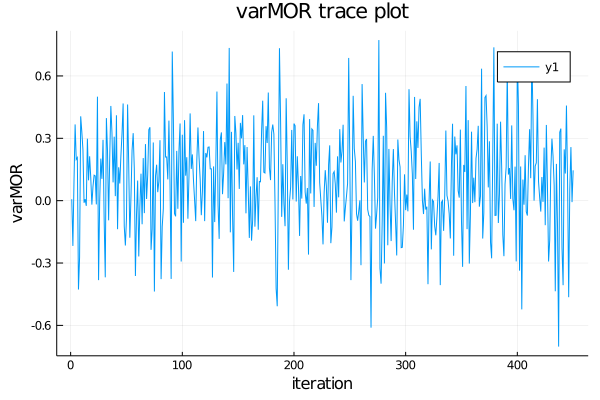

In [26]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "varMOR trace plot",
        xlabel = "iteration", ylabel = "varMOR")

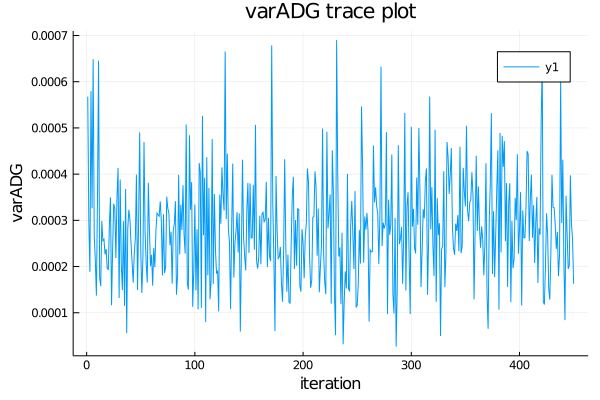

In [27]:
using Plots
x = out[!,1]; y = out[!,3]; # These are the plotting data
plot(x,y, title = "varADG trace plot",
        xlabel = "iteration", ylabel = "varADG")

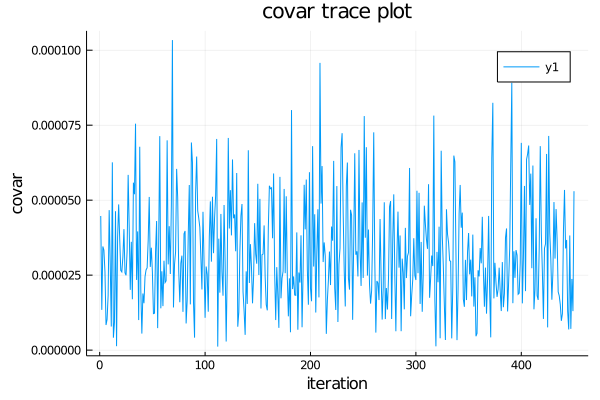

In [28]:
using Plots
x = out[!,1]; y = out[!,4]; # These are the plotting data
plot(x,y, title = "covar trace plot",
        xlabel = "iteration", ylabel = "covar")

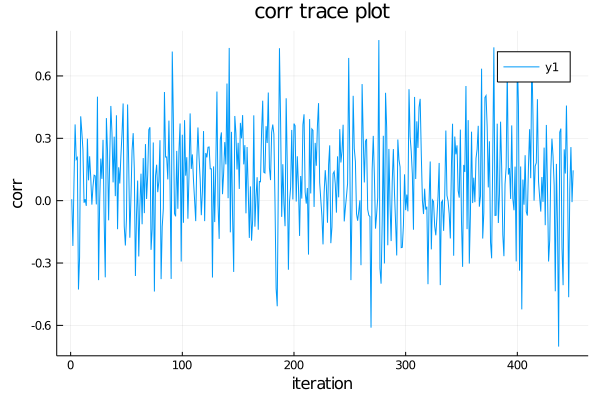

In [29]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "corr trace plot",
        xlabel = "iteration", ylabel = "corr")

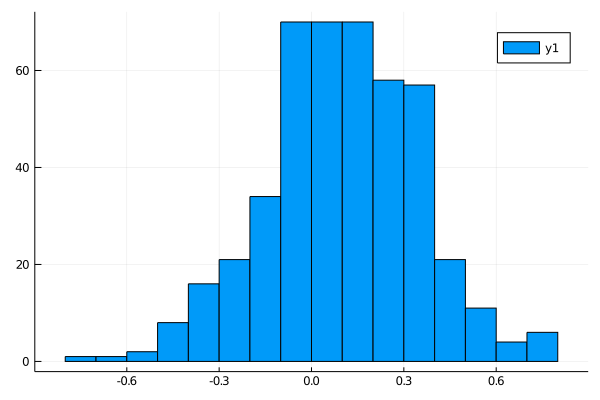

In [30]:
h = histogram(out[!,2])
display(h)

## Whole genome genetic correlation

In [3]:
gVar= CSV.read("MCMC_samples_genetic_variance.txt")

,Nur2ADG_Nur2ADG,Nur2ADG_Nur1ADG,Nur1ADG_Nur2ADG,Nur1ADG_Nur1ADG
,Float64,Float64,Float64,Float64
1,0.00283161,0.000137464,0.000137464,0.00214882
2,0.00253204,0.000259633,0.000259633,0.00175886
3,0.00233411,0.00015873,0.00015873,0.00185501
4,0.00296879,0.000336654,0.000336654,0.00190068
5,0.00298984,-9.09543e-5,-9.09543e-5,0.0017498
6,0.00266655,0.000240107,0.000240107,0.00148761
7,0.00283352,7.38033e-6,7.38033e-6,0.00187955
8,0.00319607,-1.67972e-5,-1.67972e-5,0.00175042
9,0.00233467,0.000112013,0.000112013,0.0017095


In [4]:
sqVar1=[sqrt(i) for i in gVar[!,:Nur2ADG_Nur2ADG]] 
sqVar2=[sqrt(i) for i in gVar[!,:Nur1ADG_Nur1ADG]] 
Product= sqVar1 .* sqVar2
rg= gVar[!,:Nur1ADG_Nur2ADG] ./ Product  # Genetic correlations
insertcols!(gVar, 2, :corr => rg)

,Nur2ADG_Nur2ADG,corr,Nur2ADG_Nur1ADG,Nur1ADG_Nur2ADG,Nur1ADG_Nur1ADG
,Float64,Float64,Float64,Float64,Float64
1,0.00283161,0.055728,0.000137464,0.000137464,0.00214882
2,0.00253204,0.123029,0.000259633,0.000259633,0.00175886
3,0.00233411,0.0762825,0.00015873,0.00015873,0.00185501
4,0.00296879,0.141723,0.000336654,0.000336654,0.00190068
5,0.00298984,-0.0397653,-9.09543e-5,-9.09543e-5,0.0017498
6,0.00266655,0.120555,0.000240107,0.000240107,0.00148761
7,0.00283352,0.00319806,7.38033e-6,7.38033e-6,0.00187955
8,0.00319607,-0.00710162,-1.67972e-5,-1.67972e-5,0.00175042
9,0.00233467,0.056069,0.000112013,0.000112013,0.0017095


In [5]:
#using Pkg
#Pkg.add("StatsBase")
#using(StatsBase)
mean(gVar[!,2])

0.07210300140340986

In [6]:
using Statistics
std(gVar[!,:corr])

0.05925089619553839

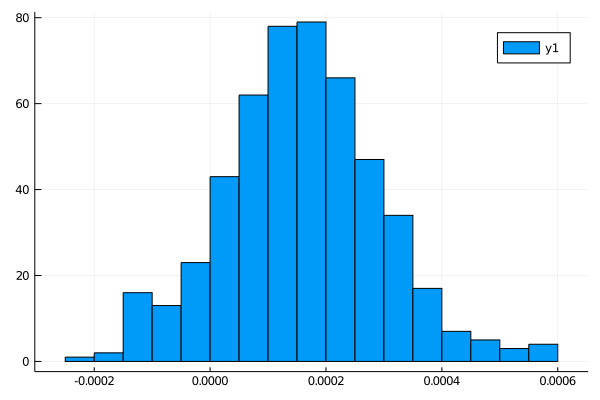

In [36]:
h = histogram(gVar[!,2])
display(h)

## BV correlation for SSC4 region from MCMC BayesB samples

In [10]:
SNP_Effect_ADG= readdlm("MCMC_samples_marker_effects_Nur1ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 123284:123931]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 123284:123931]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_samples_marker_effects_Nur2ADG.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 123284:123931]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,-0.887987,6.88381e-7,1.3862e-6,-8.67431e-7
2,2,NaN,0.0,0.0,0.0
3,3,NaN,0.0,0.0,0.0
4,4,-0.996019,2.07698e-5,3.35139e-5,-2.62783e-5
5,5,0.379498,7.91925e-8,4.31058e-5,7.01163e-7
6,6,-0.256499,2.62011e-8,1.97802e-8,-5.83931e-9
7,7,NaN,4.1263e-7,0.0,0.0
8,8,-0.440612,4.62811e-5,2.02066e-5,-1.34743e-5
9,9,0.980736,6.04225e-9,1.10373e-7,2.53269e-8


In [11]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

-0.4843299880407012

In [12]:
using Statistics
std(out[!,:corr])

0.5517405580590604

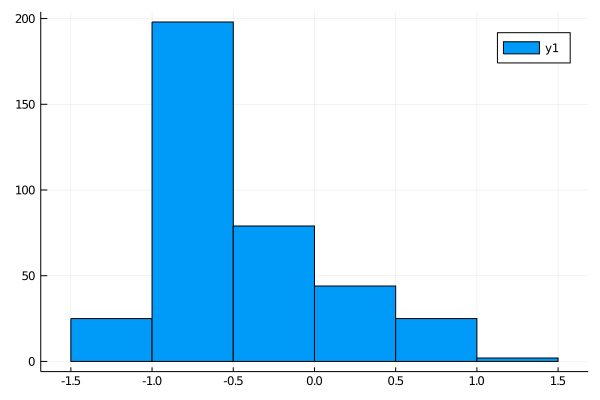

In [14]:
using Plots
h = histogram(out[!,:corr])
display(h)

## BV correlation for SSC7 region from MCMC BayesB samples

In [15]:
SNP_Effect_ADG= readdlm("MCMC_samples_marker_effects_Nur1ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 184255:184957]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 184255:184957]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_samples_marker_effects_Nur2ADG.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 184255:184957]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,-0.0697351,3.0981e-5,9.9347e-6,-1.22342e-6
2,2,0.926566,1.91102e-5,6.44466e-6,1.02828e-5
3,3,0.82325,5.99345e-6,2.30188e-5,9.66966e-6
4,4,NaN,1.05637e-5,0.0,0.0
5,5,0.9898,3.89639e-5,1.94999e-5,2.72832e-5
6,6,0.598969,1.61458e-5,1.00482e-6,2.41256e-6
7,7,-0.997588,1.14161e-6,1.11303e-5,-3.55603e-6
8,8,0.988251,1.72112e-5,5.41303e-6,9.53877e-6
9,9,0.729308,9.06241e-5,6.52218e-6,1.77308e-5


In [16]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

0.5930236703146399

In [17]:
using Statistics
std(out[!,:corr])

0.44773884716861917

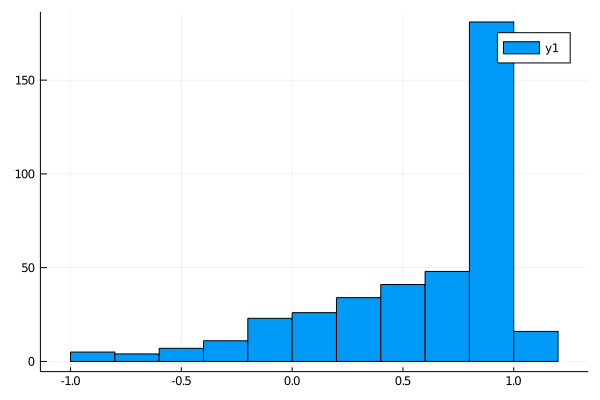

In [18]:
using Plots
h = histogram(out[!,:corr])
display(h)

## BV correlation for SSC10 region from MCMC BayesB samples

In [19]:
SNP_Effect_ADG= readdlm("MCMC_samples_marker_effects_Nur1ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 266785:267480]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 266785:267480]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_samples_marker_effects_Nur2ADG.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 266785:267480]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,0.999225,2.24168e-5,2.96834e-5,2.57755e-5
2,2,0.189609,0.000102502,1.70867e-5,7.93513e-6
3,3,-0.0761409,1.92935e-5,3.39971e-6,-6.16659e-7
4,4,0.989164,6.85732e-6,3.32607e-5,1.49387e-5
5,5,0.324471,1.41379e-5,1.06292e-5,3.97757e-6
6,6,-0.0377552,8.61302e-6,1.42805e-6,-1.32412e-7
7,7,0.998712,1.40138e-5,6.78882e-5,3.08045e-5
8,8,0.882119,7.14227e-6,4.84831e-5,1.6415e-5
9,9,NaN,0.0,3.78507e-6,0.0


In [20]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

0.5775862813479329

In [21]:
using Statistics
std(out[!,:corr])

0.5060028780504672

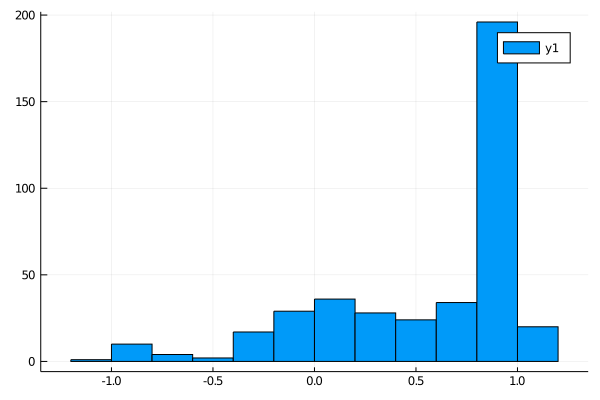

In [22]:
using Plots
h = histogram(out[!,:corr])
display(h)

## BV correlation for SSC13 region from MCMC BayesB samples

In [23]:
SNP_Effect_ADG= readdlm("MCMC_samples_marker_effects_Nur1ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 327057:327490]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 327057:327490]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_samples_marker_effects_Nur2ADG.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 327057:327490]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,0.593452,8.20383e-8,9.70223e-5,1.67429e-6
2,2,0.628989,1.74561e-6,0.000103246,8.44407e-6
3,3,0.813311,2.45104e-6,4.87706e-5,8.89223e-6
4,4,NaN,0.0,7.70286e-5,0.0
5,5,-0.886314,3.91433e-7,6.70737e-5,-4.54143e-6
6,6,0.995137,4.65477e-6,7.80971e-5,1.89736e-5
7,7,-0.364882,4.86509e-6,6.43418e-5,-6.45572e-6
8,8,-0.729182,4.56162e-6,2.22429e-5,-7.34498e-6
9,9,0.537545,1.7184e-7,6.83095e-5,1.84169e-6


In [24]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

0.5465892272693778

In [25]:
using Statistics
std(out[!,:corr])

0.5826948937089189

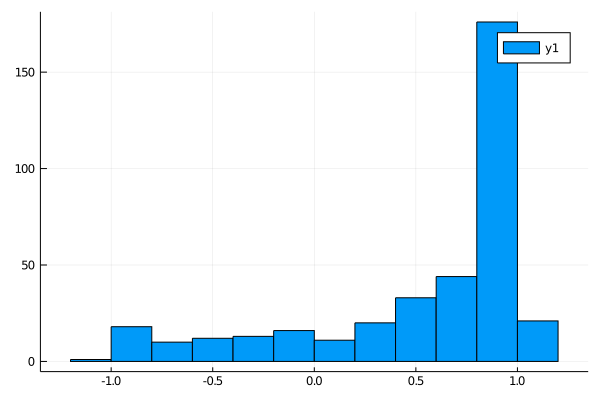

In [26]:
using Plots
h = histogram(out[!,:corr])
display(h)